# Image Scrapping

In [ ]:
import selenium
from selenium import webdriver
import time
import requests
import os
from PIL import Image
import io
import hashlib
from os import listdir
import os.path
import re
import glob
import numpy as np
import shutil
import albumentations as A
import cv2

In [ ]:
DRIVER_PATH = 'D:/PCD/ImageScrapping/chromedriver/chromedriver.exe'


In [ ]:
def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)

    # build the google query
    search_url = "https://www.google.com/search?safe=off&site=&tbm=isch&source=hp&q={q}&oq={q}&gs_l=img"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)

        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")

        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

def persist_image(folder_path:str,file_name:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        folder_path = os.path.join(folder_path,file_name)
        if os.path.exists(folder_path):
            file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        else:
            os.mkdir(folder_path)
            file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=3000)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")

if __name__ == '__main__':
    wd = webdriver.Chrome(executable_path=DRIVER_PATH)
    queries = ["pisau"]  #change your set of querries here
    for query in queries:
        wd.get('https://google.com')
        search_box = wd.find_element_by_css_selector('input.gLFyf')
        search_box.send_keys(query)
        links = fetch_image_urls(query,110,wd)
        images_path = 'D:/PCD/UAS/klasifikasiImage' #sebelumnya D:/PCD/UAS/kumpulanPhoto
        for i in links :
            persist_image(images_path,query,i)
    wd.quit()

C:\Users\User\Anaconda3\envs\vir_env_deepface\lib\site-packages\ipykernel_launcher.py:79: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
C:\Users\User\Anaconda3\envs\vir_env_deepface\lib\site-packages\ipykernel_launcher.py:83: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
C:\Users\User\Anaconda3\envs\vir_env_deepface\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead


Found: 100 search results. Extracting links from 0:100


C:\Users\User\Anaconda3\envs\vir_env_deepface\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead


Found: 111 image links, done!
SUCCESS - saved https://img.my-best.id/press_eye_catches/5e706a1a04783496c5e143808d2a293f.jpg?ixlib=rails-4.2.0&q=70&lossless=0&w=1400&h=787&fit=crop - as D:/PCD/UAS/klasifikasiImage\pisau\341a6084ce.jpg
SUCCESS - saved https://asset.kompas.com/crops/4QA_asqq9_fMRo-kk1L6_Cocvb8=/20x0:1280x840/750x500/data/photo/2020/08/23/5f4187681ef41.jpg - as D:/PCD/UAS/klasifikasiImage\pisau\dd81a648cd.jpg
SUCCESS - saved https://www.jakartanotebook.com/images/products/103/1271/49314/15/xituo-pisau-dapur-chef-knife-carbon-stainless-steel-5-inch-dl040-silver-1.jpg - as D:/PCD/UAS/klasifikasiImage\pisau\22b616387c.jpg
SUCCESS - saved https://media.japanesestation.com/images/750x422/2021/02/05/84677-pisau-dapur-jepang.jpg - as D:/PCD/UAS/klasifikasiImage\pisau\94a948f33f.jpg
SUCCESS - saved https://blogpictures.99.co/pisau-dapur-header.jpg - as D:/PCD/UAS/klasifikasiImage\pisau\9aa48bdc7c.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRJ9DFaO-dK8

SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSwIoMMkxlugM9OBVcjGA59ybBnBOtAbA48xg&usqp=CAU - as D:/PCD/UAS/klasifikasiImage\pisau\f020d4d01c.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSactxbNr-37SDTlvtodHsqgioBRCbPU38h9w&usqp=CAU - as D:/PCD/UAS/klasifikasiImage\pisau\6d27c87fd3.jpg
SUCCESS - saved https://s1.bukalapak.com/attachment/638691/pisau_dapur_terbaik.jpg - as D:/PCD/UAS/klasifikasiImage\pisau\91e1ca82ee.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSu4KHW3eKbcpGQ3bKXWBsVttvIg5QMR5NzYA&usqp=CAU - as D:/PCD/UAS/klasifikasiImage\pisau\b1402c4571.jpg
SUCCESS - saved https://oxone-world.com/wp-content/uploads/2021/06/Set-Pisau-Oxone-lengkap-.png - as D:/PCD/UAS/klasifikasiImage\pisau\e7535b4506.jpg
SUCCESS - saved https://www.dapurnesia.com/wp-content/uploads/2020/07/pisau-oxone-ox-605.jpg - as D:/PCD/UAS/klasifikasiImage\pisau\f6b2caef0c.jpg
SUCCESS - saved https://cf.shopee.co.id/file/9724f71a676

SUCCESS - saved https://cdn-image.hipwee.com/wp-content/uploads/2020/05/hipwee-pisau-dapur.jpg - as D:/PCD/UAS/klasifikasiImage\pisau\734aac8276.jpg
SUCCESS - saved https://cdn-radar.jawapos.com/uploads/radarbanyuwangi/news/2021/07/25/pisau-rambo-bukan-sekadar-koleksi-cocok-untuk-pencinta-alam_m_277725.jpg - as D:/PCD/UAS/klasifikasiImage\pisau\cb202967b6.jpg
SUCCESS - saved https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQt1wY_rML8ovYxGSxSDpA7V-MOF5Y3wT9swg&usqp=CAU - as D:/PCD/UAS/klasifikasiImage\pisau\de85fbb149.jpg
SUCCESS - saved https://d2xjmi1k71iy2m.cloudfront.net/dairyfarm/id/images/104/0710424_PE727544_S5.jpg - as D:/PCD/UAS/klasifikasiImage\pisau\80512e6df4.jpg
SUCCESS - saved https://static.republika.co.id/uploads/images/inpicture_slide/beragam-pisau-dapur-_140507140537-144.jpg - as D:/PCD/UAS/klasifikasiImage\pisau\cd85661bb4.jpg
SUCCESS - saved https://awsimages.detik.net.id/community/media/visual/2019/11/27/a7ab7616-80e2-453b-88f7-5a9eee1f247c.jpeg?w=700&q=90 - as

In [ ]:
def rename(path):
    i=1
    for gambar in os.listdir(path):
        #print(gambar)
        path_join = os.path.join(path,gambar)
        print(path_join)
        pathjoin =os.chdir(path_join)
        for file in os.listdir(pathjoin):
            gambar=gambar.lower()
            gambar=gambar.replace(" ","")
            new_filename = gambar + "{}".format(i)+".jpg"
            os.rename(file, new_filename)
            i= i+1
            print(new_filename)

            file_format = os.path.splitext(path_join)[1]
            if file_format not in ('.jpg') :
                new_filename = gambar + "{}".format(i)+".jpg"
                os.rename(file, new_filename)
                i= i+1
                print(new_filename)
        print('Nama file sudah terganti')

In [ ]:
def check(path):
    folder = os.listdir(path)
    newpath = 'D:/PCD/UAS/unclassifiedFile'
    if not os.path.exists(newpath):
        os.makedirs(newpath)
    for i in folder:
        folder_path = path + '/' + i
        getFileTokoh = glob.glob(str(folder_path)+'/*')
        for j, filename in enumerate(getFileTokoh):
            print(filename)
            try:
                tempimage = Image.open(filename)
                tempimage.verify() # verify that it is, in fact an image
                image = Image.open(filename)
                image = np.array(image)
                img = Image.fromarray(image)
                img.mode
                filename = filename.replace("'","").replace('"','')
                img.save(filename)
                print('This is save file : {}'.format(filename))
            except (IOError, SyntaxError, img.mode != 'RGB'):
                print('Bad file:', filename) # print out the names of corrupt files
                shutil.move(filename, newpath + '/' + os.path.basename(filename))

In [ ]:
def oversampling(path):
    folder = os.listdir(path)
    for i in folder:
        folder_path = path + '/' + i
        getFileTokoh = glob.glob(str(folder_path)+'/*')
        for j, filename in enumerate(getFileTokoh):
            image = cv2.imread(filename)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            transform1 = A.HorizontalFlip(p=1)
            transformed1= transform1(image=image)["image"]
            result1 = cv2.imwrite(folder_path + "/" + "horizontal_" + os.path.basename(filename), transformed1)

        for j, filename in enumerate(getFileTokoh):
            image = cv2.imread(filename)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            transform2 = A.VerticalFlip(p=1)
            transformed2= transform2(image=image)["image"]
            result2 = cv2.imwrite(folder_path + "/" + "vertical_" + os.path.basename(filename), transformed2)


In [ ]:
if __name__ == '__main__':
    path = 'D:/PCD/UAS/klasifikasiImage' #sebelumnya D:/PCD/UAS/kumpulanPhoto
    rename(path)
    check(path)
    oversampling(path)

D:/PCD/UAS/klasifikasiImage\pedang atau pisau
pedangataupisau1.jpg
pedangataupisau2.jpg
pedangataupisau3.jpg
pedangataupisau4.jpg
pedangataupisau5.jpg
pedangataupisau6.jpg
pedangataupisau7.jpg
pedangataupisau8.jpg
pedangataupisau9.jpg
pedangataupisau10.jpg
pedangataupisau11.jpg
pedangataupisau12.jpg
pedangataupisau13.jpg
pedangataupisau14.jpg
pedangataupisau15.jpg
pedangataupisau16.jpg
pedangataupisau17.jpg
pedangataupisau18.jpg
pedangataupisau19.jpg
pedangataupisau20.jpg
pedangataupisau21.jpg
pedangataupisau22.jpg
pedangataupisau23.jpg
pedangataupisau24.jpg
pedangataupisau25.jpg
pedangataupisau26.jpg
pedangataupisau27.jpg
pedangataupisau28.jpg
pedangataupisau29.jpg
pedangataupisau30.jpg
pedangataupisau31.jpg
pedangataupisau32.jpg
pedangataupisau33.jpg
pedangataupisau34.jpg
pedangataupisau35.jpg
pedangataupisau36.jpg
pedangataupisau37.jpg
pedangataupisau38.jpg
pedangataupisau39.jpg
pedangataupisau40.jpg
pedangataupisau41.jpg
pedangataupisau42.jpg
pedangataupisau43.jpg
pedangataupisau44

senjatapistol403.jpg
senjatapistol404.jpg
senjatapistol405.jpg
senjatapistol406.jpg
senjatapistol407.jpg
senjatapistol408.jpg
senjatapistol409.jpg
senjatapistol410.jpg
senjatapistol411.jpg
senjatapistol412.jpg
senjatapistol413.jpg
senjatapistol414.jpg
senjatapistol415.jpg
senjatapistol416.jpg
senjatapistol417.jpg
senjatapistol418.jpg
senjatapistol419.jpg
senjatapistol420.jpg
senjatapistol421.jpg
senjatapistol422.jpg
senjatapistol423.jpg
Nama file sudah terganti
D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau1.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau1.jpg
D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau10.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau10.jpg
D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau100.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau100.jpg
D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau101.j

This is save file : D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau145.jpg
D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau146.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau146.jpg
D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau147.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau147.jpg
D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau148.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau148.jpg
D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau149.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau149.jpg
D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau15.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau15.jpg
D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau150.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/pedang

This is save file : D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau196.jpg
D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau197.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau197.jpg
D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau198.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau198.jpg
D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau199.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau199.jpg
D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau2.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau2.jpg
D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau20.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau20.jpg
D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau200.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/pedang ata

This is save file : D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau49.jpg
D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau5.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau5.jpg
D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau50.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau50.jpg
D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau51.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau51.jpg
D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau52.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau52.jpg
D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau53.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau53.jpg
D:/PCD/UAS/klasifikasiImage/pedang atau pisau\pedangataupisau54.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/pedang atau pisau\

This is save file : D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol221.jpg
D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol222.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol222.jpg
D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol223.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol223.jpg
D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol224.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol224.jpg
D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol225.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol225.jpg
D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol226.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol226.jpg
D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol227.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol227.jpg
D:/PCD/UAS/klasifikasiImage/

This is save file : D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol278.jpg
D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol279.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol279.jpg
D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol280.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol280.jpg
D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol281.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol281.jpg
D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol282.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol282.jpg
D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol283.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol283.jpg
D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol284.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol284.jpg
D:/PCD/UAS/klasifikasiImage/

This is save file : D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol336.jpg
D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol337.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol337.jpg
D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol338.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol338.jpg
D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol339.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol339.jpg
D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol340.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol340.jpg
D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol341.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol341.jpg
D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol342.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol342.jpg
D:/PCD/UAS/klasifikasiImage/

This is save file : D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol398.jpg
D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol399.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol399.jpg
D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol400.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol400.jpg
D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol401.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol401.jpg
D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol402.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol402.jpg
D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol403.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol403.jpg
D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol404.jpg
This is save file : D:/PCD/UAS/klasifikasiImage/senjata pistol\senjatapistol404.jpg
D:/PCD/UAS/klasifikasiImage/

# Pengenalan dan Analisis Wajah

dijalankan di local

In [ ]:
os.chdir("D:/PCD/UAS")

In [ ]:
from deepface import DeepFace
from retinaface import RetinaFace
import base64
from PIL import Image
import cv2
from io import BytesIO
import numpy as np
import base64
import faceRecognition as fr

In [ ]:
model = DeepFace.build_model('Facenet512')

In [ ]:
base64_string = '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wgARCAFoAoADASIAAhEBAxEB/8QAGwAAAQUBAQAAAAAAAAAAAAAAAQADBAUGAgf/xAAYAQEBAQEBAAAAAAAAAAAAAAAAAQIDBP/aAAwDAQACEAMQAAABk9rroXSIukhFJEklSKEihJESKEKTN41ra6ku+e35UGm5dLmRleO3LfyMTb7xfpHpnkkARQEVQRRyukAdJOV0AIoC6S8ooCKOSlCSQkkBFKEVAKQgVKEUcooQKlCSFz0Dnnts54dbOuh1rJ6BEUhJIRSEUhGNRZ1pzx3rPORFHy2pq6xrufSmXYVsPQ8ulCxf09VNlW2fTla3+C1ffnYnNaFe1Cj3Noq6KXnPeSrVcs5o1/HFUlu5Q31JFDLNbTZu25641IE/CazNmRzSmmq5OWW1s4NVm65JbzUy87Zc93cOZW6yzcZHV53CfgyDhkQMb04XHXlSzqW149XWumNZtc/oc0aEI9MHsdayikJJCKQikIoldnbuj4ddZ1Gb688YeOuPSSZAqEX1KXWOM7mTZVrZU1OpiS5GfDi9fPob3PW2esuJMhdOb8KfXlvm7CRZbY7ZY+tPWWVfZH0Gf0IEVZmqaxgc9blMv9M4K9pJnPWlodBntS3qbiml1OP2GQNYk3qZCwh9ceuvrbKt6c87ps1cc+nT7DussVVrUY3rG2+enPO3FRacusiLKhbze5fU5RNKR1vPRHWspJCKQkiIgiKJn4pm8enccMWUPTSzZcyofqzEM527cM6bUBc4zqPFmR86oc3rsn04XVhV2a3VfOgbzNqrbNDusz2lsGQ2GRs0cGbEqFo83pQIizGPxbjFlWVHfamLHcnGr7O3FNZe0d9n11rbq1BBn1MVcWygY3rIEljeKjiTB59LXtru54r7GNNSzDcsiSuFLPrbKqs0uS12QNO427rJKWoikIgiSIiCIoGQ0WZ2PPWWZ5g51CS5jtzjiVyWxo9ZvJ2Qs5u7TELO58fOsXNvkLyl1zf0+R3msx47fdtlmdRSWM6/G6cl5LXZKy+jyGarNNmNQJtyLZk9FSabNz+ox17FDaUUPOrSDDfzZ6qlrOvqY3dbCotKPUlwLaJLL7g2BU8qwlrpdHcx2261UJxhS2cSxq0tqa7oTWY7Y42tQ/GlWEg6iSQUkIpBIImnYcZfa4CbjXFLY12NDko5m2Oqm8fC9FZszF/Kezrmouq2azsfTwunGBW6OosqvSvOPSt4yE6O/NXFHfUGszmb3Hm2ympzFlzx2Cn1OW1QK6ypynu8/W5sl6v55bbjl+5kdS4vPrABXTm72w/rO0o4q0mM3XK115mNSlDos3ql8/0FVZZsqPJh2MQbiql0lJfZ6y/zumyK7fHajIpqZkSXRIOoUCIgiSIiCKqtaaK/T019LlcvuMtmw7N2Rjd1ZVVjx9MwEbworJlkVlrWpN7HWpDzGlylxE9Ew277cKWNew6l57T1dXOT1kJIsSbYmc6fUN6Nt2hn7/LlFC4d5aXMu9zums70c+uViTa7WI7jfXTl30TY702LPQxEsN3B66T3GT1Q6M4tECrhaELW1emURaLTo5zelRiLDTKXlEaySlSKQikIpBSQUkEpCgWEeXAWTsHh00MpiXz9HRTFk2udNQo1tF1JvUTiTjOW3Vw5pM5o+3J1FbwEQJJCSQkUJFEXC7HEZV93B1/Hr3NUnj6D306UWd3VTvOEj6vPb4tvMyt8+EetZlbbzPeW2IKt5RAAUAFABQElARAEkoSQUlYUkFJBSQUkEghIIosqFm1zMjjh3FnSWOOllFdfsrZbTGtGrkxdH7NMznCadzdxqL2ht94m9U/fXnKfpm00LT1Its7VWyBGOrPda2krFa/GY1I1eV13D0WT7a59XlW1OsTo/EjeYdfOcMm87G6cHuC3rHNrWxpfTM1dY7Telty3lEARAEkBEShEARAEQhIVFJBIIiCIgiIISEKFOiZ03FsIfDrXtTesdX5+Xsi6b7e3itasYSt1DdXrnpchuMVcaS+zmm3IIdPTnY09vFJ9Df0gLuluxRZbawYz3CU+cnQOWndNk73HWdPoJed23Eh+aytbq3NZrL9x/Os7kPQMpvNQ9DmdPM00UXjFZpquplTb6vKIEEgIgAIECoAKUAhCQqKSCQRFIKBCkgkEUGczm2lRoYfLWXsIUnj6lS6XmzN2zVBrOho4T9zS6XNy+nn9G8z9R80q81nm9/V9Lo9H0lTbx4tlnVWkAYt6+edpNRXHmCZVhxjjtS42vmqi/l9Y7dy+X+W2OFH3LDqGtxikta4yvFpSb80lmRF1kbfE65e9BmNRoAVQBAgQIEQgUcohQCApGxJERSCkRJERDBJVJdS9B+h5buIdW7y6l3lyal98MDjJVjNVZ53WaEdcdPPu85DYOpcN6a6s696vQ2MF6B1xIZfa1nl9t0djyGpW8vqM7Lmo3fPLR1eWlzW7bYcx6O+887laPB3UjhiWrUSdDSkzWizm/PJ45OscW9NLW72GS1OzgIoAgQIECBAiECFQICQUSRpFIRh5bLS11I7jbkbnnLq6pO5fT6B+X5+9aXeNVd89DtfMFZrQ1VHvGqz9XHuOWu3d4jPrlA/xMGB1HOvSPNfUdyUe10xyHEDntDGW1+PlyyK5a6b7asutH59qsdp0WUzns/261dGdyc4ahP09zBptRmt8WXOFcDrto211QXnRJBVcjoAHQAOhASSgECBAxJzmjQpEVdJ88jt+LI52b009no1HsWiA9yrmw3XnGixu+LsXHV0tOUG3ANcvIjQ7XmzzvVUtxrESl2tXWNdeh74zO49lNVN/SM2etyfMt/1xOQ6sSSUYfaYPFpOuomUyO+1Y12zzm7M43RZ72llzKz07jdU7PMfq3uY2V1+cuaZxt7fJpPOjmpxtpW2NO/tYqM+EFShJABAAUAEGL2/nnoeYUqbSgpVzzSpLEqa7eb7zp7ppya5YkKocjks7KVjNvz6RSQ2UicrpDaIRnLa7msxW32X68S24N8o/MlqVhP8AUrGhrwvqHVXZ9ufaBiDitRQZ1S19hAykN8coOe1KyiC4n0l5nqxYyp2dp8ODGf0NbZi3nI2uSeiq5kBpwUmMamyoB1NRbYCxrZqusFQIUJIAKPOvR/NvQMznCJvNbaeaibJiypp7ouTTffKjtdcqCUc2lb0biLDn8+nJ5NOpGm+HeYaDtSZqDx16PKUOrAuuRtdcSpzh2W93Hl3onTM0gamdgd8Y3m2+JGYzGkxod7beGG5HJNv8zp8drF4SMdEeiR2JrGs0ed3FUmR5mR98uB13Z2uUnbkUrKXPVjujyx1PQ+s9oLUOgoBB5zNro+I+613m8td8EyTFlTUp5l3OxyUHtpwRADyeR3ZYiyzdAnY83I6b7sASlWC1OG6cij105c9rsC7cmmepZ59OGxXazL0GMe6c/XBGc64ydTFPHbJ5ajhvrgcksOnPTzNO6ai1PPtOfQ59S130RWbU2VHF1zVDzfpKWHY4XfNtEb5FEQCkPrl3RvXZF+zfmFNtAKXy5t5rnJBCmm1ymXjHFTJVWl0PVHaY290BNODkh46bsR45TSjNQV2vOJ5udbCz/Vkxs9azx12IRKUvsuZ24w3ATlhPbxw91xZubTOQd5q+Gxy6SIcuGAduw3I66ldZkQqtdVT3XPvMMTuJHXPSuJtDg45s6oq7Nb5d8Ib5kIiSMBEAdZVSGzzVrs/NtPZpgC15pGmRMR7lcQO+O65574Ch2DvhFpKgHO7Awnx5sci4HA40HLI/KVzzIThz2grg5AjxxY8Y9rnVND64ueku7JHbL9dtsM5p6bfA2uA9tEl9R3VDPD5rL1mdx9PJ75ghCkhWVOxcON04BFawAgE89Qkua6AAQgP8Lql0wU3s/C92wocuLgeOuDoJAlSZ+NRn3Tx61lbscr152FxUbDO8zX6nMajvHHXTHPPXCDvjo44fI61xwjgBopcAYXUOazO6Tn0w3TlprFGrur1GpfBsbZd5EipQ2/wNpzml3x0Nuomn3Hkdhy6+nw4lpx7QW6fK9ud5nkt8gULktkABVAhB5IEkhBJBZVrtDpzo6ad4BGkRs0cghmtWuNEsPcuj9wLazO1dxRzc3cV11noi4wQM5oY9uHb9Fb7+bz9b3m5w/G7YTDdbNkyy0zS55jSW8uAl+ojn0xMnSY+WtMeXcSOBPjNHRUfflEBFhSKhAiBUApUu5lqUI1UmXGWGql152vUZtnkjvsbuXj0r1hV4/WemeaHIIhBKggRJJECAJJZXXHdhBFN9cTuemXnhy6FnqLKlBHXlY6DH6DOn5DjnP0Fhd71Yvt0mNXcrObHpykWB435imxK8eEnXCErcafS56OMutY9Et2gjXF/V56RbErdJXMVk2qsZzurGAt5yte8z0wilQI6hdLpeSUabcYTeaFAWDtpVJdjupKPPeCSS0vk/svjZwCIAQoHnpCkhAhQEEl9tuUUlTEhLnp/tLl2jV6XXkClrCtUsbtbdLl6m+krZPaVStEl08vRSYXKQkkEJBjJS5rLJT0vaZLl1qHkt834KUYiSl28krpKqwpIUlLy6kdJKVJKrr0dKlwlqNlKnXEklOJZJJS8eIpD05Lh6H8+lrLfSXXiUkLlIHKRJeSsKSr//xAAuEAABBAECBQQCAwEBAQEBAAABAAIDBBEFEhATITEzICIyNCMwFCRBQBVCUGD/2gAIAQEAAQUC/wCMkNEl+FiN6R6jlJXJCc57U2+3EczJP/4ixqDWKSaSYtblRQAiZ3KD55ysyrJUcu5QXS13/wCjuH/GSALd8vXVyZH03gGK05qyydr6nXlF6kj2I9HSBrmUbJ4ZHHIKzhZB4FwCBBXMaF3Tntamva70PkbGG2I3OR6D+bEmu3NkeI2xWWzOUtxrCL6inbLxkt7HwS80KeQxtZZc56nldGYXF7LEjmOjmcXo9nSu3VnFwsnArOyXds+4dv2zu2xCxJlvVqvWHOfjJaA0OPDKgJ3bw8GRW3Bq2HEJaGyZY6ObnVd5UZ3R2/FTKu+KicvVmQvnrs2Q2fsQ+LUfhp3o1I+2ucTp/wAHfKk/dBa+vp/lsv2QwxmaQ0BtiJisf4pTmWieFzxtOHMOWXFV8Vz5MPvHZ/wJ61O1v41Pkex+bfj+24fwqA5hmdtikPVowmDcnLCACC39eY4ubVRh6Twli5iqS8tyquzHb8NJXvDQ+dh/LhrM5k6tfYg8Oo+PTvRqJ97Dh7erXfF/z01ys/X0/wA176+n+ZSfbb8XfFx99J35Vc8Squ3RXlT8V1Z6xnMc5xFlUirnjp/M9neVvw/bfPtVM5h1B22s0L5OHxLRnaSdqPRAKrW2DaiFI3LZ4+W7dgtORTd7rfgo97vgoeS/J1ox4Yrf2a/g1Hxad343zmw9mw1zugd8XDMlJ22xY8Gn+e79bT/Oph/ab8ZjiKFu98B22Fd8AbllFyv/ABpeK+se2qcw2ziHHsoq74qXkPaTys8f7b597m/1qB6aofxPTFvyV0RHTbhVavXbwKKtsywqn71Ads9rwUfld8FI4kcedYY3axXfs1vBqHh075cbPut3m4VA5rnswf25ByrcnWtp/wBi79ah51y28LZxXojMh9thvVt3wVm74qjtk9/4UfFf7YzVou9l8/jA/qUO93w0fKpfNH4/23TmeRv9Cgfy6ofySHrnDWHruTXozZNWDemNxwKIWFYbkPWmn88o5dic5q0fnc+u15YqLAZeF37NX6+oeDTfnwPb5XNRb+LTXe09mfd1FmJInb6VD7Fz61D7HG+cQacFbG2xAd0N36+nqT8Vq6cwaf49Q+EA3VKDvfqBRGKFD53fBR8qn88Pi/bZO6w9v9OocWL7s2vk5x6tWVlVwN8E8G3cDxJRcApTkSqk7bZvN6h26hQ8lz68cfMNWTlz8L32Kn19Q+vp3k4P6MrjdavtzW00/lKH3tQLdjLJihY+SJ0moTOZRlb/ACLk743fzZlCS6LUj7NOH4tQGJaJzXufX075agzD5Xb6WnfDUfHR6w1jst3z+WYYo6f5Ln16PmVnpPB4f2Ht8rJH42HbPak3TDoAMknCyoY97t1ZzRAFFuas9JZtodZmK5diRGOSFT9DWP5rbd1eJ39eh5bn16PmsM5U9aTmQq/9ip9e/wDX07y8LBxBQGbNhu6Cmdtma4Anuw8vLi9vVoOCevdQ2HRmw5j5K319SPvoDFfUh7dNd7Lf19O+d5m6Dmfg0746j4tO+L/ZesnfZsj+pp/lufXo+dW/sVvB+yQ4jr+6ypfbYd7nlZ4Q13ykU3bjE4LkmBNaVj8fczWZA9stkxwT8xWm++Hykbos7DQ8tv69H7GoR9NPkw5ah9il9a99bTvNwunFalI2KR9yHb0y53tf0Q7ytOw+I8A7CLVRkbJX1A5sRXuVHYtmdmnO/La+vp3llbujI2u03tqPh03tfG2eL32Lf1tP81v69L7CufYq+D9lo7a7HOa7+TOnEkhHCALjXolyjhaxuxGFNhRwEPi35TV4nr+MA1lZsZuD3xDMrPjaZtnoea19el9iZm+NpMUzTubqHnpfWvfW0/zcNRP4YoeY1zwCHIuci4lQx7n2ejezOLThRSGvJYeJZ46MRZNSiEVN22zZ+vp3mVxuyxpi1DwaatSb7aYzYtfXoeewN0MD+XNz49th/MmrDbB+zUDitprA6TltWoM2yv7sjLlAz3xdmrCxwJTez+kjVgJ6u/ODzR/G+zrR89n69P7Cux7JqMm6LUWdatoRNtWhKzT2Hdw1Ep8pLNi7Lq5R1srlbBN1L+oQ4tKYPyN+LxljMssTda+ngidajESdOa5pvNLoNPY5jrsZkgowvbNYBdDUgkZN3Vii7d/GmVei7d2H7NQa97NPidGFfhdIJq72KngxbNk0Z6NKa4Jzwi8ldMN24lxujwWFPVw5lrRGSRnxsRc2OCq6KSVm+OGmYpFYr89sFQwvfGJGu07qzT0yMRtR6DUSNu7hHA55ip4TIBmSHKmYQnDohxCPtNSfnQrltWFtA4Yysf8AZajEsIc+CZkjpJo/iCg5O6oN9j6wzmSNbXvdD7WOcpZOjgZZ6Y2iP4/seeuoSb5gq1bemRhqaE1qLVYrb2mFSRFpQ4kdNPn5U/8A+FJ2sw5lZuFqDqwBbU+QMP8ALiQtRuTpYwt7CWv6uJKeMprAwVVH8f2SOwJRumazMkTcBoQCCwi1TQ5U0IcJI9pC7jC7g9FSm51f/wDBkTu7omlRFNK/wxB6b+NfglTqkZU8DGMpwkAgNZ/9PkaBX7MOGhwcicI2Ywmva/g6RrE14f6HWo2kTMkbOcMJ6wdZYk0cS8NUt9oW2eRPjnCkbzAh0R4SBaVNtnccNZekdL/3ycB2ztla5NX+SMys7U54WC4xja2Z6DU4++t43+Cl3tuKZT3MhzFOrnzpHpwmOIoK4kGzlT3DiEqDyVwsrKln2KVjpzHHFAn3Y2NF+OQuZlTR7XNKb1Ryj7mscY5HS76gOHRnMf8A3SKvGJHyN2TPZvTJC0xvTSsJ0aMQW3qThSTs5h91RUjmJ3hp/K35I/G8f2VZ6y1Oj+E/hqfCb7GpycInbZI7sbQb+5zZdw27k72pwdNO6q8Sw0urYwBar7mn2uDuruzXYLujq1j+ps/HVO6D/ukUIeFNgyM7yQbxl0RinymPyshFOdhWrQYKw5stocvTB1j074OH4qgw+yPfEcxugJlRG6eL2z8HjcyA7CPfLcdunQ6yN/jsBtQhNflQnI2gp1TDmRYTWojAercXX/R1Y7ue0bsHZ/QoOzF/3WE1uyG7A7LPi3qHxhylquaoru1Cywp1loE9zKe7c7RNnOtM3QB3TTSNzvHX+c0e8RvMZB3D/IxmYjE3GQe9+GRTHLwv/uNn5v4gfKIQ1tRntc3HFqenqcZUzNjmOT+AUXv03Tj1/wC6Vu4dHNneI4h1YwrutqnqsmT6MjT/ABZkKm0P+VOXkXH+4Wo+RaidhzdQw2pYjLwcqWLcI3FjnfGD5y+RvxTzhu0kTPzHJ3X/ANwxBybGE/41vG5HIW9B6L08p4Vpvszg9xw0126vUO2z/wBxIArW43yai/cndA1N7E9ERwtO2sJzw0q1zK2pP3XwVuyC3Ar6g6NV5WTRSD3u8cQwpR1j+Kl7M8djxS+X/T2qSbmhSfGGYNElhrUbIehH7dpHDanqyPxppR7qlY5Mkb/7X/U+eKNHUow5hEjdily55hJUTXuc4e4BBSu2prshOVjL1jhXsGvL1c5ALd0kjZtp2XVbDupPwDVsTOyeu0Vz2szkoqnNy3sfkHqHwytdGyQpiL8Izt3op6su6IHjARzrDRFOw5Z/zSXYWJ+oOT55X8dPs8iTuHDD8hZC6IAcLsZfBWtYcC0qVT42IhAZXZYKBKc3oxSd6/ugPZqKHAhY6XXf1EV/jh0qW8pkmVJKGn+UmmSRGDAawOPYOKeV5Zn9HruE04LoTajiaWs/5J7Mdds1yWwmBH0NK0+zzI5o8u5S5S5a2LB4T09xe6xCjamTpZJE0Fx7LdhBBNAw8sKzhA5NUYq+vVuj0F/mVnY+vKHtkibKyF+0c0ou3FjcAlPKsSYEUeyKYYkQ6LGeFGYmtA5z4/3QSc2H0W7bazHPdK9qHBzUcrPXOVDK5jmyCxBlZ4Y4ELC2NKNeJT1mcmAYsOhEgdVyJar412W8lM2lPhWMKlqL4VDOydnq1E75iejV/ru57RSmF8VgPa5gcWwuKjh2rGE4qaXCihJWPbcbiULblYWFSk2y1ZMIHI/bpknommbBFLK6aQIIILCLU5qYt2JKVrkyyx4PDPruVzDLXl5rQOl1+yIhEYLei5u1rnAnsYLDoX17DbMXoecMsHc/GUDhx6J/FkjozXtB6jeCN6dIp7AaIYS9wCc0hXgm91/u4JwyoLmJBdZgXIyhOwrOf10XbbXHUbPOmTUEEEOBGVsWxMWn2ea17Np/RJGJGyV5KsjNQU83PmRGUMsJWF3TCd1KYwTjtxsv2sk8Cd8s7oSct45IMV5zF/6IRtSymCrggLCcrrfxu6EdRldwj1DXOCa7K3FqZbkYYr7XJsgf+mI7ZeGo2eRDwahxHoIQJCY8tdHKLVf9V3lwReghYQamxtat6oTc6rxun2WR0f2AzwHA8WR9Y6cRUcbWIIDgVYZuikZwKB4Rnq9pYmuBWVhBQ2ixR2crOfWO47WLLK0csrp5Sv8AWofp/wBq2P480jfQPVcn51n04QeQjKSh20yflWONl261aGYnuTR+Jw9iHVY4YUHuEJ6BAIcCsdZq+XSs2n0ZJbynY7LcFuzwZIWKtZyAc+t8rYYJ53WZQnIJqCCwv9HqC0+fIc3aeA9N+fkVx+jaguyqzc+uj2aeZbuHDHdV2ifwbwKx0i9r4eqaEAsLCI4O9yswByczBwsJsT3F7HRHc5HdwaEenAOLTVtZWfVftc544PQTUE3geA9QODFILUHAem9Pz7PowsLloQBBoaDhdFpU22XhA5rDPOZ3uC/xxyU1Zy3qm99uFWbloCCytxKO5Fj1teuW9GpuX8JCkxWpWVWuJcfQCRxa4sNSfez0POOA4FBNTU3159FSx/HmlbwHovz8msPUBxe9OlW4qKV0b4pRLETgWH/na72uWeLVuXdoTG7n1fhwwgMLCwsLHG7bbWa5xe71NdwKgm5T4ZQ9vGT5IcCgty5hQlKbOg4H9GVlQXo21/51dDUawR1WsE7WGJ+sSlSTSTn0hDg9+E9+eAC2LSXZqTyNjZIedI1H4+hkWVyyAoztEDNjeIHquag2FOc57v0A8adjlua7I4Sd0EfW2QtTJA4ejPHKIy3CwscAOOPTuRcpH54NwsrqVpEgatQsGV+cIJ/DCDcrk9BuAz7d5DqcQc0ZYuY4s9+8dPSSALepF376FnLeEvZBH9AcQmSrOVn1ZT/QBgAerKiHNklk3yLHBnZRuLTKeqHQvOTlZQct6Mnuc/r3WnE8pbneqWZkLLd51g/sYehXRMeYn1JubGXBod8eB/TDtkAZK1B6BzxKzwOMcGDjlZ4lyz0qR7ouGcLemu4POEXZ4DGD6MhexwULDJJXgDGBi2+mzdjrqeeSw79rDhzhxqTOhdYtPmP+eqOB0g/jNDQ8EW6v8dy09u6zLHypp42mMOWfS1PTRuKys8couXyLuzhydNKaxzuIQPR/ox6cDCb0NTUsFjg9ieMFPkZG2xqRd/w+1wcNpaM8Dw/30QwDC7Ll71WDZ4JYnQy0fndgNmFtCVrXwywkH1f40bQTlZ9BRUfyrR82xf8AkyIySjo+aNsg/wB6cHd/1hV7ktY1NQitJ3a1qLI1JK+V3/C0ojdxPA/LjXi3knJacKNrpDHAFZj/AI8luRs7acD3na4IORcCpqlaRTaZhOa5h4tTjwHoJWC48iWJulxkzX/PG/am5yFNX5jeDu/6sceykvWJo+IjeUKdlyGl3CrFGeq39re3od34Rwl56BuUxuVWY0rsrr+aGwumfV2Qta5ZCIapdzUyXrJFFbX/AItZHQ4F/wCFCv8Aw40dAajoBX/hyBf+PKEdKmQ0mwTDo1dqjhhgEhDgys2JXnFsrAsJpUblYrslMkUkRPf9NepJZTdImQ0YoaK1N0ium6ZUCbQqhNrQBCNg9GutzR/YE3gOIia9fxghE1nBxynP2qSwXAXJd4s/yI5HYjgaYWl+EdQMajtOcf5K3ElkcahiA4YWPQQi0IhuS8NIL3JrAshqfLhb2PFmuI3FwL+mW+5McGsawbLzGR2/T/qwsLRvJwwscAh6dWbu039n+t7IcYc7CuwynnaCcnhXP9eHuWlGN7lFRYSGkMnrzFURZM0EB3J3QbitxWVlbkHZWFMH80RBokmABugD+S97v5T3P5iY4q5FHG2J2Wsd74LAilu1ZKSlkMsvoCHo0Y/2+BOEJGlc0LcgUPRcbvp/tZ2Q4x/EHK/zmN3OduOeB6Ko4lROxKX4a0oS7C2ZpRc1VRlzRtHHr6McJ/FYmeGOnlmUAwQyNqfVGeS0IBoWoRuFMEtQkdmawZWi7O2D0jt6NJONR4PbuAiXLaEMIYQ9Dhua4YcyvNImaZaenaROA5pY79DPR//EACgRAAICAQQCAgIBBQAAAAAAAAABAhEQICExQQMwEkAyUUITIlBhYv/aAAgBAwEBPwH0qIoIdIY4/wCBUbwlhM5GIaJRoraytrErK0ViihIpdYcdhck1R/ESXxxJbH8SHohwd5Uc0PknwL8RfiLZCw8LR0LHQuSXB/EjwdkuBfiQ9C6H+WEXWFifIn0LgXAxYfp7z0Lg7OhcEfQzu8cHIlj5k3YsIYsPRRWFjvHZ0dHeOhehq8qA/GRVDKY1t6uNK0M60L0M6IrKGI8nHqUGxQRL6qFthlDTES3JejxxsWGiUa+pHnR8Y9Dh/wBYbJ+jxcYbHfZySVfTjydi0ORdkuPRBsTvDhe4lR5I39NPci99DGIepYgrFFLQyS+jTF4mLx1voel6FiDp4b0S96WE6E9G6HJHJWEyW+hZhLojZUux/wChkvoViL1JdEoosSHoWiMxvDHx9OL0tE31o+OVpi3oa+mtDY3el4WmBWWrGivop6PI+spHxQ5ejx5svEpV67LFLT82f1GfN6EOWe8WUV+zYjsj5LRKf69+5eL1r0oSKw3RKd+1RsWxONENkTj36YrcoqvRCdcnJKdDd+2KxZ1R+ItxwXZKFMooo+LFBi8Qo08VY1Xosv2IUUMshyR/eP7Sc1xo3IP9llWbomu0If1ULgbvEeRcYon+WlOmJ2i9sVt714keSCS21//EACcRAAIBBAICAQQDAQAAAAAAAAABAhARIDEhQRIwMgNAQlETIlBh/9oACAECAQE/AfS5olNnLE7Cnf8AwXK1JSo0PgVxkZcEZeRfmxfmw3YbLidL80TuX5Gy77opcj0Qdy/9ht+VIvk/In6PqbL8VbLFrFxENj+Q/kPlkh6I6o90Wx7HslRbHohs/Ils6I7H8ifoe2fji6R0f9H8h7I/skdEdVVGPdGdD1T8h7PxOx/In6EdU2JDdPER0foeyJI6FRaL2R5HkXLj0dHR0dnZ0dj2S9Cdq+R5EmKiIi2PZ2M6FS9jdHV6ORaFoWzs7Hsex5sS4GuR1YqRIndHg6N2PIWNhFuSxYsNHj6XVHNVwRzZJ2HRMTFRfYy1gsIZsnRRFai+zlo6qqWLWIZvZJKtzZH7OXKGuMUMTydGNl8FRe/yR/NHolO/pi74OjpbBe5scnRq6ErO1UbEsGQwk+KtYL2KjeMlkxOlxMTvWWDWa9C9DVsUyP7wvV4vBPC+SG/YhcYxdHiy9b5X9DxksIKtzyYkKjxlW1UvZYax8UeCPFYMUa34wvRlsFHNem3pbweTZeqXtlKw3chK/BLZCWNsJPgcrCd/ROFzQoiVvQsZSpYW7lm6Rb6FIuXPJHkh/UQ/qMb8qXsxSTzseJb2PR5MSFFH1FwJU/sRj3i0W/Rb9nimJEkRWS97GuRK1J6FXrJ7sOPNHKlslg6/yMhJvef/xAA6EAABAwIDBwMCBQMEAQUAAAABAAIRECESIDEDIjAyQVFhQHGBE5EzQlKhsVCCkgQUI3I0YGKiwfH/2gAIAQEABj8C9HJMKxxHwrWHhXxFauHwrPJhXmVY/wDojDs7u7reJNJJcoayFzlc1L7r+hX09t9/6lr6OSi1h3f5pewUNWFv3UamkAWCjr2o0wvovN/ymmuXWlyrLWlyrHJLioBrqpCxFQ2kC65VapbCmkhAGllJVkJqboygj6ElaoGhY11qT1yDst4/CDdmNeqwt16lTCLCg5uo6rF1haoGjqGhhBOTU1OyNCbQooJyKJUKxuo81ciKhBCgQoaGhp8oegaiVbVSVNfFMP3WHZqXXK0WIK6cz8rsjqFEoUcmoJ2RoQQRRTmpyKKNPlBFHMKCgRoaGnyhxgKnypKDV+wQHQV8ryViOtSKChCKdQoMWLvRyah7p2UJqKcPKCd7UNT7oJ1BUlFqFApQRRKNDQ+6HGaE1ycE0dzQlAVlXWN2ueEEU6h9l7lAUKavlOyFM9kKR5Xyj7UdXSjkfZfKCKeFCFApRFCUch90OOEQmN8UisnRWWN/AhFSiijHVT2qU2jsn9yaU4U/uQd3XxR2ZxRTUU5fKaUUE9EJooUauQ4zlHhNR8BDJC3uVWzWoxNciiiih5yNo6pQ90fCIp/cgOqLBF1jaQi1zRBQkwhgK1TSU0IlAoJycg5NRQTgoQFCjVybxv7lHhD3W0PlTk3jDepWGw9lOzeoNbK/7qTcdUfdM91PZbRqKcvhFA0+E1FGrvZBOHhBRs949+iLuvur/utVBqMYxsU7PRNTQgmlOCcnKeywpyCcvlBfCKdVybxXFN96O90aQKW+635weERhKa5j57ipJ0ChowiOq+pMtCwuo33RCcEU6geiynwmoo1ciXo3XhWtVr0DklqEHTWgbhWGEQnIohEJ1HIOTUaOQoU3iuUt1WpRJ1rZS82UAZi06K7FhBdHZTC+Ez3XwjRyCIXsUCh7II5APKLi6AFYrWahBi/nKNo3TqFI0KEhOIF0E5Gh8p1HJrkE6jggSpxIkJvGcSuUJpFJjihN96B1HIUnusPZB6wuWFqLqtC+mDDevla1lAwpziO6CKFuqPstKBwCdIhQAnYhCtqpc2E4BS5tMTFylYn8ZoaJTsQijcIlAubCd3UeMvharXKEI6XQUBYkWoOms4lBW65bzlDaz1rZqutKHPKB69aaU09eWLd10IW/Zwtlhan7qObypc74UVPHhEdBTE77ZbarCQvFZrgdo7+iYxqi46O6oV3jAWs0lWOQ8clFNGeRqvfOD16/0Q2yS4IgDwhiaLIxtCtx5Llic4mgUShSxV1zKxpvFWyQjBRKnNcqGmVi0U2KPenjJg6ORKA6T/SN5tNK4kfdBFOWFSSsNAiKlElQE72z8xhT1VyovKxBHKHDUFY/CBQP9AOLQJwGi8qDk0Wld4p21HL3oEUaBfNCoqUUE1grChoyFswwaosaAR3QLoFDGuSKP2ZWJN/oGJnJG95UjqivK3tO+aOquZJ6JzRayJRCKNAsWYhEFF3RE0AVwFuj7BS2l0TlJGaVHr2D9TwE72Q2mz6czcmLZH4UbSys4LUKGq62k88WTh4UIo08q6tWchhR3UmgQL2kqQSGHoviETxR7JzfXg/pcHLwU956BT3ydj3VoK5VO0KK2e06A3XhOZ8qWugrDtB9lzj5pI1UI1FZTyelqtU8Ocu0YfdEevko7EG/RN2A63KjOa/Tcd7Z/wAJ8dLUupKDXElqBY6eAUR3Tveorh7KToobM+yvlOX3EIO7n1e88IANMd0HNuKXWIGHDQo7TacxyCe+Qk2FfqBEnWsLc1Qd+X8wU53eyDvbJgPxWWvW8QtKRiyHK2dEMOiHp4xYj4W42FvPNcDvw3ftQ5jGqwu1UzR/tkikFaqKM/6jOR3UHXTJI1Cg60urKGhTtHyewXLAGTwEfek1Y4HogD6WXm/QKOVvYZ/pu5hopz4marquZbxVhKuFasuVjS62f/XgAD5y4ggQrqMLaWu7JA1NDXzRoDZi0ygXdeO1/fL3edAi55knP5Qc3UIbRv8A+cC4X4bfsnBrRogoIUYQpFxTVXC3b0wneb2WJhznxQZJ6KQpC1ynaP16DshmwYsMrCZJ47tn8jIdo7oi92p4W8f+N9j4U8LG3RT1pHV2S8LSgewrG35HbKVtXdqQhklq85NV9TaD2bSUMlxRpeT2NNVY8Rnm2TA3kZ+/Dgr/AG7+YcvkcLC5YmGyAc2/hYumlbZIQP5TY5Z7IdzcoUj8zUDkkK60KhjVj2t3ZPmhHB3lbgtPmuFp338UPbzBYxzdRw8TWD6jrDPKk60b+oWOTD3VkEUCoy3UySt0AZSM0FTW1IV+Fidr0HdHaP1PGn8hs5YhoeEY5W2Ga1NKYDyvtkbs+1ysXzQlDNCHFivnIOB9R+gCL3fA7eg/27z/ANeCY5nWHB0UKya/r1rtndlhpCGYcG2TdaVDtVrS61yQc42bTuM/c+hDhYhB/wCbrwDHK2w4FyrVOz6O0967Z7/1KGadSoy2CvUHJbLeK4W856KTrwJHqb8jtVIzGOZ1hxQ8dE3aDRwo9v5MU54CNI4kC+0OgRc4yTwp6epwbYxGhXP+y5/2Vi8/2rd2Tj7lbrGj91i2hnjFv6XIl2gTn6XmKTwNLlAcIs2e8/8AhFzjJPEwnT1EeitTaMPuoB3KxXVTIoafUNyrIEN1RBsJ++aSizYWH6uPhPHvwZ4gmzNSUTmMGLRwNKWyc0ey6nLieYCwi2z7d/QSKSTA4v03fB7LSY4EVngYvstttHaAZL5vPADBqVAzxzP7LE8/Hop6LeNu3AnQdyrXPlYXCytdh0NL6BOEW1lfVbzeM91PBhWTWxd16WBPoJQbtv8AJAtMjJie4AIt2O6P1dfQ2pfTgjabTToFrQ907YbT7p2zdqKYfzd1B2YiIsofs3D3HoJ8Jjek3Qb0DVgChhgALE0Q/wDlQRB9BuOt+kqOXafpKusOy33d+ixPdJ9ZiPKKdivHnRah/wDCbtGdUHGzxae6A2Y0Q3a32YnuFOxdPgqHAg8SAJPhFz9k5o8hY+ydeU+Bqj/HdWv/APaxt5v59DZDZvfu/wA5LMcfhW2G0/xX4DvlB21ZhBt6bx/KgaVs3Ge7tEZLfbsraN/dBjVgGS10CLoM2glfn/yXPtAvxXr8Z/2X/kH/ABVv9R/8V+Mz7L8XZ/uufZ/dasjvKnauLz9lGzY1vsoiVLGYfCdiGtBHNEq3X+VGgP7KeXad+hUPbHnhnBFu6/EYr7X7NV3v+yvjPyvwp9yvwGfZW2Oz/wAVZrftkB7PHo7uIWrz8LQfN6+VhZutTCTIb0RhmETS/MdVZQRKw4HTEqCsS5ViiOEbqwt3K3nSrUIe0EeViZyfwnR00R83Cn7qNqC7Z9+yhsbXZn8pTm7Npa3seFtR4HE2vi/ozDouuYnJNQtLhStYW9vFYWkha4l9N/LHVCemU5SBopJvXC0fdQ50V+uxuG+8Araig2e0sHcpK+v/AKU/8f52dE5568Jw7srf2VqHxm2zf/YfR6lWrOQs+VCtXWjiPbhk9VJDj4CtuhQ64U/mhDCPuuWjjCsgZ0TQQN3qjsce4bQeGzyCKwtVcr3zEd0R2W7snH4XJh9ypxNKLXCCOL//xAAqEAACAgEEAQQBBQEBAQAAAAAAAREhMRBBUWFxIIGRoTBAscHR8OHxUP/aAAgBAQABPyFCWi/QQhJyxS/CYfJi82ID2r/JMpe7sP5UCOS+wId7j9JH69oaGIX54H2PXGrOxEh/ZR1JXspKkQmZUpvJSJa4kktvWWOeXM8kWGaMO4osVuF/f/58pZJTwMfCGMQvzvbEkuRy2SuK/wAoW4ZDAoJjtmEG3uG5jHlscq4zOyWk1XZXwGzOyRO1BMvJk3XGnQ0bSyLAcjTJwLER6N4QjKpG1DWRNJKwbDEjE/RUAhKXbejSN7DS4KFYmMOBDptGB+uIa2F/LVySUEuyjRaDGBooDfIJCcWzVpRmZAySAka4mOnNmUnv3MPgYvyMXOGREl/CaULLsWQLDeCGRJYkXS/cljdXf9GPFOzjgjgJew5klwzjWOBhiPiHTATF7I2Z2jwESU04sc7NsdpGnFjJLbodIkQ4VIjry8klbufSPsGPowdwn/YsH0SnkPBhJ8J9UcuyWv22K3AsS4MTlGPBOuy3Sw+SWdkk6MzcUGN/Y0o+hoZ0SsPIYxgz+Cjj6QxfkghyxE06HK8wJgrM25EJwWPk+C8tYP35JX+SPjhYgb0ZeXRVDl0i+dgiKXgIVh3Q5Us9kquiumSVfBnMx+6fTOUoGzMK2RCjT/TE+X083UJDwx5XR9Y+yz91F+E+ppvoDwVY/QHhnRM3sgjytfcgeiiLSasqCEx6JH0MTI1QcMw8MPqDEvyQd4vJW8MhSy0FHMyPMWUdJZYb6WPsbJvA4LEjwhIMWL2FuVPfTaJcDGqKYmYWxBvoi5OoS/Y+mSIeWT750VC3h9Seo4Q6ZupJz0fQHJORDnvQgsnjS5PGjsTwPrEg6J9dSe8YNjIP4HTvs6eBw62SU+CPelcMmjfVH+X2gQ94nDHO2CkJbIim7akJlHMJChPM8FFEyxNHhG9m9uT6iFCFwNRr3MWijgpT8F85gvprKKdYc+OBCFOy1P0zH6XeD2kS3gQ7gz+CbuckupjzOT+xoP29G1y1kiD2YTkX+i8rrVRMS29H3R7eT74pvBk3EIVXLIOwOeUaw8MoL64xfknVwiHpsh5iJeGzPkj8gyGQngkboQbU8dD6kpYWoQqMyQXQkMptue8JJvofX0izgQOT6l+A+iL9z6WtGH8w8KJuKxLFCh/YWo/ZE+E/Z9FTyyRh5HZOOtDZqK/kaVN8x90jBFp4jB9FNceCnkPoj/L7ignY/PqLNsjegCD2DrAZV489jaJofAsAWRtCYM80hTm0mT8ky2mB65tM7IlB9HTsQWUpGSMUYrU6LfwfTP3D62ry+j5u0Ah5aMGUJxt8kMC7GLch2Oj0ZQrmHJjUYwvKto84ZFyGd6I8MPpaaBtyY8H2z7Ojpjs0TdYhF0No1/qPAwmnwflaHfR9wncPFIkW7xXhGa0JKQj7CkgEPWSptYw1N8j2gsw6rI7aR+yFYSE92gslN2CQxA/qd0se1ZPoaJJdchiC5lHJWiF9cX5j6+s3Eo4WkTjs0SceB7H9k4KXuQtqXuGqIn/lYyjKoxKRXOUU6mi3h01KuT3yScFn1xymEzYUnfkf5D7RdXZnYHwoidB/iPpDV8ar6H5fEgvyRtAnhF6XJatkOsECRGlrdthGCeLI3krhMrjJK2Y8D0SZ2R3AInHSTEAysPoauSSJyvgEu8Cf2k+sfXMHgnVWMkq72tMGoX6GvmFDKoqhhV6E0k9xLBknQksk8WdrDtpRKGlyJjqO0WzexlOonBWcIelnBKEURctF/CP8J2Wh3AuBvlMPkajsjDcZzeRPjGv4EnwDxqNp8X5Z30JTqH/nGfEJEt7kGCMJJHwuAvRER2oY3NfAmbj4FwbFnQiV4zxyJFPKqZkUYE5gY/sjeNxMlwLp2hBebMvgX4T6gh/uhaeHYLS7oTUU5/GsHMELme2NEEbHnCNtA0houiqRkjWMMhQN+BUjETlNoy03HMhofMEDbkbRQzI8xov4R/gMo6bYY/vj2feB4+fUH+pCnBx4pm0hOPbDUHx+WUXLEETC0RSQkmhrxSkXtJJZFLAihctoYuRraGyUj4iJ9FiP2JVUfVz9k+qfX0rCo3h2GxsYZtv2Nue7ON8az29kU8kg7SwoomQ4dY4Eiixl3aIyKibLECVkBNtniLCOiJ9CWSuOlmyWVcaMVN9E5fkMUpk8PkMCWQ1OJAkCW0L8RQNQaZM4XsbANJSlsJJCWF+Vqe1j5ezejtmJi54jcSKl2OyTmUTIra6UVDltYZJsEmwRKMk0MOQFbIfWDSL+A2aYoM0MXbofWcaKQphrciWSeUOi5TOodlux0K6oS0ZSCyO7YQ9qoTTUxZMAXBlWkEiyPFcyrQxK9oHko+hWhL5JJjNaPcRtCvLS2YjRqIoTVItGmSEiwoHG5CWF+NY/O9FTh8Mm1XYHxLAkhJUetBmkcilwvIw0dLTJo2Vg5UJ7J/LKU5a3IxCY4SiBbEt2YPyzC1ZxISLZi0LYIqWjAIaFSJX7I02kp+CJ7sMUmUCDiehTuiFZtSK1+jX6AajdJ10WZbHAbQLiIrQjkW37SGFSIf5It1+5BEYuBmQ+kr3ZmvzHMT/nAnipioDsUlLVUFQmTNgR+zAo3Lhjy2iSY9nnocERKtybSsolt1ry/wDhNQko+GTKjZHT20JE9I4kdIgmMiXL9YOYRLaZMUTVksL2d7HDVxYyQTIipFSt0Y4YhJaEMogKJU9NqBVLytcKS8JM5XBNWykist2UC0EaIgTgTNoSQ+tOhJUfGXBMs+dckoiIEQy5OYbIjivkTfsyJzzkknf9p1YhlYlAVpP9fiyJccnJlFxck6GlCUjKThihydonUjDMlyKShSUDEm/BMwPLej6YxTkj8jVRW9iD7Q9Lo4XoM59ZjSBVoonHJe605LIoaybCyxWcFhS7Mr5PE2RxHwIcflDltnaJKGwnNEVHuRg8ShEfc+YDwVo/1m2l4yhmuRW5lEpxhhmA7EvcTI5kgkStFC8CCqJCyFPYJm+zxc+uLHjMPg+qZoWD2YeXktbj9w2B9qei1t4Eu2gNkkQx53YsBmGcsv2H3A5WdDGqgSUIgewqMpaFcwrxZeW5ZsCeBkjq0pRNcck66/X4sVtVJJF+Pgdt0q0m9FTCukCI2IRDcOhcmRo5fYZJ9gECtyF0J9cTbGzKPoR4AqHgVD4I1aiTYka3E+aNfCGmyx4aMLAqYUjJR9klLCywjXeGiLY6oUgUy5OFHtr4szJAFwK3KoSDdGe5jkvuJng/180lqZnwQjuKWiXyLkWzKvIkcrJLuJqxNilyLZ+QXT5i1b2MY7CRFVF+NxDPd0QjCJyQ9gq/gsVgRfAXIHkXHZ7+FjVCIiW67G7wNkcpo6ACyoE6ayWyFBy3EE8CWxiaJFGxQqMBxCE5GNi5rZoVZRtBkIux/wDAo5WUR0zB7DAkD2FGRtmAwmbjpGGTpl0T+T6SIzoixbpx8A6Yl0zCmcNTDwxqnVDmscSxS5HsEIIITBgaHdCWcFcB5ZpPvcnZujaAsRLiyLP2hEoWJFRg0ui1Q4O9OZEhOmQJwFYQ4jLMkosU9z4t/XyISXLGgYXLfwNZ239kpJoYQCEUDSF+AMZtkjnTqF3sESVRFhsU8IxghmjdXlCQi9Fs/bFMxTRmHS6iCjgbv3f/AAdODCgtG8trENJ5Q9GTwXSHEsBXGzYUjHuyTTosfIQkRzpBHaKy4Yqomm1KkC2goQbfqltbqbHEe8MBTcNCpLJKTd0RjV9Gw0lvmG00FhC1khOB7MW5qSaUwx8ZFSHTRXSnTTXJLSlnLZhwbgoyJRxyMo2TgmrEod3HQOlphqS6DHhDbcWGWiykP5YXppMch8uTsSC96kJC8h4TUYlZXZBN6OEOmpyEJbF6E8CvWWvAbm0PLTGxTJkpG2kUZJeV+nY+wXHaT3ds2V8SPsrDHynk3cj+QRM5EXYOSoQsViHxWO3NzuUrI4oaU9qEzggJEJER5PJZORz9gSqy6Z7E7sRKu4jZf+EJRCQhJQsPSZD8YgqYLT+VolGS14ZNVYwhRjb0JnO3gcyl26SFTJDzZK8mMiKNCtkObfnyxIIkdSZQ7IAXOlDI2l+lzAMOWMHL/NZDQg3onNCZhipKmz3QigNSuhNyQDbYp1G5DeGlXZsHXRXMa8EdmcDTeHryVbDkWYjIheDOLfaFsGAER3gRrGsENwKfIY0qBTNElZJQvYKUvK8iXKhp8DclDSgTAzdyQZdpbrVJENOctn2Iihm40WUMMnimsgkQ3T+ctdsvz6dp/wDqmPq5TZHQ7J1KogJoRRV5DHYdKN+jK5caIPU0SPQ8QYypAwum2wiL8uCACRLWYieS/tRLtZEhsxWUP3LZWA2bBBt7bx4L91ut16ng2hSTHIW5IFGRYRh5IX2Ej4fRkHIw4BCli52IEr+wIJW5s2xZEEfImHscryOnRYvsbCBJpl9+bP8A+s+jEbguXwN/n6NdtCkrJFgjGuxXFgqcd2NmMiYeiYhPpaTRucuU+CPV9lwQwFRYxLxuUFDhCUc0JIZFHA5MYGiOO91s+mKlDxyBP0TzomTDQRioyXzA7ke2/Otk7PYdcbkIAoLIqMnLmyEbsfzMSleRK0+CSURsNgYh9wKsiiEQZS2wxsyF7orZ9jqjj1iXB/iZL5ppe/ovq6FG7kxoTWaRiUHAQXILlabP4PYqfUzfRnRKY3Od1/IzKg5kYRQWi0hls0rsZu7JZViQU7B6G8b/ACYBayexJYjSG7QUJy5EuZn+1HgiGQMYkTIYqhZ8FASuSy9uNcFlCrLMSeYQ7huh3slWIlK064YqkRuso5MCepspDlCBYMVS34eolf3r0sl0t3puKKIQ0E6PA1YYwwNIhkpitQlcTGoesEEDWkjholENlHyxKFq0QWQmqLYIXTX2IuVEIlzc6MmM+sCoYYRRHYx34RLSQ7wxs7GQINCUuBbRO0uS0dATwgF0njTRI1OIMFhiJrIniMcLYzpGLa8Fg0OR5Jx2KVTXkSJK9bQj4LI+iaMtjyw4SdjZLgwFoYiVEaLAxm+mA5D8J1yKps2SiSRamMgguif+89Vq4ufgNbQiiCLoy8P5W2s0btf8H9iEdhMsQkjzsQncsdMuSODGoKDS7ibxiSMKDEHKBY4QxtUNehzWCJHKE9zFFTgOTs2GdOuBkrAtZXrl5Cnv0f0VjgQwM/Q1IaFHDF0NNMWvBiX2Mu/2HQ6LVBBBYkf99iwtUNaMYmdh0lQUsm0RuJ4tHnplIHeEIq3GFsh5VgwQ3Gw60YX0JFjlXYZtLcinvo1aqIHEj4LG7ELa+xVQMT4ZDmGLMK4SLaDNvInwgRNpHImxyiScJsmp4pL0vJhqo/k0IwM9VhHDU7QtIMMa4tqU0JJEKVbMdCd6H6LMn/vvWBIwLk3vBkMIwh1IbQS3dM+DR4Y9xKE+lP7nvKG5DG2Rv2Z0CRoY7EEDaYUVScOmL4GNAg0NB1FNpWx3eiJQkoGzZDGlJCXpewpsUMaq4dsd3Szts2FpA4h4IIlCSzBDS7E59Qx0cz1IaMyhCZKTGMoYmXLbH9yJ7TJHJ1hjR7fyxNEiBIjWwrIFkc3Q2bjPbeUbyoFtbGJKVLDdjXx4SMx7Bxoi3IIElI4FpEBsyKo1ghEDkQsCVESJFEEFNEvB2x1BqW369hjUiKBi/cFJp+lRiNjXorrLmEMrVMXZ7CG70WFh9qxTKGvf8jLP8z6oAj9AI+y+QnyypVCRBAkQb6FgxZAHv1pLyLkTw8iG91Sxj5W8A4TSIoH2MQsQh28bm010xKGewnwjoRawRZcskkknRLC5di8g1Lb/AAvagprsZCttgUtp6rViMfQb1kcHYDYkTrRiRsbEkG85G/OiCdiIFqQhwRGOpsZIVZXCRt1khNl8Td8V2TxZZpcjJJmGmWdiYqC9iauukQSaUc7im6fYU0hYbwLgSDNN4ZYdavA87pJpQEWBJOrUxJLLZOp4Xvfjgf4k4Y5yTOR0WHaE5WiVYhqgfRIa9LmUUJf+yKUxBslcDY2NiCfIyNEXHqcbJKogU0eyH0SU4Ww7YmeCGsiBpD+uM3uJrwkhuWPAyVZPRBsJawI5bFlu4exIqnxQk6hw05OFk4RIhty2zt+lpXR9jtL/AKJ9DF6JJ1ZJZMhNlDFgkqe45rIy2LLiNhhExuxudidIcY1mK/v/ANDBrsQTGMSNwMMTY0jW3siWnZJu/YedI6WxkIpSJNYRksrfu/8AMdG4nwFwTqNgkMKIfoKvOqYk5JyYY6M7oIDsKBsE1pJOin4H+S0vhMLSNG/Q/W10rGjses+JIoNqYQ7CUPRiHpREuNzxyXdfLCwu2ymMS2zf4NFoeBZ1woxtMO1w0rIbGSMTehZwUIoRwlGBZv4GJ9CUpTdjUnEULVor41iVvxiIIGaZMLMSJIOWkCEPAyWTUjaa4NgfH+RVRipohM8No5JPdi5N8rLxwNtuXb1dIb/HIlD3InUZwPGt0/prBL3+30Jtrk6fX+4REk2m/b/QNKqVNuLNzbHAUDD4ZNM1u1YkJEIaluXWkkuhtgLyFBI2MSljzCMwE3Z31xLVhzJwCmVskJ2Hotg7O2+ERdUhd+WdiH/bvsw0IppiWhvQmtYjREave9wMSKfcZ8cip7AxcfwH9k3Xdt6J/NHocKFgWNDMw9ZNP8paOFt4JGdhKP8AQODSTTdoQeU1bql8vccwOJlG78AmW5Nk7g4OWhBDhrsQtr+CxyP7rIr1s0ZJuNOT21UvVlwp1M2STGVFMBQWEKUPCMcWLiUm9seWnNXwDqJ9zhw/BEW/t/2J7eo29Ui1Jtk2hrDQ4i0UOP3apSfT45nT7hfSvYiakYXPqfrTG0LA/Tqzcr7eBCSEkVJDvjwbtJ+cL+2Mo9iF8LcTseqVguzKa9k/ZivVM5eEuSK28vliWsjcrSHuvA2XHjcQ3VMoTZ1UOGhu2TwGXXuEzi+NDihI9g0691BLF7/9jxPecf8AoP2ElT/d/Qjpo3WnhDsCAN6G4PtkkIxuXtJuU2oZBt0od/6DDgrroJqUr5DRKa43/nkmS4bH7+uZGuJ9ZlBuEfLHQN7vCIRyD/KCYP3JGNHsMSvCC17dn7ofpfryMNMBjFMsOEhRprwC+ly95fBUVjef5/ohQR8WISdE2X1tVpOBM6baXkkYtveDbD4XQ6+Y7XsDIGpMKgo7E+xwRjLlpPI0h/YRqRpGhupOUFwqDzF4BCyOjbEhSN5G4QbWQuovwMeW9/Am0VLA2fAyRQUOkP8AaZ748ky7dFT/AExEgR6RWx3AjUf3J9kO1ckPg8EhBLUXo8DL4MejHo8+tYaD0MY6ADt0xLJKn7G23/F5JB3SlJ7yMc2XojFVbRBM3JFTyOTlJIwoZGj7CBF26Jpr5iPjSs5WSRPKtjRnRmRSXVvYrxsTjoZwOO3JLSjIw05hnhoiYa9Ce5kj0kdZe4bxTjQqQ2JOVa3TEuk4BzuM8gFTje4e6Y6WBZpp8kjd3l8o4EJQ9k49DN4m/o8wP3RfLIERllpPJA2edimYeE/kVK2J2Yejtb9geTbR6bi9W4xeh6Zm0KcTBbTqFlmHe3I6CahKXeR79CSwQ7OC+iUTfImpZJLeRBIsBjdCethMC9GWxZfCIXBBbaLC2FobI5gtjHakz+zLJbBXA+6lBYcPcVRDFidqp6sfSzRvkWEJ/HKm4mztdCYXQtFoxdfByQn/AMIggatHFpyNTlb28FNNxAl7bEGEP6OlzR2AgQJq+UMoick1o9xY6AxDX4Nx8oYhn//aAAwDAQACAAMAAAAQwkkhM0We66pK8jpluIAwR1NwMAuNN8+hag8e8QHG8sgUkk0A+vWiGfUyjrmgH9ieeuuU2+lfqkGuDf3KhEMkkwVBi1t11L3Gf2RQc06JFtdQbsWPbVhXCIlGYUg4swf/AIdJoDKDen2ho0AAkfbnxrg6OZl9qCXdc5JaGCIA0aI/57ll41IbhoPDaP2NSClWStL/AHgPNlKl1yADrE5xzCdc9R1y2GWU2vXLMriQgDvap9bfiM7kmhiitqX6PZnPGccURvncsF2ZMWhSnDF+Xz5KpJ0XWSBRbDBuUrGBfOjEc47cBVIOMz/LXVq9JBGvOqjRTxRYoK+2d6usGE87vqMY3hqwuA2D0LuKOEHabaGRQiii4aIJk+d6XanMePdQM9DvM2cyWl/iMkF1tpeTSjRpay66hg/6Pr/zyBA8uq8uPeHVUHb7tU1dub71zRBihxNqO3pymcPFbvM94gcddViq/O6YFVVVfYA5iTvgvW5+O05sDEtNYeP0jSbN8q6qJYpjjXFOp4T1q7Nbx8NfixkKciY1BjEDqiE/xwXfLCJrjFIobhg9SsxvZysqQ6quazGUX17PsbNr5nu9EoLJ3n+NiDk45Jqk/S2DpcCHZVmFnZ7DCTIpYLcIHPohvj/fvBVAXZc4S0VJpz3lX60QTziXdcTIA+VW3wJISItrklzJg+XQrI5HMx8GleihrSmsxA5/5ZeEoveZpKZiac5lepZo4JfM5k+foa3T7cAsWqFByqPXTnop6yYaBGY21iV9ccFjnHSvYbtFuU/kJ7SyxaOWKMoAzjovWfN1o/6nidJ8lA+tKw5H7V3/AA82k1S1ZqAIGIofNCTtoTz3FdVVan+vyrAlB0LQ28CUswTAd7AQSM99gJvjd8cBeh/cBjf9djcgf9iAdej/AIPonPQQPAXoHnHnw//EACERAQEBAAMAAwADAQEAAAAAAAEAERAhMSAwQVFhcUBQ/9oACAEDAQE/EPpR9v8AZYPIj+SBp/4LDTjHu8lGHEQNu2lg5wzcFNEacg1yTHg0bw4I6bA9tocANxEDCjJDDMn7EUv7n6JPNv7L+W0udF77JS16u19L0vRe49vXHjh7I8Y9XvhdRPpd5sczxPVLtLtn35rCCPsNZw6u3gRyaH+L1jqJ/l7v29cb5Pt+x4x48HsPaPbdU4rBxXVLvPuffn1zg7z/AG0GSsaycOF6JYk9CSwbv3er9vXD7Yr1evY31JnRYj2GftuRmzfUPTD2mjPzTxZuE7vUuawXmjnku7sxt4XTY8bdMj3h4zYQRqx+szK6n2fZacB6h6jy9T8j2XcM7xnyXuN2YDHK29cF+2cEZxAi6dTx+8M29W9W9Ww2/T6tM/iHqUNOrBw78hn0AtYBMDe4m2Ppz6gep9tzVjIGsXPLAvB8D4CLl/HdGqOnTsiyyP8AhUFo6klTjuwh1aL8vZjjbOrI5bPdsxgWmDoWDSeT78gydv14WUkt2bRabLyfY+D9d5kneQZI7dzLByOD7hnAkGvUTIO8JdCbINsHpjlvcez5w85VNtf22fJ98n1hsP7dWjSJtICSX17JxlgLBdEQ2Vtndne2Q7mbftL8Gy3fQkbniXUOt+46ieGMYmk22yEQqgCx2he1gSZ8G2wo6W7/AHK+vI78GkJ9IRFm2Y2DzvGpMdngWCxnd4/BnKSP7s2TerJ+GF2Q78Qn2IPgS0+GBrIteRbuEQn4dzhkkIlLU9Wk5ZDvwL9iODhsmfigtWCO4vCe7YerPi3bokWJxg6Hvwb+4d+G2oZA8rbIcK/7Kr3yw7bfonjNnWTqEwRiJ6gR2ZxlhYdfNuc78Rxvsal4PfGXRbbDe2eRM5G2GuSZlg/OAGs3Q8+kfh7GB4tmnjaDP2bcHwSXk7tIblevo8UEGjB0J+79uvb5baXLFjDH9WF5JOl1w2pUNv6pcT6zbPl+WBJ8gcCPGxbv1jXL+BPCW+TYMOAM3e7Cq1WxsYB3CvaAeSl33duWpDGffwCz/g9z9T8Hg5kXtzvDAk4NvvKvtlVrLvfJM/B5LGLab5v/xAAfEQEBAQADAQEBAAMAAAAAAAABABEQITFBIDBAUWH/2gAIAQIBAT8Q/iDosXuQvuz/AFsSx9/G22/jbf8AGN48adHApBfU05aMbSD4nMOYxbYmzg20N4c441ZKATnRBvBHLNEkodhaI2N4Z7zt+Y/gHrZBwdu4Hi9XQ0nmbxvG8N5/Afa+XSeF43kvkMDe104D7l9RwQ6x6I8/Y2Bp5KEAsAcFJbEzP+rwnhY/V4nkZo3izq9F42XiTpdp4DwGuGBgvCHUefs7tvnjHtYcG2EjhkGojtUdF06bxw88CA7Lw9SvdhrrK9HgSnczadhsv0SdLwhpHn6fIx3L9gkbkQXuewkhYewzEOk9avPDzPl1Tqnq+Ihl4kxnJDI1J4XheY8/XmL1ZRdJfYOoxSTL3wSJ3DSzS1zIMnhKvsMUsd7iCPL5GIYX0vWz22dO2kfxeZxn3h2gyeB7/D5CTsdcOl2gl8/wxIZa9wz2wa3rgfy5/YFvs3wCXGe8eOy/4Jo9Je4h1dx9SILO7yJ4T7LYj2TDyXYyYErFnUO8DpH9xoRGPhHZDESy7xFu+XseT5x4n2WdysPYdjMiU3qP67kgaso52sGWYRDkexb1wKdnGDqfI9vvgaSQSwPLch74bD3H8xJXlqx4MuyzLWWWHiUty2BYbdbest6yOAEX2gLZ7YRFkfwWnGUzDe2/ZDsSWWslNnXJMteBIcR48ZZPGPZavBD3Fks6/g+pcJdeHjct22bxlnGMR6HCcDHqHSeLbzibYeDb2FIUI/rvfJl/CaR05yw1yGM5curQyZdQ77PvPXhsMQdtt27IX7GPfxvzj5yJLItDSHSfOPrws4JTyf1njZLXLeCyN5wKxjbXt/B3DnU/jLCdWPOWRxAfyDOSvREdsHHXd3u2Zbkp8tQ7nrbzYthvo/jI64W9c5HHXDmzAs527s4wOo51vKRL1sG3b7EGuEZ2/s8tt+/jxEnuz69JC9+ZEmb+P+fg2XAEeokss5y9JGvGR7YPH8FZ3yWBh7Z/uwGzIdT/ALkz0ge5k7LEEmP+0H7t8BCMPZ9hdXEP57tXb0t2fwI4aaJT7IsD2DheW678mHEv20tJRlZT4shqs0g5IXRsHXDxt4/D/E482WIeA1y6gtjonOWSD03R/wCkTdyQSwYAYcv8ZnTCdT8COP/EACgQAQACAgEDBAIDAQEBAAAAAAEAESExQVFhcRCBkbGhwSDR8OHxMP/aAAgBAQABPxAdvQCCBA/iSoSpUPUvxGoLtaIMGeCAnhRQR+V3Bg6xj9JZF7wqCd/+DNeYFkLTULKUbWz2hn0qVKlSvSpzKlSpUqVKlSvRUqVKlSpUqVKlSpUqVKgY9KlSj0r+FSokSdidCGCCBAgSv4hKlSoECEIMoAmvVFL/AL4qergXDwaji7qGrXzolfbiJf4IVbNMRd4Mt+DKQYug2aicpbA38wxEuXSuj1lnLQ9f08wRLlSvSpUqVKlelSpUqVKlZgRMSpUqV6VK9U9KlfzqVK9MRQ5JY6Y7APMsZD4ZhvU/6CCyH0CBD+Z6noEBAVqqCUD0HB73p2cxott5eIuWL5f6lKIHr/iEFhF566xFAQJC3213mbsrXAf78Qq0MzXPRjUNyFwdWLiUtocdpymYj8xhpzIt6jucSyrUqN/7IAwG0B3ZcU06QqyHeNUx2fS6E6LD1MG6jQcbLhhLWmAiV9XHcN3XrUHiZq2asJA+h6kLYoWQ1UzSBZLTa7al8Ci1ZgW6g8u9XEyhVKwqOx9e6hI1oBqpmoFAq5uEQCahkshjUGGmtMo8CS6up3j7ISqFVqiAq7xqBniWXPLOP0Y4a/f3mb9kMECEP5VAlSvMGGIsavM5asMdRzmIBw9ouTAooe1/36hGlLxR9Eu1W324mMMG62oNMGx08wmuoaL7nB16y0Axgujt0PMwqrA5zmj9sUHRFm4VvhTrKipFMjL1A6FaNymm+nrDsLWGhCpkY37sbickHIzVONtyiLoLgjYKhj2JK0xmCqmLmS9sFJftisrvPpUqd1rTiEaTIPUhsu6Cn3/cqa24z3hjxdkR+qUQkVmJM1huJJCeVO9BcdN6E9os3nv6EGeiCK6DDDdxikdPmOxM8R3m9FS4dVjeTFT95cF8Q/Kj/tO8F+FBBAgQ/gep6X/YRAYZlC9IroCgurcH3Hprgub5Zbo5Ldw8LTQ8Es0CMFwrReeSKbsOIVRp6HJ7TKNngcG3xHIb2cvVeh2hB3Er1Ye6Dp0h93zjUbQKCnHmX5CqPs/M2bm55dTZ6JHchY7GLH2QLPgPMrIq3wADQVMS7ky8GZudxKlQnbNMzbpfzM37EHyoKHp902j2Es8uPB1kfL6SMvEr4qZN2TsIplm7b+ZbyVDv0YJFLu3Bgs958hFahpvTcAnmPJCYIhHrLKOpLx7QWfaVm/8AGZv2QY9AJVfyIEqVMpbtDAph0yi5MRdQHsgiNuo7EUM4bI6ShEPuHLKPwcjt3hEBZxABKNbq5UGt0/2CIBbAAz/xKu0e+h0IWM6lGBQQDrEnYYuiRgG9PaH1cJ4g2+BZBl6RYpkPZFi6xcfBCr+fHiVD8CKx2wZeyPB4lSvSlvxwO2ATKt4wX5ENm39k0yqrzLvO+o8Em1iwzsYRhC7BPx0DW04LZeUKa6zUGww5+8LOt5cI6bIaWFa8zBe8WcZauZG5Cpt1XiXLpVCROs5+8Gg6T8CKijcgdoQ/gep6HoLd0mFV5c2ZW03EEov7D/rGPSO/NZiXsV8kcmxBvyy0qm6Q9P8Av1EKhRfgZ8DPV6eCXd96ua/qNYrdBrBf/JhGuyCMwYYLU4cMLAbCN6DcJkCOvaIXDJwngxlG8Er40jnYLQoS/AQxACIkFeEmXjw32RNbsSpXpzhLXe1ZywuoPlQFQUD7iVCgB4YZerPxFSP9zD8EeR/uZURtpu0gAAUEufKic3VSY+6z/mdwhBn6S4y2sfEQCsl5JvnRLj6KYvFWGbvzLtcqZH0TCu/2mDhydGYnqQ34o6d1GcwggfwPSvUlTIGsljrIIOzmHbJvlZZ0WiAHYr1juXIUQ2TxXtAagct7/wCygVBgH+ZjN3ejnp46yjdBigCpWXxGTcyai1YjcMqX/mGPYDX1+46DAEwCnCWI9lCPsywdNiVrqcEqVKu6Ir8eYD0MVD2SvTIdBmdz+lmJm4X7S5eoS7xsHLpSglFC95bbIx+JhW+X36UdDv8AvKlSpe2yB+Z8ZS+awE51sQfHKcSn6iF0BHhhAu0lg9FDTzyaly43ZdTOXW5cky0zE3wQwxV8TZ4i9hmT+gf/AAIQJolKG8Yxlk/SbRRZQ6grMfn9kch1V+YThojJfvLGl4xHQ2v9ct+F1aez+5U+yjAqDWyo7Su4bbLBIAuE5YXAVsZgPRkvbZL4gMKTDLHaS+fog+GJPGuRTQQA0l+nweZeDBa7H7mt2SpWJ2bcJdWrgX1sMO+0M/CgKK5zD8tn3GbW2VxMHfxTCShdhtGOooVWOYelS3iaaT2l7IisoHHCW2OGYYZXrzjDcCw9iMawKWXi2oGKz6QM3bB7lLJ5/ImfNaTF2jMR2IbToSirzGyCDmyXqH/4h6E7RKL3/wC+Fx7T8RBmH7FSw2G+I/UBzziNg1tZu34iwxlTH1JY1R0O7EgpZUD/AHeNoC6VfULEOc22RhJ8REi/KC1nFsQEoxCDxCA7rvMaZsztb98tiQX2tUExGRfbIDuRCYzCMLGwUyoVr6JVksboPuL4cCVB6WvqBQbGBXXahoUAVmCFOqHJ+34lgqVCjf6i0NvdjKPSuriQkos4Ie2NO5eBL4azNWIVmPZ/TBr0bQUj3Osdntl3Si1Lm5XMJNUmeYG/Il5diVitIJdksfMsKNjti8sly0IfmUMbEP5naiMD2Q3BiL3DqYYOkVpD6HofwIehLIdOa9dpRBfZUrhjJ4zcU+QtPmMYV+6KYJy8sVdX3lr4O0HWBSQ7yO9S2e5ujL83KxNewnzByDo34ibN2RRfGpeI60KKpSj78e0UC0ZnDp0lurWu+YhaxhgrOK+8gBLtFRjWXbPRRcjou+bOnS7S2OPQD3P2mXjhvyH3Me/IVKlevMColraE42RRHZZKhmmPqhrxLHr7RUOS8S2MIpvdwQAVre+sXpL1UQcuO/EcEt2R3FtZcoITu7XeUUeHY1dw0Em7uZowSQ0u/wCoVPUQVixI4sLKXlAtuz79LGxyl/Efs1P4mNOP1lR9Y95p5ER1DXhJcuyOYehCH8D0JlesyMyNSFwWF+1zKlQgwyrvUSVlLZlHTG0dsK8PBz5jirc5JmJWqlc3B2AHdCUgdIRrmFUJCtDoxcUGyq94vcVpC9+sptbDMBXUD7xBm2TuNz3EfiVcUOsSG8zZKqxbUF67Iw9F4R0LLIWrf7RWPSC74Ex4ZqVKI4pTxK8QIwNDVnPmpXaBIF20avmNgL2igsWRMcjHklKgEQPvzGjBavmCszquMTIb3Utu3Bf/AEJueAOSJHEVWVokIzpHKBgdf1KChLB5I4TEFiO/6gzeg+5iu/6loDJRmp3RYbPvlEHyBXAwcXglmpq6uZYW13QyqafyPUhv1z3VRAYkQsgP9ErgjoJgxQqIlvLUPYBtxABJTCAGCWOIgM0S5pv0prurbI+cslDMECBUp7JNr38l1LNGAo8DKhG8mGon5MXyIl4lpUK/ebrPXtKKYFkaC52iAjbtpHNMSjKmoVMFWrjdlwnK4vsdJTgPZYjpX1WoGl4uZRCuTLDjgcdWqtjd4XC7nQdo6RVpQUu+Zi1XiJTHkii7sNjDErJlszAG1WdyVHqkrs4XM4CrqeIjFO7T01/0guA9lqlXHoX4CBAzqkYaTYEHkKCx2igBGYY13DFWOGUGFLYbdbziUWrsk0qCj0v+BCbgQ9d6U04hACVfT0QutddJe2TXV1K5ianNdfuNGACdnMqzbggZgguM2GQeRMLJnJEsAq08xJWNPWYlivzDBIYOZarKv5h1mYPZo/MAsKK4iWVLYvEQmApCOlTVcKCOFemZ7WRi5FUbgV+qiXanoyihycgQ4sFR09EYnm7Gf98Rxp6lNvvAKSzbmA008vSUQzuiXoMI/cq0ERw1BXCaNlwZ2r8IKh9xcQUS2hKG05IQYOqOmUvqCJwy7eKjoNxBKdMeU7u6lljhUtTnUIzVD5Jo3wIFoPmcAPBKHZKDQExMcVH0o3R8ej6Zj0PQlQh/AB2XAOCEdSlRZVaMj8zLDDy7zVV7wJY1HVOPwjFSbB+4RTM+VgwNQ2QI0OsQNq/hQafiKGrNBLrv3nEodM7/AKCOzrFVyzIWZUgOXQX6G2BwDd8OIL4qxKlSpUqVK9K9KlSjDrfmITVPfDn5t94c6IVgs+2GgytR6sMQxm7jDGI5AWg9DAuAETnyPZljZto69IA0nmDDgmLiqgZGnzKLgCzXSOMx2eIlALm0PDHkiSomY+iej6bY+jH0Y+gor1IeoehCECbhiPIlr4PILZ3hzYcaoceKMVAW8l/LcFdR6VdTZTNVWyk20LbmAS7zRLOVF1EUAXjCE97hhehzFltug6wWFkW2u2JVri3u3HY8v361KlSpUqVAleiGpUpfXR7GYb22S+oShDeH1CMNQt1bxMQRirlsVRhVOxdcHoy2lSpDM0y7HPcllDw3Gu4KJyicyjTWYJjZoTr/ANhCyPhmeQa3dOfeJ6MYy/R9H0X1f4noQ/hUIQhCcSpQ6u6VOpdMWoIdNEr6nCoGPmJZPILoNRcnArgN5re4BBLmUF1XEfGYqjh1l9SXCEXwS48lUsHiMmi1rEprC1w5s8i+0AulW+7cJiBlXzEkZN1E5A5ZddnmUtPZlR0Bbq43OGLJUqWImgiexm6nEkrqziFSND4oiKstfuxXEbDcdBuCDzDghUvcMpFqtBHo2xeeYBoHKsfE0YF2cPbcNVXMJzFG1VYZRZUSnTrLlQK0jh4YfKFAKRqtYYHDKfgGi+EXmkY4ZzB0uLvhfo49X+T/ACPQ/kQhCE4ZsR2qCqziNSJcC+IXJoVneECPowUEt3h5JYB10lMUrQ4Ajm97UB5RUyFg3Ax27Ol6/BH6qvudzqQVXw4yC3gl5wJdOY5AFgivLTQ4e8rHo48FblQIwFYCN24aAeY99bYvpCxBR+WWWtd1KUOuSOxmpTDpKZHIdYdQNnIGYxdiLYruRQV85PEzN2TDp2Mw6CFAbXHbl6NwGYdwTK5mzqQVe/A9ZkmwOHiUuRKrA8Uh8RJrufNSrNgfzO8w9B6JH+XMZxH+Fw9cfwIQlxypemY8AoqtNH7hdoWBb1FsaQe5HQo4RlJwZQZ3LWIRtEG6DMaJCfoJTPc6v57ShgJk2UmDzUvZbUzKt4Qibq8r3FIOarn8NAD2IMPEVDoCBbQr0OnxFirJOYC0CbFWDvGj9xvOtzS+JRjTerlKlByufqD+4FwXvRiAxDTiHUvY8MySKrDKizzk7TEfAd0be7KgIHdz/TLJKRpEwwnRge3eYKOqd2eYC6YK2qremq/MSeakypaAiRleqSoxJuJ6P8iH8SEIQMysQFzL6TW+66Nq609SCpIAc4r9QDxL3KpKHJuVwJuBKpV7juLSl8RkcHvKC3iBA1EfGI/caataWr/kpjQBxFP0QKGoW3LZaiQAXyjHTfRLkDVGBwqGoFeBAO2tExOsoqBBSNqEyo3ntDpgrfaJWawe3EypXLFns2kJagWru/mZN6LKi+rUquCK4aefExZviOp+O0CGb/OWYJQnSL0LvzNH0iADfSV1HNpUwLh1ibgGRf4YlnTULi+mOstKwbSgzI/aXK5YjK9GPoxMemLiejE9efQhCEP4HoQI0NhLqtfr7glZcj3riW8UgGOQdz8niMoKVfuAvaFeYUGmwmGO6OB346xzcWGuP+QSgJ0TGEQY/TI9S3ljVht5jh31AoKOPZitdC8lYgGEcqvcsrSAWKI6OmO8Q3Z5HiFWEY6ToMv+NmM/DOOy9SBKxmUhu3KS0APZdYM/dEdUHQd27/MxX6XEAFXAHxFrGvIupjGWA30q8hxce6jRaHAcQBdlItqx0jW+5tmVzOYg2NQhfEvFXnPciiHUu0UZml4SMDU5uDnGPfdSpDKCdEwylz3qOPHo79GJzGOD0ZzE9H+BCcQhD1IahDXpQg9YzmT3LILxkAJybIJFqaebxX5ldcaTi25U2dwAL31nS3HDb4N+SLLcJofiKfIUjOAov+5gEGTAOCGLFG8Zj2G/aUYGQDY9zrMlKLPuH7I2JrGJJocIy5AChAZjlD0iwKBxzDV9mkYcQ6ymIakxS7i9shGO2KId/wAdWXKvbcrWf3+IFV5KxOR5jpGCp9kiUHfKn9Q3gViABvFRgVVssAC5mDwiBYxMjFTUQzzAod6Xs/4jDwNwFoUWeBjRep+opRNvMaxFU9AZ/JMu7X4McztH036Pox9Kjj0YHqED1PSvQJXoRQN7SiIWDhUDktut+PEwqyZwdX9/EZwSvYioGXDMslfEWGsHC8wFKwS0BnMupxl56HzOQhuW4lgVl+1/Rs+JRgheZyGfyyoN2dGAwydSfUU728BuGrrqD2eSVbdlV094AhjIzZfNIx3xzAVmKz6egQnWCXHC1BN3Xl60fX5TAKz4BqZd6rU1bFSXvAGDsxivdEgywgwJFWu2c1mgX8moiV5XtMRdCNq5gWMq1jiFyY+peaiX3ZklK+snhlU30sJ7eA+SXEhx5giHqXO/WMfV/mxh6VDXoSoQIHokszhb4EYknMgh1CERW1YYok0QJgmDg9pfcQ7SjvMAnl3rrFJFl3FQAzKQrMQaAs9XUO8ejwkcBoH3lmMMDvIJc1GIbEjcm6uA/wDaY27U7lcrLwK7y0GtzvtrYfCUMERZb2V1iSwV7DbfkmRAATkgo1xLrUbgC29oHeJU0K8z2JPxGOcLxJYe0y6soGEWTyS6qK1unSEswZzCVExj2HsRZsuwbHuwZQApY3oPLBJS2Q5iKPEZVcRAMBL1T3YmrhJ1Efeiogi7iyBKna5eYqPmZluiJ6P8qjH0Y6hD0qB6VMA3QROELSeHvqXoLhf+EbbC4UPggFXKUhs7JM3aF28Q7dYRapBiobbixKWyWUg7kALCm5uVvbiMDkllOE1vGY2UG7Dx6Mx4qhvTC0O07rMcxQgNW3ABB8sVXWIg2HpKGaNw+oXKd2IZsOzUu9B9j+pRqxRZxR6f8CbxKPwldCwxDWuWY6Wnpg6zCuuEXuVGKUCO43+IWDnm2VJDi4UTSYpYaW3dm2IxWB795YbvEp1WjoocAWsMoUtWBZnAwOy4XvrVm+rLkOCU4lKLR3lwhbC/YJd2xH5lhGHssSdL4jIukbIB+W15EIpw1rJmMT0fRPRj6MYwlVKhD0yOhyfGcHeZ81w9Wd22VbEx40TiYLWWU1FpqcStzOreZ7fk+prlZTGmo3c4gjlxAmFDXz4giPxK82yul7Sg4lYWJM6l+H5hlV7Ch+Jd5TdNsuwTYKiExT0JarLbtiQq490DVmEDqVV/kirS+LhMFl30h3A5bu8EowAMSiA6SpUSmSGtAD8G/ghSmsOJZrcsK+0GmjzBVVm66zNATJK5i5B4TNZhVUb5ioLw3LoA3od4QDNZV5YkGafaOnClysqKtj1C7Y1sq2nvL0uY6yx9DZG70iJrYCg4zuYA0pRXL+NQeEzEucSokr0Y7jHXqyjK8M4GE+fSoEqY2Ctv+K+4mRr+h2IAn5laE44grj2JshQLkshcBA1UHCEgHbon6dPmFpVKfY7X+1UANM5EA6EpWIIw0azA6hNCdHMvhXuJVYAaK5l74wL4ZayOlLqBzCh1PFajgGynB+5aLCGsfWXUoeb0oh2xm95PNxJdEjzp4cod3HiBRalwvROII+YT29cHFDfBp11+ogVhNd4kbBcdYgoclUQU2rsiO8Q8qtgYNxklij7VUWBI8XUMF536UAjD26RsVeb/ABbGpLRVe0AEpeUOWtSuXR13IVsLOpwwm7R0jU93hIDXzGGlOGkcUaMUwsFG6R4ek21AxKjKlRIkSV6McTauP0fp6V6NpiwbbQ8xGbrrgcB2IEDMSS8JkE4BUvK4SyoQDHMh1aHTtg/8Xh7eI6G+YmnMQ5iVwxvxMXALiE5z0joapxEJOBOVzVyoLlzcpVRyy/8Al9Y5P17wMUHtMkyaYyyOpyRra8iaQC3cFZ6blUhrpPIdI5dGW56EwQb9epJhXWZeJTjpQEvowFF9aiMqNp7d44fNMDAlFUKr6l58yiIwukzlaYCz11/JEoTULkS4UEd2LYDKxpRTY4/ZFVLT8TMGbvLo3Co95mPmF4wVZ4iwlF0wIPU5yRQKXkbkO8NyMV4hQ+dQt5TeLZiQHeUIg94VYPvLlej6MfRmrGEonxCvupUIRlCoRWaX9D/sERDZidrMFZYsFfEwg4cygF5Nzppl1o94C2OYgBs/UQ28nWh9vp4iOjHDK6S6lzvHfoxY7TBDsirxLqzdFdHQQrZbVvb4ZdAcpug2+7KJQiz6hrbkBYyzsh2Rosp0iBM3DYWlSQ+xDgUuPZ/cyRdlxV6VOow9omu573f7iQFUTwVLR3m4W8SXfXhdX90czLE07+h2J6RhxZOeUGxd6VBXGFZY4c2Rs/7lQBRzKaGDiG2QlroODWJStRHVgMs43GeLifm739MDi7MNqn8naCALovEHcPvCSZ63C7SbHmEjOiQmdGXcYxZcYxlJ/wBcI7fMIuJAuOf9gf8AIjUyk7xwJTUAVROvvCQ8LKPeDn3wwXRmWuPEtbcjKijGkhfGKuMyeHZ2iMOyfcq2U3C7iMiOI9Y0gpII8Mt4mmbL+g/KQqCVEgO5bpr6m4rOa4iAyhzczepdC0OhCq0um3yyh8O/Nmn3KnMzR0PiMM8xN9X+iUkACy85tf1EGAo7TmAfBcvvHB4HvH/kpO8EypZVSEYLDDKa1Xyx5AapBxNzYCCOeqMvvMG5dom4gEb5iFWVIwSEKjeDqLB55gNC10jdVQeIawacwAueioiXh5IOm+FRCXpuptlJA1QuOBLKA6DD6iPMY59LjKlKNWEiBs2G/acShR/wHVl3QYGlodiGrENjzMQJlS5fSLoRzAEe5gh275ICrvUuOOkDStzGACu8LJNO+0fpaA88B3N/MQACpkEefQUi5JSIXAQ5xGcpV8hp00/kfompfWcmOGVfiNgO61ODtcMXEDzKMVdaCUNehXo5vs9/TJmOVeMwyUyD5ofcKNwrHotB8RlrCK7wx13gHXMrZlfiiWGEQaHFsNhpMRbCY5jZLryPmOpMtE7kPMo8TAIazKZEh3S7ZeUEul1vTAdVLL6yjZNSqMwy4cw1c5L4Y2QjmxmGK1yEzVJqFclVzWmYYz0esywpfFXB6XcY+rLpZnDshtUUO7Eqq8A44R/ssFAhpkyMoh1mcN1UELUEW6qWtKJR4VXSMLcwYGhY4Lr2ZrPxHvFLUwtTZt9uz3iFldIZZtBYxPmNomMczl1Cz8B+UnuvqbnQlIxuggtqoBRJqwhVI7suUSEHDCYl6XQ4f79/RtIZSAwJkjqoPzGBArBMB1+IiFkOXqwvRKL2xGt0ovQ9Y5bmhmg7W5mUxzAZ2yPHJLWa6JgKSmgdEg0AxTSFn0EtNk3LlVjweCH8EDsl61RpqV5M3M9/ghNi6GJbEC6WQ7wLdF9cxa0eyGoJ3BB1verU2g6hC+yExgboYeXHAwrh9GZjOCZqDBHFVPhwe/WEAiomV/kmInEi1BKKlX/kyMseIti8lRJpzLZi+sGTCRtPPEcN2Eum3EHkBSkTIwCx2+d+zslmiSyHbibRixMS551Rpp/I/gImMQLmHoUowWkcm9oJE3oFTBYc2xnk9opiiaQ6F0H7PqWRlQ01iFDGb3dh5p8y4FYdQ6eCEixnXr3lAbvL5YJatUE2ogiuoDKI4dwukdVrUAOnITFpzgnUCS/zEAYgLWJaHVgap1jp5impyCAYQ1U6mOo4TWVRY9yFyFIjaWuExKMX7iP0dojK6RlhAxcc4lUoxU3GbOolWXDKqCrhuBGE6QBZKiSoqQwpBtmiLiWFeisBAUNx4qkvctjpLAPiNEKxKinniMClxxFbH4getQqy5jmrCd4Dj2fVwDS89mmGs01HCLKm+tUbsfgPykMCVcrINlG5RoleagYoJiyhUFNCMh+8cyorsLm5GJTYCdF2ezZNaYXLigXUHi4RWiWAqiN7mpY2aoxHBuIb05lShS9xgBVrjO7AZmEhpaO4VP6/UUwRlMJQVZWiEVRbtrcbtTHqN2iVOJluUPtXANeLtzHXq2yypzUusejVS3iAQtDQMYmqTcz8W0P3DrImMzx6vI7Y9JwlBUsig3DywLUFh1BcL2YTfPSLmjpipaLXO5cIMQiLNQwBSphd9I9E1FOZQXm4+EsyOEa5NeKjFtH+uJ9HX/UIbHuH2k+b76C5YF/pafolevUgBugPQZdZhhVnwgzubEUsmmAquKisGotXGYvBPiUF4RLIpOwg/wBww4jPwce+oKa8BoreIgLWyMuAZT/yJC9ma6qB6TKxmNqCqu1ohsteCveGNFvQgNdmB1D+2EO3SL3hkJiGF43WYhu528e08JX0pY1cSGjSG26vVOkvXubKy7niLLuVXrn3gq2SWocQUYzpZSeICRE9WKWEqbzG8Zm5d2w1LIQ7MEc1D6OIKRCkspi4Aa3LFW+8CtvMC/BM2tFwBuohA8wmGr09GHQ5mNQG4QcrKrA14NwFBC3ECu8BvtNGNzKYwMUfZjtGAVDYye8av+aU112ISSWFdbD9kVYXAdHL7xyKHUSTyzAC0gOXcaFFYZyrtMkTpaKAZxZbDf8AHAx+EygawoyTU9Jf2vB3d2GCoB0resOIRpVLBx5gZY3jgCrfkPmA0KJ8J5y3iWwwb2igJxKhY+0O+4lVW1ysfRaMQqswHrCVErEWKacQ0DkS4DCMtkXM8RcqUbjFemfubyqzEwS4ris+JQ536hcBOZYxIoLSli8OpC1CHzxLDpzMGcqhl1cZqtkUvrL9rDEGtvMqKZZANzzETbChpgBGi6JwalgiLFwbtg5FVDKeDu4DzCSIwCgaA8FHtHtlzyivBJhLzOUajA7QHjCcArEnQj7sR8BhsnAk7kodYayn3lhFt3RKgXfZqGk25FX5glfMVn1zeWKtSwavI3LWuEAD4IADGlmvHSBHMU4g43NCBL2ugcsHATi2csP9Ieqp7zLzKvcuXHGMLnMZQBhxMXxNbXrHIwOust4V2QqR2iglFeCyby4sZkzFwdLlfAJSXmUBUDpSXLzLGUbeb9i5PeWshJbfbERdOtwBlcW+Jcm3Ma5cNO5lCbHUlgYJuNoNewIxAdbqWBlmTEItbNRZ3CwuwjLfewL6p2+5mnPRdpR8fpGKhvrFhK1LShEJQCiLZeIThDljlrbVS96hQnHbRLUIWqw3Fv0rckdLveuI5KlrvMyDfeZPKR45g5hPymiLJSWpdehoTK6ii9ph9d1x43NFDoD7Epgo4nQnWDT4hwc1KV3ixfRiypUscJMkkX4mmOkpq07O3tMEY8L+xiss2ViWByYl0R5xDi4rfQYS6rWfQbXiZbcxAFdjR8rGIhQMdInkYPjm3f0IoU0SxvH0sVDTsCJk84rzNTCVsOYr0cFb23xGxmDwMS3dxVljmhE3iDS1OvWC6k47xgNgZXoQAFAOeCAol214R1yy0F+ZYO0oGmcsqJZiBo9Agzg19c++z4mQ95XXM1coZaO0VV1iW6TUmV12QeyQjMEmpbd5i24RvUGlwXB2gA2b6iBqbdGFUjEYNcA59nPklszyxGJMxUeUubOKL9G32mvM3qW+h+YyRRtVysq4dKiMksdYlXXzE9B56sai5nMdRjUKI8kvAYFvhiWtnDO2nHVivCq6EC9GmyyyX0x2hp94uI7g0Soly6238HVuNs2pZ0AcGP8AG4JhTBhf9faFotmOTvLgIm2pdvmI+eJd2OjT0Ts7mGhSFiXFuajyHhg5Ude4wtF2ufaGCkBIJ1uA+Poss3MfMYnRGGYhyxL6bJU9uV+peQ0woUe0ZLZVTASgqZXMx6qTzr9w0hEgLLb+JWrBw6ty1CJNqs0W18EDzUv0b1wLW+sAUjAqjhWAdnLnOYF0ooqR6VNozBDWJUfEAlVxNPmUx6xC8EqopWQF7QBADr05suyLeZmzjh7k4py9h3/+ovaAyq1RFtJY80a/wxFXGisDoHBMk4lEaazG0O8c+8eY89olexNexFht9KlV6MqVaPaUC8VzAAChgm2CyLF/4mKdYibe0WDYeZHmceOX45j4JsDdeBWsc8Gssq1uFADXlwfOesXmWcsPLi3vDoIVBe/6DdQFhE6C8OuLu64l+oqOrnCdS8RXao/APVZfHAh0lSkEq6JEYu2Cxig1wfVKsPjF4Dp94yeVKhluMQEaqKWVA51aeZdg3CWkfeU1jUMQURmhCWvjE+xB2iWPlEhFcCN7T4ggWDJziH0InyoZoeC/9iLV2r3XPxv8xAyKwt47DrT3PabUJYdDFPb+fiMWikaRwkcGpmPENSx+IlkGxKzHOfTpj0OqXFsCiZjdVWiketyg/IFINX5m4GdkfAFe2YrTTq5+prk4r+qG6B6vsZwHBdmr4iU+I8fMrHljn3Z/cWJdHeV/B1GNS2kWbvS/DHXsgq+h4LcNewOfOibDKDFfvPPLbxCC2Hkmr011c/4l6lFzZtvawTBwIGBdnuOMVuIrJpSmayf6tQBNwL2nZ+PxEbFZLCcrtA8qbuHmWWgKOZkQjDQvqotaU2jQ8cwsAT1DjUETe70DrxNF/k8k4YX+1R4H5f8AUTQnadt9/vpm7Pm/UPNjpRlleHV0uLkl2L7hcH00HtVsRAfZfwmX5mKmbEXy7msLBpRO5EQchNuxeIsLpVNezGGyrbYAtgph0tx5CxELC9h4Nh/uTpDXCyKLrO/+qziWhYQHhi8v5HJzBd/7nj0Zr8Q1LqM5ZeKmno/qGyH3E+7rqsdpcKnoYPxKv86/bAln86T8z8kYPoiovkT+44e//YjZhNJ/XCjG9F9EAYCjt6hXW+2J+wmF92OHwTodpdV49FBvM8Pq6jFqzZHc2efQq8P4iApxRROuyOAL0QvzbBwVN0T1BgfMs2DhsyndwdkV64EOirivLXsFQbixYz1MvvL4662LrbFs1pinBrtKCl2JuZrHFpLYm+GwHm++/ftK8KQjk8eXLF+RmBWTxmIdseCmwsb1Et2WaiTRMZmZpy0LV23C6hxjMAqNpSEV2iILxEXRHaWAIBrNbj10GrunzE6qdh/cpluhgTUDlsPC5sCEB+SIPELTe+v6hiEKjdDI/fkhMKFGnJ9j4lkKizVPCdLr2YgQMHPpw2usMMZkENIHdO2vD3ghcQSIpeB0fM6+lxmIQFCPMeJyvghkX0llTDR8I/c0FLJZfXoEuS3vm/3KWL1WTpAKlHEEeZmfw020v2X6uHIRcM2fEW4sViHT01NxqMeKVz6zaUpgivFyugWxm7o6RQALdXV37sBYDShtnnj/AGIjFSmwWu6uvmZXFGywb85fFRO7S5mHMJCxWvG9+Qt9oqkNQFCbv2qJZUlYYPIlvxG7bKqUzHFGGbtdl0YiYF4KgBPMzB/DTsd4Fah13AMXzn8R7CA8gNfiVBStXBzefuZGh1O7BqQCVLBwerp/mGAyzm+ksmu/COm7jYiWLhf6lBCrQ/iUwR11iqRfSUYLfqdMvhN+8YFi+SUetwCxOkE+6EdBQ4b35iu3H8G/ofZgSAgDVXC+bO1DNVZsvKpuBGxXD2uM9YRWdHk41xDJtuiQdBc1Os5mmKap4lLbbqOq6x15Y1ftAP8AylJS2nvPGBOg84NBLgCRWaV1hgK6t4xSvuZrHhve/wCpalVSfmO/4ArLrh3sn1HdupHOHWPMWXzHU36B2nMY9Iw16y4dmoJylIpqVBY00PvuAAOAdX0vawCp2pfXoRLuAjgjjv8A8jEXfMFzALAi8MWCIRT1bB8wGGD8rrHXX5lINZtNSym1tYxyZnNh7we2iZtMBXVb/qCfeer/AASzhApkPaUnNEW2PiDhAIUUSogO6e5mBQAlAuXwdDealeAlRawcNzOkgC2tsITGy87pv6iZj8mg9pUoPSUxigGlMxSsRFHhmbBcDYXf7lbkwNIQw/H5jjEoFzhOQinWbRfR8yXDG+CdE6o91j85f1DD0EBZdF6itIKA6gs/EyGJUPJf/Jraym+xcdVmgywKHh/gSGlfcqI6ZR+zUWkHCaYtlTpH4LYTSF0RfvUvaEHDDfocTmMdkWFon2Ho5+j/2Q=='

In [ ]:
def checkDim(base64_string):
    im = base64.b64decode(base64_string)
    img = Image.open(BytesIO(im))
    if img.mode != 'RGB':
        img = img.convert('RGB')
    return {'dimension': np.array(img).shape[-1], 'array': np.array(img)}

In [ ]:
checkDim(base64_string)

{'dimension': 3,
 'array': array([[[143, 140, 159],
         [143, 140, 159],
         [144, 141, 160],
         ...,
         [152, 139, 156],
         [151, 138, 155],
         [151, 138, 155]],
 
        [[144, 141, 160],
         [145, 142, 161],
         [145, 142, 161],
         ...,
         [152, 139, 156],
         [151, 138, 155],
         [151, 138, 155]],
 
        [[146, 143, 162],
         [146, 143, 162],
         [146, 143, 162],
         ...,
         [153, 140, 157],
         [152, 139, 156],
         [151, 138, 155]],
 
        ...,
 
        [[ 27,  26,  22],
         [ 26,  25,  21],
         [ 24,  24,  22],
         ...,
         [ 36,  36,  48],
         [ 35,  35,  47],
         [ 35,  35,  47]],
 
        [[ 26,  25,  21],
         [ 25,  24,  20],
         [ 23,  23,  21],
         ...,
         [ 36,  36,  48],
         [ 35,  35,  47],
         [ 35,  35,  47]],
 
        [[ 25,  24,  20],
         [ 24,  23,  19],
         [ 22,  22,  20],
         ...,
  

In [ ]:
def readb64(base64_string):
    array = checkDim(base64_string)['array'] if checkDim(base64_string)['dimension'] == 3 else cv2.cvtColor(cv2.cvtColor(checkDim(base64_string)['array'], cv2.COLOR_BGR2RGB), cv2.COLOR_BGR2RGB)
    return array

In [ ]:
readb64(base64_string)

array([[[143, 140, 159],
        [143, 140, 159],
        [144, 141, 160],
        ...,
        [152, 139, 156],
        [151, 138, 155],
        [151, 138, 155]],

       [[144, 141, 160],
        [145, 142, 161],
        [145, 142, 161],
        ...,
        [152, 139, 156],
        [151, 138, 155],
        [151, 138, 155]],

       [[146, 143, 162],
        [146, 143, 162],
        [146, 143, 162],
        ...,
        [153, 140, 157],
        [152, 139, 156],
        [151, 138, 155]],

       ...,

       [[ 27,  26,  22],
        [ 26,  25,  21],
        [ 24,  24,  22],
        ...,
        [ 36,  36,  48],
        [ 35,  35,  47],
        [ 35,  35,  47]],

       [[ 26,  25,  21],
        [ 25,  24,  20],
        [ 23,  23,  21],
        ...,
        [ 36,  36,  48],
        [ 35,  35,  47],
        [ 35,  35,  47]],

       [[ 25,  24,  20],
        [ 24,  23,  19],
        [ 22,  22,  20],
        ...,
        [ 36,  36,  48],
        [ 35,  35,  47],
        [ 35,  35,  47]]

In [ ]:
def readb64Recog(base64_string):
    im = base64.b64decode(base64_string)
    img = Image.open(BytesIO(im))
    return img

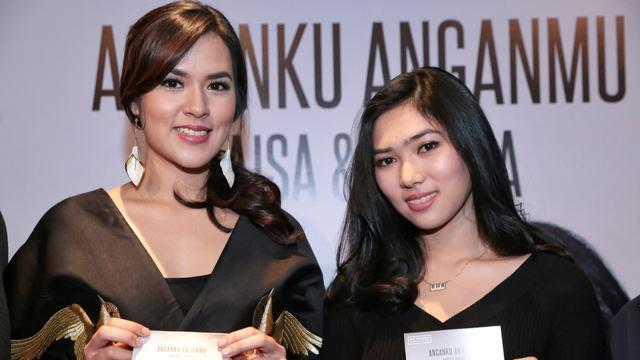

In [ ]:
readb64Recog(base64_string)

In [ ]:
def analyticsExtraction(base64_string, model = model):
    img = readb64(base64_string)
    try:
        #print('Face Extraction is running')
        detector = RetinaFace.extract_faces(img, align = False)
        numFace = len(detector)

        #print('Face Extraction is done. Numbers of faces: {}'.format(numFace))

        if numFace == 0:
            finalResult = [{'faceId ': None, 'base64str': base64_string, \
                            'age': None, 'gender':None, 'dominant_race':None,\
                                'dominant_emotion':None}]

        else:

            finalResult = []

            for i,face in enumerate(detector):
                #print('Face Analysis is running for face: {}'.format(i))
                analyze = DeepFace.analyze(img_path = face, \
                                           actions = ['age', 'gender', 'race', 'emotion'],\
                                               detector_backend = 'skip', enforce_detection = False)
                age, gender, dominant_race, dominant_emotion = str(analyze['age'] - 1) + '-' + str(analyze['age'] + 1), analyze['gender'],\
                    analyze['dominant_race'], analyze['dominant_emotion']

                recognition = fr.findFace(face, model = model)['name']
                buffered = BytesIO()
                faceCvt = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
                faceCvtr = Image.fromarray(faceCvt)
                faceCvtr.save(buffered, format="JPEG")
                b64_string = base64.b64encode(buffered.getvalue()).decode('UTF-8')

                result = {'faceId ': str(i), 'base64str': b64_string, 'age': age, 'gender':gender, 'dominant_race':dominant_race,\
                          'dominant_emotion':dominant_emotion, 'name': recognition}
                #print(result)
                finalResult.append(result)
                #print('Done processing for face: {}'.format(i))

        return {'numDetectedFace': numFace, 'result': finalResult}
    except:
        return {'numFace': 401, 'result': 401}

In [ ]:
analyticsExtraction(base64_string, model = model)

Action: emotion: 100%|███████████████████████████████████████████████████████████████████| 4/4 [01:46<00:00, 26.66s/it]


There are  462  representations found in  representations_vgg_face.pkl
find function lasts  167.12215900421143  seconds


Action: emotion: 100%|███████████████████████████████████████████████████████████████████| 4/4 [00:30<00:00,  7.66s/it]


There are  462  representations found in  representations_vgg_face.pkl
find function lasts  3.43851375579834  seconds


{'numDetectedFace': 2,
 'result': [{'faceId ': '0',
   'base64str': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAB6AGMDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDxSS5dyEH3RzgdDV2MkoAI/mIxkdapxR+XgkEsTgAd69A8LeGhKBdXafvDjavZRUSajuaU4yk7Ix9K8NXl66v5SoDzyK73SvCUEAU

In [ ]:
#mencoba foto yang berbeda
base64_string = '/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxITEhUSEhIVFRUXFxcXGBcXFxcYFRcXFxcYGBgXGBcYHSggGBolGxUVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGxAQGi0lHyUtLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAmsB7wMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAAAwQFBgcCAQj/xABOEAABAwIDBQUEBgcFBQgCAwABAAIRAyEEEjEFQVFhcQYTIoGRBzKhsUJScsHR8CNigpKisuEUJDNz8TRDU7PCFSVjdIOjw9I1ZBZEVP/EABoBAQADAQEBAAAAAAAAAAAAAAABAgMEBQb/xAAvEQACAgEEAQMDAwQCAwAAAAAAAQIRAwQSITFBIjJRE2FxIzOBBZGhsULxQ8Hw/9oADAMBAAIRAxEAPwDcUIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQheSgPULxCA9QvEIQEr1eIQHqEIQkEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBC8QgPULxCA9QvEIRYIQhACF4vQpAIQhACEIQAhCEB6hCFBIIQhACEIQAhCEAIQhACEIQAhCEAIQhACEIQAhCEAIQhACEIQAhCEAIQhACEIQAhCEAIQhACEIQAhCEAIQhACEIQAheIQAhCFJAIQhAC8XsoQAhCEAIQhAeL1eL1ACEIQAhCEAIQhAeoQhQSCEIQAhCEAIQhACEIQAhCEAIQhACEIQAhCEAIQhACEIQAhCEAIQhACEIQAhCEAIQhACF4hACEIQAheIUkHqF4iUB6heIQHqCuZRKA9QvMyJQg9QvJXhKA6QuJXspQOkLmUSgOkSuZXsoD1eyuQhAdIXiEFnqF5KEJPULxCA6QhCgkEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCF4UAIXiEIs9Qky5eZlNEWdyjMk5RKmhYpmRKSlelyULO5RKTzILkogUlEpPMvC5KJFCV5K4lEqaIQovFxKCUoHcrzMuJQpokUleSuQiUoHUr0Fcr1QD0oC8QlA6leriUSlA7lErleyoB6F6uZXoQHq9Xi9UA6QhCgsCEIQAhCEAIQhACEIQAhCEAIQhACEIQAhCEAIQhACEIQAhCEAIQhAC8QV4SgPZXkrlzkk+qpSK2KlyTL0k6ouc6uokCpeucySL0Z1agKl69lIF6O8U0BbMjMkc6M6UBbMiUhnQaoF9yUBfMvS5RNbarG6eI8G7upNlE47tSWPaO7gb5N5OkD59VFElqzLzOqlX7RkQ1pz1DoBYX49F3hdvumHtmeDpg9I05qaFFqzr0OUfh8YH6Hy4Jy16iiBwCgFJ510ClEiiF4CiVAPV7K5BXqgHsr1cr0ID1CEAID1ehC9VQehAC9C9CgkF7CEKAeoQhCQQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIXhKAJXLnQkMfjWUmGpUcGtbqTp/UzYDfKyztR2+qVCW0PBTuLjxu58AI5KyjZDZpON29h6V6tamzq4Seg1Kr+K9o2CZMGpU+ww/N5Cx2vji5xc4kk6kkknrNymtSsrbUQbCPaRhnaNqN+0B9xKmcNtynUGZpaQd4cCL7iRoesDmsCbiDv/0807wm0HUzmY4tO+DAI4HiFboUbwca3cR0m67/ALQsiwva5wEFoPmfUDdvU/gu11M626W84Nim4UXv+0LzvlDYPaLKgBY4O3xv9NU7FVTYof8AfLrvlHh69FRLBId6uTW5piaiSdW9Pn+KWQSFTGNAJnT4dVW9t9p2Dw5g2RZti483D6A5G6rvantQA406OUkWLvotM7o9426KkVKxMkmZMmTqT81DkSkX89pGlwbYMG+ZcTxsLxCru1Nuh7yRpnzDllEDXpKrlSrYgEhMKtUgqu4tRe9j7Ww4BNWqA7XTxG8xMQApavt3DEiKrLAQQYvMxx0ssxoOHEpfMNJU2KNd2VtqmXCKjHAgfSEjhreRcSrPRxV4Plz6cV89ZipPZ3aLE0YyVXQIhriXM8gdPJEyKN8bVtKVZVWZ7F9otN0NrsNM/WaZYeodp6lXnB45r2hzXBzTvBkdDwKmyKJhtVKByj21Eq2ogHi6lIselJSgdL1eNXqgHQXQXLUo1VYCF7C9CFUAEIQhJ6EIQoB6hCEJBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBC8JTTH7Rp0mF9R2Vo/MDieSEWOnFVLtV2zZh8zKbe8qDUT4G8nEankPOFUe0vbqtUzNpO7unpa1Qjm7d5Ki1sa471ooV2RZKbb7Q4nEGatUkahosxp5NHzN1A1Hu4/Mr0uKTqVIU2TRy4pJx817mK7bSPBRZKQnuXBqJxUpQPimdYKAe98lKeKjemblyHKSCx4Laj2wWuNvzHRXbYfaoVIY85X8Prc28bbllVKtBT+jWmDMEQR1HDmlkm20603XYqKjdlu0WaKdXWAAfP5XVs7/QzrP5+Ckih5Uq8f6/HTqqD2s7WZyaVB3hFnVATDv1WHhbVJdtu0Uk4ak7lUI3f+HPz9OKqTI1KhslI6LyeSScF0/EBIVMTwVSx65ySbTkr3vhvEH87k82Y0Ewqk0M2gCyWbG5GKp5SkhCtZDQoQiVz3i8zIBQKX2Dt6thng03eHew+6Rwjd8lCylGPU2Qbh2c7Q08SyW+FwAzMOrZ0PMc1N03rA9m7RqUXtqU35XN0P3EbweC17s92gp4pkiGvHvMnQ8ROrVNkUWVjkvTemDHpdj1ZED9pXQKbMel2uUECoXYSYK7BVWDsL1cBdKoPUIQgQL0IXgQk6QhCgkEIQgBCEIAQhCAEIQgBCEIAQhCAEIQgBCEIAXiCVxVqACSYCAYbbxgpU87jDQRmO8NvpzkBY/2s28a1Rx91v0Wm8Dmd5O9S3bXtMa7ixv+EwmBPvESM8+sBUHHYgm39VtFUij5E61Yk3+a4YEmyNSlAZiBc+qhsskeVHxZe0cM5xsFK7O2E93icBHDVWbCbGAGixlNI6IY2yr4fZB1P9PkpClsnl/qrVSwI/1Sgwg4LLezZYkU2vsjlqFEYrZbhuWlPw4UZisCDuUrIQ8NmaVsMQUye2FetpbL1/C6reL2c4E20/IWsZJmE8dEISlqdWFzXpEFIAwrGZKU8UQQQbjera3taBhXvBPeAZQD/wAR1p9Jd5KjTZI1nFSGLCuSbkneTqTO880qX2TCjqnNRygHFR6SbdL0qZcVO4HYxNz6R6KrlRaMGyJw2Fc6ynNn4TIJ/wBFJUsDb74TlmEj/SQs3M3jioreOoySUwfTi6smNwsXCiqlLp0UqREokavUrUpwky1XTMWjxdJKV2x6kg7a9SWzNovpOD2EgjQj7+SjCvWOhSDaOzXaFuIZJs8WcAdJ0PQ8QrJTqLB9kbQNJ4c0wRvHA7lq/Z7bAqsBm+8dN8buY6KyZFFpY9OKb1HUqid03KSo+Y5dgprTenDHIyBZpXSTBXUqoOwV6uQupVQCEIQHSEIUFgQhCAEIQgBCEIAQhCAEIQgBCEIAQhCAEIXjigIrtJtgYWiahGYyABMSTzi1pWS9o+0lWu4ucSBuaCYG626eauHtNOcUwHGweSBpugn0ICyWs83C1hSRVndbFF2pUfWbOiUFz8FO7C2C+seDeMfKVLkTCNkLgtn1H/RVx2PsMNGgP54qx4DYFOmBYW/Oqkm0QLLnlO+jqx40uyNo4QBOm0k4yL0NWJuJNpBe90lwxdZVDLIY1aaZ1KalajE1qU1WiSIrYcEKGxmzp3Kz1KaZ1qakOKZnm2dmcAq3XpwSFp+Nw4g2VH25gi1xjRbwnfBy5cVcoh6L9yHpMWKVK1OcSphOKNEuKTa1WTYWzS7Lw3/NVlKi8IbmOdg7HkglW3D7P5Jxs3BBoFlKMpLmbs7oxUURTMCAZhd/2YKW7tIvpBQWIbEYQcFD47Ys3CtbmJN9MFLohqzOcdgHN3KIqtK0baODBvH54Ko7RwdzA/PFaxkc2SFFfcV5mSuIpEbvz+CbOWyOdodMqSF0EzZVunbSgFGOVj7MbXNJ4O42I48j8VWYS1J9wpIN5wGLD2hwPNSVNyznsLtiR3bjDt2/T8hX6jU8lZBkgxyc03JjTcnDHK1lWPAV2kWOXcqKIFQV0Ckgu2lVoHcr0LleqoFEIQoLAhCEAIQhACEIQAhCEAIQhACEIQAhCCgPCU1r1jHhCXc2dfRMNpYju2l28Cw5qUO3SKjtek6s4UxvM1DO7gY37o5LLcVh4dUDbgOcAbTAJEwtP2hiC3wg+Igz1In748lSMbswtJtYmeBvu+KQfLOrLCopEVszBF7wNfl8Fq2x9nilTDYvAlQ3ZHYgaO8cOithVJytjHCkJOamlWsxvvOaPMJ3VuojF7GD5IMOvzHQhU7NBUY2mTAe0nhIlL03AqnbUwVSicwbbiN3ponWxu0AJDKljuJ0Pn6Js4G4tzQuiElRfIlducqmiE6ibvCWe5JOKqyw2qNTOs1Pqib1GoCIxLFWNt4YOBKt2Kaq7tawhRF0xJWjPcRTh1kNFk4xw8SQIgrqT4PPa5FMOySBzWldn8JDR0HyWf7JZNRo81qOy2wAs8nJ0YFxZJUaadsakqITgLKjezxzUi9qcwk3NQDN7EmWp45qScxOyLGVSjOqhNp7Jzaf1Vlc1IvaoVoPkzrH7LqDUEjpIVfxVAg3C1yvhwdyrG3NihwJAutIZK4ZlPEmuDParYTvDPkL3F4UtMEJtQMFdHZyVRINQ0rhrl0VCBJ7HxZp1GvB3j8/FbDsrFhzWnc4Ag/ceYusPpuWm9j8dnoRN2GOoI/+0x1U2C90nJ00qMwVTMAfLzCf0yrlWh3Tcl2lNaZS7CpKirSugk5XQKgCkruUkCulVgcIQhULAhCEAIQhACEIQAhCEAIQhACEIQAhC8QHhCrW16/eOcwEEMieMkfkeR5Kcx1YNaSTHPgNSfSVlnZ7tJnxrm1DDawytk6VJLwJ5yW+imuC+FpTtkptxpa9rzF4MfCU0w1Hv6s/QabczvPrPwU12lg0wCPESGt4319AltkYMMaICy3HZJ2PWNDWgCwSFR6cVCm9QKjJSGWJxBG/zOigMR2uDHRAdBAdlLjA8m/m6sFRoJg71XduYatTZU7ixqNgxYwDctO50SJ5q0avkrK0uB1ge09Kq1ocRncAItcxeLmwNr30UVtnY189O15ygaaacBqqK+oaTz3ZuLQTmDiROWOM2lXrYeJqhxpVZJEi8zaJbp0O9aNNdGcWpdkp2b2kSO7fqNDxjUdVPucon/s8TmaI5c5UpTbZZSN4HJXBShC5KoXEXhN3py9M67lAGeMKrW1jY+insU6ygNse4VC7JfRScQPEdN6bVNU4r+9+ZTaobrrj0ee1ySmwGTVHKFp2z9As37MCai0nZzbBZT7OrD7SUpBOGJGkEuFQvR6vCglMNp7RbTbfyCgMXxNZrRJMKExO2rwwT8lXsVi61d0CQD6DqpPCYWnSA7x8u4fcBqr0jO2x7/2s/fSnmD80rRxuaxaR8k0G1KIIEx+yfjZPcPiqbvdIPRVaLi+VIVaUp5qvC1UZZFE7Q7I1cAqbXpQStfx+GDgs927s+HStcc/Bz5sflENRdZK8kk1sJULaznBitfYvH5KmXjPr9+4+SqgT3Z1YtcHDUQR5FWINvwT79fTS6kqLlW9iYkPaIOoF+R0+NvRT9M6KyIY/Y5LNKbMKXYVZFWLhdArgFehCBSV1KTC7lQB2hCFkWBCEIAQhCAEIQgBCEIAQhCAEIQgBcuK9KbYzEBjS47lKIbKr2+2qKdB4B8RBa39qznc4Egc3LFMW+8jWZtYyNII0I4hW/tjtHO8smSPeO6fqjgB+dFU3Yd1R7GN1cYHmfz6LS6JSNM7JVq+Jp06uIIJaCAYguvGZ0WzQNRrKt2SAkNl4IUqbaY+iAPQJw8rlkzuihF7Uk5qcQk6gsqmtEXiwmr6kiCn+IbKZPoncoDRC4rZzQ8VmNbnEwS0E3SGy6bnVn5xDhDxwcIyGD6FTppHeF7TBCtuK0rHmCEBOapTKg+DK8xmLA3qrZKiKuqJCpiW8VFVdoqOxZLxr5fjyUIl8Fgbimu0M3SFdUbF99TOYFw6Ax6ARCc4LtK7SoA4cQrOPBVTJ+uVX9s1IapWnjGvEgqsdosXAN1mlyWlL02Vmq+6RBvCSL5K7oLsqjgssPZNs1T0+/wD1WkYHQLLtiYs03uI4Kfp7VxVT/Da4C+g+82CylG2bwlSo0Jr0q2oqLhcXiAfFUHQkT6KdwmPcIzLOjZSsmsRUgKu4ymajr7lYcudtlF4ujGiWTRB7QxApiG2tJO8AcOfBMNt7GxVKjTxDyGNqOdIHvMAAjMZu85iYHDepathnZ6ZDZvnM+74T4QTwmT5BTOPxlWvT7moKZYfeGXMSdxl2kdFpBpdmOSMn0ZrsvB56oBdUP1gD4oizs0QBICt2w9luaQS8/n5lSGD2bTpgBrQBMwBAnid5UpQoqs5l4Qo7psXRal204XLgsDdIZVgqt2gwmaTCt9ZqiNoUZClcMrJcGaYmhqEi1Su2WBj5Ohn46KMJ4LqicM1TOCEtTdBCSP3L0HT89StDM0fsdjC6nkBOZp8PMSPD0IjzAV7wtYOuP9OR5zIWVdjMXlqQfpRH2tAOhlaThH7xvAn8/FEyWTVMpwwpnSnenTFcoOWleg7kkOqUBUlRSV7KTC6lBRIIQhYlgQhCAEIQgBCEIAQhCAEIQgBCF4gAql9v9t/2dgDf8R85Z+jGryDwkATxKt9d0AlYb2w2gauJe4nQkAcALAc7AXV4ryR5IHEVjm1neZ49fNWP2ebO73F94R4aLZ/aNh96qLjJ81r3YTZfcUL2c45ndeHkom+DXGrZZSkXFKlIvXM2dqPQUnXdZIvqwmtfEJZejp7l4GpGm4lKlxFhqoXJLB1JIGklg4714ShFUNqhgKC2liC4xNlKbSrwLaqFLZKqyyRG4hzg5rRbN9NxhvlYlV+ptmoCS1ksDiA4POZ0GDDCPzIV2pU7EG4UDtjszN6Tson3YBYJMuLRIyunWNYC1xuNUznyKT6PNldoA737SdSIi8QeJkEToFIY3Z1KoJDYO4tsfTQ9FC7Ww7WUqbW5nPYfecLuLj4pjcU52TiXZBm3fFRPjomHKqQxw5NF7qZuN3P8yqttnH53wD4RPmd5Uv2oxwaSAfE4RzDd/rp6qqErSC8mOSf/ABQu0WnklqGiSfEJah7quzBMf7LrNbXBdEG39VYqeNq4isMNhwBxJMMAGrjFzyA1VOrWcDOh+at3Z7DVA4VKcCbGdD1Co3Ts2i2+ER+0MHUZVqhz3Qyo+kCA0ZizXw7hBB6b1KdmiS2SXO8Zb4W7reLhGvorDidlMrPFSuxj3wBYZQYNs0HxRopSjSAAAsBuAgDkANFWUkaQhJdjjZFUiWu/PNdYyndI0zDgpDEUpErFo6EMO5BSjcPyXrbJzScoTFHFOnyThlKF0whLtCs+SUhIhIvCcVAmz3KtF0JvTKtTlOnOXhEqCsjO+2uFgB3MfNVmnp6rRO2WGzUHGLiCs5DrLox9HDmXNnbivJXLXL3etkYk92eeRUbBva41/MwtV2fUloI4acPwvPwWT9nx4ieDc3WCJ/PJatsQeAfZ+ZkfNCfBN4V1gnzFH0Pe6p8xXRQXalGpNpXYKkg6XYKTC7lASCEIWJIIQhACEIQAhCEAIQhACEIQAuV7KTq1AASUAx25jm0qRe50D58hxKwDaOIBe4jQknoJloV47f8AaIOmk0yR7x4b8jeG6Ty6Rm9arqtFwqCRNdj9m99XBI8LLnmdwWv4Kw81SewGDyYcOOrzJPyVywr9QuaUrkdeONRHmZJvXuZJ1XqhsM8QYTcHkkNp03PBaCRNpGo6c1GbExbm/oXyXNESfpAGJnjpKJWWVsn2FeCqASSCbWi55pNrwg1FNBWhSlWZUaHMmDxBaQRqCDoUjUMLsYlovITDH49u65KMlMjtoVZckaDZXNYHfvUjgsMYlZ9lzwUYSb2wpEssm9ZllYrRA4+iHahRe0Hto0y7gPyFN4tyoHa/aWZ/dg2brwn+n3pBbnRTI9qsrmNrl7y83JM/0SVLVeOXtIXXWuDzn2OKmicYa7TyTaqU4wbtUbLBXar92SdNFhHBUSqFZ+wWLu6kd3iHQ/gT8VlNcG+F+ovlGmnlOmkcOJT4CyxR2uJHVm3UphHSyEwxIunezzZCrQlWpwmznkXUjiYUfVqNg3VaLI8o4y91J08SFE4amDJ3HT8Uo4EaKw8khUqprUqpr3hXQuqMmxUFKtSTQlAURSRG9oKc0Kg/Ud8lj4dbVa/2lq5cNWJ+o4ebhlHxKx4mPkunGceY7DktOiagpcGy1Oeyd7PautqxzfM6fJavsK1Jpg3APloPWJ81mXZnD5i1v1iSfsiL+d/Vavs6nFNogWAHoiLPofURbRPKZTamnVNXKC7V0uGldgqSDsFdSuAV6EBJoQhYkghCEAIQhACEIQAhC8KASqYhoIaXAF0wOMfkpULPvaVs6vAxNF9QCmJeA8gANMioBIAcPkqe32h7RYA0vba0upDMep3+ittvog2rEYlrBmJ9Lk8gBclZv2x7a2dSY8sMwWsINSOD3i1MHgJP3UfafabGYi1TEVIIIIacjYOohkSOqgy2Lact5SqLqJ3jMVmJtHIaA9d55lJMplzmt/MBd9zlF9Y04D8Spbs1gS5weRqfRuvzj0VZTpGkY2zSNj0clJjRuaFI0jBTLDGAnLSuW+TpH4cuHrmi6Uo5WJGzmKH2lhfFItO/gVOFJYmkHCFaLo0xumV7DYwghj7E6H6J5cil61XySeOog2IUTWq1W2Jzt/i9d6u6Z1bV2SBq2TQtvIMdExOMA3xydZKNxYP5ssmjKUK5H7XSeJ5qbw4GVVvDvJPJTeCqeAKl8lBy8pliqtkpUqqD2tj2saXOcABqT+fhzU99F015I3tBtIUmOfv0aOLt3yWY1qhJJJuTJPElSO3NrOrvnRo90bxzPMqKldGOG087Pl3PgHLqkLrkJSkLrUwOXlK4Z6SqopGFBI+qGQu9lY80araovlPiHFp94dY+QTdj0k4wVDLXXJtmzcU1zWuaQQQCCNCDoVKPq2WU9itvZCKDz4STkJ3E3LJ4HUc7b1fhipC5ZLaejCakh0+pJXDca5liLJGi7UrtzgoRLZ7XxTnBcUsHN33/ADuQa7Qk6mPjn8lYlKTJNhAsElXxLG6kBQGL2udAfIapqcO993b903PUpRZYvLJmhtDvamWmDlbq7d9nqpWk1NNmYMU2AAR/VPwFVmb74E3L0LxyTqPgKEGQfbF2al3Q3mT+zoPX5LL6zCCQQtbxOHz671R+1Gx3Md3gEt0K1xy8HNmjZWGpxTaSQ0a6ddB80lli6k9iYYvqCN2p4GYnrqug5aLx2SwMumPC2GeYEu/BaBR0EKB2FgxSYGi2pjgSBY89VM038FKJY9YU7YmLHJwxyvZSh20rsFItKUagFGldSuAumoQSqEIWJIIQhACF5K5e8DVAdrwuTd+I+qJ+AUficMKj2uqEuymQ0Ehm4y5sw8gi06KLJpkxK5cUgX2sUmMRxVqIKf7Udrd3QbQa/K+s63DLThzp5Odkbf617Ki//wAdquwzK4adC5zDq1uYw4A6RFxwKd+0/Gd5je6d7rabWtOuV7pcTxI8TWkdDuCv2DYKVKnT/wCGxjL78rQDx4FY6nK8cVRrghubMgODOluq4qURT1u74qc7TYUtqvdQa7JqfD4WSb33NNtdFCYfZxe6ahtwH4qIZNys2cadCOCwjqzj9TVxG8j6LfvKu2ycGG7lzgMI1rRA3KUw1NUcrLxjtJCi2yWK5pL0lCRSg+DCeRIUW6pdP8JWBClEtHD7JF706rwmFQoyyQyxbAVD4qg8Gym6oTOum5m0ZtFcq4d51AXeH2PTJlwk8N3opGoQk21ZNlVyZEp2PaVBoAAAA5JStiQBATN1Q7yoLbnaSjQBE5n7mNN/M/RHx5KEmyjajyyQ2ptNtJhe90D79wHE8AFm+29sPxDpNmD3W/e79ZN9p7UqV3ZqhmJhv0W9Bx56pi966IY0jjy5nLhdHLyuMy8L1yStjnFGuunFF10yBTmi+8/nVQSj2qbrlqVxAuUiChNClN6HLkLwQoCO2u3/ACt5rQuye3m125HkCq3X9cD6Q58Qs6XVGs5rg5pIcDIIsQeSiUVIvDI4s2xrZFkwxjarRIM8ogqvdnu2LXQyuQx5+lox3X6h+B5K5Nqh4tqudxcTuhkT5K4cRUOjfj8Uo3C1HRmcGjlr8VI1cAQZZblu8kDCvOp+CHXGaqxvSw7GXGvE3P8AVSGz6EnM7ySmG2dfTzKkqOGhVbKSyX0dMCUJXeVcORmA3eU1qGSlsQ/dvSbGqoYNakMZhm1GljhIKeQk4upRRozHa2x306mR2hMsdFiPx5K29m9jsphsEOnxZt2g9STCltqbPp1mZHjod4PEc1Vam2MRgv0Bax8AljzN2WhpAOoPzXRjnfBzyhzwaLSHPqnbCs82f2zqkxkpvIiQARHmXKY2V2vDqvd1GsaIu5lQkt3S9paIbcaGROi03ItLTyUdxcWlLtcmrT+eCVBV7Oah7Tel2uTFhThj1JA6a5dhyRaV2CpIJpC8lI164b14LBtLlkpWLFIVcU0b5TGriHOtu4Bd08NAlx8t3msvqbvaafTrs7/tL3e6IHH+qTqQ27zfhc+QAuVA7V7a0MPWbRqsqMY4SK0As1gwGyYG8xadIup0Br2h7CCHAODgcwcDoQeHRXjC+WRurgrB7fYV1V1HOaRacuatTcxs8IPuH7cJ8/GXEkzqCTII4iLEdEh2i2LQxIy16fiAhtRpAqDo76Q0s6RZUCvXxOyqgpOPf4Z12DQEfSLNTTqNm7ZgyOMiuTE5e1l4TS7RqmH2iHWPqNP6JSs788VVsLimvY2rTdmY4S06GNII3EEEEcQrBgcWHtvqNfJU0+Vt7ZdlsuNJbkZLW/T7UM+KnVxdiIs6m6I/dZBG8X3Bas5gdIO/71m+ydjVMLtXI45m/pKmaPeaQ/K7XWXG+tiOK0hhn7ljrpXJIvpl6WxbAYVs5coykGRFiIi43g8FTe1ewGYZ7XsI7qo/I1pPia8guyji2GmN9oV82X7/AJFU/wBslZww1ENAINeXA/VbSqTpcCXNuIIsZWulheOmUyzcZkRhK0WlTOHgwqLsbamaGk8gTqODHcTGhHvRpMq17MxW4q0o7XTNoyU1aJteFy4L14XKpKEqrknSxBaZHmuK79U17xQ2Xonm4kOvKTe9QLqxGhXh2oRqJ5puJJLEVVFYrEwmO0NusaCSDG/TcqXjO1tR5OSmGjcXEuPoIA+KlJvorPIorkt1TET+fiVGY3tLQpeHNmd9VviM8zoPMqkYnH1avv1HOHCwb+6ICab1rHF8nPLUfCJra3aetVkNPdt4NMuP7W7yCgHnf+fVdPXBWqikYSm5dgCuXuXspNSVOUAr0oQg5XYJXmVACkkfVPE0HlB67k3ASmFqDQ6FdVKMHkoJOF41eOXdPcgR5CScnbmpo9CDoOU9sHtHUoQ0y6n9Xe3mwnd+qbcIVfaV7KhqyU2ujadkbVp12B7HAg/m4OhUzRAWE7L2lVoPz0nQd4N2uHBw+/ULUuzPamniGgHwVIEsPzafpD4rGcKOzFm3cMtzQAvcwTL+1hJVMdG9ZHQPn1E2rYgBMXYwnRDBN1VhirZKWY1cNal2hCh4QknBLuXLkIY0rVYEqk9qn5y230hHIXk8rSrlj6gAKzzam1W997mYNOs6OHARB81pjTsrx5GeCxJDsneNawyJG6bBwMTP4LpuDIe4NdLGg5njQSDmDhOtjInRM2Yw2LgxwBzHwhpmeLQCFPUS1jH1HWBkvPNwuAPNauW02w445E03wuS29me0NQ91TqQ4BrWyJBiBleSbmZHxV26rBTjnT4S7LAaBOUwBEzv06Kw9mNs4ylVosz5qTnsa5hOae8IFjEt4jorxb8mOaEJL0ro15rkq1yagpVjldM4qHrKiVDkxBSzXKxDJirjLlrbkWPI8OZ+SaPcSuKNIMaGNEAab+ZJJ1JJJJ4lOsHSkydB815cpvJKl0bxWxWxShSyjM7/RRm0sQXb4buI481NVocC07woB7cpLHbtfuPRW1CcIpR6GGpStlf7V7IFeg4AeP/EZw7wD/qEtPXkq77K9umnVOFc7wVJdTad1QXc0cJAJj9U7yr44S0jeDbz0WQdqaTsNjXOp2OZtenG5xdNv22uV9Fku4saiHlG2bQHmCoLb2x24mi6i4gTdj/qPHuu6ag8QSpfC4ttfD06rdHsa8dHCSPI28kjSduK63wzKPKMx7FY2pRrPwdUEElxDT9Gqz3xO/M0TwOQHerzha+RwI81W/aXgO6dRx9IQ5rmtqRvIjunHyaWHiIU3SqNc0Fp8JAIPJwkfAri1C2zU0dGH1RcSZ2rh2uDa4HjptcJ392+M7f4Q79lI4Kru3fn4pzsytIv0KiMPVyVqlA2NNwyyfepuGZjhziW9WFNTDfFTQwSpuLLZsnVx5BZ/7Za4/utPNldNWo126QGNAP1ZzHxbt4gmL9sZwIJ6fJZt7Xa5/tVFlnAUZNI2D81RwlrhdrvDqIPUSD06RehHPqPeym9nKJOMoN9x/etDmkCHNnMY3XAnLpvbuC0HaGynUpqUwcg94b6c6Hm3nuVI7HPY7HYduV0B5y5ozsIpvcWkgDOwEG0CJkRcLa9n07OH5jeDxCpqOcqX2NMLqDZSaGP4p42tITbtHsoUKgyCKb5LR9Uj3meUyORUfSrkdFm+DqhTVofYmqm7XJKrVkr1hsq2WPahTDEvTqq5RuLdYoSVrtHXMZRv1VdhWDaFDM6fz1ULWbFiLjlcwuiD4OTKrYhSp2SMXMqUbSyho33KY4xkGw1WqZzsbVQk8qVeLBeVrKSBu4rlqHLxAdBKZZXLUq1qA4yrxzU4DV44IBqQnNKqYAK4e2ElN/NGE6HTqYNwuMpC8pG69zEaqCbFk3exK03yPzuXjwhDG0rwlenWFy4KSBai2U7wNbK9p0v+SE0oOghOKdSx8IPE7x0hVkjWCNF2dinFo8RIUk3iqb2e2jbK7hv+5WzDYgGFzyVM6oz4JCkE7YEzpPCdMeFWi9jmm1LJo2slBWUA7quhMq2JTXaOPG4qvVtpCoS1rrb7iTyG9EXhBzlSDtHtEupuDHZQBd2t9Mo5nSVVMF3QPePLWtYRLYcSbWIuZ3m+isVVrcha4DLHQR9yq2Kw36QNpgu0IBLSdTqOBgQNYPNa43aN9Vp/o01yOcLGJqEOIY0AlrWtAMbjMXPXika2JLw2lbJTJABOvNzgY9LXXeFrl2am1jQ95OdwsA2TYDRoH51UhiGUBRABbqGhwizuMj4qW6ZSMN8Lvnz9yMe3J5cDmB37+Sm9l7S7qox7nNljw8fSaTlMNI1bAPrvUC8Q/MPG1jgJNxrpHAm06Jw/FDP3oAIJOZh0EjSd4J4cFo+TlhPZaNb2D2qo4ix/RVAQMjnC4OjmuFiLG0yFYQVg4dSc852OY0CwEkiYtHCZKuHZzti3Dk0K5c6kMuR4klgcJy3u5t55aXVk7M8mNdo0xj0q1yj8Bj6dUZqT2vEfRN/MahPA5WswaJULvF49lIso5gKlRr3NbvIYAXnyzAeYXWHaJzEwAJJOgA4rHdpdqzV2k3Fye6a4NYDuo+64kbswc5x6jguDTY24uRplktyRtGEfLeia7cpeEVQLtsfsnX0XuDqQ6J1HlyTzNq06Gy1x/qY6ZEltnaK8x0mOIj0Wfe03CWpVQNHOpk/aGZvoQ71V/wASzu3kbgZHSdFX+32Ez4WrH0QKg/YOY/CVw4m8eZWdU1ugz32YY7Pge7JvSe9vQOOdv85Hkp8mCqF7I8RBxNOd1J45xnaT8Wq+1QvYmcMRt2nwIr4SvTi5plzftM8bf4mhVXsXi+8wlMzOWWeQPg/gc1XzDO4+fRZh2KAo1sThPqOJaOVNxpn4d2ubUx3YzXE6mX3ZlS5Hmojt9NF+HxrdAf7PV4FjvHTLujw4TuzlPsNUyuBUj2h2Z/acJWoDV7Dk4Z2+Kn/EG+qjSzUo0xnjtluFez+0qYaCXQ151P0Tva4/eqD7ZAz+10swIBw4hwv/ALypaDAIvuIPVcdhtq95TNFxIIgQdcwHhJB5DKebSpvGbNo4gNFbOHAFgc1xDgJNry1wkmzgVLzLDKmuCfovKrRSexcjHYYkCoMzhnBJiaTx4jE79HgFbdsxwg+SzvZ/YruMTSr06jXMY6SP8N0QRdolj/e0GRX3BY2kwhj6jGOd7rXOa1zo1yhxGaJGnFZyyxyZk4hQcINMi+3wHd0uJqH+S/3eqpbCp7txjg/ECm0yKTYP2nw4x5ZVBsEqcj5N8PtOW6pdrV4ymlsqojYavameIpypOEjUpIipB1sHyUXUwbS4BwkZhO+0iY8lZsQyyh67LqyZm4kDtLD93VcAABBIG4CY0XFbCyw8Tf0JH56qd2zS7xraoBJEh4HOAfud+9wTXZ1MVAGtMGw5CTFxz+9aRdo55xplTrsgN/OhSVUXKme0tFrauVvusgC3NxPqoqJW6MmM3hcEJZ7ZQGqSom1LBJxHFLNQBKC5dli4IHRAeEpJwXa8LUB62y8qldhqTegDDlLQm9LVOUAi8Xlctau6hXCkA0panuvA+XPmuGst1TnD0Dk3df6eSq2awi2K4Z2VxLSS0RJ0tppuVq2djpHoqk/DuDQSN5BIvwy/Ip7gcTGktAgEk25STpMaLOas2jFp0XVmMI3pZu0uapNfa1TOKbYHiALiJN7Wndde08RVL6rTNQMa63uzBiYGpVNpsoO6LJie1NNhgvBO+JdHommI7YvbANEiRIl0GP3bb/RVnCMfnbFK7TmjK6IHGTMcF5j2vzZqhhxAPAidBBsLDRTtjZDjLbdMlcZtZ1ZwYBmzWLZLZnQBwg7uS8weHpZs+Wo0tgwQMs8GuN3cgoyjjA2BkpixBcGnOZFyCTrBjResr0i0hzagAMhrSD5uLt44aI14RrinGDt9kg4VMQ54zhtNpi0GbSAfW6Y0mGmS2JcZZmBsMwiQfrczokcLVAJcCQNJMT9kAHXibrqk57nEsbMCbC4Gk8jfVTVcFpzU0nzuFWMlppUgXH3nutDssCG74B9U8bRotpBlVwbUu6xu0uGh1gQB6KJ71zBlgtMyTdriNwPIQnWHovL21ajmhp8WZxkuA1tcngjXBTFkV1tvwJYjDmmSCQQQCCNCNQfUfAroNZJEuAABgiCTGk7tbWTnFY3vnZB4WkxMXJExPK+nNe4HDms4l5cHNy3LbeGQQ6d+noVbdS5KfQUptQOaVTvRkcQC1sseTcAH3CfpAzbfI4FeUoeASXZmtiMs2kkAQZB6+q92uKQdkZTykXkG17wBeyebGrU/dbS/SAEz4ZI3jN+KbqVomONPJskzrDNygVcP3mZp0Lrga2ykGJU7hO3GOptlzRVbOtRrp6BzMsjfeSointB5dlGHIM9D5kthKObR7yalQZ97S6WN/VzRu4KFNrs2y6aMlw//AEfQVTCCrh6tM/TY9h82kfeF85NmBOsQePmvpHCPjMOIkfn0WBdq8F3OKrMAgZ8zfs1BmHzI8lbSSWxHj5U1JmpdjNpmthKT5lzB3bvtMsD5tynzVqxD7NcFk3st2lFSrhyffHet4ZmeF/nlLT+wtUwxzUyOCwXoyuPydD5gmMtsNkB3D5FR+LpCpSANw5pafMZVJnxNLSo3Ciabm/Vcfjf8VzapVJSRthdxozH2cVe6x5puN3Mq0z9pni/+N3qtVrLJ8cRh9rtdoO+Y/lFUAO8vG9aw4WXoxe6CZyVTaO8Nqs129/dds59G1Sw8orMDH+lRs+S0fDm6o3tgwJIw9cW9+k48Jh7DPlUStyoPh2WIBWDZdWWDlb8CqlsbG9/QpVt72gu+0LOH7wKndk1odHGy83BL6eWmdeSO6Fma9oaBwO1Km6nUIqjgG1XEz+zUDh9kK303ioOvwO9J+13ZPeYaniGiXUXZX/5VTf5PDP3ioHshtPPSAJ8TTkd5DwnzHxaV16vHuha8GWnnTos9HEvZbNI5qA7ebKqYxrXtyk0mPApkTnzEOIB+iYbYRe2inzBCTa8tK8rHN45bkd04xmqZnnY7HZppEzAzMn6v0hfdMHzVvosVI2hSODxxIacmYubGjqb9Y5tJI/ZHFXbB1w5oIIIIBBGhG4henPmmvJz4nXA4yr0r0FDwqGtiRXJKHrgDihA2rqOr0uKl3tTSvTUpgjA/LNpBsQbSPxvrzPNQmL2iyjig5hdkblzGAHHM2bt0BEix3zxU3imqqdoQM7YAzEeKNXTAZI3GPhC1xdnPm6Eds4rPUdBDh4bt0s1okehTYNslBQhpMaQPn/ovM0BbJ8nM0NQy66LAF04rh9Sfzv8AzPqrFTurQBEb03DiPwhKirIgrwlAdFwP+q4eJ/N1yQgIBImClAZgrlyGIBZq4qpSeKReUBzSbfzSjnXK5pr0m3X7kAnVd969piV49K02eGdZ0jUI2WhFtnZMtmLaSilVIgknLOgMfk2CdUGOqUyB702GmYchadfgvaFVjR3dVpkHX6vIhZtnXHHym3QrRkFndNu4+MzIsZvuFrlcVsM0iW1Gim9xyhznACDed1rCehXhp1AA+jmIkjw300kLjDYSpVLhpHiMyAHG2kWP9FBvy/TVsc7QxTmODGOBDQ3xxcyJtO6+qd4FtU5Hsa0l3+I+xmDEGTa1+sJhhMG0u7t7hmBgRof1c3GZsfJSmKwlZjAKTrT7ts1/pBxVJV0dOGM23N+PCJKvVygn3nbmk+8dwCYuqvyh1fu2AaWlwJ5kkA9J0Udh6zmZ8xb3hiO8JzdJ0B5SCm2IFWq4AtMiR7sAevRVWPk2y6y1aXPwTGFxDKhd3Y0iXEAuM6GTeNyj9qUw0ZGmm0auH0zv0jRNRmYffgjUMPC4BIsBPVOMDiKIdL6cGbOkuHUzz4K21p2jneoWRbJJJ/IvszAgsJqtOUXl0gxqY4C3mlqW1KLQ5rG5bEgx7xtukEmOJTyriKL6ZPeNDSIJ3gndBEyeigcP3Ic4uzOAEsEQHHcHReEit12XyTWJRWNr8iFWpnc57jcmRaxvob2gRxVl2NSik0nUyfKTHQRuUTVxdOozIKIDyBBaGgB+gHEgyjZFOr3kifC0yDw3Ng7yYUyW6PwZ6aSx5b91k7SwdNri5rQCdfMzpuSO160UnQ0uDrEj6M7yeG5QdAVTUIE53BwvaJ1PIBOdite2qW5bRDxIgc7WMR8VTZ5s6nqt3ojCrtWR7AGkZmyImAY10veLqW2RhmmKkPaBoXOGU9DAJ6GyWo7Gy1MxfMGQC2ddxEx6JrtfFB2ai5oGQ+EgyJ5iNCD6q+7dwjljp3guc/4JLGbUZTy/Sm9iPd4zvuotuEpPJy1g2b5XCHDlJIBhMMMGyC/NlGoaL9OAunD6NJx8FTKCNKgNuhggqyio9GeXUPN2lXwfTTXQQeHyNis09rWzsr6FcaOD6TjvzNOZnq1z/wB1aQRZQXbTZ5xGAqtAl7Iqt4l1I3A6szDzXLoclPacOePFmO7C2iaGIp1vqPBd9k2f/CT8FvuznagaEW4civnJwvyWy+zjane4WnJl1L9E7j4AC0+bC1dGqjTUzPA+HEsMw4pnTbFV7dzhPof6p3V94ppXtWpniI+75kLDUK4HRi4dGY+1DDEVqdQe86mWzzpukfB/wWm7PxAqUmVBo9jX/vNB+9U72o4aaLHxdlUX5PBafjlUt7PcTnwNGdWZqZ/Yccv8Jat9LK8aMsyqbJ5lio7t7gu+2fWAF2AVR/6Zl3qzOFJPEFPaYDmw4SCCCDvBsQfKVsuGZvoyz2eYyWVKJ+ie8b9l9ndfEJ/aV0ougrMNjtOD2h3LjAbUfQd9knK0nzFMrSqTl52rhtyWjrwO40WGtQZiKL6T7sqscx3R4gnqJnyCxDY9R2FxZpVbeI0ak2AcHZWuj7Qno5bLsytYtn8lZv7WtmZMS2uB4K7L/wCZT8Lp6sLD6rvxSU4HLNbJFkwtQ+6dRYp4+lmHNVns/tHvqDXk+Nh7upxMe68/aF+sqx0Kui8fPjcZHfjluQz2lsSliGd3WbMXa4Wew8Wu3bpGhhU7Z7n4OucJWPhJmk/RpzaRyJkRucCN60pt1CdsOz4xVCGgd6yXUzz+kzo4DyMFW0+antfRE4+UNqb12aigOzG1e9aWP/xGQDOrhpmP60iDz6qdXbLhiLtHhN16AvGhdgKpJwWptXYnyi9tYsU2OebwNOJ0A8ypXZDdEDtzaApDcXn3Qb/tOH1Rw3nzUZsrZriP7RUmTJpzqdQX9OHWeCU7P7Kdjq7nVPExsF+7MSDlpjgLSeAHMFXraeFDYsNIHDUW5CCunaoKkcm7e7M8xtCKR4ku9A0R8SoFzlbto0f0em97fRswPOFUqjbkKMZWboTc6UmClA2Em8LUyOJSwukQlWIEKCEVGcEmNV25+7kgESu6YXrmLyIQHbnRqmxP53JVwXAb5lAAG5D3Qhz4sEhN0A/w2HDhfeu6lAMjxTrI48kngs0b0q1uoIv6/Hms3ydcWlGkuTitWl+ZsjQt5D/VOMfiWvykRmjxWNrc/P1CTiwIAdFyCJ3/AMtosvKpD3AtbkkC26ZN54H7lNK0Tue1peTyjWc0GIBOpuHRwBBsnmx21HVbVCHRmBMkOgiQ6TeZ1TipsxjabRVqBj5N9WwdARrAg35rnCYc0w+qYENORwcCC46EAajrykKraadG+PDkjOO7o72hsp+YljQQbwHXBN/pRaUlgjVY8Nc4026kOIAMx9bU9Ckm7TqgzmnUQR4b62UlidtMLB4c0+8wzAixv5BValVM3UsLbnFuLRFbVptzl7ZLDfNuJOoDhY/15LhuMqgAd4+ItfQboXNbFPdqTG4fREG0AWSmFa12Vr5bDoBa0H3tzhI0M3vqVp1Hk4nLdkbh5HWHAazO+l3peTEfR3EE6zPJMhTJcQBBBAyiSSZ0k3UsMLVw9Oo6YMtaIvAky7gDoPNPv7R3VFr3nM8jhd03AnfAiTyWe74O6OnUuJ8UrIzHbJDRnL2s3hrjoTq0GbqJa0ncd+knTepB+HfVa6s57RBIuTaBIAG7UBL9n8Kc3eAwBLepIFtbRIKspbVyYywfVyKMVSYywgDIqOaTDvCNAXCTcxpbcZspfHYuo+i2pTzNuc8XIi0zw19QpLFPYG/pCMp+tcHjbek2VKTKeYFopzqNL8t55LFzvmj0oaSOK4KfAy2btBzmOb71RolsxL/xiPkktk7Pf3neVGxqRpcu5bhcqVw3dxNPIGneIjn5zuUFtLbD5cxgLACQSfeMW/Z3qY220kRkWPFGMskrrol9p4k02FwEmQL3AneYVfxmJZUhzmua+wMEZHRv4gx815hca/8AwyDUY4EFlyY1Mb5GqdHAtpNNR8vuA1rgW3v7wBPBXjHbwzkzZ5ajmPC8jjHV2Cm39FmloifojQS8alNGdw5oH+E4aky5hPOTISp2zULbU2hswTBLbj3I6c1FiqJnL+zu+P4q0YnPnzxTVc/wfUgS7WxE6EQU2BUhkmmByXFou2zmzdHzn2l2YcNiq1CLMeQ3mw+Jn8Jb8VP+zDaXd4o0SfDWbA/zGXaPNuceilPa7s3xUcUBqO5f9psuYfNpeP2Qs+w2JdSeyq0w6m5rwebTmHyhenkjvxtHLF7ZG+ud4vgm+07BrvquB/Pou88vPMg+oB+9G0Wyxw5Lhrdio61xIh+3eF7zCVhGjC4dWEP+5V72UYzwVqX1XteOj2kH40x6q71WipSbOjmgHzEFZb7Oa3dY40T9NtSl+3T8Q+DHpopcNEahcpms12pbDOXBEjyRQK632Y+DK/atgO7xoqt/31Nr5/Xp+An0FP1Vo2VjO9pU6v12Nd5keIeRBXntawOfCU62+nVAJ/UqjKf4gxQXYTFZsO5k3p1DH2XjMP4s6w1cLgpfBpgdSou2DqQ4c7Jh7RsEK2Ae/wClQcKwPIeGp/A9x/ZStF3wUy2m2ox1N3u1GuY7o8ZT81nop8OJOpXkxXsptDusQAT4KsUn+Z8DtNzvg4rQqBIJad1lktWiWlzHHxNLmOOhBbLT8QtP2Ziu+o0q2pc0ZvtN8Lv4mlTrocKROml4JqhUITubKOpv0TmnUXkPhnfRnnaKkMLtEVRanW8R5ZiG1PR+V/7SsgKT7e7M73DF4Emkc/VhEVB6EO/YUd2bx3e0WknxN8Luo3+Yg+q9THLfjT8o5V6ZNEyGpQBcU0rlQucuVC7aY+XinMBnid1I+5t/NXnE1QxrnHQAk9As62ThzisYxrh/iVMz98MEvc3plblXRgjbs588qVGi9h9jmjhWBw8bpqOHN5kDqG5R5J7thnwkm3AKdayBpz9VH16GaedvVaPkyXBn+26GVpEQfCfUkO033+SomLEVHD86LRtvw+lTeNHNDvJwBn4D0WdbQJ7xx536rPC7snL4E4skKicbkhWW5iIroFcAoLkB20pRqQDkqxAKhq9gcV4HILlIOSFw525KFc5FAGz2rgJ1UYksiA9DjuP+ie4Wq2PHNrt19PvTHfCesw7n3EbgeSqzfHub4FcJmLvDAIuLx/r58UptDFBziHN92WggwQOBBEFcO2e9zoYJEamw5rl+DcxhNRsEkBt+UmYOmmqrw3Z0bckY9ClKma9QwWtkN1JPKx3m07tV1s+o9lQMBMFwzt1aR9IndEXnkkMPR/3rhLAesu3NsQRpqpZmLw7hUMmm54Mk7tDaLa3jfdRJmmCO7lun/sUp0cIHR4Z4FziPKbbk12ngGtJIqNaPqnUb4aJuL6Iw2yWvPhrBwtoL+d7LvGuoCKZD/wBGSAWkTFjqd025Ki74Z1Sp43uikN6NWgwAdz3h3ucYk8huXDsY2DkpNYSILgSTfXLPu7r9UvSr4YtIfSLSNC1xc4zzgCfJd4mlTphlWk0vBM5nE5JG4tFwY+Kv/BzuNxtSVfbsZivVpzTJcJF2ngeunlqnezSQRSrUyWuIy5gQQeU7uia4jadV8gvgH6I04Rx+KVw2zqjw1xIDD9IuFhMaEyEa45KY5v6not18kttBtCnTDH6atb4pJE5ZIvG6SofD7VqsiCMo+jAiOHHzUhtLCGqG1KTg+BkNxNjqSYumFHYlUmCA3mXDQakRcxKpDbXJ16l5nkvGqXyhpja7qjy5xm/oNw9E/pbLe+iKjTJJnLaCIieTtfVSlXA06gyueHVGwC9sB0bswkgqEqtq4d9nQbkRBBBMSRpu+CspblSMpYfpvfk5T+DvE4GqyjLpyl0lvC0AuG+3DjomVfLYtJJLRmkRDvvGl0szGViXOa90xmMHQdNAF0Sa2VrWDvBN2gNzi1yBABBjrKsrXZy5HGaqFnWy65Z3p392SJjWYET1+CRNMteDUsTDzvJm/lPwU1hcNSps7utlzOOYg33w3T83UbtLDu75waw3dIiTNtf6blVSTbOmWCcMS5v7fBK0qxqtDRh/BEjMYaLSIgTwuoU2c4PaARbKAMoNtxItznglto4d1PIe8JeAN/jadYA1Aul8IKLzNYvFTfGY5re9AEg8uSLjkjK3le18NfJ9GlSmG90dFEuKlMObDoFyaHtnJn6RWe3OzO/w1WkBdzczP8ynLmgdYLf2lgtU+E9D+SvpHbZ8EjUOBHUSsG7ZYDucRVAHhfNVn2XyS3ydmHkvQjOm4nNKPTNcw77t5spn+Bqe4r3VGUH+Jsf8On/I1P8AFusuTG/SzpfaEtmOmgORcPQ2+YWU7Uqf2bapqaBldlT9moGud8Kj1qewv8NzeDp9R/RZt7UsHGIY7TPSjzaSPWHNWOklWWi2dek1tgtHkuKZumfZzG99hqNWffY0n7QGVwPPMCPJPDqvRkcyG3anB99gsTT3mk8j7TPGPi0LJ+wWJjEPZufTJ82EOHwc9bZSg2Om/obFYPs5v9mxzWH6Fc0jyGY0j8DKicd2NoiLqaZpdMqawT/COShC2CpLZtTULzNNLbko7MquBlPtAwnd4+uNA8iqP/VGY/xZlOez7EZ6FWjvpuFRvNtSZjo9p9Qj2uYSKuHrfXpuYetN0j4VPgoTsFje7xlNp92qHUjwlwlp/fa0ea9PUQ34mceKVTL/AEzBhLMclcVhdSBcXHTeEgxy8KcaPThKx22CIIBBtB0IOoPks42fROExtTCn3HHwcx71M+bZb1C0JjlWPaHswvpsxLB46MZiNQyZDv2XwejitdLk2y2vplM0eLJFhS4UdsnGCtSZUG8XHBws4eRT9hXayl8Ff7b4rJh8gN6jg3yF3fcPNJ+ynZ2apVrEe6BTb1d43/AM9VDdtcYH4jLuptA/aN3fCB5LSuwGzO5wdNpBzOHeO6v8UeTS0eS7YLbA45vdMn6gtCi9uVxQw1asR7lNzh9o+FnnmLVNupqie1zHhmHp0BrVcXkfqUQI/jc0/sKq7D6IvFM/RYZmsUafn4BCzfFkOc6PrOj94rTNrwwcMlL0LWD/AOqyxuo8lngXDJy9o7edQmzkvW1n8wkZWxmxCFzCcOppLKoFCYSoevGsXj2qSKOm1EqE1Fl1/aChA8j8/cuXVgmXeErtmqEi5K8IXgXhJNkJOpHBSGFov7skSD92tuK9pYBmVtRz4aYn5W+K5hzXmm52osZtYSwg8JAHmVm3fR2wxSx02SGCrvqU3xlDmiAfUk9YHkoikMxhznSTY+9eDrv805/tVQsBZLQ0HMW6ySCCRw5rvD1qbCHZAS6ZkyGAEgkCLSIMXsqpVybTnvSi312NamIGQMDYvJJMyYi43WKeUNmONEv94kS1o/mPE20S2wy7NkLZa4ZjazbWMcDYKwgADgAOgAHyCrObXCOvS6JZVvl/0VfZDD3oA0Mh0WJbFwfhzTarQcBJaW3i4gdBZSuO20SG90S03LtDO7nO9NmYuu8w5rqrTq0tsfMCxvqFZOXbObJDG/Qm2MGNEGXQdwIMHz3GFJbKoOeyqyLHKQTIGYTA4aH5LjaWyzTuCIN4cQHDS360clMbFpvFKHER9EWsJJuRrMyEnP02idJpn9bZJFfbLXZXMBvBabX4SLg8wpLbFSlkFJjoLT7s2tqDOp/W4yk9sgPq5KbDn3nTMSLCDbTeg7EeWAggPvLSba2gjfHGyi00mzRYckd8MatfIhg8JiG+OmCJ4ESeo3jepDbrXGkwOgkuHumxdGkaxE71GOZWOUZHwycsNILTM6wnNHbdQE5gHWNvdiOm5Gm3YxyjCLhK1ZF0mnMIMHMBwgzFz1Vg25hC5jSBmc2xcSBYcZtr80xw1Ki4OqODmNbGZo8Ql2gDomLaJ7iaxxFMtoyCDBkxmaRprBFtCok+UWwQX05Ju76IuiaVNpcHZ6loBEMvrr7/AESOEwlSqSGC0iTub+dYTqhhhRc19YWvDRBdcRmI0gTx3hJ1s1SS0tbTaZyCwYDocu8nlJmQr32cjx1V/wBjurhHd651UZGzmJ4gbgJkkyPUpfF7VeKhc14LCLDVumpG5wKMNhJFWmPEHNa5ryPCckXnXeRHLco6llNMk5g8EFsAZY/W52+ShJPs0lKUF6eL5JRmHZXqZSC1+TM4tMjNaxDtLc0htXCGmWeIuaWwHG5kajpfmucXiZu0EMfBdpJePeIPG49UlhqOZr5Lu7aBoY8UtAgGwMEok0ROUZ+mufk+k3FSbdAo0CVIuXNol2zlz+BptI+COYWUe0PDh4ge/TAfG80ajix9uDXhh/bK1PaR8IHP7lk3bfHBmPbIlncCm8by2oX5h8Wn9kLa7zmTX6ZaNg4kvpUHnU0aYPUMDT/KpzEOkKodia04alxaXN9HE/IhWuZWUeNy+5r4TFdjiC4cR8j/AFVP9q2FmlSqR7tRzT0e2fmxXTACHeqiPaBhc+Crfqhr/wB1wJ/hlcmN7cq/JrNXEjfZXjA7COp76dRwjeBUmoP4i9XJ6y32WYwMxVSkf95TkdaRkfwvf6LUnL2JHGmL0TZYx7RsL3W0KxH08tZsbi5on+NrlsmGcs99sGBh2HrxYtfScdJg52fB1RTErIl6NbvGMqi4exr/AN5oKeYGpDhzsq/2KxHeYNo303Op+QOZvwePRTLTBlePL0Zf5O+PqiMfafgg/BCpvo1Wu/ZeO7dPKXNPkFlFJ7mkOaYc0hzeTgZb8QFu+08GMRhq1H/iUnNH2iJb/EGrBmHy48uRXtQe6J574ZvGCxDarGVW+7UaHfvCY8jI8kyxuHyOncVC+zXHZ8L3W+i8t/Zf42+Ul48ldcVRzsBheYsVuUGde+qkQDCnDWgggiQQQQbggiCCOBCQqUi0xw38Qu6TlwSi4s601JFNwFD+yYmphTOR/wCmoEzdps5k/WEC3InepurWDWlx0AJ9BKd9otj/ANopDKctVhz0n/VeNASL5DoR04Knbd2tOFIIyvcTTezQteLPHwPkRxXo4Z/VSOafpIHZeFOLxbGO/wB7Vl3Jklz/AEYCPRb7hWW0j7llnso2dL6uIcLACk3q6HPP7uQeZWtUjYLvlxwckV5PCFj/ALRa/fbRFGbMFKl5vh7v+YPRbCb24rFKb+/2pUqagVatTyZLGfHIq3UWye2kSXah36LEOH/Dd8bfesxcL/n5rTe1Tg3CV53hrP3nAfKfRZtlm3l+Cpg9hOX3Dqps54u4QPjxTCvr0Vt2/VDGgfSIynlAv8h6qo1eIUwdopJHdO/5suTTXNJ0FLZloQIuauAlXpEiCoAjUauAxOXrxoUgSa1drrKuqNBzjDbn83PIJYjFt0jhgPl+dVIUMOxrwKhsQCD9HqeSKL6QDm3BLSA8+7Mb+RKfbLwbBl7wjNq1pduIlvXQwFlKR36fBckuBPaLpeKIsAQDbed0bwJ0XWKqUmvax9NxyANc4uExq2w94RHkVJV6VEVA95hxIi+8W08hfiomns2p3uV7SZJLnXykETIPmfNUTR2Zsc4y45bf+BcbMa57g2s3f4WwCORvonJw1JlImBUIubiZNsxAuGgxbldROBY/O3KDmaQeYveTu3qZfs13fd40gAuzEnXm3mDdRL7sthg5xbUOehbZOPzjLlgtb9H3LWsNx+CW2ixzqbg1uYmLTEjf16JVlMAQ0Bo1gCBK8rYhjR43NFpuYJjgN6yvng9eOPbh2zZUXa6RffqOV07r4+vdrnFsi7Yy2PAcLKSftukJysLjPvAATzk34hK1qzKzHd2GuqACzgM4BImJ87rdyflHjLTwp7J8kPhtn1agzRbi4wPKdR0T6gaeGcczy55EFrIgXsDJsY4ppVoYhviPeWO4zHkCUxkudvcSepJU1u8mKksNNRe75ZcMPUa8B7bzv+lroV7VrNaYc9rSRaSBI3xKi3Y+lQ/RtY4xqfdk296eXJQtSvmcXPLjJkXmL2F90LJY7Z6eT+oLHFJJOXn4Lbh67XjM0yDI9LFND/Z6BdcBxtBub3AsLDRMaW1O6pNHdmbwToRvdpxOnJIVaza5bJbTfME3yuG7TfPH1UqDT+xGTVxlFVW45psFQkvqNpsc4nK0kifsjTqUrX2oGDJQADZJLjfNukDgktpNZTLabWiWAS4/SOpDr3F5jddN3YgZi91NhPCCGg8coOvLmrxSfJ5s8ksbrz8kuzCur0mvquykF0OEDM2xnhxSeHr4Wn4ffOjnZZaRvid2mg3JKhgw5xbWqtNSC1rQ4nxEW6NiLBOcDsQNM1C10TYXBsdbcd3JRwjqxuU3FxS+7fZLUaYaMrBAEwJ4qs0H904tJuA4HLBa4j3ZnVoKU23Wf3zm5nhoy2DiBoNPzqvNpYqk6BTpxvJIg8AIB3i56pCLS/JGqzxnwuHH/J5gsAXsc9zg1jQ4gjjv8O4R92qebPfQFMh2eHO8RLRZwAI0nnB6hcYHbAbDHUmhp97LxNpyn5SmjsJObupewOiWmHC/hMa3k3Vnb7MYuOPa4cvyfSVIeIDmPxUg4plhfeH53J25Y6Neg8/N2Ru1XadCsS7c182Oq/qljf3Wtt6kraNrHxRyHxWCbWr95iKr/rVKh8sxg+kK2HnNJlcnEEi6+zypNFw3Cs74spn71d6FyFQvZyf0dUcKrT6saPuV9wo8QVX+40aL2IeUhD13tLDCox9M6Oa5v7whdPZDvRL1QvPnxN/k2XKRgvZ3FmhisPVdbLUaHdHyx8+Tz6Ldo3eSw/tVhMmLxFPd3jj0DwHj4PWwdncd3+Go1fr02k/aAyv/AIg5ezdxTOKqbJChqob2i4HvcBUjWkW1R0bIf/C53optounFSg17HU3e69rmO+y4Fp+BKmIkZB7OcTD61En3mioOrCGu+D2+iuTgs32TUdhca0O/3dV1KpNvDmNJx6b/ACWn12XXn66NTT+Tp08rjQ92bVsOR/qFjXa7Adxja9MCBnL2/ZqQ8eQzR5LXdnugxx+apvtY2dejiWjUGk/qPFT+GceQXZpZ3AwzxpkR7N8dkxRpz/isLermS9vwD/Va9gXyI4L5/wBn4s0arKrdWODrb4Nx1Ikea3bA1RIgyCLHkbgrPN6cql8k4/VBo62jg5BI13KHYrREqCx9DK88Df11+Kx1ePjcjXBPwes0VA9o2yIjEt0s2oBxiG1OseEn7K0Gm1MdsYNtWm+m73XtLTyB39QYPkuPBP6c7N8kdyPOxWA7jCUmEQ4tzu+2/wAR9JA8laqOipnYnaTqjDRqn9NQPdv4nLZr+cgRPEFXcCIXsXfJwrjgabUxYo0qlU6U2Pf+60lZP2AwByVKztXEMHRl3Gebj/CrX7Vtq5MKaLffruDABqWsLXP8icjf211snZwo0GU/qtAPM3Lj5uJWGqyVjpeTTFG5WUf2hYiG06YPvPc49GNAHxefRVbYtIOrsmIac7vss8XzA9VLdvqpOKjc1jfiS4/MKCp1e7pvcPef4ByaILz5nKPIrbF+0jOfvYrtfHd68nnCYPC4a6Fwa0q64M27PQL2/PJKSuaYXTwFYI4C4evSuFUmj0ldERqPReHUcz+CdYTxvYIm/wAJn0/FQ3SNceO3QPw7mvIykzoL3BiLpbEs7p2amQQZAvmi0OBG8Taeq92mHOqloBPADU219QfTkuKmy6gcGwC7LJAIkcZk7jZR32dLg02or+ROqWOAc0ZToWi4ji2TbdYruo9xe1/uSG5STYAWkE6gJxhaLKU9+B4gIEZiIOpANvmn+PrYdwAc6cskBs8IjgN3oquXJrDBui25JP4IqlgKrxIaXA6GQQbneTxTjBbQdSOQgFs3mxaZAMfOOq4x73nK5rXMpgANsQAOM8Zm65w+AqVgXA6m5NpneOPkna5EbjNfTuyQx21HU6haxrQZ8Ui7j1GoiDMJHZe0nB0VHy06k7jFj03QnO1HUHSMwNQCBlsXHSJ0N9ygnGYsBaIAjlfnrKiEU10a582TFkUrLoAobbmEc5wc1pNoMCemnXXkoyvtKo6BMARGW2m88Sn+BqZ6JpZ4fMiSRaRoRfebc1VQcOTqya2Gpi8dDbB0MtRvewBeQ4jhaRu1GqV2jV7qqe6GUgXNzM6iNMvTgo91EgwS3hMgjhrwUltimwtpnPLsgiJcHNsPDuBF1o+0cMG/pySVNci9HboOrDP6pBvvtaE3228NcGsaGgiXEACTMi4vqkKVWmxudlNzjmgOeRAcADMNum2MqOec5m+mpEXkCTuM71WMVfBbLqZSxbW7Y/wdei5sVicwsHGbtmwkG8c1xitoAOilTpgAwHZASedxZcYbA08uapXYOLWkE9J4rzH40PYxrWEMbIaSTMxHQwIUpKyHKUcXPH+2SOz3DEMIqmS11jcGCLSRYlL4htChDyyDo0DUnjc680y7OUXZi+SGxHJxMaDiI16LrbtAPAe0tdFnBokj7RB0ty1VGvVV8HbCTWn3V6vuO6OMpVGmo5nuWuA4jfI6DUKJ2viKb3ywGd7tATyEfFJ4XZtSpENOXibNtrcrim1mcAMLml1gT4iBulvG+itGKT4OTNnyZIJSVX5EQC2+lsw6cRHRTOAw9Wm/v3+7lJPiuZFhB1OmvBPcJSa4tdVpsa/6LZvA0ls6iUvtPB97TLRGa2UkkAGRPmdFWU+aOnT6LbFzTv4RVajsznOcZkyRJvN8s9LeSc4WqX1g5zc8u0HACwbe2iSY/LnAZLj4bicp35RGvMr00KjWh5YQHWBOo4wJtN777rXijzds7t/li9barnPzgNEiCIBBbzOs3TvYjqVMucaniBygmwy6g3Gpg6prRqsbQqC3eOIGlw0wDfhrbmmOYxbr+fzvVa+C6yuElNuz6iwQv5Jy5IYLelKpVNKqxo5MvuIDbdaM7vqgn91s/csDYT5rae12Iy0MQ6f93UHmQWj4wsWa26aReqTK6jhIu/s4d4aw/Xpn1DvwWjbPEuWa+zc3rD/LPxetO2QJf6qK/VZf/wAaJKqy88gvHBK4kXHRcLz86/UZtD2oyf2lYPLim1I/xKbT1LPAZ5wGKyey7Eh2GdS30qh9Kgzj+LOkPanhJpUase49zT0qNB+bAoj2X4rLin0v+LSP71Mhw+Dnr09M92JHLkVTNPy3Tqk1IhLUytF2QY/7U9l93jS+PDXYHz+uJY8fwtP7atmxcX3+GpVdSWAO+0zwOnzBPml/aps3vMIKoEuovDv2H+F3lJYfJVj2c4yW1qBOhFVs8DDHj1DT5rHWQ3Yr+C+B7ZUW2jYyl+0GyBisJVoj3i3Mw8KjTmZ8Rl6EpIBS2zn2jguTR5NstpvnjcbPnePL58wecrWuwuNFTCU7+Kn+jP7HufwFqpvtG2QMPjHFohlb9KzgJgVBHJ8n9sJx7NdoZK76JNqot9tkkerc3oF36qO7Ha8HNhdSo2BolM9pUpAPkneBdLY4LrE05afzosm1PEX9syGottH55LnEUpCVpi6Xa2QvIl2dy6KBtSv/AGLG0cXpTqfoq/MWh3UAT+xzWkV8SBeZtaN5OipnbXZ/eYaoAJIGZo4uZePMZh5ppsLbc7N78kl1ClUB5uoghh8xkPmvV0uTfA48sdsiJxeJ/tm1mCZp0HEDeP0QLnnzqgDyCu9YQFQvZrh5qVqhvlY1k83uJPwYr5WNiuXWSudfBrgVRsx/txJxjwBJimB1LG/iova+GNPK0nQQAPUnzM+oUv2vc6nj3PImDRcBxAYz8D6L3tTg8zG1WukGAPsmSDyC74SpRRzSXLZUyuAnFFlyN8Eeq4LYKvZnR0zRDivEFWsI4ISTynBSVRt/NC1CtNk2NmyCTuAhWDDCnSpl7QHQ0S7e6TxuQJULTZNiQBAe7jlFoHP8VI0dnvFN4BBzhoaJEkB2bpMSs5cno6ZuPSsjDd5ObLcuB3jUjTf0UpsTCOzd6ZFjHFxOvlz4ptR2RVcBLYG+SAY321Vmbw/PBUyTXSOrQ6SUpfUyJ/JW9tkd8ddG/Ld+eKRwOAfUIAByzDnbgPPf+KXr44Oce9ph0WEEtcADpI13+ak8JjaLaRLDAaPdMZpJt1udVa2o8GSxY8mZylLgSw1Ko3EfSLIOriWhpETJ4GLfguNq7TOd1LLYWM63FiCNCJaesrnZ+2X5z3kFpuTEZYGojUbvNNMY9tWpLLF0SHw0ZgI1mNBv3qFH1cmmTNH6dYnzfTOMNQeHMIbnBNtS07jMe7fjonG2GOZVccrYdcWkHjrv4+qm8Bhe7YGTJuSd111icK2o2HiRM8/Xmq/U9Ruv6feHum+Ss4OgahLQBMZuERaBwkmE/wBmYE03Z6uVoANiReRG7ck8WX0CWsgMd9IXNxoXbiOCbbP2cakkAZW6neT9Uc4Wl2uzhhj2SSUbkhars4OLjQcHMncfEOIg68U62pgmCkCHXZ4Z1m9xA0MqHcLlrQY0P1iBxA+Sl9jYR/ibUZ4HR4XCBmEQQNVD4XZpiqcnFR7/ALIa0q4eG0IDWmBm+kXcTu5RzStDCd2CyvUDWESGh2pkeIDUL3EYjD03zTZmcDxLWAjfzMpXC4FlcmpJEkZ2iPe5HgjfBMMdy22m0NMbnpEhgAYIh2UEuHHOQZ38EkKjXjNVc4kCwA8Th9rgNOK92hi3k93Aa1pIDRyMCTN4j4pbDFtRooU2hpdlLnzrAuQImJ3KeomEqeRqL/7JHC4+m6i6f0YHhhpJiRYgiCTr6FRNCoaFQPBDvDIg2cHbzvFoMJ1j9nFvd0mEunM8zxAEnlYAeaj2xUqCTlaTqTIDdwneYCiKXg01GTKqi1yid2TtXvHZXNAMTIMSZ0DT147k32y403jIGtBbctaGuMkz4okHTRRpqtpvJpHMB7rzuI+k0aHTU8SpfY+1HvflqEEO90gCxG63IKu3a7Rtjz/WSxTfN9kTQwz+8ADXZs06QdZmSrFj9pU6djJdE5RwPE6D+ieOmDFzBjmd3xVTxWCewB1T3nE2Jl1t5tG7ioTWR8nRkhPRwezmyd2ftDOxziA0tkwLnLxjXfCRdXGJY5jfCQQRmgyJjdpp8QoLCvLczg7KQCBvkuBEdIS2ClgL5LZa7IREuMxAk6Ai6u8dOzkjrpSSUuvI/wADsh4c4ugCHAbwZBE9LzxslcJsIWzvzcQJG7jrw+KfbLrl1JpcZd8bExI481Ddoq7u8yl3hABA6zfmdVVObdHTPFp8eFZFGz6TwQseq9qmF7hR4fMpLFGAehVsS24keDLmRnftAxMYV/6zmN9X5j8GrNGUpYX7s2XzjNCu/tIrfo6beNQn91h/+yr9HBn/ALMNaP8A+9lkcP7MI+IIU6RehspqH6iS9nZ8df7NP+Zy1fYbZJ6LKPZ979f7DP5itb7OCWz0VF+8zX/xokMWLjokk4xguOibrz9R+4zXH7UV7tzhe8wNYDVobUH/AKbg4/DMsy7NYvusXQqEwBUaD9l3gd8Hn0W0YigHtcw6OBaejgR96wR1JzZabOFjycLH4hdmglaaMc65TPoRrd3klGBNNkYrvqNKsP8AeU2P83NBPxlSAYuxoyEMdhG1aT6TvdqNLD0cC34TPksN2FXdhca0PtlqOpVPM92T5GD5Lfi1Yx7U9nd1jS8WbWYH/tjwv+TT+0jW5NMXTsvRaneDfDhOhsorYGM7/D0qsyS0Zvtt8LviCpArw7eOf4PR90SL9p+ye+wZqgeOge8H2DDag6Rld+wsfwVd1N7KjPeY4OHMggx5xC+i2BtSnleJa4FrhyIhw9F877RwTqFV9F2tNxYT9kxPnr5r3YNTieZL0s3bY+Ma8Me33Xta5vRwzD5qVcVn3s5x2fDZPpUXlv7J8bfISR5K/suAeS48K2twOifKUiMrDK/oUsxebSZofzZeUXSAvPzw2yaOrG7iMdqNt+dN4Wa7CoOy7RwIN8jyzmWEgjzAp+q0/ajfCs7a/udssNstUCeeemQP4qY9VvoX6mjPULhM69mNYFtdu/NSd5EPH3H1VyqtsqH2Nb3OPrUNBFRo5926W/w5lf3NWerVZbJwcwKD7TtlwKWIA403fzM/6x6KO7MHvMOaZvlLmxyPib5XcPJaD2xwPfbPrDe1neD7VI5vkHDzWY9jK8V3M+uwnzYQfkXL0+8dnKvfTIfaOGNN5t+TvUVUN1bO21AU3SI8ep0NpUThdmEtDj9ITzjd6opUVa8ESwr0J5tTC92QBvUe5X7I6JPC0Gxnsd0SN9jM/myZNcDaI1gApXDWY92WbtA4DWZ5aJHBMzPaI1P+vwlVR0zacYpIkGYfvBLD4gGtIsBHGTu09EiBUzR4pDSAN4aAZHSJSuzqWd8bntcDG4aiRyICktnbRApOL7lnhHEgjwj4QjbR04scZq26YtsbGGo0tPvNAvPvD6xn081xtfGvpluSw1kibgnwqHw9R3eg025XE2a3S+ovoLb1I7T2sQ5zA1jmiBcEyRc/hyVHj9XCOuGtTwOLlz8kVUdmeXEhskkmDEm5tqFIbIo0SQHmXOFm3A6TrmtPmm+0MOBlfTEMeJF5g7wZ4FeNw4FNtQEgh5bESdA4EHdwWnceDgxqUMlyVi+1tntpAEEnMTAMQAADrvOi42TghUeQTAaASB9IEn4WTjEbXD25X0gRPGLcjucndBjKVJ1WnLpAN+E2tuibrNuSVM7IY8U82+PtXLRK8tFV9q4x1RxaRDQYy8xaTxOqmdn7QFbM0jKQNJsWmxjfqoXHbMfTNgXN1DhJPnwKpiVS9R1a7LLJiTx9CFCs+kTeDERYg/aGhjhzU3svaXektcGhwGYRob39Lb1XzRfqWuvoYN5571P7HwWQZyYc9pABgEb9N/ugwtMijRw6H6qy0uhttLaTmvLaRyxOYgAEum9yN34rvZFZ7jUbmL5bLZnUSDE6e8PRMGYGtnLQ0zBnnOtzYypzZGzTTBLj4nCCBu4ec/NJbVE2wRy5c3PCK9hMI9zg1rSePCN8k6K1YPDMpgtb1IJuDp6KAxu2Khccji0A2ECbcbcZTLC1HB7SycxI33N9J5qHCUlyUw6jFp8lRV/cndoYOg0l9Qu8U+EcY5X+5RWExDKdTOA54Huz4SDz10Sm28QKlWGgWtvuf1p0No8kliu5DAGOl0y45SARGg5CytFPbyZ6jLeRuCSoncDtRj2lzoaW3dvAE6g/CFBU3Z3uZTDWioYmC60zNz4fJJtoPFIvuGucGkXhwALp6Zk42IAKoGuYObzbINxztHmiSjdCebJmcIzX8nGAxLKbvE3OCCHHfBkQ2TpEf0U/s3CUm/pKZPiG8zA4eoURW2UKd6lQBswMoJdodxsNFN7LNPux3ZJaJ11F5g+qzyO1aO3QYnHI4zS46+RTE4plMS90A2E6noEx2nS79gNJ7XZSTEiDu13R8UvtfCuqU4bcggjiY1hV6hTfTrNJDmnMATpbNFzwUY4Krvk31ueSnskriyQxmxXS3JGUNhxJAgjU6X1P5hIOrtqinSaHBjZkgS6zbkNGqW2jtoZi1gDmaOM2eCNAd2uqi8xBPd5v1XQQ7lppr8lrG/J5meeKMqxdeR9skTWDiAwNbJ1AgDLqeOvqle0jfEx4gy0ixkGD6fSTTamMdVdYeFoi8X0knz3JxVpUe4Y01AIcYIbvNyBMHLz0UNU7JhNOEsceu7Z9L0RDR0TLaToY7on8WhRm2HeAq0/TjPLjzIyH2kVpq0m8Gud+84D/AKVKYTAz2ecQLiv3vpVDJ9Aq/wBu6k4oj6rGDzu7y95X3AYaNgObvOGqv8/FUVtOv00Z5eZspnYR0VKo/wDDHwePxWx9k2zRB4k/BYt2LqAVnjjSdHk9hW29km/3dvU/NZP95/g1v9JD3HNuE1T3aA080zK8/VfuM1xP0nDli/a/C91ja7d2fMOjwH/9S2khZh7T8NlxLHx79MerCR8i1a6CVZK+SudekufszxPeYFg303vp+Qdmb8HhXANWbexvE/7RR506g8wWn5NWoAL1Jd0ctiRaqF7XsBnwrKo1pVBP2agyn+LItBIUL2uwfe4PEU95pPj7TRmb8QFCZL5Rnns0xU0qtH6jg4fZqC/8TSfNXBwWaezfEFuKc2bPpO9Ww77itMcV5Gtilk/J3aeVwHuzH2I4X9VlPtVwQZju8AgVabXnm5s0z/K1ajs13iPRUb2yUb4V/wDms/5bh8yu/RyuCObUKpEL7M8QW4ipT+vTnzY4fc4rW8GZYOVliPYitlxtH9Yub+8w/fC2vZxseqrNVn/KLR5xhj2y3zTLDG3mpPEtlpHJRWHNyFy6yPqNsD4OMe6RCzrt4e6r4bEcNT/l1A6PRxWh4o3VK9peGzYVh+rUg9HsIj1AWOllWVGmZehkZif0e253Gq09RVogf9a0EhZjtbETjsNVH0mYJ89Q0Hr7q1Go263169SZnpumL4amHUyw6HM09HCD81hOw2mniqTd4fkPHew/FbvgdD1CxOnT/wC8S0bsS+OjXuPyBXVhd4TGa/UJTtnhO8fQG65d9kR85hIUaf8ARS3aAeJvJsJph2CCVmnbLtcFS7Qumrl4A/Ex9yiiRYH+s/eneNq5qtR0/SjyB/omtKjJFwLgXtrvXSuEZxtvge7QYGU6Ya4kHM6dJmLiNySwxAioCA4HTde0gbgQZUnXosbTDXeING/d0UBTufzvVYu0dedfTkvwTmzaDW1nOL2taxxFzDja1uEH4Js/FAMfTyCXOBzDfB+WpEcV7VqF7SIj/edS0ZHegAPqkcDTBc1jmmHEaWdvEjlM+in7sb3xCI3DyAdLi53xr9ykdn4E53d4wwxhcWm08PWD6JxQ2GQ6XOEAg6STBmITfEVH0axcL+J0aw5pNgZ1F9E3KXCLrTTw1LIuCQ2ZiaVRgploBFg07xe4PG5nml8bs1rqYbTABaZAmAZEGfQKsOdfhfdpPJPcbUcHNeHPAc0OBLja0EA8lRw54ZvDVRlBqcbO8Dsx9Qm+UDWQZkzEDyU8zAkUDSB+i4SN5JJUa7a1Q0Q4QHh2V1txu08pj5pji9qVHkGcsD6JIvvPWwSpSZeOXT4I8K20N6VUscHNMEX59CPuTvC4uqx5kkuNnA3vOscQSvK2Ka9gc9gNQOgumMwjV0alPdmVTNSvUMNsDDddNI3firSfF0c2GPrSUuOxvi9rVvEwgM0kCcw6Hmkdnh9Wo0Oc45bzNwAZN/v5pS1esQZgnwuAuANzvx4hT2z8G2k2BckyTFzw6DcquSiqrk6sGCebJu3elEZt7EuDgxriBlkgGLmQRbdYHzKbbFxdQVGtEuBtBJhu/XcbGyd7TxlAmCyXiR9W4MAOggubvso521H5Q1pFMT9Dw21vfqVMU9vRTNNQz2pCO0cOWVHN4OkdDcH4pfYFDNVDtzPEediAPn6L3G4kd6DUp5srWtcHGJIFzaQNU32hiRUfma3KIAi1iLbtfmrctUcb+nHJv+/RM7dwGYd40CR702JHTeRBUVgMGHvhx8LRmcQdw3D82upI/pMKC4wQLF0Xy2HmW+cpjh9nPLoDhDqbiCPdNhaePLdCrG0mmdWqjGWWM4x75JyhjqTwWtcCGiYj6I5HUdEzwlKl3hrteO7HLLlebb90EqvH8/enNV/6NrZF3F7hwdo3drHNHCiVr91borgle0FMODajDmiQcsEADfbmT8F72ZLof9Xw8AM2/wCAChcLWdTcHtkG/Rw3g8RopXCbaBJbVaMpsA1ogazIJuJhJRe2iMWphLN9SXDEK+2ahfmFgCQBy3g8fzCf47HipQeWW90ODtYJ081D08MKlUspTFy0usYiYJHMQOoTrZORpqsqnKC24neLmOJCOKSK4tRllJxk+HfJFH/VOm0wRTlwbZ83uMslvQ6KU2XhKRFSn3gfmymQCCACbiRrMaJN+zXCu2G+DMHCBbKCLQd44c03ropDRzSU1zY12KzxlzjAjLfe4xAHMQmFVhJcW+7mgTwnTyU7tymxwa1hGYPLQ1sAAm5J5hR+KrUy7JEAaRAk/WPMwiduycuNQWxv+T6lcobbbrAdSphQW2zeOXzKnU/ts87H7jF9v/pMbUaN9UM8hlb9y2PZtEOwIpxZ1J7fJzSPvWQ7NipjC79es/0DyPjC2TYv+z0+GUfH/Vaw4il9jOXNsxXs1Vy12frNc34T82hb/wBlmxh2dPmAV87UDkxDf1aoHkHlp+C+kNgNikB+dyykv1LLX+mLY/cmae4/QJiSvO1XvNsPtPCqJ7VMPNOg/eHuZ5Pbm/8AjV7KqftLZOCnhVpn+Yfeo0rrLEtk9rK97I62XGubufRePNrmOHwlbOFhvszdG0KXMVB6sJ+5bkF7OTs4keOTbEtlrhxBHqITkpJVLIwHsS7LjqA5vb/7bwtVcsn2Icm0aY4Ygt/ic371qzyvP/qHvT+x16X2sXwB8Y6H5Ks+2Cn/AHai7hWj95h/+qsmB99vn8lC+1hk4EHhWp/EOH3rfQ+wz1XuMt7Ovy4rDnhWp/Fwb8iVumzTqOQWBbNdFakY0qUz6Pat8wB8R6fepz8ZYjF7GPnhQVM+L1U+VXX+/wCZWGsXRfB2e4i5UD23oZsDW4t7twjk9o+9TxuUy7R0pweIH/hVD5hsj5LgxuppnTNXFmQtr5qmG/VbSp+TKzw0ekLaqmp6lYlsWnnxNFvGrTnpnE/eVtLnrs13aMNL0xxgjr1CyHY9PvNpVXbg+u71qFo/mWuYd0NJ5z5ASso7BeOpWqbyG/xFzj8gunDxhKT5yErt1viCjdo1e7oud+qfkpbagl3mqp2uxPgDJ1I9B/p8VXGrYyPgrNJsgzxv6JfZ4aajS6+sakAjj6JKmYaJ3kz0/IT3BFktbYmLH1MGOS3kTp420d1sS2o1zQY8LSJ330+7zSWG2fl8T4teOHXgkcdhQzTebDgAJv8ABd1qxrNhuoglu48xfQHiqJccHZKSc39RW10O8Ls/MMzXWLXDX6W7qDZKYGoaQJqsMBwDSR4mkzOU/VgLnZ+INKnD2kQ4A/ZO/wAkV3VKn6OowgZvC9oMZpgTeC08Qot9eDWKhFKUeyVfixkNRviDbxfcYI5WuoTDVgysDmljydb2cfg4GJXuBxopg03sPvEPnQWDbDfEX6L2i7uw9nhzhwcwPFnCNROloPwRRqy+TP8AV2tvr/Y4xuAY6rHeZXOvlIkEmdCN9tOS9btGhDaRaS1oiXAWItNjItvCjcZie8IdabAtgg5hz3g+olOMVgiQHinldo6nz+s0TMGdFNdJszWb1SeNfn8D+rstvdubT1dlIzHhcDS2puoujhS17e9Y4MJgnQX0M8jCe4HagdLKxa3QZvd66aHnZM8PWDXd27MKZJD2uiGiZaRGhFtyR3Ky2f6M9sojjElhpllKfC8FwI8RAsCOIn5piMU8tykksiMurd0RzEBSmzMJUbUJnM0tIzgyDaxidZTB9J3eNpPdbMBO4ZiBI9dFaLXRjmhOlLq+B5sBzA8i5cW63vpmbHlrvVgB/O7/AFVaq4B1NoqtqBwaRdsyLwev9VzV2i7vu8BJbNgTYtH0Y3E7p4qko73aO3T6paaGyaHvaDDtAFQQCbaDxan11+CjNnNpiX1JLW/RAmTqJG4dVMbRw/fsaWHmBNiD8ioLG4bu3lkkxF/KbclbHzGjn1sHHL9VLgcbSrtquDmAhzrFu8ncfMfJNKGSfGXRb3YJ9XWGiKDnBwLLuBBFp0vpwTvamA7szbK42E3BiSI5ElaWlwcLjLJeWh6MTTrU+6aC1wksEAzlmAHcSNQomi5wcMpIuIF9eET5RvUlsKrSa4l8B30XO0HT6puL81KvxeGzyXMzfWEGOrhofwWTe20kd6xLPGM5ySY2q7JZTLqonwguDTcTFtLxfRQeDe9rxk942Fg6fIq2YnFBlM1DBaLiDrOkcRdVN2NfnzggO5AAR0CY3Jrkf1CGLHKO1/2O8SagLmPJMmTN76iD+G5SA2E7u5H+JYkE2HIEb7rqjixVLnPotORmeWzmlv0Sd4N7ckzq7ZrEkh0ToABA9Qrep9GUY4ILdK3fQhicPUpQHAtzDcdYi0jgYKTwlJzngNF9eW/WU52htM1JbDS0Gxgz1mbb067PV2guaR4iJaRqWgEkHduVm2o2Yxx4p5lGMuPue7BwzhUJILcoIMjjoOtgVN1akB0XIbMcyCW+sKJq9oRmhjCW/rWJPQWhRdSpVa4uOZrnTxuOHT8FlscuWejHU48ENmO3yPcFhxLSSc+d+YXGjZuOMwfNR+0Xt7wubfUERoQY6R+KmNk4YwKrifpGNdYAvru+KgcUCXOMRmc63C+ltNVaPuOTOpfTXHfJ9XTZVrtDiA1tR+5rXH91sqxk2VE7dV8uErGfeAb++4D5Sq6jlxiefDi2Z92Qb+lceFF58yWt/wCpbFsd393Z0/BZJ2Obes7lTb+9Un/oWrbJd+gbyJ+a03VNr7FK9F/cxHanhr1hwq1PhUd8F9KbG/wmniJ9V82bab/ecRH/ABq3/MevpTZjYpMHBrfkrtcoz8He0DYdUxTvHGw6pkvL1f7h1Yl6T2VWvaG2cBV5OpH/ANxo+9WRQPbof3Gt+x/zGrLB+5H8lpr0sz7sA6No4b7bh603LegsC7Df/kMN/mf9DlvgXvZezgQOSJK7eU3quVDRIwajbafTGO/5xWpOKy+q2NqH/wA67/nG608Lz/6h2vwdOl6YvhPfb1UR7UROz38qlI/xx96lsN7zeqi/aOJ2fW5Oon/3WLXQ+0rqezHMMYe3k5p9HArftnnxHz+a+f2a3W+7OMu8iran9yJXD7WSjlAVx4z9o/NTihsSIcev3rLWe1F8PZy1cbQp56VRv1qbx6tISlIT6pR43LzIumdb6MZ7GYfPimv3U2l/mQWtnzcfRahhqsgcrKh9h2ANqHfmA8gD98q4UasXXVqnumZYVUCR2pWyYWq/hTqO9GOWcez1sMq/aaPRv9Vde29fJgK3NgZ++5rfkSqh2EbFGoeNR3wawfivQrbjSOa7mPNpviT1WebexOeqeDbeep+ceSu3aOtlYXHQSfQEwFnLpLo3k/M/1VcHyTmHTmANZPD13/ejDUczpZYNy69bpxtSnBaBxA+P9E0wj3seGgam4O8afJasvhpNWiS2nHdknlHmflb4KNwtZrQ+T4iIb+eP4LrEPlznt8QJIJvEECxhJloyi0kk77gDdGt1VKkdGbK5ZNyVHFDFEG9wRBBMgg9fJT2AxHeUy1zi13uyLcwQONiq8C0i8i1okz1nRSOGGelIs5kC2+Lg8dOCSVojS5JRl/HQ6fT8bGVsrpFniQ4xYSbT58lxtHDNL8rfCWtHvHwuaBYg7iOfwTOrjnS1zi05dAQDY39dBO5PHY5peDIOvvSMhIEtJGrDOu7VRTRu8kJRcfv/ACI0sIapIju3ACbEtPpZtuEixXlfEd4WsJAc0wHgmCY4bjwKXo7SyNyFh8OgzS0ibgH6t+aj6tDw94weAnrlPA/cealfcxlUY+j+Tx9VxGQkwDobwdHDjxspGuf8Og/K4hoBcPeaSfDfgBFikKWD7xhqB4DgYINhyNvdtHK2qeY7BsytdUdleREjxNJFrxqY+ShyVl8eKW1yX/yE61R1AM7t4dTkz7pObUg8BAEJxRrUn4hjmEiRJ0gmPdPAxrxTOhRYKkmHUiHQ4xBt7pnRwM/NKYTAHM2pSOZocNbFsG4M6mPmodeTWDySdLq+vj8COc06rxcNDjmaNC3eIJg2XNLBFzxkBcwuieU3DvqkBPtuNZmZYibOc2DYR6n8VIYGkxjZp+66HXM7uaOVRNIaZZMri+lyLYWiGNDW6XIkzqZUdtrZz3uD2ibARYEfjqksTtZzapacrmixib8TO4hPaO0mPJYw+MzlzCAbTr5LNKUXZ25Mmnyw+k2R2yKVSm7ORlYB4i7wiDa0893VTNU0qjHBzmuaNTOkX1Gir+Kxr3TTrAa7hdjpvHETu9E2pV8ocIBa4AHUaXB6/wBVq4OXJ5+PVxw3jStff5JnHVcO2kQwAh+5ph0t3+X381CNaSfCCfI/IIp0XlwpgHMd2h0mb8lKbGwlVtUyMuWzp4EaDjP3KyqK7OeTlqJpNUvsNatQtoNY5rgS/OCdC0ACw6lNsPSc85WiTcxy/O5WLa2zzVuH3bYNItfmNPNIbK2Y6m/O8i2YAAzc216T6qqmlE1yaOcsqj3H5G+EwdZlOq6C0loAtJiTMD0TXZmCzOBdAaOJjNG4TulT+0toNpASC4nQcAOfoq6Xur1ReMzjEmzd9vIKIyk02aajFixSjFO2vB5tDCllRzYdAJgkajrwuvNmPArUydMwndrb7042ltOo4vZIySRGUAkA7982XlOg2k9rqrre9lAzEiN/C8BXvjk5Hjj9W49XyJCgKdXLUEhrrgcNR5XT84sVK7HZZa4RDgLXdp5hN9ose2p3kyHnwmxJFrEaC0KRq4MMDXNiWB0D9Zxt5CVRtcHRCE05JdXf5DamMywG845x4QOkn4KJpU8zWjeS885BAMgdQl8QRBy3gtYP2WmZ43v5qc9m+yxVxBqvbLKTN+9z4A9Bm9VaMeDPUZ5Odm716kMJ5LNvaZiYo06f16kxxDGk/MhXvFVrAcT8llHtIxWbEsZuZT+LzPyAWbe/Ml8HC+MfIl2RH6N541GD91lQ/wDUFpWy3/oDyKzvsmz9CDxrVPhTpj71fNnPii7yUSl+sSl+kjL8Vhi/aLqY+nisvk6oPxK+iqJ8I6LENiYXPtrkHmppwZI/ihbZSPhHQLdP1V9jKuDnGnw+aZAp1jD4fNMwV52sX6h0YfadqD7b/wCw1+jf52KcChO2v+xV/st/nascPvRefRnHYv8A2/DH/wAVvyK3wFYH2NP9+w3+a35FbzK92faPPRzUKbVXJWoU3eoLoxCq3/vRw/8A3Hf84rTQszrW2q7/AM47/nFaaAvP1/uR06bpiuF95vVNe3LJ2fiB+oD6PaU8w48TeoXPa1k4LEj/AMGofQStNF7WV1HZhDrT0PyW77MfJaeIB+AWDuNjHP5Lc9jVJDOBY0+rQtNT74/kpi6ZNhRWKbLypVqjsW3xH87llq16LL4fccNbCRe646hK1imlZ0Ly12dvgznsoYNccKv4j7lZ8OJIHqq1sJsYjGN4VZ9X1VaMA3f5eq7XHdkMIuoEP7S8dGFZTm76on7NNpPzc1MOxrYwgPFzzu+sR/0qJ9o+NzYhtMaU2AH7T/Ef4cin9h0smFpjfkaT+14j/Mu3LxFI58fMmQXbGrFEifeMev8ASVT9nU81Vg/Wn93xfcrJ23f4WD9cfyu/FQfZxs12jk4/CPvVcHEBm5mPtoMO7XK6PgoRrjBvyPGDz4SFM9o/DkIMG/whQ9Mvecogyb2G7mrlk00kO8OxzadS+UkCLiTrMCdIKa4PD944iYsYnUnh8CUphcA5zspBbBu6PglKzAK/jsJF5mwHhuN+l1Fm7jKouS46ENpQHwABYSR9IkC/LgkxLcpDozCekWI8kvtCe9dnPpw3eUJd7abaQvmG48+XDol8D6dzk1wI4iqYaQQC2QSI3mQehH3rrFFtnHLn1cBdjo5DR0ajfuXA90ljjIbcb8pI37xYJPDU2EEucWmRHOTE5eR4KSHfXyDGAuADsodxvE7jGon4HqpHEMZTaGCoRUbf3bEOIkEaERuPNMKzWFzQLCBmi8H6UA7gdyXrZalXU3EB1gC4Cxg7jYI+S0Gop/JI02sp+IDNSeA1xBJA5x9WTpuhMMPh85dSYfADvEwQbGJtO8jcRZFDGe+xoyZ4AvYOAggjSDe+6V1gMQ+kTlA1a1zHGLiY100N1Xa0bvJGVKuPIp/2YW03lzri4AM2G89fK3ou6T6lGjmAF3SZF2jTxctL9Eyc2Hvz5mEgkakzqGuj6J0UngsXkw8+8W/R0gE28tdEd1yWxOG51xSZE4mSc5Fn3tpYwRrqIHwUxSc+g0ukPpxLbXBJmOQ56XCiqFYd6HOAy5pI3CeAHARpwCmMRjWVCaMPGYhoNrHUGNSFE7+Bptr3S3c+BrTwzKtTNSfBnMWuBlvivB0OqP8Asl/eWhrAZDpGkyBHFM69BrRLaklpgwC0xxB3jVL5X1qQg5nMmQTctPuuHyjkFPNdkRcW6cfV2SbqFCqXRGYG8GD+fwSQ2dSpua/ORB3kX4Cdyhab3MIeJBB3m/MEG8QpN1R+IokAQWOBI3PsfQi9pUOLXng2x5seRO4epDTaGJfnLe9LgDAOnkSNddU4wOCa9+YVQ+IJ94O9Tf8A0TDD0jDnFshtjeCJi+XU9IUzsjEUgHBuYRJJdvA3zuHJTLhcGOm9WW5/kTx2Ah5f3oZmP0jl4CJGoTvA4TuGvcXSImwMQLzzP4KF2jU7yochL53QbW0g6rmhjqjAWjxNuMpEi+oEXGpUbW4mq1EI5m4r+R9Wx1Ou9rXMfE+EgjQ6gg7p3qRw2zqbDIBJvBN4ngo6kygx7XEnNIlszkdvJOpF4U35wqT4qjr0kVNuU6bI3GVqTag/Rh7ybwLg9N5hR2LxLaz7jJaAdY+1pb5J1tbDPDxVpzYg23EWmOH9U1p4J1RpeG3LxpYCZk9FeLVWcmo+rKbjXH4JGjjg006Ah4hoLrRJvbjZcYOn45mS/M7hlZuPU29F1RoAXc1rRTi4HjdzN7An1SOFa84gk6iS7laI/PBFVDdLhMRokZ20xfK4y7jaDbctU7GYPJhgbeNxdp9EQ1vwbPmqJgsLTNVgDRmc9rLaw90H71rNKiGgMYIa0ANH6osB8leHJyar0x2/Jw/EeKCdyyDb+N77EVqu5zzH2W+FvwC0PtFi+7pVX7w0x1Phb8SFlc2jgsdMrlKRyZ6SSL12bpZcNR/WdVd/E1o/lVowlSGEcpUFhaRZTw9M2LaDJHNxLj81JCpA8ljJ/rWbbf06EOyeF/7xq1YsMPb7Tqgb8mrTqXujoFQuyUd7W4htMernn7le6TvCOgXTB3kZhL2o5xZ8KatKc4k+EppTXHrF60bYehVQnbU/3Gv9lv8AO1TahO2w/uNf7I/nasMPvRafTM27IO/v2F/zm/et6WA9kTGOwx/8Znzhb4vfl2eeJ1Cm7ktUSDlRmi6MUrf/AJV3/nXf842WnLM8SY2q7/zh/wCcVpgXn6/tHRp+mLUNR1CX7RMnDVxxo1f5HJGlqOoT/ajM1KoOLHj1aQr6HplM/g+dAZHULbOzT5o4d3GlT/kCxOmbA8h8lrvYivmwdA/VBZ+44t+QC11a6f3K4fKLkCmWNHinknjEhjxYHgq6hbsRON1Ij3uum2L0XZfqmWKqrxzvRS9mD++Y37bP+tWihDWy6wAJJ4DU/AKs7IbOKxruNRjfTP8AiE67c47usI9oPiqkUx0N3/wgjzXqYI3K39jknKomcY/EGvXfUvNWpI4+Mw0eQyjyWmVW5acbhb0t9yz7sxhu8xNMHRs1D+xp8S1aDjzDR6rTO+a+xXEqVlD7ZGcvJx+DY+9MOy/+OPsuS/amsJYOOZ33fckOy7ZxHRjj8h96viXoM8vvHXaNmZzZ0DXE+oj5KJw1NrnsGkReb8Tr6Ke2u0OqQR9COskpgMMym0uInLfgb2tdQ5eDtwYbqXjyK7TrOayWki+sel93+ignnMSSbnjqSdVKs2gHzTLSMwIF5vqo2nReZAaSenBRD0rkvq5fVktjtC2Ih4bkkuADSCL2EA29PRJ4oERTNsu/mRc9Nyk8Bs4s8Zd4oiBunjxXOM2dmOaYJ1/PFN6ui70mRw3eWR2zq+V4zaXE62OvUSnLq1Ko7KGkE+EHcL2MDqk3YVtNsk62/ovKFJrHtJIcCREcZFzwhW4fJnGM4JQYvVptIdTaJeIdINjGtt1jpySFPDvcwkQWtNxItIF+n4KQfhzTqse0S0u9Cfe8oJXmPq02lzAyQ8B2Zp36iBpqoUvg0nhXLlxQhVYxr+6gvh4vpYgWEXvY+XNL9oKozBoAkCSYE8Bf5+Sb4ioGupvaA4ZBBcNSJBmN4kDyC4onO/O+A3NmdwE7uN9ApXPJm5pRcF2zutiWPpszEl7bWFi2bSbX0+KSrR3gcww1x8NtGkwW5fmFwylmzZGuteNTl8tTdSuELKlIiq2O7vYRblzUNpCEJZeH/f8AAxo4NheWOeGFsydWmDcg7jdST9rUmOAazMA0NDgdw0APT5qHr0mgyx2ccIII4Az8wnWCwlOo338rmuvMRlOhHNJLjkthnKL2QSv5HD9jZofTeC03GYEQDf1S2JjDs/RgZyBmM6c44EgxuUkKrGNaMwDYDRcQd1lAbapuFUmLOuCbg2EjpyVItuVPo78+OOGG+K5f+D3D4c4jM8vAfNxG6BfluUjs3FsaG0jUDneYHHLMahJ4fZjXU84zNLmWH0RPUSR571H4bZr3VMhaQB7xi3kd5Ks2n5MILJicZJcvyc4imBXIcXOBkEizjIi87xdTOD2aKeYSXBwiDABhGOq0qTxULJeQbiJtYzfVPaRDgHDQgEeapJujqwafGpyUnz/oquGZUD/0bXZhI009bJ1icc8A0yAHaOeIkibTA4G6e4/bIacrBmcLHhvnmVFuxLKji6oC08WC5PAg2038lqrfLR5+VY8b2wlzZ7VwuUtaw5nQCcokA23jW6f0KxoMmoS57tBMwOfDj5hOGOp0WtIGXPABiSSRvUNiKLqVXxETrmgRc8FX3cMvJfQ9Ue3/AIHNXalUVJEgGPARYg9N5UlhsS9zSIAeLfqh3DyGqjKTR3bqpPiJjN13NHHdNoSWGxByvOga0BoG7MYPVHFeCIZ5wl6n2OhUaXimXeAOzOcb53R/qOgXW08WQ5rWReHEjfeQOemvNReJplpyncAeUETI4/0S3eMDREh4DQdMpvb4R6K6iuzneobTj0WDsES7GUxxqF7ujWk/NbCQsf8AZ9UjHUnxZznM/faY8pELYwPxWqOSUrfJnvtBxMU205995JHKnH3uHoqhsnBGtWp0h9JwB5NF3H0BVg9oR/Tt5MdHm8rz2e0x31Z0XbTEHhmJn5BY4I1jK5eZlkxdQOrvjQZW+g/ErmrUhNMI4lzyfrv/AJylsXuXDf6h1/8AEfdgq+arijwdTH7ocPnK0Og7whZf7LTL8VPFh/ietMoe6F1Y/wB1nO/ad1TIKa0063HoU2YsNb7kaYehWVC9sz/ca/2B/M1TChu2P+xV/sH5hcmP3o0kuDL+yx/vuG/z6Y/jC3+V8/8AZf8A2zDf51L+dq38r6CXZ54jUKQeUq8pCroqMujF9omNqvO4Yz/5v6rT2rL+0AjalWP/APSD/wC41aifvXBr+4m+n6YoxTDhPnb1sodql2bvJRon2RqOkfOVenlc5v1SW/ukj7loPsyrzRq0yfdeHDo9v4sVJ26IxVcD/jVv+Y5Wr2Wnx1x+pT/mcuzVK8TMcHvNSw7paCksefAV1hfd9U02mfC7os+8X8Fv+ZDOrappUMrpeP3dQvH8npLoqHZnETi8UzjVzjye9pH8qiPaLjs9dlIG1Nkx+tUhx+DWLrsof+8Hc++/nH4KI7XunG1/8xg8sjF7WKNHnTdon+weBhr6x+mQxv2WXJ83GP2VNbaqwD0XXZpgGHoAD/dNPmQCT6klNtuGx6rmlK7ZtBdFA7RvmqB9VoHzJ+akexVGX1Xnc1o/eJNv3Qofa5/TVOv3BWXsOP0dX7bR5ALqivSjnl7jztBTEiQDF77jNyFXcfWcCW+LLaZ0O8ZeasPaM3d0HyKrOFql5Y1xkQ4+YaSL66gLOPZ1Qb20hF7G3gzpYjXjBCmaWLZ4c4cCRqZgxb8nmojCCXieI+5TuIpNcw5gDAMKZfBtpG1FyXg6c4RZwB+I8lFU8cWhzXOzESQeMEfCLpvgxJvfX4aLnFNAmBuHxmfkihRpm1UpU+jjF13PgkaWt+dVxSN7fhBG8c0o4/o+l/NcUrCd8j5q9HG27TbLJRxrSwOJifCZ3EiL8BKYVcJkw5zAE5rRuBiSI3GPikqP+zVOTv8A6/inuz3ktpNJkEVARuIBt6LH2npRf1eJfBzsdtOq00nCYOYcSCbwR0gqMcwuBc2De7Rq0agxvbzT/ZLQMQANAPm26Q2Xas0Di75OWj4ZzbVOME/wSOznd3hzUDZdcncTDo14QU12htRzoy2a5lxfW+a+trf1U9lBkRaI8lDbUwbG0wWtg5nDUm3ms4NNts7NXGWKChF8URgYWnKd8DxCDHH4p1V2c4U8wIcJBlpkZYsfVc7XeZaJsGs/lTjYBgvjgPiT+AV3J1Zx4sUXkcH/AHGuEh7TSJgzmZwmIIJ57ualNnY1rwKVVrZFmzEHdHJ0eqidoj9I/wC0fzC5Pvj7Q+alpNEY80sWTavHH5LNtGtkplwB0gcpsCoHF7UqVGge6BrlnxEb+RU3tkfon9Af4gq3QYC4A8QPiAqYkmjs/qGaf1FCLpMlcZmq4dlQkFzSZ6TlnysUoMK91BjGkcdTdpJi44SvdveGnlbYZgIGm9Ndh1D+kbJgCQOBM6cE/wCJbhZEn5QwxtAMfkBzGwJHE6gR5WS2GqU6YcHsmoDI4A6Qemsb1M7JYKjA94DnAkBxF4BgX39VD7SpAVKgA+kfmrxe7g4suH6X6kfJ5h6hc41XuDi0Fwk6kaDpMJq1pe43lx39dZTvYtFry/MAfB95/ALjaNBrS4NEATvP1QdTzU0Y25RTZIbRwhbSY0RlbJdeDO833XPwUQQY63uL6GPJP6Dy+sxrzmGUWOl6ZPzTvaNIdyXRclsn7unJUTpUdOXGptyXgjsZd+WWw0BoLbyANZ3713giKj2NIBAB6kAWmNY+9PNj4djqTi5oJzFs74LJieEp5XAa05QBDdwA1F/kp3VwZ48O/wBTYpsIZcdhiIy99TblGoaTkzR1JK2UFYfsX/a8KeNekPLvAtuBW0ejlzJb+D//2Q=='

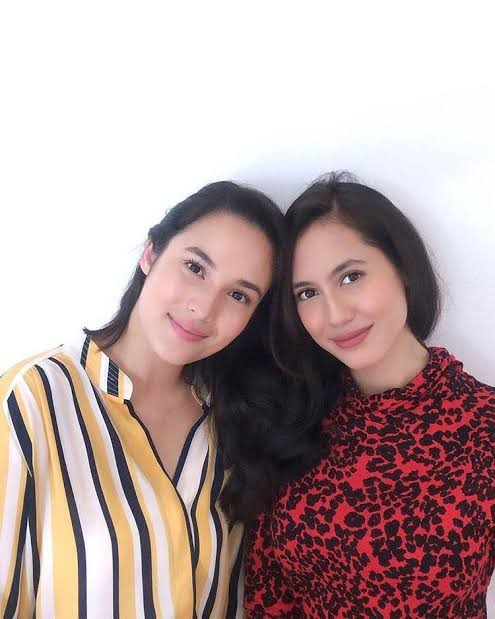

In [ ]:
readb64Recog(base64_string)

In [ ]:
analyticsExtraction(base64_string, model = model)

Action: emotion: 100%|███████████████████████████████████████████████████████████████████| 4/4 [01:33<00:00, 23.31s/it]


There are  462  representations found in  representations_vgg_face.pkl
find function lasts  48.460506200790405  seconds


Action: emotion: 100%|███████████████████████████████████████████████████████████████████| 4/4 [00:55<00:00, 13.97s/it]


There are  462  representations found in  representations_vgg_face.pkl
find function lasts  3.662712335586548  seconds


{'numDetectedFace': 2,
 'result': [{'faceId ': '0',
   'base64str': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCACNAH4DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD34nnFY2teI7PQ7cyztvcnCxKRkmr2pXa2OnXF0ylhDGzkAZJAHavnjVNRkmvJnl3b5HLEn1J9KuEb7iZv+K/GL67LFkGGOIHagbO

# Klasifikasi Image

dijalankan di google colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras
import tensorflow.keras.metrics
from tensorflow.keras import layers
#import numpy as np
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
def trainmodel(data_dir, img_width, img_height, modelname, batch_size, initial_epochs, fine_tune_epochs,  base_model):

    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
      data_dir,
      labels='inferred',
      validation_split=0.2,
      subset="training",
      seed=123,
      image_size=(img_height, img_width),
      batch_size=batch_size,
      label_mode = 'binary')

    val_ds = tf.keras.preprocessing.image_dataset_from_directory(
      data_dir,
      labels='inferred',
      validation_split=0.2,
      subset="validation",
      seed=123,
      image_size=(img_height, img_width),
      batch_size=batch_size, label_mode = 'binary')

    '''
    class_names = train_ds.class_names
    file_paths_train = train_ds.file_paths
    file_paths_val = val_ds.file_paths
    intersection_set = set.intersection(set(file_paths_train), set(file_paths_val))
    intersection_list = list(intersection_set)
    class_names = np.array(train_ds.class_names)
    print(class_names)
    '''

    AUTOTUNE = tf.data.AUTOTUNE
    train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
    val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

    #data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"), layers.RandomRotation(0.1)])

    base_model = base_model

    base_model.trainable = False

    inputs = keras.Input(shape=(224,224,3))
    #x = data_augmentation(inputs)
    scale_layer = tf.keras.layers.experimental.preprocessing.Rescaling(scale=1 / 127.5, offset=-1)
    x = scale_layer(inputs)
    x = base_model(x, training=False)
    x = keras.layers.GlobalAveragePooling2D()(x)
    x = keras.layers.Dropout(0.2)(x)
    outputs = keras.layers.Dense(1)(x)
    model = keras.Model(inputs, outputs)
    model.summary()


    model.compile(
    optimizer= keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()])

    print('Transfer Learning is starting')

    filepath= '/content/drive/MyDrive/UAS PCD/models/' + modelname + '-'+ 'TopLayer-' +'weights.{epoch:02d}-{loss:.2f}-{binary_accuracy:.2f}-{val_binary_accuracy:.2f}.h5'
    #filepath= '/Users/irvanseptiar/MKI/CV/terrorismClassification/' + modelname + '-'+ 'TopLayer-' +'weights.{epoch:02d}-{loss:.2f}-{binary_accuracy:.2f}-{val_loss:.2f}-{val_binary_accuracy:.2f}.h5'
    checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, mode='min')
    history = model.fit(train_ds, epochs=initial_epochs, batch_size=batch_size,validation_data=(val_ds), callbacks=[checkpoint])
    print('Transfer Learning is Done')

    print()
    print('Fine Tunning Step is starting')
    base_model.trainable = True
    model.summary()

    model.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()])

    #filepathTune= '/Users/irvanseptiar/MKI/CV/terrorismClassification/' + modelname + '-'+ 'AllLayer-' +'weights.{epoch:02d}-{loss:.2f}-{binary_accuracy:.2f}-{val_loss:.2f}-{val_binary_accuracy:.2f}.h5'
    filepathTune= '/content/drive/MyDrive/UAS PCD/models/' + modelname + '-'+ 'AllLayer-' +'weights.{epoch:02d}-{loss:.2f}-{binary_accuracy:.2f}-{val_binary_accuracy:.2f}.h5'
    checkpointTune = ModelCheckpoint(filepathTune, monitor='val_loss', verbose=1, save_best_only=False, mode='min')
    historyfinetune = model.fit(train_ds, epochs= initial_epochs + fine_tune_epochs, \
                                initial_epoch=history.epoch[-1],\
                                    batch_size=batch_size,validation_data=(val_ds), callbacks=[checkpointTune])

    print('Fine Tunning Step is Done')
    return model, history, historyfinetune


In [ ]:
if __name__ == '__main__':
    #base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))
    base_model = keras.applications.Xception(weights="imagenet", include_top=False, input_shape=(224,224,3))
    data_dir = '/content/drive/MyDrive/UAS PCD/klasifikasiImage/'
    img_width, img_height, batch_size, initial_epochs, fine_tune_epochs = 224, 224, 32, 10, 3
    trainmodel(data_dir = data_dir, img_width = img_width, img_height = img_height,  modelname = 'senjata', batch_size = batch_size, initial_epochs = initial_epochs, fine_tune_epochs = fine_tune_epochs, base_model = base_model)


83697664/83683744 [==============================] - 2s 0us/step
Found 1269 files belonging to 2 classes.
Using 1016 files for training.
Found 1269 files belonging to 2 classes.
Using 253 files for validation.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)        

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


32/32 [==============================] - 332s 8s/step - loss: 0.3221 - binary_accuracy: 0.8563 - val_loss: 0.1369 - val_binary_accuracy: 0.9763
Epoch 2/10
32/32 [==============================] - ETA: 0s - loss: 0.1268 - binary_accuracy: 0.9646
Epoch 00002: saving model to /content/drive/MyDrive/UAS PCD/models/senjata-TopLayer-weights.02-0.13-0.96-0.98.h5
32/32 [==============================] - 176s 6s/step - loss: 0.1268 - binary_accuracy: 0.9646 - val_loss: 0.0909 - val_binary_accuracy: 0.9763
Epoch 3/10
32/32 [==============================] - ETA: 0s - loss: 0.0893 - binary_accuracy: 0.9823
Epoch 00003: saving model to /content/drive/MyDrive/UAS PCD/models/senjata-TopLayer-weights.03-0.09-0.98-0.99.h5
32/32 [==============================] - 176s 6s/step - loss: 0.0893 - binary_accuracy: 0.9823 - val_loss: 0.0731 - val_binary_accuracy: 0.9881
Epoch 4/10
32/32 [==============================] - ETA: 0s - loss: 0.0726 - binary_accuracy: 0.9872
Epoch 00004: saving model to /content/d

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import base64
from PIL import Image
import io

In [ ]:
def loadModel():
     model =  keras.models.load_model('/content/drive/MyDrive/UAS PCD/models/senjata-AllLayer-weights.11-0.00-1.00-1.00.h5')
     return model

In [ ]:
model = loadModel()

In [ ]:
model

In [ ]:
def predictImage(base64_string = str(), model = model):
    images = base64.b64decode(base64_string)
    images= Image.open(io.BytesIO(images))
    images = images.resize((224,224))
    images = tf.keras.preprocessing.image.img_to_array(images)
    images = np.expand_dims(images, axis=0)
    prediction = model.predict(images).flatten()
    predictions = tf.nn.sigmoid(prediction)
    result = tf.where(predictions < 0.5, 0, 1).numpy()[0]
    if result == 0:
        finalResult = 'pedang/pisau'
        confidence = round(100 - (100*(predictions.numpy()[0])), 2)
    else:
        finalResult = 'pistol'
        confidence = round(100*(predictions.numpy()[0]), 2)

    return {'confidence': confidence, 'result': finalResult}

# Prediction Image

prediksi 10 image baru

In [ ]:
#image 1
base64_string = '/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxAQEA8PEBAQDxAPEA8QEBAQDw8QEBAQFREWFhUSFRUYHSggGBolGxUVITEhJSkrLi4uFx8zODMsNygtLisBCgoKDg0OFxAQFy0dHR0rLS0tLS0tLSsrLS0rLS0tLS0tLS0tLS0tLS0tLS0tLSstLS0tLS0tLS0tLS0tLSstN//AABEIAcUCpQMBIgACEQEDEQH/xAAcAAEAAgMBAQEAAAAAAAAAAAAAAQMCBAUGBwj/xABFEAACAQIEAwUECAQEBQQDAQAAAQIDEQQSITEFQVEGEyJhcTJCgZEUI1JiobHB0QczcvBDkuHxFSRTgqJzk7LSY3TCVP/EABkBAQEBAQEBAAAAAAAAAAAAAAABAgQDBf/EAC0RAQEAAgICAgEDAgYDAQAAAAABAhEDIRIxBEFRE2FxIrEygaHB0fBCUpEU/9oADAMBAAIRAxEAPwD6fhFanTXSEF/4lxXTXhj6R/IzItZAxJCJJMSQJuSiAUZEmJIEhEIkCQQEBKJIAEghEgAAAJIAEkAASCABIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGABAAAAAAAABBIAgAAAABAAAEBgAAQAZBIAgEkAAABAJIAAACASCCCCQBAAAAABYAAESQiQBJBIEgAbAlAIokkgICQAAJICAEhC6va+u9udgJBAAkBAAAAAInNJXbSXVuy3sT5cy6okAIaAERmnqmmuqd/IkmgAAAAAACUAAH+wAAACCQBAJAEAAAAAAAAEEkAAAAAAAAAQwAAAAEAACAAAIBAAAAACAJAJQEAlI832y7WU+H09EqleS8FNuyX3pW1t5AejDPPdiu1MOI0XOyhWp6VaaeifKcb65X+afQ9ETexiCSGBAAAgEkAAAAAABEkElEhEHK4niZUMRRqyn/y81KlUi9oztmjP8Gvkb48PO6S3Trg8pw3iFeWbC1JyjXliadSD3f0WT77ptli4P1GMxOIp/8AEMH3ku+quNTA1Xa6hiHkUdv8Oalf7uU9/wD8mW/Hff8At+WP1Je3qyUed4bjamMgslSVOUcNOFXLq4YlvJr5pxkzRr8Zr5cJJSaeGqW4hHrG/dXenVqfoiT4mVtm+z9SPYmlPhVFzlVcHnn7Uu9q3dttpWMeE1HNVark5RqVpulqrKmrRjl8nbN/3G+eNlwtamsp28/w7BweLxkG6rUO5cV9JxDilKLvZZtHdHWo8NpRmprvHJbZq9aS/wAspWNHhsl9NxytZ5cM733WWWljtJHrzZZeUk/EZmM0hg892dpTq4ejXq4mtKSlOTtJQg1GrLwyVtVZW+BhxPF1I4aeKo1K9RRTrQqeCNJw3Xh5xsP0P6vGXeuiZ9belORUo34jTm1osHNKVle7rK6vvyWhlXxbqVoYaE+7cqPfScbZpRvbLDpq73NfD0lT4hCHeVZueElJRqSuopVop2/AvHx3He/dlTPKXX8uhiuIxo0pVq/1UVNR3c3aU1GF7c22tDZrykl4Y5m5JO7ypLm2zx/EHOrwunOpWqZvpMFKeaN5f8+oq/LRJW9DucSjOk6CjWqSz4ukpZpJtxd/BttzLeGdave7/okz27IORhcRLE1cQs7hToVO5UYO0pSSTcpPktdEczHYyvSocYpqq39Fw8qlGtKznByoSnklbfLZP0aMTgtut99f9/1b85HqgcLikalKNLERxFW/fYVTjJx7uUKk4wksttLqVzcxMs9ScIVKsnBJSp0nGKhJ7Xm+fkT9H72eeo1+1q/5ZaJ/8zg9/wD9mGvqczjdGK4tg5dz37qYLFwyprwunVpSU1dpL2rCvjalTBSdS6nSx9Ck3KzlaGLgk5W0vY6GPqNcTwMUlaWE4jdtarLPDtWfI6eOXjmvfWX9mb2zr4aNtMDOVmtO9jFf/O1tTo0aXd93Tp04xppa62UfJLm7myzm1qkljaEVJqDo1W4aWclKNpPmzmlufWmrPFq9mnOOEoqEIu9SpdJ5YRi6ks0tbvblzO4eV4bXmsPw5Rm43xkqdRKyzRtW8D+KRt4VVa+Jx9OdarCFCrQjSjTyxtGWFpzbbtfeTPbl4t55Zetb/vpjHLp3ajaTaV2tl1fJCm24pySUmldJ3SfS551VcRThj6LqymqFJTo4hpZ1mUm4SezlG2/mjYlOcquDp99OEamFqSmo2vKSjDxZuTVzz/Q/f/uttef7O4DzssdLCPiEqlSdanhsNDFxhJqU1HJPNG/Rumbiw9Sph1UliJKrOn3inTaVKLccyyrZxSa331M3h1q79/7nm1ONKVPHYCupT7uTq4acMzyXqJOM2tr3jb4m32pzvDTpUrqtV8FJp2tNJz18vCaeKU8ZwyFSSSrOjCvHLdJVYPNF/NfibeAxqxNShUi7xjh1V02z1bJfJRfzPadeOV/8Nz/56S3/AFXcK4l3mEp4mayXod7NNaxai3JfNP8AAdm8LKjhMPCd3U7tTqNu772bc5/+Un8jiUa2SpiuHuSvUxdF0U764bEXrVF6Lu68fkdbjOMqKrhsPSlGnLEd7LPJP2YJNwjbaTv8kTPju/GdTLufxrf+6TL7/Drg5XD8LXo1Jyq14ypShdQebNGS3kpSe1uRzuM4ypDC1sXRnWqulCpWhK8IU5Rir2yveNjznDvLUu9t+fT0wODj8RVnjMFQjVlSp1sLi6s8ijdypyw6jZvbSozJQrUMTRgqs61Gv3inCraU6LjByU09PDdWs+bQ/R699+//AIebuA4/CqksXTdZ1JwjKdSNOFN2cFGTjdvnLS5zZY+v9Ek3VtKnxChhu+UU3Up/S4U3fldp2+A/Qtut9r5vVMg4uJhOjisJavUlCvUrU6kKjUk/qpTjbS6acPxNPieIxMXVqTpVXRpTcoSw2IhBd1FJtyi1rK+bQs4N2avv/nTNz1HpgVUa8ZU41F7MoKavo7NXV0cvAUniqdHEuvVj3iVRQpTUaaW+XbXo2ec4/dvUb8o7Iucp4qVbF1cNGTpwo0qVWeX26jquSik+UVlevmVUqlSGJqUO8lOnLDutHNZzpSUstk+j316Gpw29fftPJ2gePwssQ48MqvE1W8RNwqx8KjKPczkntpK8Vqdfs/WqOpj6U6jqKhjJU6cpayUHQpVcjfO0qjS8kjWfB4ze/wDu9Ey27AAOdoAAAAAQAABAAAEAAQAAIAAEEgCCUCUgFiUjXxuOpUIudapGnFc5NL5HzrtT/E5JSpYNa6rvWuX3UB6nth2upYCDScZ12nlhf2fvS6Hwvi3E6mJqzq1ZOUpO7b/LyNbHY2pVk5zlKUm7tt3bNdzGjbv9jePPA4unVu8l8tWPKVJ+18Vv8D9ERmpJSTupJNNc01o/kflWHtL119NT9Ffw+xMqnDMHKbvKNN023zdOcoX/APExJqlegIJINAQSQAIJIAAAAAABJAAkqxeFp1YOnUipwdm4vZtO6ZciS4243cFH0Kl3ka2SPexpulGdvEoNpuK8tF8hUwNKdWlWlBSq0VNU5v2oqaWa3rYvJNed97Txn46UYbCU6bm4QjB1ZupOy9qbVm2Yf8Oo/XeCP/MfzdP5nhy6/A2iRM8ve/ZqNSfDqMqUaDpx7qGRRgrpRyNZbeljc/18yESZttVyuG4GrDFYytPKoVu5VO0m21COrkuWrZ1QiTWedyu7/CSa6UYbCU6dNUoRSppSWXyle+/W7+ZqR4Fh+6+j5G6KWVUnObhGPKMU3ovI6QLOTKfZ4z01MRw6lUcHKHipq0JRcoyguaUlqkzKjw+lCaqqCdRRcO8fiqZG03HM9bOxskk88tezxjn1eC4eVD6K6a7nR5VeNnmz5k1qnm1v1LVw6j4PBfJNVVdtvvErKTfN2NsF/Uy/J4xoz4XSdR1UpQnK2eVOc6eeyss1n4viZy4bSdKpRyRyVozjUi/fU1aWZ7u6b3Nsrq1owV5O35v4Ey5cpN2rMfxGOIwtOpFQnFSjGUJKL1s4NOPysin/AIZS7ydVKUZVbd5lnKKqNKyckuduZm8fT6v/ACsrfEY39l26nlPkyesm/wBDK/TGHB8OqbpKmu7dTvXHWzqZs2bfe5r4zh9WePweJjkVLD0cZCd28zlV7vKorb3OZ1qc1JXTuiT2x5st73vf+7GWOhFMsLB1FVcb1IwcIy5qLabXzSLiTEtiWNKlwuhGNOMaay0akqtNfZqO95+vikcvCcLpTxuPqSU1PPhNY1ZR8Kw0bK0Wrap3uehNXD4GMKtesr5q6pKa0t9VFqLWm+uvoj2w5rJlu92f7ys3D1r6WVcLCUJUpRvCatKPVNa36sLCU81OeVZqUXCm/sxdrpfJFwPLyv5b0o+h08055I5qsI06jtfNBXtF9V4pfM1sPwWhTj3cYyVK1lSdSpKlGP2VByso+Wx0Qa/UynUqaiFFWStokklySXI4vZrg0sL9JTay1cRKdO0nJxptK0ddrO+h2wMeTKY3Geqlxm9uPieCKePw+O8N6WHr0ZRs7tzce7af3U6i/wC46GNwNOslGrBTUXmjfRxkveTWqZsAt5crrv1NRdRq0+H0k28uZuLg3OUpvK914nsa0uBYd0ZYdxboOLh3Uqk3BQfupXtbyOmCfqZ/mp4x57i/DaVXG4FTUrU8PjsmWo4Wf1CvZO70W528PhowVo30Vryk5SaXm9TCtgYSrUa79qgq0Y9bVFG6v08K+Rsm8+W5Y4zfr/lJj3WhT4PRjKUoKdPO25xhUnCnKT3k4p2u+pbLh9J040nTj3cZQnGKVkpQmpxfrmSZtAxeTK/bWoprYaE5U5yipSpSc6berhJxcXJedpP5mrHg9FZ0ovJOTnKnnn3Tk3dvJe2r1OgCTPKeqeMUfRKfeKrlXeRg4Rl0g3e1ul0asOCUI58sZQjNycqcalSNOTlu3BO2vM6IH6mU9U1GjiOE0ZzjUyuNSMVBTpznTlkW0G47ryZdRwkIZrLWek5Ntykrc5N3ZsEC55XrdPGNSnw6jFUYqCSw7zUlraDyuN18GyzD4WFN1JQioutPvKjW8qmVRzPq8sYr4F4FzyvurqIABkAAAAIAAgAACAABAAgAAAAAfNvRLe+iXqc/jXG6GDhnrTS6RWs5eiPkfartxiMY3CDdGhyhF2cl1kwPe9oP4h4TCtwp3xFRb5PDTT/r/Y8LxT+J+NqXVPJQi/sRvL/MzxkkVqAsG1juKVq7zVak5t/ak2aTaMqkCvL56lgiRg2Y1boyoUnLl+7Y2aWYSEpNOMXKTajCK3lJ6JfNo/SPZnh30TB4XDXu6NGEZPrO15P/ADNnzP8Ah32d+vhWqK7prOo8otLT4n1lTMi65FzBMyTAkAACCSCgACAAABIAEolEIkASQSAJAKBIAAAICQABBIIAkBDzehFkYVqqisz+Byak3J5n8F09DPFV3OXktis+dz83ndT1Hfw8Uxm6xcbkNWLCUc2nvtFGtKOqfquTOph8VGfk+jOU4mK020Pbj5ssL+zy5OLHN3Qc/DY/3Z/5uZ0ItNXTuj6OHJjnOnFlx3H2kEEm3kAAoEkEgAAAAAAAAAAAAAAAAAwGBAAAAAAQSQAAAEAMgAAQAIJIAEEgCCQaPGOMUMJDPWmo9I+9L0QG89NXolu+h4jtX/EClh81LDWq1dnLeMX+p5HtT24r4tunSvRo9E/FJebPJqkBdxDH1sRN1K03OT6vY1Wi7KYSQXSrIRboK1SxpzrP0A6EKCegxGBsrpHJc35/Muw/EZwa1zR5xk7proNppVXj1PW9huGKu5ZUnNW1e0I/aPPY5Rko1IezUTdnunzT9D2v8J6Uu8ry91QhF/1Xb/Izkr6RwrBQoQyR3espc5PqdKMjVps2IAXxZYiuJmijIi5JFgiQEgUAAQAAFSASECQCgiQCCUEAUSAEABIAAAAAEQDS4jX9xc/a9OhutnGxD8ck+v4HP8nKzDp0cGO8kIysYxRmkfOkdyCSbEWKFiMpmibFFTiZ0a0oPR/B7GVjCURNy7iWS+3SoYmM/J9GXnDcf9+ZtYfGuOk/Euq3Ozj+TvrJy8nx/vF0gY05qSundGVzrl3OnLZZ7AAESCCSgAAAAAAAAAAAAAAEAAAAAAEAAAQSQwIuAABBJAAgkWAWIbSV3ZJatt2SXW5zuOcew+DhnrTSfuwWs5fD9z5L2p7b4jGOVOD7qjfSMXrLzk+YHtO1P8QaVC9LDWq1dU5+5F+XU+XcQx9bEzdStNzk+rbS8kiijRb11ZsRpAUwiW2M3FI1q+IUd2UTORq1qyXqatfGN3S0/Mt4Xw+pXqRiovV/EztU0cNKo+reyWrPX8J7B1JpSqtUk+TTc38Nkem7P8Ap4ZKUkpVettI+n7nbdS5Nq8nU/h7QtpWmn504W/f8TyXabshVwqz6Tpt2U49XtdcmfWs5Ti6UatOdKaTjOLi09tQPiODw052oQjmbmpR6JtWa9NvkfZ+yfBVhKEafvy8VR9ZdPgcLsn2alQqTqVUtJtQ6yS2Z7emEXwRsQRTTRsRRRnFFiRikZpAAAESAAIAAAAkKEgkIAEhQIEhAkgkAACgSQSAAAAAkgxnscTF/zJM7cjhY2eSbvtJ3v+hy/KluLp+PlJkypyLUyiDT2aMz58rusWkmCZmmaiJsACogMkAY2IaLLEZbjRthTm4u60/I6FHFp76PryNHuzWrT5LZbs3jy5cbGfHjm9AmDz+FxU4S5uL93r+x16OPpS0zpS+zJpM7eL5GOf7OPPhyxbIF/wC9Ae7ySCAiokAAAAABAAkEAAAAAYDAgAAACABAAAC5FwBJqY3HRpLVOTe0V19eRpcR7QU6FKNSUZZpNqMFu3a+/QxeTGe61MbXWnJJNtpJbtnneM8duslFtPdy2v6HmOI8exVeajtF3cVFeH4rdstw9VSkqM1kxGVzUWmsyXNP9Dh5vk3LrB18XBJ3k43aHg8sS5Vk5Sq+/Fu90uaPMRw6hvvtY+mxasppqNWG8XzXM8v2kwC1xFJWUl9ZFe6+dvIvxvkf+OVXn4d94vPxj1+RXiK6itXY0sZxDJoneX4I5Upzqvr+SPobcTbxPEeUfmalOlOo9L6/M9DwDshWxDUrWhznPSPw6n0LhPZ3D4VK0VUn9uSv8lyM7XTxPAuxVSpac13cXzktX6I93wzhFHDL6uN5c5vf/Q35zuRFXAFkaZnTpm1TpAa3dEOkdBUh3Q0m2lTgbVOJYqRnGBRnTRfFFcEWxAzRkYoyCJABQABAAAAAmwUJBIEEgASAAgSAARJAAkAFBEkEgAABjI5vEsH3is/wOoYuJmyVqXTyVTDVKe12vky7D4/lL+/gegq4dM5mL4ansrehy8nxvuOnDn17IyT2dyUzlyp1Kb5tG3h8ZGWj0Zx5YXH26sc5l6bamWFKRkpElWxYCEySolGSRjYlytr0KjGtUstNWzUWl7+ynq+suhc22/N/gims4pa+zF6L7TJe02pqTcdd5S9ldF1OXVwzzXerbs3zzdEzqKL9p6N6/wBEf3L8HQ95rT3V0X7mNbblbXC8TKEVGeZrq220dWMk9U7nIlBk0qri9NDr4+e49Vz8nDMu464Neji09Ho/wZsXO3HOZTpyZY3H2AgGmUgIAAGEAABUAAABAAAEACAQ2AFyCLgSQ2Em3ZK76G9h8IlrLV9OSCvO4vh1VynWTtT0avrJaWcsrKeIdnamLp3WKnOm0r4epClluvezJJ3vqmrHsJrkceP/AC89P5cnb0b1seOXHj703M7p8nrU6mHnLD1Yy72DWTR+NX300R6OniW406sks9Pw3trZ6NHqe1vZ+OMpqrT0rQTySW8l9lnzynjJRjKE9HGTUk97p2+Z8/n4/wBO9O3h5POOnj8Rrmiul3+fwNCUo+KLfhnFu2/qVSxu8d27JebfI38BwmcrTn4ddOtjn4+PLPJ655zGPmtPs/UrV506cXJKTtb830Pf8D7GUaCUq1qk98vuL16noqFCnSTVOCjdtu27b5tktn2sfUfNy7tqXOySVkkrJKySXSxW9TNQLYUTTKmNM2KdIvp0TYhTKiunSNmFMyjAtSAwUCchakLBFWQKBdYWArSM0ibEpFBEk2BAABQABAAAGdiDNmNgoCQBBIAAkAAAAgASACARRIAAAAgAACDGUTMWCtSvhk+RyMZw3nHR+R6KxXOmmZywlaxys9PLwrzpu0tUb1GvGSumb2JwSaehxcTgZQd4aeXI4+T4/wBx1Yc/5dAzUjmUMdbwzVn15M3YTT2Zy2XH26dy+m0iqrPlyW/m+hjKdvUpjVVnJqyh53vISpUV62XR6SlrJ/ZialGp3jUnt/hwfP7zKas+9eqdr+P70ltBeRuQpuNtL1Z7fdRjdtXWozpwzzyLWMHeb6y5ROlFWKcPSUIqK+L6vmzPNc9Z0i1FU0hKZCHs9MLW3LqOIcerXRhpWMJRsWW43crNxmXt0qNWMtn8Cw48NHobdLFte0rrrzR2cfyJesnNycGvTdBGeNs11be5FOopK8WpLqtTomU/LnuNn0kkEFRJAAAEACSGCGBNyAYtlEsxuLkRi27JXYQci6hhnLXaPV7v4Gzh8GlrLV9OSNuwVhSoqK0/3M7C5GYIM18Th1NNNb3LzncZ43Qwsc1adm/ZpxWapN/ditWRVGGxLoyyVHaOnifLo/Q8D/EXhEo13Upx0q2laPvS8vO9h2s4xi8XFfVLDYfMvC3etNffa9n0OxwfGU+IUPodfSrBfVTb9q3K/W34HLyXHK+Fe2O8f6o4fZ7g7pxjUrxTqKzjF6un1v57HclI1MNKdOcsPWf1kPZf247fNG7GmenHJJqM5ZWq1G5ZCkXwpF8KR6SM7UQpGxCkXRplkYGmVcYFqiZKJkkEQomSQJRQAsTYAiUiUiUgISNXinEKWGpTr1pZYQV31b6Jc2XYzFU6MJVaslCnBXlJvReXr5Hw/t12uljp2jeGHptqnD7b+3Lry+QH1zsz2kw/EKcp0W4uDtOnOynG+z05M7Nj8/8AYfjbwWLpVb+CbVOt0cJO1/g7H6BT6bbr0MiLEEg0IAAAAAWkEgioAJAgkAAAAABIRBIBQCAAkAAAAAAQAAAAACKNFFWgmXgaNuLjeHJ8jlSpTpO61XQ9bKFzVr4VPkeWfFMnrhyXFwVjW77eX+pTWxGdQjDWO6b/APkb2LwTV2jkxhkajskrfDofP5eHLHuOvj5Jl7b+Hgkk3stv3N3DQ9+XtS5dFyRqULTklfbVrr5G43Y8Z09fa1ixFOdzOS6Gxg0ZpGKRajUiWsYmRkQ0a0yxcL+pqYmtNSyxyqy5p7m+rGhJ5m5dSZzpcWlVqVfeu/yMqGKlB3i7fk/U2GYSorkeP9U7lenX3HTwfF4TtGfgl/4v4nRPJ1aPUzwuPq0dvrIfYk9UvJnZxfL+s3Ly/G+8XqWQauB4jTrey7S5wlpJfubTO7HKZTc7cdxs9oZAZDKibkNkXMWwJuQ2IQcnZK50MPg0tZav8EBq0MK5avRfidGjSUVZIzsCokqr14wi5TajGKu23oka/EuJU8PBzm9loubPkPbDtVVxc5U4txpJvwp6b8+ok2lunY7XfxFk5OhgnljqpV9Lv+i/5s6nYXtr3y+j4qS75ezVdoqouWboz5bg8DOrNU6UHKflsl1b5I9twjsrTpLNWk6lRpXSdoryGSzt6zinaidRulgknbSWIl/Lj/SveONRwEYydSbdWs/aq1HeXw6G0rJJJJJbJLQxZ52txVVgpJp6pnEr4OVGalFta3jJcn+534osdFSTTWjPLPj8o9MctPO9ocdUrVMFVimqyqKFWaXglFWedvk8qkmvM9XRp6L0X5HLXCXeMN45otvbwp31PQU4F4sbPbOWvphCmWxgZxiZJHu82KiZJGVgURYkCwQJSFiKtSMYuUmoxiruTdkl5sDKxkkfPO0n8SYUpOGEiquXR1J3y38keMx/8QuI1V/NVNP/AKcVF/PUD7nWrQgrznGCXOUlFfieW45/EPBYZNU5fSKm2Wn7N/OR8TxnE69V3q1Z1P65uX4bGpmYHo+1Ha3EY6V6srU0/BRg3kXr1Z5qc23+XkMtybW9QullB8ufLyP0T2PxbrYDCVHu6UU/VaH51oaa9D9D9i8K6PD8JTluqUW/jqZ+yu2QLi5UCCSCgAQBeQSQRQAAAAAJIARIAAAAoIkgASAAAAQAAAAAAABAAAVJFgAK6lO5zcXw9S5HWIcSWbWXTyNfC1ISTjrbkX4XHJ6S0fmd+rh0+Ry8Zw1M5s/jy+nRhzWJdmrpmUKvU5d50nrdx68zbo14z52ZxZ4ZY1145zJvxkmWKxpbbFkKoma3FsNkpMiOpXVr8o/P9je2EYqr7q35mvcnJ8xkMW2tySIymUYhIssIVVKBr1qKN0wmMsZSZOXOGt9U1s07SXozfwnHJQ0reKP/AFIrxL+pcyupTRq16F0Zwzy470Z4Y5zt6mjXhOKlCSlF7NO/+xLPEQnUoSzU5OD5rdP1Wx6HgvF3iH3bpyVRLVxTcPn7vxPocPyMc+r1XFy8NwdRsvoYVy1ei/F+hsYbCJay1f4I27HS52FKkoqyRYDGc0tW7IqJOfxHiUaadrNpfBFGO4luo6LqfOO1/aOzdGk803o7au/RdX5EGt2y4/3s3BS0953/AAORwPgdXFvMk6VC+tVrWfXIufqdPgXZRyarYu9tHGhdq761H+iPY3SSjFKKWiSVkktLJchctdQmO+618BgKWGhkpRS6veUn1bLZSFzKMDD0YqBYqZdCkXRpl0jVVIthA2O7CgJEIIuiYKJZFGkZxMkYoyQEgE2KiLEk2PG9q+3VPD5qOGtWr2s5b06fm+r/AAA7/HeO4fBQz15pNrw01bPP0XTzPkPavthXxjabdKivZpRdvjLqcXiXEqlWbq1Jyq1Jaucn8rdP0OZKTbAirVb3MYFsaLZlGFi7NK8gdOyuWZ4oyy31uTYoRVa7Lqmh0uz3AquLqKFOOmmaXKKJVdLsL2eeMxME19VTanVfKyd1H1bPvEbJJLRJWS8jjdn+EU8HRVKmtd5y5ylY6ikSC65JWmZJlGQAKgAALgARUAAAAAAJICBIAAAFAAkAAAAAAAAAAAAAAAAAAAAAIpYwlC5mANHEYVPkcfFcPcXmjo/wPStFc6VzGWEreOdjzFPFSj4ZKz/A24VFI2sXgFK+hyKmHnTd46rocXJ8e+46+Pn31XTVRxNGnjLSaa0zOzXQxp4vMrPRmKW5x5eUdU8a6cJxkrphnLhUcdUbtHGJpZlZlx5N+0uOmwkGRbmncxlJnozpLZjcxdQrlVJs0yqI15S5Mvw9OdWWWEb+fJerPRcP4RCFpS8U/wAF6Hrhw3N5cnNMHFwHApVbSn4IdObPTYLCQpRUYRUV+fmzYSJO/j4ccPUcWfLln7QgG7GjisalpHXzPV5tiviFBav4HIxuLbu5OySvvaxqcR4jClF1Ks1FJc3qeFxPEa/E5OFKToYWLtOfvz8o/wCpLr7GxxztDUrzeGwazy2lNezFebLeB8Bp4f6yb72u95taRfSN9vU2uH4KlQhkpRyrm95S82+bNm5i5/h6TBa53ISEIGzTpGVrCnTNmnTMqdM2YwNsK4wLVAzjEzsaFWUjKXWFgKspNjOwsEYmSJsSkEEinG4unQg6lWahBc2/y6s5PaTtTh8EsrfeVmtKUXf4yfI+Vcd47Wxc3OtK692mtIQXp+pVd3tX23qYhSp0G6NDZy2nUX6I8DVr3uloi2tJy3K4xRRVGnfcvhRit/kS9NjXqV0tFqzNWLa9WyskbHDuDVq7SjGUm+SV/mdPsb2enjKmaWkItZpNaJeXVn13h+DpYaChSiorm/efq+pDb5Fi+w2LhHO6UrWvor/geXqxqUZ6rnqrfM/RrrnhP4g8AhOH0qnFKUX9bFLdP3gPmNe2ludmj6V/COf1eK00U6dn55dV8sr+J4XhfZzE4mpkpx0+3L2IR6v9j7B2e4TTwdCNCnd21nN+1ObSvJ/3yFR21IsizXiXwKLoliK4liAyJIJQQIJIAvIACgJAEIkgAACQAACAAAEkIkoAAAAACAAAAAAAAAAAAAAAQAAFACAIcTWr4ZM2iGSxY89jeG81o+qOdOcoaTTa6r9T1lSFzl4zCpnhycUr1w5LHGcuad0I1CvEYZxd46eXJms8RrZ+F/mfP5fj69O7j5pXSpYtx56dDbjjIy52ZwZ1+pZgMJWryy0ot9X7q82+R5Y+cunpbj7rrznc6HDuCzqeKpenB/5penRHS4NwKNFJzfeVOr9mL8kztJH0eH4uu8nDy/I31ipwuGhTjlhFRXQuJIOyTXpyW79pK6tVRV27GvjMfGnzvLocitXlPxTdo+ulijZxOOc9I6I89x7tFRwkW3JSqP2YJ6tnF7SdslTvRwvjqbNrVR+RyOEdnaleff4pyd9bPdrp5I8uXlmH8vTj48s7+zSq/TOJTzyT7tPSOuSP7s7HDOBOi8ylJT2fK9uTR6rD4aEIqMYqKWiSWhdKknuvifP5OTPO727+PjxwmtORCT5qxt0qRlWoW21RRGrKD0+T2Lx/IuN1kznwb7xdCnRNiFMqwuMhJatQfST/ACZvxitzvwymXccecuN7YRgWJE2JsbYQSAUAAEBYk18Vi4U1eT+HMlyk9rJb6XtpK7aSW7dv1OD2jxuIlRlHBtRqW9trVrpDp6mxLFTnrLwp7JPT4mM3Gms0lZc+iXU4uT5NvWDr4+CTvJ8RqVJuUnUcnO7U813JST1vcrbPcfxD7O3bx1BXaS+kQXvQW1VdZJb9UeFzK176Pb0Ori5PLHbn5MPHJLVymrWjDffkuZVWxjfhgvibvBuz1bEztGDk3u7bL12R6bYc/PUqaJNJ8lueo7O9iate0pru6fNyX6bs9twHsbQwyUqiVWouTXgX7noZT5LRLktEvgZ9jV4ZgqeGpxpUkrLd85Pqy9zMbmSiUQ5FdWCnFxklKMk1JPZp73L8gyEGtgsHTpRy04KEei5/HmbcEQolsIlFkEXwRXBF0UVGaM0YpGaAkkgkIAAotAYIoAAiQCAoAiQAACAAABAIokAAAAAAAAAIAAAAAAAAAAAABAAAgigAAwZr1o3NhlckTQ5OJoXONjcHfSx6v6O5u0Vf9DoYLhcIeJ+KXV7L0Ri4bbmWnkuCdkqk2p1240+UPfl+yPbYPCQpRUKcVCK5Jfn1NhA1jxzH0zlncvYSQzUx/EKdFXm9eUVuzbLanJJXeiXM4mP4xfwUteWY5eK4jUrv7MPspnJ4vxmlhI6u83tFayb8i6/KbdPE4qFJOpVl5u7PC8W7QV8bLuMMmoXs5Ldr9PUo7vEcRqfWSyUr+zfb16s9nwzhVKhBRppLq+bdjj5flSbmHt1cfxre8nK7P9mYULTn45768n+rPSwSISBw7t9u6STqLTEQnyLEiipmvVijZqI0cXO398zGSxz8RJN2ukvM3eG4ydKy1cG/Zlq/VGrhaClJ1H7NPRdHPn8EbM4v4y28o9Wa4949x58msunoaGJhP2Xr0e5dY8c207Rfs6ylzv09Tr8P43dLvdtlNfqjt4/lY3rJzZ/Hs7jsAmEk1eLTT5p3RJ1bc2mJr8QxXdU5VLOVrWXm3ZG0ot7IslRUVeWr6f6CzcPTgcHVTESlVVRyktMidoQWu6+BTLCzo1O6r+OMtYz5SXT1OdxbE1MDifpdH2JNd/T92Sb1f989T2kZUsfh41IO6mrxfOEuafmjk5OK2eP29sOXV24FJRi3CV9b5X1Rk6vuS1SWjfvRNSrdSlSqaSjKyfRrZmTl/mT+T/ZnDldO2fkoPI3Rlqtcl9c1O9sr9NvifIO1/BHh8bKjBPuqq7ykltZvWHwf5n1LH55qDpRcpwqQkstneMpKMt/uuXyN6XDKLnCrUhGdWmmoSavlT3t8jp+N5b39PDnuOngey3YSU7VcRenDdRt4pL9D6HhcNSoRUKUVCK6bvzb5llSqUSkd7kZTmVk2LIQAQiXwgTCBfCBWVXdk92X5ScpRQqZlGBcoE5QMYxLIoJGaQBGRBIAkAIAAotABFAAAAAAkEASCAgiQAAAAEEghAZEMBFBEgAAAAAAAAAAAABjckCLkkEXAkEXDZBFyGwTTg5O0Vf8AJBWLZdRwjlZy8MfPd/sbWHwqjru+vT0NpAYUqairJWRYCColmMnoUY7GU6MHOpJRivx9DxPGOPTxF4wvTpdPen5v9iybS3TtcZ7TRg3ToWnPZz3hH92cBNzbqVJZm92zn1atOjBzqSUUuvM5KqYjHaRzUML9q3jq+iZq2YxibyvTd4l2hbk6GEWeps5P2Iev98jlR4NJyz1J95UftN/lHyO9h+G0qUFCnGyXzl5t82RKm4+h8/5OWec1PTu4MMcfftbgaShFJaHRpVmvQ5tKXQ2YTPlayxfRlmTqU6qZLkc+NQtjiL6cjc5PyXFuRJuUwLUz1lYsRUqWTeun9/M5LUpyWustl9ldTqOzu3svxNGd3JqOkqm76Q9eVy6+2Ll9LbR0X+DS5W9ufJehXXlJWj/i1Hd/dX+iM24wjm2p0/YXWXXzKYz7uLrT/mVPZX2Y8l+PzLakjCrRzSVKOy1m/wC+oxGFlHWNn5bM3OH0MkbyXjlrLy6L4F81fzMeO+3pMtOVhcbOm7xbj1T1i/Vfqen4ViXXjmcXC2je8G/J9fI0qXDYrxVdeahzfqbc8TpZWilsloreR3/G4+TH3enF8jkwvqOl3sYq0d/xKpXkc+hio3s9DZlil10OtybaPEsNBpp63T3PG8K4vPhWIcXeWFqvxQ+z96PmvxR6DtDx2jTjbOpT1ShHV/I8bicHicanJQairtehjPWt/hrH8Le0fbKEuIzlCzoOMIyk9G7L27eVz0+EpOso1E7Qa3+0uTX7nzfHcNzwsv5tNWa+1bl69Drdhu0ndWwtV+Bu1NvRQl9n0f4HFJhyZbrp3lhPF9CgowVoq36lc5kTkY2OvHU9PG9+0GSiZwgXQgajKuEC+EDKMC6MTWkrGMC2MSUjNIqISFjJImwGNiUjIARYEgIIAkAAAAAAtAAUAAAAAAAAAJAAAIAAAACggAAYQAEkAASCAAAAAEACSAAIZBJDAGNzKEHJ+H4vkjdo4dR13l1IqijhXLWWi6c2b0KaVktETFGaCCJMXIqxFeFOMp1JxhCKu5SaSS+JRazz/H+09LD/AFcLVa32E9Iv7zW3oef492wnVzUsLenT1Uqz0nJfdXJeZ5i8Ypu/m5N6/G5uYsZZfh0MVj6teeepLNK+i92PkkaGN4tGk8kV3lSWkYR1cn6I50cVWxNR0cJHNZ2qVG7U6XnKXXbRav0u16bg/A6eG8V3VrS9utJK/pH7K8kTLOT0Y4W+3PwPA51JKtjHme8aCd4Q6ZurO8o8kWMmMTnytrpxknpXlMZUjchSLO5M+LW3FqYZrVaERqW0lp5nalhzUr4W/I8s+GZN4cmmtuvIspNGvOnKG2q6MQrJ+T6M4eTg06+PlldCM7Gwqt9OZzo1C+ddRj957L9DzwllbyvSvG46GbuldtK7SW76N/3sWU428F/FLWb6LocvDpqbqaO/7aHQg3ldtZz3b0se2N287CbVSfSlR18nJciMPetU71/y4O0FybXP0RXVjmtQpvwrWcuXm/U6+Fwtoq6yU4pWfNrlbqJjcrqFsxm6mlTlJ2Xx8vVm3BRp7eKX2uS9Ct1dMsdI/i/MxSPo8XBMe77cPJz3LqMqkuurZzuJcQp0IudSVvsx96T6JGjx7tBDD3hC1StazXuw/q6vyPDYjFVKs3OpJzk930Xkuh72vB0uI8XqVpZruEeUIv8AN8y3G8Sr9ystbIvZk3q/hzuaeEwM5ySyuUuUNrL7z5I9LhOBQVnU8cltp4Y+UV+py8vyJh1O66OPgubzHA3GNZSq0Z1Kb3k34m77tdPI+h0MTTlBd21l5JaW8rGjLDxStlVvJGvLDZXmg2mcs+Xlvt1X40101ePcJzN1qStLecVz80eJ4vw7OnVppuaTc4RWs0t3FL3vI+i0sXymrfe5Gvj+BRqyU6cu7k2szSupLqrbSLryvlx/5sXqeObc4RSqKhQVV5qqpQ7x/eav+xvRgZUaVklduySu93ZW18y+MDuwnTlvthCBbCBnGBZGJ6MsVEzSJSMkVEJGSCJQQRIQAAAASQSEAAAAAAAAWgAKAAAAAAAAAAAAAiQQAJABQBAAkEEgAQAJBAAAAACAAIuBGLk7L58gIbLqWGb1lounP/QtpUVHzfX9i9IikY9NEiyKIROYDIhswqVFFOUmopatt2SR4XtH24fipYPzTrtaL+hc/Usm0t09Jx7tFQwitJ56rXhpR1k/N9EfO+LcbrYuWaq/CneFKPsQ839p+bOZN7zqScpS1lKTvKT6nNrY1yl3VGLqTloox1f+xvUjzttdHE8QjTV5S2+H4Dh/Bq+NanUcqGH+VSquivsvM6nA+yqg1WxTVWrvGnvTp/8A2Z6aTMZZt44NbB4SnRhGlShGnCO0Yr8X1b5t6ltjOxlGmeT13pXGBfTpFlOkbMKZrSbVwpFsaZbGBnlGjbXdMqnRN7KYygNG3IrYfyObicH8PQ9HOkatagYyxlbxy0805yj4ZK6ezGJruDikr6ddun4nWxGF8jkY7Cu997Wt8Dlz4fuPbHkZwqa6/H1K3Uk5zlZt2yU0r3emtviW4HDTrZ0lzTvso6c2dvB4eFH+X46j0dR8vKPQ88ODLK69N5c8xhwzB91FSrJOpLXu07pf1dTceaWsvkthCnzerJxWIp0YSqVZKEIq7bf4eb8j6HHxzCajjz5Lnd0yW1eiW/Q8h2h7Wb0cK+qnX6eVPz8zl9pO1FTEt06d6dDa20qnnLovI4mFoym7LZbvkv3N26ZkTFSk+rb822+rZ3+EcEcrS+c/0h19WbnBuz/vTTUenOXnLovI9LGOVWW3kfP5vkb6xdvFwa7yVYTBwpxyxVlz6t9W+bLJRMsxi2ce3XpiyqUOZfoVyJVa1Wkn6ldOc6fs6ro9jakipxJLZ3C4yztv4TGwnpfLL7Lf6nQjE8jxHCSqQlGLyt2s/Rp/oOG8UxmHtGrFVqe11LxxXk3ud3F8rfWbi5Pj/eL2MYmSRVhMVCqs0HfTVP2l8DYsdsylm45bNe2NiSQaQQAKiUAAAAAEgAAAEAAAIJIAuIACpBAAkEEgAAAAAQAAAAAAAAAAAAAACAJIAKJIAAgNmHeRzqndZ5JtK6vZbs2oU0vN9enoBXCnffbpzZsRh8F0EUZZiKzQcirMStm27JbttJL4lGWc53HOP4fBRzVp+Jp5KUbOpP4cl5s8p2q/iFCjmo4PLUqbSryV4Q/pT9p+ex82r4ipWnKrVnKc5O8pTd5N+vTyLIxcno+0fayvjHZvJSv4aUXp6yfNnn5Ypx1b2+XoadXEpeGOsnokrtt9Lcz03AOxc6jVbG3jDRxw6fikv/yPkvuovlIkx25nC8DiMc2qXhpKVp15Xyryj9p+mh73gvBaOEjamm5v2qsrOpN+b5LyR0KcIwioRSjGKsoxVopckkDzttesx0NhIyjEuhAisIUy6FMshTLowCVhCmXRgTGJnY0iEjJIIkCLBokAYOJVOmbFiGiaGhUompWwkd5vLHp7z9OhtYzHxhpHxS/I0oUpVHmm2/IeJtlB3WWCyQXJczZo0LbFlKjY4/aTtRTwa7uFquIa0h7sL7Sm+S8t2VG7xfitHCQVSq7yd8kFZzm+iX6s+aca4zWxk81R2in4KcfZgv1fmzUxeKqV6kqtWbnOW7fT7KXKPkdTg/BnUtUmmqa+cv8AQmWWptZN3TQweDc/E/DC+/Nvoj1fBsEoWk4rT2Y9PN+ZsLDwSSyrLH2bcjbppcj5HyebLK6x9PpfH4cce77b1Osiy6OcWQqteaPCZ/l03FtOPQxJjMyuaYYXMWZuJi4krUY2MWjMxaAxaKZx8jYsYSiEamVxd4uz6rQ6eB461aNZX5Z1+qNWVM1qtLyN4cmWHqvPPjxy9vX05qSvFqS6pk2PGUMRUpO9OX/a9n6o72A47CpaNRKnP18L/Y+hxfKxz6vVcXJ8fLHuOqADqjwAAVAAACSCQAACAAAAgAWgAKAAAAAAAAkEAIkEACQQAJBAAkEAAAQyiQQSAAKsTXhTjmm1FefN9EBacbinG1C8KVpz2ze7H92aeK4jVxEu7pJxi+S0b82+SOnwrgcKdpVLTn092JlWjwDh9Z1vpNRvZq8t3fp5HqEQkHIozuYpmP8AfkeQ7T9u6OGvSw9q1bbN7kP/ALMuktj03FuLUMJDvK81Fe7Hecn5I+Udqu2lfGN04XpUP+mnrJfefP0PP8R4lWxE3UrTc5Pm9kvJcjRxGMUNt/15GvTO9ticoxV3uTgMNXxk+6w8HK3tTekILq5fodTs72NrYpqric1Cg9VDarUXp7q/E+j4HB0qFONKjCNOEdoxX4t82ZuSzFyOz3ZejhEpv67Ec6sl7PVQXur8TuthsJGG2JnGBnCBdCmDbCEC+FMyjAtjAuk2iMCxRJSJSKISJsSAAJAEEolI1OI4+FBeJ+LlDn8egF9Wqoq8nZHDxnEpVHlp6R6mlWxM6zvJu3JcjdwuH8iptOEwvPd9TpUqdtX6/AqrVqdGnKpUkqcIq8pPQ+d9p+1lTFXo0b0sPqnbSdX1fJeQHY7U9tFG9DCNSltOvo4w8ofafnyPCxTbbblKUndtu8pN7tt8ycPQcmoxjdvRJL5Hu+z3ZeNJKrXSlPdQe0fXzM2rHN7P9m3K1WsrR0cYc5ep6mUElZKyWiXQ25lEonlXrj00KlG2xVF69H+B0JQKatC54cnDMvT3w5bFcZ9f9A2VSi476ospu+3ye5w58Ovbqw5Nraci6NY1rdPkSpdTx7xem5W4mZJGrGbRdCoblLGckVygWMxbLYbVsi5nYhozVRFiVO4SM72LEsadSgjVqYc6k1fbcrlZbjUrLTwfE6tB2Tzw+zJu3wfI9fQqZ4RlZxzK+V7r1PHYiooVIWSeqk09rI9XhMbColbR22Z3fEzvq5OT5GH3I2SCWQd+3GAAqAFwAAAAABAAAWggBUgAAAAAAAAAIAAAAQBIIABgAAACgSYVKkYpyk1FLds4ON4vOo8lG8Y85+8/T7PruRdN/iXF4UvDHxz6J+GP9T/Q5NPDVMRJVKsrR5Nrl0ihhcLCGrSnPp7qfV/aZ1aGHlJ3k2/72Gja7BU4wWWlHKucnrJnQpq25hTgorQzv10SV78kiozcjS4pxOjhYd7XmoR5LeUn0jHmeY7S9vaOHzU8MlXqq6z/AOFB+vvM+ZcR4lWxNR1a05Tm+bei8kuSLpNvTdqO29fFKVKjehQell/MmvvP9Dx05JL+/n/oY4jEqKOn2e7K4jHNVJ3oYf7bXjmueRP83+JbdM6tcnCwrYmoqGHhKpN8ktIrnKT91ebPovZjsVSw1qtdqviN1p9VS/oT3f3n+B3uE8KoYWn3VCCgt5PeU31k+bNtsxbt6SaGyCTOMCKwSLYQMoRNiMAjCEC6MCYxLEijFRM0ibEoIAElEEgEANpJtuyWrb2RXicTClHNN2S+b9EebxmPnX5unRvp1n6L9QNniXE51LwoScFHWVRaPy15HGo0JTd5Nyk929X8zdhG6UYrLHpvfzfVnRweC8ioqweEJ4xxehgoZqrvOXsU4tZ5vyXJeexze0faynhb0aFqtfZ6/V03959fL8j55iq86k5Vas3UqT3lJ6+iXJeSJarc4zxmtjJ5qrtCLvCmm8sPPzfmzXwWDqVpxp0otyeyX5vyNvgvBauKllirQT1l7qPo/CuGUsLDLTWr9qb9qT/byIrT4B2fp4WOaVp1WtZco+SOrOQnMqbI0hhRMoosjAzpVWQh0zaUCe7Gjyc6dE1KuG5rRnZlSKZ0jOWMvtqZacdVGtJL4lr1XVdUbVagmaUqMovw/LkcmfB+HThzflkm15rr0M4yK4Tv5PpyMkly8L/BnHlx2enTjntbGqZXuUbb/Pkybnnuz29IuRkUxqW3LotPY1LtAhmZDQq7YWMKrSTb5FjXM43FcQ5PJHZay8/IzaNNVnKo21u9+Vuh2cLL1T6nNoU+h1aK0LjazXSw/EHHSXiX4nSo14z9l/Dn8jg5f7RKT5P9GdfH8nLHq9ufPgxy7j0IOTQx046Pxeu/zNzD4+E3lvll0f6Hbh8jDL705M+HLFtANg6HikEEgAAEAABYAAoAABJAAkEACQQAJIYICJBAAkgAAAJSSV20kt29EgJRp4/iUKSt7UuUV+vQ5+P41e8aOi51Gvy/c4Mqzb8Or5yeuvkFbmKxMqrzVHpyitl6GdCDlolZfiyMFgXJps7uGoRiWRNscFgkrNnQVuRW5JJttJJXbeiS82zxnaPt9TpXp4S1Wezqv2Iv7q5sI9VxjjNDCQz1pqP2YLWcn5I+Ydpu2VfF3pwbo0L+zF+Ka++1+R5/GY2pXm6lWbnNvWTf4eRqVcSoo1IlrOVlqa8O8rTVKhCVSctox39X0XmdHs/2exPEHmj9Vh7rNWktGukF7z89vU+o8D4Fh8FDJRhq/aqS1nN9W/0Jclked7MdhYUstbF2q1VrGnvTh6/aZ7NvpokrJbJdCGyEY9t6CUiYxLYwAxjAuhAzjAtjAIwjAtjElIzSKiEibE2AAEgoAEgDR4nxOFFW9qo/ZgtWzV4lxizdOj4pW8U/diefdV3eRuU37VV7+kei8wLcZXlOWaq88+VJPwQ/q6vyLMNh5Td5a3/uxZgOH/Fs2uKcTw+ChmqO82vBTjrOXw5LzA2IUoU4upUahCKu5S0SR4ztH2wnVvRwjdOntKttOflH7K89zjcb45Wxkr1Hlpp+GlF+Feb6s59KEpyUIJtvZLdktFcUltvvoem7OdlZ12qla8Ke+u8js9nOyUadquIV5PVQ5L1PUt20Wy2IrChQhSioU4qMVyRjKQlIxCoJjEyjEtjEisYwLowJjEtUSptgomWUzsTYG1LiYSpmzlMXEaGlOka86J0ZRKpwM2NSuRXwqZqvNHfVHbnTNarRPHPjmT1xzsaUJ3XVfkEunyJqYa2q0KlPlLR9Tj5OHTqw5ds7GMJNPQsv1+aIlHmtUcuXHZ3HRMp9tinVT33MpmqkzJTfUky67NK8fie7g3zekfNnGoJ7vd6sjFYl1J392O37l9CJ5W7rbZo0+m/4G7SV/JlNFGyopm4wysyFoTGdtHr5mTRtnaLmEqf+5nYpqVL+G+/4LmXatzA8VS8FR318MvLzOxF31Tuup5CpTcnaO759IlvBcTUpZtc0L6Rbva27udXB8yz+nNy8vx994vVg18Hio1YqUfiuaZsH0scplNxw2WXVSADTIAAMySAFSCABIAAAgASQAAAAQAAABuybeiW99LHE4hxzeNHXrUey9OoHSx3EKdFeJ3lygt3+x5jiXFJVPbdo8qa/U0a2IlJuzc5PeUtS3C4Jyd3zGtm2FOM6j6Lp/rzOtg8AlZsuw2GSskjbq1adKDqVZKEY7uTSNIupUumhzuO9pMNgo/WSzVLaUoWc36/ZR4/tF2/lK9PCLItnVftP+lcjwVevKbcpScpSd3Ju7b8yG3oeP9rcRjHllLu6XKlTbUfWT95nAdW39/kUOdtzs9n+yuJxrUku5oc6s09f6Vz/ACLvSOVGpOpJU6UZVJzdoxgs0n6JHuOzf8PVeNbHtTd7rDRacF0dWXvf0rTq2er4D2ew2CjalC82vHVlrUn8eS8kdNyM2tzFEbRSjFKKikkkkkl0ViGwZRiRWKRZGBlGBdGARhGBdCBlGJYkUQomaQSMrBEWJRIAAAASLFGMxcKMc03bpFe030RRdUkopyk1FLdvRHnOJcWlVTjTfd0VvN+1LyRRj8XKq06nhhvCknq/ORrww0qjWbZeylsgKEnPwQWWH/lJ9ZM62B4eoq70XN6WRhisTQwkM9WSj0jvJvokeJ452irYq8FejQ+xF+Ka+8/0FR6DjvbGFPNRwlqlRaSq2vTg/L7T3PEVqkpylUqSlUnLeUndv9l5EU6fuxXoly9D03AOys6zU6nhh+LM2q43C+E1cTNRhF268kj6LwTgFLCq6SlU5za2fkdDC4WnRioU4qKXzZlKRFJyKpMNhIqoSM4xJjEtjEG0RiWxiIxLEhpBIysLGViiLEgACCQBg4mDiWkWJo215QKpwNtowcSWNStCpTNWth0zqygUTpmbGpXGcJQ21XQQknto+h0alI1K2GW/M5s+GXuPfDl/KIyWz0f4HO4vWklkju97PZG3KTWktfM0K+Gd77p87/mcPNhZPTr48t/bTw8L+R0KEDClRNumjlj32thEsTIgjNI1EZRItl21XQgm5vbOmNWorX2RrRjZOUve+eXkhWpqU10j7XR+RsUoKT10jB3d+cuSJLtL0QpZYa+1Pf05I1sV4IqK3e5twVs9Sbum24+SOfVTnUWun6G8p0xj2uwbcVdXXQ7GC4nJtQmr30Ulv8jnQdklyN3hrWbNb09ep0fGuflJK8ufHHx7dkgKVwfWfNAABmAAoAAAAAAAACCQgAG7avRLdvRfMAa2Ox9OivE7y5QXtM5uP45vChry7x7f9v7nEnJttu85vdvUm102OI8SnV9p5YcoJ/n1OaoynpslyRu0sI3rLVm9hcAlsndliNbCYFI6dKh8EaPFeM4bBxvVms3KnHWb+HL4nz7j/bSviLwh9TS+zFvM15v9i7R7Xjva/D4VOFO1WquSfhT82fN+Ncdr4qWarO65QWkY/A5U6pS5AXSncuweDq15qlQpyq1H7seS6yeyXmeh7N9hcRictWvmw1HdJq1aa8k/ZVub/A+l8L4ZQwkO7oU4wjz5yk+snzfqNmnl+zfYKlRy1cW1Wq7qmv5UH/8A0eyvbRWSWiSVkkQ2YmdtDYSJUSyMAMYxLYwMowLYxAxjAtjElRM0iohIysLGQEEgAASEgCJsHZat2S1u9rdfQ4mO4s5t08PstJVeS/pA2+I8UjS8EfHUfur3fNnCqZpSzzeeb/yx8kjOEFG9nq95Pds0OIcfo0LpfWVPsx1+b5FHRp4beUn5tt6HF4v2qhTvTwyVSezqP2Iv9TgcR4lXxP8AMlkhypxdo/Hqa9DCylpCPxtoS5GlFepOpN1KsnUm+cuXklyRs4Lh86rtFb/E9BwfsxKo1KS0+014f9T2eB4fToJKMVf7Wl/9DKuJwTsvCklOqry6fuehbSVlZLothOZTKRRMpGDFjJRAhIzjEyjEsjECIxLFEmMTJIohIzSCRIAEgCAAAAACxFiQBFjFxMgFVtFcoF9jFog1ZwKJwN9xKpwM2LK5lSjc050HHb5HZlAqnRMZ4TKar0xzs9ONFK/Rl8YF9fCXNR5oeaPn8vxddx18fPPVXJmUWYwqKRk4nJcbHTMpUldaVv0JTKpzWa/TRevUzarOMLae87fMys3ONJJ5IpylO+76MwpztZ7ylpFfmWVqmWLS1fN9X0PXGdbeVu61+LVrpJNJJr4leBo+HM93r6GvCm6kl0i7s6ko6XWjXyZndyrf+FhCDvbdG/QiUUIu2qs+a6eRu0YH1PjcXhj/AC+fz8nlW3TZaiqCLUdkc1SCAEZkkAKEkACSAAJAAAkxlJJNt2S5vkcXG8acm4UF6zf6DZp0cfj6dFeJ3lygvaf7HnsXi6lfWTyw3UFt8eop4e7zN5pPdvU2I0upn2rUjRb0Wi/M2aOESKcbxShQV5zStyW55DjHbicrxw6yL7T1kVHtMfxGhho5qs1Hy3k/JI8Txzt1VqXhh13MNVmetR/seRxWKnUk5Tk5Se7bbNdsqM6tVyblJuUnu222/V8ymTO3wbszisU13dNxjzqTVor06n0DgfYbDYe0qtq9Ra+L2E/KINPnvAuy2KxjvThkp86tTSK9PtfA+kdn+x+Fwdp5e+rr/FqJPK/uR2j+Z6G6SSSSS2SVkvQrciLpnKdytsEqIVjYzjEyjAtjADCEC2MTOMSxRKjFRM1EyUSbBBImxNgAAJAgkE2KFirFYmFKOacrL8W+iNTivFqdBO7TnyjeyXm+h5HF8bUpZ7PEVOUVpSh8SVdOzjMXOvrJulQvttKfqcbH9oKNL6uHja2jDX5nMxNPE4l3q1MseVOnordLl2H4TCOiSX5k8l00cVjsTW591B8ovxNebKKHDX7q9W938T1eC4FOWqjp1loju4XgVOGs/E+i0iTs6eP4dwCU3tmf4L1Z6rh/AadNJztJ9F7K/c62kVaKSS5JWK5TLpNspSsrLZbIplIiUjBgGyCUjOMQMYxLIxMlEzjECIxLEgkZpFEJGVggESAAAAAgkACASQFAAAAAAixIAxaMJIsIaGhS4mLgXNEWJpWvKma1XDnQykOBLFlefr4RrVaMqjiHHSSO/UonPxOETWxz8nBMnvhzWNHEV4qL1V/hc1aEszS5vbyXNmdXAqN9CISjT059T5fJwZY5OzHlljagrNy25R+6uvqaeMlmSUd7/MxxuNStG+sn+C3LOH0Lpzl1eVeXU88r9R6SfbZw1HLG3PmWw1ZX3nI2aMTo+Nx+WX8PHnz8cf5X0om5SiVUYG1FH18Y+bbtkkZmJkbZAABmAQFSASAAMa1WME5TkoxXN6f7gZmnxDiVOjo3mnygtX8ehysZxqdS8KCcY7Oo1r8Ohzbwp3cpJy5uWupm1dNrEVald3m8seUEZJRiuiOJjO0EIXUdfQ87xDj1ad1Hwp/FjY9hjeNUaKd5K/RbnlOK9rqkrxpLIuvM4Lp1ZvZyb9WbuF7NYmo9IZU/taF3ErkYivKbvKTk31dyizbsk23skrv5I+g8N/h23Z1qll9mPhv8Xqes4Z2fwuGX1dON/tPV/Mu4j5jwfsVi8RZuPcwdvFNa/wCU91wbsVhcPaUl31RW1nqr+S2PTSny5dORU5kXSU0lZKyXJaIwlIxciLBRsJEqJZGARjGBZGBnGBbGIGnicTGmne7aV7Ld+Ro4TtApxzKjU3s0srcX0d+Zs8ZpKyfP+/2OJwbEUYSxCqxbXe6OMJTeqT1sc3yMssbhq63XtxYzKXc307cONxf+FXT6ZE/1MpcbitqVZ/8AZFW+bKvp+D+//wCxW/8AqR/xLCNpJTb5Luauv4G5lP8A3/t/wxq/+rd4fxGVaTSo1IRW8qll8kdAowVSM4KUE1F3tmjlbS2bXK+5sHrhOve2cr+wADTKQQSAPPce4/OF6eFp97U1Tm3lpRfTM936XPQTgmmns9HyKoYKlHanD/KmFfP6HCatWWfETdWT1yQUsi/WR2sNwOelqeVfeaivkesikttPTQNmdG3Gw/AUvbn8Ir9WdCjgaUPZgr9Xqy9yMJSLqG1GNxnd8jS4TxCdXvs+TwVMsXDZrKn89THjUvCvVGp2dVo1+vf1L/oYztmWOmsZ1XZlMrcgyEjbKCVEzUTNRAwjEsjEyUTNIoiKEnZX6GaQcb6BHF4jx9UnG1Nyi2ouWZJJt2SsZf8AG6mjVBNNJp96k/lY5PaKklGryyrOv6otNHpOH01KlTlKKu4K+hzXy/W1vrXp7TX6e9fbRfHZLfDza55KkJNfDTQsp9osPdRm50m7W72EoRbfJSejN6pgab92xz8dwvwu3ii94vVNeaZ63DP6yYmWP3HXp1FJXi1JdU7oyPEQz4N95Scu7i13lGTuox6xdr/mewwWJVWnGotFJbb2ZjDlvl4Z9X+65YTXlj6XgA93mAAAAAIAAAAAAAFCCSAIsLEhgYixIAxaK507lxBNDn1sNc5OKwHkeklEpqUbmMsJW5nY8lLBxTWeOZLY34yT208jpVsKaE8FzWhx8nxZ9OrD5H5Uzjf4HTw0bpM1qWH6u50qMUa+Nw5Yb36Y5+WZa0tpxLkiIoyO2Ry0ABUSAAMwQSAJMKksqb1dumrOHxCti6t406cqcNr6KTX6C1W3xPjdOjeK8c+l9I/1M8viuIzrSzSvPpFaRRvUezlV6yt8ZfsdCh2ea3lFeibMd1rp5yU60tFaC8lcpfC5S9qTfxPa0+CwW7b9NDZhgaUdoJ+upPGm3iKHAU/dv82dPDdl1zgl/UepTS2SXoYSmWYpa52G4JShyXwVjejGMfZSX5/MxlMqlM1pFkplcplbkQBLZiTlM1ACtIzUSyMCyMAMIwLIwM1EySKIUTJIlIySCNDi8L0/Q4vA8MniMRF7ShCdr2bezt12R3uKfy2cfgMmsVUUrtOjCUNdld3XzPHnk/p3+Y9OP7/h2f8Ah8PP5syhgIJ31+bNoHs8wAxqSsmwE5pat2XyNB8cwt3Hvo3Xr8vU4XFcZUdSDcZVKSzqcI735ac0TS4pQi7uhUcVrd09FHra2hz8nNq2ev8ALb1xw3N+3q4zTSfJ2KpY6kld1IJXtdyW65I5vEcSpxhKErwmtLHO7P8ACadSinJXcZ1I2lrZqT2NZclvj4/aTD3v6d6lxbDyeWNaDl0TVzdueY4hwqEfahGUbrkk/mi3gFao416EpuToyioTe7hKKlH5Jjzzxyky7lPHGy2dadytiYQV5SjFebSNaHFKMpZFUjmvZLZv0ObiMDRUu8rSWdaLV7f0nOxuLgrrLOpGzsnTdtFo78i5ZWX2Y4zrp6qUimpWS3aXq930OdgsY/otGTd5ShFX6vkzSweFeK+um/ApTjTjy8MrZvW6YnJvGWfZcNW/ss4jxGjNJRqRfit0V+erLuB2arWVvrpbNvNotfiUcQ4bCMbWTjf2bK3yLez8FkrxhpGNaaXlor/C9zOXn5Y7qzVl06U6kY6ykkvPQpjxCjfL3kbu1t+Zp4jh9LMqleSvHSN3y6W5mpicRTTyxjOcGtu7bXoayys+0xx3HpVEzSOb2bqueHg3yc0vTM7L4HTnszXHnM8Zl+Wcpq6V1a8IK8pKK82kWtrqeUxcHVxGGg9b1ZS1+zGLuvxXyO7xZtKNn02GOVudn1NLZJjL+W7RqxnfK1Kzs2ndXLDidmJq1eKWka87a6a6nbHHn5Y7TOaunl+0cM0ay2+rlr0PQ8Pg40qae6hHZ3Wxw+0Lsqv/AKc/yZ1eBSvhqH/px535GLZ+rP3jU/wX+W+AQz2ebz/HaSTlfROLvpsrFvZCT+ixvybt6Gj2nxF7xT8UrQj6vf8AA7GCwLpUI04tJpbrnoc2X9XPjr6l3/m9p1x237blbFQh7U4x1W7RXh+I0ZyyxqJyu1bZ3V9NeehyquBw8JOpVku8l5uTb5WRzOJ4yOWosk5WjJwlKDWWWtpX3VtTeWdx3fwmOEr2RrYnHUqft1Ix6Xf6Gjisc1Sptbumm/N5TR4Jh4VqHeualUd87bTad3p5dC3l/wAOrraTD3+zpvjuH5Tzbu0E5Oy6ovwGOjWTlBPJplm9p6X8J5h4dyxNHutakan1kl/0srzZvjbc9PiqLcbQeVL4GcMs7ld3pcpjJNTtnWxtOGkpxT6cyMLjqVW/dzjJrWyetutjjvCYai34vrJXbtecr87dDm1cas9K0JKSrU0puLi1G+sb+Yy5Lj3SYSvZAIHvHl6AQSBAAAAEAAwGFAAAIaJAFcoFU6JsBoDQdHUupxLnEKJNG0xJCJKgAAAAAyAAVIuRci4RnchyMHIxcgrJzMJTMJSK3IgzlMrlIhkWAxbMSzKSoAVqJkoFqiZKIFagZqJmomaRdDCMTNIlIySCISJJQAEgAafFX9Wzh9nJJ4uvvfJBL4K7/M6/GZ+Cx53gk506tStOlU8T8K+rS5R116K+3M5vkeX9OpvuPXi13v8AD2gOK+NztL/l5Np2japTyy8730+RH/HKn/8Amf8A71O57ef7M+LtlWJqZYt2ucmHHJ65sPJLrGpTlf8AEwp8SxNWUYxw6jB+1Kc4tx11uvTpcn6k16p4fupni4KrerBqhKKSqRi5Zamt1US1Sts7WKMdXjKWXDJ1ptWiop5bvZuT0t8Tvvh0L3V16OxfRw8Y7Itxy/JuT6cR4L6PRo0ruWRLz+Rq8D4xGlTqZoVZLvass0IuStmszr8YivD6mrwLCQlCfhalGtVunsm3e8fKx5ZcVnhjjdarWOX+K2bTiMesRHLRjN3dvFCULab+LdehCofRqcrPNUqvPUnpq9tOiVkrHZp0lHRIirTUlZ7HtMfXl2x5fiPLcPqQjUq/SVLNKbdOplnKm6dtFmWit00MeJ4qGvcwnPR7Rko7dWeiXD4Lr8yfoME07aozjx3HrbXnvX7OBhKUo4Wh4ZrIrWnHK7X3syeC4h4fNTnGToynKVKpFOWS+8ZxWsdWeklTTVmrroa74dC97GZwyY4479Hn3evbkcQ4nTqRWRVJO/8A0qkefVqxXwhVqVOtKcMneTc4+OLd3y025HfhhILl8y10U1a2nQ1ePdlt9JM9Syfby2EqxVarLEqTU3B0JqMpQUbNOLa9l3Wt9y7iGJp3XcxnUfJKEkn8WtjuLh8E76r0M3gafQk47N6vtfP105vZJP6PrCcLzm7Ti47yb0vrY62JdoSLYq2gavoa48PDGTe2csvK7eOdfusRQrzjKVOCqxk4qU3CUnGzcVrayepucRx066+rUoU7/wAyUWr/ANKf5nb+gQvexrcXSUUkZ/S/qt37+l85qTXpo9kKWX6RHW0atkm76WXM9CcTsnF93Vn/ANStOS9Nl+R23oTgmsP53/drl/xODxtxUpOXs5JZkrXtZ7G92eg44ajF2do2TTTuuV7c7HF7R1ZyzRpwlNyi43jl05Xd2updw/idSnThShhqksqtecqcV6WUnoZzy1yzr6MZ/Re/t6VnL4rxaFFWvectIxWspPyRpy+mV7XlHDx5qHjn83ZI3sBwinTeZrPN7zn4pX9WenllfU1/LOpPbn8K4VOdT6RiLZk3kgpKUVH5b82dHiuIlGyWl+fI6CK61GM1aSNY4TH19pcrXmuDVaUE44lTjXbk5TlCTjNXbTU9rNbamrxrEpxqKlTnOMoNN5ZJWa1aW7fktT1McBBdbdORlHBwTzW16nn+ldXHftrz73pyasPqKN1KM1CKtJWlounI4uAoUasu87+NJyk1KnGSg3K9rST5/I9JxWrS8MZNucnaEY6yk+iMVwSF8zSzNatxWZ+TfMmXHLJjv0sy1u/lTgOI4GleEKtJNSyys1e9+fNjjOKm4uNKSTlF5JXurtO2pXj+FQhG+WMl0cItfkUdn8KnPE0rfVRcHGPKnKUbyhHolfZeg3nhZPq9dGscpue4z4ZiMNGmozjOnUilnU6c8zlzd7Wl8LnM4jWcpRjTpVHHvabzKMm/C7qy/XY9bDAQXX5mVHCQi7pWL+l/T476Tz/q8tL47LfZb7kkA9ZNSR52gAKAAAgEkAAAAAAAAAAABAAAgkAAAQAAAGQAAGLJICsWYMzZDRBW0RYssEgK8oUS2xNgK8pkomdiUijFRJSMrEoIxSMrAlAQSgABKCDAAACupRjLVq9iPo0PsotAFX0eH2UT9Hj0RYAKvo0PsozhTS2VjMAAABzOMvSPqU9mpyca6luq89OiaVvwN7HYdzsjPB4OFJNRVnJuUnzcupnLG2y/hqXqz8ryDIg0yixBkAMSbEgBYEgCESAANTF4lwa005m2zCpBS0auBysJxTu4KNe7nG67yCcoVFylps+TXka9bvMVNKMXCl705K110ivM60cFBO5sRilsYuN/LW/2Y0KMYRjCKtGKSSXRGbQBufslu1P0WH2UZRoxWyXyLAEEAAAAKBjNaNLoZAg8vjcLPPGak4VKcm4StdbbSXQ3I8YrKKvRjOV7PJUsrc3qdpwT5GKox6IxcJvc6a8rrTjSWJxHhajRh1Xilb8jq4LCRpQUIbXu29XJ9W+bLySzGS7/ALpcthABtAgkEAAAAQAAAAAAAwGAAAAEBgACGAJIJAEAAAAAMgABDIYAEAAioJQAEkgFEgAIEoAAAAAAAlEMACQAAAAAAAAAAJAAAAoAAAACAAAAAABkAAACgAAAAIAAAAAAAAAAAgAAAAUAAQAAAIAAAAAAAAYAAAAQwgAAAAAACAABBIAAAAf/2Q=='

In [ ]:
checkDim(base64_string)

{'array': array([[[163, 157, 157],
         [226, 220, 220],
         [232, 226, 226],
         ...,
         [223, 223, 221],
         [223, 223, 221],
         [223, 223, 221]],
 
        [[165, 159, 159],
         [226, 220, 220],
         [232, 226, 226],
         ...,
         [223, 223, 221],
         [223, 223, 221],
         [223, 223, 221]],
 
        [[169, 163, 163],
         [227, 221, 221],
         [230, 224, 224],
         ...,
         [223, 223, 221],
         [223, 223, 221],
         [223, 223, 221]],
 
        ...,
 
        [[223, 223, 221],
         [223, 223, 221],
         [223, 223, 221],
         ...,
         [220, 220, 218],
         [220, 220, 218],
         [220, 220, 218]],
 
        [[223, 223, 221],
         [223, 223, 221],
         [223, 223, 221],
         ...,
         [220, 220, 218],
         [220, 220, 218],
         [220, 220, 218]],
 
        [[223, 223, 221],
         [223, 223, 221],
         [223, 223, 221],
         ...,
         [220, 220,

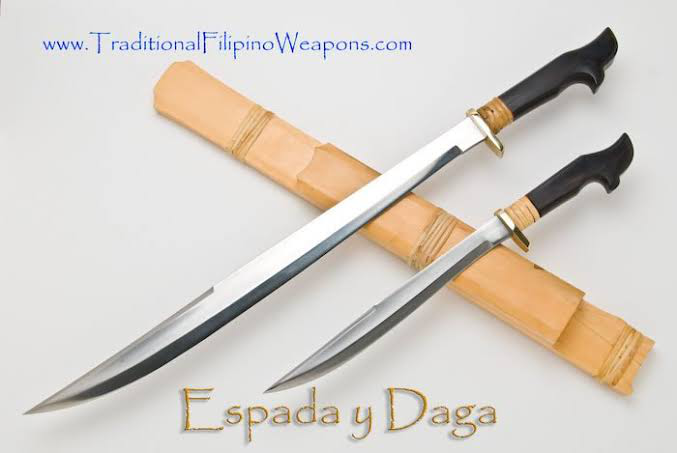

In [ ]:
readb64Recog(base64_string)

In [ ]:
predictImage(base64_string = base64_string , model = model)

{'confidence': 100.0, 'result': 'pedang/pisau'}

In [ ]:
#image 2
base64_string = '/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxISEhUSEBISEBUQFRUQEBAVFRYQFRUQFRUXFxUVFRUYHSggGBolGxUWITEhJSkrLi4uFx8zODMsNygtLisBCgoKDg0OFxAQGi0lIB0tLS0tLS0tLS0tKy0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAv0BkQMBIgACEQEDEQH/xAAcAAEAAQUBAQAAAAAAAAAAAAAAAQIDBAUGCAf/xABPEAACAQIEAwQECgYHBwMFAQEBAgADEQQSITEFQVEGEyJhBzJxkRYjQlJUgZOh0dIUYpKxwfAzQ1NygsLhFRckg7LT8URjw3OElKKjZDT/xAAZAQEBAQEBAQAAAAAAAAAAAAAAAQMEAgX/xAAoEQEAAgIDAAEDAwUBAAAAAAAAAQIDERIhMUEiUWEEEzJCUnGRsSP/2gAMAwEAAhEDEQA/APh0REokReRJtIJiIgIiICIiAiIlCSJEkQIvJtFoEBESJBVIMi8kSgDEGRAmIEGAMgGTFoCBECBMgxeRAkSZAkwIkyIgTIiRAREQEREgREQEREBERAgyJVKTASJMQIiIgTERKEkSJIkExEQEREBERKEREgRESibxeReIE3kQYtIJiReTeAkSTIvKEkQJEBJiAYEyIJkQEReSIAQYEGAgxaRARESBERAREQEREBERAREQIMiSZEBESDAREQJkiRJECYkGBAmIiAiIgIiICIiUIiICIiAi8RIEGJIlESYMgQJvEgyRAiJJkSBEkSDKEmRJMCLyTEGBEREBEGJAiIgIiICIiAiIgIiIEGRJMiAkGTIMBERAmIiAkiRECqIiAiIgIiJQiIkCIiAiIgIiJQiIkARaJMoCRBkiQRJkXiAgRAgTERaUJERIEREBERKEREBERIEREBERAREQIMiSZEoQYgyCIiIExEQERECqJF5MBERAREQEREBERAREQEREBBiICIiUIiJAiIEoQIMQJvF5ESCbyIMShERAm8iIgIiICIiQInRcF7D4/FANSw7LTP8AXVbUKduoZ7Zv8N53HC/RRQpjPjsVnta9Oj8WgPMGq+pHsUe2ebWrX2XqtZt5D5Mqk7C99AOp6CdLwjsHj8QARQNFTs9Y9yD7A3ib6gZ9Ow3EOHYFf+FoUkOoFTZj7a9Txe7TWazivbqpbS1NSCGcXp38s7DOx81mM599UjbX9nX8pa6l6K6VIXxuMy6erTTLr0DPq31Lymq4ng+E4a4WnXxBAtnatkBboAqgk6eU1PGu0zVTp4rczcDTYm+rHzM52tWZjdjc/wA7TSnP2zxaaR1BiXVmJVcik+FAS2UdLnUy1JMiaMyDEGBERECYiICIiAlUiTAREQEREBERAREQEREBERKEREgREShERAREQESRFoEREQEREBERIETY8G4DisW2XC0Ktc3sSikqp/Wf1V+sid5wT0RVG8WMxNOkBq1Gh/xNTzBe4pofraSZiPViJnx8ym74F2RxuM1w2Gq1F/tbd3T+uo9l++fWMLw3g+A/o6KV6q2s9U/plW41By2FKm31SniPbyq5CooB0GU3rOvT4tTlTbfaYznjyvbWME/PTScH9EAHix2LUAamlhxnsP1qzgIPqDTpcEnB8CAcNRpu41Fa36VUuNLiq/gQ/wB0DnOK4x2gY27+vYjXKx7x/sqdlU+c5vGdo1PqU85GoetZ7HqKY8IPnJrLf3qHr/zr+X0riXburU/oVuQbFv6Qjz7x7IPZrOM4t2nJPxlcuRfRD3z6nbvH8KjyAnIYziNWqfjHZhyXZR7FGkxZ6rgrHc9vM5rT1HTcYrjzk3pqEPzye9qa9GbYeQE1Vaqzm7EsepJJ++URNtaY7IiIEGRJMiAgxBgRERAmIiAiIgJMWiBMREBERAREQEREBERKEREBERARESBEm0QEGRaDACTeQYgTEu4fDvUYJTRqjNoqIC7E+SjUzr+GejTGOA2IyYJSAxWrdq2XquGpg1L+TBY3pYjbipl8N4ZXxD93h6VSu5+RTRqh9pA2HmZ9VwnY3heEt+kZsQ9rg4hu5RmX5mGpNmcX5F/K02GJ7VinTyUKeSmuhUKuCoKPKmmra8m98xnNWPO2tcNp96cjwb0T4pz/AMXVpYQc6YP6TWHtRPCv+JhOpwvZzg+BBL0xiKi7/pDDEP8AVhqRyj/Fm85qMXxau6nM3d012sBhKI5+t6xHvB++c9jOPUKZ0dqp+ZSAppfqahGa/mtp53lt509ccdfe30HiPbcgd1TQKCCKS1MoUW+bh6dgRz6zmeL8erOPj6uRCLFajCkpH6tFNX/xWM4rE9o6xuKQWgDvkF3OlhmqG7E+6aio5YksSxOpJNyfaTLXBHtp2k5/isadNi+0NMWCB62XQf1FIexF8TDyYzUYnjdZxlzd2vJKY7tR7tfvmuibRER4xm0z6RESoREQEREBERApiIgIMQYEREQJiIgIiIEgyZTKoCJF4ECYiICIiAiIgIiICIiAiIgIMTP4NwirinyUVvbVmJsFXqevsFzGxg3i06/H+j3EoAaT0q5IuyA92ydLh7XB2BBmJwjsHxDEeJcO1JL2NauRh6Y9jPbN/hBk3ErMTDm7wq3NhrfQDck+Qn1DAejfC0RnxuJarltmSkP0ekvM5q9UZivmqewzfYLieEwvh4dh0Xw/0tJPHbnfFVSWP+D3dM7Zqw0rhtL55wj0eY+uAz0hhKZ2q4k9wD/dQjO31KZ1mC7BcPwy95i6tTFW3uf0HD6+ZvUfXb1by9iOPYiq3JWvZxTHfP5l6r3sOdyBtuTMEcGxFRyUU1L3ZqgYVairzPjbwi9tdRM5y3t5GmkYqx7O28XtDSoK1PBUVpKBr3SfoiNbYvWN6tTbU6g2PKaluNV6n9E5CMCStBQi36tWY7+xh7Jg8UprTS+emKmUMprh6w01NxTGVG+o6j3ct2hWsadOrUrmstXMMoDIiMttMugO+4EsY+X8p2k3mv8AGG4xPFaNP16qlr7UQMQ56Zqr+HYa7zT4ntMb/EUlpHX4x/jqmvQtovsAmgibRSI8Y2va3sr2KxdSoc1R2c9WJNvZ0lmInp5IiJQiIkCIiAiIgIiICJEkyimIiQIMRAiIiBMREBERASbyIgJIgSYCIMgQJiIgIiICIkqLmw1voBvA+j9mcbQqhFxNGlWpkAsjKCRyOU7rz1EyuLdheG1T/wAJijhXOvdVTnT2AmzfeZzPAuH1KYu5y2OZVGpBtr5dNrzruyONp4gsjUKlcnRnFEEJb5LOAMu+xM55i1Z6dNZraO3Ncd9G2Kw9Bq4ZMQqEZhTDEhObi41A59L3nFGeh8Lh8LQJZXe63zU6JzZeucrpp+sZpcSvDKFZnpYeg1ZvEbL+ksrcyF/o6Zv5DUy/vRH8nmcMzP0vlfBeymNxeuHw7snOq1qdID/6jkL98+ndkuxy4SmxxNVajElitAXC6Af01QAaWN7AjWWuKdp6zC7AUQDZWqnvn5jwKoCqSNrE7zXPSqVjmy1cRz+OPd01sdLU8v7ktoNZ4tltfqsPdcUU7mXW1O1lBCFoIGKgqrUkFZ/MGvUsq7bCx0M0XEe0NZ29daT30BJxdfLodM22h6H3S3W4XUWnetVJsMwoUviNBe2o8XK3rDbaa6hxQUny06Si5DKiL4ibXsxPrH+Innj/AHS98v7YZFSjUchqi3DHKtSuS5L/AKlIaDTldfZaXquCoeriK7g901ZcoygALcAp5gHe5tMrtnxh17vuadjVQpUbKVGoFgQDYNqdhrp0nNVsKKSt3l3qMBnuPEF5Dy5fdPURWPISYmfZUri2UZMzBeagkLf2DS0YbG1KLh6TEMpuLEjT6tRpppymuXiCsLWO1r8766zX8SxbXUJu2ltzPURt4mdOswnEkrVaitTp1e83SqupRyB4StrEG2o9otOhwAwD0jg8Vg8PhWoMWXvqrohbRQwa+YkrYkXN7TgcMAMgNs4DA1VNje6kANfYdbCZT4okl6jMXJNm1Zdb6g62O2kmteLvfp2n7GhKdXF0KuHNJahHcIzZlp6DMubcZidL3tb2Dip2lDB98r97iO5pNbvTbMSVuVPnY8tNpzHFuGth3yMVYEZkqKbq6HZlP8DqJtS2/WOSup6YURE0ZkREgREQEREBERASLyYgReDJkQIiIgIiIEREQJiIgIiICIiBIkymVXgIiICIiAiXsNhHqGyKTYE/UJnpwYgXquqDpfWBqpncN4dVqNemvq2bMdALHeZqNRp+omc/Obb3Sk8VfkdNiq6CUdM2JVbFiL81vmt1AAFyJkYbtTWpju1N0GwqMQqa6kAH+M5ChWz315669f8AxM/C4pqZzIEuflFcxXpYnbpPF67iYeqzqXU1sZiGVshcgnOag+JVlYeJLXBa9r6X5bzV4ri6UFVKpqIwUMKVJQuYEaMah0IO/ht901dLEPUqo1aozjMCbnQa8gJuMM1JbllpVyhXukcBr5iRpzHLbrOeK0r8Onla0NjwDG0HqUi4FEVjUWqWJNQALdHFU625EHr7uy4mgo4erUTxLSBdSLXPQ6dAb/8AmfK+JUz+ksrHLtkvdfAQLBR05fVabniXF7KlBGOS+d2J9Y6ZQTytYH/xPU7l5rqJZHEuIVnW1QLQRQLW8TubaXt1NzNbg6VRqddqbIHchVqP8lbC/itvpv5zXYrFg1FTNmGYBidd2BMzOKcQVFyUytr62018ukk/h6iXQ1e1J7tab5EemApqgkgkbkqN/bObx/FkcNlu3IEA7Dre/XlpOcxfECRbSWKeJtznqMfy8TlZXea7W/CZZ1ARR8oMugvmsV9Y8vF901S1cxmxwmMan4lOVgCBcKw1FjcMCDz3E9y8QtVqhUkG2hIuNRfnYzZcO4hdQrsBTW99BmJNyNTNZRq943i1B0sBbnysLTLq0shAtcF8yqRqVsNTbl/rJMLEp/ShUqgElFdgt9PCCQCRyvYzRYwnOwJDWJUMNiAbAjym5xYqPTstMg3AFhbSxvv1mJS4FWIucqcrE6/cDPdY08XnbWCQZul4Cb2aoBy0XT3lhL6cBTmzk78k2JHQ8wdp7eHPRNpx7ApRamKeaz0w5uc3izuuhsNLKJq4CIiQIiICIiAiIgJEmIEGRJMiAiIgRERAmIiUIiJAiJIECJIme3B6wTOUNr5bDU30Ow9suYfgdZ/kEAbsdAPa2wga2XKNFnICi5Ogm3XAUKdu8fvTzWnrbyzHT3XipxJVFqaLTHX1m/a5fVAsUuCPvUIpgbljb98vpSw9PrVI+pfeZhYvHs7FmJYnUkknWYj1iZRt6vFD8iyW2Cj+M19TEE7/AH6mYpMkC+0grar9ft1+6UM5O5/n2Se7PQ/ulQomURSqspupt9/3GXaeNcG+YtyIOoI9m0pXDEy4MJ1MDKGOQ76ewaDrz1/nSXv0zLvr0YG/8/vmB+ijkTMhMLPE1iXuLTDfcR47TxFJEqqA6erWDbjmDfken7ph06GYglyxPiBzaA+f88pjUsKo3mUGUbfuk4LzYGMzs/hAJNgMpvI/2RVO+/mQP3mXsNWGdP7y3OmniGvu/dNlWxFIXJq0+ls2b3WB6T1FdPG9tMODPpd0F/a37hL68BG5qE6X0Xl7SZkHiFHW7E36Kza35E2kPxilawSof2FH8ZRFbhlNQLAkm979BbltzMvUaSHQqtgLjQfq7+8zXYviHeBQEyBSflZib78hLCtrKjfBqSiwKDqBb9wg46kPle4H8JpBbbfyGsiowU2bwkbg6Ee0GFbr/aqDYMfcP4yk8WuRane2up/0mjOJWXKOPVeV4G5qY9ib5adyTve/77S2cc4sRoNgLC/1dBzmobiA+bIbirbWEC5xqszlSxLWGUE8l1Nh9Zmsl7EYkva9tJZhCIiAiIgIiICIiQIiIEWi0mIFMSbSbSim0SqIFMTa/BvG/Q8V9hV/LLidlsedsFivsag/eJBpxBE3q9juInbBYn7NhLg7EcS+hV/2LQNClFjqFYjqATK1pOCCFbQ3HhPKb44V8P8AFYhGpVEAzU2BuL6gkeYIP1wmIXpex6CBt8R2jXJUC01QN40U+Irc6gnnof8A9ZzePx71TuSBsLmw9g2lWLQMb3K/OHn16THzjYDQaCVVkoxgYY8zLueM4kFC4QczKhQQfzeQa46iX8PgK9b+ho1qv9ym9T/pECyXQbD7pSav1TeYPsNxOr6mBxP+JDS/67TcYT0T8WffDpS83rUx9yljA4pbmX0pdZ36eh3in/8AlH/Nb8kuD0N8V+fgx/zKn/bl0jgVUdJcAHQTu/8ActxU/wBdgh/zKv8A2ZSfQlxTniMH9pW/7UaNuJLDyEoNZRuw987xfQXjj62Jwvvqt+9ZxXazgbYDEPhXdKj0guZ0BCnMiuN9dmknpVj9LT51/YL/ALpQcSNSFcgbnKdPaZr+9sddZ0nZfimQVKZXMhHeb2ykaE9Omn6s8zaYh6iImXOtV6CQEJ5CX+KKvesVFlJJFtow+DLkeIAHnHLo49rFdCvTrpLYabbF8PULpe46nU9Zr0pqR4hl9hiLbJrpQtiQBzNptaOBAubDQ7naY+DRFNwA3Tn/AOJuMPTLjKxFNToWJ2B6dTPMy9VqscNOWtSqUyC9NgwFgNj05zY+kHGCtTo1HX412cCpax7pNMp11vmQi+1/OZXB+F4JDlSr3tUOqobWBJB013+7bedT2Z7LUOM0KVKu9Wi2EVhenluQCqi+YfNy+6eYn6nu0fS+LRPQY9AuC+lYv/8Al+SSPQLgeeJxnvpD/JN3O892i09Dj0DcP54jG/t0R/8AFK/9w3Df7fHfaUf+zA862i09HJ6CuGDerjT7atP+FKXV9CPChv8ApR9tUfwWB5stItPS3+5rg43Wt9dciT/ui4KN1f68Q34wPNNotPS3+6rgQ3X34l/zSn/dr2fG4p/Xi3H/AMkDzVE9Kj0d9nPm0f8A8yp/3ZHwA7Nj5ND/APMqH/5YHmu0WnpYdiuzY+ThfrxLn/5JWOyXZsfIwf25P+eQeZrRPTg7L9nP7PBfan80huzvZxf6rB/tFv4wPMlotPSzcN7Nr/U4Q+ym7fwkfo3Zsf1GF+wc/wCWUeaovPSxo9nR/wCnwp/+2Y/5JZqVezw2wmHb2YT8VEaHm+8T0b+l9n/oNL/8NPwkQNOvpUX6G32w/JLg9KqfQ2+2H5J88WjeT3R5C/ulV9DX0sJ9EP24/JIb0tJywn/9h+SfPlon5v3iT3B+YvvH4QjVdoOLnEYmrWqMS1V2YLfMVW/gS/RVsPqmGrseg/vNb2bAzohh/wD2x90j9HP9mv3SDQGhmtmcWHID8TNhhsNg1/pKdep/9wqC/wBVK/3zOFA/2Y9wj9Gb+zX3QL+HxPDV34ar/wB/F4g+8KQJt6HabA0/V4Rw/wAsymp97XnPNhH+aB7P/Mstw9+h9uv4wO9w3pO7v+iwOCp/3VyfumUfS/if7HDj63P+afOF4Y/633QOFv5+8QPoTel3FcqWF9zn/PLL+l7HfMwQ/wAL/wDcnCf7G8ifLSU/7H/VEDtanpixw2GD+pT+eY7emXiHTD/VTv8A5pyg4MOYA++XafB0G4v90Don9MvEf/ZHspj+Mx39L/EvnqPZSpfxUzBp8KT5oHvlvEcKXkPZp+MDKf0t8T/tiPYlIf5JyHFcbWxdd69VjUeqQXc21sAo2FtAAPqm0q8PUH1fuP8ACUfoK/NbX2ySsOaqb2mTw6rZwrGysRmHUi9tvM/fN2OFA7I33yf9iE7KRbWNdHnavFUEYFVpVFG98t1vbUK37v4yxw3BOAxqL3dMBipJysSLA2X1iNfLeZdDhuJQ+Fl9bMMwvr13EsYrg+JqNmdlOgGg2A2AHKZ8Zac4YuMxJU5bq4N7ZTcWO4vMJtiLba+3rN0OzTH1izfWB/CZS9nV5o5/5lt/qlimnmbbc1TVApOUlupOg+qSaLG2Qseg1Op2AHXynTpwKkNO5J9tU/hM6hgVX1aABGxzAkfXLpNuNpvUpvZwEKnMcwsfCDp7jPoWEfu6TVMNXdWqVGqHu3yB0ba2Vr6EHcDeYxpc+6J/xKZUKpGndVNNtV/GOPZy60v/AO1MT/b4j7Wpt+1Kf0/EH+ur/aP+MsGpfenV+4/xkBv1ag9ontGUmMrHerV/bf8AGVM1Q7vUPtZj/GWf0cm1s38/XL6YduQJMC09FjuSfeZH6MPmzJWg3RvdBpN80+6BinCj5p9sdwPm/dMjI3zT7jJWk3zW90Ixu4HSVGj5TJFJ/mt+zeVLRf5j/smBh935fdJ7o9JnrhKnKm/7J/CSMHV+ZU9mQ/hAwBS8pUE8pmjCVOdOqP8AAfwkjBVP7Op+w34QrCWmZXk6zMOAq7d1V/YY/wAJK8Nr/wBjV+zb8IGC1LobSk0DNn/sqtyo1f2G/CBwrEcqNb7Nj/CUa5KfX8JVlH82M2acExJ0GHxB/wCU/wDFZfp9lcY22HqD2jL/ANREg0+USJ0HwOx39g37VP8ANEDoKfomw43r1z7Ag/gZeHorwn9riP2qf5J3sSI4T/dZhP7XEe+n+SUN6K8L/bYj30z/AJJ30QOA/wB1eG5Vq31hD/llJ9FdDliKv7KT6DED56fRZS5Yip+wp/jKT6LE+kv9mPzT6JED5yfRUn0pvsh+aVJ6K6fPEuf+Wo/jPokQPn/+62j9Iq/sqJWnouww3rVz+wP8s72IHDD0YYT+0xH7VP8AJJHowwfz8R+2v5Z3EQOKHozwXzq/7a/llR9GmC+diPqqBf3KJ2cQOMHo0wP/AL/2zc5cX0c4If2x8jVJ/eJ18QOS/wB3eA5pUP8AzGH7pWvo94f/AGTH/m1PxnVRA5pewfDx/UE+2pV/NLi9icAP/Tr+3UP+adDEDQDsbgPoye9/xlXwPwH0an/+34zexA0g7J4Ef+mp+4n+Mr+C+C+jUf2QZuIgakdmsGP/AEtD7NT/AAl1eBYUbYbD/ZJ+E2MQMH/Y+H5Yeh9mn4Sf9k4f+wo/Zp+EzYgYY4VhxtQoj/lp+ErXh9EbUqY/wL+EyYgW1w6DZVHsAEqCDoJVECAo6RaTECMoi0mIC0RECIkxAWiIgJFpMQIkxEBERAiTIkwNX8JMF9Mwv29P80j4SYL6Zhft6f5p40tFoHsz4SYL6Zhft6f5o+EmC+mYX7en+aeM7RaB7M+EmC+mYX7en+aPhJgvpmF+3p/mnjO0WgezPhJgvpmF+3p/mj4SYL6Zhft6f5p4ztFoHsz4SYL6Zhft6f5o+EmC+mYX7en+aeM7RaB7M+EmC+mYX7en+aPhJgvpmF+3p/mnjO0WgezPhJgvpmF+3p/mj4SYL6Zhft6f5p4ztFoHsz4SYL6Zhft6f5o+EmC+mYX7en+aeM7RaB7M+EmC+mYX7en+aPhJgvpmF+3p/mnjO0WgezPhJgvpmF+3p/mj4SYL6Zhft6f5p4ztFoHsz4SYL6Zhft6f5pHwkwX0zC/b0/zTxpaLQPZfwkwX0zC/b0/zQe0mC+mYX7en+aeNLRaB7L+EmC+mYX7en+aT8JMF9Mwv29P808Z2i0D2Z8JMF9Mwv29P80fCTBfTML9vT/NPGdotA9mfCTBfTML9vT/NHwkwX0zC/b0/zTxnaLQPZnwkwX0zC/b0/wA0fCTBfTML9vT/ADTxnaLQPZnwkwX0zC/b0/zR8JMF9Mwv29P808Z2i0D2Z8JMF9Mwv29P80fCTBfTML9vT/NPGVpNoHsz4SYL6Zhft6f5o+EmC+mYX7en+aeM7RaB7M+EmC+mYX7en+aPhJgvpmF+3p/mnjIiLQPZvwkwX0zC/b0/zR8JMF9Mwv29P808ZWi0D2b8I8F9Mwv29P8ANHwkwX0zC/b0/wA08ZEQBA9m/CTBfTML9vT/ADR8JMF9Mwv29P8ANPJGF7NYuoMyUHIOo2U+4kGYeO4bWom1ak9I8s6lb+wnQwPYfwkwX0zC/b0/zR8JMF9Mwv29P808ZGRA9nfCTBfTML9vT/NHwkwX0zC/b0/zTxjEo9nfCTBfTML9vT/NE8YxAqiIhSIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgV0aZY2E6bgL0KFmakazc2ZsoHkq2PvmgwKkmw1JnRYLhRI1Nj0hHd8G4pga5CuvcH5JPq35+Maj2zoMdTNDw1AuJw7i5pVQtUFT8y/rC31+zQT5diOH1KQzbr1HL2ibbgnadlT9HqsTTN8pP9WxFrjylGm7fdlqNC2IwRJw7mxpkljSY7DMdSh2udQdDvOKn0PiWNIDIdVa4ZTqJweLpZWIG3L2cpFWIiICIiBVERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERARElVubDW+wgRMnB4Jn8h1P8Os2XD+D3salrnZOX1zqcBwNmPi0A90a2NFhOGFR8Xccyf8AWdFwnMo+N1B528Q/GbGuKdFLaaTleL8c+SkaHQ8UrKEPiBBGnmCJx9RrHSWqHESVs2ttR9ctGreBm1MSSPb1F9RNJxA+K8z6reEe3+E1eKe59mkCzERAREQKoiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIkotzb/SbfhXBhUYZqqf3Rm+820ga/BYJ6psg9rch7TOp4TwNVOniY7sR+6bvB8AqLlUoUS11YbEdQRofbN3Tw6URckEj7o0MTh3CEUXfTTc6i/mOkxuK8cSnooAGxHzWH8P59mHxvtEBcLOKxeMZySTvLKM7ivGGqE66TUNUvvKGOsoZ5FZNE3P3TKFvYBNTeCxPMwMvF4q+i7DnMIyTIgIiICIiBVERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQErpUixsovL+DwTVD80dfwnU8N4WAAFG/86mBreH8MC9S3XofKb3AcIqFgSdOp3HsPKbnA8MRPE3KY3FuNKgIW0aNthR7RPhPiMRapRfVXHI9f1XHuM5PtBxhixAa4OoYbEHYia3EcUzt8ZdkJswG9uq+fSa/Ek6qSGykqGGxAO48vxgW6tYneWZLG34SyxvAlmlMRASmSYECLRKjKYCIiAiIgVREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREycPgajnRSBzYggCBjgX21m14dwq+rC/6v4zZ8M4HtYXJ52nYcK4GFF30garhnCCSLiwm6rmnRUjRmADA7XXmNef87WlPFOLU6QyrynD8W4w1Q7+yVG14x2izaJ+E5bEYosdTLT1CZSE5mRUAEyqu9rdZbNfpLTMSbnWBBMREBERAgwJJkAQJlMqkGBEREBERAqiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICJVTpkmwF5tMDw072uf52gYmEoHc3F9raH750nBqTqc6q1QD1l2e3PKdm9k2vBezRaxcWHObzE16OHWwtcC31wNhwt8LVph6BUOBfJbKHA3AX5LjpseWuh5jjvaPkh8pzPEsdaqalE5CTcgXGvXTnMLiGLNQ59i2rDbxc7eR3+uNiMbjy5uTMI6ypKd95TUrW0X3/hAl2C+3p+MsO5O8pMQEREBERAREQEREBERApiIgIiIFUREBERAREQEREBERAREQEREBERAREQEREBERAREQERJVSdBqTsIES/h8MW8h1/CZuB4WSRm1PIcp1nB+z5bVhaBqOG8JvsCB9/tPWdhwzhSUrNUtZtFcbXOwbpfkdj5aA5yClh15e2cnxrjvrKh8LXJTlfmR0v06684G84z2gWmCqb+U4TiPE2c6neYeLxRY6kywlMmAzkmV7ak6SslV0JF+nT2zHxNYGwXYc9rmBTWrE6DQfv9stREBERAREQEREBERAREQERECmJJkQERECqIiAiIgIiICIiAiIgIiICIiAiIgIiICJKKSbAEk8hOv7O9jO9Va1d/A98tKmQWbKbHM+oX2C59l4HMcP4fVrvkoo1RtyByHUk6KPMzrcJ2HRFDYuvlLeqlMrYG/N23tY3AHnedgMOuHpZaCikBrZVzc97H1m8zeRSVCuazFrZmLEF9NQL63WxHQa7CBwXH+xlShT7+g4xNAatUUWZPNlBIK/rA8tQJy8+zU65QComUpY06qZAoIa4LsNc19b62IG204/iPY0DEFk0oVPHTUG5B+VTv0BI87FYHI4TCNUOmg5sdv9Z0HDuDHkN9zvedXw7s0jW8NgNLDT+f59k3VbhIwy5/WS9s3NTfZhyP3QNXw3gyqLtyl7iPF0pLZbTV8X4+ALKbTjsfxAsTrKNhxXjZcnWaGrVJMp1Yy+qBRdtP3mQW6dLrtvrKa2Kton1t+EtV65bTYDYfjLMBERAREQEREBERAREQEREBERAREQIMiSZEBERAqiIgIiICIiAiIgIiICIiAiIgIiICIiBdw9Qi9uY++b7sr2hbD1LVCWpOfjFHyTtnUdevUD2TnRNph+B4l6YqrQqlGuRUyMFIBsSptqL8xA+o4TilLEI7UnLqrEZiCpzABuYB/kycTWcKMlMlmJG2lh63rbcv5tOb7AoFWvTqXGYo6e3K6t/lnQ4aka1MUDm0vUp72O2ZSSCBsN/4wLGV2bKWLkW8F1Ve8OmrAeIjMNDaxNt9Rl8HZb91U118I/6CPvX3GYOISoF0PipsoGbMCf1WC2NrgaDoN5QnEalR1NUEVNaYy02UVKZ2YuTa4sd7N4QNZB0DYxKa3BOx1XK2h0t4dfK00HFu0LWIuGBXIVsfEg3BHMefIga6TB7S8Qy1CoYEHXcMqsR41sNjfNp0PO9pzGIxd72JN9785Va/G1jmOtxyvvaWEpE/hMo0b6nle/ICY1fFgaU/rb8IRcqVFp/rN05D2zAq1CxuxuZTEBERAREQEREBERAREQEREBERAREQERECDIkmRAREQKoiICIiAiIgIiICIiAiIgIiICIgCAmRgcHUrOtKijVKlQ5UpqCzMfIToexPYXF8Te1FclJTapiXB7teoX57W5D67T0Z2M7D4PhdP4lQ1Qj43Evq7dddkXyGnW8g4b0fehpKWWvxPLVqbphQb0086h+W3kNB58u+7Wdo8NgaVqirUa2Wlh1AueQFvkjl+4HaajtL268Rw/DwK1W1mqfIp/rEnTTqZxNThRLvUr1nqVLHvao1ys1iQvhLeEEEkW0cagBpzZP1ER1Dopg+bub4TWZsXVLqtI1VZhQ2CDMr2ty+vWbI0aLZlrZVAYOASQHv4SLdf33mqQWxNPxE3LoM7Ek5l0GrG9idbbWmbxHi1GgbsA9TXIg3BO2utrzXFblVnkrqVf8As5FCu9SqqICULsyhBfQqDsx05biabiPHHqDJhx3aqCDWtZ2Hlr4Qff7NpgY3EVKxBrNvbu6QOip7AdOW+ss4x0uFRMoUZS3yiQNST7ev+k0eGNVpZdvVb1Te50uPEPkny85YZguraD9/smRnzNrc5ugJubcgJiY7Dk3B3XUcpUYeLxefQaL06nzmNEQEREBERAREQEREBERAREQEREBERAREQEREBKZVKYCIiBVERAREQEREBERAREQEREBETd9l+y2Kx9UUsLSLm4z1D4adMH5TudhzsLk8gTA09KkWIVQSWIAAFySTYAAbmfYvR76GnqZa/E/i00ZMIPXbzqt8kfqjU9Rz7/sH6M8Jw4CowGIxFtcQ49S+hFJT6mml9/OZHajt3ToHucMP0mu3hCqCwVvq3M8XvFY3K1rNp1DeYzG4Xh9AA5KFOmuWnTUBdByVRPlna3tjisWoWipp0qhy00v46p/VG7Dz2900uOxlfEs1SpbEVgbMHekaFK/qqPHlqVDsE9mh2mT2VqEsf0gMKtc+Cs39I1LQMFB1RB7LW29XTgzZ5mOvH0MWCtO57lldnq/d07Knd1KRyVaTHxNW0tUZrAi9yBuFzA/JMxO0nGEwwylg7rc5ORqXBzP0sbtlGt2I8IFzjdruJKrd7hy3fotqhW3gpMpsXOuVxcgWJa2umhPKUMErAVazioXuURb1EXoKmXxXvy+8308Y8e+5L2je2lWu/eK6XQqcyva+o5y535LEknMTckm9/aZm4qkejm297cul7G2+lpg4zCOFzkWvv5eU76T9nHk97ZWFrZXzjQjU31v5+6XMPWCs3eAtcHY2NyOtxNHSxTLodR0P8JsaVXMLi5AsCPbtebMmwqWAGV8zMtsu+UEA/wAbe+YNRRyuQNjtz6eyXKZtqCR0WxN/LSUYjFhRra+t7ee4X8YGlxK2Yjz/AH6y3KqjXJPXWUwEREBERAREQEREBERAREQEREBERAREQEREBIMmQYEREQKoiICIiAiIgIiICIiAk2mdwXg9fF1Vo4ak1ao2yqNh1YnRR5megPR76JKGDy18bkxOIGqrbNRpH9UEeNv1j9QgfPvR76Ja+Ny1sZmwuHOqi1qtVf1QfUX9Yj6p92oUMHwzDBUCYajTFgOp9p1dj11Jmq7X9vaGD+LT4+udBSXWzHbMRz8hrPn1bh+LxzivxFjl+RQDBAo3s7bJ/dGp5ldCefLninjbHhm3c9QzuO9uq/EKhw2C+JpAFqlU+tkGhJt1JACjckddKeGYKlSTJSuzVvC1Y/0jJcZm/VvdQAPVzofFcmU4PCUaOUqtKkWyh1FlOhB0ZxlyggkkEnbTSabjXbWlSDdzatUqfLI8CLrbQ+sTmLW2GbKb2sOCbXyWdmorGq+I4/Up4erTxCBLVABUosLBkH9YFGgAsMpNxe2nhM1HFAatUVKb1GDKB39itSowGjquuVbFRfnY7XmrqYKtXY1sSXGcgkWJqMTZQW5IvQnkCANJVTrNSvh3Qubg0kF2LqbZV9X5OpJNtppGPX5k5q8FU8JDAZUGWqbCy8i7X3ubHU2JYXDWsa+z+GNcvSGY0aTXSpbmSDlJOh0G1r638psuG9nRmFbFBS1vBRGoSw0zX9ZvuHnyu8d7SUsKuQAM/Kkpta+t3blc3J5m/wBc66Y9x25b5NdQp4tTo0UzO2VRaxOpZgOQ6zg+LcYat4VGROS8z5sf4TH4rxOpiHz1WudgBoqjoo5TDm8REdQ55nfqRM/htci6HYnNb9YC37pr5dSuRtKNjicQF8zyE1dSoWNzIZiTc6k7mRAREQEREBERAREQEREBERAREQEREBERAREQEREBIMmIFMSqICIiAiIgIiICIl7C4V6jrTpqzu5yoijMzMeQAgWQJ23YH0cYniTB7GhhwfFiGHrAbikPlnz2E770eehoLlxHFQGOjJgx6o/+s3yj+qNOpOw+hdqu2GF4bTytYuFtSwyWBsBpfki7fwBnmbRHpETM6hd4D2fwPCcORTC0VUA1cRUIzuRzdzufIadBOF7SekGvjHOF4WCq7VMSfCQCbXv/AFa3sPnEkAa78rx/iWP4m6PWV6dFmuigZVCEjxKp9Y22PM89Z0GEw4pIFoqqqxC0Etc94QQXcg2fRSSfmrUAtpOPL+o+IdmPBFe7MPhHAEpVS7VXLUxapiASpLmxbIACcqgjUG5LNcgIZm18XSQCrUGRSCKrVHzliAPAq1DUZjuPARYjbnNd2g4xSwa5L95UXUUrgjvL5hUqkaixu1gbszNoBqfmyh6zgeIZyAzkE6bE3526TCuO1+58bTMOo4x2pq4j/h8EmSntp6xU2vmfWyX1te3UkWAw+EcMFOoGqFWN8ochrI22ZTmGubQXvtfaZWCpd2pp0lK3JG/jIG7sbb2O2wJHI3l08MqVFyi1OxsG3VV8IJta+bw2AB6bWF9ax/TV4tMeyysPmqEXao5Frv6ofS6qGQKW3vfMdL+2Z/6FQpnvSq51u2djfuxrcZ2N9idb/wAJj43iFLC07u56FjYu56KosB7BYc58+472hqYk29Snypg79Cx5mdOPBFe5c2TLvqG77RdsCb08MfI1rf8AQP4+6cY7Em5JJOpJ1JPmZETdiREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBIMmIFMSq0QEREBERARJVSduegHU+U+uej70N1K+WvxLNQpHxLhh4arjlnP8AVjy9b2QOF7HdjMXxKpkw9MhB/SYhtKSDndvlN+qNfquR6K7F9g8HwqmXGV6uX43F1LA23IW+lNPZ9ZM2PFOLYLhWHAbJQRRalQQAFvJFG/tnyDi/aLHcbc00/wCHwqsARclRfYORrUqc8o/1md8kVh7pjm3+HS9s/SnmJw/DCGZjkOKNgt9vi81h/ibTn5zRcI4BSB77FVGxmIJDkKr4pF53DKrLUb+/pptNlwvgNDDAJTUud3qsA1R6gFwByFgbhR1U65WJ1/Fu1VGlelVZsyZXCKmdhfKQoqNYAW3uAfGDyyz59805J1V20xxWOm5yqQarISt/FUqVECjQXD5Guui3Oa3O+k4Xj3bFzUZcOQSPBTqLcnxHxMlwLEgKoNrgAkWJvNbxHjmK4g3dqclIEXXMSq9C7HV2/jsByuUeGUqXIOV1Z2Aa787KbDqAL73+bLXHFe7enL7LeC4OtzUxbqXHi7gt4hfm4uC+u4U/X02i0VIQN3jizFbKUTKNctPPlC767yjhzmqQlNgmQi6L4nC+I6kWy/J10G+203LhKS5mKjKLk7Kut78r8tbDbYaCa1pa8s7XiqxwzD+HvKoZC3q07+ILy22J36i/IgEaztB2mShdEs9QaBB6iH9Yjn5CaTtD2tZ708OSq7NV2ZuoX5o++coZ11pFfHLa829ZGNxtSsxeqxdjzPIdAOQmPET28kREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQERECLRJiAiIgJtuzfZzE46r3OFpNUbTMdkRSfWdjoo/kXnYej30U1+IZa1cthsMfEHt8ZVX/2wRoP1jp0Bn3rD4bA8Jw3hFPC0ae5O7t5k6u5kmdDnPR/6L8Nw4LWrZcRiRqarDwUz/7Sna3zjr7NpY7c+lKjhb0cJbEV/VLDWmjdNPWbyE47tZ2/xfEmehgFenRUFnYaMyD5VRvkL0G5Om+kyezPZynhR3ndmrWAOepUICUz8pQyEimR1Ou/LScuXPEOrHg+bOffs7jca5r42vkqVNVRw1SoVvoMq6Ul8jtvbnOvwGH7qlTRFZRTAWmuqZsy+JmVTqSbkki/rEXCgnIxGLWmrVXq0aSD5YGY+LUDwsqsTyujE2vqBPmfaXtdVruVwz1hTAKknKrOCdWIpooUa2HPXU62HHq+afw6NxX10favtXQoXpUguIqob5iA1NKgvqRszAsxsNATrzUcJUwWIrE1ap1c52Lt42J1LZdzoD7pueE8FSlZqgL1NrbZOYKoQTp1I9lt5te5CguwCliFuRmZgdrKfESeQDC+tudtazWn00eJ3buWvwtPKqhLDTKgtpmO7NcanQ6+VhymyocOub30W4udVB05H1m036kk6+GXcNg2LF6mgIAp0QLZVsL5ySTc2Gl/kjpaajtB2rWldKGV3GhO6Jb2esfLadFMMz3ZjfLEdVbLG8Qw+Cp5R4cxJCLq9RubMefLU6funA8a43UxJ8XhUerTGw8z1MwcTiHqMXqMWY7k6y1OpzEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREDL4Vwytiai0cPTarUf1UUXPtPQeZn330d+h+lhctfiATEVx4lojxUqRB0vf+kb7ul7XPZ9leymD4XRIoKqG162IcjO9ubudlHTYazhe2npSeoxwnBw1Wo11OJVc/ke5Ftf7506dZ5m0R6tazbx2Hbbt5huHKVPx1cjwYdSLjoXPyF+/oJ8dqnF8Yq/pGMq93RVsiAaC5/q6CnTNyzHrz2l/h/Y65L401K9SpctlYimrW/rK9jmbzBtfmZvlw64akAMgQeFPFp62l6l8guTfe4ux0AE+fn/Vb6q7cWGK9yvUaFGiopUUCU6XjbJ4yzixBudWI0NzzyciRNJ2n7VDC1AoVajKtwtzZdfAhta3W3svyM1XH+2mUdxgvG5PixAFyWvr3a/uPLlrYjnKHBGY5q5cu2uRRmIJPy2sbHy36zLHg/qytLX11UrV6+OYNVbLTTwLYWVRp4aacydPuuZtqVKnTsiAKFtcnUtUOxLddfZqOkppYXu0UWGhKpqCOZJOvh0uTfWw9kz8GmZRk8PM1SLknqgPPU+IjzAuQR0d36r4y3Ed2YFJ3qVDQFJqgTVlJFOkhI0z2vsDy1vzm5bJQHeVWF1BGcjKq5t1pr8kH3nnMHiPF6OEXKN9xSG5/WY/xOpnDcU4pVxDZqjf3UGiqPIfxnXTFFXNfJNm3492oerdKV6dM6E7Mw87eqPKc3ETRmREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREDrO0PpF4jjU7vEVgU3KKophv72X1vYZgcH7XYnCgigaa5vWJpqxbyJO48popBnmaxPsLFpjyXT1u3+PZsxqi/wDcA9x3Hvmv4r2jr4i3fZGtrfLYn2nczUxJGOkeRC87fdnYLitSiSaYQE6ZstzboCdpkVO0eIPylHkFFvdNTEs0rPcwcrfdsanGqrMrNlYpfLcZgL+RMyvhVifnKP8ACJpIliIjx5mZn1cqVixJaxJ1JNySffKc/kv3ymJRVn8l++M/kv3ymIFWfyX74z+S/fKYgVZ/JfvjP5L98piBVn8l++M/kv3ymIFWfyX74z+S/fKYgVZ/JfvjP5L98piBVn8l++M/kv3ymIFWfyX74z+S/fKYgVZ/JfvjP5L98piBVn8l++M/kv3ymIFWfyX74z+S/fKYgVZ/JfvjP5L98piBVn8l++M/kv3ymIFWb9Vfv/GTfyH3/jIAnS9iuxeJ4lVCUVK0wfjsQw+Lpjc6/KbkFHMi9hrA1fBOEVsXVWhhqXe1H2UA2A5sx2VR1M+9dm/QpgKdEDHKcTWOrsr1KSL+qgVhcDqdT5bTsux3ZDDcNpd3h0AZrGrWOtSowG7N06LsLnqZuMZi1pi7H2DmTJJrfTh6voj4Kou2GYDr39b880mI9HHBy1kw5HRe/qsx+rPO0r4lqraq7W17pNwORY38PW3reyYpqXA8Sryam+amV6FEC30uLWANxvOe+b4q6KUrX+XbmU9F3CW2oEC2YOa1Y3yi7XXN7eekpPox4Vf/AP5yoAzMTWrWXNsPX3AF/OdZXxVNFzMCP7Wo47rvMuuRabHMLm1zYDecxxPtJlAFNszm7OwuVDNb1b7kWAB5WNusx/dmPZe6YZvOqw1nFOwnB6V/+Ha+yp31W4/WbxaE/N5TjeNcG4dT8NPDs9RtEpCpVZieWlzNpXx1atUNOh46mpqVCfi6S82qMdBb9+m82WH4O2HpO6sq1nW36ZVqCg5c2NqYbxU108mNjtpPE5bfd1ftYsUa1Ey5bBdiQtSmcVQammXvaqMXXNTzWIS2vhFidTprebZexvDxSWo6aLmao6VHZe7SzOR4vEfkC2hLDS416JqKLeqM1NCy1SSO4po9sti9cr4dSCVQ3Fuuut4jxzDpbNVQpTIcpTzHMtOxpUqZyhal3IZmUlQFUHYCeP3Mlp6mWXGnzEMA9isBSpGpiaYpHLds1WoVplyTqQQSVBCqu7FW5XI4TiaYZn/4eiadMDKuZmZ3t8trmyk/NGg21tc53HONVcY4z3CKfiqIJazNuxO7udLsddANhadZ2X7OLRtWxCh6uhSmbEUzyLdW8uVvrnVji/zLC3CO9OH/ANgVfo1T9l5M+vd83zj71ibcLfdlzj7PP8RIvNWaYiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiAIASoCTTQkgAEk6ADUknYAdZ9r9GXoivlxXE000algzz6NW/J7+kDmfRt6L6vECtfEZqGFvcNs9YdKd9l/W909GcK4bRw1JaOHprSp0xZUXQf6nzMyVUKAAAABYAaAAbACaDi3aDdMOCxXR6oF1U81X5zW+ocyNbebWiI3JETPjP4pxVaQsLM5Gi9PNvKc7UxLVDmU98TmzFQzBSPkgiyg9bsPKYqEVKhAUEraldrPfEuMzs1wAci622Fh1leKr0nKlP+JSzDvKpLA1uVMI9kXMLkMRY20nLkycnRWvFUmJZzkp2YAqcqsXA01BWiAAf77GGQU1bvKnd5VPeKMtJVDXKZhT8V78s4JvsZicS4kKB72pUqUA9MD9HSoCxqC11p09Qi23Om+k4XjXGjVHitSpU7lUBNgTuxJ1Zz1OpnPN9OnFgm/nUNhx/jy1LrSVUTTO9rNUI+UxJJA6C/mT05IY16zilRFTKxINSnTNRjltmWnbS/iXU/OXbnl8P4bUxlncFMPfwp6lSvrZbH5KFiBm+oXM6LDIhzZRkTJkVadzbCISAtNQblqtUuRrqFubSRGv5eum2SKxwp/tTgy+HAo4ejTwwFiFxFUGqWGperRoA1GJ65wNtBL36LiCbu9VTlztkpJgUFM/JqVaoZwByJlC43uwUprRoU3sKNOoFoAr/AFgZrG9VTe6gjQ6EjxTm+K8ew2FDU8GFrsXaorXz0KRbbT1a1RdTmtYZgATsLWJt447dNzxrF4TBKtR0FWsdaSsWrVGQjTO9YsQma3iAQkA2HMcBi8ZXxtYZvGx8NOmoyoi81RdlUcz7zKcBga2LrH1qjOc9Wq5J33Z3P/kzv+F8Jp4dcqas3rPszeQ6Dy99zOrHi0ytfTG7P8ATDjOxz1SNW5KOiDr5y9x7j9LBpd/E7D4qiDqeV2PIX5/v2ms7T9qkw4NKlZ61tR8mn5sebeQ+u0+a4nENUYu7FmY3Zjz/ANPKdMREOaZme3V/7xMV8zD/ALFT88Tj4jQpiTIlE3kyLSYCIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiJNoEATL4dgKteotGijValQ5URRck/h57ATY9luzGJ4hW7nCpmO7udEpr8525ezc8p6X7BdhMPwulan8ZWcWrYkizN5KPkp5e+5gaD0a+iulgcuIxWWvibXUb06J/UHNv1j9Vp9IqVAoJYhQASWJsABuSTsJj8S4hSoIalZgirzPM9AOZ8p847ScSxeMIXu3w2HYjKXBVTe+VqpA01tpsPvmd7xX17x45vLf8W46a6t3TGnQVWYsCFq4jILstEHXJ1aYGPqDDU7aGoqq7Ip8K5mtQw6czd7Mx3IRid5YZqNZ6lOuFNNKIFSkR8Zh0pIc3itcHOFym9mDnQ2lmmrvVysMvckYituwGLqrlo0vMUqWXzJWw3nDfJy9bxWI6X6J7pNUqVUOfDMy5WfvXUtia4A9fxWQC/wAhpou2XEsipTFQl37w1ltkIoMwalTcX0I6HUAiZXabtMtEqlHWpSBSmNxQuLF25PWNz5Ltqb3+c4nFMXsM1WpUOi6sSx5nneZ9y6sGPvnbxk4vHBRmcnyG5MvYDh6uq4jHEIjXOHoMSiNYaNVf5KkggXN2sQJiVey9UsDiatJDbPVpq4etTpajPk2sDuASdDpedbQBKlWBOVaSGm4upqJlWmKZ2bMbNcbAWN76XUV7+WuTLNuo8V4trKUDEM3hq1fmLkvUIC6IEokgACytUUbgy2Xa/dlAiVFFV3uoamvxiJfOSBSVKYBNjZvbK6BVabVqjLkTMAz6AqHJaqx38dUM1gLsFUDnOD7T9pGxJNOlmWkTdr6PWYbNUtsoA0QaD2xSk2nTntOumP2q4mteu3dszU1sqFifGVUKahB5tbfmLSrgPZ58QczfF0xoXI3PRRzPXppMzs92bzZatfRN1Tm/Qk8h++dZVdVQ3tTRATbRRbz6Cd1KdOa+RcwVGnSTJSXIi876kjmSdz5zj+03a8KTSwp12auDsf1Op85q+03ag1r0qJKU9mYaZ/wX985ibQ50s1zc687yIiUIiIFIlUpkwJiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiSBAATsvR96P8AEcTqXUGlh0NquJYaeaUx8p/uHPkD0Hoz9FD43Licbmo4Y2ZKfq1K4/elM9dyNrbz0Lg8JTootOki00pgKiKMqqo2AAgYHZvs9h8DRFDC0xTUasd2d+bu27Mf50lXGuM08OACDUqP/RUV9Zrbn9VRzY6Ca3tJ2spYdhRR071tCWPgpD51S2vsUany3nEfpzOXqU1rYrOLtWKCkjC49atV8IXkECEDzOs58maK9R61phm3ct3UWviHNZ1FUoDkqM3dUaJt/wCnDAiqw37xhY20OkwMAiOquS5rmmaVYUg+MVg11Ls4burkG5zE2sOkxk/SK7+tR8LEeFX4gy2G12PdBteWWV4/BKtNjiq9SoEAVhVqEU1a9yho0CoLHkmdj1AGs4pnlO5dGtdMzG8ZoUEWm7IooAZqTVVr4ms1LWklQU7hRmykknlachje0/xQp0P6Ry9avidQxrVf6Tu+a6WXNvYG1rzX8d4wtXwUqVPD0k1CqoUtb5Tnr5DQee50VNzVdKdNKjCocp7sZnI+VkBIB98kV346a4q1jdmTh6VSs/dYcZ23dybJTXqzHQfza86bhnCUw9spUOw8daopeq68xToWLrT6kKW1F8tpGEZ6FPuqKUMKAPFnqHE1SQR8YUpBQHFjo97W0l00KjX+Nr1bkswptTwVMaf0jd1mqL5h8oNzcy+PF8k2Uqi0qYWuVF6eQNVNPDFqeYgBFJNU2U2uoDEb3ub43EeJ00pF6YdlQWDU0emiBrJn7ysFzOqsyqMvyz9WQMVhsJTNVlp0y3qtSQFncHdDULO7X3JbJpz1E4fifFMRj6iqb2H9HSBJCDmSeZ6sfu2nutOU7ZclrjnG3xLAAd3SSy0aK3sqjQE/Oa34AATbdn+z1vjMQoPNKZ+4t+HvmVwfgS0fG1qjjY/JXrbz85k8b4zTw6ksbsdFT5TW/cJ2Ux69c98nxDYY3HJRptVrMFC7DqTsANyf50F5807Q9oKmJc6laY9VP4tbc/dMPivFKmIcvUN/mr8lR0AmFNWJERKEREBERAGUxECqJTKoCIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiZ/BeEVsVWWhh6Zq1Kh8KjpzYnko5kwMOjRZ2CqCzMQqqAWJJ2AA3M+7ejL0RCmVxXE1VnFmpYQ2ZUPzqvJm28Ow53Og6b0b+jOjw4CrVtXxRGtS3hpjmtIHbzbc+QndYnEpTVndgioLsxNgB5ybF3b6px/aDtKzA08Lmt6prC13a9itC+hNyAXOgvpc2Bw+LdoTiFJUEUtO6oZu7qYm7hM7c1oAnW24B5aTVcYzUh3SEPWJSiWAyr+k1dEpovyadKmWcDqyE63nHl/U/FXRjw9/Us4CkjVGdAiC5pUqps+WlR8WJxN3vmJY5Qza+MdJmVO7eoHRFxSZM9KpVY13qm/wAZTRKpCoV3K2v0tytYV0pKF7t2pOgSjUVTUC0qTrlLIurCrUZmJHJlnOdsscyslDvCzKinE20HfqTY/wB8AgE3332nDvvbqrSb24w3/FOIjDGqalasq1cjU8ItYlxoc6c+5pA7EENoRbacFxni7VbGpZEpjLSpKMqIvRF6nmdzNfjMYF1Y3LXNr6k9SZlcM4eulfFFCzANh8KzZAwzBQ9Tnl1vlBuwUz3Fd9ujjXF37JwzhD4i1SqClL+rp3ymqb2Fz8lL7t5acyNpgVRy1QAIlUGjSVR6nD6d87AWJJqENpubm2tpPEKjlRRz+OsTTZ9BlUKDiH00VUS6AaWzv0k08SQUCUvDVOWnlsaiohVaYQNoQPlAneod7Wmnx0xtaZ7lkHHBD4PiKQUK1N7USK2bQVqqHRSpsLHJyOoIGox3FsNRBJWniazhGZUyNTFRVILtVXQi5HgS4sBttNJ2nxalxSouXVFy1GGz1MxNhawKroAbb5j0lPCeE95q/hUbt18l857rjZzMRG1mnQr42qXY5mNsznRVW2gAGgAAsFHQTrsFgKdBcqDU2zOdzz3/AJA98nDUgihaYsLWA53PU9db/wAmaDtD2nFK9OgQ1TZn3Cezq33Cdtaa9cd776hmdo+0Iw4yLZqhGi3uFvsW/Df2T57icQ1Ri7ksx3J/nQSipULEsxJJ1JOpJ8zKZozIiICIiAiIgIiIFMRJgJMgSYCIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiBO99HXo1r8SYVXzUMKD4qpFjUtutK+/97b262DSdjux+J4lV7vDrZQR3tZrinTHUnmf1RqZ6Z7FdjMNw2l3dBczsB3tdgM9Q+fReijSbTgfBqGDorQw1NaVNNgNyebMd2Y8yZa4zxhKNlHjqMCy0728I3dzsiDmTPNrREbkiJmdQv8AF+K0sNTNSq2UbKN2ZuSoOZM+ZdoMdjMbUUPSalSJvRpNdA9tQtzvUIva9hM3GNXrCpWCtVqCm3dYjMtNKZ5DDo+wtvUax3IMthadRT3dSpmrqvfU6WfFlHOUXDqxpBwVzZy1xcz52b9RN+q+O3FSMfc+pxHcVTWNRadYUitSlk0qIUyCjRbQZWLFly+UsYOgalZi7FhQL0S41zYqr4sW6jqARSXpfoDL/GuMJTDMTSRqd2WiXpvWqYq2Sm9ZaeigDxa7kDawnI8T44BTWhhiQqrlq1tnqsSS9vmqSSTzOgOgtObv5bUpa3UNv2h7ThGK4cjvAppZ19ShT506PVjYZn8rDacDiMQc2RAXqNsoFzfz6mXaFJ6793Qtp/SVTolMbXJ/cNzynQ4PhiYdQEABqKwNeqTTrODpejTBzhQTuqs3UDaaVrr1tNq4o1X37tA3ZXEBlauUTN+sHKvrkFQD1VJGW+tuc6bOXzXGYh1NNGTKUr+Hu1uQM+XKzEi4sBYnW1mph0WmBXYLnpsjVGWlhVqm4BNN6tqhBsCVSx8uUxOMcSpmmzKzWbKneIlQ06aVLK7h2C52C5lVQotc25maTE26Yc9yu4PDioKlW/xdu6Ri2U/otMk1KhY+qKlTMSx2UNubA87xrtDnzU6AsHAp1K1spemNO7pjenR5W3YM2a2YiYvEOJvXtQoKyUVstOkNWfLs1Q8/IbLc8ySdlwrhC0vE1nqDxfqr/rrv7tbTemOdsMl4+WNwrglrPWGnyafyj7egnSLR2JIWwvyAAHyV6W5nylpnWmpqVGAUDxM2g12A5/UNTOH7QdomrkpTulLmNmfze3Los6q0iHPa8yz+0nae96WGJC7PVG7dQnRfPnOSiJ7eCIiAiIgIiICIiAiIgRIiTAmIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAkgS7g8K9V1p0kao7kKiKCzMx5ACff/Rl6KEwuXE8QVauI0enQ0ZKB3BPJqg012B2vvA5r0Z+iRq2XFcRUpS9anhTcPU5g1Pmr+ruedtj96oUlRQqAKqiyqBYADYADaCwA15TiO1XbJUW1JiFa4DqbPUINj3XRBrep5WW+88XyRSNy9UpN51DadoO1lKi/cJVprU+U7nwUh5/ObovvnG1eIFi700q1wSCXan3ILg/1tWscpPl3ZC7DrOVxeev3lYqKVOkmgylhYtYBebEsTdz1JPKbHs9xTMQlSj+kVV1QuO+qPa5ABqN4LAAeEXsb8tfmZM03l9GP08Ur/1t0atXI/omIJK2V8ecwGW12IpA68rS5jKNNKZOJqvUVSBao5dDp4qfc0ciEg8sz20vaWOI8RGHFSnUr16od81LDd6WY0iBpVa5NJL7KCCytqN7cZxbiTOc9Y2C+FUAyqijZEQbDyHt85lEvVMU278he45xYVTanTShST1KagCw6sRuZoqJNaotNRVyN6xprnqMBvkBIB5jUj+E2HDuEtXIqVrpS3SnfKz62JPzUHM+7mRtMEwId0HdpVFksCSuDQlaSKo1vUbMbc7kHeaVjXctL36418X6LPRXJTpU8Mihl+OreMn55o0gGWrY82O9gZLUKpY5nrMXN37pVwCMwHr95ZqiuLa3AFtb9Yp4jub92tHxKEoiqqIWYE5g7spy1V2yC1xe17Xml4jxPD0DU7vJiHqMKi01YuiNlGtV1Nn11yC9iBcg3nuu58ck/luMRicNhUNZ0p56gJpsozVajg6Or1CzX6v6otsxuo5DinEq+OqAvsNEproiD8ep3MsU6FXE1DVqsWLG7VGt9QAGgAGyiwA0FpvsLhFQAKCB97GdGPEztfijAYJaS2XVj6z2162H4fyMjGYxKCZ6hsNwosWY8gBz9p0F7zB4txanhxrZ6hF1pjkOrHkP3zh8bjXqsXqMWY+4DoByE6ojTmmZllcZ4zUxDAt4VW+SmNQt+fmfOa2InpCIiAiIgIiICIiAiIgIi8QKYlUQEREBERAREQEREBERAREQETa8H7P1sSrNTyKF0Uu2TO/zE6t9011eiyMVcFWUkMp0II3BEC3ERAREQE2XZ/gdfG1lw+GQ1HfXoFUbu5+SouNfq3IE2XYvsXieJVMtEZKakCriGvkTmQPnNb5PvIGs9Mdkey+G4dRFHDra9jUqGxeow+U7c9zYbC+kDS+jz0dYfhq94fj8SR465GiAjVKS/JFjvufuHY4zGJSRndgioLsxNgBMTjPGaWGTPVO+lOmBmeo3JVXmT/5nxztZ2kxOJrWqBqIpkGnQt6p5FgfWbb3zHLmikNsOC2Wfw6ztd2uGX9RhelQvZqgIuHrW1WnqCF0LTlezuEXG1S9dy5XTuhoSLeE7WCA6WGgNr6GRgcJ3b1KtcrVeipqVS3iSnVzD4t3OjVSL2FiFNt9bZPFOHd8O9pFhVympScL3ZrpYEggWy1lU629Yai+s+XkvN53MvoUitI41/wBt/VxBzJQoBVCq4qXplqaquyKL2FTU+Ek2GjXsJg9p+zwen+lUbq9MEs2q94E9ZsxtdhqQ3yhaX+H8ewxwwcBaQoqqshFgrajIuniJsTYcrXsROVxXHmxJqGuTkpL3r0KWhezKFDXNjbTfReQmcRaZSsTE7j4aDE4paYu2pOtuZ8zMjA4C9q2IKs5ymhhmbLozBVdl3K3+SNT5bjX8ao3f9KoANQbI6ggDKQQvdst98w1sevtm+wePGIXPYFhUBTMoulYk5EzWGYLq1/mqBvcDpinGNvWTLy6Xce1/iixBqErVfTREHx7eHQALamANi722FqsLXYtpTZc1rOliy3zKtPKxsFVEtmHygSd9KcHRDBqv9WQEQsbf8NSJIZmPqhnvUJ6AbkgHnuN8b7wtTw9wreCpWtlaou2RF+RS6Lub67kT1Fd9MZnTE7SYsPVKI5qKgVWblUqqCDUtzOtr88sq4VwfN4n0XpsT/pMrhXB7eKoNeS/jN0iD3e4DynXTH1345r5fsoo0NAANtkG1vOaXj3HhRvTpkNU2J3VPxby5c+kxe0Pai4NLDGw2eqNz5If4+6cnN9OeZVVahYlmJYnUk6kmUxEoREQEREBERAREQEREBIEEyIFUSLxAmIiAiIgIiICIiAiIgIiICb3s9wA1vjKgK0hsBo1QjkvQdW+reXez/Z/OBVrginulO9mqfgnnz5Tr78yAAoygWAygaALb1RqNPOQTTpWFgAoAyqgFgqjbLfl+/nMLtBwkYpLg/H0lshJvnUX8BJ+43sL256Z9ySdG67Zjcakm1r39ktsOljtrvYnmOhHv/dCvmDC2kibLtE7NiHcqV7w5hplBFgLjrtNbKhPoPo59GdbiBFavmo4Xk1rPW8qYPyf1vdfW2/8ARr6KS+TFcSXKp8VLCHQt0at0H6m/W2x+251QAABQAAANNBsB0EC1wrhtHC0lo4emtKnTFkRdh5knUnqTqTcm5mJxvji0QQtmexaxOVEUX8dVtkUWOp6WE0PaPtlTpMaNOpTFQC9SoxGWmOdh8qp0Xz1I58rR4i7hjTR6wYhu+yd2rMdmqVq5sWFha1MgcrTnzZ+Ear62x4Zt3PjPxmIrMhrKtarULKWxHho2o5hnSkH1pJlv49Dzvzmo4zwijVLPhWapUJDZEL4g+IXylluikX3z8hpL5epWsS1Jz4ioCvj22tlF8tJW8xaVcQ7tKebE1alVL5cjVPC6gaotGllQtfTd1GpJGgPzZnc7l21+nWmqwPEalZglU97WRm7paiqtGllUl6tVVHxlQWPrA6jW8yaPEqdJCznEOapDpntesy2y1qYuGo2NwDqCNNSNOcxXEvje+pKuFFO3dhDbKBoNflNrqefS2ky+F49aq1KzMWq5grOy98wU5cuWntc+IAkhVtb2XjLW9Yj1axuArVQ1Xw0nqZqgQ3Uve7/Fi1hoDbrYzTcJTurYms5pqpKqgsalVhoyBD8nWxJ018xOsV0XNYAr3negklmDs58RGa9NL/K1s9yNNZy/azBopFdSD3p12GY6ktp00B9s0xe8WVrTLPp4lKq3NSkuFKEVMOzKjUaltGQAAu2a5BtqDbl4dVw+mt6tRalShQt3YdqZbMrAgi4FgxAPn4rdZi4bhwVRWxJKJr3dMf0lUjknzV0sWO3mdJerVquLcXAVF/o6S6Ig0H1nzOs6IrpnyVY/iD4i1OkpSkLAJzbKAFZ7c7AWGw8zdjs+F8LFOxIBb7hMjAYBaY6nr/CX8fjKdBM9UgW9VdyTyFuZ8vfN6Y9eua+TfUKqtREUu5CqNSToP/PkJxHHu0LVrpTulP3M/m3l5f6WxONcYfENdvCo9VBsPM9T5zWzZiREQEREBERAREQEREBERAQYlMBERAREQKoiICIiAiIgIiICIiAnUdn+z1wK1dbjQ06J+UPnuNwnlz9kxux+BV6jVHAZaIBCnUGo18lxzAsTbnYTo8bVLvlX1mALuR6q6ke02BsvL7iFeKxVzlFs5ADMVHgXTT2/qiZ2B4UrDOyuzMoc1c5RyTuzMNSAP9JjVcA1NQtNb6szKWsWuDuw3OoOp5SaeJxFNvGhJUEA022U6BWDHW22h6QLr4KslgGD62swCkadVFvbpeWHrFGHeK62uA65imh0N1138pcXidQi7KyDW5ORf+pj0mTQxdJgVLqrZTroLta4vrbf2W84GIWSqDcU6oNiSbNzvqRfNb9bNvNh2TwvDsNXSvUoZynq6moKdXN6xHymAIIsNPI2lvG8OonUXBto48BIuSMrC1xawtcaj6pjPgKotkqhr2ASoNfLxLY7eRgfYqPajC1P6OspNr21W2the/PynO8b7WJ4gGYqFZmy6E2IAGa+mZmCi3i5jSxnzevWZSC6FGX5Qs4ty1UXHLkJdo8TPzlrKPEUYZrFTcG4OYfdrM8kWmNQ90msTuXTcJwgAGtKi+jVq+VA3f1jdaKd4LIwVgNBe7AC2syadNNDUpVnJdqXevmxdSmyaK1RWDBDrmAttYi80eF4tT07ynoTmYECspzuDUJUi4JGgtqtzrraWOJ18VUcvRqFhYKBTbLUKgnJnUG7MBpfU6CfNthvE9u2l628ltcfxbuaSpiKjPVAIOG8Kki5yGu6C4UqQchNzfXS04/iPEHqN3lZr20UbALyVF2VfITXYmqUJDg5typuDc6+K+szsDw1rCtVUsT/AEdPcbE5nA1AsLgfKtp1CMf3b8q089XMDw81bVK4K0hqqXClhzJPJbAknnY2mM/eUm/SaK5FN3NIAgLRZrIG9tr+Rsek3GLuwCMSM1zVPSklu8OmmpApgc7NbeVUVzZlZCDVVlVrFlLsjLkFrZcqGwY6HKb+esTqGMzMztGM7RYcopULXqOMq0sriorsRfM1gACQLhS19xlJmmxNZUbvMQy4jEeqtAENTo22DldBb5i7WsSDNRjqSd4y0jnUGwbcHTWx5i99ZtOFcJvZm0H87fjNKY4jqrO1vuow+Fq4h89UlibAk7ADQAAaAACwA0FuU6TB4NUGVR7T1+uVYaiAABoJreO9oUw4K08rVNgu4Xzf7tJ00pEOa15ll8Z4tTwq6+Jz6iDc+Z6L5z55xHiFSu+eobnkOSjoolrFYlqjF3JZmJJP88vKWpozIiICIiAiIgIiICIiAiIgIiICQZMGBTEm0iAiIgVRIEmAiIgIiICIiAiIgdT2Mr2Wstrkmm4Guy5gf3/fOkDAMLBRnscxAvYADVt7+EfXacBwTiBoVlqWuPVcdUO/18x5gTu8XRWooF7q4DqQbC1tCCOoOoMDPyN4dmsC4KjoQLkkaWC/u+qqvX8LBAyg5RmbLc/OJGuxJP4azX4XHHDkAliF08eosd1Y+4ZuYt9dFfi6E2plqjXBWndXAttd1F7e0mQV/ohfa5YGwuPI6fv+rTrLaYAswUBndSAuYlraE+FD4RpoABpr0jCVa48SlKudr2a9Oz7kW9xA0PnvMnu6xbOKgFS4LkrcE3uCBcEWO2o+uUYytXp6lWVBfNqrqf1npgae0a6/VNoqiplfMyd3csBqLkWyX2IIbfpfW+8tTZVJfO5JyuxABzHbQba326EcjMbDXVWXwlVOUknXUsFA63H3ASChcfqLoVUbEpYMCDtfXa/TQc5ONoUX1KhG0s40YE6AKV15cuvOXeIVwB4kdlNmGVToxHqkAb9CddDMfDYNiO8qB8y+pS0y0xoNh8qxFyb2zeYgYxwNRdqoOuzAm1t7sAD9ZufdIrVhTALncA5B6wYcgeQ85Vj+KLS1tmcgC18wHTN56+2c7Wd2PeMwa52ty/nlA3S4p8SyPWs6YdiNSSVRxpcnUqGAJ6XmW6AkVSEFUXRnQ3XMVK33I0GY32vYeU1vZygXcquYnRgEQ1CbBvCVGwN9SZlcQdFshdVVhY+JHK0t3LBCQGawXJvttqZx5Ynnp147fSyMACQXbRGsRfwjuaf9GCT6qg3cnlceU1XFeMd5mp0NnutWtbKXXYIo3Snbluee5Ex+IcTfEHu6YK0wdBzYjZnt9Vl2Hmbk53DuHhBfcy0xzM7LXiFvhnDANWFzuB+M31JLakf+Jb8KAsxCgasxNgB/PKchx/tEat0pXWnzPyn9vQeU6q105rWm3rP7QdprXp4c66hqo5eSfj7pyJN5ET08kREBERAREQEREBERAREQEREBESDAmReJECRBgSTApiTECYiICIiAiIgIiICIiAm+7Pcb7v4qqT3ZNw25pknf2eU0MqRCdoH01WBtmIsfUYa+HoPLUm0ivhwoYIVXpUC5SAedgfbz57TkODcRej4bF0O69D1Xp7J12GxYYCpTJKCwNreFvME3BgWEqCllFap3tOt8q3hDk6MCt8trfhNljMGXS7VFBRFKOw1Onq353vv5TExmHLKWpsPEpVltnLC9rOrcwNjf8Jgpxe6ph6yDMjFQ+ouptry18PPqZJlWU9arRGVwSuW1xe2w3A1XQC9r3tsJaZKlRtRlXVmKglTfQnxAMSf43l+jn1zV2qEDKCcuW40F7DxHTY7gSjCCmAWLHxC5ck5bHc22F+g9kg2KLcXuBrcLsdRrrf8Afac/xDioS6Uzc38TgXAPRPxmLj+LZh3dPNlAC5jcs5HnvKKFI5bgXPQa69bW++UMLhATnclVNySfEPYPOVYtkObui+RT4Q4VHyjnlBI9xP1y3URjrfNa3hvf6gBoP9OUtkaEdB93nKi9hzTUP3y94uUGxuDfMuwB315m0x2qtXIVVFOmvq012B2zE828/dL1KlmumozKbHfYhv8ALNhhcOqCw/1mdqbs0rfULnD8GqDT3zKxWJSkudzlA5cyenmZr8bxRKAuTdvkqDqfwHnOR4jj3rNmc7eqo2UdAJ7iNPEzMsnjPGHrm3qoPVT+J6mayIlQiIgIiICIiAiIgIiICIiAiIgIiICDIMiBN4JkRASRIkiAtEmICIiAiIgIiICIiAiJdw9K5F9oCjQLTa4TA7aTIwuG6fV/P87Te4PAgb6e3p5+XluYGJg+G35f+BufIa6mZy8KZDei2VyBdBqrhjZRl5iwJvuJsf0WwKsCt7ZhsctsxLHbRQfDyuDzljFYhic1yGazKNgHfwoLfq0wDCMfCY0FraU3GhQ7HXdTzHlK8fT7y5VVRiditwDe9x0P3a8ueuxgUqVIsVN77ZRsAx9gFud5ZwvFmpkJWHeL/VsfWHMBjzHt1kem7slGneo7Wt4gRZm2uEsdb66m3snPYvGPVsAoRPkLfYecsYrENUa7G317Doo5S/Tqoy/FlwRoWbxC+vu56SRAilWUWGa/M3Wxvta9/rmwqdoMgyqBps9zoOVl2/n3YGOw7gKX56AWta1xqP52lGFogsBa97WEqNuvGQ4IWmASOq6nnZrX1mpNZiMpQA65jvfpb/zKsXgWTXKQL2JHq5h0POTSYtoBfS+2vnKGCbxr5gj3qR/GVcV4utG6pZnPuX2/hLOF9ZRsb29+lpzxwz2LWJy6sbgkcrnnz3gUVqzOSzG5O5lERAREQEREBERAREQEREBERAREQERECDIkmRAREQEREBJAkSRAWkxECLyZSJVAREQEREBES7Tp9YCnSvvNjhaQ5y1h6N5tsFhOsDb9nMIKh7tjYnWmfPmPbz9831GllJV9De6N0qAZiD1U3JH6pPSaCn4bWNiLFSNww2M2tbHiqt/liwI213sL+9T9XWBbxGLJv3lvESCN7D1qhv8A3Qi38prMVUfQ7XJJOl87/JUdQunl9UsYioTscw2JOnyrsW6XNpitW13ueb/wUfz5wJqvrYWuNbX0UdSevn7pi4ja433udz7OglzS1wRYa2F3N+p0sT9ctvpy8yTYX+ok/dAtGx15HW0rw2Malmt6rCzLa490oQ7j/EPYdxBX3wLgxN7HUgg210APSVU6bWLgbb68jpa/WY5XLzzXAGXXbrM+gGXR1FjY6EKx9ove9ra+UgrqcRDUwih2YaeKwVb7kWFyfb1mNTYg2BHS9rkezzmxxeNXJoTe2xKEk+WQD79dJrsOtyPvEomk1rG+x2I6azZ0lwa1Lhq1mJIYqjIAb3DpoSvI+U1ZG/u/jKkF9YGB2g4QaD3GqPqhHiAuL5b89CCDzBHnbUztsI6VqbYWqRZxbD1SLZKu6g/qlv8AqPI6cZWplWKsLMpKsOjA2I98CiIiAiIgIiICIiAiIgIiICIiAiJBgDIiICIiAiIgJVIEmAiIgUiVSmVCAiIgIAkqLzJpU4FFKn1mbh8OTKsNhrzbUKIWBOFwoA1mWWAEsvVtMGviZRfxGKmMuOIP8PKYdWv1mN3kg29WvfXe+42uPq5yM4toABb5twD0zVCfuM19GvbQ7TII/wBDykVeeoTuSdNdSbe638ZaJ6fcLfz7ZBP/AIgjmTKgybN00P4Sq34j2TXYrGX8K6DrL3Da1xk5jUeY5+7eBsDVtyF94p0mYnxBeZJNifZ1+qWWN9uUu06jjRSRfQgjUX84F1sOAoI1J25k+yXMIgLDNe2pBBUa/wCIyhm8ICkAg3uL/heWSrAks5F91Um7X6wKqlQFmte1z5/ulCn2bcwNBKK9YKLmyjYAfw6zVYrFl9Nh0/GBl4riFtKdr/O5D2Ca13JJJJJJJJO5J1JMiICIiAiIgIiICIiAiIgIiICIiAkGTKYCIiAiIgIiIEiTIEmAiIgUyRIEqgJKreVLTPvmTSpwIp05n4bDXlzC4abBFAgRSogSmvWtKata0wK9eUXKlfzmFUeUl5QWkEM0pEm0rRYBFl+k5XzHSWwJcuFF2+oQLpdQMxI9nP3TXYnFFvIdJRiK5c9ByEtQEqpuQbg2I2MpiBuMPiA4uujDUqNPrH86S7Tte5Jv7LzRqbG40tMteIvzCt7R++1oG2723qkk9SLW+qYWKxgXQeJufMD2nnMStjmYW0X+7cfeTMWBXVqFjdjeUREBERAREQEREBESDAmJAkwEREBERAREgwBkREBFoiAiIgIiIEiTEQERECJeWloD1kU0mXTW4Hlp/H+MCUS4HumfhcP1kYeiLH3j2zLom4B6iBc0Ex61eU16hmDVqGBNarMZqkFpbMAZKwJdUQJVZUBfaJdxD92txqTzgRVdaYudW5CayrVLG590pZiSSdZEBERAREQEREBERAREQEREBEi0mAiIgJBkxAgSYiAiIgIiICReDIgIiICIiAiIgItEkQJgxIMBeJEQP//Z'

In [ ]:
checkDim(base64_string)

{'array': array([[[1, 1, 3],
         [1, 1, 3],
         [1, 1, 3],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[1, 1, 3],
         [1, 1, 3],
         [1, 1, 3],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[1, 1, 3],
         [1, 1, 3],
         [1, 1, 3],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[2, 0, 3],
         [3, 1, 4],
         [4, 2, 5],
         ...,
         [2, 0, 3],
         [2, 0, 3],
         [2, 0, 3]],
 
        [[4, 2, 5],
         [4, 2, 5],
         [6, 4, 7],
         ...,
         [2, 0, 3],
         [2, 0, 3],
         [2, 0, 3]],
 
        [[5, 3, 6],
         [6, 4, 7],
         [7, 5, 8],
         ...,
         [2, 0, 3],
         [2, 0, 3],
         [2, 0, 3]]], dtype=uint8), 'dimension': 3}

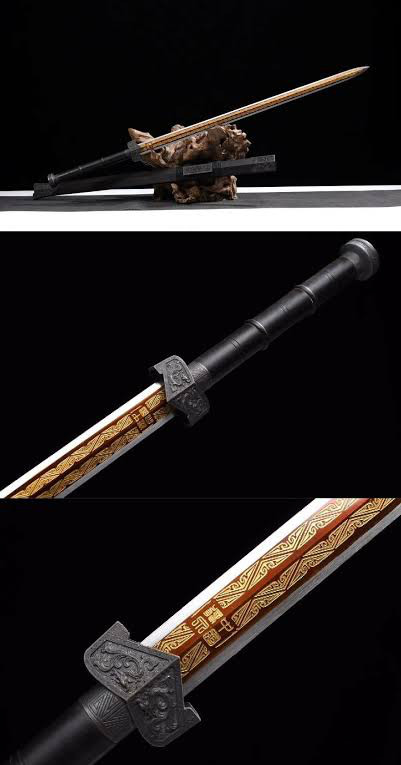

In [ ]:
readb64Recog(base64_string)

In [ ]:
predictImage(base64_string = base64_string , model = model)

{'confidence': 100.0, 'result': 'pedang/pisau'}

In [ ]:
#image 3
base64_string = '/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkJCggKCAsLCQsKCwsLDhAMCgsNExcVEBQPFhISDhYSDxQPDxQSFBgTFhQZIBoeGRgrIRwkExwdMiIzKjclIjABBgsKCw0OCwwMDg4MDRAOHRQNDCIUFRcOHggXDBAWEBEXCxATFAsRGREeCRkMCCIYHRQPHRANDA8WEAsUFSMWGP/CABEIAdcB0gMBIgACEQEDEQH/xAAzAAEAAQUBAQAAAAAAAAAAAAAABgEDBAUHAggBAQADAQEAAAAAAAAAAAAAAAABAwQCBf/aAAwDAQACEAMQAAAA7iAAAAAAAAAAAAAAAAAAAAAAAAAUKOQRSzn6MRSVV9VAAAAAAAAAAAAAAAAAAAAAAAAAAKFeZZ/DdWbdWNFuKueqdHj0nq11AAAAAAAAAAAAAAAAAAAAAAAAAKCI7L58voxsSmRrpx+j6mcedqn+b59R2AAAAAAAAAAAAAAAAAAAAAAAAA1eTwG+rE0HvH15/fbtfB8WjSd1g/VqettUnsAAAAAAAAAAAAAAAAAAAAAAABZucMsq8wqlndls9KwOq49UNgmh7tQ3UitX5tAAAAAAAAAAAAAAAAAAAAAAAAea8ns4wueXcffix5Pg9rx6r/PetfMGfqadm0ktnv2pyTt1yvz313mJOpWOgAAAAAAAAAAAAAAAAAAADFul1Z06IPzDbaX0cGJscbt9Gm/LqXMt/KOea3pfOfp+1xoBbdZi0PsbsudrZRMPOt3c/wDj6dx39EPn4fQImwAAAAAAAAAAAAAAAABStDXesW9CvnTbrl54B3uK2RYnvjM5n1wbpscV6bp3vQ9sfj3rA35L2wxe01XU0HULmLTxjc9I9y0TeDJAAAAAAAAAAAAAAAAAApWHdRXZ8xytHHSLEZysdkh1fq9MSPm3JOtS22y9WEWeL5Om9LHT156/XZlTTzn4dQAGO9i6AAAAAAAAAAAAAAAAApHZixzOsf8AZyXMPRz3qc3cyyQeFr5vAppsnEf6isd9euJedH6GKtmvUeO73QfO2w66VIAAAAAAAAAAAAAAAAAAAFNFMeeU0jvs5PUerOrXrqqR+Frp7q5nTX9jpJinGkd9HB7xXROe73R/O7wbKiJAAAAAAAAAAAAAAAAAAAUrqjE5T7i3sY/WjpOdHNerJH4W1cs+eJv1s4hi8U6xx7Xl1ONkTi3i70mm/wDP11qOgAAAAAAAAAAAAAAAAAAFKwNztY5ylfjksU20TvtnvWIX1bJfW4cdYd/1ETf0v6WJ2umkUeRy7qtiU9R6qRIAAAAAAAAAAAAAAAAAACiLdc6nl1vBed5xPOHPXiTbXrHOvHmVnJi6oKRva4EI3LI1qiZ+9TsZXt1GZMAAAAAAAAAAAAAAAAAAAKVi0rHL0b9rHc1lrIp5wZVgT7x7p1JsHZ96BQrh0xCmgrriu93GwOeWui+SPSi1dAAAAAAAAAAAAAAAAAAFKcz652dOc4u6nOge+mfTR4HUt1510d0XXvMTr93buJYNcAro2vKTWuxKgAAAAAAAAAAAAAAAAAAAW/HIrOcmNY8a9TDn6X31yrrFnuXuPM3+ffogCmH4wSujpiFJpXYgAAAAAAAAAAAAAAAAAAAoVw8fj1/F6O4+l9zFWt7smS7HnPvZeRqqIANdaxiumsWSk0psilQAAAAAAAAAAAAAAAAAACFNBr+Xa6r8bs6n28nva5fYPN0Y8wuZfmaKVAUGopinuP2r54mjMKgAAAAAAAAAAAAAAAAAAUr5K871MM305EYtYvrZE22fS/I12JR7uYbgB5K6ZiF2L+dqWpf7yClQAAAAAAAAAAAAAAAAAAKaaGz4lg6r1M92Oebm/Pj9bz5142yxvVc1gBTGMjQ28MyYv7khYlHq6AAAAAAAAAAAAAAAAAAChWjn3USPUc3nEoJButw/fRqOyZsqxXWNirV0ANeetJc0xkai5LzHkKoAAAAAAAAAAAAAAAAAAA8YPEredvD8fV+xlleBr+leffgzLPkGC31fq6AHnTF3W+NAe7+RLCzsqVAAAAAAAAAAAAAAAAAABQrGdHyPVVmajGxvWz3bm36/hu1syzc/zr6VIAMe1qz1qsbWlJDlSA8ZAAAAAAAAAAAAAAAAAAADBMnjl3QaOI1gU8etl8T/AH0+8vRiyT3dy2gChXWWMM9R/GyzGl2Vszx7AAAAAAAAAAAAAAAAAAADC+aPpf5xv513RYzIZiF9ZyJhV1Y2qvEgFMEv6vxojNjvqTmFKrt4AAAAAAAAAAAAAAAAAAAAApBJ5bhyaWSHNLOSSAMfVF7ExouZXrYSswtv6AAAAAAAAAAAAAAAAAAAAAAAABQVwMTFPen1vox5Tmbo83AAAAAAAAAAAAAAAAAAAAAAAAAGAVsRCybqNepWa+U5F8pUAAAAAAAAAAAAAAAAAAAAAAAAAHgNJjhstiHsAAAAAAAAAAAAAAAAAAAAAAAAAH//xAAtEAACAQQBAwIFBQEBAQAAAAABAgMABBESIRMiUCAxECMyQVEFFEJhcTMVQ//aAAgBAQABCALyowfNX1yc6Rpcsid0Exftfy9zeYk0ikW212ggMXV+bAGyXdfby17cafKj3T2on3zZg/uBtGvlru46K6q/UBzROeT094nlNnmTMrIPK3M6wpmnbfYsKjRp5NB+oaKYoUtECRIAPbyk0qQpu8spaTeXt2yuGd9Ehiigiy0zm5uCy26dNFTykjpGhd55nkO7FthXPCraW+gq9ueq2iWkGne8a+TYqq7PPMZ3zWZdsMTirWDTue/m6MYhjs4d33Ma/fyZPGTdXPVNPq/IOBzVrAf+kg1iiaV2Mk0uahjCqqqB5O6uOsdE3DjFZABq1g2PUeNK/VJe5YBYx/8A1MY4+OR9vH3dx1PlRuZVPDe+TBCZju6JTMsUbO3dNNlo1HAHwvbn+MaXJRe+3mEi+Ou7nbMUTdNkwBkCoIjM3Mae1AYr9Ul+iAWwDXK1H8J7v5uqCG1l36LQ3KR7SpJJDJtHa3qTnR/EbVms1NmRCizpPbY37diaiiMz4EcYwAFGKJCqWaSQyyNIbSAx8svtV5c+8MJdPpon8xzqzRC6mP6YV+acZOIP1C4RClf+pc+HH3okCiN1wAuPfAdSHkg2n0gghVFCqq4FHAGTd3jXB6UNva6YaREq7uNflRP1F+k/moIes27hc09lbNzQsoBTW8T42ENvqPDkqh2YNFKvEquB2j/mMyJuutJEq9qquKJAGTdCaW2Kxw28cPsi1dXIiGkZMbAilAqKIzvzGntgCta1Fa+IuJbdcJMqJgNGsndo7brzCOABSrqxrgLlri72kSK2Z2JqMVc3AiGqGQKTtwDSIZn1WKMABVUY8XdT9IaJGFeTa5ub8xPrBdTKIV1/cZUGhLGRz1IOWq5uZbqSraAQJgCOp5hCuA7OO6tthkgPK2iwxBFCqq48XcziEYVVLEs0023ZHbvFHL3Ro7P1Zf26ULdv4XceJRClrbCLuKLVxMIF4Zt8mh1Odu931SCFY11VFx4u4nWBaVSzFnll37EJxwLa2x3yIlairqe76vQSC3WIUqVPMsK1JKd8uQudq5Lax28AjFIuPF3E6wCgCzF3lk37UJq2tsd8kaUB8GRdtqC1NMsS1IZGy52Z17snhVt4OmKRMeLuJ1gWuWYvJLJvwGNW1vjvkRKHonmWJaZ9mJkwwaiT7C3g6fJRPF3EywrXcxLySSb8Amra3x3yIn59E8yxLUsjZ3dtH5o8Y1t4NOWjTxbSd2FZXErdeSTfgE1bW/8AOREoUa5rmtvcVJbxTcmRLiFykzNxVtBr3OieLuLqNMoIJCy6N1uo7W17MjwuUe2tiDvKiUPg3w2+x+WWr+quWi6fSaC2AOzxp4u8uTF2JTuz4zLMtxBiXk1Yy9VNWHxYV+6jEhiPZIuRqEfZqlSPGajWseKurrUGOFCoPdxngmv9ht5JOXhQKAFHoaKEv1KzND/yjkEkew0G+1OMrUfiri56XahUrzRNNXvybSDPzJFT8gY9DGvoBxI4x2RF4pGyJOa6gqNs+Jubnp9kfC9zsxb3JrBPvbw9U7si0PQxr/JJNeFjSjHxz0hXTNRr4i5lkWImHtQbFmLHLE/idOkFVoY43ljWc30KyYSJkdFZPiT+P8kk1xrGlIuPhitKx4ee7CPolzOYIkeKeNWT9zb5JPCdGz7pLeBpn60skCTLh1sog3cnxY/j2qR9PoRKRceLubotmKDiMYEM+mUnzJaTEJBBGvcr28cuvUVKAFaj4sfx7VJIU4EaUq48XcXJlPThJEfAZq7pG1WKALGEKJWKx6GP2FSSY4qNOeVXHimKqCWnne4OqM4TtQk0qvI2qwQCMYCJQ9LN9h7VI+MaohzkouPFO6RoXeSSW6bl5P4Re1JG8rYWGFUXVUTHqZvsPapJChwI0pVx4qaWOFNndnnbeV5Nu1CcVFE8rVFEqjCquPUWz7U8mMqESlXHirieOAcnaQ9W4kkMlE4qCBpTlo4wBhVXHqY5o8U8n2SOOkXxV1dLD2p7fMnd2kOSWq3ty/dIiUBj1E7UTTudiqRx0q48Vc3eD0rfti5ZmLHJJ/Fva/zlRKAx6SeKJLGv8Zy3ascdKuPEk8c3F20ny7fKxDCk13McLb2wTlkSgPSSAKJzRNM25+XHHQGPEuyomzzTyXJwpYKMKTShpG1WCARikSselmAr398jnJJk4pEoDHiXmVELVLJJcNtIzfYE1HG8zYEMKoMKiY9TNiv7pmXUkneU9yJQHiZJk36IU6nuuUEDYBNQW7S8tFEAMKq49TN+P9Z9cGsM7ZZEoDHibm9WMlI7aBjIJJHZJCWikKvCIjDa956iJSrj1FvwTTN75VSTkoniftzc3jS/Ltx0oipe6uTcYFQB1LNSxk5qNOAKA9RbNE/hmpEzSr4mSRIk2knuJLnii2vauccm2Z+t2pH+UjoL6ScUST7s34Jz9CR0q48TcXMduOZHkmbecuTwhIWoonmaoYVQYRUoektiv7LOPvy9JHQGPE3N6EzHB9y75L0WGMCC2L90kcf2Crj1M2Pb+y78VhnOWRKA8QxCjJubySTMcWVQVy3LkljhYLXHdIiUBj1Fs8LkCmk5pUJOSieJdlX3juv3E+tXo1cSJ7csqvK2Egt1jpEoD0kgUTtRNM+30pHSrjxMhKoSJZZZSRSu6EGHdXg7ltnaXVoolUaoqeokCj/bOAMk7SUkdKuPFTLtGy1OndvUcaafNVS1Rx/hVx6i32WnkxQUscskdAeLNTREksgiP8kjoDHqLZrOKaTbiNI6RPHEVoKA9JYD3PPuzhfclpKSOlXypf7LTyAcABmOWSOgvlCQPcsTWQKaQtwiR0iY8q7haI2G1O4UckvJ7pHSrjysm+vZnHv1uNUVCTlkjoDyxFGLNdGgmPK//8QAJhEBAQACAgIBBAIDAQAAAAAAAQIDESFAABIxBBAiQRNhMkJgcf/aAAgBAgEBCADtejrfdiD/ACvJOta/Xbx49u1r9+NK7e1jx+ztdPPl209uY9nz+i738dqIbdGg/Gbv/QftMtOh4ddiGdaiq0es/aZaQkmTiU5fN+b6xSfH9+b35Jvg9ST1Mlh+J1ZlpArC8ScfeZV0SEHqXRP4nVBpAxYg4M1zMsH2BeCY9eC7JAN9UFQMWHRxlyGM0K07fAV0TBAeXRHyu+thxgHrkyzBoqldv2x1J5VEc+PLt6uIi9y/yuLYVTTt+/8A4vVkV0O4fLmOLhWua7IbQ8x4gPPqf49AnamWnQ4TXtP87E+viq7ezENuvDAp6zVTiPWO1GNryMZJ5m+o1+E8/L2ceFrlmCRXN9Rv8Z3+3s48P7riDbmztcT2sWHTtamBXJmq3tAroqNPGPPqUbyN/PZjG35OIJTzJUyOONdqMTWlJJ8y534jb2oAoKpmOXJla7eL1K5y3NUMtNfPcD/t/wD/xAAjEQEAAgICAgIDAQEAAAAAAAABAhEAITFAEkEDECAiUTJw/9oACAEDAQEIAO1Zdd2cm6iWo9yc60BwBXB2pzrWAnNETDtTl44f1jGuTbfalIiW7f2Yx9spcGcGXhIeOukr8pwj7c5lkpAW+Urt8I/6CWt+Z1kHnJeXqyBvyv8AZhDVua6i1hL8FAtVlthFW3rMveQFb+vK2sUC2StLGN7615KeRgu8qvq6txWeRiydmuOrKWRiycr19/JGS5GLLWVXVUNp81uSpw4PwesoZKau4mB/e1KV543kT+9lQLT5LUxgO8CqyjsqGTV0fH8eeqOyoYt5GHt1XalKsVdZCFbe1KfobUMjAOe1KfrKZZGIdpawTGF4Fa7ShjPIF/tLtSl6FXIw9vak60F5GNduXGRihuj/AIp//8QAPRAAAQIDAwgIBQIFBQAAAAAAAQACESExMkFRAxASIlBhcYEgM0JSkaHB0TBiseHwI3IEE3OCkjRDYKLC/9oACAEBAAk/AtqkbadDv7l+p3HRg4c1a0RlGn5TjtgBwbb4ova6M8m//wAlN09XVB7ytvrtc/qG0cAgcFHmhdH77X611N28qcZxNeagUdFgkz5nYBWrHIbWtGw1PGmb4o8Cqdt25AAZFkfFTlGO1f7W4lGZphDcpXiSqVJjJudim6JykGtHlNT0RXakgFQWW4JtJoEkyAVozyjl1OT8ziusddgNqGDRepMFgeqMr5Kt0F1jvJHXfbODfuhqMp+77bUkFq5MWd/FHcuaGsbDcN6o0RXWZU/ngqN2p1Y/7H2TXLjAqnYb65qN138Vfqs4Y7Usds4ql0lDiurFN+ajQq5V01QSGd4B7W4KOUwc2RTg6AjG+G/fs46vbf6BOEqImKlkxXfwVBTN+/KeiunnDXsbaOJ3IuyeVuyLzIpkAJCNfBaj/rxQ/l5XC48NkxzvLI9oJo0ey8UQ5qTBbPohAC7NINETwVXmQ8gFbd5DMf6j/QJhwVBjXxTnGHaOF2ksoHm7Qr5LSLY6pNVDKd1zrl/K2PcqpxY64qSALCJgo/p4m5czic0gKrq/N32U33C4ZrfaOH3Rl5qfFdWKb0AgWH5VpP8A3H2TBq0h9lksn4bHk28ote3cjLFGO9OLRuXPPql30wWs/ve2Y6/ad3U6dY+65FWG2neioKDZk4z0aoAS1CMMChouuwPArRnVjrPFEmF5U4mKIAxKAypq91w8FdQeubrPpxQcTecVHmpDtuQg0U2Z1jvJOJF7vy5DJuY0V9laMHjdemia1VlG6g0nwwUdD/byatu6w+ma2VAxQbKS5nBUv37MnlDQepRiaucVJnaPeTGuiNSNzlNxoFEcEXAYKD39oivAqeUN+HDNN5sp+se0i7kpuP5Nf3OxOzJ5R1lvqjE1c5SZ9c033DDPqudSHd4rWe6285pvNlqiSZxUu1NCbrlNxtO2ZN5stRnVxUsn9c033DoAaUIaV8MM03GyFrOQYYGnqgSTIBTebTvQbMm82Woz7RUmDzzWrh0rRshOGkaxTjDcVrONlTyhqcNw2ZN5stR4lSYPPjmtXN6Vq4IaUawURcYiUUNakFPKHyGA2ZzKOte66G5SYM1q4dKq0mvuynuqOGo64q9Wz5bMMcp3QoNypsPuJ371GsG5Q2mu38VOHaFChrdlvSkb1JxQ4oaeldhv5LWIOoPXjsy04WsEee9Shhiv9Qyy/vBGPZCm7Jy0sR0QdW9QLTQr/JckANmH9S/8xU2mqpdn1GecPlQgBTot1oQ0lCsdE0+yH7mlEkCwy4HFXT2XPKHy4q+/fns/VD+mPXpiWA9EdKKfJ82lEFA7KnlPojGN+KpcM1kXrqxZGPwBHKXfdTJm471NBaWyRHvOwRjHzXIZushF4ww5r9NhGlO+9ZOORbLSv5Ky6nRqusUyanZg04db9kA5jqk/RTyXbZ3Cp4QQ0/4mEcm3st4qkYzvPshSyRULSfuKluz8803m73UyanZlO2/2Vo0C18jlbYw3hHTyT6fM33QrSNyEdGnwIFxoqmp2XS9dXe/HgoxVUIkrWgY7o7unzOYRepk1OyzACpUsn9eKrec3iq3np+Oa3gpk1OyzAD8ktXJijfdUvd7ZuZXM9PxzQLiPDipk1Oy+QUmCguCkz65qXlCXTpmEX/ReOy5uNlqP5gFJgoM0m4oQHTpmtXnBc9l62VN2HFHSe65UwzUu+BZzH9xw2ZN/adhwWtlD+TRzVub7/A5DN/c722XS9Wb348FaxzTJU3/T4Pioht5x4bLOi0VK1MkPPj0JuvPwZC8qOhhjx2WC7RmQFJnZbnpeVzPTrmMAFTst9TstzP5hu9lfI/f1Udfq8ALwd4zSZ+UQgOnXNyC5DDZes683R3oaLWnTflHpweBagtZp6t/od4RiG03qlOn45hHBV2UYC8qIZe/HhuQ0gDMeyBawdnFAtjKCMA60Md+5XdOma1fsswC1Ml3fdVw91M/lEDMQBF3wfDNHjsubzZYj+1twXN3tmkLyhz6dc0gKlSbh77L1spebgjpONXlSb9c1EIDp1zcguQw2XHJgSe6/gF4KlzVwCm7u+/wKY5pnD3UzsrieCB+Q+am3K+TlNy/OKm693t8Cmb/L22Y6t10N61dHtJssqIwFzvlRlXTH5VCA6dc8m4Y8dmSiJHemwBk+Hf3pszZGA38VIflEPgVUzcFM3btnEsca4Hip/AkM3N1y5nbEgohu2ZnDbFM3ivHa0zhniG4X89r1UY3qJipm7D/mH//EACgQAQACAQMCBQUBAQAAAAAAAAEAESExQVFhcVCBkdHwIKGxweHxEP/aAAgBAQABPyHxRoytEWIyaG/jKhnQN5SDqvWO+y/aW+r/AMwX6kptVutDADc3hnxct8oWuwTiFYOOid+hCJHM6bhZvLMLuOOOlS3iwy4Th+Vs5Pn1SgFxxs84u11mz0jfYFHijBxKOPCCYHXpXblaxK5wvJkYLcOmvH8G7tKlG9Y4DD95QeK25m853nsbwkiyvJx2gc2lwi3UOo1zwdHV2mIOtNbej6X1uKZR805mHihD5BrwEUMrwNB24e+ZgC4Ds6QKHn6G69o1atz1/dpfWIetBV6q1hiOgfZDxNGfu14OrHZ9Y0S2EhuOeMRWpFy74INGH+JOhCv823zHEU1YcP5WkoPE1RMxU1M/07qyvoBU9p5y1Rr0o5jio2Onj3lildl2fWQzJ8XeFuUCvEgEgGVeJibVYa25pLxXdWoX3jHYhodXpDV9sTl1YtV0+rseb+YjecE4OOwmh0V3d17wg8SXCqAarES2+nofFRU02dS7JhThbal9dpRH12/VEW3WAt/5oe2sXN4mn7/NKf8Ai+YNdhrYl+HqnR6O/g6DOmq9g7xfaR2zcrY2Yc/Yl1bG0bsHK/rzi85/a+xDUaMDoYgUS6zsay2jBcfjbKL5HvnvXUmDNCj7HYbwb8NR0AwW/wCvlirK5DTyxAmxTZmypaub6W4/ZmiAAoGgQhNY/HH1l48ydt2DE7TquU+XtxDbMtKu6O97ZiS9TSeXdUKsnqJo4G9yuDY/L8y3wivEV69pS650gYhg5u5Mhbcv5GJSdR0PSXO1I/h1YQMOgQRH2tH4BbL/APP6H4ZCE+U+xDUegBfK5wCuDj5mBSZ6Ox2EyBhWxv4ZjsqmeZ8/2mKoNmrtdaMthTW96HnwdMY0NVT+ogDVtP5LjogXfmVmJg7V8pnTpZ/LtATR7NqbPPSA20NpryMIIkICtulTNwbWmWBdLZ/is3nWLdctPb06p6uDV267x6JrQqM3rG3Bwd/sR9SdExXEdpvl6PRsjuSrbB+EOx+Glj8oQNIDwe6fBT6HVjG/bq6/ZKU69FrWlX+GHFpa/qGz0R5vWcCHmuEJYiiKOc7fqbXF+0XGiusZkudAe81qXN67oAzqNizWgauZ4Q8BVZsVDCIdZ2pSUeD3SBtMqdXj9y2zyFQ9CaMBFvLHz+zmC4E6t9zat5nuhOovz0iWGyJl1E9cB95Y/kzUNOH5mb4NBv1dY7Sx9nRV7dcbzWbP9wB1pM9CbOjiPcP5B06zQsEfN3dgjwvfT7XljpWOMK0GtIAiJd7HpTiGIQzOqxX3nGQLT/suiVo2WepE7lHBWmz1dITMLUP76sa56fYdCc01JhgNus0hu1u79orJyrXGusM6vpOX9Q68NW63WEPqrwXGbyP+iX0j3SUc/mv8TVUJXZsNOMx1u9NPOXXRZqJDyJb09W495pAV7l6NE212dnR7oIZgQ4NsdWHePUb9cTJs2qxeOIAKtzWK5pxBGRctr7EEeF1gr/ROkunNq29q4nFHV5+0pai4CaFG19B7zfYBA1zMPlX6Ivpeuy8doRNr/wCiYepptxwHRizRshKJztEHcbB079pSz4KjpBEPCtk/754qXTll7HSb6DV3fXpKCgy6ExSs8rq4w/ibjKDEYpmzb5nKVaz5ZO70mEi7JiuAOOk3IKxY9jt+Io9Wh+oGPKHkr564Pv4ZOGf/AGgXsWV0Dg4m7/Vd0pKDsRqFlr7d5vMAH/WpZ9f9l6Q9kRVY48pu9drNjnGksm2aasrYfKyBGsrjwrLvlrekC37q+gdJu3RH5RWfgj0K3rbd5vZQA/7ct7lfN6S8dZmtOMN4jOvfhD7kRQmABq8VU29qX5HWAQPCtlqWJoMbcHKfCRtbsuerPv6EUQ8svt3m+wURJVbwectdphaldHpykM0DQOfJokqLUUGYyf5DGvUhzFqV5zp4OsrgV4UTiujYXl6ax4RiH2mWn5QFCGzuZsqM9XRojp26wJzj7dWc0AH/AB1niG3UsuXGnjOj2ZRXReoe0eGWzp0gKpfL4gm65ZoF4fVrNxgV4UVpXOI942br1yt80LCpkaehhYgwj6bL11he7u/pLi+n7xyQFf8Af8IZ+mnb/aghQWwgfaGhsimLo5c3xNUw1r8vnL8wp4UXUnCwNwbxFK1GzluLZn19a6zF+pgLtbqdOL268zUZMX9gundhHzYH75mj/rpnE1/YGzvRi+scXEphnvrduEkG2qHhgFmsDvBz0mGbywnDwojg0xsIMywr7jf3mS3HaJrHrsTG3GvsmDrMrxz/AFHW4P6FuDTeWWJ1uZOp/UqjiHatIB3GN5NR2xH9RJRl8rMsXs5O0PCKOJdXY8vWYFySq1UfvGLqyw4by3OkYzRe+9iOtsFH0W4POLtk8THuLuwdeyLauT1i1YKKFNLjetb5I6F04v4yoh4PbgGOHyEvJ3I5U9sRHWtTglscui3QvKNSu7AdDbzNDVA47jwRe7K39vo2/MxxgLwgAXXeOOrFVXcc7BEqVlIA8HKV6pDVdObN0/Xft0XrD96aeu5XT8dohGZwP0iCwmP1t1ZbzUbWrXNffonolB2Oktyr0fHnWsLRQAwDQ/7srui0zrHoOrjYXvuqOqq6r1f5xKHhXxYgh2Dv0cUQj8hgV17u/wAcahfltydkQU3nwunEPV937XpNAqgwBpUEf8AD/mz5mKC4xifHg5Yt251LeGPCsAqgMp084mVNBP6sHnmBeehYd5nbT7x78QOYAHH6I6HM6OguKZzSkPofFPSXUo67oOx1i2U+Y39doY8KEtlJMzz239qafvlzoQV2qutyoNu/DvNaL+ZBCAPp/Y+yLSUrLWnA0tjrDkJBHhX3sSeg3mMtTtd+uHSnDfenRFDRPWv6H9hIceevLAgx9NnDv7IoP1NjLDYcwt2qi11X56Q/Cihum+vSLmM3YPeV9D9e6AMdpieD8+8I1h9+8MfSzpXPmXVV2CMhupoOsz8rlWr3hjTwq98d6r14I21TY/TGAD5teYejymSX3XQhgg6EAfS1vFxMfn/IvYS6rXy39z7jadV5YJ4VsUMbOqWmsyOT7EuLhoNA6QgxKS42uYeAADQNIY+lQLWiOsY2HPeAVzNabT8I6wKA0+awh4U7UaGz+K5q7np2eZTuV1Y+mbsShA5L+fZOX0hjH0gWZnWnwY3nU7zTmvhf9zQoxAHhICaAymJrpp3/AGJY0O7adusRu7zleZYDcAqVxmt0jdZSfTnHkRHb6cSgxdb9MNjYd32pgMUcQx4SsPqT9TOPlfd7ZpXN3d9ib7Bg3cx7L8yUwAfSby7EVV/4ieSsX/eDmK9i16+jpNPEPwkewjoG7LXUZP5rDD0Cb7rK40NfSUT11tWBAfToyFvJ7vtAaUHd4DeIFaOfi2/ib7KPCQ7Gc89uqHwwK6VoPRtGY8Vn3hTQ0qmGdViZ3rnp8YgIgbe8MfVSJpavH9i7/wCmFZbHR1Ybh+T2SvWB4QzCyqGnT7Uc1oyW64XliJuxeo6+v5JxCf424P1TLWaqflMYVQwODpA+pfjTv7IBj0PeU0BOj3mujRfBwdpRArwhQSAZTB95lHRb+3sh0QlPV6W1lZuLvquxxK5EBWHW1TpNSh6erpdcr2AqVH0rWXARsTHHmV4FvEsqu5ejFVvnDDwl4cvV7Ef2LjcwApy+OiOq/p6RkEK/cnpEaTbrT+5yQD6TGZkdG3uifsy8io68+06UAeE572hr58E8iz0Ingx2CAkM3q7r1mHYdXQ92AahvuerK4A+kjzsIqtvzpMm8RbVkNNz8bTmh+EsG/l/LFyHI/VjkZ33eCUSuInmNpu9oIAA0CCIfTos9zsRavzGEBVzo6vaAv6P+pzwDwi8NGxy8Skyzj37MeBNty/uPAD5Myit9TgJfKdjad0tyyt9LHHmuXaIIxQ6dsHV8TWC6r+uCCawK8IEbaD0BlXiX9IpeuaE2lf9j6CMq9/U2JR6+XaNJz/DhN1lH0kWuI+rHD3gmkTDz7I4zu9esMeEiFboS1kElXH8yxz9Wka84eZj+5hvNvUmhPOAnFbQJoHq94RAD6eu7CK235RkgBqsWw7G79B0nQ8oHhSiG36BKiKqm7jrTa4q7rjbVO9YRswaJjyO3eAbBCH1Z9R54lh15Q8TLoawPjNG3Z7zcYB4XnNUnU+xl8uLcNF63P4QfpKBbpExIIGMdYyaPgo5fxO8rqasEJVeG2kySj6SeWxEu8TiFLgRH0W734mlig2hniveN2KGW16zfB0HzE1WvGx2m5CPFALwIzRZ8ax4Eec3O07czuK6rWCNIFeKYfX0/d4lJe+TiWdFbRHUvO/QnSog+KkFQerjpzK5uzKdbihDuzbzYHX7B2JyQTxc5kOuHIHin//EACgQAQACAgIBAwQCAwEAAAAAAAEAESExQVFhUHGBIJGhsRDB0eHw8f/aAAgBAQABPxD1REg/4yrFBJFgjTuvWQFIC2LOjEeKWsPdbh8RhrXYunHqSlJw8BzoJsIF+rO4Cb2VFPfGE+pKEWF5kitnKVdKLGHcO5y3w410KUBH6qWS08A1H2eJrY37LQz5uW6EJjVWa3Zh1p7BTR5x4gMMR6oi5YemceuVrFd7Fdo4oYRdAaAB4oz8wd7cW+Jczt0SEhDUa2Cq2wA49UUJiMbl+Z9bYRNPujWrQw4WjWIA43dPkgojgNdH2Yj4as3+dh7qae1vvlR6fU1CMctCcDNTe2xOuMOMd9phxeKULLFIvGWGOWfDerqCcvOPPXt0G+JvUWJEo3OzpMQ1cVduUoHqShBPm99APamAIhVShoPyPK8xMXD8vhKsiPPGLS1DOIx/Y+JvklI+P7wzx/EmX/qC9XUpmrleosAzsU4tcmt433JBcJbbjKJaOJvIPYCvgPw5hxI6Dy8c7eUAWc+ntZNQKkoNTeL2Qipt3f5gDB6jbCRnbUHlcQm8FKD49PBM44KUguHhdPXBMtahYAUvC2L89N8fTLBCYc8L5oDzFu9fsHwGM1ivf5PKUqQcepEEmXGA5VdStyjhXfmwTpqaoA6F58MzQxAoUBwLRR+uftp9dQxnSt1B1VC96+OLincl7gPusghj+GpaA7dHvK8vslp1ddwXNencZSopmWtoNymSEZRt40GKYplKDABu1g05hIbrFfB08dugADWA1iPQUnLwO1YIAVDU92jxgIOJ0TFSVARrUgCrwdxnzwCVbXRI1Shb6T3UvxJYdc0LrFG3CoYfTG9R8dv7j7OBe02q7lKasUZTyiljom6zHxKwDIuaBUHgagFAHFEEFfb+5n25i61b5l11q3Ys+SCZfMLWorC3Lk8kZE3V6NOjvHI4Mf7fiIax6diGR/hlzb0gf21X3WagtJb/AMf79HsqkNX8+/MKbcuOfzBjZvDyS7/BAfpR264cJtGIkcCS/CJcgghzcsTxl5WJsD/grZln5rg8+WCarzMUl/WybAuAgXLl1NRW51VqH5klS+DO/mO7/e67c5RQHDiiO0TSQa5xC6XvYj8ZAbTZswPDtt7Yq+JdAZICvlFPkpjOUErxPLL1ejMCJ0BAeLuEKAWXTmkWrhhqpMRtmrkGxoGmOiAF6qvYu405MIJo1gIrmUWkr1vUttvnLO2Z9AW8wBqJFFigS1YkMKAwr+JADyhPQKO0SHqre6+DIZq0XAWzdFWw2mQJBoUwGLvcOmuAtbp75u5eJKUgeHBKoCMeav4oGBG2Y/QAMF3jWGvVufdCXhyxeAPRkshvGdIUNiLVRL4wVjy1ki9Qu4Mk9iFywIuu9UC7O497iDBoC3KjK2XS03BMbiHnz0R3EAnz0sODt0jo+66IOAK3AYaW1fLUu2rLWSu9eXMVqbd3xWsthi42t4tLI/aJfRAgpAigOD+BkWCc9RSani9HUtPecMR8L0sLPc2Sizbc15Ir9dbfeFtKzR4Q2iYpkrwC15BuXopGG57QBvRoBzNHYhW2z2Kilmuw+5hCCog2N2QO1YWDEF0RBtMWHiKAtmA7+jddidEcESq7N2rYd5Gu5YEIUq71BYCwordTly5CnXltwQ+ZQe93ntMpMb+h0+jYh2YPFfCaTjObwY0+KBVv+Z90UmLyzuGdx2QVN2wplPZQyMtDW9gtfMp/e5oPliEp3X9/oa7li+KHXZ1yzj8BmLrRvCt4fVqc1bbdhlZXnUT1MCymBQJZLHVA8POn6bdSihk9k9tYYx5H0rZdSkGX4xrwQ05azp2pejRAuQtaP8Us1s2A7eVvoS5BDRoHok8v0MdjWEoBQCq91sgr/SSpfnrtlFV3Dbvy9wQbdgw6QTbnsnyV3GJxEDUYLKNBa0WIp04YQywJAO/wgimp8pvA0BAGMw9I5mBlSbbwceESzqV/4W0OA1K1qutT2MEAWqctlUUN7V0zclkILNQVW3KtrDelVfUAcsZm0hckB2m6qCxo3/l0RmHsozyRmurUxWeRWR50wNjPEgUl34RdYrve/gEMKFwB6TZNQDT9zg0ged/R9HADgimzwoPn9ZK63iPa8fBEeAKui6sD0g1GnK3uARGk0FQgK1eWrykM3Gt1MP8AyRz8RUrwGupAZp5gCZGqnSZiqYqkf8kZaVF6vBAG3oTbuCAoQA9JWpoYsB+66IXO/qR8A6Iyzhr8lOIBWFa1K6jKrn4nhE0ZM2zCj+RApUVG7/CJfZjnAq0cHSoBLUiSuwsmKL2ir4zJ+YGDLw7IkiL23AgHpJcw3QEn/bQgFF6ocdA4CNvvb7X5R46h1G3A8+XoIiPkfmS78EPsLaw2sRa/ikTU4vl7poQLyYpDqaDC524/siNiTNPpqrpYrfPEQI4febP8yCCkoKOPSVllbrgZr3ppfBCFZ943FP2hHMyWc2QMAC3AtsLQ1cN1cM4bdwaiEWF2p8QHhOZgFAEu7HVicshNeO4oQ4yLRhWRbRo5zkY2nOBEYGIBHXfHvMamAec/3WERTMMUekqlYuU3n7qVdCXCXv8AtMfAWQ31BpndIBpAG8p1q+/KuugZV5x+wxjWN13nUwor+Ktc2H45gKWND22a4gqgwfZYy04/vf7x5ZiQoKKMvqOWR5j0RVnkaypVsSkqi6LQtthy1c1BlbYYo9JVEqGjVks5p3cpbcjLY5K8ue+4kiqllXNpycSqaw2NTNDk6utbX7SqVZFz6tbaExP5FAc3vwjILwYO6L3EIQjjP9jBBu9A8PgeYdSRa49gLSsDlBnsq4typA5M3lhmjHpLfEPqii9frQEYi8YCi3bEiCsjPl92b13AtbxaM4/Gor7A3Zkxq7WquFrBFCjK0p9LopuYsHHT7TlPK5gT+bvIUyvjuE2Hz19c6/AhZB3iLckEC6ZrWU95HDw1MLGaSheQuLNEDOAK+UmBpe/j0lXiVePOXvTdFn0bGMTeXJGWAml8vPvFcFNrwBm78QRTy1aVnA6mxlzUdP6cNWK7uGVX8sscVrovnxAAsw/kdnlEKXeZtiyl+eHmaNy3dXacAm2utJQL3iInS2XAlbFiNqiPSbBiv0d1DZRaTe6YX7ugFt5bmlJpyHS3zBMNEw3ya4y7gnrRGYJqgc+8plOXj/uggzOYIVo+hL5jlx7e0QQLsHL4gG4ZDg+JuunMvCYUV1kwW6IcbZXdPi5jR9g/CalEx/8AzaMOWKqgJp6NeHxEZsrZt+ZLlSVltlt+blndYDQg0lwAWroAMq8Ewq/K66YynE5pLXFiwJOJXZS96rLNduFO1WOsj9F6vXH9REkQOBa+xD2vRwOqOD96jVK7O/B0HBAeC5RxRFHRLcge8x9Ho28TJGdiHKGBmkLMDxTvc9IVhdZ27VxfZrYgk3lkt6KC7+8qUWy/Cph7eupUK9E3xbuAdzt8YME9lTJlbrvaJEATBKAKADUNfxl+Ifoh34dIpuXMHg8Aflj0jvfNfA0IIWQA9JLTKAZTAEJGz3HYUvytdo8t5riX9UHL+MErUn27AODITUmsMvwORGIoIKdL3uNdAIZQGAPBKRRM9gQyij+K82X4yWJjaVt941Ls6fiQjG7fRZ9ng4IRsh6SoWVogBtUy3kqs9U+SQAkmUfPLUARlkcYHIcbcT46mTRvgD/LE32EBeggizW9srzAQQh+jOsrr+mUDFvQtq9ENCG5qHfXFH51EJCXmoBeh0NTUfSgeO6gJSJvGvmlb8aHZWP1MBGXrGr26Zmat2h24NHme3sXUBqTCB9DLFTx/VBKrrjmHd809XPhkaobll/oOCAStd+k4uADNd8nAMt4IbWWjcDjvJ8EFUtHjtu1B3T44Xe8qyoFGOF+e0RxWlnCpw88EAyQGH02Vk07/EXugq62uP3bHLavrPbLqIYML9DPR0GIPMek2TejwvjiWcV0P78M17t6fvqQUAtwJaNecJ4O42tI9ruTGIFfRSs63cYo0N8/9I4W6gsWsYpEyrpuaP4jN22mWTh8Dg4mtIFekLmCbLJnmN8IfCe4OohzNw/+KYLVr0JitNnceIzhft7fLDOD6UC1QZVl7aXLt+YEFfFqoSUHrS1rl3Yaxb0l0qnuSZyt6go48sCvSLlwB2Gczh4J/Z8Mf0MHnChqVLJbo8EZE3I78TwysC9CoeAIYxn6X5gyrDgEtu/KM+paUcHxE2mlPVnPbBAHK28q9rlgvGvSbvRF5Tde/Bopcy2K2J+bxGlFl/VcHgloJX4GNbmB3Wsn2pHaQBo6SsfSbYQhhx+y4t2xIIDLalH+YBhWa829Fyc8IQCgavOfOYCx6QtRIxVKgDtY7CdbxdZePO3L13hlXKsOV5ZYu1ItvohKWoG08dsa6LXdw/plzz9xiOjBg6Ecq5cWi2c6AiFpu60Xro++YQAA1SYwekLULRV9rq214jtmsipr+PqFVrlBj27+Dl5ZZejp0fF4Y9dKrPHbDlQ/+mSpZmVD6aK0nzxUxjL0uiNWWkKMfZmDAGsFm4XHWbRNAoDxCMekLQvWWNcTvw5ydEHDfwQbF7ok1kD2/d7ZuS+zNwWdCby9sJq05UQQst7gB9FwdJRYcHliNUrt/XSWa8BC3i2ExxavwTg4F/wmMCCSvSLmPkNnOYDVvKQvQoMB5XWmX0ZiWwtYD5S5xgGWxlpk5F86O9+CWVA5e1z5e+IC+9Hbz2WDMQKK+m+V4E1/lFJZht8+RYEXqe36DjyuiY7JsLJddnt5ggRCPSFUd1ZicIE7OhNiYxTxclgjGdIv3ASY6gJLibTojzzO8JhQiWN/0CWiJQZgMB0gWDUPouMFq15b6kEFXrzdxxQYXA8vQm32HQOh4BDIoXBHpA5vsADtcD5ln42+5HPzbm+VFxG0Ni1a7yRunqy8cb0jZOsuAaVjtL0KBXrjOCjnbUxVgF8EEg3y/SJVMhXXzN+A4Wx21omf4w2HmWSVwc4BqqJkg22nmDlC4AHpFik6vZ1uWN8778z3g5KVHhq1wmYdzfH6BFPari+/nhGFrgZG++7LskmrDzAr6Ey8cBtejuM6T7B57ShRx8Z3ftOHx3Zpx4+ZcA0N1BxRj0m5tcv23uZOBTOF45+7yxlUMPxQ5ZbylbnvkzVSquewcpAickZ4GTE1lfQwkZbTt8vQStRfGjxBB06+T2O3oIid78G5uur2RmEQTjHpFKx1A8b/AH3UH3dsvLLraynlOJWoGA/u4Wb4bjroQjZ9YhnASlY+kUuRAShVyu2DCXo2Tw/bHbtMfou/LiVgj2gvpCJ1gcyYBL+r0pRpWS97sLfeadu9QoV53h7k+DQANrACGR2t698jFYN/FewEMCvpVFqAZuOLDQ9xr2M6PManeFAr7mvDnUbotxKo3RPtEJsQhj0fEfMhAcAsTSoJZvD00atycmH6CRgodM2fBQRM1O9omrUOEmAp4yHYhhRCNHH04Bh/2JyXac3zBKZJwMbalMV4dnd86hBSUt7l7NywYpwQAMekP9w++456juU9QNrWveS9qsGSxXgDcdPmfxZC2/dSVMOJLxc1S05nKo9xXLKVolAB9OES7T/cXNng6J46bL4qKIrZRxd0Mn+3UZS6AAQEYJRXpNtynjGV95ey2aQib1tzuOWtNnhGWXDwQqtgD0KwcIECAG5P0vKwDguAGvoZlUaXjClVWyuPfPHbt6ItJoX3r5XylVZGDmM+lh+GmFHWtENdld7jGsFhrsPJliKVVUhxgJQH0P1AbWb47NL7xiYvsY+C42h+z7EPamzgBzXxAjB6aLKEBtRA0D6LJZ1fBgy7YS5hkZ76ZkrwRj+sZYCgAKcGiBmMECvU7hC5HjhHx3EG8ZdvviVtnm18qlDzBLc4X/efLKKRuEmqPVFbAcyhY+OX+hAKsV3x7SqCjT/Y7JmXldxAFwYo9TvMXKbQNUdrp+4gmIvl+JK9BLyynim2IUc4wfGGz3uEgVCsBAjECteqO9x3sck8iLmwWxt2yTjGws964IIU9A+Pxds0ohZRXqxIncz3lq4HSLFwnqn/xAAsEQABAwMCAwYHAAAAAAAAAAABACExAkBREUEgMmEQUnGBkcFCUHCCseHw/9oACAECAQk/APm8GB1R8ryMdVG1PVPdtSJUDlvIElMBvsoF36r7ly8BBuH7x34SRk9fC9y9fVettKGtQD408eHnP4U+9tKncpie2U9XxI6nNsNSnJmpT2uU5M1YT1Zt3zUp4Gqynqt2OxQfenbxu3UiRsQix2xWpu/MqRy3j6SOifu/v2RuoymCOtWbtgg15GN0Ayi78qew6C7cqUwunKOuTtqpu4ymEHPqg2531u2GEwvou/4qRuj9FP/EACYRAAAFAgUEAwAAAAAAAAAAAAABITFAEEECETJRgVBgYcEScIL/2gAIAQMBCT8A6u9z8TXMc4vExzC4jmObEFM7UYpbmweZ+SqxUJNgeVM5Lexxhm6Lb5yOA1MwwTDYEm0dvYaqF7B/EituNO0zSVhptHYLM4npOfq79sL2qp/Z/wD/2Q=='

In [ ]:
checkDim(base64_string)

{'array': array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255,

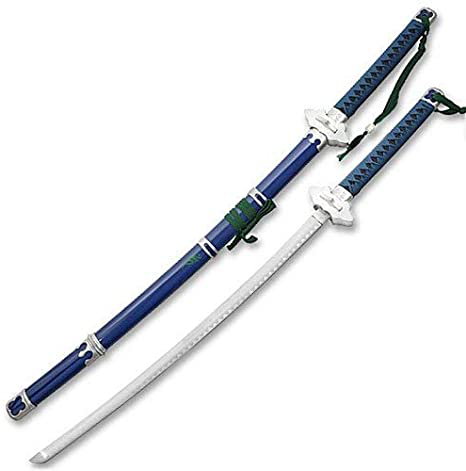

In [ ]:
readb64Recog(base64_string)

In [ ]:
predictImage(base64_string = base64_string , model = model)

{'confidence': 99.87, 'result': 'pedang/pisau'}

In [ ]:
#image 4
base64_string = '/9j/4AAQSkZJRgABAQIAHAAcAAD/2wCEAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRQBAwQEBQQFCQUFCRQNCw0UFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFP/CABEIA8ACHAMBEQACEQEDEQH/xAAzAAEBAAIDAQEBAAAAAAAAAAAAAQcIBQYJAgQDAQEBAQEBAAAAAAAAAAAAAAAAAQIDBP/aAAwDAQACEAMQAAAA81wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAUAAAhQAAQoAAAAABCgAAAEKAAAAAAAAQFAAAAIUAAAAAABKsKQAAAAAAH9TJZ/ExqAAAAACkAAAAAAAKQAFQpCgQohSRaRKokWwpCgAhUKIUBsAm9NvV08ypfxoUgi1EqgAhQQRbCpFpCwFAAhQCFAAAAAAAAAAAAIUBH669JjYCzrBoWa0ygBCgAAAAAAAhQAAAApCgAAEBQAAQoAAAIUAH7TcrU2KjpVapmv8AmgAAAAQoAAAAAAAAAAAAAAAAAAAAAAAABDM+puvGMdTSrN4WUAAAAAAAAAAAAAAACkKAQoAIUAAAhQACFAIU+jMtnpHWGDzzzeIBCgAAEKAACFAABCgAAhUKAQoAIUAhQCFAAAABCj+ybu7myMvEGipgzIoAAAAIUAAAAAhQKRLLKsLCgAAhYUAAAAAAABCgQ/Qbgameq4mNPYwtKIUAAAAAAAAAAIUhQAQoAAAAAAAAAAAAAAFO+bm+m84xNHOOwBSAFIUEKQAFIUgAAAAKAAAAAAAAAAAAAAAADN9npvLjCzysl/mAAAAAAAAAAAAAAAAUhQCAAFCFIUAQFBCgJFpCoXYOz0olx8eT5+QpCgAgKQpAUAAhQCAohQAQqpAoAAQoEKAQoICgAhQABsnZ6Ny9GPJ44sAIUAAhSFIAUAEKKQABCioUAAAAAAAAAAAAAAAbSV6Fx008oK4GAAAAAAAAAAAAAAABQQAFBAAAUEKQpAAUEAKQptrZv1L1Q8pbOqywFBCkKCFAICgAhSApAACkKAAAAhQAAAAAACFABCjcWzeuXrB5XWdHlAAAAAAAAAAJVgACVYCoCgAEKBChCkBQAAAAACAu6Fm78vXDy1THqghQAACAAFAAAABAUEBaCAFAIUhQAQoAAAIUhQCA3cs3Sl4A8vrMYygUAAhQAAAAAAAAQoAAAAAAAKQAAFIAAACkBDeazcmXgTzDrFcAACkAAKQAAoIACkKQoIChCkKAQpCgAhQAAQoAAAEN7bNw5eAPMizE0oAAIUAAAAAEKAAAQpCioUAhSRaAAAAAQoAQoAAHyb4Wbhy8CeY1mJZQAACFAAAAAAIUAAACFAKQApCgAEAABQAACFID9puzqbBnFmkcYHlAhQAAAQoAAABCgAAAAAAAAAAAAAAAAAAAG4287PLwxoPGLc2AApACkAAAKkUAAAAUgKEKCFICghSAApCkAKQFIUAnOrkNNutzM5x9ar5uvWb0dPxqAQoABCkKAAACFIUAhQSqAAAAAAAAAAAAAB8mWN52ily0dlIdRMJ2ajZvXJQAAAAAAAAAAAAABQAQoAAAAAABCkKAQoBkzU2dMjHLlODjEtakxwkoAAAhQAAACFAAAABCoKsKkUUiAopACkSrACpFqFgAMk9M7Ddc8nqfor6j4l6vm6k+fX5VBACgQqRaghVIBAoqAsKEi0IUAAAAAAAAAAD6NgzMh2Y/SfpP7HctTnD+dn8q/sfvj4l6NLwsfwPzHGnRjV46gAAAAUEBSAAAAAoAAAAAAAAAAB9GwZ6MH9z+h/Q/ofR9H2fR9AAh/M/mQw0eX6fjUAAAAAAAAAAAUBCkKCFBCgAhSFIUg/svpqZdOAP4FKfJT+x1U7WCH0fYPo5A5g8y0wWpCkKQpCgAAhQAQpAWggKAEBQCFAABAUbdJvKvGHVD+Byh/Q+T5Pg0v9PPYnzdMnn2f0Po/Ocac4c2ddPKQ4MAAAAAAAAAAAoAAAAAABAUAAyMepR/A00NYDkT0KO8nwfBDV30c81+fp30+z+hTSs1uO8G/Rlo1nPPYAAAAAAAAAAAoSKBQQJVJFIUVIFFIU3JNwTGx5fIUnYl9M67FHwDWzvjNPDfbylNNbNTZaQ2BPQk448ozgihAWFABCoAWFAQRagpFAApELQEhVIIooSLyx6fHGnl6ChNw+2duOO/sGuvfGaeG+yn0Y31NB9THXPQpnw9CjSOtVIpChItIUAAAEKAAAAAAAAAAAAAAbBm/Z5LnEgG2no57d8N8zL8Gv8A2xmfjvnj5MCdsanc9YjzQN2jMB5ln8QAAAAUgKCFIUgKQqFFIEAKBUigEBQAQpN9V0iOHCDeDtnMebkrnr4MB9c5p5a5g4mzDvbOp/HWGIKNtjD5ilCkBQQFIUhQCUi0iFFSLUKACFBCgAAhQACFFIADf3pntWpmvjv4MFdc5o5a5E67ZjPtnUXjrCkoAAAAAAAAAAAAAJVAAAAAAAAAAAAAA9FdT9nTOZ+W/wBcYQ6ZzRz1+sxzvMrRbnrDAAAAAAAAAAAAAABQAhQQpACggBQACAAApPSGnbOZeOuRlwt0mZ+d/sYf6575i+c2biEIUEKAQpCkAAAKQoIAUCgAAAAAAAAAAAIUAekR/fvjLfHXLy4Y3Mz4vyYc65yxzvmHLi0AAAAAAAAAAAAAAoAAAAAAAAAAAAAB6MnbOue2Yvbc3DG5mfF42zGnSZZ5a8rTG4AAAAAAAAAAAAABUAAKCFBACkBQCRagKAQo9DzKHTPxGQ8awzuZnxeBs6XuZP568nU6IAAFIUhSFBCggAKCAAoJVABCgAAAAAAAAAAD0BM4anXNTKPPWG9zM2L1+zqG5kvnryQOogAAAAAAAAAAAAAAoAAAAAAAAAQoAEKDfM2K1OjamXOesO7mZMXr1nU9zI/PXkIdeQoAAAAAAIUAAAAAEoIFqCFUgBSAARaAEAALCm8htDZjjczDz1h/czFi9ds6tuZE568fE4gAKCAARagAKAQoIUAhQSqAAAABCghQAAAAAAbsm2NmL+kzJy1iHczDi9Zs67ud+568cT8wIUAAAAAAAAAAAAFCFhQhRCkKEBYUEAKgLCkKE3IXcWzFPSZm5axJuZexerWcPqdxxrxwIEAKCCLQAgKAQFhQAhQQUiioBFFSLUi1ItSLUKQRRUBSFJF27N1axL0zmTlrFO5l3F6dqfls57GvHtKpCgAEhVBCkKCCLUKAAACFpCkAKACAoAIUhSFIUAA2qN5zEnXOXeWsZbmWcXoup/c/Rm+RYAAABCgAAAAAhQAAAVIpKQpAtICpAUi1ItSKKhSQpCmzy76GJ+ucoc9dBsylm473nm5eNzfJxBFpACoBFBBQsSgKSLUKQQLUi/SFEKQApAChItAAAICgJFpseegpiTrnJfO9RrI+bi3pnumL1KXytAAAAAAAAAAAAAAAAKQAAAAAAAAFIAADYA9FTDvXOU+d4Q7jLh/pnJ+NY6jy5KACFABAUAhQAAAAAQqUi1ItCQqkECkFBChYhQKgigVM5r6QGJOue/c72CX+JiTrnL3LWHjzNQQLUAABSAQoAAAIUEWpCrSFIUEBQCAAFICkAKQFIUzEel50zc4xMmY1w1nQtzK3PWCDzfABCkKAAAQpCgAAAAAFCRQKEi0gKkUCkAKCAABC0ymnp4vFWYz6TNHLXX7OnbmUueteTzuCFhUEWkBSAqFhQAhQIlItSLSFCCkWpFqQKKkAUEoItSLUAEBVyKeo58mGO2M28d9J1P0V3bF1mNAEi1IpKAAAFBCxKAoIUgBQIn0sAKCAApAAUgKCApCkBSHdz1UP7GGeucr89dC3numLz8uqpoiUAEKQpCkKQoBCkKAQpCgEKVIpCkFIpABSFIpKRRQkUAAdoT1hX9ZhnrnJ3PWP95yRi8nLqOaQBCkKSgEBVIBAoqQpFoIlItAZNUhUighaRKsKhRAUJAooASLQc0etR+4w31zkzncdbmVOev2GmxpmCIWhACgAEKCFAhQAAALEoAAAAAAAAAAAApCn6j14P3mHuuckc7jncyzz1+k0lNRQQFIAUAhSAFIAUhSFAIUhQhakAUAgpApKRRUEBVIAWAqevC8yYd65yNzuOtzLnPX9zRc1USFBFqCAoABCghQApIVSAAFApAACkKQFIUAgKQoAIUh61HZzD3XOROdx1uZe56/qaEGspAUEBSFBACgAAAEKAAAAAAAUhSAFSLUgUAlItBAE9WF7wYf6ZyHi483Mu89fZ58Gu6RQKgKIUgKQAApChCgkWpFFQpAWpFqRRUEUgAKKkWoBCkBSFPURclGIOuchc7jvcy/z19HnUmBVAoSBaSywAUkWoIUKQRahYVChYlAAAApACkAKQoIAUEBSHpuZXMQdc5C53He5l/nqnm4YWBAUhSFIUAgKQpCgEKAQFIVBSKKkCkBQQAFFSApApACkHpIuaTEHXOQOese7zl/noeZpiZKCFWIKRakUlAIAUikLUgKQoAKogBSAqCKAAFllJAoIWpFoCeiS55MQdc5B53Hm5mDnr5PMExqCFACKSwFCFAAAAAAAAAAAAAAAAAAAAAAA9ADYsxF1z3/ncd7mYeevk8sTooBQQpCpFAFIAUhQQAFBAD6SFIpKsSkAACkFICgEUVIACm+C7MmIuue/c7jzpMwctfB5SnVUhQQoICghQCFBCgEKACKKhQAAAAAAKCAAAApAAbwG1JiLpnv2Lj3cy/z18HkucGUgABQQAAoIAAUEKQFIChCikAAKQAAAAAAAAA3PNuDEnTPfcXHu5mDnr+R5En40KKkUhaQABC1IoFSKAABSBBVICkAAAAAAAFItSFIUEKberuQYl6575z1j3ecw89fjPIUgSrLEACkABQARQQFJSKRbYiWkoAAAAAAAAAAAAAA2tN2DE3TPe8XHvSZg5a4U8lAAAAAAAAACkABQQApCoAUEKAQoIUgBSFBCkKQoBNnV3nMT9M95xcf9JmDlrqZ5TAIAUgKQAFqCBQQAoAqQAFFIBQBUlIKQoAJSKAQFAAtmxku+pinpnu+L0DpMwctdBPLlAqxKSglIBQAspItBLLLEKqyS1JaKkKAAAAAAAAAAAAAAM+HoIYs6Z7pi9B6TMHLWMjzJAAAAAAAAAAAAAAAKgAAKCAApCggBQQAApAXNqeiC4w6Z7ji9C3Mwc9YgPNxCghQAQApAUhQQACkUgAFpAKpCwJSLSAFQsQUhVIAIpKFiMvL6OmM+me24vRdzMHPWDjzuCLUKQAFhUAAAAhQFEQCgCgAAAAAAAAAAAAAAyaelZjfpntWL0bczBz1r8ef4AAAAAAAAAAAAAABUAAKQAFICkABSApAAAB389N1x30z2bF6RuZf561tNEUAAKsSggAKQAFIAAFqQFIKoWIKpIUABSACFICgAhViUE7cvqKdA6Z7Bi9L3Mwc9asmktiFqApCkAABQQpAAAAUgBVgAAQoAAABCgAAAAAHOnqmdF6Z5zF6fuZd561KNNQAAAEKAAAAAAAAAABUAhVIFJSRagACkFESgUlWJViX9x6wHSumeUzeqamXOetNzUgqAAAoBIUAUgBSFIKQFIoIqgBQQpBItAsKghQsKgAAKQSr6zHU955CXq+plrnrSQ1dFiUKQBKsCFAAAAAAAAAAAAAAAAAKQApACggBSHqucPvP6ZeuamV+etFTW0FIACkBSFIAVIoAFICkKhQCFIFJakpFIpKRSWpKSktqSLUlCygkoJ6hrNz7jgNTKvPWgaYAC1JbUQpCkAQtSLSJbQiWJRUWyKQJbZCrEoWJVEKgKQFIUgKQAAsRVlIHpccxqfBweplLnrz1MIUECpFApAAAKskUBSABSFICgAAAAAAAAAAAAAAA9HDt2p+I4qzJ+NecZiQAAAAAAAAAAAAAAAqBSUikFWIUgLUi0iUiggBSFIAHoOuRdTjjjrMl415pJjcAUgKSkAUEABQACFBKsQFJbSFAgAKAQpEoWFCRRSBKoIChvnGXdThj8epkjnrzAOl0ELCoCiBBQoICiJVBIVYVAAVYhQAAACFIUAAAAEKAAQ3gM66nXj+VmQ8a8rjr4AAAAAAAAAAAAAACUi1IFqQoIWggCLUVILUVIUlAVZIK3Kl2Os6zp8pkHGvJ1PwW2IhVEsASqBCotkVFCLUi2IAC0iAtSWpKsBakKsKkVCwUhSBaQqRRQJFsTbaXaazqOn9jumL5MWJQpICrAAEsqwpEqoUhSRbCkkLQEloAAAAAAAAAAAAAABs+bgWdJ1P3rzmL5VgAAAAAAAAAAAAAAAoQFIAUgKCFBCkAKAQFICkGxa7sV0PWeUX6xfMIIApKQoIUEKQoIUAEAKsSkKCWipFAFIUgAABSIUUgkWkKAKTOku+Bj/eeZl4jN82bAUgAAAKCFIUgAKCBCgUgKikqxAUgKCAFBKCKKkUAhSFAMxHoIY+3OdjpWb55AEAAKACAoIUAAAhQAAAAAAhQAAAAACFAABCgZLPRw6Buc9GL83QkAAAAIUAAEKAAAAAAKgUUiVRCkACFAAIKsACVYUgA7tHpivQ9znowpm6Q2FIACkACFApAAAVIoBKsKQItoAIUEAAKQoBCghQQoIlWAc9L6jnS9TmzXjN06oAgKAQpACghSFABEqiFCFAIAAAAFIAAAAAAAAUgP1Hq0dX1OXjVmXVIAFIAAAACggAAKQAAAoQpAUhSFABFJSFIUgKQoIAUgh6rrx9nLLptGtiFAIpAKCApCrEKQtSKQVSQApC2wFBAUgAAKQAAAAFIAACj03j92pz+bolWCAEABSFIUgBSAAApAAAALC0gABQRKFAQqFIUhQCFAIUES+jp26zn5fPOsQhEoUAQqFhQQpChCghRCgAIURKAAAAAAAAAAAAAAAPQAzAfpPNkx4AAAAAAAAAAAAAAACgUAgi1IUAikAoWIAKRagiihA3iNiD4PL46xVJFRRQkKCFWJViUEBQQAqkikqkhVlAIUhVIABCqQACLUAABSADcGXag/ieU9n5AAFIAIUAAEKCLUAAKQAFIlWFAIUgBQQFAIUgKKkUAgBSbRS7jnCHljYCgAEABakUAAhSAFQsBRSAqJQAAAAAAAAAAAAAABsCbznQjzUAAAAAAAAAAAAAAAACFAUkKAAAAFIAAAAAABMvr6EGITz2AAACAoBCgKQAFBFSKAFWSKLRACkBSBCgEqwApAAUgBSJVg76vpRGvxo3YAAAVCwpAAUgAKQpCpFAFIBSAoCkAEKCLUEWoABCgAgKsCc8vqHGr5p9YKACFBFqARagBSAAQoIFqAQoChCgEKIVCwFQsKAAQoAAAH1HqmajGsdhQgKAIUhUKCFBCgAAAQoCFiUAUgAAAAAAAAAAAAAPTM1BMFAAAAAAAFIAAAAAAAAUIUAALEqkAAEKAAsSgAKCQqvQ2NQTGFIBCqQACFURKQoWJViVSCAoAAItIWoItklpAKpItQsKQqCFIFqACFBF3ljUKzq5SBUii1BCgEKCBakKARaRKAFSKi1CkCkAAAAAAAAFIAACkA2vl1Us/mFIAUhQQoIUgABSAAAFIAEKoCghYgoBFpCpFqAFIIULCoUkWhO7S9JsAKQFESkWgIAURKFBCkKQpACkCVSFIAUhQACFBCkKQFIUEKAAAQAFAIUEKQFhQgBQQFICkKQpH/xABZEAAAAwQDBwwMCgkDBAMAAAABAgMABAUGBxESEyExUFFScRAyM0Fgc5GhorGywRQiIyQ0YWJjZHKB0QgVJTVCU4KDo+EgJkRUkpOzwtIWQ3QYNpTicHWE/9oACAEBAAE/Af8A4oSSMsqVMhRMcw1AAbYtOUkmk5yhR1ni6vD4Q5zEs1ASqq9xtOMhv0mmQMuci7uuWtNZOurQOTcFRJK3xtGCvqpa0UR7WvbFnuR4XNzyoeIupXgjsUEUrX0RwiPGHA02S0lMEoA5KdsoiS5WtsDEvV8TProo4ParusFlRM1kQ3AOjsd8eU0Sa441NR5A04VDkiECqoGlwB+KyKDhVMZThG8xk6n6KO9V62VUPtB/6tTDLXYj6EQSLeN2qlXEO4ByezOL2ksX6ItK01vJkShbvNAoyt8VoFr1pamiMwvCUQfFANhApeCv3tSFNCz4mKBjV2724AQrBpFiNZriYe2LeaXe3cTBkFo+tcCvKg3rRhaMPov7+of6IDUG4ApROYClATGHAANIkpxdeMpK/Fj12PVfMKYlDjaBwlB0dLAuB7Qhf7ZqS5WXeoQv8XQ9YVLI1AS+LP0Gf4Xee3J4dd+SEvPuARVUQWIdI1g4DeFpIcYk/IEH4yWJ6tXuZ1ll8FMK4u9cn3NFpef0khsRd5HTZ9zUkLP7uuDus9nXTMN+0AbgHcyRF0xXtXKvtrOFpSpOgMOIREiDyY4bRQEWdqXIbYCqHv8A/B+bROl+EFSG6ub6QMokH3tP00QWZalHIFgWAawrrq3AyU6qPUbKVMoGvX6wwNDJWVO7gPaYMz82n6APDrDFzFIU9QYLH5sF4NwNFCN0jpvY0KTKDuGhqQncDwp49UWUCpQ4ZBHcDQ8SuLKm8YNDdgBp3Lahq/qiz2Fl6WDIc3PuBobTrfVR8podsINOBbTgt6rRQtiJPQecNz7gaGCd0UN5TOGwg01Frc1dDR4tiMvgecHcDQwTudflCzjsQNMoVuqmhppJYmB9Dy9wNDRO9Sj42ctiBphCt2PoadC2ZjetO4Gh4tTgloZy2IGj19A+hp9LZmV40B17gaIi1Q9HQznsQNHNgPoakMtUxqaNwA4GomLVD0dDOexg0b2E2hqSAqmI2jcAOBqKg7wS0M57GDRrYTaGpLD9YfZuAHALUV+ApaGcw7mDRsO4makv/uD2DuAc00VXkhFzimkOEwNJMVl6FuyZCPi1dWnmBnedYKUgd+PH8Bv8WiU3wNVIQM+r+0oh1NSKWCPaxnpzfVDrgGsNt7gL23g22kBaAIu6YKnMYfEQxupnSIS2BA7RYf8A86nuaMP0tCibZS6UTh1NSAEOGJgdxUtV4Qx+6QN+f6rg7ievxgHO0IowjT8uS6uxSI7YisXqaV5MPCUSlB2TCrzwizug8JBeTJ/G0Qh6z0QQMiQfttOtFb1ETGXc3YgLgF7u+HhZ8o+jzhfVcag8SpB62eXNZzPZWTFM3jx4YKwFpVf1xAoJgQPWaCPETOULJ0A+7H3s5JRY4B3wiH3X5sR0itXhqf8AKZR1ioftiQ/dfmz8EXTAe7oG+6/NphfYiQhrdwH7Ih1tHns70/jbAAEuTHsqPbq7JkFUxSj42hE2wZ2IFtcoaExHqZ2pEl9MlXZI1ZAQP7mJSXLgftB//HP7mUpNl04CHZJ//HP7meKQIAoF564UTe5o/McJeiGubwmOktTRo6Z4ioKVVkcmPZPgB4guKxka09oRBkJYKBQ7TmYstFyczBLhBDBXwN/pog7XM3+mCCGDmaMygVV2OAJVjVkZ6dFHJc6KxBIct4QHGxSiYwFAKxG8ABttLNDUSi5CrPyoQ9IcBRC0cfczp8HyGK1XSJPdnybPuYvwepdqvvcRH7wn+LB8HqWv3iIj96X/ABYPg+Sx9a/j98H+Lf8AT7K+c/fzg9zOVEsBhyYEQIsQA27pWwSM6JB2iq4fbYZOJ+8PP8bf6NL+9PX81iycX96ev5jJyalV2zw8DpP+TKyBDV9lMsfSdohQZLESWuqhHkh/Nq1MPweZXz3/APnB/ixvg8Sx9fEA+9L/AIsb4O8tfvURD70n+LPPwdIGIdxiD+UfKMQf7WinwfUiJG7CihwUDaXKAgPA0ySpEZVegRf0bFrWKFvkPoHGACJRAQGoQwCDUSqRaKTICRHpc7uAVntnEwAyRASIBQ2mu5A+kwPKecDA9J5wN2Wlng3ZiWeDdmo54N2ajng3ZqGeDdmoZ4N2Yjng3ZiOeDdmJZ4N2UlngwvKecDdkEzga6AbALUnuj6eWnpaHnMRYpfoYWeHt4eh7uuqsIfWHE3PjBFE7wqRNMto5xqAAajCSiyjAiCoXv1cLSg5PEyo9qLHwtW1f6BQAdtozN0El5dNB/fyIKqYC3xEPGNWAGSOi8IlVRUBRMwVlMUbwg1Wrfatq2QOJRYxCPCRiHADEMFQgLUryOeVI4dVIveLwNog5ByYwoUkLsx4+On1PuSewlNtjlYxrIMqoAFERZeJIpjfODJRBJce1MAsU1erW1oWnWGkVnCLGEK6wJ0Wo3JcZNhxQzRHjFgFg1VFiphWIsEWQtVWwZ2eiK4BZBaoahacZYQmyCLOaxQtCFZDZBaNQheBRJdyeCiVRMatIYukSUlZtjiTuUO4FGtQ3iaHuCMKcUnZAoESTLUDLrgFY7QNSJS0og9qw+E1GMS8dYcAD4meJii72YTKRBWsc280Hm+LQZ6IqV5F4IA301NtpTmWHTRDSLOLxbOUABRI945ByC1WpU1TTcj+tUS9RPotIqdmUobvTVagMYSkIJjmApQviItSZScVd57BgK9tMLyr1tV5C5dLfHMUtWvjBatoFSPG4GuUwr9lpBhIfC0oTa7TVC03p3NfwGKOEo5GdlroXxg1NEhBGnD40dCd9oh2wB9IMXUExxwSTeXGwBH7XVj9IGI8XYbOBqRH1WESnEHlG8cqY1C18RERGsRviOXVgEee5aiab65nsnLri7Ry5BaXo0jMMLRe0fphfKOEo7YCwlay1lpvTqmh/wB5T5haTkrMqwsPMFay1lhqKFYtTFPKp1fiVzMJEqu7qFHXeQHX+hQrEFneaTOZTdyXTEwl8YMnWj2zReMu7jDHhd6qBApBtVtHHt3fos9LuqdzRUPWUMWwmKrwOJoP7sNSqJq9IZGlqOoTDCXaIuw1kULWIZB2walB3F7kOLWL4gjb4L/6MhRJSDRRxTE3ej+QqZwzVKu0N1e0GSG6pgYbxsAh42stZack6plehyuxP7mlYlmWoZ/xyczWWstOUZUhcLVMhs6pwdkByGHXG9gNPCHY0Sdyejhh9Y36FCTsZedinAO1SdziPEDKjtNTTOXZLyEDdD9onfeDFy5MX0PTh8RRn4reT1OT6PaCOAin5ss7Ef3Fd1VCsihBIIeIWi0OUhETenJXZHdQyY+wf0Hd2MaBOKpLygIJHKOQQABBoW9A+JFWLrF0yLF9oMJWqadS1TAsPopeczS8WzAIcHo5OiDVMoYEkjHHAUK2met6iLg71bEiKpg8s4/lxtSaSxMKRcjsTnN+hQHBLjD36KHC+se5EHyS4eMeJqQZtTlGALPV4XpTuaBMpvyZZZR5WUWVMKiqhrRjDtji/BgGocoNK1K7sEjKP7+e0/uQAiontqm+gIaeoWjEVXjkUeX96EBXXOJzVYNH6EFd7rK0OH0VPotJ7xahTmFdYpnOgPODCDVNPJao2oPoYc5mgpbMFcA8wTotU0UvuxUvrTlJwjfZQOzY+/K7VuyGgL3U1LRLnNgh5gnX+hQvPZHT5BfjgRIazuyg3qhwiUedqSJvGb5hUVTMPYLvWm7lyhtm9uNpSRFSToYI/uxWlM9z+MUNshiLh1thapp8L8pmH0PrM0NLZhjoGRIvM1TRJWw9JCOtQTOsPsCrraXXcVCic2uNfFqYP+9nguakmHJx3IJLtJMLGr/Yq42gxbjMop4AXSOn19TOR7q6ImHDZCtqmn0vftfog84s5lsuSAZEy82pMCog7xM4YbBEAHSN9pedbLsGhqYB/X+IhmlSD8MuO6LgusiQsfNnDlmZ6DsWPuKuCpYocN5nC8RUmYoYONqmn8vfJR9FPzsgFTul6oNU0cNbcg8++CPsKFTQdCw6exqWjWqQotpTD8MuO6He6SHDfFdQ/EM01EuRgUDCQ1pnI1by85DWTh7Q1KQA7sn43ZTnBkwqSIHiBlBspmHIDRALZoQnt2DKCHrCzonYc/Y1KA1z9Gd9DohjuhI1qSXMMh1Q5QtNyFaB2gqt1B1P9Y6EH2hqUg7Kh/x1OcGDWF0NE1LlD3g2Qgs8JfLjskH+07kK1Vl2akg9ueo0PpAhjug01cmoeJdQONppStO5tDS0etzhY+aUJwDqUg3lXXelOcrbQNHfmxUudUXhFiluk0vY5LJeSDK3kmns9udI2PpagcrHdBB7UpVZr0cOIrTESt2NoaVzfJzh5K6hOcdSkAO7OPqKBxl1I1fRQLnLphymhfdY8/G86IMvsbTea3NkaNlfVumOO6AzVyy8BkfTdAjRwtp1NoaWfAC+Q/c5dSf9mh3jt85NSK9ss4lyrgPBfaXQtRB7NlWPzsvrGmI1uYImYcIvSo8scd0AG+Q34uR7r5ANFgrdTNL15yefJfCDzak/bNDB8ZucmpEL8RhweWYeSLSn2wqmynEeNnjWNGD3WLvx667S5xr+0OO6AFPkyJEyPBR4S/k0SCt1M0DGp3iYZF0h49Sfq7rCt8HnLqPt+LOPiA5uJpPDvetnjWM8mujyqbKYRx38H4/cYuXIokPSZ/Ct2M0GvBGQyXM3GLbTT54RBt/q4y6j6Pysl5LuoPM0nh3kGhn41lAw5AFhvjjv4P5+7Rku8j02fPBzNCby8aDzIDzsQa0y6GnsO7wT/lAHGGpERqiKps1zUHmaUwqcS6GjQ1Q54EMNzNzY8oCOIROLFypJjxizz4OZoVeikVJXVadhFnYbTskPkg08BW8QH/nEDUihqnmImzXMWlcKnAuhpoUuUCiB812UHkjjygY1UciRdsXcB5TLX0B0NDC/rKuTPdzhxg0OG04O4+QDTqFa0A/+xT69SLmvRk3mCE4a2l0tlwK08HucqRg2RyW6A48oKPVNL4XK5m6ZGNfS9jIDcZudshwMXiaE/N6YZtZeAWm5O6LQHxRJPmNqRo3eUUGvXrpp8FTQUtlyI1IylzkyND6IoHCFWPKEj2JyOGc6nDjKxb6fsaL97RxxVyLF4xqZx7XsgmaqPHf62j6F3VhN6uw+kNyTakWPbckCh/vvZz8F5oeWw6kBqTzAWSIzX+7iGPKGTAWd0gHbQUAGS2MuhpyRG5CcuEL4C0MXBZUThgWSIrxVNUAiFYV1M9KXF2VUzSiLPRbcQhrvVfSQA5tJsPMyJbKRQal1SxIUWHyCB+IXHlEZ7M+OHlFUDkGZHYy6GmZ3ujsbQ0qvNtxcBHCS27m9l8OLUjFZnO5hhVMCfCLOnfsyPimEpT2A9l7UpoUsSHEAzjJB+IGPKLj2J8hI+UcOQZkNiK0WTujsZpaVuIPiX1TwRThvMDRNSp5dAHAUTKDoArSgQVAMsbCcRNqU3iASQvXtrJ1cOPKOhAs7wcTYLtVxCzvsQM9ltomBnDuUafk/rHcw+0GRNbTKbKDR9USi9jXVYdDB7TC0ro3NxLo1KeD2ZQIGc9kDkmx5JB7nOEGH0tMOUztsQMoFZBaq5TS7htKAcg8AtCz3RxQHyAaYzVkiA5RRSDhraCksORNSn5SqW3Imc+APINjyVj3OZoQbI9pdMGddiYcDRDucxuBvOgDQjwInirDjaOjWVfynwpeAjQ4LLoTU+EAPyPDQ9JHo48gZwSjUPOOArwmPKBnTY9SPdzi7kbz5OdoVsBwyKH6QtFhtGAM59MPAUGcwqdiaNT4QSne8HJlUVNxF9+PHU9yekT5pwHjZz1g6kzXn51HIsTnaFbGvvx+dohfUQ8b2oPMztsBNGp8IJSt4gpPEsPQx5gaFnujsQwfSKA8WpNl5dEcihedoXeB4Dzpmfb67nv63ODIbCXRqU/jXFISFf+yfnDHsvGtQt1HKiQeTqTfryeuHO0LwvW+iz1s7jvy3SZHYi6GHA1PSlcyQ8ma618Jze7HsnKXWXYafOdUh5Aak4YS+sDQzXPW+jzAzxs7hvi3TZLYy6GNganM9qcEC5rmTpHx7R+pdJTg4+hpByQ1JxwF9YGhmuet86gZbZ3DfFumyexl0MbWi1NRrU7nDI7phz49o0UBST4QIfuxQ4L2pOWANINDNc9b51Ay3hDh663TZPYy6GPrRamFS3Pr6GaRMOQA9ePaJz25JhQ+QYOA5tScsAaQaF65733qBlvCIf663TZPYy6GU1gtSqe6T9FRyCQPwy49ocPakmH+IVQ/ENqTnrA0tDNc9b51AyvhDh663TZPYy6GV1gtSUa1PUYHD3Wrkhj2hQ1cnohkWUDj1Jz1gaWhmuet86gZTwiH+ut02T2MuhldYLT0e6TlGh9LUDjx7Qae1KpgzXo4ckupOes9rQvXPe+dQMp4S4eut02T1hdDLaxpsPdJpjBsr4t0xx7QQpXLz2TI+CPILqTpsbQvXPe+dQMp4TD/WW6bJ6wGW1rRwbUbiA5XhQeUOPaBzfJcQCv8AaAvfZ1J02JoXrnrfOoGN4U4est02JrC6GX1rPh7o9rnzjmHjx7QKfuUWLkOkPS1J02FoXrnrfP7QY3hbhpW6bE1hWfDWEDGyAIsI1jXj2gY9TxGCeJEenqTpsItC9c9ev/aDD4Y4aVemxNYDRsaoY9VDUNyPf9mPqCjfKkULlSIPGwYGnXYBaFa569f+0G/bHDSr02JrQabFLlLsTPmuqo8kcfUHnqmJ+Jlda+A5fewYGnXwczQrC8+v/aDftrh970xYutBp8Uucoxk3oaockcfULHszcqGc6HDlFYutBp18GM0KwvPrB0QYBrfnH7z+oLF1oNSQazJkYv1d7iGPqHjAWc07+FBQGS2MGnTwUzQn9p9YOiDFGuIOIeJT+oLF1oNSsexI0VHyCByy4+ooPYnlwDOKoHIFktjK06eCGaEYHjSHRBk/nFy0Kf1BYMANTEpYkZ/DOMkH4gY+o1Pc54hQ+WYOEhmQ2IGnTwM2hoNrV9JegDJfObn6p/6hmDADU1nsyaqGcumGPpAUuU5wgfPgHDeZ32IGnPwM2hoLsav2egDIB8qOnqG/qGYMDU5qWZURDOeyByTY+lA9zmqDm9LS6QM7bG05eBG0NA9hU+z0Cs7fOrrt9zN/UNqU8KVQJwJleq+Ahvfj6Anucdhxw+i8pjygZ12Npx8CNoaA+Dn0E6BWdfnZ2wD3McHrm1KelaofC085Y5uAPzx84KXF+d1MxQpuNnXWC03h3ifQ0vDW6j6pOgVnO/GHfev7zalPZ+2gxN+HoY+AbN/Izga2iBtoQAWm7wE2hpdGt0+wToAzl88Ib1/cbUp4PXE4UTIkceEQ92P4Ca3DHYb9QpEG/hwNNgd4H0NLfgQb2n0AaH/PKO8hzi201OilcxOBMjrXwnN7sfyepdpdhh850SHkA01B3gbQ0s+Al3tPoA0NvxlPeS84sOBqbFLc4JFzHQgco2P6PVLrKUIH0UgcAVNM4VuBtDSyNcPJvROi0KvxguDYi4GNrRamM9udlgzUUw4q+vH9GCl0k2FD5oQ4DCDTKFcPPoaV/m8m9E5mhF+MfdE5mPrRalZS6T5EvJuYfhlx/REpbkqH+SKgfiGaYg7wPoaVvm4m9F62gwfLBt6J0QZTWC1Ixrc7xcfO1ckMf0MmtSgkGasoDR8K4efQ0rCAw0u9h1tA78XV8RE+gDKa1p1Uus3xk3pagcBqsf0IK2pZWLmvZg5JWjgVuB9DSr82h6nWZoDfii3qE6AMrrWmJS7TBE1M56VHljj+gs/yTECbQPADyQ9zRi+4KaGlYfkz7A9IzS+Hyi8V7QFDkgyutZ/Uu788KZ6hjceP6Cle5xYmQ6Rul7migVuKmhpXr+LTeqbpGaXg7+eh0dEGfFLk7nOOApRFq68f0GK2X+KkykTNwCPvaIhW5qaGljwBXxAbpGaXb72+D5XU0fUuMHfj5qChuSO4ChJSzH35POdrXAYPez5fdFNDS14E8/a5xaXA7s+b4LTqpcpUi5vQ1eiO4ChtW5zeYue7HLxlHqZ4vuptDS5edX3SdpbC++D503O1I6gJyXFhEau4CHCNW4CiZW5zs6hnpqF5NfUx77uOhpeL3KIB5RuZpcDubyOVU3O1LStzkaI+Vcy/iF3AUbKXGd4UOU5i8JDAwX0fY0CvfGYeWbmBpb8EUHKobnamdSxJyhc9dMvX1bgJJVuM3Qg3pJC8I1dbJ30mhAVLRYPK/taXL8OA2cYR42pyVsyy6kznsvQNuAgCtwj0NUzHlM3KBkdjaHhU/RYt7aHx4Gl4KoSj4wrandWqHwtPKsc3AH57gHVS4PKSgYSHA3GzvrGdkvlGKX9cUvMLQQtzhTsHkA1PCta0HTyAqbo7gBwNC1bu5pKZxANxMTtYk/72Qek0OCy4O4eQDU5K2o7D09sruJuEw+7cDJy3ZEtQtTbM6pDyQZ67m+PQ5XevgrZAthBMuQoNTMtdJwKX6t2IXjMPXuBo4VBaToWIYAQAvBe6miBK1i+WmYl/SDbTUrrXWeH4K9jKmXkAPXuBojXusluRcwVC8sfey6ALCmOaatjYBakJa7zpFjees8AAHVuBoUWukrqE+reThxFHr1D60WmdbsmZIqrnPSoh/EO4Ggxb5PiCWRcDcJfy1FRqILPi3ZL2ssOFQ4n4R3A0GL2XyKJZSpmDle/UjS/Y0Je1a6rCRjV6AHcFQqvYmZ4S2ju9fAYvv1J7X7GlCLG9GOXhCrr3BUUrXGc3YM9M5eKvq1KVl7hJD/fqE1gnCcu4KQ1+x5whZ66u62eEBDrYo1lAWpreLlKqZPrHgheIw9W4KAr9jRyHK5jwmblAyWxE0NTqvU4wxHOVMfgD/wBtwRTimYDBhC+DQ9UF3JFQMBigLU5r2opDEcxI5uEQ924OTXnsuVoWrtmdyV6amplXus4WPqncpeMR69wdFrx2RI8OHNAxOAwg1Jjx2TO8THaKYpOAobg6FXi6ymqn9U8GLxAPW00PPZkyRRausDPKlWi0NW4OhN/Kg4RwhhqBKyt7Khr5mUUFY5jm1xhtDuDluYPiJGLkv9+OZ3ctWcNVQ8Fe6f8A/8QAKxAAAgEDAgUEAwADAQAAAAAAAREAECAhMUEwUWFxoYGRscFA0fBQ4fFg/9oACAEBAAE/ELF/4NVVy/H3vX4CqrjQ/ibw8EwGp47JCgIfYLdbhAsk6s400gvXhYEwwAjJdT3sUMVus2sVytWKLj6zab13pvbtVXmwGAhjdPpp7wLJPdIW7ogDOCmjgvc29Y3a3VDfsdfXi68BU24GlFZp+WN9jj05n0gtoBzzhx5lJ6HIegQ9IIoHsJJ8l7wKWIEP45eos24Ci4qsX5iuP2ik9AYNTkBiLgwBKDyhLmWcGT/4Hl/iVcfwQEBDBhxZf6hsYZ5pec/cGd5JkLAC+o8rO+8/4RXfFiooOBtefGCBZJ6Cc/gcchZR76QICjO2fMBryHbHfM6CzB+4Cq/D14Riu2s1qrNK4t0sVCDQaOuIZQxAKAR5gyPdIklANkF6xA5jOw6UNyrtcLdrFcnwVFauAuAIO4hE8lrA0EAJfCmgLUHKMOM4buih7cHE5sEcjRRcRcAf4pk0BmDLuP4Q8gGpLB08UohOIBA5cBfkKu1VfpYr1RUVVQRpDQDyYE1siKH/AAnQxebVcouNpd3t2uUU0im1FfrDRXbsIHj/AHAXZi2tfgnR9eUFNOCoqKcrd6qKdKbTSimlqoqKi/CVVMR6j8CAu3FDmXxMI6fMN4qaLg7RUFFRUVq/KVFFHoanMQdIjdc6Kk98/f4KovxVwlaRVXpNdTeTBXanrn8TEGreBwFauCr9b1FNJpN58WKKKm8UUNNrNLFFNonniPmeJFHqi/zA27U0EVqoqJxU3tNqiioeAor1RUVFwXnRgZ4EFLqndBPNpRVVVFRUT/JVy/AM0XtniQX3Ed+Y/J4K4C4isV6tV5isVympPQGeFAc3dP3tXAU2oqqq4CuV21yicVEqqqiiqpr9ors4HtQffRBdT+RcKKKioqi9RUWa9Kqiqr1RUUUUUUUVys8aGD289iiO2Ybw/oiKLgq1cFUVVFFVfhqqorSO3S7A9YdTAA2hguEdDQFSBC/ZSWlwA4Iy5IEVXFXGVRRUVFFFFRUVVTSiooqKK3Y6YAuQ3gaIA/1BQBabUFkWFqOV3vJHRERmCHNEA0XAFVYorFFFFVUVBFXamkVBRRXK5UEUVNBrFDYhPzQjefkTJ6ZE+IR7iADkeIAgFDQEviCyZBGsfUxbmFXSRh5EBEsGp+Jl382HX1ihEV4qscdUAvXGVyqnaMQHmGMCfgiAHE8ySQRekCQw9h/cFMKDQjmDagty+pcFIypABDpGZRf/ACKK9WLhqxcfaxRcBWKa8PFWXBJjA/roAiOe4TsgUnKQJgkXoSbhbLw8yPSZCAIXkCEyMALLBOYuGqqqsVVabVwDmiiooqGKiiiisJ6xDXOZHiCjBIHAPpHwhJTUnGJYyNEBqQdDJEFUc6ZwbghkAhy6QmRyAT6jpaqKYptFXSKiqrFRRQU9eIoqK5VJiPABkjoAOcA68FIuoYHl2hIiQ1IC+zODgD/NMi695OJr3EQDqSUVuUCZ7kRRHpY/1gYAAkE9fxAzR6N+o8ScnP8A1iIBujAE5NsCP1DkkBEpH0RmTi8cFHHZTladtCSHkYT8IUtOjw5NF7GancJaA/hFG9RcFVXAVi4KiuOWOBIRBGhBihuUAepK/wBiaSwJwYJAHvAoByANfcgDIAkMMgjEsFaq5PuQ/wC4hWnvQlgQ8B7Q1nJJJBjUQAcBIcA76sWq9cRVVVNYqGa1xFRQXFKDN+JgqSR4y2n8+osA1MItmE+cBc4Wd4QecAHOHMxq2iQA5AHuFCDUedCNCDCA0MA6wY3gIR4CesAiNNxDsXZ4EHUQjclijBtS/vngbW6zWizwMVUUXDUUVFVRNkWBj+j9usEw+kKghCgCesWOyGAEER4hMJRBwYDiRhYeowr0BrOsiGFAXGhCgId5vDGzgbGexnK46HlD/BJWu3mF5nyCyYP9146qrj+MTKitgcn99wQwQgFpqY4St4xsdE923MYckyEIEA1gTku6I0MPGEHw+QfBDBjCEKGBnMmtSQq8wPuTBAECAGOSaAEISRSUPTfLRycDufLwQo+9hpiHQ85l6Bsx1IQKydo9YUD5QueV/brrCCCQQQRhHUXKxXqKwRVWKKqiiiuU1oqBh3sbyPt7dIw1iMdYf5M5ROB8wkgjiRqRySfWLMUOcLAKeuFyPPY5h/klzQ6LQjzrVjKHIA1JAShZNOk7YIItiHLeF7bFYzIZyCLb6c4lUorObAXn1B8QNTpqI50znBadzCNDhvk+pZoqKLgKxWo2KKiiorVVRUVCaxig72S9IGWCAOd46gwHAyQciBeAaKKhLTm6EEh5EkPz6EOGDIFsBRHuIYGUQQTL5wl9fxoEoiAo5QJR0SR1C3gQ7KKyZLyE7mKpShIfJkXzHgD3M1xcGNdvpgCAA0oqqiiqooqKKiqqLgKK5VVumFQT0fYaO6grh6twEH5gXyGWE2AH1CPrFFQrnOnKj0IBmDwBcgJjux5iKUlqTx6LaMBnDrokj2EE2IAz51RfUCCpCU833TWh0eEd3CHdEMY1LOTjB7Bk9oQGQ8yYsmq4aisV4qoqqqizQUViijJAkEQQREEaEGAPgBKPB9hLO3QhIriCB4ADkAAB0EVNZi9v4kCXJk9nj9AgKOuIoal9p6aYHjsgk0GSp6A+Dm/rXckD/OcLhQlgWCpM0zAEZbrkCeo5To8EwDo8zD7ARVU1uXA2sUTouAoobVFVWZS2O1FFQahZBkchiOswD2KP2AEIAAjQ5mqLQ11dpY5SfjBATLA/oP5yjiiQmPMwgP8Ak4fu1WKKKq4SqqK1UVFFRcNXKEN7PsIfUzKChz0RQTVAHcAjNcEAwZy/xziT0A8IBDrYBXeH2IjAlDHfAZPumtFiKioqKi4atUVVNoqqu1xiv9IqKb6fAF9Q4TUh6E3gmB+kYEiPBmqLMGD6y/2iRy1uwoKMOrb6B6gQDlD7y9oOKLMVFRVVxiuUToqqKqiovxFRQltUhHFkAB6gv6gBQWTtgj6izHpwQmR/Gs3YQvE2/BD4hzBy7MSD8xWIIYQQVZ6DtVFFaoqKKitUUWLVaorRVQWCim9VRYh/dc533NKbGGKlk9hNj+YRARtiH+e8FA6JmVNP0g1hQ8e5gWGmBGRharkAPqKKqouMqKxWqw6UUUVyqoswiiooqGAAGpLy+4ww/wAIk30V8QiEUSmOIGDpMtB8UH3ORBg6KAYe0zU9t0IfUNiooqqxU3iiooqb2p1VyqorFVXKw5ORve+43QXUJB7o4GHPILCiBgdoX8YA4GVeu7Y+pgXcTfgEcDVFFFYqLhKitUViiiqoooqK1Wf2tMPVSFqkZl7H3DrAYtEFkYhymh3gOw/SFxZYY74fnCNgIGCCzzL1FBYr1FFYRUBxU3iioq6xUVVRRUUVqqUoFIHbP6Z6ehIp+mtXDrMTkllhiRmS/wCrMUvUupTQ7zygOZHwFRRRUVFRRRRZooqrEUVqsVqquK//AJfI9IRGEPxP9Q6OA2ACx5mZiv7o+5namSYaDu5/3PiT+IqqK1RVVAHaqqLNVRTaqoKqM3XuQH6noKI1IbB0J9QFj2mWhnET4oQzOdbD6PuJLHW8eDCYeZdixYqKihoooqLgKiiiooqbxUUVVRTWKKiiis2oor+W4B9qGD4eh7S58w+Jmwi1j1/TN4Et+8P6T00hNODh6a4BiqoqK1VUUUUVioqKusVyiiiquIrAIOPUR+6eBGCAQZ8wdfM6oG8TpEke4/U3hgGo67k/qejU5m+1mgEVquUXCVqgDsUUVFFcrVYrh7IbsB/YgowIHFYnnDqJ8cwLBV4/SPMVoEEe7HyIg9BMqJmCsVqiqopvRRRRVUEU2neiioqKiioooqKKK1VVip1Mnt+yA0QwnBG92Z+hCADLGYlqD6gGg2PN9UbqwTPVXkxMSwJqbnBHN+16orlYrVVVUVFFcr1YqKK1T+1831MHr9Ie2gYkcmPBg6hs9omvU3os8JQPSB1Yc6h/oJ2whU0HI5kgD5oqKxVVFFcorFNooqLrFaqKqoqKmkVii1iooqpAfeCB+AYT7CBNAdTYjIhV2NnmSz4EKgMYYaPMQJwoewCHLoEFvOCq2EyRr7sH3FFFRRRTNFFVRYiiFFYqKKJ1X4CooqKLgCHOPk76hPtJod5RkAetAyfZ5m8crAs+gD4cULhOkBBL1BgCAEyJnyL9WqK9RKioqK9VU2im0TqKKioYooqKiorVRTqZ70X3Dfag8JoGNTY2dAb/AB5hOBPgHXzX2RGnE9J5kv7oPdQ/dl8A0VdoorVaqKiqosxRWARRUUUVd7FFRRRVVFRRUUDgyH1EA8kQ3PspHzeBHMoI+TN8knxBJQMPIAD4g8VYUC3+nL9UVFRRUUVFYorVFRRUVVcrFwVFVRVVMzrVdwH3DfrRT6QgcxySLxe4E5jlntCbEod5/U0wmBQb3KJ7D94or1wVFxVRWiK1RRXKKzSiF1PjodzAZdoO0bTqx9wsGcs2uCEVGwq9SLOmIYHPLJVsQD/dRaBRUAioooRFFcqKmlioorFRWKxRRWqimq03sDQsu8OhnK6+DMdMmobxeEURYOkQ/hV2BQoorFFeqKqsUVFeooqq1RUVFRcDOCyfYDCfehgkamR4wsB2+XFDDyT6AICgOkACyR70h9RRXqK8xUVVRRRUU0onFFFFRRTSKm8UUVFFFVRU8xRRRnIbZgTpgCjzA05NY8IOSBz46l/cLMRZgu1PBQ6TK4oq7/qpvFmbRRQCgiiqooqqKqiqoqC9XK9cIjBmXXkObCmBRsXHZAIZ/YEY4sEuO2eCmBTkSH2iwqr8FUXCUUUUVyiisU2iitUKa193oYl5fMKUBert+yY9tCRnpM+aT3N9xUUVFFFRV0sViiolcnFFaooorVBDRRRXKqghpB1A6APxQf4N4Czk56wMFeYvFQ12IYs8Qz0L7sVFVUXHVFF+CqKKKKxUVgWEB6nJ5FGx64vePnCz2UO36ceImPahnLX0BUVy4ioorFZpRT0oqqKKKiioqKipvanM8Ne3X1TP+7Mw7zeG4XPEeIngRbFj2cNFRWKKxRUVFFVRKKKEVVyiiiqqqqtVqiqn/wDYPugbiK59YuPn95cue/HgJhIAgnCx6B+rFFFYoorlFwFFVcFUUVF+Bnp86xq+9qB7DXvF9fId4nqz4Cm3F+AY+rFVUUUVVFVUUVuliiiqooqLEWYqLNN4oqqiiiisUU/k2J90HFkDDPrOQOvWWWyeTPhJ8kze2hFRRUUVFFYoooqKKEU1sEUUUV6vXFVgGGVXQ/pNA3FZGYwdzyyxS+HNPvMdqqSqr1FeuArFFFYouGqqKK0WeJB+QMA/HiCe4x80azxnqd8x7SEh7wQzQL6kYqqpirvFFFFVRUNwEUUxVWARRWKKz5iim0UTiiit/joQH1BpARdCPmJhCgPDqdb1zwoMx+oEYaic1UVFRUUViooqKisUVFGvyVapzUII7EPuDQVxv7vrrniiFMQGBBrODQcJRRcVWKgiizFaaKxRRRUVNaqiioojpE2wf7mhP9qAmF4xI1P5OeGIQcVlexoqKKiiiqqKKAU0iig4CizTS5OKKxRUTiiiiooooqKiood5gy9hGn2moMFLLwit551S8cTJCQB6kX3RUVFTaqhitX4CsX4yoM6Ug65fqZ9qBkhtAUsAbeM9uRPEEGccr3dBerXrYqLhLjKm1FFAIoqLlFFFFFRUUUUWYooorFFAESBEAHUoFH2PtCfZEHU5TyGmYgAETH87TwBOvXuRfcVFFVU1giooosRRRUViisUVVFFYqC1XLEUUVqpkBfJ/1PEEH2YPOHPM9JqHf7Z401i+xfqqqouAoqK5cdWqi4asU6/ezH3Hy8oEWq2JBiIn1LEPGn8IJJ+uAuEr1VUVSIoqKKiiiitUUVFRRTWK3IKfsR+1AD76ES1HKqLN0+jDQ7T/AISh/qiixRVNFRRRQCKKKCqUVVFNIop6cZcJWKvRwXuL7hY9zBcQnVbBttyB5eQiNBP6XgWFxlxVwFRUVFdrwzZoQaHI0LLvAffR8hBzMbyyyozRDQTQLdNcI/vbgKKKiuVVcqqxTWqmIqK7SxUVqion8EJ6CfqH7kd3EMWQQd+WCGg7+ZNocvYa/ZFNqkRRRRcVVUVq/PYAak4siwg82ID76NzsSiY40AhKAltMu/XrglNaL8NRWLiKKi4ShGDBg2DDzh16x0BPxm8QeBLVEzqnQ29ohXqquXGUVFFFFcooqKmk0icVFCMRUU2iiij3LJM94M7qFtLe5wdnJG44YF2m4Hki/dBE4oqqpE+YqrgqKiiimlytVqtVFwSkdvZn0nrNGFZ1eeEzaw+dCXYgQhyd7txBcJXqxWKqitVytVqmzi/qHKeoEN5iYRISddMbQS7UUBkB7f7L1VVViqqq9VThosQUUU1oqKqiiqqqKihFFEd58mfcd30Paz2NghsixlFAFIFkD7A/VdoqKLNVRUUUUViiisNVEfwFxFFUYItp0yD9z1iixJw4+s5QbKGvEBkZfc+n4qquIuEqrjc6/Tif7M9RoW+yJgbISDoqL6vT1JRWrgqK9XqKKaRXKKc6KKKLgK8pYw0dSI/CCh1QSonGBRNz0bJB3nounUzNIqLNNKbVVBTSiixQxRRXKKKxVIqoqK9UVVRVVHP7R3Ax6wQwzMBH99oYlMpchQESIhJ5AExsjqc8VRUVquX4S/CMzCXHo4QuqGQPojEt5xHsAgyuhz0JAEB+EuKoqKioorlFFRRUUUV6p/bIOBQ65iLAS/v95kjyNOUz2iAjuRD5onRRUUVOdFFFBFcq6xRVVDVWKKaRUVqsUVFFaoI4Gsd0kB3v1gkBsgQDyNT9zcGdbXVDCgIJB3AHkiioqqiqouEqqi/wn9DBQBUDX6xGFp4PR+5/VecVWil1f0A/4NUXFVFwFRUapQ/iDnAaOci7sCEDHZBzPdM6L1DJgqKitVVFVVVFxVRTem9hiiiiimtTVUWYqqKaXZyIGIOigxgBIMrVsNvSFjFhu5RBHON0H+mutFUw11oorlFQ3KmdrwLBRcRRVVde9m6GmYQ/TgA9RfqEJIRYgGGVHZFjei4KoqLir/AFLkBEdAP1CfrhgNgA0Do8sW+2p2iXOSQ7kR8H/Ca1VFaqKioqq3eioGXaeg1F6gfuDvc9JpHRD44NvlnoqVFwFFRRTa1RWb1UXA1oqKiiqqKm9BURUVihShZAeuaER5Axu5ftOjE8Q20e7SFRRWqqhqrFTWiuVi/G24OoOLuZLyUOUCA12Fp+TDjDYQxUiA72H2i/MX+FzQyZ98eAhXYV3/xUJdqZHa4jpfiqzazSq3oZtVVUVDFbpUbDPuNIJdqJAsHHTF4XA6WKutFcrFXaKKm9gEV6vVFVU2te9tfoUsRwIUkZN3IfuxOK8jgKKLgqCKxfkKx7nS22CB+FPBb5p+IAgBw1/livkWvMpeCos9SF3L/hpcJcBVVVVQZQkEWju8xpH0ECBboHw+CuArhcrDFcoqAUUcVDN+Ioq7lGeS6kAGZB2h7D6Oh1oRFAKKp4SiipvTfirg7RcPeKioQa8p2BjDZOn4mU9i7Y4JWL/DrjYhzgnUZhjGG9jkQzQJDvif8AgqxMvMn6F+YUbMepn4Yf+AVRYhmgOkeAIlzgnoz5d5vV6tUVyoRXS1WqimtdaKxRRQiwbTK7vCUzGLoB4AQUxXTgLFN6b2qxYtUTirrxVDN7ErTUUUX/AEd9GXjCXMoh5ksze0VVFYLFwOdVN3TWiuUVyobFQ2KxVcAPCOhgJyALhV/53//EACcRAAIBBAICAgICAwAAAAAAAAABAhAxQWARUBIhIFEDMkJhcICg/9oACAECAQE/AP8ATFj0LgdzGhIdHoK0NHo5X0coeg8c2PCX0OLWhRPI8udCVqLQsaJir0R6Dir0R6C6vQXV6C9EeiOr0H2cP6OH9D/vQeXg5kcyHoPKOUeSG09A9Ho9Ho9HCH3qOGcP6PF/R4v6OGex97H17PI8jyPI8hvkfrvfJnkzyPI8jyPJjfP+BONE/FZ6J+Oz+fPcv18Px2egSXpP4fjs/gly+Cd+7j7XHwhZ/CGWSv3cWSXDdYZqheojv3cSeHWGaol6H3aJfqOkc1jdEn3iLxY6RzWNyXexHSOarI+9gOkc0VxW76JK7pHNFc/j30SV3SOaIdu+jclekbOiHbvlclekc0ViXfK48UjmmCXfIlikc0wTv3yJYpHNFYlfv3ZUjmiwSv37/UdyOaLBK/fv9R3Fmiuh379e0xiorj7+A6qzegRJXdEWjoCJURLQXZURK+g/xHcjgd9BX6jEO+gqzGIegxsMWhRsMWhRGLOhRGLOhQGLOhQGLOhQGLOhQGLOhQGLOhQGLOhQGLOhQGLOhQos6FAYs6FCn3oUKfehQGLOhQHocBmNCgMw9ChcZjQoXGY0KFxmHoULjMPQoXGYehRuMw9CjclcdtCjclcdtCjclcdtCjclcdtCjclcdtCVyVx20JXJXHbQlclcdtCVyVx20JErksaHK5LGhyuPQ5YJaG8Er6G8Dvobsh30PA7/APFN/8QAIxEBAAICAgEEAwEAAAAAAAAAAQBgEBFBUCACITFwUYCQoP/aAAgBAwEBPwD9dSiFDfoj4mybKEzX8pz6J2TdD9p7QoOpqaonvPfB3+ybJsmzB3rNTU1NTU132pqampqamvsn1UT1UT1UAePD1eG4d2+D4P4h3bDL4cw7wy+B3jD5y5YUByw71y5e+cuHv2GHDOe+YYcM575hhyd8ww5O+YYcnfOXJ35hyd+Ycnfnzhww7/mEcn0G0RhhnNAYZKCYYUHnDCg84YUHmiOGhNEaI0RojRGiNEaI0RhQ2FDaI0RojRGiNEaI0RhQ2FDYUNhQ2FDYUNhQ2FDYUNhQ2FDYUNhChMKGwhQyFDIUMhQyFEKIUQ/x1f/Z'

In [ ]:
checkDim(base64_string)

{'array': array([[[17, 17, 17],
         [17, 17, 17],
         [17, 17, 17],
         ...,
         [17, 17, 17],
         [17, 17, 17],
         [17, 17, 17]],
 
        [[17, 17, 17],
         [17, 17, 17],
         [17, 17, 17],
         ...,
         [17, 17, 17],
         [17, 17, 17],
         [17, 17, 17]],
 
        [[17, 17, 17],
         [17, 17, 17],
         [17, 17, 17],
         ...,
         [17, 17, 17],
         [17, 17, 17],
         [17, 17, 17]],
 
        ...,
 
        [[53, 53, 53],
         [53, 53, 53],
         [53, 53, 53],
         ...,
         [53, 53, 53],
         [53, 53, 53],
         [53, 53, 53]],
 
        [[53, 53, 53],
         [53, 53, 53],
         [53, 53, 53],
         ...,
         [53, 53, 53],
         [53, 53, 53],
         [53, 53, 53]],
 
        [[53, 53, 53],
         [53, 53, 53],
         [53, 53, 53],
         ...,
         [53, 53, 53],
         [53, 53, 53],
         [53, 53, 53]]], dtype=uint8), 'dimension': 3}

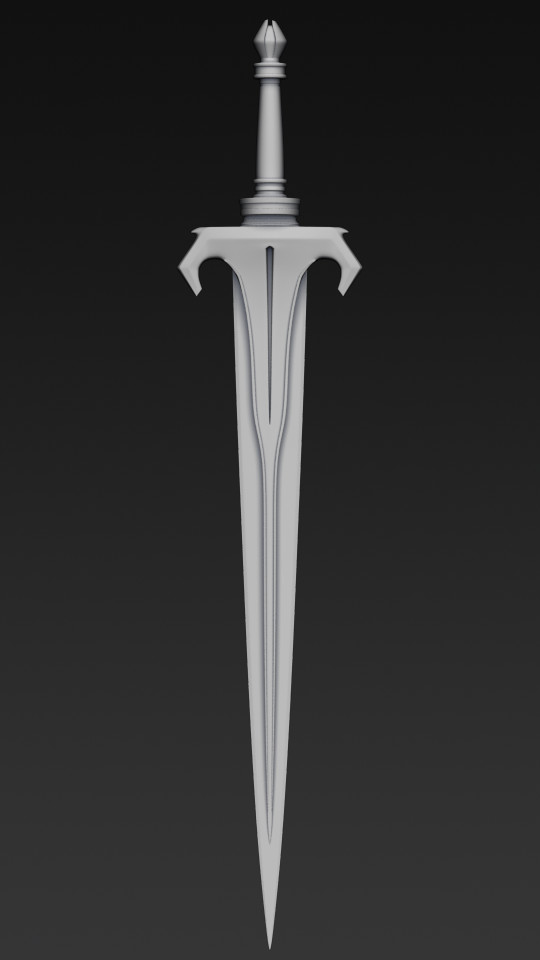

In [ ]:
readb64Recog(base64_string)

In [ ]:
predictImage(base64_string = base64_string , model = model)

{'confidence': 100.0, 'result': 'pedang/pisau'}

In [ ]:
#image 5
base64_string = '/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdWNreQABAAQAAAAKAAD/7gAOQWRvYmUAZMAAAAAB/9sAhAAUEBAZEhknFxcnMiYfJjIuJiYmJi4+NTU1NTU+REFBQUFBQUREREREREREREREREREREREREREREREREREREREARUZGSAcICYYGCY2JiAmNkQ2Kys2REREQjVCRERERERERERERERERERERERERERERERERERERERERERERERERET/wAARCANgA2ADASIAAhEBAxEB/8QAkQABAAIDAQEAAAAAAAAAAAAAAAQFAQIDBgcBAQEBAQEAAAAAAAAAAAAAAAABAgMEEAEAAgECBAQDBAoBAwMDBQAAAQIDEQQhMUESUWEiBXEyE4GRsULwocHR4VJiIxQGcsIzFfGSQ4LSU+JzJDQlEQEBAAICAQQCAwAAAAAAAAAAARECITFBUXESImEDgZFC/9oADAMBAAIRAxEAPwD2YAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKffe8zjyfQ29e6/HjPKP0/wDQFw55s1MFe/JMVjzec/8AI72J9WSus9IqqPdPd6bmYjcWnT+SkdPv04/gzNpt0WWPT1/2LZTOk2msTytaPT961pkrkjupMTE9YeF2/ueLP/bi2uv5bV7Z/bWf1IMe7Z/bdzb6HDHM8KTHD7viS3OLFfShT7f3/DlivdW1ZmP5ZWmLLXNWL0nWJa7R0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABE9wz/RxTOums9urzcVmubL4+jT/AI9vD9eq0/2WtrbaIpMRaLRbjPTSdfuea3G7vix1mtPq3rGmvbOnb4z+rmztr8pglxcrDjNtZjTWY01Y2PtWz39b7fPGmeONclZ46aaR5dOX8VJi/wBiyxwy0pas89I7Z/T7HTeWnNSu52lpnTh/VHlp+ni56aXS/hu3Kr3+yvsM9tvk+ak8/GOkrLbYv8yMdsserS3Hr6eU/snxTI2uffTXLuq1m8ViutptM+Wsck6mzjDWdJ9XjPhH4Qb/ALJjE7Sa8utJiY0ty6TKd7Nlt9bJhmeERw/T7VJ/mxadMcWv/VWvD7NZ1n7ELJus9c9M+2iZ7I4zH5v/AEY/XnW/biNbYvT6KI+y3Vd3hrmr+aOPxSHpcwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABiZ0jWWWuSvdWa+MTAPMe53/wAmPqW+XvpFv+Pc1x76ntueM2T/ALd/Rfy8JZtWNLYrxrWda2hS+5Ytz2fRj1Vmfn/mjz8Lfj0Y2lzNp4WXjDp/s+x2/dTd7OazXJMxatP5vHTz6/xQfa8WSsTXTSbzXtj4Txt8IhY7T23Dip3RbJ3dYtPZp9kfxWOClcc9taxXx6z97nt+2dRqaV2iO1B90y9uG0R+bSqLn95rFpjWKxrw4d0zHj5MXmd9ijS0TGvC0ctY8Y6fDwYmlmNtulzLxHns1c2O0Wyxatp4xrEx9z0ntW5/zMczb/uV4X8/C3x6T9i62mTb+8bT/D3ekZqR2zE/NrHK1f0/U8z7Tgy7fPmx89P7esdbRZ6LPlMOfT1fsN5rfLi/LExaPt5r1Xe1+3zs6TN51yXnWyxWTEkABQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABB3O/jDMxEa9sWtP2RqCcIPtfueL3PD9bFrHHS1Z5xKcAAAAAAAAAAAAAAAAAAADEzFY1nhEAyi7vf4NnSb5rRHbGunX7nlfef8Ab5nXDsOXXLP/AEx+2XkL5b5Jm1rTM242mZ5/EHsN17vh3GTvw1vrfppE8fsmfiqsvu9cWTSkTeeVpnlPlp1/UoomazrHCUzab+2DN9XJHfE6d3dz+MebNlWYep2u7xbmk6a17fmi3Ok//b4Tzjq6ZLxjxW14TxhRZN7bLvJzbf5aU9U9LREa8fwTeyMl6V1mMdo7sevWP5fjX9cOG2n+/wC43NvCt/8ABbrdYP8ANwxF6Tr6az6uHDl+yOLT2LP2biMVvkyemfj0n73pthuLe0zaK1m23tPdNa86z4xHh5KnLtsWb3Gd1g0jDNotHT1zHLTp6vF3lm0c7MJt6VmZ1iJmJ5sWp21+pWJ7qzGk6+fHTwbRatZ/uemdPVW0aOuGmTf5a48UTGOJi17zw4R0j97z6zb5fh1tmHrKz3RE+MNmIjRl6nIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABC9zy2x4fT1nQHTJvsGOdL3rXXlrOmrzW/3tdzGTbbS0XyXiYtePlrWefHxnlEO+fZY95jjHuI7ojjExwms+U/s5I232m59sjTbzGfDz+nOlbxPl4/em2cfXsmLeXb2nbx7Pua4otrizxFNZ5/UjXp4T+56p4i+42ltvbHN+3NGukTrjnur8vDlHT4/F6D2H3f/AMngi140yV4W8J06x+3wY0ts+3bW0nhbgOjIAAAAAAAAAAAAAADjud1i2lJy5rRWsdZBtnz49vScuW0VpWNZmXhPef8Aa77yttvt69mK3CbT81o/Yi+8+9/5+fuiZnFSf7dOUf8AKfOf1cldMYdYnLFo7vVrW0Wn7vj5plcOUWyVpF9Y05RHD8EjBu6TOl69tpjt78df+nlP2aS55NjbsnLimMmOOc151+Mc/t5eaJEzHGDinTvn2tsOluFqTyvXlP8AHyc8mW2We606zpp9zrg3VsUzr6q2+es8p/j4TzhjPhisxbH/ANu/y69PKfOP4nuLP2ml9zivhxV0mIibW58Jn9IeljBS9Oy8a1af6bsbYMeXPbleYrSfGK68fhOv6no77TFk4zXj5cFSqGMFojhf/wB0ay2v/r1s0Rbv0nXutW0fNPnPw5cF5j2uPHOsRx83dJrJzDm9qzF7dasRFrRpHgn4sNcUaVdBQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAa3pGSJraNYlsArsuwtHHHOvlKq32S+3jS1Z1l6ZplxUzV7bxrAmHlcu2puq1vfTvrxpkmNdPK381fw6OMbm+K0fUjJW2H1WrS0RE2tOlIpWI9VZ/L0058Vxn2s7adI40nlKDuNtXJ2zPCaT3Y78+yef21nrH2wzZn3WXC79u3tt1jj6tJx5dPVSfxj9OCc+fe4e5bva5qY8Ney1Y750r3cZmeNZ/l05aeOj2Xtm/neYa3yUnHkmONLcPtjyJbj7drfwngNIAAAAAAAAAAAqfe/esftWLWfVlt8lP2z5An7vdU2mK2bJPpr+vyjzfOPcvcNz7hmnLa9ax8tKRePTE/pxn/0RN77rud9abZrzOv5fyx8IQhXXLt8mHT6lZiJ5auc0mIi0xwnk7YtzlwcuNbc6241t9kpE467yP7GsXjj9GeP/ALP3Tx+KZ9TCJizXw27sdprPkm1mu5/uYoiuevGaaem/nWP5vGv3eCBW80mdOsaSzitFLd0zMacY0569CwlYrMd0Tblrx0ep/wBe9hrv6Rnzx/Yi9ppXrb+H4q/bezZvdclMmKvbS8a5L6ems6zE/fpro+i7bb022KuHHGlaRFYB0rWKRFaxpEcIiGwKgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADW9IvE1tGsSp9xt528+NZ5Sumt6Res1tGsSDzmXH3V0i00mNezJXnSZ/Gs9a/bHFA1ttrxeuO07ila4seuTXutbWe6PGsxrPdP8Ax04LrcbedvPjSeUomXDXJERbh2zrS/Wk/trP5q/dxZsz7kuFt7dv53VO3LEUzRHqrE6x8Ynw/DqnvG92em4pFpjHSnbxrxta9uETWf5J+7SJieL0nt+//wAukd8dmXti0016T1jy/Al8XtbPROAaQAAAAAABB909xx+34LZbzETypE9Z/TmDT3b3fD7Xji+XWbW+Skc5/h5vne992y7zLfNeK91uXDXtjwjVpuc1d1knJmy3teZ5zXh+PD4NMe2vGmTBMX046Rzj/wCmefnprCZVri3lsdoma1tEacJrHT4cXSMGPdf9iZrk/wDx26/8Z/ZPHzlCnm3vlm8V4RHbGnAwZMlrzpW+vp4aT0KZJpE6ddOPWNPBNrau+rFL8M8cK3nlfwif6vCfslCtj7Y1mfVrMdvWASst43eOckx/erxvP80eOnjHX73LbbLLub0x4q62yTpVM9m9uzb3N2Y44WrbW08ojlr+t9A9q9nwe2Y+3HGt5j1XnnP7o8icFSdhtI2e3x7ev5KxGvjPWftlJBUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAa3pF4mto1iVPuNvO3nxpPKV01vSLxNbRrEg85lxVvEd3DtnupeI1mlvGPGPGvX4qjDbN7bkimS9smfLfWOzpGvzx/N3R05aaxZ6Hcbe23tpPGk8p/ejZMdbxEW5RrNbaazSZ4T9k/mj7uKWZSXC19v9wruo7bTX6kfyzrW3nX9vWPumZ75rup3m03OPHgp2fT44oxa2i0W521527uU6/B7zYb7/IrFMsRTP2xa2PXXmS+L2qcAoAAAqfd/fcHtkdtvXlnljj8Z8IBz9896/8AHV+nhr357RrFefbHjP7PF4Hd13W5t9XNNsl558508v4Q29y32fd5pzZfTNvVFa9On6aomK2mt++a2j5dNeKK1xzWsz3114ctdOLWtppMWrOkxymE7Duq55jHuo1ryjJytX7eseUuO42k4oi9Zi+O3y3j8J8J8jPqJFsuHez239GTSNMk8rT17/8A7vvRdztp29uy0x3aeqPBzy4rYbdl40lKpad3T6Vv+5WNcdusxH5Z/wCn7k69lRZx2rWLzGkTrpPwTv8AEy7++L6NZtlyR6vsnTun9qLtdtl3mSuDDE2tPKH1T2/Y02OCmGvGaxEWtpzlUR/Zfaa+14Pp692SeN7fsjyj+KzBUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAa3pXJWa2jWJU2429tvbSeNJ+WV20yY65KzS0axIPPXpF6TjtM1rMTEWrzrrz08p6x+1E+nlxX7MUY8eWYjttGs9uPHpETH83drEeHOJ4rTcba23nSeNZ+WUa8RNey2sRHGto50nxjxjxr1Z2meuyXHa42e8+tEUyaRkiNeHK3nX9OCY8FuL32G4ybrc3nW06Yox8Z0nlas2/LHhHXhZ6z273H/JrEZOF5jWOEx3R0nj+HQl8Xtb+FiCq9793r7Zh7uE5bRPZWfx/T+LSO/uHuu39vr/AHrxFtNa16z9j5rudxXPktlyxe97cZmZ0/ZPDwhH3G5ybjJOXJabXtOszLnfJbJPdaZmfGUVLx7Sm4rNsdu2Yn/5I0r5erlrPTX70e+3yUvOO1Zi0c40c9U3b7zWPo55ns5VvHzU/wD0+Nfu4nMOEFI226nBrWY7sdvnpPKf4x0ljJjybXJx5xxrMcYnzjxhpW8TeLXjWNdbR4nY6brDGOYtSe7HbjS08/t846pns+3y77eYqV/LpOvhWv6fe22Wyy+4YsmLBWZmLVtSPDXXXj8Pwe59j9lp7Vi017stvnt+yPL8SL06+1ez4fbKaU45LfPeec/ujyWQKyAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA1vSuSs1tGsSpN1t7bedJ40nlZetMmOuSs0vGsSDym6x0y45x5Y1pr3R40t/NX9sdVJ7lu77W8/Tia5Mloyzli2tZ0107PCOPXj+Vd+5e17mM0Y8WSIx6d3fPOPCJh5fNlzba1tvuY7tJ7uMa6T41+P3GMpHsPbP9lnNj+nmpM54iNIryt+5C982lb2vvt3FrREVrTHTlX4z8dZd/8AWq7XJjm+KJ+rHz93P4/CXoJpExpPIsHzra+zZd3Wb10rr8sShbvFlwX+jmjttSNNPL9r6JEYMGSuGZitr/J5+X7nP3P27Hv8U47xpePkt1if3eLj87L9nTEs4fO8eW2PXt09Uds6wxjtWszNq93CY/imf49L67eY7NxSZjyvp0+PhPKUK2O1YiZ4auuWeUzBrucVsFp1tSO7F/1Vj48/j8UfDtsmaa1pWZm09tfOVn/rvt999uoivCtYmbW8OkPde1+ybb2yP7cd1+t7c/4QDb2b2yvtu3ri4TeeN7R1t/DlCxBUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHDcZ4xR42nlDOfPGKPPpCttM2nWeMyJa1tM21mecvJ/wCxbG8Zoz141vpX4TD1rnmwxmpNLcdVRQex/wD8Wa3jpwt+16L3X3PH7dj778bT8tesqOvbgtfu4V0ift5fubxsKbzd23G+vHZE6Y6eUctfAHH2r27N7lm/zd7xrPGtZ/Tk9DuYvSnjHj5JeKKTX+3MTWPAyaRE93JnbWbRqXDwf+wYYi1M8cJnhP2cnLD7XuPdZpkwV1m0f3LTwrExw118+ekLzf8As269yzUnB21wV5XmeOs83qdjs8eyw1wYvlrHXrPWftTWWSSra4e1e2U9uxdkcbzp328dP2QsAaQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcc+eMUaRxtPKDPnjFHDjZUbvLeI1ie2J+bJ4ffw+2eEeCpa6Zs1aR9TLbTzlj6lez6msdmnd3dNPFWxP9yc05O+tfVGSbaUrrER/wAda8dOUzrLGXJgtE3x5e/DWe62Ok8I468dIn0z8OGs6KiZbeUiItETbXw5/bE6afa7Zsn0qzPOelddNZngjWrMRGS/GuSK1t1mLcqz5xOvbP7mm4xUpEUyTM1mZjjx0if16a/uEVWLDPuOT69bTWa/LWk6affHj+rQ3GbLtp0tbj4ZI5/bGj0OHBXFxiPVMRradZmdPiZ8GPPWaZKxas9JFeN/85lwX78HptHPjrH8VrvP9inPt6WpHZa0ev8Ap+HjM9P1tM/+rVm0zgydvhFuKt2eKceW2y3VNaz81etZ/mpP6RKK9T/rPvdN3jjbZJ0y0+XX81f3+P3vSPnuLZYvbckTM65JreceWdezlw7dI17vGJ4xp5w9V7X7tGa3+LmtE56REWmI0i06cY/5R1j+MRnPOGscLgBUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHHNmjHGkcbTyhnNmjHGkcZlWbnc1wR35NZmZ0rEcbWnwiBGNxnrhr9TJMzMzpERxm0zyiI6y8v73h3me1cttJpExE4qzwpM8u7x1625a8FvWb5skzaf70R+XjXFWekT/ADT1t9nytr/TrWt6R2WnSL1t6p7dZjtt528Oev8ATVz2354bmvq4X9t2+avbkx0raO3urjiY4xOvlz1/ih4fbMm13tc+1pH0tJ1i08tOE89Z49J8/BcTWI4TGkdInnXXp9vTpzjnz0i307REzOmvpnw18denTy6+XGb2N2SqTaU3ld5b6sTOHu/ux3Takaxrzn+XnqvKzWaz9CYnFwnttExWItGvC3KImOk8FJ7lXd7O1t5jyT2XtGtLc48I05acNPhwXOTa0x2x37dcVY7ppprMTp4fyxHlrGkPVrcxxsxUra6TirMTMxMRPHzdmItFoi0TrE8Yl1w4Zyzw5dZaQw4pyT5dZVW99rtt8855nui3CLT08npqUikaV5F6ReJraNYnmmVw8xSI07ba9uuvp51n+avn+PKUDPTD7ZjtfLSJiZrbHakz3ZJ8dZ+WYnnpxhd7rZTt57o40nr4OUds1nHkjuxzOunhMcrR5s2ZJcJftPuv+VjpGX57RrW0xp3fZ4/qnnHlbvGf4Fqbq9s1pv8AU7ZwzWZrWYr8OU14cOnw5XXtHvGPdzbBN++9OEXiJiLfx/HnHlJecXtrHlcgNIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOObNGONI+ZnLl7OEc1Tv8Af49jjnNmn4R1tPhH6cBG+53FcFe++trWnSta8bWnwiP00Vmtr2nLkmJyTGmsT6aV6xT/AKrfm5RpWJlywWyZpvm3HOYpasx8sYrV4xWfj8/KZ8odYi19e2JmKxMzpHh+nDz89Irz22zxG9ZjliszGK+HHaKTMxGsfNxt6v8AlOsxEdOOkxDteLYrUtk7e3WKxPPt14WienHTSLeOvCK8uUYvqa/TrOkUiLa6R58Z5Rx4c/Hz1445i0xjmdIx6dleXbWeU/b4/r15c8Nt6TfvvkvPG8zOk8oienH8Onx+WRS8TXXXhExzn5fj4x5/+7jz42rMU79PTExHPt1mfD4dfDw14RtFZvM3rEREz8szz1jjXTyrprrppz8ZtLCIu/z4MmK1p7bThvjma6668eXP7PsS7YMlsv0r21rbW2SYnt7ojhp4/wAvKYjTmrdj7Hiy7r/Jp/8A16zE0jpa3l17InlM83pdtsom025+c9I8I/T4vRpMRy2ua3wYO/StY0rHD7FjWsUjSORWsVjSOTZUABWJiLRpPGJVG62k4Z7q8afguGJiJjSeQPP8O2aXjXHPHTrE/wA1fCYU++pb2zFaMVY+lp3Y8lZmNbTwmbf1V4TEdNNYej3W0nF6qcafgh2rS9bYste/Fb5q/tjwlLMpLg/17/Ya+4VjBnnTPEfZfz+PjH2x5eieEn2/F7TaMsTM1vMRXJOtvTrrMRFY4ZOnGdOsTry9L7X7hkvEYt3EVyflnX5vKfC3jH3ddGecNY8rYBUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHLLl7I4c2cuXsjhzVW93tdtETbW2S86UpHzWn93jPQRp7h7ji2GOcuadZn5a9bT+n3PJX228943GLLnrauLLPpmPlrWOen8ea1y7atcv1PcsuO2TLXtrinXSsTP5ecx8dPtWG8pbHhvlyxwxRMdtbTSvbpHGv9VeMV14a8nO7+jc1Q703G2wzg2drZIjScNYp8ulvVFrTpExzjTnxZ2u6pusX1KcI+W+ObcK28J6aeE+HDnrrtsNzi3ffWszeMNaW+pb5rTPH1VjhPby6zr4uWO+bDtq0x7b1Wm0/TtfXT5bRPq4zrx06xLF9PLSZjpSZnLSumPSvG0/Ppy4fHX0/jblncV+pOOundl07ta6xXjw7ufy/r6RpxQ9tuMG6wd1ZmKVtW16W4/T08es0jnGnXnw1TtOy9LUmbUt/dmLTpNeHzeUeOunH5YjRlUWcXZaMUR3RrprWeGkRx4zy8Jn469e7bDgjezMxEV29p1tNY0+rPl1imvOed58mdtto3caV1/xtdbWn5s8/spr/AO74LvDh7+EcKw7a6+a57beIxhw9+kRwrHBPrWKxpHIrWKxpHJltkAFAAAAOar3e0+n66fL1jw/gtAHnrRWazS8d2O3zV/bHhMdJVm+w58VsdYyR/j6za2SdY7uuk6ce6OPDrzjy9Dutp9P10+XrHh/BCmImtsd478do0tSev8fBLJUlwey/7Bh3cxt731yT8k24Tbyn+r8efk9A+Z+4+x5drlrbba3x3n+3aOcT/LP9X49HsfZ/c7Wx48G7vWc8xMemdde3x04a+PmZxwq7AUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHPLl7I4czJkikeap32+jb6ViPqZsnDHjjnaf2VjrIMe4e4U2dYm3qyXntx4452n93mqK0/xc997vM9LZopPbi107fKNZ106cuurF9lODcV3+8mc3b/ANyIj5PC1I60r/Hi6+5YsWTu3tdZyY60vTJTTjWbaads669sfDpDnttnjw1Jj3Qt7vsc3xUz4OzNEfPrE114TWYtx1ju8+UyZd1uKxNZmckWteIxX5RMz6eM8dK11tx4RMQ1yxE5JrlpPbee7ty1rSZ8+2vh/Npw8Vl7jn2taeqa+q3bTSumkacYv0njHXh4p1iYV5/FbLsa1ye3xefyZcumtb28Kx1iOn5nocGe+atYm1sl5jJeuTtikRPyzTT8to5x3deHKUbYbnHts05c9q0paule+1tYmOtdYiNJ/pSt/ucO2pa+61tGtqRTHGkXmY0m0+FucazPTgl58ERMm8w+15vo2msVtStcd8dazbHPXu0+aJnjPGeSRtMeX3CNc3bG24fJWa/V08deMUjw4a/BVexewf5ExudzGmLnSk/m+P8AT+Pwe0xYu/yrDpNJOaxdr0YcPf5VhMiIiNIIiIjSGWgAAAAAAAAAAVu62nZrekenrHgsgFBw0mto7qW+as9f4+Eq7Jt77WK4qZLfSvM1pk61ieM1n+vhpGvDjrHF6Dd7TT1444daq+YiazWYi1LcLVnr/HwlNpmEuEnYe5Vrau1z3/uaembTHdP/AC06/j8edu8Dv9pGxtbcRrkrk0pXJafl5RNbRGnqiOU68efN6Ha+45tpWK7yO7HrMVy01tpHTu4a/wD1ff4sy4427XvmL0c8OfHnr34rRas9azq6NoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOeTJFPiZMnZ8VRv/cI281xU9e4yfJT/qt4Vj/0Bnfb7/H0pSPqZ8n/AG8cfjPhWPFSZM9NpFtxmv3zbhfJ1yzH/wAeOOmOPzW68od8fsdrZLbjLuJnc2n+3evKto11iY8OmnDh0Qt77bk9wtG53NvpdtZ+pTnwpzmn7p00nylzu0vs1JhW7WN1vNzbf4vRWL63vNvTWJ8demnD9S+23uFNzltfB6sc6YsmO06TTHr/ANyn9OnPXjGng12OLHusOG04prhrk9FI4xNZrwtfpPqjW2vwS/cMeWcf1dvFaZ7Wx9szEa/f5R82vDSJ8mbecKrb7eYp9W8TaK1tadxW31PrWj5a8OVfGPJErjw5cf08uT06Y9eEzbuvHOPHtvEa/GVng3mHFS+TBlm0V9V8WD5azr6rVidJms/bEeGku/uG22+T6O6z5orNJrbFkmYjvrGlp1/Zp9xnBhE2vt+HcbLHTcUvi+nOt9Z7YnTr6uUTr4Q74dpb3PNO4zTP+LrE48U8IvMfnmPCeni12+wt7lnnd55n/G11w4rcrafmmvh18/g9Jixd3GeTprr5rNviMYsXfz5JcRpwgiNOEMtIAAAAAAAAAAAAAAK3fbSYicmKPjCyAeYwWpuO6l41x29N6/t+MMYq5NPoTeJvhnSYtxm0dLdOcePDX4LDcbeMOSe2NKzxhR/7DjyUxxusM6WiPpZfOluX7mN9flDW4rG+775v/wDMreM9dO+9J7aRXpFvyz4vSe0bjc5sWm8isZK8NazExMePDkh+2e19m0xVrMRWaxafObcZn9Oi5xYq4q9tWtZ8ZgtzXQBQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAc8mTs+JkydvLmofefe6+3x2U9e4t8tfDzn9kdfgDvvvcPo3rhxaX3GT5azyiP5rf0x+tV5MWD23u32aMmfPW3ba+kxzjn4RXTh105M+2bXJtZ/yt5XTcW75ta1tZmundxjlXTSIUdffd5l2mbDev1KTHqvOute6fH8HO27XjpqcOO195tgy5rRSL0zTM/TtM6RrOvTr0eizduTbY9xmpbbZtfRfS14p8Y6VtHTTRX/6ntMtsv1bYonDzjJaOMWry7f2oef3ff7Ld3jNabTEzFsV+NJiemnhpyLM3gT8tM2LJOHZ17vp3tOXbzwi3dGkzWNeOOfDjNZ8kPc76PbdceCdc86xOs99cNZ/+OmvCZ/mn7IX21vO9xbfc2iIydmSKTbhEWidOfnp59fNAx7HBjyZM+eIxbmnrvW/qxxr/APJWPzeVeluEpL6qj+z+2TtJjeZskY5rS1rV0417omIm3x5xHOeSdsfaKb3N/mZaTXBrrhwz1/qmOkTz7Y/Dn22eynfTGbLE120T348V+Nslv/yZPHXw/Zz9Hix93GeTpJ5rFvhjFi7uM8kmI0ZFAAAAAAAAAAAAAAAAAAEfdYZyU4c4VFom09nb3TPp7eevxjwX7Gka69RMOe3xzjx1pOnCOnJ1AUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAaZMnbwjmXv2/FHmeczxBXe4+4xgtGDHakbi/y/UnSI15a/HpH38HnNl7Pa2fLffzk/yKaZYpSfXbzievHhw5Sod3lzbrPbLeJ78k90Rp48tP2PQe6bzdYaYP8AJ9MZaxXLpWO+IrPGO7zjjp46s7Z6ixabqLZoy47XtStoprl6Tjt0jlHdrHq/NPHyhX73fY/Y602m2xUvW9K3ve8a9+v6fYnZ/cNlnxTlzROWk5JilZiYiLTXhwnTnH5uWsof+xbLJnvh2u2rGlMd7xSOMx29PHyiPFznpWqr/dvfo3OPFi2ndirWNb1rwjXwjTpCrvsdzOL/AC7UtOOeP1J+On4vVbL2bYX2eL60eq3zZde3S38s/DlpPV19vw5dhtb49zlpXFSdaWjjw11nXWPu0iZhr5ScRMZ7Q/a9rf26tM243FYxWp3Thv58Y0ieseUeSTtPbJ9w3E+4bvWccz/Zx2/l19OseHhHXr59cPt0e5bj/P3Mf24jTDjtHOP5rR5zxiP2PRY8fdxtya1n+r2lviMY8XdxtySQaQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAaZL9vCOZe/bHmqd5v+zLG1xWj69om0zPGKViNe6Y6+VevwBj3Hf3wxbHtqfV3Hb39n8tf5rfsjnLzHt/+05/8iP8y39mde7tpHDw811sMddtiyZ8UTm3Fpmlradtpn5o7ovMafZzjRzrOznFa+8w0202i2DXnOsfNpGnDx1+DHzXCP7p7ht9zbbbraXm+Wl/kpHq7OvDnHLh8XffbPbb7cx/k55vpwx7eukWjXp46+PlHFjae37LYbjF9G0Tl9Wk3m3dbuj0zERGnb58tNeqDXFg9uy/+QzZq5c0z3fSxTH5+HDx0jXwS3N4WTDG990v7Zl/wovN647Unv4TPZpGtJjt0WdN1T3HHkjFGTJXhEWjTHPDpSddda89J1ieqvy7/wBsx4s2asRly3v3duWvq+H/ABjy+Dh7f7jtNxWNtak4sndN8V62ntpefDrEcI159eiYzOlyst/7vh2F8tLzbJnrWtaRbjHGPxjXW09ejHtntuXfzj3nuMRPbWK46ac9PzX/AE4uPsnsVs1/83f+q0z3Upbr/Vby8Ievpj142dJrIxbljHj14y7goAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANL37fize/b8VF7p7pfHeNptNLbq/jypHPWfsA9092nDeNpttLbrJyjpTzn7On2qyJxey4b7quX62fJHH83r8dekRx11+Zrkvg9jw3y4831dxljrpM9380T0iOPPm5/wCvb7Lu73xcK2nW1r9sW7rTOuto4fZ8WLc+zUee3Huu53Fb0yXma3t9S0f1Jm895nebPHt5x+vFMf3OfCI+/Wer1XuWx2mXHFLRi+tPprbs+a0c/l/fwU282v0dl/j5vTkw+qYrMV+pHHlw9XZw1nnpqk2lMVN2nuePe7rDNtvema0f92Z5VrWeX9Mzrr+OqF7n9XY+6Y93l7IxzbSnlSOHGI+LttvcN/7ntMle2YmKxSmSlfn5VtE6/HXhppxb/wCye2Wz4q7ibUrkx17bVifm4/l/ZGhOKeE73X2zD7thm21+nOSbf934c41j7HH2r/V8W0tGXcTGTJHKunoj96b/AK/sr7LZ1x5eF7TN5r4a9FzTHpxl1YKY+suoIoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA0vft4dWubNGOPNyx8u63OeIKz3vfZ9rSlNvXXLmt9Ot55Vmf2z0QKZdv7HM2yc/lm+kzky3j1Tx10rEax8Vhm3VN1kpWNPo0vWZvaOF7flrTx4zrry8PFW2w7X3fcVtra0Yb/wB/XhW08o0rrMce31ctYY2s/hZHltnOHc7rXdWmtLzM2t5z+ng9jsPa6+3YJtgmMlpmLXv41/p49I46+KR/47a1vN8eKtcnP7Ph4f8Aq0/yK+2xSJjt215mv/7dp/LP9P8ALPT4Od2zxGpMO2Hb2wRNrW+raJ9fDXur8P54+3wlXf7P/j7jbY7TM2y3n+x2cddf2fr1TPcN7bYdvZHfa3DFSv5p8P49eXTVXYYybe2Le+5WrGSvdFMcRr3a89NNf7munDga57Kz7bt59r22PJnyXxz3zNqTbWJ4fLFY19U+ekwm+2+13tkje771Z9IilZj5Yjlr43/D4u2y2FsmWd7uY0yWnuph51x8NNf+c9Z6LmlNOM83aTHN7ZtKU04zzdAVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxz54xR5zygz54xR42nlCviLZbazzlUtdKROW2s/age/bzHjpXbzrebWrOTFj17px9eXLp8VxSkUjSFDuPca7P3Ca7eIzZM0VrkpE6TS1eXq5cY5x5JeiJHuG2pedvpWY+nMzix8vVWutaz937EG8R7RnndY4m+2z/APetXTSJmeFqxHGOOvD9qb7rusePLTDe0V76ZeevDhERy8Z1j73T/Ji0dlq0+lMRFaV1mOHXuiulYjpGnm4OhO9wUmKXyViZ0tS2vzR008fgqfft1Xc2r7ZtvVkyWr3/ANOnL7fHwiHLHtNruN79StskfTt9W+ldMUce7hM6TEdOXHmsd9nxbaJzXx5bWyxGtsMWpW08qx/NXhw4cya4vHJa54qV9qpjzZs0Z607seKO31fCvPWe6NOPKJ59Ev2/2y31Z3m6j+7aZtTFrrXFr/1eMs+3+2zFq7rcUrXLFYrixV+XFXw87eMrulNPi6yY5vbNpSmnGebcGkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHHPnjFH9Rmzxijxt4IERbLbzlUtIi2W2vOZS8eOKxpDNMcUjSG4YYvbsrNvCJn7lD/reLJTafVyf/Na2SdY46eP2rzLWb0tWs6TMTET8YU8e0b2MVMFd12VpWK/28ekzEeeurO0t4ajp7l7lj9u7L9vfkyR6dI49sTx4xx4ROrff+5XxWxV2tYzWyertrOvojnP7uLPt3suPYz9SbWy5ZjTvv0iekR0S8W12+1mb46VpNvmmsaMzSGUemLJusnfmr24qTE46W+a06c7cdNI6R48U+1ojh1lwnPNp7cccUnFi7OM8bTzluTCZy2pXTjPNuAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADjnzRijh8xmzRijzQYrbLbxmRLWIrbLbxmU7HjikaQzjxxjjSGyjUZYFGWGmTLGONZ+4GcmSKRrKFNrZraRxlj15raRxlY4cMYo0jn1kTtjDhjFHn1l2BFAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHLNmjFHn4MZs0Y4/qQoi2W3jMiERbLbxmU3HjjHGkM48cY40hupIwwyCsMM6OWbLGOPPpAGXLGOOPPpCFEWzX05zJFbZrcOMyscOGMUaRz6yJ2YcNcUaRz6y6gigAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADjmzRjjxkzZoxxpHzIda2yW8ZlUYitslvGZTseKMccGceOKRpHNuEYAFYByzZox8I+YGM2aMcaRxsh1pbNbSOMzzlmlLZraRz6ysMWKMVdIE7MWKMUaQ6AigAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADjmzRjjSPmZzZoxx5ocVnJbxmVSsVrOS3jMp2PHGONI5mPHGOPNuEgAKwMuGfP2emvzfgDGbP9PhHzItMdsttI+2TFinLb8ZWNKRSNKidsY8cY40q3BFAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHLNmjHGkc2M2aMcaR8yJFbXt4zKoxWJyW8ZlOx44xx5mPHGOPNuAAijDKNn3Hb6a8+sgznz9vprzRsWKc0+XWTFhnLPl1lYVrFY0jkqdlKRSNK8mwIoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA45s0Y40j5jNm+nwj5kStZvPjMqhETefGZTceOKR5mPHGOPNugACgIufP+Wv2yDOfcaemv2y4YcM5Z8uphwzln+lYVrFY0jkqdlaxWNI5MgigAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADjmzdnCPmM2bs4R8yJWs3nxmVTJWs3nxmU3HjjHHmY8cUjzbgAIoCJn3Gvpry8QZz7j8tftlyw4ZyTrPys4ME5J1n5U6IiI0jkqERFY0jkyCKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOObN2cI+YzZuzhHzIsVm8+MyqVitZvPjMpuPHFI8zHjikebcJABFAQ8+fu9NeQGfP3emvJrgwfU9Vvl/FnBg7/Vb5fxTuSoxEacIZBFAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHHNm7OEfMZs3Zwj5kSIm0+MyqWkRNp8ZlNx44pHmxixRSPN0CACKEzpxkmdOMoWbN38I5Azmz9/CvIwYO/1W5M4MHd6rcvBMVABFAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHDNm7PTXmZs3Z6a/MjVrNp81SsRE2nzlMxY4pHmzjxxSPNuGABFCZiI1kmYiNZ5IWbN38I5AZs034RybYMGvqty6Q2wYPzW+yEpUAEUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcM2fs9NfmM+fs9NeaLSs2nzVMs1rNp85TMeOKR5mPHFI824ACKEzFY1nkTMVjWeSDlyzefIDNmm8+Trgwfmv9kM4MGnqtz6QkqgAigAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACPnz9vprz/Az5+3015/gjUpNp0hUyUrNp0hNx44pHmY8cUjzbgAIoxa0VjWeRa0VjWUHLlm8+XSBGcuWck+Ttgwaeq/PpDODB2+q3P8ABIUAEUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAR8+ft9NeZnzdvprzR6Um06RzVGKUm06Qm48cUjzMeOKR5twkAEUYtaKRrLF7xSNZQcmSck/hAjOXLOSfwhIwYOz1W+b8GcGDs9VvmdwABQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABwzZu3015sZs/b6a80elJtOkKhSk2nSE3HjikcDHjikaQ2QABRre8UjWS+SKRrKDfJbLbz6QIxkyWy2/CEvBg+nGs/MzgwRj4z8zsAAKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAI+fPp6a8/Ez5+3015o9KTadIVKUpNp0hNpSKRpBjpFI0hsgACjXJkjHGssZMkY41nmg2tbJbxmRC97ZLeMymYMEY41n5jDhjFHjbxdgABQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABGz59PTXn1Zz5+3015o1KTadIVKzSk2nSE3HSKRpBjpFI0bAAIo0y5Yxx5sZcsY480H1ZbaRxmRCZtltpHGZTsOGMUeMzzkw4YxR59ZdQwACgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACNnz9vprz/AAM+fT015+KNSk2nSOapazSk2nSOabjxxSPMx44pHm3CACKOWbNGONI5sZs0Y+Ec0OItltpHGVTJHdltpHGZTsWGMUcOfWWcWKMUaRz6y6IYABQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFz59PRTn1kz7jT0U59ZR6UmZ0jmqWlKTadI5p2PHFI8zHjjHHm3CQARRxzZ+zhHNjPn7PTXmiUpbLbSPtlUyVrbLbSOfVPxYoxxpH2yzjxxjjSG6GAAUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARc+fT0U59ZM+409FOfWUelJtOkc1S0pSbTpCdjxxSPMx44pHm3CQARRwz5+3015sZ8/b6a80XHjnLOkfbKpkpS2WdI+2VhjxxjjthmlIxx21bIYABQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFz7jT0U59ZNxuNPRTn1lGx0m06QqWs0pNp0jmnY8cUjzMeOMcaRzboSAAojZ8+npr95n3H5a/bKPjxTlnSOXWVTJjxzlnSOXWVhSkY47alKRSO2vJsgACgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACJuNxp6Kc+sm43Onopz6yjY8c3nSFS1nHjm06Qn48cY40gx44xxpDdDAAKIufcflr9ssZ9xr6a8vFyw4Zyz4V8VRjFinLPDhHWVhSkUjtryZrWKxpHCGUAAUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARNxuPyU59ZY3O509FOfWUfHjm06QqWmPHNp0hYY8cY40gx44xxp1boSAAohZ9x3emvI3G47vTXk54cE5Z15VVDDhnLPhXrKxrWKxpHIrWKxpHCGUAAUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQ9zudPRTn1k3O509FOfWUbHjm06QqWmPHNp0hY48UY44czFijHHm3QkAJmIjWeQpM6cZQc+fv4RyYz7ib8I5MYME5Z1n5fxVDBgnLOs/KsK1isaRyIiIjSOTKKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIW63Onopz6yzutz2+inPrPgh48c2nSFS1nHSbzpCyxYoxx5mHDGOPN0QkAYtaKxrPIVmZisazyV+fPOThHysZ885J8m23231PVb5fxVGMG3nL6rcK/isIiIjSOREaMooAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAibrddnop834Nt1uIxRpHzTyVtYm06zxmRLW1KzZZYMP04482Nvg+nGs/M7qSANcmSMcd1kVm94pGtuStzZ5yT5eDGbNOWdZ5eDtttt3eu/LpCp2xttt3+u/y9I8VgCKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOebLGGk3s6KXd7n6+TSvy15fvErWbTktN7c5WO12/bHfbn0R9nh77d0/LX8VkpAHLPnjFHjPSEVtly1xRrKry5pyTrLGTJN51txlK2205XyfZCs9sbba93rvy6QsARoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABE9wz/AEcU6fNb0wqMFZmYiOc8Ibe7bj6mf6ccqR+uf0hK9rxd39yeUcIVlZYscY6xWOjdzy56YY1vP2dVdn31snCvpr+tFS9xu4p6acbfggTabTrzmXPHW2Se2kaytdvtYxcbcbfgqdtNttO3135+HgmAjQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxM6cWUfe1vfBkrijW81tFfjMA8Zm3nqnJPG17TMR8VtT3LJXHFMcdlYj4z96DtP9f3uvfkisWn+a3LyjTVbYf9drbjuck3/op6a/v/WrKDG4nJbSut7+EcZWW29uyZPVm9Mfy9Vnt9ri21e3DSKR5Q7IuHPFipijtpGkOgCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAP/9k='

In [ ]:
checkDim(base64_string)

{'array': array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255,

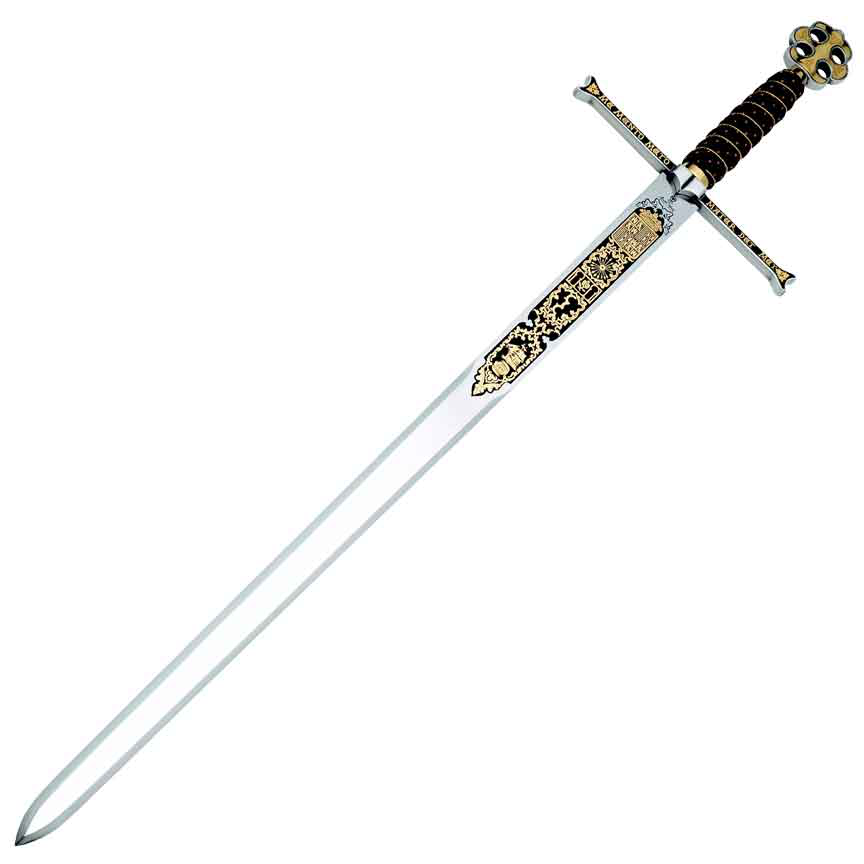

In [ ]:
readb64Recog(base64_string)

In [ ]:
predictImage(base64_string = base64_string , model = model)

{'confidence': 100.0, 'result': 'pedang/pisau'}

In [ ]:
#image 6
base64_string = '/9j/4AAQSkZJRgABAQEBLAEsAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAlgC7gDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKa7iNC7cAc0AOoriPEXjuHT0ZLQh5RXGv8AE7UC33lFS5WHY9pz70V4k3xMv8BfMXJ71PB8UbxFwwRsd6XOPlPZqK8mj+KM+QXjTB96sJ8UvlO6Jc/Wj2iDlPUaK4ex+I2nzovm5Rj1rctfFWl3WNlwoPvQpxYcrNyiqMer2MjbVuI8/WraSI4yrAj2qk0xWH0UUUxBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFGaACikyPWjI9aAFopNw9R+dG4eo/OgBaKbvX+8KN6/3hQA6ikBB6GloAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK53xlfPYaBNJGcMeK6KvK/ibr4A+wxsPl5bmmho8k1fU5HmbLHqc81iG8ck4Y/nSXkm+4Yg9TVN/kJwc81m9Roti8kBHzH25oN7IpxuP51R3c5JpQeuefxo5UMvrqMgXG78Kd/aL7fvHP1rMJwOcUZ6jJpOKEbUWqyrg7jV238QSIflkNc0GHQ+lKD0OR+dJxA7OHxLMGyJmz65rrdC+Il3ZkRtIHT0Y14+JHB4qzDePF069qnlKTPq7Q/FNnq8AKyKH7qTzXQKwYZBzXynpfiCa3lR1lZWHfNereF/iJiOKK/YEMcK+acZtaSE432PV6KrWl7DeQiSFwwPoas1qnfYgKKKKYBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXHeKvGaaHIIYwrSd8mupvJ1trSSVjwqk185eMNZe91SeUMcEnqOlZzk9kVFdWdhL8Ub3dxsA+lQ/8LR1AjO9R+FeTm5Z2xz6UnmyA8E0uV9x3PWf+Fm6kVyHTH0qNvibqW7AkWvL0lYKOTmnF3IGCPzo5H3DmPTT8TtSHHmimH4l6kekwrzPJYjJ6U7JUn5s0cr7hc9Fb4j6mT/x84qM/ETVP+flvpXnm4k5yaBJ8pzmjkC535+Ieqkc3TD8aY/xA1M8fa2/OuB3ZBJNRszZzzjvRyBzHeN4/1Lp9rf60z/hPNS/5+5M/71cC0uCeTTBOVYHn86XKHMem2PxI1O1mVjcF1HUHnNexeF/Ett4k08TxMBKPvp6V8tQSkROyk8+1d58K9eey8RJCzfu5/kIq4qwm7n0PRSA5FLVkhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUVR1PUYdNtGmlYADpQBHq+pw6dYyyu6gqpxzXzf4q1iS8up5ZG5Zia67xz4oTU1RLaQrt+9715ZqN0874YClzIdipNIpAwvzdzVcliMnmlI3EADn3pMeoHFIYA45IBpNvfj86Bw2f0p7AuwAyTQAwfMCCCKURnDNg7R3xSlSG6dKnVpGgMYztPb3p2Yitgg4zRjhjk1cTTrmVcxxMw7YFOi02cyANbuV78UWYXKS9CeaVeuTWmmj3p3kQuE9CKeNCvG+fysD3o5WFzPR2GMHofWr1vqcyMFLH5egrVtNCltw+5BLvTgEdDT7Pw7Kk6syqcZPXNJwuO51HhDxzc6W6CR2aHOCpNe3aPr1pq1qksMqnI6Zr51h0V1DKy5G7IatvS9S/sm5RUkmQDrWdnDYe+59DA5orjfC3i631Ii1lkxL0XJ612Vap3JasFFFFMQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHI+PtUFhocibsNJwK+ctRm864Jz35r1j4q6nvuktVb7gz1rx2bcJDkH86yWsmy3orDPLbIZehp5BB5IqSJSR1NNZTuya0JHrggYFOxzkg0xeCQfwqdMvxQIiOcZHemHoOuauGFDgkHikMClsZFK4yn/D9aURv3BxVsxpGASo6+tZ9zeHJVeKLjElbyzgEGqz3DAdTUDuWbr+tNJyBxQA9nJzgUBvTFMwcHk0L1zwaBGnb82zcjpWh4euDb6nDKpwyMDms22TNuWGOPerOkLtukJJ+Y4pgfWOjXq3+k21yp++gNX68++GWtC5099NkYeZATj6V6DTEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFGfegAoozSZFAC0UmR60bh60ALRTd6/3hRvT+8PzoAdRTPMT+8Pzo81P7woAfRTPNT+8PzpDPEP41/OgCSiovtMP/AD0Wk+0w/wB9aAJqKh+0w/8APRaPtUH/AD0Wi4E1FVze24/jFMOo24/jpXQWLdFVP7St/wC+KadUth1cUXQ7Mu0VR/tW0x/rB+dNOr2oHEg/Oi6CzNCis061bD+L9aadbtQPvD86OZBZmpRWV/btt/eH5006/aj+IUcyCzNeisZvENsAeRTD4ih7Y/OlzILM3KKwT4khHYGm/wDCTw/3aOZBys6CiuePiiLGdlNPidMHEdHMgszo6K5g+KfSOmHxS+f9XxRzIOVnVUVyf/CUydkFNPiqYHHlrRzILHXUVx58VXGM7Fph8T3RPAUUcyDlOzoriD4nvM9RTD4lv+u5ce1HMPlO6org28S32SA4P4Uh8RX+f9b+lHMHKd7SZHrXnx16/Y8zmon1e8Y4Nw/50cwcp6NketNaREGSwrzoavengXMn501tSunGGnfP+9RzBY72LUreaRkVh8pxmrPnR4zvH515eLiZG+WRufepPtcxHMr/AJ0uYLI9LNzCOsq/nTDe2w6zJ+deZ/aJCRlj+dHntnqcUcwWR6UdStB1nT86T+07T/nun515qZmJ4z+dJ55PejmCyPSDq1kP+W6/nTDrdgP+Wwrzlpznkj86b9oGeWFHMFj0RvEFgP8AlrTf+EisezGvPfPXpuFIZ8EEOMUczCx30via1VTtBJriPFeoXOsRMkZKIOg9aqtcqRkMDTJJlZACw9qFJhY4f/hGbm4kPnSGnyeDIWAO4kgd67EGPOSwzSO0RBG45zT5gscUfBa7SQyhsf3ahbwWWUlZQp7ZFd2Joi39KQzxKDnkfSnzsOVHHR+C4Nil3Jce1XR4Tsd4cRgfTrXR/aIuMKcUC4iycKfWjmYcqOeTwvYpLvWIH2bmrSeHbNJC4hU5HTFa32hMcL2o+0JjhTRzMdkUItHiUFUQD1FSJpke4bkGfXFXEukVuV/+vTZboMCApqbsCL7FHGCAg/KhrRCApQYHtUi3WP4AffNAvGz90de4oDQatqgAIQflTvsqYztpv2hwMgD8qU3DseQKB6DTCACQDiq32CJ2OUJFTPPJjgDH0p0Jdxlm/CgRn2ttc6drNvdwgmNXB4r3aynFxaRyD+JQa8eEr7gAfl967XQfEKwwLBMDgd6E7O4mjtKKqwX1vcKCkg+lWQQehqyRaKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACobqZYLaSRjgKCamrmfG+pjTtAmOcMwwKmTsrjSuzw3xpqZvdWuJd38RrlB+8bnOat6nN5sjknkmslZ/LfOTUQ0RT1Zoqm0YyfzodMHIxn1qIXcbAYJz34qeOeKT+IDtWl0QRYweRUqtgD0p5jUnIB/CkxtYnHFIZKp3dQKiluFVeuBT2JjjZsE1jXM+445pDJbi+ZlKg8VRLZJzn2p8EMl1N5USkvtz1qIqysVYEHuKdgGEnjkZqRmy2T1pmACcClAGAec/SgQH05oHHNGD1Ao570AXbZ2Ebc9qvaS227jLMAu4dTVO1UtGcA0kqSKEWNgWPUCmCPVfCuoJpfjaEJIBHMPm565r3ZWDKGB4NfKGn3m7ULF3cggKpP0r6b8OTvcaFbPIcttxn1ojsD3NaiiimIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKM+9GaACikz70ZHrQAtFJkeoo3D1FAC0U3ev94fnR5if3hQA6imebGP41/Om/aIv+ei/nRcCWioftMH/AD1X86Q3luBzMn50rgT0VW/tC0/57p+dIdRtAceemfrRdBYtUVUOp2Q4NzH+dNOq2I/5eY/++qLodmXaKpHVbIf8t0/OmnWLAdbhPzouhWL9FZx1zTx1uFpP7d08DP2haLodmaVFZf8Ab+n5P74flSHxDp4/5bA/hRzILM1aKxj4m04f8tD+VM/4SnTs43tn6UcyCzNyisT/AISiwz/H+VRt4ssl6K5/ClzILM36K58eK7MjIR/ypP8AhLbTJxG9HMgszoaK53/hLbXH+qekPi61H/LJ6fMgszo6K5o+LoMcQvTD4ujxkQtS5kFjqKK5U+LfSA/nSHxawOBCPzo5kFmdXRXKf8JY/P7kfnSf8JXL/wA8l/OjmQWOsorkR4rlP/LJfzpD4qn7RrRzILHX0Vxh8VXPGI0o/wCEputw+VMUcyHynZ0Vxh8UXX91PypP+Eou887KOYVjtKK4g+Jrs4wy0w+Jr4H7y4+lHMFjuqK4RvE16P4lx9KT/hJb7+8KOYfKd5RXBHxJfHo4pv8AwkN8w5kI/CjmFY7/AD70Zrz/APt2+OD5xx9aP7bvCT++alzBY7/PvRketeff2ze8gzt+dH9sXmOZm/OjmCx6DuX1FJ5if3hXnp1a7PWZqadUuc/65vxo5h8p6H5qf3hR5kf94V53/aVz/wA9Wpp1G4zjzW/OjmCx6N5qf3h+dIZox1dfzry2+1W/WSAW8rYZsP7VbGouBkzs340ud9gsj0Y3EI/5aLSfaoP+ei150t+zg/vXzSfa5RnMjYp8zCyPRftUH/PRfzo+1wf89Vrzk3Lgj943501rl+R5h/E0uZhZHo5vbcf8tV/OmnULYf8ALQV5wLphnLE/jS+eeCWb86OZhZHon9p2vP7wUn9qWv8Az1FedeeSep/OkE3PJo5mFkei/wBq2g/5ar+dB1W0Az5o/OvOWnyOTmmGcqOGJ/GjmYWR6MdZtOzj86b/AG3a5PzD868+S6VhnNL9oGfvUczCyO/Ou2g/jH50n9vWn94V5+1wBk7hj60C7BH3hRzMLI9AOvWo/iph8QW2Mgj864I3K8fMKDdDH3hRzMdkd0fEUAPUUn/CR2/HSuF85WGdwwPem/aUyfno5mKx3R8SQ+1IfEsOK4Y3aY+8aDcoAct+lF2OyO2PiaLsP0pP+ElX/IriftkfTJH4UG8TjJP4CldhZHa/8JKoH/1qQ+JgO36VxQvEIyC35UG9QA9TRdhY7M+J8dFpG8TH+7j8a477YoHIamtdg8YP507sLHX/APCSuQSAaQ+JJOwJrkftgAHB+maDeYB4NK7A6z/hJJc8fzpP+EknJGBXJi7BP3aa94ccCjUDq28VeTn7QWUdsd6rxeKZbncYx8gPBJ61zDTl1xgH60JcsoOEFGoHWHX5/X9ar3HiaS2j8yWQKK5/7VIR91arXT+eNkiIy+hFAHVx+IppolljcFGGRS/25dEH5x+VcnbzSQqI1C7F6VYF1IB1FGoHRHWrgnBYflQNYnIPziudNzIBwRSC4lHQj8qLMDoW1e4x9+o/7WuDjEjVg/aJj0akNxL3P6UWGb39pXR4DtSHUbjnMprBNxNnhjj6UnnynlnNFgNz+0J8n96aPt0zHO9vzrFMshXhj9aes8oPJFFhGt9qmOf3rfnTftkuQA7fiay2nkJHPWoGL5IDtRYZtG6lA++fzqFbmVS2ZWOfesn5yc72GPeg7iAQzfnRYVzaFycjLnHrTftBz9/iskZ45NJls9TiiwXNc3J7sMU0XCjOWH51k4J/iNO2Z70WA1PtIz94U37Sob74rNK5PJo2kEetOwGl9pUnlqb9qXPDis/GKTZ3osBo/akB5al+0rnOazscnnH40Y9xRYC/9rQH7xpv2yMg4J+lUSM4o2DNFgLzXaEjk/nSG7Qcc1RwOASads5wSKLAW/tigfxGg3oxyDVTHJ4xSkHjgUWAsC6Xrg0fa8rnHFV8df8AGk25GKLICwbzH8PFBu/9n9Kr46ZIo28e9FgJvtbY4A/Kj7W3QAce9Q4wTSYGen40WAme7YkkKKb9rfPAGKZjB4FJj60WAkNzJjjGKBcv0J/Sm9c8UzAzjP607DJPOcc5pfPc8560zHPSkI+tKwCmZ2PP86QyvjgkfjTT2zmnccAimIbukJxk0qu2ec4p2MikOB2IpDE3Njqefemndzgn60/8qPw/SmIjIOTkmg9BxTyMj6UDof5YoGR4xxn86jaMl9wJx6VY6AYA+tLjk4oAiC9s5Ap2049qdjil79BQBEUIzjH5UhTB4wamx2pO5wDQIiMeCaTyskHH6VNtPrS4460AQbKNnUg1LjJJFJglsgjGKAGBOCfX2o2e1SdAeaMc0AM2DI46UmzpwacMjOTTuCBigCLb2AxSkKGwRUnGR0pSeOB0oGR7eBxSY7jH5U8HnkUo6jj8KAGbBjoKApQkgn8KecZweKazYPc0AZdzeXNrIzyFWTr0q7YapDdD5HKN6E1U1G1+0gsGKMo4zWBtUTiJTsl6g+ppSXVCT7nottqU0IG1zxWpaeIriORcyH864zS5pWtiLgESKe46itEPxkGhMD1bTNRS+gDAjd3q/Xlul6tLZTAqx2/WvRtOvkvrZZFIz3qkyWi5RRRVCCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAoopCQOpoAWimGaMHBdfzpfMQj7w/OgB1FRNcQp96VR+NRNqFqgJMy/nRcC1RVH+17LGRMtRPrtggyZhSuh2NPpXkXxX1f5ks0boMmu7ufFlgilY2LN7V4r4z+2arqM06gbWPFZzd9Coq2pwN1NukI5qix3Nwc1ZuYpYZGjmQgiqy4zmrSsImtbW5udxgQvtGSAaZuZSc5BqS3upbV2aFiuRioppPMbdk7j1oAsx38sS7QeKsxamVIyoK/SsraCu7PP0pd7bQOKQGnPqW+MrGMCst3z/8ArpM45zQTg5xyaaQEsDPEVkjYA9ODyKimk+clyS1KOmc806exe4tnuYj8y/eFAFUz4weBTlnQ8Ywcdc1mu7AkEHjgU0Skgknn2pagahmUDrn8KfAk9wwEaMx61mRXDCXqc+hFa9rqCIdyMV6imI1Lcva5SSLYMc81VuZ1WZmjJ9qhur9ZVHIyP4s1ntLk/I2fxpasex1/h2NbjVNLSUH55h9OtfV1nHHDaRxxgBVUYxXyXpEjR2lvIwO6N91es6N8TpoYY0utjBRgnPWm5W0Elc9iorj7PxxDdRCRUGCM9asjxYrD5UFHMgsdPRXLHxUc8Rioz4rk5wg4p8wWOtorkP8AhKpsZ2j8qZ/wlVwTxt/KjmCx2VFcWfFFyxPb6Com8S3ZPyuaXMFjuaK4P/hJb7PD0HxHqD9XC49KOYLHeUVwB8Q32f8AXNSf25ekZMzZo5gsegZ96M+9efnXLsj/AFrD8aadavMN+9bPbmlzBY9Cz70mRXna61eMMmV1P1pW1m6VSxkY/wDAqfMOx6GWUdSKTzE/vD868rh8T3k+oPBvAQfdz1q82pyHOZ+fTNLnDlPRfMT++v50ebH/AH1/OvOVvJmOfNOPrTjcu6nMrD3zRzBY9D86L/nov50huYB1lQfjXnRuGVeZW/Om/aGI++fzo5mKx6Kby2H/AC2T86T7bbH/AJbJx7150bhlGCx/Omic55kb86OYdj0Y6haA8zp+dNOpWY/5bp+dectMRj96DR9q45cUcwWR6KdUsx/y2WmnV7Mf8tRXnf2n1kH4GkNyuD+8H0zRzMLHof8AbNj/AM9hSf21Y5/1w/KvOVueSC46U43II4kGKXMwseiHW7Ef8th+VMOv2IH+srz43Ckff/Wm/a1HRs+tPmYWR6B/wkVj2Y0h8R2Q/iPFef8A2lACd3NKtzGByxpczCyO+/4SWxx940n/AAktkem6uDFxCWIZz+FI9xFnhhj0p3YWO6bxRaDPytTD4qtQMhGP41wrXKDo1J9pQAcn86V2Fjuj4rtwP9U3503/AISyDn901cMLpATyaPtY98UXYWO3Pi2LtCfzph8Xrni3NcX9rQHo2PpR9rUZwDRdgdkfFuP+Xcj60w+L2H/LAVyIvAU4U0n2vnlTRdgdcfFsucCBfxNRP4uuv4YUrlXuwT92k+18fdAo1GdT/wAJXeN/yzQGkXxXdkYKqD9K5Y3ZJ6DikN22fuijUDqT4pvcZAT8qQ+Kb/PAT8q5f7Y2OgpRdvgDAH4UagdP/wAJRfnun5U0+J7/AI+ZfyrmDcyZwAKPtLdwKNQOl/4SW/JOHWkPiK/P/LUA/SucFy5HQ0NOT6/nQB0J8Qah/wA9j+VIdd1Akjzz+Vc/5xx1P40GXnoRRYDeOt6hnic0HWr4/wDLwfzrA83ttP50vmgfw/rSswNz+2LzHNy303Uz+2Lon/j6b86yBNjHy0jSK3JQZ9aLAax1S8J/4+Hx9aadRu8H/SX/AO+qx2fjIyKaXbAyzfnTsBs/brojPnyfnSG8uSP9fJ+dYxd8cOaaZio5c5pWGa5upSf9c/8A311pouJM/wCtf/vqsjzZGYbQzZ9BUy2t5IRiJgvvT5RXNFpn6mRvpupplbABc/8AfVVjp06kCRsH0zTWt1jJLzcemaLAWVk2ZGR+JpN+eS4z9apu9shI8zP0qt9stlboaQGt5oGDvH50nmju4/Osg6hFnGzI96b9vQnGw0hm0Z1wCZBTTOhP3xmsr7evPy0034PAUflQI1zOuPvZpPOT++ayBqQwcqM0jajnjFFh2Nj7Sqg/MaTzEHc1j/2hnIwKT+0WA6AinYRs+bHxyaQzQ4zg1jHUXwem36UHUHI4xSA2fPXHGaXz1wcq3+FYo1F8YGKadQkHO6mBtC5Tk4b6YoF0pGQprEbUJM9R+BpBfuRwSKQG2LtCp+U0ou0IztrBN454Y037S/QGmGhv/b0AztNBvVxyo/OufadwcE0C5bB9aAN77cp7HNL9tB6Y/GsA3DAct+dN+0uOQTRYDoxdZHQfnQbksOAM/Wue+0MR1xQLhyfvHH1osBvRzlVwSufrSpdq2cFRjtmue3uxBDH86QSN60WDQ6QXHmEAFM/WlMjBsblrmjMw/ix+NHnuSeTQGh029j0ZaN0hwcrj61zYuHAyWNKt3JuzuNGoHSfvsdFoKXePlQH8awY76ZMgueamj1adAcSGgDUL3KjmIgd+KryX5jGXAUCs+61a5nXy9xC+1ZlzJPNA0TO2w9eaBmv/AMJDa+Zs85d1XlvHdcgjpmvPX0aWO6V0Zsdee9bNrcX8eQGbC/KDjNFhHVi5cDGRQbiX1H4CubGqXLACTGRx0q5ba0ibxNCG+nWgDYE8uMZ/SlM8xxhgKoW95bzRmQyGNAcc1OJlYExsJFHBKmjQCfz5CRzR5suclqrQ3kM3+rYHBxipxjBKmnowHGWXH3j9aTzZM/eODQOvel9TigCJmlJADGk/eYyGP41KRxzn8KMe34UARJvB5c1KHf8AvGlC4OcUY6ZpgAkcnlj+VNy/qadjJo7jIoAYA/OWNBDY6n86eOOSKOmelAEQV/7xz60pJz1P51IRzikxzwKQDNpI60hUk96kPTk4pCeAMDmgCMLtBIzTiM4IJp+MZ9aMYoAZto8v3FO6E80ZzzzTQDdpxzRjinY470vfrSAaFO3ihkIHWn9B1pD1xmmBEGy2FBGO9OK8Zx1p+3ijr3pAMCYzgUpTnqKfjvxmjHWgBmBjNKF4zilJ5AoH3cUAJjrzSbQSeBTs5PQUnB9aYB9QKByOT+lHHXFHqaQAAOhoKDnik4Ipe3SgBMcjOPypeAegoGDxzRnk4BoACKbtzjBpxPHAoyDgEGmAgUAAcUhGOlOHBwCaTPJ60AGMHvSgAHOaM8YpMjtQAY4yM/Wl/GjueDRzwQP0pAH3T0o/iBo5xkYoPamADgUfnmijkjr+tAAT34oHXofzpMHPtSjryKQAOrce1J146fjQAcHA5pRwcYpgB60A57dfejHOcmjB/wAmgBe2MU0nnvS449RRjkc8UgFBxjNGTSAHIzijAGcmmAcjvz9KTueaOpwDRtye1ABjHcUnpQRzTuucdKAE54xj86COelKBg45o5J7fnQA09c0vGTxS7QT1o65NACDqaXpxSdc8/rQQAOTSGHQYJoxx3/OgD5u1HUcimIXpQMjnJpCcDBFG7ocDFAwHU80A+1AycEil6EAUCEzk4ApOhJOTTjyaM560ANPXvQR6EU7PHSk7EYoAb05zz9KUcjqKXv60Y560AIF56mjGcZFOzye340vfORQAz0GKXbntS9RxRyAP50DGjgEY4pcHkZFGCc5JNLjmgQzGDnmlxknilPHGaQNQAhHHU0vbkilzn0pNhxw1ABjk80fiaQ59BSgH3/KgYnBPXmlC4BpQvqKcAMEYoEMA7UgzjgCnkZNNI75oAMAYFJjjnrTx0pSO4oAjPUcGkGATx+tSYBHQ0FeMUARnJ44FIR0xmpNoznFLt9qAIiMjgUuDjHSpAMCjGeSOlAyPHGMUbT6mpDQT0OBQBHt5B/pQV78U/knrSdzQIoagm61ZcEmuLaRkuFz95Wz16V3k65VgT+NcTqdq9rfFwflbkCqteIdTtlWKW3RjjJUd6is5HJeJs4Q/Kaq6XIJIIHDHKjHNax2sd2AG9hWcdhsRTz1NdP4Y1NoLjynb5WOOtcnuPmEAcZ61ds5TFKrg859aYj14HcoIpaoaRc/abBGzyBzV+tCAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACignHWqk2o2kBIeZQaALdFZp1ywAJ84VFJ4isEGd5NK6HZmpI4jjLE8AV5b4j8XasuoyW9oh8sNgGt/WvFJlt2jtV5I6muAAu/PZ5X3bjUPV+Q1ojZttWvmVWnm+fv81Xf7ZuFHEw/OueEe7JJpfLx1yaLDNifVJJRuac8e9Z7axucIJTknvVUxE5HFQyWqNkY/GiwGil+N7D7QPz6VWlv0CnfIDjnrVFrXaSR1qKS1baWYZXHSiwE2nai91fnhjGp/DNabWUZmZyud3UHpVbTLQw2olVQFdsj6Vp5AXJHFU9BGHqHh+zuFkl8geYecgVy0/g5nDOpAXBPHUV6ECzHcMCmhFXOSCTRcLHjsuiX8QLeSZEDdVFZ8sTxkkqw+or2s2qEMQo61nXmiW08BWeJSrHtQtQ1PIh0AXOe9L6Gu6uPCtujOYoG9vpWdL4OuseZCw8sjd83BHtTsFzlQMt8w46VZaNGhDKK0Z/Dd7FGZioKDk7etZk4kTOUZR24qbMCJhkDaefpV/TJkjDpIcIQc81mj5iASal/j2qT0p20Az75YjcHYvy59ajCxBfljHqKfLGQxDAimrHgdx+NFtBCIkbMWEQHHrVoKBz5f6Uka4B4BPTrUgHCqVINMCW2WMPl4g2exFXoI0Mw/cKV+lVIwQACfoa07KIvIoDA+tMDTgQkARoAmMYIq3aaEry72DAA5xk1dsrT7vGa3oISqDAOKV9QFsna2VQB90YHFaSX0gGNo/KqwQAg4qTbjmkxlj7bIQKX7a5PQce1VsAknpS4OSeMn2pWGWBdyZ4o+2SnB2rUGNuOaXAIosBL9rl5wRSG7mB+8PyqMDHYcUYycdRRYCQTzYznmj7TKDwxzTARyc0naiwDvtE3OW/Gj7RNjBb9Kb6UEjAxRYB5nk/vEUnmy4+8R+NNP/16M9eDQAB5Bn5ifxpWZj3NIPYGlGcgUWAgSLbKWxz61II8HcGOfrTupzS7aAHJI6HO4/nUgnfgBqh7E5pf4enNKwEhkfnJNHmvkANUfc4B9+aM8/40wJDK5XJJ/Om5ZuSx/OmnIo9gRRYAPJ5JoI4wCRTs8dqaelIAxjjJpCMnpQcnsPzpc9aYCYHalxikBxgEignjg/mKAE280DqOKXHHOaXoMk0AIF4owNvQ0vajsB/SgAAyetHvgUAc9TQO/Jx9KAEAyOmKUgYJ5/OjHoaRjgcCgBAMtgVKsEhxkAUtuVAOBz9asBsY5oAhFrzyfwFSLp/mAkSY+op5+6OTTkk2jrQgKs9rLbjLYKnuKgH3eMVoSThkKscj3rPDBug/SkAuM8mkIoOMDIOKXqCc0AJzjqKMZ60Ht1/OjjigAxxx1o6g5pw5PQUg9CDTAPpik79KUjg8Uo5GcUAN+g49zSkjnn9KO9Jj2zSAM8ZyKM5Jo7ACl7dKADPHFJnpR+A/Og/jQAucDnNIWwBk/kabnGTk0x5OnBoAczgHg0gLuQF/nSRwNMMjI960IYUjUZA96BEUNk8zEHIq2mm2cK7pmDEdgaDcu/yxr070otZmYcj5vWmFydLuGOIrFCuOmTTXvZmG0MOPSlaz8pMuRtzjipjpm1QVk6+1FgMaeSRmzIzY+tVcJIMPkH3rdm02MLln3fQVT+wwMCoSRu9FguZDQph2BBx0GarxhXZt3y+5rZazQYPlsO3NVZLQZO1VxQBnyRmPhsY+lN43AZGTV020hXB24HSojaHIbctIZEsW5chhQIHY4XH51YWBMZyee3eg26AY3NQBW+yMByQPxpBaHacuAfcdaurAgB+ZvbmnCNeOOM0AZ/2XceXC7eetJ9lBGTKPyrREEWTujyfWgxRA4CCi4GYYUzgMcU4Qx4ILNmtIwRcEIPegJGP+WYx60AZhVApBB9jTGCAgkHB961miVxkKD+FRtEpjBKKMGmBlttB4U0A7QRtBHbnmtJoQ4I2j86BbfNjaKQGedh5waQKC2EI49a0TbAsCcA05IFAJAUnPWgRmyKq4XJ5pDEwUkA4rWeJC+7YDUmP3RTb8pGDQMwzGdqtuOPYcU1cEkbq0INP+zxFA5dd24ZFSrAMjKAj6UAZZjYEAsBnocU9Ys981pyQAkMVOcelKsIQ42jFAGcqnkbCKc0DBQ4z+ArQ8jAOd1IsbAEAn8qdgKAGI8lCfekMgUgeUPyNaAQ5J2t+FIQ2A2DmkKxUy6BlEQI9dtN/edBGv5davYdgQCfWgbg2SP0ouMqiB5AT5Y/AdKiZNuCIwR9K1EZsEEsM9eKin8wKBGUI44xT3AymdWZgDgg9aYlu0g3NMRL024rduorW3i3gjfjONw61kiWCQidXZZW45/rSuA1rY5IMpYDByaczPEhAAx708PsY4G/0OaSa4kkJTymPqFHSmBDuySpQEcHiopI8kkLjnOa0YzH5G5ogJAO45pyiKUHcuGPQCkBjvOob7OiFQw+Y9qdFM9rbyJDIdrdM+taRtIWiOFxg9aoTwLGygFWOO1AGRpkcsF27OzEn7vPArsoraaS1822lBPdKwJLRxJF8rAvznFPgu5tPPyM4PIPvSA345iBtkGCOtTq3H196ybG/e6hkkkAfZ19cVMtyIJAWfCMOM07gaXOMjNCjBzgU2Ng65BpwBz/SgQuOaOo7UuOCefypQOckimMb1A5o7jgUuM5INIflPSgAz9M0mKUnJ6Uo6cnmgBCPSk5z1p4X6YpMHrQA3HbrS4z0Ipcc8ilxjJJoEMx6UmOnWn7ePajHTp9KBjCOeTQevelZcnqfpTe4GPxoAMYz1p2BkHNGOR1pwHfFADQuDkGjuc5pxTIGQaXHpQIaeAKCOaUijHTikMTCg9KTsOtOxjOaMYGc0wGEAHoaXtxS9+goxkYNADeOTgfnSZPpTgPT+VLtoAZxjNA5H/wBenYGAMGlwB0FIBh4HBpevSnYx0HWgemDTAZ0zTvoKXGKAMjgCkA05AFBGR0INOx1pD64oATvjmjHPQU7nJwKQjgDigBB1JNHtinAckH+dBHp+tMBuOKKd2zxSEEjoKAG84zxijnB6fnT8HH9aTb3zSAb2pcdcjPtS7cg8mjByTTAb14zRjnqad3xRgk9f1pANxz94Zoz3FKVbrmlC980AGOegpAPmOOKXBINKB6GgBNvvSDgD/GnY7UhBoATHfmgjj/Glzz0pM8nApgAGPSgDg9adx0xR17GgBhGcE07AzTsDJpT0Az+lAEQWnfUUpHJyD+dJ1bvQAn0pcAnHNBHJwOacF7YoAZ2460HJJ4NPK96TgnOKBjcdKXbkgDFOxx60Z4oEM28Y60YxzipMZ7im8g//AFqBjevQUZ5OKcRRQIaRyKOMU7bk55oxx0oAZ37U4KTkU/A9aB2AoGMwe9G04HFPAx3pDwOTQIZg+gzRhge35UpOc4P40hOOpoGA7cU78OlNLDGc0wyHPagQ4nHf/wCvTQ3A4qMtk4GKUNhRmgAZ23AAdadt6UoBYHinhCDyeKAAKOPWnYIB60o60dT0JFADcZHA4oA6H0p3pjpS4wPrQAwgknpR1zjpTsZPQ0YPTFADcZ7GlAP4U7tmm4wO9AAenIpKdzjk0EYPUCgBucnt9aSnnsM8Ug6mgBucUdff8KVuRj+dJnI4zQABcn3oIwCM9aCSBgmkJ7ZFAwPoKTOB1NIflA5pm/JY4/OgQ8k4puQTnJprMwXK4z6UJJ5gyBgjr7UAMk6nmuc8SRP9mDqSdprobiZIFzKwAPcmsvU8SW7bpFwy8VSdmBF4W/fWp3MTtrpdoGMA1znhJI1gYpJlycstdORnP8sVnHqNlGbKsuAeasQ5wMnB9qCQSVpIUK4GciqEd54Qud0ckRPSuqrgfC0/lagqE/eFd9TjsSwoooqhBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABTJJFjUsxAFRXN3HbRlnYVx2s68025I2IX61LdhpXLWteKoo3NvBIu/61yU9487s7MefeqUkKyTmUj5zzmnbcgZx+dTbuVp0JvObGQxppkbuTTAMHr+lHXPNOwDi+QRjmmY4GetKewz+tB649KAI9m3qeM04j3px6dRQ3pxzQAwqBkYqNo8nIqfHJ4oPB70wItoYEEVWuVkQDYgdDw3PSr2PWgxgrQBHaThbVYDLgrnA781MhIjO5w341CY1xkgZ9qMJg5zmpAlE8bJkNt7VDsVWEnnFsdfpTPLUA/yppj44HNOwFhLqJGwADn9aka4TcARletUtuDjA/KjaenFAE6zxbm81TjsRTLi4iwNpJX0x0qEKG6AinGMMckA/hQBXjuImt2R0457dqzJY7IjYsICAcBhnmthrcEAAdPQU02yN1QflRqI43U7S2JUpZKcddq1k3FtG9iTHaus2flIFeimzTk7BjuMUhskK4CD6Yql5hZnmdlol1dyZnQgHmpm8JzpJhGGD0NejJZouAEANS/ZRkcfpTbQrHmLeGLwkYCnb7UjeGNSBHyqffNenfZQD0Gaf9nyBx0ouhnlzaDqSsEMJO33rptG0h1UGZNr9+K6z7MGwSoNPSEL0ouhWKsFuFHQflVwKQPu8U4RgsuKlUMOcn61LGMAGBkGlHpipMHv3pNvI60hjAAB0pe/TinEHJGKAPp9aAE5pFxnvT8YHejHHWgBvXjNGO9O/GkHXGaADsO9IevSngYAyf0pMds0ANIxjpQd1Owc4JoA68/pQA0Z6YoNOxk5yKOpoAbyTnBoOcmnDIByKDzmgBvfAIzTtvGMij8P0oPTtQIMc4yPypMY70vfrQOnHWkAnbnNGOO1AHIyMUnfrTGL7Z/Cg8g80goHXnp9aAD60nXBp/brTcc0AHTqaO/H86UrnJwaAMnrQAm3Pf8MUuMUu3J6ihRnikAYzn1pAOMUuCc4IoAwBzTAXGKOM96Oh6HFKFx6flSATA7Yoxz3pQvHQfhRj3FMBOAen600j1HNPxySRSEcUARqCjZGee1SrJx3H9KTHTr+FJt6YpAPM3H/16a8rZwB+NGMj/wCtQVGBxQBGSTRgjnipAOOKUjIGKAGd+aOnGBTiKXHBzmmAz09aTqen408A8cUuMZOBQAztxRj5qXGBnAp2MntSAZyB1o6YNOGcZIpSMgZ/lQAzHGf60nPJPSn4+XpSbc9uKBCdR05ppHI5qQ9AQKjIw1AxAcZzSA4zkHmkLEDNOHK5AzQA1uo6Ypsab5duOPrQ/wB05p4/cRB1PzPQBZEgQBEFSbcKRnAqjDE8kqhSd3U+wrUtrcTHc7BkzgZpiYRRSTKFjB+tWfJlAVhMS4PTHarJYQKY02g47VXkaWa2DxZBPYjFFxFqNELDzMEnrk1c8qJY8Bj+dYUBbBMrFX96e10yq2Zv1pXGaNwkaqAJOWqp5cS8GVs/Ws6S++bGSTVdrterE0XHY0mCsGBbjtVdoo9oIxn61mSX6gnBP41D/aL4JAB9KANdo1UdeaiMSY7cVl/b5GAJzTHupOMNmgDW8uLcOlIYEJzuFZAuJjjAJBpxupV4Ix6gigDV2xqe1KUiPRgD9axmuZGHAIoNzIRjB/KizA12WNjy/SjMJXGefSsUzygYANIJ5SR1oA2i0IHJFCvCD1Gf5VimaXHU4pomkZdyscUWA3DLCDjIpvmR4IGKxgZn+4GJ9hQUuS2MPnFGoG6vluflAxQWRTkgVhAXAPRs07bP0+alqBt7o2OAo5prskbbSuPoaxNs/B2tSYlJzh6dmBtmaMAcCj7UhXBA6+tYmybP3W/KgxzY5VhQFza81CBwPpSGRVYYI/GsXbN/dalCy55z+dKwG09xGygDA9aQToFxuGaxdkhPAP50oSUjBB/GmFzXiulyWdl9MUrXUWScjP1rIKPkbQePelS3ncgBRmgDWF1Ft4IIpftMHc1jPaXKA7om/Ooyrg8g/lRYRvfaYMH5lGaQ3kakBSpHcGsIJIWA2nOOOKUh0OGU5osFzoRdxHGGUfhWbdk/bjcRSjpjaelUfmX+9zULjeep+lFhmgoE10JJljZW4bmtSKO0k3AxIoX0HWuXcEMMH9KlS4mjXAY470a9AOmhtLb7S8Tom1VBGKgis4/tUiupVP4WWsVbyXOd5zVm21OZWG4jC0XYIvNZPDO+zc8XQE84qS2soEjLSozHPUD9KgbWy8ewx4z1YVNFqsKwMHc9c0rgK+nRxXEkbsY4/vJzWfe2qxyFUlX5fmD45rXn1C2vVMin5wBjd0rJZUaUGULyfXqKe4EKyyRKBI4xjjIzio2t45PmVw5PbNWrmB0MRKr5eQMg1LHHp8vEY2SD1PH1pDMZLaS1lyCdjcmtC3eC9ikt7oquP9W2akvrSaIb0IK/Xj8KxJvmlAKn5SMrT80I6CDdbSmEtu2jOc1eViQCRWdBppkCX0MxZSuGU9qvRAhcZoAnHXHJ/pQOuOKUcUoGCDimAgX0/wD1Ubcgc0/HoRj1oOcYwKAGbfajaADTx0Oc/SkA5NADTkDikUZxyakxzxQV5z2oAaB69KDjJ9qdR3FIBmM44pdvOMmjByc5/ClA4PWmAmM0wpk5ANSgcnijH1FAEeOaXGPWnkYPajv0/WgBpHHSgDnk0/p2P4UhHPXmgBMYP/16MDI4pcZ60Dk5JoAaeT0oI4xzTtvPXmjZgc0gGbec80mOeQKk6ntRj0oAZt460u3jpSnr2ozgjn9KAG4x3/8ArUdwOKTcM4BoJGeMZ+lAB680dD0pnmAZ5H0zTBKWxkHFAE3Uc4peg56UY56Cl44GDQAhGfWjHHSlA4zxSLz2/CgAxgA5pCOSeKeRSEflQAnU9BSAHNPxgDijAyOaYDCvBo25OeadjJIoxx2oEMxweTRjnBp+OOKQgA85oAbjpSDsMmn4wMZoxxSGN/z0oK89s07AHrRjB70AMxyeDTu1KMDNB+pxQA3GO9GOKdgY6Che/HWgBOAMADFGOoP8qf2xSY5pgNx9aCMZAFO4yOlJgZPH60AJt5yaXqaX8KO2RnNACdO1GOlL156UdunNACbf1pcAHp+lLjr1o7UCGY5xg0uMmjdn0oDc/wBaBiEelHfBH407qc0gXk85pDExnvQAKUdOtFAhOccfyo696McEZpR25pgHGTRt46UZBbpQfQGgAxyRRjilA980YOTz+lADcc5zS44welOxwaTGenSgBpH1phx3z+VSPwKi/OgBCRngGo2lXeqkgE0rD6VDIqkZYDigB5c55NNJLHjOKYrBjjBFSCM5wBzQAnXtU0ceev5U6OLAyc1KFx2pAAGBwKMc9KdjAp3B5GaYEePUUoHOM0/HIH9aTGfT86AExyeBR/nrS456GjHWgBv4H86CMnkD86dgZPFHr0NACY+tJjinZA6momkBHFADsgYyfwoLDniolIJ61KSBzigZGWzjGc00A5PJp25NxH8Q60b0xuzQIQkZHrTW9jTj9ab3yCM0AIxIIBPNIzYPOaeduQWwD7mmOMcmgYhY4xikTJGTj86aSTIAMbfXNN8wmKQx8lc/nQIklIRcnFV5ZtkRO05PSq1pOqx7ZZg8pJ71Md7c8YpAYt5FeXc4Ez/u17CobqSKONYsl3XoP8a3zA7M5c/LjgVj3FmgkaQruJ9+lUAzwu7RarKi42sK7aSQyD7oGOOlcFoNyINaMBA+Y4yexru2IDHFSviaH0KpXbIQD1p5PIAA/OiQZYnHFNUYGTnNAjW0iUw6hCSR94V6chygPtXk1q+yeM/jXqGnTi4so3BzxVREy3RRRVEhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUVBcXcVuuXYCgCYkAZNZOo61DaLtUgvWRqfiJjlITj3rlrq9LsSzZY+9Q5diku5d1TWZbhjuY49KxC7OxJ/Kg7pTuY4p4ToMGhIYxQQOppduRg0/oQOKUemKBDMYPH50hFSYyTSEHJI59qAGYBIBpSMHv+VO2DGTnNLtoGNK9uaNuTTgMnNBGTzQA0L7c0EZweBTjj3o28A0AR7eaQ8Y9KkAIPPSlKgigBmAec8U0hAMEc/SpAvJBFGMjPNMCArhuRS7McgVMVBIwKXHI55oEVvKywJPJpfL54qwVyeBRs6nFAEGwYGB+lG3A6fmKmwT0AoI5wBSAh2HcaQpz0qwFwcgYpdgPGOaYyvs5zSlPYVNtAI4pQDyOKBFfywTkcUoU8f4VPjBzgUFeB0pDISgH/ANagJU23jBxRtPYUARbcE/1o28dKm2ZPNN29sCgBu3kUgXjpUoHTjFLjOOBQBF+JpSMHpTwvrSleBzQIjxkk0gHqKl29e9GDk8UARNwacKMZJ5p2MDgUxjMYA4FBU7u1Px/+ugjn+tIRH1B4pDz1BqTbkZpAB2PNAxgBNIR6VJtOaCnGec0CGYPT+dHbp+lPA9xSnHagZHjnANG3joc07HPNOxx2pMCPHNG36U4gDoKXBB6UANAzjpSbc9xx2zUmMDj86NuOmKYEeOOMUFSe3NSbcnrS4IpCItvbNLjnGTTx15o28mgZHjqeM07HtTiOmBS7aYDCvHGKaF9f0qXbx0o2/SgCPvwKAMnvTsYBHSlx+tIBmwYByc/Sl28j/GgA5zRjnpQAYPTk07GegP40YzzTlHP+FMBoHWl25zxTiOMY/Sl6HqaBEe31ox2xUhHPNG3jigZHtwOMUoHIOBTtvHAo20CGY9qCOOgzTx70YwCKAIwPXFLjinAcgYH4mlK89BQA3GOKCuRn+lOI5p3bIoGRFT0xR361KQM0gHbj8qQDNvSkII55qXHPWjAIGQDTERYyOlLsyf8ACn474pcUARbeBz+tJt6VMOvSkK8jj/61IZAwPPSo8M3f9Kt7QT1ppQE8UAVNu30Of5UgGwYAOKssnfimFB1AOR70AQY3MFIFNZcyEn7oPHNTeWSGbIIX9KW0h3l2yMLTAs2MTAZzwx+bjtWja2ywSMASUI6VViQOhDMRimzXvlPsDHGMUCL0s8USt8o/GsyfUHckBjj2qq8zySZJOKZtyflz+NIAaSRjyTUZDMeScVYVOM9aeI+M4pgVfLbOSTSSxEgelWzHgA4NIyDaDmgDMeDkU0QnsK0/K5HFIYO+P0pjM0xcdDn1oWEjkA1peSMHikEQx8poApqHRRgn6U11LcnOav8Ak5B4o8njB6UhGcI+MYFOER3DFXvJAPSl8oE4IoGUSrEcmmeQcdSfw6VomEdwKPJHFCEZ3k8YpPIwO9aZgHTvQIAewpgUIw8ecEipC8rDljVryhxgUoiA44oGUGV8gc0bJBkZOPrWgYcjOBSGEdwCaAKQ8zGMmlw+3knFXBFkdP0o8rnoKQFLax7ndnpSFHPc/hV4RDPWjywM/wCFAih5THJJpTDkDrV8RgUCMZ70AUDEcdaDEenNXzGMHIpRGMUAUPJxkc0u04xk4q/5YxnFJ5SkcUAVP3hABY1EYSecE1f8vk0BB+dAFHyiDgZppgYkc1peUvPr9aQxgdqAKab0HAz74pkke7kqPwFX/LUEim+WPT9KBma8Q9B+VRm2Uk5Xn2rU8kHtTTFwPlFMRl/ZwQPl6e1MNtjgZrX8tcdP0phhHXH6UgMdoiDwP1pjRMwArYMPTpULQ4PTrRYZnHcoIGfoDVT7RNHLgj5eeta7IoPYD6VRubYuchfpxQBUlvJwCkcp2dwe1Wl1QyARXCquV/1ijpVG4hKxMXyGxyAKx0LPcAqT8vb1FK1gOrWdkiJmmM8CdOelUt6XMu0IX77x1rKSZ4yRJJuB+6qnNatvL9obzYf3RVcEEdaANzQZpyZLQkA43AGtEqQ23HNYWh3gl1ONSpRuldBPFsuWIBCnn8aSAeowOetOzg8ChexzzT8e9UA1Tz0p2MnODRjmlC4POfzoATikJGOlPxjt+FNPvmgQ0HnHpTuSeCKAKUDHNIBDx2NNPfmpMexpCOBQA32pT06cfSlVeBkilA4pjG456ijOeD0p2OaCATQIbj60p7DpS9BzSZA5oAMHr0ppGT1pwPekAwe9ACY4pewpM8gU4deaBjfwNL24J+lL071Gz4BGaBAXxxn9KgeZzwgHB71B+9Er5BIPvUgzwSBj0FAyRmckYPP1pnmMjBmYY+lHOeCOaTacYLE/hSsAyfzWUvCR+NQW0sjs+5unSrTq/GDgd6YIANwAwD70xEf2c78ljk1NGAG4yacqEKBtz6Gnjjtz0oAUE4xxQzDAo+goCZGKQCxtlc4Ip4HtSoMAZHFPPB4AoGNxgjmlAz1FKADx3oxTEIRz0NJjn/61OHXmjtyRQMZt9PyoC+/NPA4oxjg4NIQ3HGQRRjjpSjnsaUjAGaYDACaCODxTse9GOcjNADcdD2pSMjPNL68Gjt0NIYzGDj1pQAccGlxS45zkUAMwOetOxgYxS9s0fgKAADjvSEEnqaUDJOOtLjAHBoAZt4ApdvFOxn60mOMGmAmMc4ox1p22jHHSgBuO2KMcHFO79KDx6CgBvamkZ7U/AOc0AHPShgRgYJpeO1Kw9BSdBnApAL9SKDnIyaaM96cPpQAA+1L7EUppMDOMGgBCORxigDnpTjwO1GPamAwjjHejHFOx05NKOAOBSAZ2ODTs+3NOHXkikAGDz+dACe3AoPTNLjgYpR9CDTAYRxgkVEwC81OfpSbFIPOaAKhJx0qvNE86FMla0DCCeSfWlWMKMAYoAzo7afcDvGBjtV9U2qKkCgAUuB7UAMA5zmgHBzkflTgOelBGMUAAOTSgcGgDHbFL+NACAAjmkwMml6ZGOaAOnFACYOTxS4wen6Uv1AFHXPT86AE4IpDxSgYAApH4U8UARSH5eDUQzxxT9vHTNBXgnHFAEPmIjFnwAPamxTm4JIUgZxUkkAk+90pyRleBxQA1RhiaSQ4IO3p7VN5ZPOeKa0TZ68UAMZsLyTTQcphSQaWWNx9wDNJsJXDZ5oAgulmMGYyN6nOcdadE73MO9l5qZU2jbzilBCttA5PSgZGUKjjFQyRkREKSCatupKZAOarlCUYMSSaBGGlsWlSdgEAJHynrWup+UBTjH61SgtZbW6wzFoT046GrFxJLBsMUIkZvXtRYZYA3DaSeR1qpLblY2DE+xpFvXKhZdkEm7oT2qW8lKwF0ZdvqelNAcJHO0WsHB2nzOufevT7OVJbVSDnjrXksjl9UJXlmbjHrXrNvam30iHcwExUF8VEl79xLYJOvXH406NeM4H4ioxljzjipowdoO7FMBgJSQDv65rs/C2pkv9lfv92uMk4Occ1seH5NmrwE55pgelUUDpRVkBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABTWdUGWIAqpeajDZplmGfSuS1LX5bgsqHav1pNjSub+o69DbgrGQWrkr7VJbliWY4rPluSTyTVNrh5JCqLx61Gr3K2JZrjBABJY0zYWILUqRAckCpdoA6CmhDNmMcU7b9KfjApCMjgUwGbc4pQM+lLjjvS7cikA0juDRgjGRT8UuM8GgCPH1pdvJ6045z04pMcdMUDG7e+TQBnnmpCOlJtyTzxTAj4PQDig9cZqTHYDj3ppXcDg4NAhhHOMUuOMGnBDjJPIpdvPNACbcmgrk/40oXFLgAEYFAxoXjmk2+gp/tzQRzyaQDCODikAO3inkZPSgDae9MBoXoaNuTyakA5HP6Uwg7un0pAG33pemKUDmlAwxOeaAGbSMnNLjBPT86kxnr+dIF46ZoENxx2ApMemKeBnijHIANADMcYpdvPWnY46UmAFwaBibaQ9DinLyMmlx7GmIbj6UmPQ08rkdKXbx0/KkBGBxz1+tAXkU8jkHH50bcDnFADONxApcDHWnEUmODwaAI8Z7U/HHJpxHGaToeKAG7cnjpQQBzmn474FJjnoKAGEdcgUDGOlLsOeQaXHI4/CgBCM54H50mOuT+lO2ZbJoxgHmgBmOP8A61IMdAf0qTA9qQKMCgY04zxSn6UuMcc0o7elADfQ4/Skxx0zUmPQfrRtxzQIZ1AxS4yegp5TOCOKQqcHgUANxg96CP8AOOtO6nHejHTkUANxxjFJjjOKl25PGKB35FAEW3jinYPtUqpnGMU0gA9aAGAEdBS49qXK9CTTsZ65oAiKkj3pu056VONp7j6UEKCeaQEG046CkC89anChuRRsHPWmBCV4wKcFxjipdo7ijK5HNADMc0EYHSpNoz2+tLgAmgCLHQjP1pccVIAvPIpeOeaAIscHOaTb6CpQFIpflxjFAEQXFG3nH51JlcE4zSHHQfzoAj285GPpQV4wKkG3GD+lL8vXNAEQGfX8qXb15qUbScnH50nyjNAEfQigrxjFS/J60mEJOTQBHtyRQR2qXCEDmm4AGM0gIyDyBilx06U/auOTSlPT8qYEeOKOSDS7cZJxTSHHAIoGLj/9dNxnmj5yMZFQszqfvikBMQMDkVGwycVEhdn2lzz6inPDIg3GTAzigRFLIFUqcgtTrF1DHex296pz2XnzxvJOw2E4FOUtEGC5INCQzTuJFiXhutUmG45JqO1cyM4c8e9TzSRopcgEqO1ADQoOetSKh44qK0uFuot21l5wM1fWPDEHNMVhipwOKdtB9anEOSMGkaMo3agCAjNNTlyDjipiOcYqtEP9Kk4GOKBkpXrikxwKkxgc0FMmgCLHFLjtin7eelKVxigCLb15NG0e9Sge1AUE0ARBTS7cdhTwuDwP/r0o5NAEe3jJB+tJszzUuOD0/Ckxke9ADMeoo28dDTwOeRSkegNAiMKMGjbnmpMD3pCOx6UARhRnilIwCQaftwTxSYJzyKAGY6HtRj2p4Bz1oK4HSgBm3J6UYGD0p+0c8YpQvJPFAEeM8jFJt6c96kxjPWl28dKAI8cE8UBc56VLt6nJoI5oAiI46UBfSpdvHSkC8jg0ARFeQcZoxjB4qUjgACjbz0/SgCMAY7/SjZzgj9ak24PejB9PyoGRheTmjaM9KlC8dqQL1AzQIi2jBzmjZz0/CpNuaXb70AQlfak24AOKnKnPApoXHPNAyDZnPSmNFyP61bC8ZIpNh+nvQBQeAYI4x9KgeDj7o/OtFk5KimNHx2xQIwrq03hsKRj2rlyTa35YqOeORXoMkWUOBXE6rGi3WG+734p7oZXKxqr3USnj/wAdqRpnuWhEW2No/mfn71V4mEccpTJjH5GqEN9iRkzw54PpSEjp7e63atayqm0mTbkdDXazoTIhyenPNcBBbXEGp2cTkMHw4Ir0N+Cgyfu80uoDEHGTTwM+tIo5PAqQcdqAEHBP+FHrzS456igjGRTGNOd1GOeSKcAeSKPWgBB7UuOaBwOlHXtQAmBnvSdOcH86cOtA7UgEwOmKUggUYwaUHPamAmM+lJTs+goP0oAafpTcHd0NSYyc4FHXrQAwDAwKCMntTj24pfyoER7eMnrS4xz+lOx+VGMA9KBjcZzxTDHnnNS9jjNBGfWgRWMRxyBTCmO1XMYFIV46UDKTKSARnNKvLEEcirezB6UhjG4ED/Gi4EG35c55pgIz1yfSre0HtUMqRxMJSp2/xYoAYobnj9KcsbdxU42soK9DShevFIREI8g8U9UwOKftxikI570xiYGOQKNvPOKd36UmRnGBQAnU4oJ46fpR0NIeoxQA33wKMZx0/KlGM5NKOnYUgEHHY0oHGSOaUfhS456UwEA46GhhS/nmjjGDigBhIVckgCl6jI5qg7xXN9hZGOwfMo6VeHI4pALjr0oxxR1OOPyoI5AJxQAhGMkUuMg0uOuBQRwMmmAnqP8AJoxgdDRjnIp3bFIBPwo69RSgcdKPwFADfTmlx0yOPrRjJo7Z/X1oAQ8YyaXtmkI5zmlHU9KAE98UnUdaUdOlKRxn9MUCGjnsaX1oxS07DG59qTGaeRyOKb37UgE4x1oxg9DTscUmCeev40AJnil7DpRjI6CkIGe3FAC+wzQOueaXOQcUoGRzx+NACdxR60Ee1Gc8c0wAdOKQnPbml49KO1IBD2HNIOCead3xgUEdKYBk+lJ2z/SgdBTgMZ6UANx0pAOvNOxznvQfwoATr3pfrigfKO2aXtyKQDe/BFHXp2pcZHHFGPUUAJznmlPTIo4zRzjp+lMBOR1NBH1pepoIHc0AH4UY4oxwcCjtxQAmee9Jjk5p3bIFIemcigBu3vgUbeAP6U8DocUetAEW3kcjH0pcZJwDT6MDPagYgGCOaU9+tLik98CgQhGcYAppX2qTAJoC9DigCEoD60wwnIIP4VPjGfSjHPWgCIoQuBmo/KPU4q11ApNoyMigCmYAxzSPDkcVd2jHQUmwY4FFwMabTo5rlZZRudOBmoNWhMumSxhc4XjHrW6YgTUM0Q2HkCmnqFjylLa5trqKZomUKwYV6bDdvdWsTkn5kG7iuY1648mVIQFO77xrfijaLSV8pj9wMCe1KS94FdI0U5GasDgAMAKydJne4t1Z2DNyK1mGAvI/xpAROeTyetW9Mk8u+glz0aq0pHDYpbckSIR/epvYD1uNt0at6in1WsH8yxhb1UVZqyAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKqXl/DaRlnYZoAsvIsa5YgCuf1TxAkIKREE+tY2qa/LOSEJC+1YEkxdskk1DkUkW7u/kuGJdifxqhJJxz19Kr3V15MBcKWI7CmWbNcosrKV/2T2pJDAGWeT7pCA/jV2OIAcCnKnNPC+maroIQJx0p2AOopccc0Yx2pAN25B7UhGAeKfj8qMHHSmA0L3NIRz1p+CB1ox3pANI9v1pMeop+OpxRjgigBnrS47Zp2OORS7eeaYEeO/wCtKRS46DtSlfekA3HJoxyKcevWjbxTGJjgcCjHI6UuO3NBHakITb2JoC8Zp3ftSdDQAgX2ox708A5PH/1qQrzTAaBz0pCBmn4wOaMZPAoAbgY7UwrnJIp475H6UoXgkUgGAYp2OMGn7RnBFGMDGaBjDxjilpcc80cY6c0CG9MdadjgUEEDPFGCR0oAQjHYUmASePwp2CMgc0uOlADQoHGBR1Ix0p5FJg46/pQA0YBzij1pSMZIoHSgYnoM0dulOIGOtNBzQADg803cGJp+OTxSYA54oAQdOaMc+1OI+tJge1AhO45GaPUgUpXmjbg0ANPGeaNuSKeVwOKaRzwaAEz1ppb2qSJPOkEYzk1oPpwig5xu+tAGHLdRx9/1qqdWhBxk/Srk9kjSBSMHufWsu40eISZVj9KWpRfhvoZzjeAfTNWR16jFYq6Jk7klIarNu09mcSAmPPNMRp9AOaXB9f1pqsjgMjbl+tPx6EUAIR05oCknA5px4OCalsykm5wwO2gBptwDjJ3Yp4t8KCQc+5p0ck0ly52DZ0zV50G0KCMUxGWyiM5xiozJHnvu9jUl655VAM1TVQOSakB/mMM4B/OkLNnOaTHck/nT8DHcUxjV38/NSgvnkilXn2p5UYoERYYtkmlOeeTUgUdSKCOlAERDccn86Pm6FjUu0YFIRQMYck8k/nSheM5PFO28UY9BQA3nA5pecZyacAO+Kdj6UhEfQ9TSBfmySfzqTHP/ANal7cgUxjeff86B1xk07gcmgdOlACHpyDTSSCODUnYZNMOcdaBB/D/9egc9BQDkYwKcfxoGJjjkUdj0pfxo5yKADt2pOuacDycUnY+tIBpPTIpTu9DQOQORTs84oAaM4HHFKCQeCfzo5xR69KAELPnOR+VN8xgeVH1qTtTG46UwGbwG4U0pZWXATmlXkHinYOP/AK1ICIl2AAUD8ahkgM6lZWOOuM1b70jAd80AVootpIx9CalEYIGR0py4BIFHf/61MQzykIztH5VGbVCT8pqyOBg0YyBQBXjg8twRng9Kug5bOMVCRyOKnIwAQDjFAFqEbUL4H5VFLyc4xmrNsMR5IOOtRTYY5AAz6CgCoeoPJqrGw/tKWPGfkBq6Qc8CqUSEaxMT3jH86ALhXjNJt/CpO5HFBoAj2ce/1pCMCpOo6UEcdRQBHjnrQF6gZp+0ZNGPcUAR9ucc0u3FOCgdRSnqelAxpXmk24A4p/tSAdaBDR3pQPelPOBil7CgBoHPTr7UFeaf360hA9cUAM24HSjGTxT8cetJjGTQA0j2pMcgkU7qOtHagBgWlwKd24NAPagBoUHHTNG3A6U7HHP86B060AIe5NGPwpcA5z0pRjA60AN2j0pMcdPzqTvSDgcdKBjQOelGMnOaf75pCOMYFADcc0bce9OwM0EYOe9ADQvNGD6U4jjg0pHv+VDEN2jB4GaTHringc9aTGDQA0j1oxxn+tOxwTQF9DQAwjjAFGMKfT607HNGMigCLYMe9MZc+h9qmYc8D9KYelICArnPb8K47xCgi1BOAUbrgfnXa561yvimMb4GUAMTimPoc/cW7pbyCBDg1jQgx3CfKN+eldGDJ9lkTcN4X5c965x0dZlk3EHfwe1IR1Gmm5uNftQ6kBEyc+ld0jbzkHjpmua0GNJFN2qgSMu0etdRBHiNQRTAeo+v5U/A5xQBg0pHHTFAxOcjpQR1pcZ4ox0zQAn5Ud8cU4jA/rSAYJIoATqDSijH1FHtikAnXABP50g57U7HtzQeoyKBDfSnAY7UYoxjjj86YxO3Wl9eTTgAeTSEc0AJ24pO+KUDnvS9iMUAN7daXBz3oxg4obO3jrQAmPQilxzwKX3xR1pAJ3xSEZHWnHp2pBnBOfwoATFLS45znpSA5JOaAFxwcmj8KMfWjpx0pgJjvmmugZSCODTzxzSE57UAV4NyMyORhfu8VYppGTn+VO7HikAncjNL0AzSnkjkUnI60AJjgHH6UpH/AOrFKaMDPWmA0jjmo89zUhGeM0wrkdc0ANAyeaaGBOSAOalAqIxbzhhxnIoAk9efwoHegAjjORS4GeopAKO1NYbhtNP4NIAucgc0AVobSKBiUU5PvU478Clbr0pQozmmIaOOgzS4y2TQeD04pc84wKBgBnv+lA+tGR60cA0gDt0oxjGTRmgng0wCkAGOCf8AGlJFKCMf4UAJjIpAOKXI65pMjHUUgD04o9OaOAeo+tG4Z9KAF65wKTqeBQGHUYoLgA80wDHtQOvSm7xng0u/PegBSM+tJjtSBgO9BkUA80gFxjApccdDTPMAo39KAHdSeKCMgCm+ZjPOKTzBgUASdBjFHPX+tR+aO5pPMB7+9MCXB7mgjg9qjEgPOeKQy8UASDvxS45qLzeDR5oxyRQBLjB60dqhEy56il87IPI/E0ASHFJ7ZqLzhwP60nmjuRQBP0+tGMnqKgM6juKaLlCeGGf5UgLWOM4pM5HWqxuEHVh+NNF5GV++tAFzvz0pM85zVT7UmfvDNKblSOtAFnPA5pSce1VPtHI5NH2gYHJpgWi3NGeetVfP4zg1F9uGBlW/KlcC/u9+aTPPWqRugAThsVBLqawqCY3P0FMDU3e9LuGcZrCTXN7kLBIce1SxajJK2PJZR7mkBr76Qt054rOF25XIQg+5prXc6qcxrn60wNTf70m4ZPNYc19doAFRSx96kS6utoLqoPpQwNfcMZzRvGRzWDJd6gNxRIyO2aek18ygMUBPpSA2y/vSeYvrWR5lwOHkB9OKilkulXJmHHtRqBu+YMZppkUDPH51hAXRCsZzg1YUSrn5yTQOxqmVR3FJ56/3qx5DNjjOagkkdAck7vc0aiN7zlxnI/OmNcogOXFclPLM7fJK4HpUTPOVxI7fXPNLUZ1UmpRpk7lx9az7zXIY4WKMGbsM1x987wgbGbOazpr2RmBbORx1p2Yrk+o37XN0XLZJNeh2wF7o0IVvlaMKdv0ryZnV5ODgsfWvWdFgEGi2gDZ+TPSk2+ZDRFp9jLZAxod0YbK+1a9yMRiUKWK9hT4E3AnHFWwrDjAx61QjPc741boe9LbjncT0NEoEcrqG5b5sU63+63FDA9N0Rt2lQ57DFaNZXh9s6YoB6GtWqWxDCiiimAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUySRY0LMQAKV3CIWPQCvL/ABf46KGS2tWKheC1TKVhpXOsufG+k2kzRTTAEHFSw+NNFmGVu0+hr58lln1HUGUSglvmJIqtcPc2M+JNyL61Kct2PTofRz+MNIQZNytaVhqlnqUe+2mVx7V862uohLQMWDsex5yK6Tw/4hTT7lXilMeeqMcU0waPc6KwdH8S2epRAeaof0zW6CCMg1ZItFFFABRRRQAUUUUAFFIWCjkgVSudWtbYHdIM+goAvVHJNHEpLsBXK3ni3krAp+tYV3rFzcEl3OPrU8w7HVaj4iihUrEcn1Fcje6jNdSEuxxVJ5S55zUbybc5x15JqW2UOLck5x+NVZpjnZFy1MeR5mIi+4OrVYhiC8gDPrTFcbb22F/eEEk1cRVUDjFU5ri3tWHmyhM1nyXczXwiiulKMNymlzK9kOx0A6DGKcBweOlVIGlWMbyM1aRgRyaoQuBikPXGKdjOMZpe9IBhHA604DjmlHTApCO1MAxkdaQjBpw7ZFBHHSkA0Dij0NL27flSkA0ANB470nA5/wAmn9v/AK1IV4zQA3t2owaUnB6CgeuKBhjijoKO+cmlxxQITsM0nbOKdikI4PNAABmjHNKBz3pR0OM0AIMZ64NA6H/CkCjOcfrTsck0AAHqabjnPU07p2FGMc459KAGAYPUU7t1pccZ4oPAoAb9KBk54/Knd+1B470xjSOelHApxHvik25FIAx1yaB14FL+FGMHpQIbg85pQPYU4DjvSY460ABwTjvSDPcGncAZzSfhQAnQigjAxilx9KMYIoAZnHGKXHPSlIyelHT0xQAm3JP+NGOoxxR7f1o79KAAjJFIfUGlx04pcc0DEHrikOc078RS4z3/ABoAb2pp4NOximsPlODQIuacwjJygZmPpWpcR7oQVB/E1hxSGJQw9a0Uvt0ODk0AjJvk3t8zEMPSqAV1LbsnNaVwweU4B5qLywWwcUkMgRrhioQDafatEaS0kaswIyORUthbKZOg/OtxpFMJwBletUI5ezgaEzwbBjqtMIIYAir8pVLgsCOe9U25apGNwWYD14qf7LFb7hEBubk01V+cZp+eRmmIswKc8dakuv3aZPFPswHPB59qL9ULBMn60dAMGZssccUxc9WAp0qsJmBPAPpSZznA+tJDFbgA0KcrnNNcEjinKM8UwFB57085xyaRRjmnP0PPNIBrBsnDUKSwGetOX7oBxSY55oAXoO9KFz9aN/IBANBPPX8qYABx0P50vY8/rSZ5wKUHmgQhXkcUoGM/40mcE8cUu4ZpDDqaD04xQDz1pCecHp9KADqKVevJoHGcUucEUCD1pCODmnE8dBSHkA5oGIF4zn9aGXjrS545o6gnFADCDgmnLk9cUn4ULxjigB4Geooxz1FJyTSn60xCFcDrSggc4OaTORzRmkMUfhQeAeTSFuc0E0ABOF60wkEYxTuxxiqltDJDu8xy4Zs/SmBaHAp36+9NA560vOcUALjvmkYAg0uOh/rSMD0pARjhhxSjvSFckAml6ZzTEKTg9B+dL0BNN4PBFOPTGDigBo6ZqZGJQGoTjJxSxHEbD3pAatmfMULz7/Sm3AXdtCkYo077rEHBxTJfNWRvMIJpgVZ9/lOY8b8cZqnp8t1JOwvYlWUDgj0zWgeTUywIVeXGW4GaAIyOKaScZIp55zxTCOOtACd8k/hSk59KaetL/COlACY4I4oHHOOaX3x+lHp1oGIfWjt2pe9GMjgUCE4xjpSjp0pvr1pe2AaAF7nik/KlA9qTHHWgAz24pKXoKU8DFACdaT65pcYBpAOKAADNHpxQc5GKMYoATHPekPQDpS+tBGRwaBhjg4pM+9KcgUn40gBu+KBz2pcEikI56n8qYDuh56Umc8UgH1pew5/SgQvbHFB4wRSYwcnFKPqaAEzzwaXr1oIyOooA9TQMBnHfFAHHaj65pRyRQITGDkUhx6frTsev60Ae1ACUdKXrScZoAT8CaOgpw7jHNNPTJFADGGATmmHrmnN74pnYfyoAacgk5rmfFAQRxEg5z6107YVCWIwK4fX7yC4ugsU4cqelK4xj24exaUkBuma52cbgqKSxLcAV0EN0fsYi2BlKnzCe2KZ4f0pLy7NyVKxRnI9zTsB1Gh2f2e1hUn5lGT9a31wMf41nKfLJAH6U5bz94QDnFK9gNHPTFGaoi6yzHcOKd9pBzg0XAuk89qTP0/KqIvUYhc8/SlN0ACc8Ci4F0ke1HHrWadQQHqTn0FSC5DDjOKALuRzS557VR+0YJ5NH2jjIoAu556il/GqH2k4BIPJokuCgBwTmi4WL+RjrQSM5rHm1ZbcgOkn4LTDrkPk+aFkK/wC7RcDbJ560m4ZIzWRb6ot2C0SOFHB3DvVj7S4OShx9aLgXwQOacSAM96zXuXC5AyR70xLuZxkoFOfWi4GnuFJuHtmsdtSe3QvMo68Y71XOs3PmqPshw/Q56UBY6IPx2pM85zWPHeXTjmJR6fNxVhZZiudoz9aANDcOppNwxnIqiXkI5xSO8u3K4zQBoBwB1FJvyapBpcckU1TLg7iKAL+/rnFG8Z6iqY35xuoZmznJxQBbLjH9KGcVWHIzk59Ka6swPzMB060AWw/HYU0yY6EVkXEN0W/d3DYHao5o7s2kipMfNP3TjgUAbnmjOMjNHmDBJI/KsLSkukj/ANKdmYnvWgA4JJJx6UgLnncgZFIZsd6pvGzEYYrigxfLgsadwLXngY6UhnUcbgKom3IPDsc+9R/ZTuJyxH1oA0GuMYJIpPP4yCKoNah26Nn6077L8oBB49aYF37QCOophvI/MKhgWqskKou3BpBFtPCrSAu/aV6bhQblARg+1VBHgfd/KmqhXJIoAtG7TIBNON0OcEVSMRYHpRFB5a7SSc0AW/ta8EsDmmtfRrJsJP5VGEUMBjpQ0QZskClcCSK7WQsQCDTluRnB/nUYgAOcc0oiGehoAkWfJ5HH1pPtIzjOaNi9gKb5QzyKYAboDPBpDdhR0YijyeOgpGhz0BFKwxy3O7oD+dN+1HkBDxThEoxgc0phGcc0xEX21t5Tym+pNK12wXIQnvUnk7gcim+TgnpQBXGoTFwBARnqc08XbswBjI59al8gdePypVhGc80WAh+0TByNg2jvmkE823JUVZ8sEDil2AHAFICsHmJ6j8qWXztuUIz9Ks7RjoKNvODimFykjXBbDkVOC+Rg8VKV56GhVGCcUBchPmA8Ee/FOG/HBOal254wfypAuDxzQBEqtjJanbGJ61Lt4P8AhSgdjigCHY2c5OKbsYj7xH1qwRzjmkxwc4oArOjKPvMfxqGVC2ELsGar23Ixmk8v5h0oAqxW+CRlj+NONvuBBJwferW3k0u0YP8AnFAFIwbRjJHtmk8qTJGOKuFfWlA4HIoApeQccZFNFvgEKOtXtvTigR5HIFAFJYGJGRQbTOAf0FXSvByadtHPPPrQBUW3VSOhPrUxiGOgqQDAPHNKBjPFAEHlAcnFPCDHAp+OnrTvbFAEflggjiozACemCKnI5xx+dLjmgCv5C9Dik+zrnGBVrGe1JtzxmgCr9lTB45+lAgC444q0BgdDQO/ApgVHj44AqF0w3NXyM9h+dRsgbjA/KkBT2EEEAHPepRH3INTiPAPSn7eAaAKogwc4p4hw3zAVY74J/SkA5OTTAgaNcgkDrQ8KlelTn7vQUYwM84pAVhDgdPxp4i7cVMADxkZpDwTgUxkRiAHSq01osj7iDj0rQxgVGy9s0CM42kaDIAqpc24Vfu/pW3sBPSq0kYw2V4oA5iexikRgSfauS1S2+zS7VB/E16BdIoyQePrXN+IoVktQ5XBU1UewM5NCN4x1zXsejbjodmT02+lePqQJFIHQ17F4bGPDVt3LZNZy+JAtjWt1Cxe5PrWlHBkAADHoe1Z9sMDmteH54yyj7vbNUDMO+tvLYuMZHeo4OjZHar9+SwwQRVO2U7iopsR3/hs/8S8L9P5VtVg+G5A0DAdgK3qa2E9wooopiCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAMrXr1LPTJmZwvynqa+ctZ1MTM6kA4ctmvT/AIqahLEI7dSQpUnivDb2UicEBge9YO8pGm0Tb0S8itUnnlQvg/pVPVtS+13BK5KdgTVSK6drNokUcnP4VQkc56Vo9WLYtxXDRrwxx9anF67jLSEMOhrMDleSBinb1ydposI6C01u6tZVdZXU+ua9K8NfEe4WLy7iRXK9ietePC3mMatkbT05rRsRJHdLE4Kvj5eOtOwNn0fpvjbS77CtKI39GreivLeYApKp/GvnC1+0Fg8ZCuDnDDFdVpup3nl/MzIw7A0K9haHtfmIf4h+dNaaJBlnUfjXlQ1e9wB57/nQdQuXJDSuT7mi7HZHpU+sWcAy0q/hWRdeLIVBEC5NcQZnY/Mx5pGzjGetK7CyNq88QXdwCA+0e1Y73EsjksT+dQqGGNzZNPPQ8/rQMduyOaa5wKb270zeNwUHmgBJZ0gj3yMAPeqwL3wHUR5496nk05bk/vcsvYGrkNukUYVAMD3oQrkaQKiYUAe1JcQySwFYn2P2OKuKOe1BXnnBoYziZdC1Oe5KzzhofrUv/COXEYRop8lDkZFdaY8nIIx9KURjBAFNWSFqV7Xd5SFwd2Oan5ByKeqYxRt5zigB6n5cUvc8/rSKOOtPpANHPTNBzmjHJ5NKRzxigBAOeopwJK9BTMAHOfyp2RjtQAhIHPFIGzxj9aY7Luxk0BgO9AEjDjFJS7l9RSZGcZoAMccj9aXGB3pNwyeRilLKOSRQAbc0uOQMUxpURcswA9c04OpHBGKLgKR9aQDjFLkdsUm7mgBAMcZ/WlHUc8Umfm7Ypd46dfbNMBenFL09KTzAabvFIB3OcEfpR6dabvz3xSGRc9RQA/8AH9KQjJ44+tRyXMcQXdnk4p3mAjgigB+PXFBGCMjmo/MAHWl8zvkUAP6HOKCOBwaZ5gIwDS7+cUAP/Gmkc55prNtOGNJ5y9zQBIORQM4/zxUfmrnqPzpRMpPWlcB5GBigDnOTUZkwTmk83PencCUDLc0dif0qAzUedyAP5UATcZFDKSvynFQ+djjH4UecT2NAEw9zR+Wah83mjzSex/OgCcjPHejHHWoPM45PWnl9sW45oAkxxj+lLj3qp9qU9WA79aX7WgOS350XGWTyaQgEHmq32tM4zyPenoxljLjOAcGgBssqhWTcNw7ZpkdwR8uf1rmLjStQXWRcpP8AJu3YzW0rOoJakr21DS+hp+YCwpwOTgYz9az1mPcn8qeLnBzzTA2beTB54qzPcgQFVcBj6VgreYGSf1o+1PIcHOB3pCLjzBhyBmmAjNVAHY5yRUi5B5agZZ6ClByBzSQqCu5j9BVaKYCRo2zweKYGrZviVcnipb8ncsi5APqKoQuyyjAPNW5ZXcGE/WgDPu4v3gkBJ3c5qvs5PJ/Op5Loov2eQEbenFVywJzk0gAcEg05cDAzUfJPcH+dOz8wHSgCTAxyDRkDI70zOD1/WlJA5FACp15IxTsc5zUeRn/CgvjoaQEm31oPTFM3ccUZJ4NMB/vijPPamg4PWlDe1AChs8gUuRg009elHY0ALnr/ACpQRjk1GMk5pd3FICUYo4xnmowTjg0c8c0xD8+9GcZ4NNBOT0pckggmgYu4Y6Uo6cUxW7Z5pGbBAzQA/twCM0c5OKZkkcGnA8d6AHE+1Jn5sgUdzyKPxxQApJz0pMckgUdO4pOwyaAFzkcGjPtSde4oPI7UAB6ZFL26UhPbNGeoyaAHDPHNGOetNzgc0uaAHHp1FN5JpDwOtLkGgBpA5/xoPUUrenNIF465xQAcZ5FBPHGaO/PSjkrjFMQ08A4pI8+YQOKfngggVECEYHtmgDS09iJ9pH61ZuzubJXBqjZylLoMCPyq9dbiQzKB9KEMqHg1ftFDwSr7VQyM9qvaf80pHqPWgRTk4JFMqWZcOwPr6VF9aAE/Ck7U7HQ5FJjkdMUAJjOMUdMUp4HSjHTpikAnfvS0Y4peh6mmAnYk5pO+KXGDTuOeaAG/jRngcClxnvQce1ADT3OBQeBjFL0FB69xQMT160Y59qUY6nNIBxx/OgA6j/61HQH1pe1Jnpz+lAhOvak6A9adx6GkA9qAE98UHk//AFqceO9J7gUDDtR2pf0pM46kUCAcHGBSjgA0mQelLnIxkUAB+lHsKTcM4zQG5oAX8KU5I6CmlsZ4NG72pDFycUAc+ntSZz2pu6gQ8++aOCPpTM5PWgMTxmgY7HT/ABo6D0ppPr/+ukbgck4oAcWAFRySYx1qKSUgkKB9c1AzMTkmi4EplycAcUwyE9KjLdc4+lNJAXJNABMd8MiEn5hjrXnOr6ZJYXYlJO1jhK76edNgyfpWFrsEt3bRJEQzq47U0JmfYRec5iDdE2kD3611+j6YlpZIjAhQPzqh4f0H7FG1xcNl2rbdy+BkgDpzQwRHKGP3CaYsWcE81MFBxwaeU4yBSGQJGMNg0hXaeBye1WAoA4PNIUyc5oAreUSwIIzS+Wx4qwFwTj0p4HqAKLAVfsw9/wDCniJV4xVnGDk0m31oAgEQz7UGEAHBqfHJwaO/Q5oAhEeAeaQxtwasbeOMZo25OOlAFUxbgcjNIIgq7dox9Ku7Oe1NCAkcfiaYiskG0HAAzTvKODmrQHOP50hHBGBSGVTH1pNnPTFWtuAc0gXk5H/16AKj26ufmUEfSkFvufpgLV3AzwBQF9v0ouBAsOMHketSCP5SKfjpzS544xQAwJ04pdo3ZA/WnjjnFITyOmfpQA3bxwBRs5p3fqKXHSgBi+1JtqTscUmMkcc0ANxz0owCafj8qbgdqAG7eRmgIMYxT8UYx0zQBCY8HIBp4XI6U7v1NOHI60ARhen+FIV4xipD1oI5yDQBEEzn/ClKemKkAx2NDDkUARbeBTtvYU7qaXt1oAjKDHSkK8AcY+lSfhSEHFAEZXtwabt5NS+n6UY65BoAiKAHPNIUz68VNjHIxSYGeaAIUjCZAzzzUoHPanEY6etAoAbjOaUD2pQO+P0p4HTgUAMA9qOh5/Snnoc9PrScUANK+lBHB6U7HXNNBG4qetACEYIpcZ6DmnY6cUdqAGkdMj60BeME0/oeDR260AMxk8YxQcZGKU8c4ox7H60AIAcDFL6UuMCk79aBiFc4P86D7fypR0PJoHrQIb2xQAAKd+FBGB3oATPGDSdGp3TtQQOvFACDk8H9aB1xS9O1FACdsZFJ2z/WnZyBwaCOcA0AIPxpPTIp4HsaTj0NACHp0NHQHNLjIyDzRjI60ANHrS9+lKB8tIB+X0oAOvelxxgUHqOKM85NACAY7GlPK8UDtz/9elGBwOlADQORknmlxnvzS9DnGaTFADTwc4pQMk0Y5PIFH40AGPTmlzyB/SjPNJn5qAF54OaUnim54I4o6npQAc5opMep/Wl6fWgAxwcU3tnincYzSheOooAb1HtTTxxipD6Uw8cZoAXqBg0h5GQacOSMUYwTg07gQxGQqTIADnjHpSgnPOKkIyM0zHPFIBe5PH0pT06DNKFyM96OhNMAHQVHJhUYntUmeBxSHDEjFAFW1PmEygHa3Sn3AwvSpsBQMdKR1DqOhoAxLpeTt6+mKxNVCtYyglS6gnGa6e4tsg4FcrqOivIJCGbc2T1prcVzi4wPPwwyK9Z8LXAbQIACflJBry25tpLG4w4Jr0fwi4/4R6I5H+tJPtUzXvIa2OvsxvzjpmtaNWTsTxzWRp7cHp+db0YzHjPJoQGRqBUnHHNUrTJmIA5wa0LyPaDkVRhTbPwTVMSOt8Ky7jIMdq6iuU8KgKTzya6umhPcKKKKYgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDy34t2TG1huVHAyprwy4jLSAgkntmvqrxTpCazok9uR8xU7frXzLqlu+m6i9vNGV2thsis0rSLvdGfFbSLA8hBC/wAqpmTbuyBz7V09x9lj0hFjILtz+Fcy8fmzBNw5bHWq3lYWyuXNHspdQu1RYhIqkEg+ma7WXwzYMpPkKCMdKv6TpsVvYwqgG7aAWxg9K1FjCKQR+lXKVtEJa6s51dBt1i8oocdj3P4086RsliYEl14DHriug8skZBwelAjBBL5yKi47FFLVNpwoyParkMeFBK4qeNFIxU6xjn+VO4EKpyuAean8vnPNSLwMKBz29aDOsRyeT6VIDHjAjyGOaZkkYHSovMMkmRmn9KBjux4NKfSm4JAPNVNQ1GKxhLOw3Y6VLdgHXd9DaqS7BT71WguLeWVZjKu7HrXMutzrMrSMQsQPGa0bbRo1RfvZHvVJO12Gh1Md1HsyGH504XK8YYViw2vlcDp9anSABsgnn3oEajXKnuPzoFyOOR+dZogVW3AnNPCHnGM0hl43AB60n2peoI4qpsPGc5qPy8EEAjnmmBfF2p4DCnfaR2xVERc7hikmRygEZI9aQF77UAfvYph1BAu4EsuccVWRSwGc5qEweUQIxwTzzRqBpC6zjBODR9qAbBJqqq9AQaVo+AaYiWe8KRFkXLdqW2u3lixLGVc1AI90igjjrVkSLuIAHXnFAxzBskimndgZJp54JPOKD05oAiyc5BNAds4zTmTIBpPKHqcUgHKcnqaXOR1NCqBjpSr97uKYhksYkjKHkH2p6Ls2rngfpRkZ70Zyp460gLUAzGSCOc1SaQrJir8UYSxkYk5+6KzcZbqaAFMhBGSaUuwBwaCq470be4xQBLApaMyMTjpSfw9aY0ci2RyMHdwQadGcqAT9cmmMXOVJFLjoOaMbeKGHzEcZ9aAEYCgcDnilA5GetKehNIBCOKXGRx2pAMkgU5DsJzTENPTGTzTkO6RV701jxkCp9OUu++RcFaEMdqESKw2jB+tZxVs/ePFXrpzJKxyar4HqKQEQHB5ORT4wC43DjrQODjJqRImMZfI4oAYZN8jDsKf2qvB82T71YHT/AOvQgExggnNLjJJ4pfQGlHQ5NMCPGSOv50pyOQaX+LpQfu45pAAHy96MkAcUcccn60oGetAAw+UAD9as3MHkWi571Cg8y4jTHBNWdQOSI+yihgYzoC2SPxxSeSHxkcD2qxsBPfFLjBoApFPLUkA5+tXob0x2q2+wYPOe9NKKZFBPy5Gadc2Yt7rKOWUjPWgLjsBhuFR+WpPIqUcLjNIOOQRTArGMqTimBZMYIH4VbC8mjAPcZFAFUwlwMjn2NSxxhVHPNTBeSc0uOOgpAJjkAZ/OnxpvkClqb0ApAxVS+aANw28SQAAjcqE5rnZV2ys2a1fO/wCJflSfm461ntz25oeoBHOykbh+Oakup2Ee5WIz3quFGOuDUNwjPbsu40gMe81ecThZ3B4yDnrUsOsIwySMCq76HJLLCJ1PlY6g80690pYgUtVJZl4pqINmDqviiZb1hC+1FPaun0TWBqWnRzNjd0b61zbeCXu28yZim7rg1es/D82mAxQStt6ijlaDmudUsmVOMfnSbmJ6cVgRx36sweTAqQx3QOPOY546UrMehuFx7U1h5inB/I1jra3HG6VxSPbXJzslLD6miwGkmoW5lMJlUSehNWw/H3h+Brj5NPdp/Ml3ZB4aulsdOza+YZiT6ZoSEy55gB6j86USDJG4fnVc2nP3jQlrtBBYtn1FMCcyAD7wrP1XVo9LtxI2WyfWrK2YVc7iTWfqOjjULd0kPyR8/jSYy9aahBd28c6OMOucGpTPHg4lX865qLR5ohFHATtBGfpWj/ZryN3THB5p2YaGt9ohA5lXP1pPtMPP7wfnWaLHB8oRnCj79JHp7g4b5hSFoan2mDAPnL+dI95bopZpBgelUo9PVZMMn41K9irk/u1/KnYCYXtuVDLKCD3pDeW+cGQZqsunKhwEH5U7+z0BzsGBRYNC0LuDICuOak81TyuTn2qC0tljuB+63ZFaEu2I7F696AIN4HJBqOSfABUcnpT2XjLEmkKggcUgH5bYCUJPtUbXCIudrZ+lT2imW6jQtgVJfxfvGhwOO+KYFH7bHjhTSfbEI4U0G09R704W3rQA37YM420v2tSQApzTvs4AI28mlWELznFADGutrYKGj7XkfcNSmLJBJzSrGARgCgZD9q5/1Z9+alWSTIIiOKURFmHIrSWHYVUuCKBFIrNtVmUKKktnSOQmUgqRirlwo+yb2x1wOKymTc2f6UATztCrNtb9agDADeCKryJgjFNHX0oFYtdeab5XmkAkjFYza6LS+EE6ERs2N3pXRWAhuWA3Ao3fNCAhjJWZQv61t3eDEhBzxWZcRpDMVUnjpxThPmJVJ5HWgYucnmrdo/8ApSIikE1RDfNnNbdvHGrK24bgM0xFG6XEjA9c1VJ9qs3jDzX5qkWwO1AyTeCP/rUE4ODj8KjzxnNJnJ6mkBIDx1pN/A4pmcEcjFL36cUAO3elLnBNR/QUu7BNADt3Hf8AKk3cUm4Yz/SjOScA0wHbsYNJuyOvNN6d6D1xigB27nkUu70pgOSOAaQtjoeaAH7vajd6Go88c0E9/wClAEgbikLcf1puc0mcEg5pAP3ZGCBik3HOMGm5PqaM880wH+2aQHnqaRjuPAFJnikA7OemKBjI4pO1HXnJoAXv1z7elLim8k9cUZAHWgBxHGaTqpAPNAbgg54owQ3I/KgA6DPFHUHn9aTPHajPHSgB3oABSZ2npSZwcA0h5IAIoAXdwCM03JzyKXjjmgkEnigBCSR1qNpOMZH0odyRjiq7kkYB5PpQIVmG44FN7Ek0gzjknikZ9kZJH4UDF3ZU8GoZdrjZjO4dKTeWVd4xz68UFXd/kAyaBlSW3KRkRrnt1qzpentGWmusb27dqu28IgTDgEnrUpYs3AG2gQSPuAApAnc0oXjjpTlGO1ACAcdhTsHA/SjHXnj6Uv0NACYz7n6UY74pTjNA5BweKAG7eetG3nOOlP6DkUn1FABnJwRSYyDmnY560gBz/wDWoATbzTv85oI+tGOe9AABgdKPWlPPJoGcc0AJ1HSjjtR36UcYoAMdOaOcnOKTHuaXoOv60AJ+GaXPA6UDke1GOpzQAmM/40vXJo7Y5o780gDqcc5pcY7Uo4IOelB5z2pgJmkPX3pcc4IpMdjQAY5PBo75xxS5wBzQODQAmOSQaOp6c0o5Pb86DjIwTmgAGMHjn60YA5xSfhRn64oAXPHT9aTtzS98UdhimAmeDgfpR70uMZHek6ikAZ96Bg8HNJ2xinfj+lACL15FLjpgikJ6YFBoAPXFJ+f5UuOcZo/lQAY4pufmIp2OKQ47gUAH40hzig9aTqKAFPQY5oA46UAcdaAOCRQAvQYxSDqc0vfjpSDr0oAX8aMY5zQByaXqKAEK8YyKT2xS8ZHNJ145/KgBcZPBzR7HFHfGRS8cZoATHPWgYzyKO9IDwOtAB+JpelHfrSE80AHAJyfyoHXJBpCMHPNL27UAL15OKToelHqSKO/JoAQckn+VH1zQRzzQP0oAXoD09KOxpDkdMUZ4B4+lACnpRgH1NHIIGCaUHnjNACehpM4J54peoOP0o6jpQAAcdsUhyDkmj0Ao7npQAp6GkHPUincE8im5+Y4oAX6mk70HqelIO2c0AOUDPSjHJ60AY60Ec9aADGBSdugozgDilbryDQAgGOP60uDkUnfn+dITj1oAd0B5pO9J1PWl/A/lQAHp2oHTJHFB49aMYHAoACvXBpCMU/0pp5P/ANagBpPJo3ZPGR70EH8PrSDqBQA7g9qdxjpzmmj0JpR05AFAChcjOKXr1x9Kb7nNBPOc0AGKRvU0Dk8GjPBGaAEAxSNnHGKXv0pc5J6UAIA20E4zTGbaRmpegGBVW7QsB14OeDQBOp6+9L2qJOEXP86lA4zQAo5GMAUAc9DSDk8k0DnigBOp55FAGOgGKdTTwM5oGQTMuST0qlIAT05qzcNtUk54qrI48oEfzpgcv4jtkaIEKu7pW34MRU0V8sMhjxWNr8TvaCRT0NbvhC3MOi+ZjLyNSnrYSOo0vkDKn/GuiXlQQOVrn9OBUjg4rooPnUDAxQgZQvRvOazosLPlsYFa15GEBz1+tY+MzYzVvYSOl8LsGkOBx611tcp4XULIwFdXSjsJhRRRVCCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAEIyCDXjXxT8K4dtTgT/fH9a9mrH8R6Umq6VNCQNxU4qZIaZ8nzu6gA5AxxzWhpGjRarCZRcFZkYfuz6Va8S6HPpl3KhQlQfyqlodpPJc+ZHKYmUjrxkU4PqDPS7Ff3CAkE7RV0qFBzziqlohEQYuuCKn5Q5BDY7UnqxrYXoT+nNNAJA4qRfmIJGKcIsjeBSGJGoJ6YqR28hcuPp70F1hXzHAPsKoPfGa4ZnQjb92lcC2brapbbwenNVTIzsTmo2kLtxnFLGCG60xFmMYxnrU2fXrUUbZJ68VQvb8kGGDJZuCfSkxkuo6itqojQ7pW7DtWGtpcXN0Zbk7/7oq7a2RaQu7FiT3rSjiAHSmlbVhfsVrezSNcAAfhVtY+OuKlVcjB4/Gl2jI6UCG4Ax6/SlYbQcDJp4HA4pxH0oGQryDkU8rjntSkDgY5pdpIoAaBnBxS7QRzilxz7U4DGOv5UAM25wadgkdqXHHQ0o64oAQLknpTSBgA9qpajqUOnBGlztY9qLPU7bUFJt5NxXqO9JNMC7jkZ4pN3zEdAKcpJznNBGeTinYQsMJufMVXZCvIIqcwxRqm0fPjk1d06KJLbLj5nziobgASHb0oejAr44xkUmeSMVJnJyRj0prksaAGkHNKDgc4xSHrig/SgYgIJ4pT15H6UvTjmgng4oATGc89P1pHO1VGKMEnrilCGW4RAf0oQGjdNts448DnnpWZt5zmtC+P70DjCgCqR6ZzR5gM28YxTkUMyg5pPSprdf3hYnheelCEWLsL9lSMdzVIDA7VavdvnJtORtqv35oGNbdkkdaTk896cOpOf1pOAx6/jSANxOOmaUkgcgUo6jmkI5zzQAgJ4peoOBQCccilxx15ouA1gQpOKuaflLFpDnniqbg7CO9abp5GmxLjlhR0Az3PJppxjOPxpTz1xTc8igBOmak+7aMxJAP60zHQZ60+9BWKKMcdxQIghXaoIqXndkYxTVGABmnjA4JpjA56UgPsKUjpmkAye1ACnkig9epPtQ3X2pM+1ABnBweKTdTiMDkUmAQcfWgCxYR77pGDfd56Ul2xad/rUunJiKSQ56HmqsjfOec0mBGOvFBOSc0mc8Cl4680APiCmRt4GAKhjO+TqalYiO3dvX5RxUUK8dDmhASlQG6nFB4POKXPFJnkA4pgIOT05oyOeKf8Aw00c9Rj8KQB2zQOgzSngdRR1HJoADnOB+lG3eVTpn2oHTAzUtorNeKwGSvagCa9ASONBxhcmqIzk5q5fkSXDN+FU/XpSATHzd8UigF9uOtL04zToEzODxgc0xDbghp1X+7xSgAngdKbnzJWJAqbK9QMGhDIivUDFN8vIBOKm4HOaAOcc0wIPIRgdwH5U4WyIu4DipNvzZ5xS9sZ4oAiEakDApPK44A/Kp/oBSck8DFICnJbgg5Ax3FXLW2jgsS46se1RzJvQIDyTirk8Zit4oxgYHNMRVODwaAMjAoI47UdutIY3OAR0oMPk2ROcmR8mggkgYyT61JenMiR4wF7UARxR4AOBTtnI4OacuAMU7tgUwGbO1AUZ6U79aXHy9KAGle5pcf8A6qOcYpQfy+tIBDzQB7UY3Y60mSFOc0AS6eu+7Yn+HPNNnOZXOc89asWKlLeSUnhunFVm69KAGnnjFGOnHNBxnIFI3QnBoAtabHvujIR8qCp79Va485GB3DpRZII9OklB5zj8KplsnqfzoYDWGB0Jo/lSnGM5NIBx0zQAnUDGaMcZpeh7igk9KADj1pADmjvzjilGeaAFT7wJzxWlbRGZt5PvWZ0JGM1f02chmjzn0poQuoPtCRL0FZp6Crl6+ZTjFUyeDwaQyMjJ6VG0WVyDUrNxyKBz0AoEZ8tsjgLKivn1FWrTbAqhRt209hknIpqrz2oA3JXS5sQ+0My9RWVEySs4H3geaEmeMYBIzVOQSRXaSxgkH71AIvKNsgznrW9EDHguB0GBWKFWRlIPpmtqOeN32qQAgGKYFC9G6RsjHeqXQ9K0dRA+1PjpgVnnvg0DG9Dnj8qXqoyaBkjmgdMf0oAT0AFL9c8e9GMUi+nOKAFxxwKU+vWkzgYxSA5Y4/lQA480L1/nTTkcnNKDyMZpAOJzkEUzHXrQOCfT19aUdc9qYCAfjQep5pSORRyRikAnT6UnPvS557UcnNMAGeRik+tOPQ4pOnUGkAAZGM/pQ3yjApc4BpMZ5BFAAOB/9elxjqaQDjkk0mcHoaAHY5wKCcHBpeo46fSkzwSBQAnejuB1FKOcnNHGe1ACHr0oIyBjNBzjjP5UA+oxQAZyM/0o7k0vQdqByDjNAB1oxySen0pHdRjGaiaTtkUCJGZQScmomkzTC24fSmdT1oGLu4NIRhe9I8m1iMHpmjcWOByaAEIyDgnimEZ+XqP61N5ROcnA9hT8BDhQCaAK5t94BYH5T0NWFCIoCil796F6UDADkk9acAc4waVRx0pQOe9Ag6f/AKqOvel9qOp4oAQ4wKWlHTpR70AJgjpSjjtS9R1NJj2oAOoo7c0uMEHmjHUHFACdaU9eCKOg4NGOn6UAFIeRml70nQdKAFHTsaD060nJ6DmlJ9qAEA70Y5pR24o7ZzQAnQ5OcUDrS55xnj0pO/UUAB5HHSgeoNKevFJ7GgBRwKMdqBx1FHbsfxoAAOD/AI0cev5UfhR35/KgAB5ozz1pOuOtLxgcHigAPXnJoAyMilPB/rikHQ0AHejoc4FL24FHYcUAN65NLgE0vfr+lJxmgA6UHk9aQjjjtQM9CeaAFpO3U0pHvR25oAAcnpR345oIx0NIOSf8KADPFKOW6fhScZOTS559KAEHGc0g9MUueSTSDjtQAv3T1pD156fSgnOeM0ZGOlADTx0p2CVzRS5wDQAgxgcEUuOPpSEEGjPBFAB7Ypcdxmk7+1J680AKBzgmgDHOc0gIyeaXORyaADufSjPcUdu9NLBCAQfm6UAL16mjtml7ijgcUAGePekzyeaCe2aTPXrQA7uKUjvjFIPekzzg0AHPPSlx+FHHrQeR1/GgBpHNOxyRR1o7igBCMZ5pPpTjkcUgxnnNACE8jk0Dp/8AWpfwoGcjNAC84AGcUnbODQTjPFJ9f0oAXGBQDyOtAoPByKBi9DgUEZFIfXjFA6470CFHX2pCecYpT04pPy/KgBPpR15xzS4pARjIBoAUHmjtSD3z+VHfk0AOzk8ikPTqKTtnJoHSgBDyOCaOvr+VOIweDSdeTQAY5zj9aUDnOKD16Umfr+dAAevrS54yeTRnrmgdOTQAdSDxRnnijHTjiigBDzgGkIp27P8AjSDqQKAGgHPNOxwRR3OM0vamAmOeBmkwMDAp3bg0mD3I/KkAnfINL24FLhSCc0mBnvQAmfm6UufSl4z3pABnOeaYxCSe9IV3UuMHijPX1pCI1UZOQKkP3RgUdqO3NMAGcdKXqDj6UnT0pw6ZxxSAQjAzioycmpGPHU0zHQ4/WmMhljDxYPesu5UY25welbL/AHOAKw704k6mmIytQRvKYcYrU8KSyNpzxjGxT1rndckuI4wUK+V35rf8Gxs+mPIfusfWol0GddYcAe3Fb1s/7visKyYYxgCtmBjgcYpoTEu/mU561jr/AK/GBmte6Py8ZrHBzP3q3sJHT+FuZJCRj2rqq5fwtyX4rqKEJhRRRTEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFIRuBBpaKAPL/ABt4buBePfxxCSA/eA5I965Y2MclurLEuV9q90nhSeMo4BBrzbxBo39m3hMaEQuc8etTtsVuYFsG8vBUKM9KnMZYg9CacAN20Hg9D607HIAxSGA6gCm3N5FaxZBLljjAFLMpZdqkj3oulijRPLYFselJgUhJ5oMhBB7A1C5PtUjckk0LHkAHFOwCImO5/CrCgAEnAFNAEaksay5Lua7k2RA+XnBPrQBW1fX/ACWNvbf6zpwKuafbkQIXBLHk5NKmj27OsrRnzF5zWmkQVcAfpQkkgvqIiAY44qdR8uaaBjoKevpxQAbQaUKRg1IE4zQF55oAQjIAA59KTaSckU/6Z/KgDjAzSEN28470Bcg9M0oHOSOaUdOhouMRU4xml28mjoOR+NA6k4NO4iG63JbyFSM445qrZW80QMkkjOzc/Sr0sYliKEHmoYoJYpOJGKehoQzP1bTE1KII7EBTkYrNtPDgsrkSwzOMfw11OMnGPxpPLGScU07CsRwB8fMT+dSlcsFGeTihQBU0IzKGAJK80gNRRsg2kgFF4rMfO4k0sssqxEseXqIHJyaBjuvOaQE5PFICfSnc4z/SgBCMYNGc8Z4o69jS9+o+tADFJPXjFKTjFICM4yOO1Lxk0AA5weat6cgN0XIHyiqZHBPNXtP/AHVpLK2fm4oQiO6ffKxz1NVu3HSnSEknmmgkLjNIYnHpWlpsQdCXX5W/pWeRt+ta1sRDabtv3V9e9PoJlG72ee2z7ucCq+7BPFOdtxyBTc4BoQw7cd6M+/6UmfSl6DpQAn54pST60vbgZzQR0yB+NAAeAKB9KReTgih84OMUgBQXkRAO9auoHaEXI6VS09BJejIOFGalvn3TNzxTYFMnjg/pTTjPpS9TgZo79vzpALGm91AA/Kn3rn7QibR8q1LaAck/nVaR/MmY9DmgQDnjvQccjrSA4yBThyOKBid8/hS4756UmMcccUo46igAyMf/AF6Toc9qU8YP9KQHPpQApPHWh3Ea4JAzRjHAIpsq+bJGh7mmBpxgR6UMjG6s0nnBxWjenyoo4h2FZucHHWkwDIA5/lR3pe3JpE5kVc9TQA66KrEkIzk8nmmKPlGBRfMi3gXk44py9OgpgKMA9qQjJwBR3PNHUnB/CkAoBGOaOOuDSEckGl6HigBp75J/KhV4zg0uTk8UoJxigBNo+9nAFXdNT5HmB/WqRIMZUkVfgH2bTztHD00BTnbdISOKjxj8aHO49eaTPPApAIeDz1/nTk4DyA8AYpD0xj86Vx5dmo3cs36UARxjjJFTZGOMfWmxjg4HanNgYwKYAACBnFAODgfzoyefSk4pAKDk96XNNHA9KXPqKAFGcUce1GO2RTc5PHWgBBl7qNew71ZuzmTAPQUWRQ3Dk4OwVHKd0jHPWgRCeoNO57UmMmlJ7igYsYzcxAf3uTST4e6ZgeKnsgBI8rA4VTUCjdI7etAhw6DpS7uOQKQAd+9L/nmgYh68D8aXjA/xpM89RR7ZBoAUDkUY46ijOCOP1oJyOKAAdetMl4XBNOH1P5UwjfMq4zk4pgaZxDp6KCPmHWs4+ueauXx2+XGp+VQKpg54NJgHGeCKRunWlb2xQi75VQHgmgC9KRb2EcQPzNycVTA4OcVPekPKgHBHUVARz0oAO2cfrSc5x/Sl7nNIScUALzyT/KkHJ560g5GMmlx60ABHtQODQTwBinDocAUCEwVO4YzirGloxSSZh64qo7ERt1B7VpW8bwaX84AbPTNAynK26QnNMA46Up5JyDSHrjFADMZFGwDFPA57UDOMDHFADSMjFJt4OBTx9aT88UCG7eSR0prLntUmMmjHXkCgCNTIhyDyPeqt610YSYZSsuQetXGHHBphUZ5pDHxXjvGvnZLY65p+4NyDxVfbzjH604ZBxwBQBYPAJ5oBGP8A69ViMknn86aB83U07gWRnknGKTIB6ioT6c/nTCobv+tAFosCBkigFQc7gKqiILng/nTmiViGINFwLAZcklqUyKDweTVfAwQOlJtwelAEwb5eSM/WlJA6MMVCFB7DmjZxxQBYLAAnNGR1DVDj5etIaAJi47k0LMmT1xUXOD/hTegNAEu8ZPpSmVScCofxpvGcjNICcygY4P5Unmp1IP8AhUXcml6DgUASiVTk80eaCSQpqIdMUvNMCXzc8YOfpTDKQSNvy+1JjvmgqT0oAXzeOhpDOoXO05poAAbOajhlinQvG24Z20gJvtKgDIbP0pftIYjnj6UzAA6UhHfFMB7TBRxnFRNcDG3J5px5PSmlRnOKAG+buxjP40oBJGBg04LxTuM8cUAR4bPQY9KQxkEnIP4VNj60dTg9aAINvOWFPA+bj8qfjB9aDwORQAmeOaco56ijHHH8qXAA4/8A10gFAPOKQDJ5zS9emaXvwTTEJn0FLn6A0nQ9TSjr0oGH1xmlHPbmk7YINL0GOaAF9uKMcDP86B16ij/PSgA6DAoHAPakB9jTs5oAXPoaTGSTmg8HORRjqaAF9hSdPTH8qM8ZBozxigApD9KUdemKTtQAdxyaX05FHYUDqelAAPpSH2zQBxQDjr1oAUc+tJnnmlB68Ubc9f8A9dACZBPelHWkIBNLmgBMc55peKQdT/KlOcdfwxQAp5pO+cUZ7f1peGJoAT3yKUcDtSYxwaOuaADtxS/jSZoA9RzQAo4akzx70oHOSaO9AB1GTSY9KU9cYpOp9vrQAY56HNLgFRwKM80nfFAA3UcUA5oPTOaafpQAp55waB16Cm7velz9OaAFOMYzQD16UnpijPHA/SgAPTtSE+lL1IzR34x+VACAcE04D2pM8UoOBkZoAMcdKDjrg0dT1FL0HI/CgBp5xikI5NOI70nPt+dACZ/OlHI6Cj1OKM46UAJjk8UDGOlKeR0o6DpQAnOc0uMHg0Y70EYGQaAD8qTOAPWlxnvSY96ADuDSgexpB8rAUuOhoAOp6GgjmgEZpeOpH5UANPAzgZpSAADQOpz0o/CgA/KjvmijkYIoAM9RijHpig9c45+tJ1PegBcc5o7mkz1/SlAzQAY60nQdBSntzR34x+VACdDxR3wTR6ZpR26UAHbBNNIwckU70P6UmM+tACjrxilNNyc8GggHnIzQADr0NKcAdRSAEcc0YBzkUAHtSY9f50BBjp+tKMYoAToOlKRz1o79aKBi5460nY5NLnjpRgkAc/iaBDeh74+lGecY5pGPI60p65zQAufUGjPIHFIOT0pcZPSgBc9waTvijnPajODjFAC4GcU3oeaepwTnNNIz60AL6dKTvnNHfpRkcjNAxe2SM5pPXPJozn8KB070CE5AIpCcHBIpW6cHn603G45IGRQAu7tSgUhAPal6DkCgBG6ZpuOfwp5GRwKTHHIoAAOM0cH14piyKT1OOlPzkDFAC/z+lHek+8MUnzAcHIoAcRg9BSdDn+lNMg4B60jMCOtADJn6DNYmpwvJgIwyOufStecbVLZrNmIcZON3SncDnNXg8y0fB4UZFdD4PRl0JMn+I1g63ETAFRjnPQeldJ4XG3QVB4O4/nSl0GdDZ5U7SOvI5rZgPzDJ/Ssa2HO8McitOFgTnNCEyW7OFxxWQz4mY4wB3rTuTlc44rJPzswPar6COt8I5KSkmuormfCA/cTHGORXTUITCiiimIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACsrXLBL6wdSoLAZFatNZdylT3oA8fvEa3bHGBUEUweQsBW94msPKvXQkKrcisVV8qJRgFgNtZosje4ZgQARUJYsCSTUjIcA00Lk4/pTAYqEtnJptxIluoLnC+tWsrEuXIAHWuM8S6+rt5ERG1W65pSfRAka00k2otsicrF6+tR6lJNplkvlIMMMFgelW9KbbYxSyIE+Xsa0DapdRlHw0bU2uiEn1MHSNcla4W1ugDuHytmuoV0bgfe9KyX8O2xvI54yY2Q54NaCSpLcOAfmj+U09AuWNv+cU9RgdaAeOtLnjqKQC59qBwOtB5xigcdKBhnBAyKd+GaYTgZNLnIIpAL64Bx9aTHOCaUnoc0o5HPT1pgH5Ug4HWimnPHNIQ76ikHcDpS9sk0uMCmAg+tLjkntQMDJGfypCeT/hQMMfnVvTkLGQ4GOlU24GelatmBHYMx6tk0dBMz3bJKAfKp4FN7DNGOck/pRjjrSQwPQcYpD8pGD1pcZNIeTmmAucjGf0oB+U5FJxjOKXuBzzQINoA6cml6g8DNIRgYBpB97GaBiSOV4xwa0ZP3Onxrx83aqAjMsyR46n1q7fMMhAPujFHQCkSDk9PwpOvpRkN1FJjHQ0gHxLvlUE9/WtC8m8q1CIQNxzj2qrp6brjdj7oqXUCplVQfuih7WF1KjMCc0h/GkUYJJpTkngCgYncDFKeo4z+NJjngc+tLjj7wpgKOnf86OpHFJnA60p5HWgBOrdDx70fjQBgZprsNjEnkUAaWmDbFLLVWVtzHJ5qzCfK0uPHVqpt1zmk9xEbckAClbg4/WikwzNjjJ96BlxCILQyFScjpVLr8wFaF2rJZIpPBNUEORjHNHUQ48dqBkA4o5+lBHrQAE89qOw4pO/FLnvQMOopMYFKeR1pPbP40wFI6ipLKPzL1AT05zUY+UHn8auaaFAmnfsMLQgEv33TknHp1qlgAjipJm3E5Oe/So+/AFIBCwzjBqxZKDPuIGFGahxxmpB+7tpHBPzDFAFZ9sk8jnO7dxUm/jAB4piAY5/OpMbeg60AHJHIFA+WlJIFNJ4zQApPNGSB0GKMduaXnbTAB14pD1x3pRwecU0gZyaAGyAtJGMnlq0ruYeUkQAUD3qvYxrLeg4JAFSX4/0hsYwOKGIqNz2pvYjJoOMnBoznpSGBGflFLdAeYiY4VRToEMlwo9OaSfm7bNAhVXIpSAOvSgZwBxQxORzTGNPJ6UY5wCaB05JFL1PIpABJJyRSYzxQfwpV60AIwIwAOvvSsNq9qTBJH+NMnOIyM85oAnsw0cEshB5+XIqNiScc1cuE8q0iRRy2CRVI9DxzQAZ4yMUdTSduMfnSMSRnFAF15NunD5QC3GaqRggYJ5qS5JSOKIdh0pq9cZoEKVzycUhGDmlNGeKBhjrmk6+lKeo5pD6AUAL3HSlBGDxzQBnNJ36UAGDgdqLSJpbkg9AKJDtBJIqxp4/0aWXPA4FAEEjMGIZi3bJNNB6ACg8knNB7ACgAPTpT4Awl8wY+WozuUCp7cstvIxIx6UARvKJpmJAFKfSo4x39af8AWgBQeKb1HGOKU0g70CDOT0FHpS+/FLjpQMTHfilyQKTtxij2zQAqL51xGmOO9aF3ujt0iJ6VRt8tcgqeemas3svmyY/u8UCKZOeuaPag4J5FHTvQMQDIPPFJn1NKR6k9aD14zQAoPJ5FKxyORzTfxFL2oAQ84oxyO9Ke+KPWgQnrikP40uMjGKOcdaAGHtxS4OORTgST0/SjHYmgBm0E0hX3qTBIpAOeaAG7eOetJt4HSn96MYFAxgGBgnNKOh60oHvS45NACY54pCueo4p3HOaMY7UAJt6c03HFSEZGaTBwSBQA3GBnPFIMc07HH+NJwMZBFAATgHtSYA7U8dKTHegBMelJil+ho5ODxQAm3jGR+dIc4xTunal29yaQDAvPBpQOgzS9c0nQ8mmAuPTp60ZJGBSnoRmk4B6UgEYZzzUaQpGMIoH0qXHNGMdxQA0KaTBJPGRT+nekzz70wEHQHNLjnvQPvEgijqjEKTt60AAHP/1qCBTuwpMcdaAE68ijOTnH6UEDvinDoc4oAZ070vXqKMEfdxS4Pc0ABPHTijHscfWj/wDVS/lQAHpSg8cmk54xR3IoELjjij1OKB7Z/Kgjk80DEPB69aPUmnZyKb35JoAUUq4GTSA9MUpHNAAeT2o6Gl/L8qQcA8mkAp6Hk0gxnHNHPSgj0NMA6elB5OKQA856U7npgflQAD8KTIyelHej+InNADuooOMYxScEYzR1GaADJxSc+oozz0pQDgUAA657Uv5YpBnFHtQAHkjAo7dfzoxz1zQeSRz+FACDjoKXPHNGMdaOpHFAB78UZ56mlzzjFJzzwKAFGD/9c0c5A/WkHHajB6jigBcdxRnngigEDjNIe/H60ALnntSH/OaOnSl9aAE6AUZxkA9aB0Oabn/JoAO9L360g4A5pPp/OgB3UdKT8Tij/PSlHFACYz2o24PJ/WnD6frRjjk0AJjkUdjkn2pe9J1I/wAaAD6EUH2o7mkyDx3oADjHFKO1JjqKKADGT3oHTk/Wg9BxSnpwaAEPQCjOeCBQORQOBimAdKQZOeaXqaByKQBj25oJ24pSM9zSMOevFAB7c0YLDGeKB+lL/DwKAE5yCDR3pe45pMfNQAfgaBnvS5pOlAADxnFL260mO+aOvAFAAepxzR19aXgAYpCOelAC46HFJ3xk0Ee5o69etAB35/lSEcnrS5OMUGgAIxnmjtxSke4pPwNACZyPel2/LnBoHHegntkUAJ2zmlHrR0A5OaO1AB3oXG2gk98UAYB/woAB7UnQnmlHrk0nTgmgABJPtSjr1oxQDz0oACcnik7Hilz83TFIOeecUAGeODQego7jpQevU0AIeuQRTs8A0nQDij2/yKAG7cMT0p2cDqKByTR64xigAx7cUo78GlA9PwpMZOT2oAbnIxzTvfrSHjNDDjmgYcYzxml7dKPXrQM5oAO/PQ0hGcdPwpeoHIz9aTuc0AAHPakPQZpTjOOlB5FMA2gUdKCeKPoKQhKOc5zS98dKQdeKYCr0NMdvSlOcHOKhZstigAXqakBwBgCoCWGQnepEZtvbPrQA8/K1KDkcc0w5655py9ODSAbIckAUwqQoOakYc9BS4+XBANMZnXUx2bCDWZNIqRsWYgL1JNat4ilTmuQ125CWjIpILHmmGxRl1QzXWRn5a73w8nl6JEAfvnd0ry2zV5JlUD7xxXrlpCY9OhjBxtUCofxBc0rfoOmavJkdKz4TgYB6VcV8DBqkJj52/d9azHOCSP51emY45IrPkbBGemabEjufCiY05n/vNXQVk+HY/L0eLj73Na1NbCYUUUUxBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUhOBk0tY+t6ktrblVb5z70m7AYfixoLiRAMFlrk3G3gCrk87SyFmJJ+tVW69RUFkDLwBge9NKCNCxIC9zUrYUZPArnb/Uvtd6tohOw9cd6L62GLe3j31wsMYAg7nPWgeHbGTDNCrN1zirLWmLMKiAMORU0TTRIoQHPGQaa0E9SxFbIkaxhQEXoKtIoQcAUnO3OAD3qJ7yGFWMjhdvvQ33FYst8xHFZl1iyuopwdsbttb+lZ1x4sgjZgihscVkan4nW/t2jWMcEEHPep5tRpHdJ8wBB4NPIwcV55H4ynSKNMDK9Wq0njCY7iMHngH0phY7jtSg5IrF0zxHa3hEbjy3I7962+2RimIa/QYpqtycE/jTimQeKaAB1oGPxkc09e+QOlRlsHGaXdQAvHBxRz6Cjrk4oI+UZA+tAg+tH40npgUvbpzQMB9TQDxxml4x1/SggAdKQDcFmC89cVs3SiKzVcEYUcisu0QyXcajpmrl/K/nlNx246UPYOpQLY4pQc5GDSHGc8ZoB4GDTAM9wDR3B4+mKXIzikxzSACelGeQcdKUZzkE/jRjJ6mgAPIyKTGD3NHQ9fzpRwzE+lMCexXzLvcT90UXDb5HOR1qSyXZbyyc4PFVn5OaGJEeMetGOOopc+9DfSgZoaag2Mx6lvWq9yc3DkGrCzLaW0eVPTms92MmcE8mjqIUEk9qUccg01cqOtKRg5xQAfQ0d/rSdaAOaBikcjk5NGeKRs5GTQwPAoAXoOCabjzGSMDlqdt28ZBqayi8y9UdQKEIs3bYjjj2gbRVIjBqzenNw2D0qqeo6/wCFLcYg9M0+FPMnVecZqM9MZq1ZDbIX5OO1NCG30kiTLESfLA6VAB3FTXkgnud4BHaoQvIOKS7jF6nvQOpzmlHAP+NHJoATGG46UmeCcUoPGcijIK5FABnr39qb39KfgY3cc03t0FMBG+VDkcEd60LZRDpbMw5c+tZzbmbaOmcVp3LGG3jhYDpmgDPYZzjNN785pS2D0o4znn86QAemBmluWVYFiUneeSMUirlwO3fIply6yXK7CcBcUAIpKBRipc5OMmmg9uTT+PQUAMdsHnpSnpRtGcGlIz0IoAMc5pceuaTuORQTkdBQAY4ODTQeuTRnBC8mlPyxk4FAFvSSimViCcdDVaZ2eQ8+9WrVGi08vjG41TcZOKOoDcHJ4pMYOcjmnZ6DFB+7QBLauYGaX0GKiz5jFvU9aWXCWqk5G4801BhetAD8cUnboaXsMHikyO+aAAjmjoTjFHQilGAOlACE5PQUo6dKTseBinHoOKADikjTzbuJccZoGcZqXTCJLl3wflX0oAdfSky7QB8vFVT161JM2+RuOtR46c4NIAHYYpyLvlRc9/Sk4B6VNbLgyS4+VQaYEUz+bdHBPFO/AVDEMktzkn1qf1zQgGhsjoPTpSnPOaBwDTc8cUwFwTg5oGQKD0GBSDk9KQCgc9xS/WjGDnJpccZGKAIZ+UwcZrQA8vTIhtILdaoNhp41xk56VoX7fMiAYwOnpQBRLZOMGlz25pPUA0vOOtAA341PLF5FkhJOZDmoF+ZgBUk8hZlQnhaAI14AxTycf/qpo69fwpSe1MA6en+NGcnnGKTHGTR7kUhBgev6Uv0pOoFLnDYA/WgYvfpTT05H4Uo+8CaRhhcetAF7SFVlaQjnnrVadsyMRjn1qzB5aWG+MMrdDmqZOT1/SgBM5OSaQj3pccZyKOgAoAByMcU3oeadzSE8dKYBkAUpPpSY4pcdcH9KADt1FKPrSdscfSjvSEITyOQKU8nrRx70duKYCZ9KX37/AEoPSk7igAzzjP60uMAE0g+lA6+1IYdDkGjA9/rS49BQPxoAbz6cUHg049B0xSe36UAGM9elLjvmk/E4pfSgQnXA5ozgdaMetLg9cUDEPIox/nNITjml/hNABj3pDwDtHNLnA6ik3r6igBvrkCne4zQpBPBFB6UAIByTg0cGlyAwByM0ufakAwnBAwKX055pG+UAkE88UZHXFMA6YFKRTGlVCeCTUYukL4YEA+1AE/4Ckx0OKUYJJBoJ4oEGM9qAoIxSoNxABFG1tu4rxzQMQAZxQjMhPv6UBWdWdQdq0q528jn0oAc+GIOMU0cgCnqjyRkgHg0gUlgoB3GgBCMdqTqpBH6U2eOaI8AVHHJIWwRSAlK4OcnAo6jJFKDkUppgN70Hpn9KX2xS44oAb+FL+P6UY55NJ25zQAZ4HpTlx0zTRzTgOARmgBD2xSHcBkUpODkmlGODzQAnOMYpw7etN4HpTicnpQAh9eaX86QndQDxzigBSeM4NGOcikz146UvbrQAhOSOaXAyCCKTv0pRx1AoAPoaO/QUmMMWOcUIyuflYGgAAGKXtyaGGOOKO+BSAU/54ptL2HSkIx3NMBR7mlzwRmm9f8aXOKAEPbrR3xS+9GOaQCc9eaXOOlJ2HTFB4HUUwFyCOKD+lA+lHc0AA6HilAPpSYwT0ozxkUAGOe350DpR6etKR15oAQAck0oPGKSl+n86AGnk0ntS9Til6HmgBuMGlxg0vX1o5x0oASnYHcU3oetL3/8Ar0AKACcmmk9OD9KeSCAMD60h6dvzoAQc0buOlIOgGOtKeBgCgBAee9BIzgijr0zSZ6/1oAM4OMUd+ooPSkoAXPQHij/PHejdxigemT+dAB1HTmk5APNKQMHg0DjNABnvmgc5GaQnmg9QSaAF7cGgj0zQOuMUNnGBQAD8M0gOAKXnrSbuckUAKeg4ozx3oOCBk0nYf40AKeDS9jzSdRjGKM9AetAAO/NL+VN9CKM9aAAcj3pT0FLjJ60beeDQA30ORTj1xSc4z2pevOaAEA69OaQDJzmlHTrTlwDz0xQA0+n64ozg80dTyBT8qVAwcjvQAwYyeaARjFJ160vUUAHrmkzg47UZ45P6Uo5bmgAPb0ozz6UdeP60dABigAPNJnjGKUjqAKD1oAO4xRjijvxR25zTADjoBRjkUduOuaO2KQCcfjTcHIzj86U5JGOtLjvzQADHTPNGcdqKQHjBxigBQOM0vQ9BR07CjqOaBik88UhPbpS5xTaAD3x+FHXNGKMc5oEH50cYH86CelHfmgYDr0oHBPHFBwpoBxgUABOe/wClHtTu3NNzyKYC9D1poPJBzS9SDilU4zx+tIQdjzSH1xRx6UdjgmgBr9OOtVZDjPFWmXI5qqwwppoBtuzFfmHNWV5Bzj8qrRAqOf1q1/CDjigBp654pD8rDj9aRmw3rTm5XBIzSAVTnoaD0NQgbRnNNluUijy7cd6YEV8QIDz9K4fxHIqOkZUZxnNdRqF4vlllJKKM5xXn2oXkl7cEu27nrVLYVjV8L2xu74OyhgnzGvS0IWMA1yvhGy8m084DDOe4rqW4UAH5h6is1qVsWo+FHvVgHkVVib5RxUynBOTVCCeTGMGs24lZZ4oxnLtV6Vs5OBTNP0s6pr9oC3yRfO3PWm9gPTNNj8rToExjCCrdNRdqhfQU6qRAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFVb68S0gZ2IzQBDqWopZQEkjdXBX9891Kzsf1qbVNQku5iSx2+may2PXBqHqXsBOMntVK7vIrWMlz83appJMA4PT36Vyt3fLcamttNKu31/pUt9EA+78Qm7nitoEOGOGxV60sf37Sso9uK5TUNJvLO7F3ZBiobdxXSeHL68voWa5ULzxxiqirITNwRgEcGn+XyTinZyOcAU4dMigBu3Ocjj+VefeIUu4b2RgWEW44z3FeiDvkVWubWG4UiRFYHsaTWo7nldrZzanOscJIB+8wHSq11aT6XdPFOG9jjrXpVloltYzPJApUNyVo1bRYNUiCuBvU/KwFU0I8rjje5lESH5mOAK1o9J1KzOHtjIp6HqK7AeHLeO4WfYmVXnjH41uQxAxgcEetPQWpwkOk35KyCIfL/Dmu/wBOd3tEEgIbA4PWm+UiKSAePWmWl4CPnUht23pRfSw7Gh246UhOCelLng9aYSBUDFx6UoGTwKb2xg05TuOM0AP2nqBTe3elyTgZpaYCZOMkUdR14pSOe1IM49vSgAHTOaUk45NJjIIoIHU0AXNKXdM0gI4FQ3DeZcOxPfFWbMeXYvKDis9OSzE5zSe4h4X5d3agqCOmPwpd3GBikznPWmMCOM5pAOaUHBwaDjNACA8HtTh0pDxjmlI45/lQA0jI4BzSM2IyCBTuwOaCCzKO1AF8IYdMTI4fnpVBuvFXruXEccS9FHSqDcnvQIQcg/4U5V3MgB6n0puOQOn9asWQVrsZHyrzQA7UesaZBqsowOlPvJA94dp+6MUwZwCTilcYoOSOOaMeh5+tA4JoGByDQIUe5puDml79RRnk9KBi9Tgik6Hk5pfoKTn1oAYM+YeTir+mKCJpR/Dxn1qkfuknitG3XydMzkguaewilKzFjnP1qMnmnHk9TSEYHakMarZXHSrkdsWs2fLDHPBqmOozWk06Q2BUA/Nxmn0EZiK2OWNSdhzQOgpvQZwfzpWGKDgHnrTgevJpDnC8U0DgcjFADicY6U3twKVgcEgikBOMZpgL0ANIkgYkDg+mKUHnpQBg5A5oAfDE00+FGdtT3hzLyc44os0aINKDgMfWopX3M2R1oAiPHrSdOpNJ0IAJobJHHekBLbDdMMk7arbg9zIQP1q1CCkEj+g61XhXA3YOWpgSjgAEUdjSFRnP50vakADOP6Ue/ajncBg49aOnf9aAEUDJOBS9D1pMYNKADzzQAh6nBpk27aFA7+lPx82eMU+GMyXAAB+XmgC1M5itIUIwMVS65q3esfMCdAoxzVFmwelDAdnI6Ck6nbzS4wetPhj8yZVNAEd0/wC9SPAwMU5enaonG+4bjO3vUq4ABxQgA8EY6UdzTj07U3oO9MAz2ozxRjjrQTz1pAIMH1zTjyQBSZ6Hikznnk0AITsj5z61dsV8nT2lz8z1Rc5XB71flHk2UcYI6ZpgU+PXrSHpQenGfzpO2cmkITPAp6maO1c7hsc8CoiMEnNTTN/o8aDHqRigBkIIUVLn1pq52jilPHOTQMRjnOf5U3p1NOPuaMcDk0AGcn2peg7UhH19aXOSRgUALnnrS/XpTR060jNhScjpQA+yg82+EgxhetOunMkzNmn2AxbyyZAbGOKrt1JoAO45oIGeBQO3FISCTgUAPgyJS2MgCmL80hbPGamTK2zuB144qGNcLnPWgQ/IBxigng0uOh6/WkHcf1oGHb29KMYYUdsGg9OtAB6mlxk5yKQFsHg0c470AB64/lTldRKNxI9KQZBJwKqGN5r6JFbAJ5oA2ruT/R41wAcZrP79Rird4x83BPQYqpjmgQHgcUmecYox1NA+lAxRnHWl/GkpcHGQBQAh69RR24NHfmg9eooATJ9KUj160mOB2oPT/wCtQAZ4zR3BGM0oHHWgDnrTEA74o4oIwc54pOozQMPw5pQeeRR260dR1oAf5MjR78EL61WcSdm5+lXDcuLURADj1qos2XwykH6UhD4y5HIFW47YPbmQ5BWq3YYNXX/c2ygMfm6imBXihaWQqoqGeEKxGTmr9uWjt3kAxn3qnITgngmkMiiVwQN2QPWpCeuaRIpWUyMhCdjU9tB5z9gFoEOS2XySXH3uBUMsQibatWbib96Ap4U029++GIPShgNsohLcYIBXHpUV3bos7eWvy59Ku2cR+wTSg4ZuAfSs0LO0m3fnPqKACCzaUs6EgL1pSDvWP1PpU8czWwZAwpbVPOulz0Xk0DLdzbqEUBRuC1m+WTJtUcnjFakz/wClMoIOFxVWxYbHmlTGGI+tAi1BbJgLwBGM8is8BGugHxtJ5rSd3jtWLD5pOntWSxyT2oAbO8RndFGAvqetRNGrHIA/KiVFcHdiltrKfBdSxT0oGSAIBjB/OkPWnbfWg8Dt9KAJbNQbgEqSq8mluOgxx3xU1pEzQMQOS3XPaoZ23zkDucUwLdksaWMm8H5u9Up1G4EYya0rnEVoqDHIrLuXItQypvZT0FJgadv+5sNxUZIx09ar2cHmO7nA29KmuHIs4kIAYjNRwOIrZzk7jmi4FW5dpJMk1XQlGyCPWpGYFjQQQfunFADSec45pcEg0h5pc4AFADSpIxmlHI5pe1AODjNAhD0o7Uozg0cbv/rUDEwM9aCcZINGAMHApB0PAoAM7j0pe/WjPHHWgdAaADueKUDgA0fQ/WjcM9/yoAXGAOBTe/SndzkH86CMUAFIBgUvPNGMnORQAD6ijndzSdQMZoxQBMFVrZsjn1qCKBIbf90+HLAk08M23Gaiii8sn5uM5oAlYDJz1pKV8oqkqTnpQpVjgA5xQITp/wDqoHrTj1FBAJ4FAxo655pPzpSAO2aTpjmgBe3Ofrig9OtAHGMUc45OPwoAPYfzpO9LQeDnBoAB64/WgjkUDoO1IOp5oAXHBGKM8DGaMduKOKADHI9aD1xzR3oPTrQAZBxijvwaQcg4pQOc8igAxxRjIBNL2FJ8o43CgAGOaD1xil4IpO/SgA6HrQOlL9KQ8igAoPI6UdgMUH1xxQADg5IzSnkk803gDoTSzRukW/HvQAd+DTeh6iolnRhjuOoqTcOBnrQAbhk0A84IpuMAE04cDpQBQv8A7d5g+yGMKRzu7GprT7QIQLhg79zVggd6FXJAB5+tFgFDcADNGTjkU0SKWK7hkdsUjHYRuPWgB2e+KUcn3pgkG8DnP0qXGD1oAXtjikPTrQQQSNppD05oAXqBSHkUduvP0pAcf/qoAB0PFL7UvekI4B70AGMjgikoHWnYGBxQAmeh5oI496Pwpc4I4oAOgpOnQfnRnjmkI9QaAHZwOM0gPOKTPJBPNL2AoAMYpc8Uh6mk569qAFHTmjoMc5ozwQaO4OKAD8aUAE85pO+QTS9z1oASj8aCMdKOc9aADPOaM5B60o60EcdqAE6560noaUcHjvR270AIOB0oPBGDS456ml6dM0ANJGCOfzp3boM0nT1xR1zQAZweKToc80uOf60Dp9KAE5x0GKOh4J5px4GSKQ9BQMQ/jRjjpQevAP50E4OMGgQtHSkAH/6qXFACfQ/rS9jxR2yaD3oGNwQe2KUDjr+lHB6kCkPBI5/OgBTyeTRjrTSc9qXtkmgQo560nbjFL2zmkxk0AO6cZGKRumM//XoJ560rCmAhPc0gzjBxR7cUnU9TSARuFqrksTirMxypxVdhyRkg4poQgbOckZqwhygqtzjrzVpD+7oYyJu4yaTfgAHFJK+1u1QPMgUkkYoASeXYSAf1rMuLnIYMD0zipLi6iZHcvjA71zM2p+Y5jTLMTgGgZJqN1I9oVBKJ0OBWBbWjS3MSbT8zAA1rOzyBklI2/Wr2i6VI13HK6HygcrSewjsNPt/s9qkYUAKo4q4evWkiXag60jZByCKErATITj/69TBsDJFV1bnGOaV22gYJpgLLIcYrqvB2lmNpL9wMyDC/SuLZiOSSfpXqmjRiPSbYAfwA01uJ7F+iiiqJCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiimu4jQs3QUAMuJ0t4i7kDFcLrOqtdylQTsFW9c1YzyNEjfKK5pmySc1DdykrAxyetQTPsGcU2STAx3rJ1TURbwMN6+ZgkAmpbGinruqC1jxEQXaua0e1/tzVHLltickg96rxWt7rl0yxsQmeTXZaBoi6PG2GLNJ94+9XCFveYm+iNVbERWzRAqfl+U1W023eC38rgMD1q/KPLjLhScckVFbsZJCxRk7jIpeYdCcAhQCM05SNvaheSTng04rjJoAOeB2pp60/b75pCDntSGNCLn3ppGTjB+tOAIPNKw4680wKd/G7WMqxg7yOOabZEm3QMOQADV3GRg/wAqcka4PAoER7MjpmlECkA7akxg9eKUDrg0ANbGMZ/WmqM9akIBUdKRRg8CgBQMDkUgAzmnd+hoGDikMB0zijv1P50nA4o4IJ4piF9wP1o7dKUYwODSd8nNAw6U0jjgdaUnJpYl3zICAeaBF24/daaiDqaoKMYFX9TYMYkVhx1FUtpGB/Sl1uMB196M88CnDgdaTk85pgICSe2O9BGD1Jo79TTup4zQAg68mgk7sUo78ikOc0gEHXH8qlgjzKAQMZ9ajAxVixULHI7HnPFNCG3JPnMSQewqHqetOc5bk0zPakAE4HrVqxj+WVyRwOtVCcnkfhWhAVj087165ouMzEBM7tyQakHXFIAFOBTh06daYBnB60gAJJGKXHPXg0nekIXHGRQ2eOn40dR0oHuaBgPu80Bu2B+NIegFKQfQUAI4yAB3PStO6by7aOEjGBVC2jMt9GM8A5q3qMu+YjPTim9gKBPag4HeggA0mck0gHxgPIFx1qxqA2GKNMdKhhX5t2fu+1QGZp7hnbigCTnHekX+dKFxkk0o6UwDn8KT6ijPHHFN6df1pAOHOQBS9BzSBupH3vpR1GaAF6DGDTC21TzzTmORQqeZLGgHJajcDRhg8qyLsScqDzVB/vd/zrWv5FEKoDWO+STgjHrT6gHbORSdRx0pR0GRzR3wB1NACyny7UKB940yPgcA4p939+OP+6KTaAuABSEHNAOOKM8YxQBkcimMXdx/jSdiaXB6DFAHPSkIawyetOxxSHkk5pcjHFMBGJHIGan09T9oLjPFQMdoJJ/SrFtujgfcfpQMS5cSSs3NVz97nmnE854pvGetSAfkDT4W2bpBn5RTWII6U58JZEqRlmpiIUbJLetS9e1RQptOSDzUp47UDDGB1FGOB/jRk7f/AK9HIHI4pgHTjHWkHUnvS59qb68ikAoGDkGhuDxSE/KOKbycZPFAApDXUasQOR1q7enDhBg4FVrS2jmuizk/JzTp33SMc8UARZyc4ozzxQfXFB4FAAqGSdEGOTzTpxm6YDHy0RZ3M2D8q0xMuxJGffNAiUZ55oJxTwvyk56Uw8jIpgI3Tv8AlSY575pSCe1NBJPIOBSGOHAyc0cmlA4o9qADtxUVym6PAqVfX+tNZfMkWMHqaALUcXk6apydzdarZ56VcvfkKxg8BelU8en/AOqgQYOT1pPXFBJyRinIrOSFA96Bj2k226pkfNyaiVQPfFJKczAAdKkA4wcUCA4POTR2PFKeg60g5oGGM/8A66XtxnikPQDFA6dOaYg9waXkYNH8IzSdfSgBCxA3EmnaWm66eVidoGfpTX+QBjz2xV61TydPLlRhhxikBWlbLlsmo85GMmlJ5ppbqaBinqaQGlzkUGgA9OtHWjHBBoA49qADrx3oxjoPzox1NHY55FAB1wOKO+BS9ScfypOMjIP5UAJ3PFBHIJzTj0zn8aMc5zQA3HPNLig9eSKDyOtAB9TQPrzR15Bo6dKAGj5sg9afFGGlUHGM81FIm5s85qSI7BgZoEWJY0E2I/u5qW7ZcqoHQdqpgkMWzTncsck8n1oAnM+LQL2HWqqSJI2A3NHJB7ZpqIEYkYoGaMsitAkCVFNthjKIxGetVwzDnJzQzFuSSaAK5TLbizVfmbzLeNnJLAYqtt780u4kAE8elAGk7eVp6ovf3rPVtrg5FBZmXBJx6U08nFAiSZcHcAMGrOmskRd2Iz2qlkkYNA4HU0DLEspNwZB1Jppn8wqpAC7u1QkknANHTnFAGhe3CyRqiEbR71mSH92QB8/UGnZ75NJjnkUCK6tKTyAB9K0Irl44BGD7VV2807oODQMcfmyeKb1GCKXPSjHBGTQBdtrpY7XyyMdaq5xKCexzTMcZyKXgigRZubjzVUAcCoY3CnBGQaaDmm9iRSGWLiUSMCoIA4xUIdlBHY005YdaXGB0pgRBAr5BPXpmpWdmOOQKQdfejHGOaAFZweNtN64BPFIDkcg/lS9OMfnQAmADmggE9aCeaTP1xQA7t1pB1yKXr2FA4zx/9egAHOOab0OP60jTKp+YH06UsbB1ypoAUcfWgdMClxyKUZ6CgBAB+NH50v40vHY0AIMdDmnKAzBc4zxTe/Tj3pchfTNIBpjkQsSysO1OyVGNooz64oPTrzTAbgYBwaXHoaB1Of8A9VKR3oAbgnjGKMcnI7VLDGZn2AnPrmkdNjY3A0AKr8BTnikJyxPGaZ34pTnPIpAHFHI7CgDgc0dCcGmAY5pAPUU4EZFIT3AFIA5yRSnoAR+tN3jPUUvDdMfnQAdhxxSe+ePrRjBA6+9HU85pgHpzQTggAc0mOmBR3PHNACjjPJ/Ggk57c0D1wKO/FAAOTxRjnOc/0ozhelAABz0PagA6YoH4/nSgZGeKTv3/ACoAcMBhSSwC4DMi4I64pBluMjNXowLeKRGIJcUwMpIHUACXNDCaJCchvwqYxBJC2489qezqVIJGKQEcbOVBdCu6nds9qVnZgPm4AoBxmgBpYKO9J5gJxn9anWPcA7L8v0phiRZABgsehoAs2cKsWkkHyjpUVw+9mAPy5q1OPssYijIYGs/G1iN2V7gjpQIrvajeGA7/AJVELWVrgbGYgH1q1I0cqsiMfSp4lMUaKj5IzyaBkPPOfvUmM0o5Y5609Byx44oASIK7BSp96SS28q6DgkjrinB9pJUGozOXJADH3x0oAW5t4ZZA6HaW60jIjgA84pe3Wmn1xQA9whJ2DGaesZ2rggjpmos+4qzH/wAe+cfjmgCHdtbrzjHSmnByKc5IXjGaYOgzyaYC9xzSHoRS9+n60h7mkAZ56Gl/A03Bzg0o4AzQA4jkYpCMDgmjPbFLmgBOfSjrxRnrkEUdscUAHU5BNKeopOgGMUAnb1oAOvAH50vHam9AM0uQe9ACsMUDocijPFMz19KAFHPFH50mf5UoI9KAHY57UmRnnFB5xgZoHbHNAC9uDTfUkGlI60dT2+lAB949RRnAPH50DB54pR17UwE9sUueMUYGDR35pAIDjNGRgYoI55zRnjkHNAC0e/8ASkI7Uvb2oATORzigd6OP/r0Y5FAwPI6UnrzR64pfSgBWGD1pPvZpSckf4U0DByKAFx/+qkwcZ4peo/zxQvQ5oEB5xzRSDryaCRnv+VABkAHJ/Sm++aV+nNMJ6cUAP7UD7vWkXpml74zQAZ+lNdigzjj1pV69RmlYHGO1ABuBAOeKRnxnimk4IGKYTyDigCRXGOtOz6dKptKd+PerG/j3oQDXPJFMxuakLgv1NG4bMimA0ja2D61OjYxkcVWaQDnNRvc4A54oAW7mXcRnHXvWZPdII2LkAKKS6d5mKopLN71SXTJZZcTKWH1oBmJfX8t3IIIEYA1d0nQJlk3XCEnqK6K30aJX3CMVoJa7cAk0MDBi0GNr53lJZAemK3oY441Cou0D2qZYQpPIzUnlkKMYoAch/d1GTyaeTtjJqLcN1AEqsAe+aV345pm7ApjPufaTQBFMxC4BG4kDrXrumKU023VsZEY6fSvMdHsF1LWIoX+6vzGvVo1EcaoBwBimhMfRRRVEhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFITjk0ABOBk1zOv6wIwYI2571a1nXIrONkVgXriZpDdM8rsefzqG+xSQySTe2cnnvUDvsHXmnk84JP5VQ1C5jgiZ3bgVLdkMq6jeJbRM8h57VxkTSa3qwQuAqckHuKbqN3eavceXaq5QHHtWh4e8MXEF19punIfPAB/nVwjrzSE3ZWR1Fjp0NsMxxhT3x3rQCDaBTACqhemKeucdaTdwsPUZOGGRSO3mEjB4py5xnil98UAMA4FLjIzmlOQeaUdMA0DExn0pP504/Wm4+tIQh6jOaMZ5/Slwc9KQnn/AOtQAHj0FKDg4GOaCPXFN757igB5Ug9OPQ0dsD+VLnIGRzSehpgGO5AoB44peTxmjnkUDE6jtSgYNN54AP404ZGcYoATrwR+tC988UHp2+lAGB0FAC4yQOaOfSk/D9aDkkYHFAC9BU1mmZycA7arngdqt2WUjkcgdKEIr3LK925HQcUgJxjtTFO9mbI5p6jaTzSQxexzQPlGKM+9BJJGKYABx2oHTNKMY6Gm9CAen1oEL25NJ36U49KaOufakMUZIJFTD5bUZ+UtUQJ2ng5OAOKsXK7FRRnGKYioRnPFIOvQ049cAUnbHNAxMbmAqW+leKOOMHrRbjdOinGM9qL4rJdKv90UmIjjAJB7/WndRzTCQrBcGnkdcf8A6qYwz2AoIwOM4/lSLwe9O9CDSAQEAkUh6cDIFGMDuacv4UwGZ4yAKH+YYyRil2nGR2prdcnPFAFmwGx5Jgpbb60kzl2Y/jVi1TZp7yBhuY1Ubuc0MBhHbigAZ6Ggn2P50H5eO1AF3TY2dnIUZHXNVplUTuQu3npmrKyS21qHizhuvFVXJc7yfmPekwG+3ajtzSBssRil6jGTQAmOOCPzoHIANKV6fypBkHrQAY6etO7Hpik9Tk0K2TjFACemBzU1jn+0FII4GahOScZxVrTk8yQuR93mmBLqLq0m0dqo4OetS3Db5DjPJqsSQTk0kA8ke9Pt/mmUY796jHOMVJGfldsfdH60wI5vnvZDnjNOBBwARiooOQSRk5pwKggAdaS2Ak4BJyaAcnrxR26UiD2NAAT70oOBkY96ToelABIzjimAdSRmmkHcBk07v2prnapYDpSARz+7I5znrV+T5LSMEcms/aZXUKQM1dumwwUdFUCgRV6gg559qCFUYHFHb/61JtyeQaBg3RqW6XbHEoxwATSKu6QJjqaSVma4bnOOgoAVRjAH86fnr0NIOQuRz/KnYPOSKAGDJOcEe1OI4HSkyQB3o64piA9e1IVyc96U9OaB1zSGBGBkY496TleeKXscDFNcjGNwyeOKALVk6Lau4GCc1VYZJx1qy6eVbqhHXmq2cHtQAv8AnrTW6UZ7Emmsw6mgCaN/LtZO+7ioowQucmp5Qq28UYHOMmmgcc84oAGG6Nhu602JCsYG4nA71IAACMmm854oEKOPWmY3HJPGacDycfyo6YoAOgoyQOOtO74IppGKBi4OORUdmWk1DuVHtT8/Lk1LpzBYrhyCCOB70AJPIXlYsQajyQOKH+9g9MUgHGc0CAtntU9sxUPjsKh7dqnh4tXOBz60wK+d7E0/GTTIh1z3qToegpDEHAAo6EdaXgHmjuRQAdTwaO/SkBwaCeQcUAKRnoKUKMnkUmcDgGk+v86AI7st5aoi81eLlLGGPPPUiqO/N5Gmc88VbuXDycZwvFAWKxJzkAUoPAJoxnHJNKOlAB35NL2zTTwDx0peetAgGc9KMUvYnH60E5HSgAHXrRn0ozjNJnPNMBMnpS9//r0Y4HIoHBpDHDvxSdvwpPX0oyOlACUuOMUY5xk0Y4oAUZ6Cjp1GKQHnOaXtkd6AEZgu3cduehIpolQcZFa11aImnxhlDHisooAcADA9qBAHBJC5/KnDNNXgY7GpI22tnAoGNIJOcUpRgPu/Tmp1hO9iQcLTJZN/GeBQBGAScAHNMkLxNhkI/rVuyj826UckLyaXUWTzSuRx70xFATMTgpUgJ28jFMG05wQaeAQDSGIwbjaepokjniPK8HnmrNrGHnUn7q8mptQIaUAHIA4oEUQDtGcVJ5LtD5g4pmegq9czR2lpHEUO5hzxTGY7GfBAIzmpIy5PzNQZUZiAD+VSYwDxSAcOSBxzU95ZGII6ucN1plrH5lwoI6c1JqFw4fywpKj3oEZxSbcNrE1ON/G9SDSwEl1cxnbmrM8gkKkDp7UhkAGR0/WkIznmlkUeTuVzu9MVTLT5+9+lO4FzGOgqS2i82dUI+XqfaoE3bfmwTV/TkJEkv/ARQgILi08iViCcHkUlsN04BHAqxeM8zSKrAHHFLpVudkjSENjAosIjvokilCooHHOKZZoJLtFIO3qaLp8ysckj1qxpkeRLLnnoM0ANv444pAqLj3qPTlEl5hwDhSRVS9aeSckvVnSYpkk3knaepo6jJdRVVnCKoGB2qiTnBGas3j75nbPeqxGeRQAnfHal7HApAPb9aUdDzQAmQMjNWrKISZd+QOKq4z6VLDN5YK9jQAlwgMpVFGM4qSSyEEQcZBLdKrWxma5B4JU8e9ad+/CIeuOaQGeOoA/lRIDE21lIaprWPzLxAOecmrOpgLJnGTTAyVuAZPLIwfenSu8R+7kfStCys4pIw8iglcmoo1E12Ex8v9KAK8cgcBhippIpEgEoXINOuYFiKbF+/wBOK07pfLsVUqOOlAjnWuHVhlCV68Ussknl5ReozmtOxgE5kZh8o44qO9XE3loOOgoGUbdpnU+YmPf1qetS6gSOzGB8wxxisok+goAvabH5hdjgE/KKrTlPPZUI4ODWhaKIrBCQdzHcDVElFjclQcn73egREkRZyA2ckADFT3NubfBJPPaiw2/a0YngVJqd1G86r5i88DnvQMbbWn2mJmLN7HFQrGWnEQycnFaQP2e1CL/CvP1qpYhjeGQEfKD1oAryQPHIQwwAfWmoAsbhiGz0qzekmU7jzVdULEDB56UAQpaPKxwwVRUqW6wodx3SHvmpGlCoF4yKjzk7s5o2AMdqDx3pDyM0nbvQAufpRngijqOtHQnigAP0oHTikz70vU9aAADrmilJ56Ug4oAU0lHXOTRjIOKAHxKDNGCR1qzeDfJnBFUwcMDxUt9I5tw8LDeOxoAYYN6seuKb5ShlB5NT2suy1bdje1UAJ1vWdnDR8baALTxeWRxxSDBkAJ471PPIrAYAyeardM0AWZZAYwiN8oqqFw3LUZz1NMkUocqTz70gL0cnnjy3wT0GTUJTblWHI4qtEz7QHxu9RVgPvGCeaaAjkl8mNgqAvjjPepIUE0aFgVbq2KY23HIpBIQcDpQApGHODmjkEHFHOCTSc+tAFi3wWOTgd6dI2QUjAG7rgVXHHQ4o3tuzmgCOK3cSSiViV7c06GIo0qkbhj5aeX30isQepp3AWCACCUSjP901H88S7UY7f7pqRi2Dg5pucikBHkSNggq1KM5OacOvf/Cg8DtQAZyeaTsaUdOAKPqKAGheBzTjw3ApP60pzjrQAnJOeaXGR1NJn0H604HjGKAAdetJ3OSKDx1NHYYxQAE46f8A6qMDOaOhJPNGeKAA9SQAPwpR07U3PHSlz7D/AAoAUDINMI56049ByaTjGaAGZyeR+tKvUZx+dOCg8ikK56ZoAcOCSKVe5pg7c09T060AGM8gUAY70pzjikPXrQAnAPSk/hxnmnc5zSdfWgAyffFM3dc5qQDAFB5wSBQAmcmjqe9GMDOaMY5JoAXoPejv2pOnalx3xQAmeRxil7CkPbFGSADigBAeCMUueoBpp64x+dL2HNAxx70h9P50DjHWkBBJ6g0ALnFGcHGPzpO5waWgQmOR1o6k4zQxwM1Eu4O24gr2oGO7nvTTkHvin8dRTTjOeaBCrnGM0/GRkCm55HFLn60AIcjBpSd3ekxzSd+SaAFIyKruSM88VM7gDrVaU7zxn86AGEEgkj8aUSAjaD060zcQwYMNo45qnd31vBZzSRyBj04PemBBc63HFd+QhBI7mo5tZCrKAwBA/KuUmjvb648yKJvvZ3EYrXtvD0k0YNxKSWOTihrUVy5Y60byMRlGMhPUCrgheVg25+Ow6VLY6eltGEUABePetNIlUHilZlFIWz7lYkAjrxVxFxjg/jUuAQeOcUn5UxC7jjgEfjQ0h2nFIRnNJwepoAckxzyBVdtSXz/KAHXpinFOc5rLu08qQTj7y/yoA3GfMGRjn1qIHkdfpVeC582xVyQOcU5WzyM/nQBNJKF7j2qMHaCxJzTAy+YTVaRp7y5W0tULyN8vAoGdR4E33XiCaUA+VEmCcdzXp1YHhXQU0PSliwPNb5pG9TW/VRViG7hRRRTEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRSEhRkmgBGYIpJOBXNa14jjtwYomG7pSa9raxI0aNx3INefzagl3I/wAxyD0qW7uxSRouz3k++RuM1XuAI5chjjPrUkZCwKyuSCKguHUjAPNSxjbiaNYGZmAA5zmuba5h1uSa2LEBemKj8R6sLeE20TZc8Go/COnXEMslxcKMSDiiC5m29gbsvM1dI0NdNRlLlwx3ZNbaJtAxn8qeqfKOn5U8jgcCqbuJIj2gn3pMBTg9KkI9z+VHtikMb7g04/rSrjJ6flSd+hFAhuOc0uOnIFGD6UuB60DEP3hzSjr1pCRkcUo6A5oEJk+1GMnrS4yRSDAOeaAEIx3pCeOBTjyMYxSbcgHigAXp0OfWl4xQOp4pQOmQKBh7d6P4uaXueBmkPIODQAcgdOaT37Uv4Gkxk9KAHYyDzTACPWlP3eAaYGINADyeaAD7/lSLweeadupANb9athvJ05iV61V6sMDv1qe/f9xHCQfXigXUgUYUED8KdjuB1poPA9Kd2P8AjTGHU4OM0p4HemZANLzigBSeMUZ9AKO//wBehcHOaAAmkweuOaQkg4ANLvAHJNICSIZlQZ6mn3DEykHnHFMhIaRyR0GKa55xmgQ05yeT+NJk96Acf/rpzE4680xk1imZ2Yjhe9VDzM7ZOCeOatRkx2jvkAmqirujznqc0uoIkA56Gndc8UgPHGaUHgE0wAdMigj2PtQPWj1yDSATcckEc07OOeKYV4zmnY46UAAyRyMVFNkLkZ604Fs8g/8A1qciM86rjINMC7NiG0ijB4IyR71TJ9T+tWbt8yAY4UYqng54+7SEOwDxn9aACWCj/wDXTeTnpU9uMzpkUDNiZ0i0xVGNx7ViZwzdamupN85YBto4qAk7u22gBMjJOTSKFIOCacBhs4HNISOSMUwFPWj360gOcnk0vRelIBM5yBSDGM4Oe9B5zgUmTkjAxQA4vtXp+lXbJNtrJLxzWbJk5B+7VuWAwxQbXYfLjb2oAiZgzHGc0wqC3OM/WlIxnilNACAkcU5+LN8H7xpucDkj86S4l2+XHjr7UAES4UDNO289uP0pU6UtADQOTjFOGADkfrTcEdBz6Zpeccg560AHXrS9+M0jHJABpcnGMUCA5B6U0lQPmIxUnUEHioiAAxyOOlAx1lGDdEqRtAzT5X3OT70tllYpZXxz92onPTj60AHfoKCKQYYdRTs5GRQA6EgMzk8KpNQQr5il885/KlbKRM397ikgbagBBHagCXGAcil4x1oLdOtIWGOMZpgKV4HJpMHJ4o9+tNDZJGDx70ALnnnGKcPXFJ1FB4AOOKQAwzxiq6xj7ZEFTjcDU+cAnJFQwOsl9uBIC80AaeoyLLcZHGO2Ko5x6VJM++Qnj61F1wOAaAE7nn9KWOMNIo45NAJ6cVLbEGYkgYVc0AJclWuvl6L2oHA+tRqd8jHtmpD2x0oAOlO4AFJ9CaaeD1/WgBxFGOBSDknil+gFAhG5XGcU0sc4OfrTyBjHFIOmMUANdyBnA/GrY/daciYAZuc4qmV3uiY5Jq5dsA2z+6BQMq9c9PyoHTJB/Kg/NzzQDjuOKAFzgHIp5m2WwQg896hZgQAT19qJG3FV9KBD1+6KcOQT3owABjFKDgj/AAoGB9cCmnJ+7waXGSaM4FACDqCad68frTc89PxpR05NAhehoboCM0wnAyOtEj7ImbgHHegY7To1e9aUj548n8KfI2+Qkjk1DpizW9rK8hDeZ90+1SHk8fpRYBMcUehwKXHBPWjvgHigAo7dRSHjtSjknigA5IPNFLikxyM0CF9ab360uBnHI/Gk74xQMO3Hajv1FBxkYyKD17flQAAelHfk/pSdBgUv55oATv1pc8daP50Z9TTAMVNbRebconbNQ8E/SrmnyJFMzuR93jmgRNqgdWVd5246ZrKRCsm4scVZvb7z5zhDVQSsWxswKQyUdOKmhjYsrEfJ61HGFZgCcVYkm2jy1YECmBLJK8kLDIxmqeeOadE67WV+PxpjcE4IxSA1NIjHlzSHvxnFZl1AhkfAq4LzyrARx4DVku1w7Z3AUMETwjy49gAwTmlz0qOHfyXb6CpM/MaANLTof3UkhP0qncMTIx461NDeeXbeTjnpnNVXbJ5xmgQsCeZcIoHfmr2pNFIEXglRzVKCTyZVcdu1V5lMk7ygkFjmmAoRVbII/OndD1qsIMSBtxq0MA8CkBf0yPLO+OelVrtt0jHjGadBdNCrKveoHbcTkZzQMmkGI12Z6elQ5wMZp8dwyDbj25FRk5JzQAnscU3GSTTh16UYOelMAB/z6VsWMaLZZJ7bqxwOTUqzOq7QeOn4UgHbx55OTgmrtofJt7gBsgcistiSc4NPEr4I3ECgBJW3Z6/41p2gWOy3AjOM1kseRxTxIyrjcdtACS8k8GteB0Sy2gjhOvvWOTu5NOBIA5/Wi4gkPzHIqPp2p7HLdab7ZpDEz1oHrj9aTjNO4xTATt/SmzjYqujZ9RTsH1prLwMZ+lAD7Kc7g4XHqDU1xKZXZjVUDb2xT84zSAvaWVWeR2IGKTUZfNuGKkYHAqmGweppc5zTA0t8cVodj5JUDBqlbMqXRdz8uKh3HGCcCjuOlAF2WVHu0IPyLjvUt7crLGFUn3rN3EGlDZB5pAaNjcxxQsrdT3qo7fvw55G7NQ56A0Z5PHNAF24uxLGqgnvzmqLDcDil6kUnQnoaAL8d2q2+wg7guM1TBO1lOCDzTevTik6N3oAXIQ5jyPTmqs9olxOk0rNvQ5GKtH6UYBHP8qAJ1uD5TJn71JBJ5Mm4j2qHkA0nGKAJZJPMcnHWkmlaREQnAXp60zIxxSHORnimBXNvmQNuPHvVkcAcUY5J4pe//wBekAn0oY0p6ZzScE0AAHuRRz3yfek6Hk0ucjpTAPU4pMc5yaXqO1B6jp+dAB0wRR780meKXPJ4oAM49KARjqaafekzzQA48nINNYZGMnFBOSe9JnnFIBV+UYApOCxwOadnryKaRxkUDHZ+tITgnrSLkZ5/WlPTtTEGenH40E845pAeCCBxTU37mDYA7YpAKeR6UDr0p2OaMc8UwDHODilxjJwPzpOp60vOeTQAvTJo65NA60MePSgBOp6UoXnv9aQLhRk80o4FAAB7/pR07/pR2NB784oAToM0oPPFAPOaTPJIoAMnP/16AMml7dKQck80ALjnHHFNIwuCRS85xzikPB5xQAdB0peOKQjjrRzj/CkAvoM0o7A5pucnoKXOFpgHekzg9etJu64AJoz6igBw6+9ITyB3pByMgUbuxFAC54xmgcnmk7c5oBweTQAvfpQOOKXcDxgUHjrQAZAJoz19KM/LjFA46mgYYG3FIM460ZyTgn6UoNAhfrmgH3GaVhxkj9ab19fyoAOScUcjpigHFHUmgA78ZpSeOhNFJkD1zQAvGaD2FJnBHBo3cDGaAEOcdKXqetIT7/8A1qN2KAF70uenH603PINGeMAigAam5AOM0EnoTQelAx2cjOKQnuAaAQe+aTcAaBC844IoDAmkbnpikzg9BQA/rxxmkxg9qQHnAzSnk5zx7UDGsTxTdx5yBQx2nAzmozJg9efpQIkVs8ZxTmPXNVd4DdT+VNaXHBcfnQBb34HJ/Wo2mXHB/OqLTEscMT+NNh/eksXJHNK47E09wF5XBNZF3rCREqmXdeuO1Wri3d5zschcdPeo49MjCsdoy3UkZqrCuYsl1eX/APrZPLhHoeTWtZaTbi3BxuDYJ3VI+jxPIjEHCfw9jWqiKmAFH+FFgIEs0QYAAFTrGEAqT8KXHHt3NADdoByKcGycYNIeo56Um7B/zxQA8nvxTQcjjmg9M45pM8mgYueego6dxSdDz3pGbAyDQIjmfYhJBrC1C7Ij2ZHPXFaN3OEjJY/TmuauJzK5VTnJ5GKBnQaXKktiqMG257Cp57mG2UZYDPSq2iaPqeqQxxWkTCPBy54FdVp3wxlcq1/clhnOBQloJs5e0e71S7EFlCSxPXHAr1bwx4Zi0e1DSqr3Dcs+K0NK0Cx0mIJbwqp9e5rVppEthRRRVCCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKwtc1UW0RjQjd3rQ1G8WztmcnnHFcBeXEl5K7kkipkykYmp3k1zOyKCfWq0EUUMblwFdqtSwMhLDNVLgZ2gD8qlDJIZGQFc5BqK/naKJvKG6XbwKUOqRln2j0ogt2aUyOxYt7dKdrgc5pGkzX189zfRnbngH+ddpDEsahQoGKckajsKkJAWm3pZCt1F5yMUhPGAaUdMmkPucUhiAkY4oJ4/+vS844x+dIeaACk78n8PSm856CnKMD/61Ahc8dKO/TijGMUnGf8A69Ax3U/SkAyMg0dOeKCcdv0oAXGOO9N60Z4FKM56igQcY6UgPtSgdqWgBuOe/HtRg4H9aXpk9aTHvQMNvbNGOD1o6Dn+dLnnAoAbu9jRlugAp3UdBSc5HNIBBkDBJpMEknApx7YNA4zx+lAg5HXBo+uaXdnqaM5FMB0IzLznAouW8y7AJ4UVNp0YMjFiMCqbMXmkYD+I0APzjpin/jTP4ec0o6CgYHsOKUZ6GkwO+aXORxg0CAdTkfrQMYOBSAMBkkc96VeBg8GkAnpilJwucA03pn0pk6syhVGRTGWIzmAsMZamE8+9KFKxouCABTT3xnNIBCMntSkZGBmkLc9KcnMygZz70wJbgIlqqE9egqugAGOOKdfyJNOiqw2j0oUcc9aQhSOKMc44oJ5/rTTuIAGOvrTGBLBgRginE98HHrQOv+NKQAByP8KAE6sAaOM4FGOOCc/WmhMHdk0AL93jNTWo3uXwdi9DUDcKSQKtQsI7EgY+Y0hEEhJYnuaaOlIWO7HP5UvY80DE9OBVm1O0O5PQce1VyeOM1d8tV0h3YkMx4piKzXDygbwKZjPANHQgccCgHknFAxRkgAmmbfm604jAHNKTleo96QhhwBk0uQR1NAAwBk0vboMUDDpxxmm4JJwTmkJyR1pQWznOfxpgQrA8txDFkj58mtK+YGbaOiiqlpP/AKaxAJ2DnjpTpmaSRnzwaAGe4/nSFfTHFCjnNAOSQCaQEM0RnCJuI+YdKlufnuFwT8oqxaxrLcqpxwMmoGjC3EmDkbuOaAHKSV7UueORSYyMg0Z9TQAZ5Awc0FsNxmlwWOeab7nH1oAUnLgYpQ3aoyy5ODTs4GScUAOYnPTNQyMoXGAMn1qSQBlOBz61WLAXCxNjjBFFwLzHy4FjKlT14PFQgck1JI+5iMjgVGBg+9ACF9mOBj608n5ByKY4DDaQSKUDBAXmgQt0dqQoo5xzQMCMEg/lUU8jPcsQuCmB1qRDvQEgr7UDH5x/9ekzgDC0YyRRjHHAoEBI3daUDvTQpyTmnseOaYwxwfXtQRkdaQDvnj3pAfmP9RSACQsZzRaIiWzOx+ZiQv0qJ5VOU71IxCgKoPA5FACgegFJ3oHQ8Hmg5BoAQ4znmhPliklBPXb9abIDtOOae7MllFGxG880CEtciLJIIyTU3QdBSBAsaYIoByTmmAnqaQHdnilxyfWgjjFIYKfmpSPT86TAGOaam4HnoKAH8d6TfzgAUuMgc1HKdsbnigBbVWkulZSMD3p8/wC8Zi3U1T09pY5ZSzHbj5c1bJ65yaAGg4B4NN2gDOOtPPTjNISMYoAkt0BuEJA2ryciogA0xYH8KfEcRyNkjjFNh6ZIoAk6Gl/EH2pMH0FH4CgAGM9KQ9aX+IdKO9AARgDik6jn+dBBYcfrSj6UAAAx1qC5KnapbGetT9h1qnODJcRhVOQwz9KANEgJAkY6YqEjA+XrTict1pCOD1pgKOmP6UmOOlGQBS9c880AB4pD06UdSM4/Kl7UAHcGjp6UHpjikPQcUgA8+lKD2x+lN5wCBS9R1NAC5A44o4B5xSd85pRyOgoAQntikJ560vajvmgA65oA5NHbGaPrTAD+v0o/nR1zwaTPPekAjDODigDGc04dTRjg4oAB65NA5PIo6d6d27/jQAme/ajvmjtx2oxzwaAAk4/+vTSOB0zTh0xn8qQYzg0AGDnpS9zRnA9aMcdOfrQAdR16UZz1pOuCP50uehxQAnaj05peh4pD19fxoEAxkY5p3Gc4pvTt+tLj3xQMO2QKO+BmjselBz2zQAds5GaM8ZoPTk0DHv8AnQAHpkUHp0oJyOKTIAJwaAAdOP50ueTg0go79BQAp5GKTPFB7GgkZ6igBOtL04waTHvmjOCDxQAE5I4ozzg4NBPJAH5UhAz0oAdnngU0nB6Yo5zxSHqf60AKOpzRz1zSHP8AkUvvSAXkD2pMjIGTSAkjGRijHB60AKOvI5oyMU0jgc0DjAyfxoAX0yKO+QKM/WgYx3/wpgL1HejOcZo9etJ6dKQA2fy9qXOQTxTeecUA4HNAD164IpR0PFM7ggmlDc9aAHHrikOc0mcnmgFSSAeaAF6nNGfrTc4GDSk896YC9RxzRn60g9c/rRn/ADmgB2eMZpKQtz1/SkzSCw4dODSmmg+mKTPfBpgPGD0peO9R59CKduyDyKAFOMUE8Dim7uM4pNwJzkUAPx2HT6UhODjFN39MEU3Oe4+tILEgPc4ozwOPwqLcQO5pPMPYj8qAsTd6Qk9wfzpm/jBwaC/AzjP1ouA49eKTGRz/ADqMvg8nrSl+OelAD84AyKRjuGRxTGcBecgCkEgJ+9/9agCXJ5/xoB4AxTQ46cUbh1zQMeOvQ0hOfrSFu+etIWGM5FMB350Drmm8YBzS7xjrSEOPWgHI6Ypu7ngH6Ub+KLgOAz+NAPUU0nnjH+NRrMrHr3p3AsDoMA/lR29KiE6HgMDTt4Aznj60APIIA4pM+9NMgHcUF1x2oAf1HNJn3FM80E44/OmtLg9RxQA/dyKQ/e5JqLzRnqPzppn5AyKQFgdaMnPWq/2hSOSM0guEBPzDNAFvd1yBQTkDOOKq/aFxnNL9pjPRqAsWM4PSm8E1A1wuMk1Gl1HkgP7GgC4WwOM/Wk388Y/OoTOhIGaPOTHUUATbueMUpfBxVXz0LHB49qY9yP4c5+lAWLmR2pM9ORmqDXwV9uDn6Ugvsn7p/KgLGhuxigtwc4qj9s5wAcn3ppum8zaBQFjRDcgEDNO/Gs/7U277vX9Kd9rYNjafai4y+Dxn+lNzyOaqG6ORwPzpDcnk4NAi3n86N2QOapG4OAQOKd57ZGBQMuM3A+Y0oORwf1rOeebHAGfpToppQo3Ac9eaYi9u4pe5wDVMSyHkEU8ySHoRQBYz7UE8YzzVUSSZxkU0yS5ABFIC5nnrRnGM/qapb5QRgmgNL3NMLF0tleDTSeDzzVL96x+8aAJQMO/PrQOxc38CgOMVTMbsMbjimmFgcbzikBd3oRyRSecmcA5NUVjbIAY0oiYtncaYFrejZyT9M1WnkEY+8R+NNeIsuDn1pjWoY/NuIoYDhdSBQCwz2Oe1Kl7Lu2sqlfUGhbVVUYBwP0oW3ClsHrSAkiv90jI4AI96le9jUfeBqu1qhk3BQCeKia1jYkAnIoAjutXjiBUEFvamw3jysoQEg8k1UktVSTJXkHk0JFdO22JvLj/nQBINQeV3BYIwO3GeaIWmMjbkZgOjNU1vpyJzt59avLCFA4HFOwinHZyybt7H5ucdqvJAsMQ2joKlUcDgU7PFFgIhGpGdo5pxT5hkmnY7dfxo6ZGaYCYHXApDx2p2ME45/CkPPWgA7dKOoo74ApQp/DrQA1uB/wDXpvfGf1p2ccgGkzz0/SgBRjA4NJ0HU0d6Op74oGNYhQMkYqCSTqSdqDrRNJ1xzWVqsriJVU8MPmwaYFLU7oTPhXO3pis07yyovCk4xT1GD1DE1d061a91O2tiMeY4HHapYz3TwlYpaeH7RVUf6sGt+qun24tLCGBc4RAvNWquKsjNhRRRTEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAU12CKWPQU6sLxBqYtoDEh+du1JgYeuagbu6MSsdo9KzpWSOPAA6dhScxjzJQDu6VSnm4JqGyypc3CujKp61SC4UhmHHvT2YmQvt4NMZVn3RgjPeiwMi8tbtlGTsU9q1YY8ADFRW1uI0AAFW0AxwKYgxg8Ac0mMnvj6Up6nmj6H86BgM9M01qCcDnGaCucetACdscY+tOByOppuPSl/z0pCFI4z1ozgZo7c5ox6CgYHkjpkUmORnj14penSkPIpiA9OKUjikOegpQO9IAAGeMijBBzikzz14ox7mgAJ5IxRjkHP60Z46/pS9gMCmAYODzSA8Uv06fWkHXvQMUAds4pOh5z9aDyOoozgdaAAdT6U73xTc9+abmkIft9D+lIvQ5Bo7YP8AKgcDrTGHfPNBGeTQcnpSdQQKQFqM+TYuwGCe9U4/uZI+9Vu7by7JIiRlv0qsmFAAoEh2M9QaAOR1oBOME0oI3ZoGJk46Cg9CeKPQH+dGeMUwHAjbgUNjOcYpOpHNGSM0gG9+c/SnxxvJKSCBt56daRT8vOOKfaSAwSnvuxTAJGJJOajPQ9aU9BzzTccYzQAuMj3qazC+fkjgD0qHtU0J2QO5YenTrQBTChriVkHANTD2qKDhSQRyaftIkLZJGORmkA7OMk4oJ6ECjgjoKXtwefrQA3BUgD9accZIJ5pD17c0nGck80wHMQMDJoHoR+tIRmgcY5FIBrk42j6VK7ZjQEAVXOfNHOB/OpmbOMUANPX/AApe3/16axOQMUmcHgmgB2CSeOta7Roywwk8dcVmW6ebPHyeuTWpdbFJkj/h45p7CM65RftRKjAHaoc84FJ5jvyx+Y0gUDtzSGOzk4B6UZ59qRec8UAZBoAUA5zSHO09adgZ4PSkHQjFACA8ckDHfNNyTnaeaVhwQQD+FJbBftUURBO4/nTAsQKbeOXcnztiosnJzV3UditsQEVQBJUA9aQDic9v1pBwM8fnQTzyf0pu7jp+tAFq3iCwSzEcYx1qoijAYMatzfu7FEyQX5qqUyoAH60CHht6gg0uKRQOgpSQPQUxi52jnjPFIcY5x9KCM9eahZ2VgRnb0PFADn/dgcEj6U7O4nK8UrHcBTAXweOKABm2jO4Y781DDEk000pHAxtNSzKjJuJxj070tu8X2LGRuJz0pANd/LHINOVgVzjrQy5OQOKQ/KowCfwpgJGdp25P41NFxJuHQAnrUeNwBwKkVcWkrn1wKQiuAZWYg8k5FToDt+YjNV0jdFY7zjrU6OWUE0DHnpnPNIM4zkfSmt6CnZ4oAOhzzQRkYJoHyk88/WlOcdaAEA2g4PNHTrim78r8o5zTuoyGA/Ci4FaUBp/lPPXrUisXBOMVUhZzdTZbJxgHtVuNeMGgGSfdGTQfmHUUDnpz+NIQPegBpXcQuTzSXPz3IRfuqMZqaHHm7jj5cmoCRM7c/wCNAEkbblyR0p+SWpqoARgmngdelMQE470h4B6UHJIyOlAHGM5pDEVwWxnmlJOcYGKaFAYnHNKWIIAA/GmAuDioZyNuPf1qbPuKrThQwC4zxx60gEiWRX5B2465qz1FI/I4x+VKPc0AGMDuBTTnackYpx600gtgUANYMluin+I7utPjGFHIpLjmVUUjjjrTwPlFADz0yCKB1pCMAUoH5+uKAEJ9zn2o4HWkOQRgUvXr+FADu2f60zPIxS9uoxSY+bPpQAZ4zioLdw1xJgH5RzUs0irGSM4FVrHcY2k3ZEhoAuDqSBSnPpSdBS88UAIRx2oHGKUckHigj0IpoQcE5wOtIfTmlzznPNIOvIoGH50d/ej15NKOR0pAHYgik/CjJzQBkDGKAF/z1o/CkHB7UH3NABjNHTt+tHejj1FADehpScjmkPB4NIPUjigBw4HQ0UmfcUox0BoAOPU0vUe1IWz0NLnA6UCADjoaXOe1ID1pM8daBjvfP5UcYFN3fKSc0eYM9RSAd0HpSdSOBTd4ABLD3pPMUAfMPzp3Ak7Z/Wg9eBURlQDAIpBOhJww/Oi4E2eT0pM49KiE6f3uPWl85MZ3D8DSuBLnvSAcdqi8+MfxCjz0A+9RcCY+4o9sVX+0RjBJ/KlN0nrTuBOcAHpSZ6D9aqvfRq2D1NL9rjx160XAs+tGfbiqxukGeTTPtqEDg9aQFxj7U0HvzVVrtc8A1C9+VKgRk5oA0MdSBzQG56VRF6fQfnSC85I28CgDQyTnAoyKzjfyKuUX5vrTDfTbhlV96ANTsKTP+RWcLxjjjH405rp8cAfnQFi9u56jFBOAelZhu5McAU5rl9mR1oA0AcDrQSATyKzPtTtHj+L1oa5kwuGIPfigdjS3d6Cw61kvczE4VhioJJ7ofcYEMeT7UCsbPmgjINN+1KCASAT0rNEsvC5NQzB2YfMc0Dsbm8Hk4/Ol8zk4P61g5mGcyHnpUis4jADsT3JouBs78EdPzpu8Edeax1hIDAzPzz1pYw8chcM5B96BGwJe3Ax70hk56is3az5bc2PrRg7QpJOPegZp+cAeoo8xSM7h+dZAg/eZBI/GmfZ9sgdWPuKAsbHm8EBqBcJjqAPrWaQ2CMmmCEqu0E4oA1PtKcgMKb9qXJAZc1mJDtIJJLCntFufOBn1oA0PtKgHn68Ufa4ugYZx61mNu4XBxTWiywODuXpzQBqG7VQMsKX7VGFzuFZyITySAad5YwQT1oAvC7QnIYUw3secc1T2YAIOD3prKcZAzSA0BeLgbmHNI16q5BJz9KpAA5DE808ICe1AE39pJghlbINC6mjDIB/Godijkgc+1HlDP3RTAl+3LnODion1L5sNGQvrSNHtBGBQIAYyXAJoAjGq4kVdrbT3qb7d3wc1H9lUJhRyPehIjswwFFguOTUWZ2Ujj6VIL3IOEJ96jWIKp6GneWBnHGaAFF1kFsHika7cjOP1pPKG4e1BhwQTxRYAW8c4Dr+RpftTk/dG2o9n7wnOQaQvsUnYW28YzQA97ibqgH0pRcuuSVH1p1v88YZlCseSppXjDfSgBPtchxgA09biUgZX86haMheuOc07BAJBP0pATC5cg8D2pjzTfwgEd+KUjK9vpS7cIc/pTAjM0xzhhSI8wOGbOB6U7aM5BH1pwXknPPrQAvmyYBBFM3zEkhuvpUm3jGRSAdu30oAijklA+9mo41mBOWIJ681ZCDIwBQRtYcGgCiIXDOxcnJ/KrcTSYGSaeIxgnNPAweRimBFtY9WIxTtpOcsTTjyBxmhs7ehJoAZsbGFahI8DgnrTz93APNJ2Azz60gEKd+fam+UuTgmpSeehpSBz2GKAIvJXODkn1xR5S5xgZqQ/cHWk4JHSgCMxZAGBigRqAcjrUmMOP7vrSE/MQSMduKdgGFFB25/SgRBVLBeaeybwDg7vrTlBHBP6UAMWNd3UGjb1wKeVGaXtzQBFtGeB096XYAKkK7TkAZprDvzQAzylx05NNMI2gk1MMY60MMt16UAReUCp2igRAAEGpTxnA49qVVG7IxQIZtGOcc0uwAZxxRgg9KVueDnFIY3ABxipNgIPFN7gHH51IORTEyPyxjABp2wAZ5zTzjGRTFOTjB+lAxrdTjrU235fwpgGTkDpT25IyTigQ1EAGB97r1pQOTnignaBgfjSn+8SAKBiHBOzBGO9JjoTn605gAc5pe2M0wI9nBweadt596UDk4AoXAOSaQAoXPQZFNbaTkgflUncUmOp5oEN78Chl5zj9aU8Ac/pSgHbwaBjRtPBHT9aCPmA7elPUAAEgflQcZz6UCI1yWIYY/CnNz+AoA+brmkfr0PWgBFY7Tkj2pvA46GnHaOcioyf4QPxoGOLAHmozjqO9O257CnrGvfpQBV+ziRslSasLCFHSpQvA9fpS55pgMVcUuPlHSgkcYzmm/MSRg/WgQ5foBR3puzIySaTyzjgmkA/PHGKOnOTURVx/GaPnHIIpgS54HJpMeoH50zc3PFG7jnNAD+O3SjoKbuyM5596M84FAC9sikxnnmgEnuKRiFGSaBhwDzmo5ZApIBpk91GgADjc3Ssu6vZFjPlrlz70AXndQvLDFYuoXCSsFUs57AdPzqF5jIubks23sver2l6JqOtXKx2tqyxf3iuABTFcyrW0ubmZY4lLO3y7FGea9g8FeCYtKiW8u0D3TfNz/DWj4Z8HWmixCRlD3BHLGupAwMChIlsWiiiqEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUU13CKWJ4FAEF9dpaW7SMe1cFdXD3k7zvkoDV/XdQe9uPJiOVFZlzthiWKNvqKlspIqS3Bl5IwOwrPmbcTg9KlmcA47d6p+Z1yBUoojnl8hM5yewpmm2sqF5ZT8znOKI0NxeAyIfLXpWsgCheOKpCYo78Gng8/55pOCeBQOR0xSEB6nrRjjOOaO/HSlGMc9qBiYGegoJx3pcHk9qQrwMUCEzjjn8aTGSKcfcGk5znFACgDimnOT0pfQ4oPekMO/bFHfp+lHbvRznpTATAJ4H60EfjQBg4FKRkDj9aQhp6dqF9xSYycU7t0pgCnHal5JIpAOetKOmMGgBPwxS4pOpOf5Uoxjk0DEHuKMck/0pSMY4pDwcEmgBuOCcmge9OOCCCKQD0FAC87eooHfIpO9OznigQnanIN0ijvmk6mpLcZl5IGKEAX77rpIwB8q81GOF4H6dKZIwN3IwOecZp6txSQxR15oySMYFJnjpTjyM0CG470uRjAAoI9QaQHHFAxe1IeBkUuOKToRzTADlkx61JGpSIjHJPNQ3ayRWS3G0lC23PpT8FI1UnNIBMcYyPrmkDEggnJ+lKPTmkztB4pgDAAHAqaYLHp4zjLdKhHzEDHWnX8p86OIgbBikwIYlZcAnip9px1/SmgDB54pRkYyPwpgHAHb86THAGaQ8EnHWjfgZIpABHJJIpCmcZx7UqurrkZxQF+bcT+tMB2cUH5getIeW+6MUFl3YxxigCJNjTAnJCgj6GnZOSQRSRKCHfaQCeOOtLyF6D8KQBnpgjNGCDkDmlUc5wOaVuDQBc0uPzbtTg4HWrOolVkYDHJzS6Mg2PIRjtVS/cG4fkE59abEiqT83INKv0/Kk3cjJFO6UhjAw3bT1oxjIH50AZOf60c5PHFMBS2FySPxpc/L05prKG60gLbecE0AOzxg5pjHFxGEPz/AMPtSlug7+lESiS7DDOU+akA6Z33DzGy31pqnbyCOaa37xmDetJhQNozQA59xPAHvTkTDj/aNRjfgggHniprdHa5B/h9KBE15OhkjiI+6KrBirYOMYp0zeddNlR6Uxc42kjPrQhoepBGRSKpJw4BoKkD7wFICSCcjPagB59AeKbgZxk5pIycfMeaGGASlACk7QcjNRxzGTJAIA9adnzAOoIpQMHBA5PWgCG5by4ucFTTodhgTaBwMUTqkzoqsOvTPSkhG0sGAyDQA9mYDhQfxpVznJAx6UHscHrilYbgQM0AL3NLPMsVvHFnG7kimgE4HrxUd2BJeBRn5VxmgCRR8x3GnKNvTpSRjAAJJNLn59pHFACdWJyMUo68mgcjNRbn8w5T5exzQBKQGzg07pgCovnzkHC+makU8daBAygNwRio5W8tGdR8wFSMDtODzVC+eVbUCNMuTg0DGWW8hmlQgudw4q8OTjioFLtCoA27enrUkQkCqXIzQBIowDnFIwyRg80uQeuaG9aAJVYxWsr4GThRUEKDAbGCamnP+iwpjlvmpEOI+QKEIdnnFHU8549KavT3pcYYHPFMYFTn5SQPSgZBznmlzzjIoYck0gEPyjJzSE4IPFAbd0NBHUZ4oAaXUEsB0qASpJdptUnFTSKAp6GobcFSSqgDpQBZ4JPNGOO1IOcil6fWgBMAcgmlRdzgZGOuaD9aWMbVkfvjFAEKZac8DjrVjIx/9aoI8AkgHmrA5HSgBO3JNISQpwD+dL0Gcig9sEUAAORnBpPXnHtSnjHFOHrnNADTwf6ZpDnGKU9OtHGOtAFG/wByxgZOfUVPb7ViRQpXbxj1qOZTLcRxHGCfWrJBz2PagB2c9f5UvHT0po44NKTkigQowSOTQOtA98UdTQMO+OtHYcUHOaM8UAJ9aDzSdqX3xQADpilHTgUzoc54p2eScigA6HvSZyetJu560xpVBOcUCJPY0Z4qs10oOByKY111wDRcZbyM5NN3KM8iqRlcn73FRl2IHPPrQBeMyZPNM+1oo4Bqo2eo/HmkPIOP5UgsWzc8ZUHPpTDeOQDgZqH0OaaR8pI5HsKBk32iRhkAD6UhnfOdxNQgnHAo7UwJTKzA/Mc0wOwPU4oHJ6U3HzEikAruwAAJpA3HJpMZI4xRkYPApgHQkjPNJkg9eDRkd80mMHg0gHZ+UDOKFcng5pP4c96bnJ6fKO+aAJCeMmkySBg/pSdQeT+dKuT2oAG6Af0pA20nJNKT14pBnqRmgBSGx0/WkBbeQcYpSee4oI4z/WgAI+UnJApNuVxz+dAbJIGaF6EHmmAcZIx+tHGCMcUhXJGc8UvOOTQAnYk4HpxRjjvS4yOTxRkkgLjFAhCPb9aQDIxj5qeemDQTk8UDGLzkYGaMHIOaeQuRgkHFIeQMEUAJwQSM0uMoMk0EYODTieMYNAhirt9Pzo6g56e9Ob6nmm7dxINICNlJIwp+tP2DaRiggDAAwaUAkAHNAxm0KQScjtShBuB/WpNuAMjJoA6dPyoAjKZbIH608LtBJA/KjGCcAcU9G9fxoAZjPTIpDwfu+vNTfK0Z6ZqMADCjJagBAQOM9KcCNueaYEIJJ6U5ecHP4UAPUZPOBSHrjP6U7A6gkUnRiGxTAbt7nFHGR6U4ABjgHaaOATkUgG7R7YoIUN2phh3Sb97ACnFOQQTg9aYDVXDEkdfQ05gRjGOtOXIIBNDfN1wKQDWIVRkj60mBkvwaVcHilzgEAcUwArk5FNAwvAqRcFcg9qQjIyCKAADIBYChRgEAdKRF2gjJNOLMDwDigBhBYHPH4UoBAAB4FO7cmjA/hPH1pAG3J5H60pIABGTRnAzk0nzFhgYzTEKDg9PfmkYKwJwf8KXGB1BppVizEMQPSgA8tVUBc0HgqMj6UyG5WY4Q57GnlAG3+opDHgfNkfrQyhu9MUiTOCMd6cqfJzTATAUgAGkKrt5I/wAakGQeDkmo25GHHzdaAG4bcPm/CnlgMsf50KMqCBQF3KQw79M0gDA6kUHAHFBBbgGngYHIFADM9D3FLnK8ik2OS24DaPekHJxjjtQA/C4ApSO2Rj1o7kUi5XgUwFOAOAf8aCcdRQCGPBzjg0uME+lIBMjJJ6/SlIwQCf1ppILEZ5pyjgHigAA+bGePpSnnA5zRwD3/ACpT6mmAYOBnpR1JODilxkEHPPfFMXIG0GgAYD2o9hnApxXBOKZjkAUABO0qABg9eacrAMQaQhcCnKnPP86AEPyg/nxTF+8eODUhHYjikC/MTjHvQAc5HI/OkK4Jz0o3KG9+lO4IOBmgBo4DHBpcjOQP0oPzHBNMKkt3wDxzQA88nrigtznFB5IBH60m4ZAPFACjLNkkUkZwTjFPDdQD06mm4AyQevrQAZ4OB+lIBk5PWnckAYFIcquAOfSgBegwRxRjjt+FKACSSDQRyDQAgI3etDck4HFIZAJFXAy1BHBGaAHAAjPemkME44xTvu4IBNKcEc0ABJ24UCkC8gk0oxtxzTSPmUk/rQBJkADAp+3JBIFRjGOlKzhcAsBnjk0ABGOoFB9OCKRueVHNPHUEkflQAgAJxigkA5zxSk5OaRQO4H0oAB1znikC5JOB0owQDzmm5bOAABj1oEPPAzSjngkUxSGABFPHIIz+NAwI4welHO0Z4NL/AA8YpCR04oAauMAd6G+U5JGBRjGCOtAO4EH8sUCAEn6fShiT0z+dRhmBIJGOwpu4knLc0AOJ56jFJjHrQSCMYp8cEshBCnbQAgxjj+dO3c47fSpY7MIGMjZx0ANb1hDAyFRGN3rimgOeEckh+VTihAWHKkdsV132eNAP3Y/KoHihHIRc9elOyEYCW25SQBxTlg5IArYcpyNo3Zqq52qQAKQFB02jG0VGEBIH86tscnO0VTnRiCVbn0NADjFxioyg3cZzUVn54J3tuDeo6CruzcpboKBlUoM5zTSmBk1PlQcYGfXFPWMOpMaOznoNtAFLZ8wPNL5RBzkVoRaVqVwxH2ZsHpxjFatl4Mu5G3zzFQe1OwNnOzRPAg3KdxGQBUP9j6xqmY7aEop/iIr02z8N2dsFLr5jDu3Na6QxxjCIB+FNIVzzjSfhw+xTfzlz7CuntfBWkW6ENbrIT1L810lFOxNzMj8P6XEAFsoOP9gVeit4YBiONVHsKlooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKADoK5rxHrKW0ZhRvmPpV7WtXj0+3b5hvPSvO5703V5vk5781LfQpLqXbR8h5pcc9PWoJX3nJPNVzOCwRWH502WbavXGKTGQTcNxWXdXWJ44FBy55HtVm4uwsTuzAAZrF0qGW+1NrtzlB9ylHVhsjqYIwI1NT/wjmkVgIwAKUjIxmmIXgijdgdKQ/jSjOMYoGHXNIvTGOtLigd+ooELjjgmk74FLj5ck/hSDknigAHJ5FJkk9MUp4OMU3PPSgYoz2NIeM5xSngGkBHPpSEL1xR9c0DPOB1pDjJ5NMAzz0NKDknmjPFJggcA0ABzmjsBk4ozzwKPoaBgehwf0pQcA5/nS9uoFIRxikAZxSA8cYpWHGAaaowARQA48jpQRkdRScgHANKSNvU5+lAhMZNGME9OKN2B0/Sgn5elMBH3MQQTj0pcfKPWg8c8flThzxmgBD8oxk5pxcJbyEj2zTMHA/lVy3shPBlwSuexpWAzrZcRkkHJ56VKox1NTzR7MgEcHFQ8Ec4oQxfYUgJzS9qQ9elMBRnPUUhH+cUm4FsZpQDuzSAUnAIzSEjk55pHbL4APNGwkgjtQBpsbdLSO2nyc/N7ZqhIBvODwOlSPDIZHd1O3sc1B35HH1oATOM5NLxggj6Unfr+FBXn/AOvQBJDjzUJ4296pzy/artiARjpWpp0H2m4ZSPlAp13p0NuzPEpAz602IoJkKATmnZyOOaXHYmkTcIyCR+FIYuecDNN25OaUDk5p3sTigCJTjOBgdqezBRzSkDnmmkZXnmgQqmm7ed3PHvQzbeA3WoZXYsIlYl2PFAyZWzGFGcUuOpNN+bGCtKrdcg5pgJyM8GlJ4yR+NOI9zQgYsq55JAxSA2rRDHpwYZG7rWRKC0zEgexrYlZ4LfyiflxWQ53E+lD3DoRHAByBTE3ONxypHantH0yc0oxkCmAmM5GP0oAOODTifUmo3XAyAeKQAqHBBOQTnrTgMdBTd20jJJz7U5j8uQP1oAH2KMnGfWooneNncY2njNQTsZVIJ5HQVPb5FqqMpFAAJBndkYNSKvy881D8gcKVIU1Ju2nIBx0oAfx3NT2kbyrIUBGO4qsOcEjBrf0qONNPds4bBzTEYJUxkgg5zTgeCQOtS3RBmfI47VChyM5yBSGBDEYJFIF2x7cjPanqOTjFMBLHLDFACdU560MX8slSA3YGlztOOuTSsMkcE/jQA2JnIG9Rn2pWZQCxHAp2OhAP41XurgQKQy5U0ARw/vbkvEnyrnJz1qWRyoGFB9aoafO8kkuw7Rnp7VdkO5dhG4n71AEqkuBxUhyDgAVU814W2hCRVlWyDmmBLCu6YDPTmqke6SWZycjdgVbGFt5Hyc9M1WhcKpBUgnqe1AibaMg4JoIxkjpQSEGSetAPGQeKBhjODnFBbgZBqPdKC2QCO1KNzxgkYNIBEmV2YDoPanhumBSKqAcDFOBGODnFADZGwuckCqj3CyToVYEEVcJWQcj8KqfY0eVypG1eOlAFkPvwwwR0qTqMZqOJdibcinlsLkn8qBDTxk9KWLErAKRyaaHWRNy4I96ntVVZgWGAvNAEF1u+3KqkbF61KAMVGzeZO7A980oYkDaMYoGPx70p4HH86YNwJPanFgDz1oAOMdeaOc5wMUEgANgEU4OpzjGKBDFGDyBmlJxjJxTu+cikIBGcUAVrl9q49akhBWBWJHzc1S1EB0GGxg81cibMUYY7iFoGPAwadnk4NIegwBSnrkUAJ2qSdfLtAR1JzTUXdIiHHJ9alv4ykkaZGMDigRWT/VrkAGpQeOhpAoAAxR3yAKBjiRnGKT0OTSYxnNKTgYoATnHWlXAPWjngjFB9KBAQDxmkx1/wpe4FDhiuF5agZXiw0zNnlR+tSgkAc0wQGKIbj82adkZFIB+R/kU7tUfU0Zx0piH5Pr+VGcGm/jz/ACpS2CKBi+vNBxjrUbSAZJIqGS5wMqD+FAFjOO5pGlVVOWFVTKzKcE5qEDJPOfxoCxbM64wM/lUL3LbsKKYPmPAwR7UBMHn8qAF8xyQMmkyc4zn8aXHHAORSAZHHHtRYYhUYzgUFOcZFDE4NGCV5oATAAOTSdQcU/HHUU3GCDkUANOcAZpcfKQcUEAjODQDuXH9KBDgBjHNRknO0U4emaQj5uf5UhiHqeP0pDjv/ACp2DuPJpCoySM5pgNHIJBOKCB9DQcnOM0uMjBHb0pAItG4FsYxSbNhxSnGM4H50wG8Ag4JpSN3ekPKnr+dCdOTmkAo+XjB+lIoOW5GKcCAeppR0z2pgN7HBH50NhVzk5pe2cjntTWPHSgBc4Izk0e4H6UAnGDinE/KDigBoPGfy4peecD9KTuOlLjA/GkADAJJ6/SjqAaM5JB60oGfTFMBo+8Tg0uMjoRTWZgFAB605iUA/zmkAKcnGB6fWk6DmlHr3xStyOQKAGryOtKTwBmm44wO/tSgEHJJpgOHUjBzQMKcY+lNLKX2g4b0zTzwAT1z3oAbhsg4BpSccjPWnBe+PxpO/UUgGkv8AMOAaToOCfm9ulPPbnmk6kKVPHegBrZJ9MU4Ant+lKQM57/SmhiCDigQvTHWj2wcU7uWwRzTT1HWmAhGM8j8aXK7cDrQSCcmgjJz2oGPcAKM9TTcc9KcWJAyKRs/w5wKQDQwyVwfypQvoTmk5yvTFOyGBANADC5UnFP5Iz1IpgAJwetSBcAkdKAEViT3pQM5yT+VNbBGM05SAMAdKADn3NKgbBBxQDweR+FBIBznFMBp+UnNBBIyAKdwTnjFNAKjOQaQCds4GR2pRwOh5pMKw3An3FAx6igBUAGcKKMcEAfL2oHXLZ/OlOQck8UAM3MigY5p/U5ZTj0pgkDSAcZpZXZSCoHvk0ANIzuAJz9KcmcYOMVEGfO8ng+1TrhweaAY1zldoIFPLZRRxSFFIAIP50hJUdDimIUDAHJobnkZyO1MUELg96cWxhRuNIY0IFK4XigOCNpzmpDwCSaib73GDQBIihegFKx2t14pqbiSSRgUrOvIOM9OlACjAB/SjIHJ6UkXTGSTQVxnk89c0wGJKGfgHHr61KMZxxmkVAqHbgU0Z3EgA8etAEnfninYBFRkK4Ayeop5+UcikIYwOCBgUqK2OSKMkk4B20q5AJPSmMaxA7HHalBw2Qf1pxwRwOahinhuA/ksGKnDUgH42AngCnfeXJppQOwJJ46U7d5YAbA9KAE5z3py4HfgU3JJyDR918Z470wHlsN7HpxQWBPUcUh6Hnjr1puADnPOMUASbskc0McAEVEZFRhkAr2NO3goSpBFAChhjOaUn1IAqKRsbRuAzS713FSRQA4nkHFPHBAJNM3KDgMCPSlMi7QQRke9K4DjnB9ab97qKZ5ysR8wFIZU3YLDNADsZOCKVeDgAc+1QrcpliTjFSLcIRwRTEOx6g0gZwOQPzpDcRqc5H4UhuEyeTQMkHLdOaCu4kDBHtUImQHJJojuEDk5ytAiVVIA3dR2pBwrEfgKjNygYkE4HrSfbIi/JwPekMnz8nPSjooNV/tcJO3cSKSS8jj4weaALPJwBg0sZyCSORVU3sYG7a2R6GlW+QgMFbJ6UAZ8unXT6t9sFyVT+5WtkoqjqTVcXSls7T1pTfLnaBk+lPcCzklOSKkUjBwQfxqg10XBUKR9aT7aIiAF69qQF/oetIF5Jzkdqqm8cE7Y8j1povJCD8hH1pgXgQBg9fpStGr7SwDbeRWd9rkQklKPtlySFESqG/i9KANDouD+dLuIODis37VNEAsg3Z4p7zXOAc4U9OKAL+eeKXnIweKoZn8vPmqfcUxZpSm7zhjOOnegLF8yYbaSB260/GHKnG4e9ZsqSqcs+4UqmUtjex98UAX2G4jBHHWnbuDgVmuzojP5rEg8jFMjmd22lmWgRp7g6gc0PIoXjqBWdibcCWIGOKQR/vcvIdjAmgZoCRSOSMfWo2lVW4b8aowwlgzliFb7imrqCNYxlDuoEIrF2O0H65p5G04xkmnxblj5jCfjRtYscn5aYydGjVFG0cdRipEuQ6kJhQO9QKAAMilyi4CgjHWkIkQM8oLHPet7T+FPBJrERkADkgt2FWY9UMS7VAFFwOhdwVAIOfrWfMzISQPl+tZ7axKVYZFU5dQmbjecelNMLF6W5VGJLLWXHrS3FwyAfIp2lz0zVUyPuZ5SpHSsyeaG1MoiBLPzgCjcR0El9DGxVplzTwyyLla4kpc3U6hgVUn9K30uxZWKoNzsOlHUZrqOQB071fgtjIGdnAx90Z61kWEryqrOpGRXSaeoMRZkBPRKVwH+H9IFzNKbmNSFbjjNdlDYW0AASFR+FQ6VZi1tlGME81oVaRLY0Iq9FA/CnUUUxBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABVLUb+Oyt2dmGcVNdXKW0Rd2AxXnGv6u95OwDHYPepkxpGfrWrvfXLc5Ws2ITMDtJxSwwNOxIwF96trKkci26kbyfSklYq5EsaFQVIyD60juSDzUksMaXBaMjGMHAqvcqY4mK5OOaW4I5zW5pJWNtATuJ6Vt6HZta2SRsPmx3qtaWyyTGZ1G/NbsY2rgkfnVLRCe5KnAHFOJAHemDjqTQST1zikA8A5GKTuTigHgUvY8/pQAdvrQOmKDyBg9KUdMnrQMTORyKToOtOzgHk0mc4zmgA+ooHY0hPBx+WaB17/nQIXORjNIecDmnAdSQRSDgUgDtjNJ05IJpT0A5oAwcZpgISQRkUo55oxz1pRweaQDSeOlAAweaceSOKaeMigYDpQegwcGjPHOfzoGSDQAgJPUCnYz2GfpSHjHHFKOhxQAA8Hj8aQg54P6UnAB5OadwO1MQhAIIPNJ0UAZxS857/4Uv8NACDOORS+4z/jTTweelG7kZI9aQxSM461vxj7PaoMjG3msSFd0sYAyc1s3bokWMHkflT6CMi4BEjHJOTmoSA2MdqlZwTzznpUZ6jrSQwwcjrQTxSDcDyaRh8pIPNMBwUHjFGSFJxTYc7ATmnheeM0AMVi+DjmtK3tVliJJIOKqxoA2SPwrRgkSPGeD9KBDJ50e0UKRmswnBAzzVi6B85jgKDzgVWIG7cfzzSQxCOelNkd1xhSTmnFgcDIphkGQpPP1pga2keYgaUL8pOKm1Bg54NRWs/lW+zkDrnFVpZzISKUmCK5OD0pgXDU6YCNgM80wHcM4NACs23HFOGMjkUpXI5P6004I4IpgKMHgZppXtk0oJx1oyACSRSERsQCR1I7EVBy12rDGVqxHbLLMWY8VFF5InuEA+ZTx9KBkjSAMFIxQOD1Pv7UKQ4yaVWViwXr6UAKDkVNZoHvEPJCnNVcbVAUVpaQoaUkgjFNbiZd1OZCAFPasfcQelXL11aViM1Qd/m2jrj8KlDHBtx6U1Dzhs02Nj5eSADmkc8M5OAKYEhOASOtNAJOXPP8AOmhd6jDHHXinngDA/WmAhGAeQKYJgOCQf6UrPwRkcUxFClgU+U96QD1XfcJtQnHO6ljkL5JBGamtZ47bCn95u9Kg82Pc204oAccEkbRn6U3buIP6U2GQyKc+pxUmRu4NADlUMQCe9b7RrBa5ViOKxrFfM1CNCvuTWvqEgKhcgYpvYRh3qszBkIzUcSlYhng1LJ1YDg1GzuABjjHrSGI8mGAH3qXIdMgmiP5gTiiNhu5+9QAsSbSSSfxoJYg4I604dD0zQqFjkcYpgNj35wR+NR3qK8R39h0NTzxNuXYSDkEelZuuPeIqGKP5W+9xSYISyjVYy64TngZqxtEcm8nAY1UtZEktU5OV+VuO9WY5G8oBlBIP3TQBOzbWBxnNLuO8gjjsc1DuxJjBOTn6VDf3D2tvJcFdwj6UAaNy4jskHPzNk1ATthBB4NQW96NRt4Zdu0belWiMpjaMelMQ2VS8QHFCyBRxnJprs64BUFPSnxtG/CcMvagY2XekZZMk9adG+9QxBB9KJN4HTPtSgfLkgikA/HTApdoB6ce9MQndhuntQ0nzFQRigAfOG2kbqzdPL7nDSs2WOVqxesoRmVvnAxtrL0y8RLo27sEmb5gPagDb3fvCME1IMBSMDFReamSFYZ70eYpwCwx9aAFf92oKr37GrEAP2SWQkZ6VTedI9zM4KmpshrJHUttY0AMiG/5hnirAXkEmmRqEUDAphLqWIJI9KALHXjimELwWNEbF0BYEH3pJc4HGaAHHkYwMUgX5MDFNVgqYwf8ACmYYyZJ6UATcdcfrSM+1M5GaU5K4J+Y+lRFCilZAfqKQFa0bzr5lkClVHpVpY0Q/KKqRS29qWywLk02XU7cZbcOlO4GiOQBxSBiCRj8ayk122MRZjgr71ENctXU43Zb3pXCxvJD50gwxBHORSzndcMST6day7C9uJb6OSEE2jKVbnnNXgw3sD1J4poCQdOBQRkYApqgrknNO6c+tMAIGOcU3BGBk4FObk9KTPXigBe2AKD9T+dNzz3pN3OTikIcQp4Jq/YrCEZnBZhWUbmMYAYMemKlF2yKyoR0PSi4x99Iom2A5BqmXwD81Zs1875JbAzjOKZHdyHksOnrSCxrLJz15+tKXx1xWO105JYMBipIneTDFiQPegLGmZlJwDTTKWAAJqNVyuSRSfMpPPFAAxJIJJpQozyf/AK9V5ZJvPRI1XbjLE1ZLZAJ/nTAAMjmjgHpSrzjaBikdQWAJoGLsGSQcU31BB+tOPLdTSj73UUCG4PXPPtTFfKHpkHFSN05IxUWBlgAKBj8KxzmgdcZpn3Tx+eadn0IoACTkCkbbt6H65pGfAHQ0mcnGRilcBykHqQaYvDmjgDqMUoYZJJGKBC8YphIxjpSsw28MM/WmKw3kEjI75oBD92eM80DGcc00soJI25FJ5q84dc9qBj2jIPX8ab0A5NCzKVKllz2pjyptDb044xmgB+eMg005yTkVH50Y/jX86Q3EIz+9X86AJDwp6e9AHGAc1F58QAJkXH1oN1BtH7xRj3oAk5zyBmnduCahe6gJ++KZ9tt1GWloAsgg5Pb6UA4U4/lUC3tuMYkB/rTWv4SfvfpTAtH7vWlHTpVQX0BBGTmk+3w9QxpXAtcHcQaUcCqP9qW+QDnI7YpW1WAEgA5HrQBbLADkcfSnjGeQcfWqS6jHIuQjFR3zSSaokOCYzzQBd5IFBGQM1R/tJTghGye4obUcqcRn8qYGh0Hfn1pq8nkGsqDUbncyTRrnPy49Klk1cJHkREsDzikBoZGOtGcKMgc9KzYtT80FhGw9iOlUJZLmW+W4DsqpwEpgb4GGJxz6Upb5WJHP0rLXUJQu54wCKUalJKuUjGKQGur5ALKB36UwuHY7WGR1FZCapLL8ir8x7YqMTXCsHVMHo1AjcY980iyBgSD+tZX2u4deBx6U4Tyh8EDgetA0a5dGUYPNNOAoA6/WskXcjhuSAOlV57ycKhjzwfTpQBuNMide/tUiHzDgD9Kwd10QjEAgnselTx3N3CpJB3Hpx0oA2AByT+dJjgsCKxJbm7C5bAc+3WgT3KhckZ9xQBsg7VGcfnSMcLyPyrGmmuFKn+DNEZupVLKx254INIDaBVm2qRkDPWlXAIG4fnXPebcvcOrMxI44p/l3IAOWAzzmmB0Hl8DDClCkEkEGsOOKZl3rOzfjURkmjYhpnwxwcUCNeR90o+ZdufWrC4YHBFYPkurBC5JbpuNSW8czFgJXBA6UDNc7FPDCmyTQsSjMp455rDms7lZCWkYj3qFbS5W7UPIdjDqDQB0AdAPvjA6c0rXES8FxzWPJYTxOWDts+uabHGRC4mBPH3u4o3A2Unh4xIuPamm4hDD51Az61kNGWkR1iO3aBwOvuasxWjvjKgH3osBpi6tg2TKOad59vLGdjg+1Zf8AZLlWIYbz7UsOmyxKQrct15p2AvvLDFlnKqfrTftlu2QZV9uaoS6Z5k4V1bjvmmz6c0QDFQFPFIRdW8iB3Fhx2zQuoRHDcjn0qqLZtpYoDt5HFOWzygcA/PzTGTNq0Q4Cnimxa6gJHlkg+1Nl0/zoRyQR0NMTTggwc896LCLo1W32ZdGx9Kik1OFceWjbW9RULWTOPKRjjIyDUx01MCPPy/ypMYxdXRQyPGxbqOKRdSO4AQkFhxSGzUSDa2SvtVhbH50fJyvSiwXK0moTZA8g5X3pwvpC+3yxyO/WpJbeVpAseCnVs1Omno+1wSCB3pgUxc3IO5YuD6U6S7uY487Bt+tXGgdFwF/CpBalVVCob/CkBkjULls5iwB7UybUJ1US7D05+lbMVryeAEPSkns0EedvHemBlQ391NGXjiBHXGO1SR3t3IuWCjnpUz2cyyoYCI1Xrxx+VTS2LY3ZPT+E9aLBcorf3DSFNyfgKnEl02Qsy49MVJFAgRQITuz1Iq4INkgcAY6njoaQGbLJdRnkn64qtbJcRM21gMnJwK25F80HIyc1GbIEZwRnrzTFczla5kXeHw1OZZnTBlOc9MfyrSh09I4xuG4ZyCaebfnkCiwXMxorhYsrIxxUYMrj5ZGBz0rXZHB27Qw70eSgJwuO+cUD2MzDH5fOO761GUnEg+Y7e/NaccJyWkRTz1qQwh1wFw1MRiNERJv85jx0zzTY3+Zow7H3xWsLQMDhRwetOWxRXLIqh+9IZS8vyUyquRUbfKCW389K1jCWfkkLikFoWGCB8vSmBnKVCsuxyfepI43YgNnPpitBrPlXLZPpinJAFlLMDg0hGeYlGQYm/GkWLcG+6Me9X3SRiwxlWo+xozAkEcYJoGUktuM5AB6VILchSQB+dT/ZCkgCN8g6VMI+QtAigYGLfdGKQwttOVHArR8vBFDQk5bjFAGaqkgAIM9+eKgKmKQqpG8/kK2lgRFGBgnr70xoFZs7Rn6UAZSxSyAEEZ7jFTS2asNj49sVfMPIAGKdHbxhgzAkkYoGzMt7GK1aRgSxxkA1Hd2Jnt2EJKv2zWsLdNxPXmpAi4wByKBGNDaTJGqOAx2kOasNFHFGqGPrxx2rQaIEkjrSLCoUAjmgZnxW/lKUC8diaiaJ3nGQPlrXMY7U0QjPIoAqlEdgZEA/rTJrOJ2UgHir3l5bcRzTipZh0pAUFtsZGDs9ac9sfs+DyfpVwocMuM0AHABAxTApQ24kXJ49jQ1rJ5gzjZV0DnkD8KnD/uipVd30oAyFtVlISTkZz0qyFDgCMgEHoRU4iG4nilC7TkAUAUoYWjEiMB8xo+zKIihAwavGIOM9KTbkfWgRWWIFGUZ6Y6UkVuYgcnP4VaCbWzkZ6UDGcAUAVTbo7sxj57jFL5KoB8o/KraqB3pG+YYxQBWMa/KMU1oAzYZRVjvSOeDnrQA0wR4TIHy9Pakwm7734k01ieefwzVKVFcbXYbc/doAsyXEcYyZFx9aUSrIuRnDCqUaKqhVjG0dKsohKZNAyRW2Aclj701mJJwfwxR3I5pQMjrQIEQjkml6c5pw75pO+P50AIWINMfnkCn/AEFGzkYBpjKRhdy25jjsKDaLgEirwiPcgf1p+xR1H50CKBtSTwABT0so1beRk1dZXEfCMSRwMVf0bRL69u2MtuyW+P4qAKlrC8jqqKTk9hXf6Ppm1FkdSFwMKak0zw9b2A3EZY1sgADA6U1ElsAMDApaKKoQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVVvbyOzgZ3YDFJeX0NnEWkYA159rmvtdSlQ3yelS5WKSuLrmvS3jsqMQo6ViJG02HlA2Gse/1O4g1OOH7OXjbHIrUkud4CgFQKmO1xsnVQrELnAp0VkTM1wwB+X5SKfbvHIjbzU8dwqDGAABjmm2BhxT5kbJPU8VJdMWt264xWfLdxm6lCOOHPFL9o3KeeO9StUHUsWCBAQDkD1rVHAzisO3uFjkJ/OtaO6icAAj86tgWV6DmkIzk1H5yjOMfnUZuUAwWFSIsBscAU7dzwKrC5i7uKX7VCOrjP1ouMtZ5GRRnr1qt9si5G8Un2yHrvFFwsWSckDFN5xzmoGvrfH3xTPt0AB+ei4Fvqpo6AetVDqEAH3xQdSthjDD3ouhWLueDk80nXjP61SbVLYfx01tWtlHLGi6GX+/tSZIYDFZ/wDa9qTw5NH9s2eclsUXQWNLqeBTS3JGazm1u1H8VRprtsWII/Gi6CxrHJAz3pM4zwazTrduCQQaYdbgAwQfrRcLM1V5HOaXkfSsY+IrVCM5zTv+EgtWAKgH8aVwsa27ByR+tIDxg4rFl8RW2CCpz65pg8QxOn3fm+tFwsb2fSm4yTgmsQeIYsYK8/Wo28RBJOFyvsadwsdF7Zo7cGsNtYMoDIq49M01dcKnayqDn+9xRcDd6nBpWIIrGbVXAz8uTwMUyPVJpGYFRuHr3pXA6PToi91nJGOal1G72ZBB4rI0zU5PMYSMEkHT0q686zkhwM02wQ2OZZFAA9xQwYAYxmlTy+gIH4U5MSMASMigCPLAZx+dGdxwOuKkmiKncudq+hotnTLCZef4aYCJFtjByc+9SqCrdKY0gUY2k89jTVu2eR49oUjuaVwLB2Fsb/mrUsoVBTec+tYgkUOgJyw7gdakGpusjII2OBRcQ/UCqzttx6VTOSowDzVCSW4lnYFvmNUpbm4hJWUkYqUyrGwcbicHiiNRO6ZIzkVgfapJPmDN780QTSwzq32oeu0mqTEdxdyRrEiKMEDGKzGfDDrjtiqf9qecCHwW7YNMS4fzBhwR9aQI0MbiDQMZzzVeK6jY7dwB61IsyKOWH50wJACzEgGmbCrcCk+0xq2VcYqNtQjiB3MPehsLFjByQQKjlQbCCTzUL38Ab767frQNTtSzKXBwM8UXAu2piW3Xdy2cdabf21tFcLLEAjtgsM1QF7bK23cOecjtWJrWpszrtl3AD7wqWwSOhEsSj76jn1qEXUIJIlTb9a4lHmnbaHY5GRzU0W5d0YhYt/F81PUNDsJbuEAYlX65rX0yRfsjOGHzdK81wzOoRlA92rfsdVjtlCSSBVHHWncDpS28kEGoHVhJwQRWedYh8wASrn69aSLV4TKRIx9qV0Fi/lwwUqMZ60gGVZHBweetVG1e1DbjJ07VCdbtixIOVPtRcLMv5CKxQ8Y4FOt5XZQJF6deaz11i2DEEgA9OaY3iK2ilICMQD1HNFwsaxVQTzyaRGViUVhmspvElso3CJifpVdvEdntyqFWboaLhY2p3jtsMCobvWa+sWu1iWAfpWTqGsJeRhBlWPftWJtViQ8w259KQHV2+vQCQofu44I709tatEAdSWNcrFANsjJMNy9R7UySNSVZWfGQDVDO70rW4p5N6AqenStu4u0kO9TuUivObe4SyUkMwU8ZxzW/Zaxaiz2uzs2OeKLCNoOGGQePY01Y8E8nHUVgrrEeMKxK5/GrSatGSBlgT0U9aQWNbbtUhcAmo8YJyADWJdapeQFiI2K/ypY9ZAh824Y59MU7hY25C+0bSN3HWpC+yJeBk/pXPf20RGJWVgp4zip4biWcFsHy6AsbAZ50ZMhCOOTVG/nkRQEnwynHzdKglu3toy0inAPY1UupvtA2qrEMM0rgRzaz5DFJol4Ocimf8JD5ce8IGyeKzruydwGZSXI4DGnmw3PGIovlK/xdjTsMtnxI6g7UXcelSWOvPf3iwyoojP3qyZ7P/TBGiEMV64p1tZyxSFEUZJ+8VoSA7RkhjUPCy7fanpIpVXBPPesOzgvoJXcEMMfdxxThPdxl0MJLjkccUXFY3tq7eTwajARG3DHPpWV5l28IfaVzTGjuxAXAZiTxQBstIgbG8ZPvVfdt3CSTOfu81mKbiXACFXHXd60zF48nlPGQRyDigDaibBJLD6U1pVWN5DtJHSswxXLyqu1setU9QivIiqoDk9vWlqBqq8V1OjklJQMdeK5zWoVj1ppopT5iL/CanFrqKJuiiYueuTUFtaXbzSmSEjrkkUWYXKy6q+/iTrxzTDfusjOJGfPYHvT4fDk012zsxQHsKmuPD726bkcBvQmnYLlY38okhDZ2sRnPau3TW7Oa0jQMAyDGMVyVtpEzgM7FgP4e1XLTT2aRxJiHb+tFgv3N1dUtixBJ4pf7Stwc5br6VmJpAzuMygdzmqF28NozOkomUN90DpSA6Y6tbEYBP5UyTWrVTszk/wA655HtCrOLhQw/5Z4pLaKzuVMrXIj5OPWgDeOs2zOEwf8AGmT6zbxKRg7qy7ixtpyssF1hgOtctrYvo5/kySMZKng07gd1f6w8FvHcpAzJxyKpR+LIpZCWXafQ1W0LWP8AiX/Z7tFI44as/VSkl0skAjRNwyufzoAuajffaoEeJAD3YVmNc3MkWChbJwCK3IbzSYQT8mWHIp8WoaUWYsBt9KNATMw2JnhR8nIHSporMA7oVZgvBGKsR6lpjFmEhQgnjNObxLZiDy0QKT/FSuhl3RbqWzjeN4dyk+vIrSW7UyR/IwBOM1z0viGBrdo0kVWx1x3rmZPFF/b3Zbzw6qeBjg0XD1PU5Uk+zs6MOPesu51C9toDP9mzF7HkVz9h4+QRkTwEgjpmpZPiCiRSRx2oZG/vUCFufFF1aybXgZS1Q/8ACVzKWbbkH26VgX/igXM4c2y7FH3aw5dWDMQkZXcenajlA7xvEdy2JEY49Ka2t3ki9GAPfFcvBIUlSEMcOcAHit+aFhYiNZfm9RRYLlR7+43h2kYN161atL66ZiYpjnHzZPFZ0du3mgyg/L1z0+tNkWUsEiyAx6g0WC7Lct+5ZkeT9arnUJYF2ksVqASfOsb5LgkDipp7ORUJ34f+73pgIl5I7bizKMcbjVqG/mEe9JWVT2qnNYuIoiCWk7irkcAER3EKe3NAXJE1K8Mqxhm3H36VZFzqI4yxaorVH8wSll8vpz1NWbgSpIJonJXiiwys19fJL94huhFSreX+0/M2fQmq7wTNIXZmk5yQOtDvM+fKVyq9QRzSsBKl/e8gsw78VJ9tvFABlbnvUcVs28OEYKRyKtpbvLATt49M0WEQm6vgAfNJB9DT0urpwAJWJ+tRvbyKy4UgZ5BPSplsH3GTfjcei0WHcqy3lyDgStkH+9Uqz3e0SGQ/TNSNYrHJvUs2W6EVc+w7omAXJosFyk0tyTkSnH1p0ktwIw/mN9Aau2+nOikMFap5LN448IgL8U7AY4klkI2TN64Y81IGkPVz+JrRTTB5hkA+YDJGKlh05ZFUvGfpiiwXMj9+ZAFcleoqZYpsh/MY56itmLTYkYhRzUwsUUAKDRYRgPFcBkKkn1z3qJ4d8+XkkX2HSukNpj7470kenopzgtn1pWHcwSo3BFZmPfIqIRvycO1dM1mhUtsGc+lKLYRxMqqM/SmBzq2jMQMsMjsactg20L85B/SugS1GdzjJ9RUxjXbgDHvQI5Z7FkkVSGZDweacNLkJG8gqvSumWBd3Tr7U7yeMAcUDuYD2jGLAiDUlvAgzG6fN2GK6BIAp4H0o8gbt2B+VArnPSWGDgr1PpSS6MHUZDAV0YtxKyqR1NW50SKPZ5fSgDjZNPEUarsO4HqKgktTtGEfr19a6x4QfmYdelQSQPG2QFK+nSlYZiw6ekkRYKcjt60DSvlYquCf0rWIaN96x4J6irwiBUHAwaegHNJpR6EDI9qmGkITlRz6YreMQzkAZpwjAGOpPfFAjAjs3V3UxBFOOg61M+nRshDcj+IVtGI4wcYoaIDqKLAZEOlI4Uh2CY+7jvQ1gSflAxWsqYJweKXygRTAx5NOR36GmnTkR12oMd/etkRgE8UbM8YpBcyl08AN0z64qNdNzJuc8ZBArZ2YGCf0pRGOuB+dCAyZNLikVvm+9x0qOPSUiCDJCitraASABS7c4IAoYGO2lQyyCTaVbpxUkOn+WuD19cda1MAAYFLtwMcUgMtbHbkFR9RSjTkDKzAZrUUYGMCjAHYfSmBnmxjC7dqjv0qOOy8rKgDafatMqD2HNBQHsCaAKsNkNrtgeuD3pjWsfVlG3+VXypxxTQoIAOaQGbJao8e1VDr9aIrAYGQD9a00jUAgdulKRjuMUx3M9rBCV3IOO2KPsSEqAoAzyMdqvdRzil28dKBGf/ZsQkLIgUnrQ1oGYJtO08HmtEcjBFJjnoKAKCWKQIY0UAU37DGch41wWzWkFHcUmMrjFAFJ7CNpElVBlOAajls8zrIigY6gVpYyMHpQEAJGDTApG1Dn5gPyppsY2cHByOlXsZ6UYx2pBcrtAHPzCoXskcEFRz7VfxkZIo5POKAKP2JRwOg9qd9nXzFfaAwq7jgkgU0jngfpQBX8hSe+fpQLclxgjgGrChuwoCZIxQAy1sWmBfB2jvTZ0DthlBUdK2pNttaoiHBxzWY3LHigRTFsuOe9C2+OMAr24q2R3/pSYyaBlbyQFIxURg3IAxY5FXyOO9N2jJwBQBQS12y5AIVeOalZVYgbeTVor2HFAT5QepNAEGxVO3AzThEoHAqXbnBwKPzoAjWNcn5R+VKIVxjAqQ9OOtHJxQBFs3MNwzinFNxORTwADnAzTSvIPOfXNACBcDAx+VLsDHbxSlfalHBxigBmwY4AoUA9euakznoR1pMc84oAa0YyMikK4GKf1oyMc4oAiSERkbQDnk5qTAB6ClwOop2eO1ADGUrj0FAGTzTi249KMZGRQMa68k4pu3jGKlOKTv1oER46HBp4X5c4OaBjdk4pxJ5xQBGEXGcClKYBbHNLt3gAGnMu0454oAjABIBFLs56Uo5PtTuuc5oAZwOMU4qMHBpOoFBHX/GgBoXacZNOI7EUoALDJ/WlcEOR/WgCPHtRt5/zxTsZH096e4GFPrQBGV780HgDIOakB+UgD9KYQc0AIQcDBGKUDnOafEuVao+54/GgBN3JJXH40vXPFKBzS5XHHWgYhABAAprYLZxzTieM4NNPWhiFP04pPrilGQaUYx0oAByO1JjHrSdDij8aAFI60YycdB9KO5BxSjBA5/GgBpHOc0ueOnNKcBfWkPGMYoARiAATikDqB8rZ57GoryNpIJFTO7HHNR6dF5dr+8Db++aALfbNAOAcA03Pb0pVPPFAC7uOtNDdATSFhj39MVGzDbkkj60ASlgMUxpFU9CT6VC02SQCMVEsmRkL83rQBZ87kDufekMpB5H61T+VQdg5znmhS5BBoGXGkAHWoPNZlwVxzTVXBIzn6ipMYoEQOJnO7dj2piw/NubJNWiCAOP1pMYPSgBiinA8cil24JGKUDg9TTAQDPal28kUoB+gpyjJGOaBjQuQeDSlDnvipVG47VBJ9hVldOu5GIWIjnuKAKOFUAk1DPf21uFDthj0GK6NPClzc27KVIcnhm9K09L8BW0DiW8YTyA5GR0p2FdGBpunvqMW+MMPqvWtaLwjczMpJ2LXa29pDaoFijVR7Cp6EibmPYaBbWigsN7D1rWVFQYUAU6iqEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFNd1QEsQBQA7oKytT1mCwjOWG70rN1vxNFaq0UDBpK881bWmkLszFm69azlO2xSj3L2t+InuJWLuQOwrnDPM7M6YLr8wQnrWbHqcVzeeTO2AT1zVsajp1tdHc2GA6k5zSWmo3c1LUS3gMs0YV/SrTRHB+vauefxbax7gimoI/F0bo2chs8ZpuQWOlzsyQwwOtKZo2jYO2QVIFcbdavMF82OcMG6r6VLquoyW1lbsGAkZfmpdBlaWGaxleYsSjE1lw63Ml0wZ/kzxmmz6tM1v5e4EHuTmsKYMpWQ9DTSYmd/DepNGGVhnuKmF045BrzyHVZrYEhiAauR68ZVGWbdQwO8+17uC4FMNwOfnH/fVcIdWIzyx/Gk/tUEnlsfWlZjud4Jxg/OD/AMCo89SSBIpP1rgP7WfPBP51G2qOSMNg0ahc9EadQNzyqPxqs+oQoxBmH51wD6jMwwZTj61Xa7csBuPHvTsxXPQpdVtoyA0oNQvrlsvRyRXBiWRx1PWrVvF5xJlchB70KLC51cviCFOU5FV5PEa7+EA/GuVmk2NtQkj6VBvbOMk0WC500viCTdlPy9arza7djlun1rBBc55NOYMygknNHKFzYOu3GQc1HJrU7L94gVk/NjHNL5T45HWiwXNb+25lXAb9aeuuTEBiRmsUxnHBPPtSbWwOetOyFc3D4gnL5DHPenN4inPc49jWIi4HzDntzSBTtOBSsFzTuNaklUccjvUS6tcsw2sV49ao4JBBA/OlRSCcdadkF2acmsTSKAz8j0qFdVmDEhz9AaoshwDxTfLwc5oSC5q/2vMMHdSDVpy/3qzShxzk07yiBk5xSsguaZ1m5ByJOtL/AGvOeTISKzWUYHNM2dCSadkF2b0HiK5jb7wYe9E/iG6eTcGK9OKxFTC5J/WmkZOSxzRYEzov+Epvcf601PF4ru1fmY7frXLY7FufrS7Mf/ro5UF2dmfElyhSXzG596nPjK6XdggVxgZlTBYn0pGZh0JI+lLlHc9Ag8eTrGFcBqhfxrO5JAx+FcGrPkDJ5p+9w/NHKFztZPG104ABA/Cqw8X3Xms5bPauRywJBOc00Fs5BwKEguzr/wDhLboOSGwDSv4vu1kZhKfmFccxfORnNKGYetHKLmOmk8U3ZYuJDn2qCbxHdTglpSfasANkNxTTkDrRyod2bS65cCIorsM+hqvFq0qzhmdh7ms0KScg0xg3mbRnH1osK51n9vCFfkZskdjVZ/Ec+/Icg9+a54BiMZpZInUqSQaLDudGniObfuDEsP8Aaqwvip92Tu5HrxXLxRuxyMD6UnluvUmnYLnTjxM2csSQKG8UbpBuB46HNcykJAJLc03Y3r+lHKK7Ovl8SRPEMZB71U/t5AAQDnvXOGMg43H86k8objg0uULnQL4i2ngn86U6/GZA23IxyDXMlTnOTmnFSRkmjlQXNOTVj5jbMoM5GDT49ZYkMJW3YxWP5YyOTQqAZxTC5rrfw7Q2T5insanOsQhMhW3euaw8DPPX6UoUYwc07Bc2E1iPzg2SGxVuTWwpBDE/WucChcYAp+R6ZzSsCZ0q6oqMHyCrD1qSLUA24sMgrlR2rmlk2rgCpEu2TAGaGgudD9otpYFkKPxkNt7VYgEFwqCJm47471zcN+8DZRvwp0WqzRSbkO3n/PFAzae6kEbx+ad7NtH0p1xpEyRxqlyhB/iJ6fWsKS/kkcsSM5zTWv5WGGc0WA3DpF8tp9oW4jyrkYzkH6VWitJLm3nlacK6H7ueprNXUJlh8oSnZnOOah+0uv3XPPNJrsI3dMljdXt5yVkbgk9BWv8A2hZ6cMBVmI4J7VxPnurbwTk+9IbhyDyaYHajxBYygiW2AyMHFTR67paIy+SxGOK4Lz2wSTSidwRnNFgueh22s6RaoSkO7I6dcGq39u2b3HnSITg8CuH+0MAQM/nR57ccn86VmO56DH4ns95VkJU1RuNasTlUjOByM1xZlfOQT+dJ5zEdf1oswud5Y+JbZIDFLECR0psniKHzkZFKgdRnrXCiUg43Gjzn3Z3GizEegXHiOzljIaMk+5p3/CU2jxKpgww4yK8+89uQSaTzSDnJosx3PQp/E9nJCEeAMR3zSx+LLVEXFuM15557ZHJpPOY9zRZhc7+TxfCZM/Z09jTB4wQFSYVwK4LzSD1NKJCCR+maLMVz0Q+M8Nwi4qGTxmWP+rWuB80gYBOKTzGIGTx/OjlC537eMX2bdowajXxi6LswMdq4UytnqSKTzD60WY7ndf8ACYShieKD4wctkjn6VwxlOMGk3tu75p2YrncjxhIDgAevFQy+K2kYOy8jpXGbyB1OKDK3XP6UWC52Q8XTAHpz71E3iubJIAxXI7jjjH5UFjkDJ/OlYdzpB4muVY7XI9sVDda/PcnLsT+Nc/uIOM0mTzyadhXOjh8SXUMYVWwo4FEviO5kIJeudz2zS596LBc3x4iuQCDKxFVm1aZifm/Wsjdwc5pM57kUWC7NRtUlJJLc0n9pzDHzkD61nZ4xRRYLmp/a9xjbvPr1qKa+llHLnHvVEHJpO5wTiiwXLi3kijAY0G8Yk5Jb6mqnTGBRn5enFOwFn7U56E0G7k2/eIz71WA9O1SeWcDIOBRYB4nc/wAWfxpfOc4GTStDsxgjpnFKEzkdqVgAF2BBYil8pnPrUqRM6sUGdoyaeAB1JA9qYrEIj2Akml2FgMdDVnbnLFuabuPQjpSCxDJAMcVEtqu8HH5irp5UZqTTrf7VqMMIDEM4FNDDS7F7yUTyynEbcL7V2UCgQ+ZHCXib+LHSsnU9KFvdslsWRlxwK27GaUWKWwxgDJOetJgZEsMkrv5WdtEWmMWaSbOztit6CFVOQoB78VJ5LySDyyMbsEUDMM6Ynm+cUJXquRQ3lGRBlRKW2/SuleyR3jLOcr2HSqp06NLwvsBTv9aAMk2ge4RlIG0evWpH0vzlyx5PoK2nskKABMD2p8cSrgFjj0zQBiwaZ5cPlHJBPpTTaG1Yq8jYPQdq6MQL0/X1pHto5SAQDikFzCkSSKL5YyWP8VSrbcjMZxjJNbfkjHTpSpEqg4xTAzUg3DGB9akSz2nI49qvrHzggYpyjaQBQBRNkJOoqSKzSFQu0/jV3HFOGMjPOaAKX2VS+T+WKd9mCjIyc1cA70xshTxzQBGsIAwMcVJ5ake9OT7vI+anBM9RRcCPyxjgc0vl8dOak7mjqAQB9aQDNgyG5zSr1xUi9KTGR0FADSAWpduOtKAOpBo9KAG7cE0uBx0/KlHfI4pQOeTQAwKAfelC8Z4pcc4oPFAAB8xGKOwx1pccg9/pR3z3+tACA9cD9aM8dOPpS5x2pG64AGaALenqDcZOOlE6qZHL56+tJZS7GfKjpTZZBIWJBJ6jFAirtxkkHFBXd1qTO7IyaXA9aAIJYPMAz6ip44s2oJz8rY6U+FN/Uj86t3eFiRQuOKBmdgZpQMknFB65xRzjtigAI54zQ3TtR2P+NHagBAD1oOFGaM5zxQecUAHbAFHTv+FB4PFGeBQAHHakPSjoTgUd8igBcc9OaPxo7j1oPpmgAPQ03oOhpe9OzgYwPzoAQZwelL2FJjngfrSnqKAEzz04oz3BpSeOgpB0oACc96B1zkUmTijHPagB/fPWkyMUduh/OkXvk0ALxnrzSgDuaTGBnFLjIxQAd+lIeCOBRngdaMjjgj1oAXPWkHv/ADoPPSjrxmgA79KPx/WlPB6UduooATvij86B1IBo78mmAvYYoxyAcfWkxz0pQaQDQSQR36Uc5zS+/HNLg9OKBCCpbcbrhAf7wqIjuadEdsgIPOaBl2/Y+cRmqB5//XVy9GJAwO7cOtUyMDgHNMBD0pfoaQjgnP404D3pAJ2oHXIpSRmkHBz/AJFABj5u1TbN1ruwMA1EBySKsuu20Vc8NzQIqDjHXFH40DjPNGOf6UDE2/MP1oxx1FKeevWkPPQUABPHGaBkjmj6ilzxigA59MUnJ4z+lL1zR09aAGhcA44pfbjBowcA5/Sl/h4oACMAcUe1LnIHNNIGM/rQAvHQdvek74NL27UHntQADhqccr6UnTnNBb2/M0AB5Io/A0nftQGHIyaAE25yTT0UEHg0h/GlXIB57UAIvHSlcYPWkP3eaD8w+tADMbSCKcRgA9jSYPHHT1pzHIGaAGk+/TtR7ACjuDijoelABjmlL54b+VJznjNHryaADK9s09vuAf1poGSc0rNntQAze6njBB6ilyDyCfpSdR1p3IGMCgCSJsE+mKjPGR60oO0dKazcZ4oEIPpSEKcnIBqMSoxwHHHWn5yeOaBjnHAOTimoem4igt8u3NJj0IoAdnk0vckjApB0xTu+c0AJjHLYpCfQUpHvSj60ANBIHI4o78Gl7jNIe3OKAFzk5xSHpwRR3yKD04oAPXJNIMdqM4OeaQuFPWgBSeenFIXxyBxULzADBYcdqg+0biVUN+VAFh3yCc4qrPIW4A+UiggnJOaAmTnk/jQBFGrIcr0x3p53KMKQalC4HemKwYg4xQAIny8nmptuMZpD16Clxz0NMBc88Yx9Kbn3NKV5BxShc9c4pANPB6Gl2kjPSpBgEdKXO7OBk0xkYTqSaC+3p14qeC3uJmyq8c8bauReFbvUJUOZI06k5x+lAjKMVzNKVh27AoZt3Wrlto99eqqQKwXHJxiu00zwlb2biWZ2lk9WNdDHBHCuEUAU0hXOZ0Lwt9hxJO+5vSulSCJB8qL+VS0VVibiYxS0UUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRWXq+sQaZAS7Dd6Um7Alcs3uoQ2UReRgMV59r/AIyaUNHbsQtYPiHxO927EyHZ2FcHf6u7MwU/r2rJyctjRJI6C81zBLeaCx965q/1dmD4c8+prKnvN4O481nSTE5GSc0KPcLk8t6Wlzkj8aZNdNuGHJx71RZicE44pCxJJNXZE3LRuSw68UglYDJyAaq9OcE0/JK4yfzp2Amad8fKxqzLqMs0Sh3LEdqooyqGGOtIewxQwJnlJPBzmmbiw2k8fWm5wQcVLKYpAGRAjAYPuaLAV2RXBBFNClBwBUpHOSaQsvGRxSAiVDycmgxuuWUbsVYglWM4Zc596soITGzISD6UNhuZJJA5ABpuWJ7/AJVadcnOKaSioRxTTERAMzdf0qdIgBzj8ajB5yBxUyvxz0PtTAmiTeygHip5v+medq1VXI57VPGGdgOeTQMrMpZiAKCjYBwKtso3HOKeEBA4pCKSlkbpTZMliRjmrjwYBIFQtGMA4oGQgEdh+dKc460vQnFGMUCGBOBzTtgGOTS/h+FA9xQA0D92QVGfWk2H1p3p3pTk856UDAxjA4OR70mwY69KXJxnFJSAF649KkG3k4H5VHz6UA8HB5pgKfu8gUZOcZ/Sjk55pMmgBQ3BUgflQMM3akwCe9AHPTimID1xwKCBjPFLjv8Ayo4zmkA3kE4FO/izgcUoBz2pPwoGP8zJHT8qXzMjpUfbPFIP880CH7ie/SnE8cDH0pmOck0Dp2zQAuSQM0h4JHGKT8KU9qAFJ4FGcdD+tJ06CgetMA68GjHNGO9B5PWkAKxXOKV8Z5JpMcYxR3zz+dACjHFLntTe2P1o7dM0DuOVsHjNKTk8kfnTMY6nNLjBxTEKTgZ70dOxpB34pfz/AMKBh3zjH1oJOTg0Drg4owVPT60CEAGemPxpcdcdfSl7GkIySOlIBCKPwx/WlycUUwDgHpSEcEgH86XnNJ3yDQAueTjP50mSCaQdRjFL+P60hi5OOoo6DBNNzgkEdOlL1oEKcgUnc0fQnFGBnpQABiOhpc8ZNJ75oPTrkUxhn1xQT26UAYGc0gOBmgQZ4xR19KAOOtOI5xmiwDQewpc8cE/lR06c0Y4zmkADjjPFHHtmk7/Sl9+KAAUoPHT8qRjnGDQDjmmMXkk4ApPc0Hgc0UgF+ufrmkPWk6//AK6UdM4piE9TzRkEClH1xS7eM9qAuNPXmgDkUuOOnFHbNAC/xdKO9J64NLj6UAHBOO9GR/8AWo7YHSkAwaAFPJ6YozyKM980dOpoGGTg0je+eO1L+X5UcEEGkITt2pe2eaO+eaOTg54oGHU0g68Z/KnckE0cY96AE6jjp9KOgBApVI3ZyKD1wP5UANJGSc/pTh3xQBkEEYpOccn9KBC4wM8c+9AHGKTqOP5UvXGc0wAEk4H/AOul25PTGKUcHgGpjtckhcZpAQKOeRTguDgVKEwSCOaUKcAcYoGRqOc1dREa3LF8PnG0jrVbGCRn9KkTpigQ/bhevNJtIPU1ID8owBn6U0DJxycUDFRyCQCR9Kcpy/JpNvIx0pw4A4zQA8HjAoYg4AHPsKcu3OMDNRjO4kE/nQIFbPU10vge3MmvQyCIsVyelc98gjJIO7PWuk8Hyz2mpRSxg4OAff2pdQOx8T6fJHqkUqqMSrzx0rnTDLGGCOMdq7TxNi7ljUtjYuTg965yWBRAvG4DHTrSKEiVhGDkbqlhbb8x4PfmmAHAwTg+1PKosfzjAFAF1csu4ZFPEeVJHWoYzvTKA49c1aUADGeaAGIhJGSKSSJTlTjd1FTjBXIFMKFmDAkUCGqCQAw/GnCMZyBTwMAgmlxgdf0oGIRnoaTZ14/OndOlA4OOPzpgN2457fSnAcYx+dO6nmk28UAGOc0Y5BBpQOPWlxyD0x70gDtnANJxkYFO6/Wj24piE7ccU7PJOKaR70Z5zg/nSAUcDPH40emKQ9KM4GMCgBR3OcfhQemOaQHJzilPJFAxM88E0vOO9BznijPNABjtwaO/GKQZyeQBTsen50xBxxg80enFJ0zml+lIYp5HNJjvzSd6Xr3oADyBxSEfxDrS+maDyQMigBUO1s4pd2xs44pO/Wk654FAEsoJAdFBLelRhXIwVwfTNR7COUZl+lIFbJJdj+NAF+BkhUN/FTJ5fMOWNQBsADt9aQjPf8KBBnvmjqc55oGcY4o4yOaAFPTHNIOQKUnJNGMgCgY3POaM8YxSnrik75NABkUvWkyccUoOc0AJ74NGOO1Bo79KAAHnmkxzxzS9+tL64H6UAN6EU7q1HXPAFGMDNACN14GKMY+lL35OfpSdumM0AKfTFGPek9OaXHSgBO1AHuaU8DA5oxx1oAToeaByOOtKfejnkUAHbHNAPQc/nQetJ7UAHfvS5H/6qTvz0o7igBep5Bpc9M5pPc0A8HigBQevWjPFIeuOaM4PNAB05pSfpTe+KdQAYyDgUd+aOPek7/1zQAvAFBPBNHb/AOvSdT/9agA5zmlB5HFJnnGDSc45zQBb3ebEE6sOlVc89aVWIPU01xlwynn0oAU8gUo6dOKTd6gj8KAc9P50AKeuKQgA4pTyaTBbGBzQA9UJKgZzU1065VVPCjFMU+WuQfmqIsW6k5NADeBR6ZoNHTkZoAM5OOaAcAk4+tJ+J/Clx1oACcg9aQdOtHQ9aO2DQA7qOf50Z9RTeo7UFhwMUAOIxwKTpnmkwCBSn60AJ2A5pe31pvcjPWlGAOSTQAHkYoJz3oJyMUmcfWgA7cn8aTHHWl9j1pOhzkUAPJ4xSZ9s03dQD/nNADxyDzilHQGmZI7UA8daAHH60c8Gk5waOq56CgAPQYNA6UA5HSkoAXPHIozwDScZo7igBc4PTFNKgkkZFL+NB64H60AL0OCaMjGRTc44/nRnnIP6UAK3TmkHQc0Z570nagB4PXgU1j15FIWx1PFQyyjHbNACbRnPFSBuOAfao1O5QSMH2py/Q4oAcOvJFOGDwaTGQaUD360APPrg0D3x9KXt0pBk9qAF5xSd6AcdTTSwGeR+JpAOI2gcikY4x71G9wAegzVd7jCkkn2pjLRcYwaYZcDPpVR50IwPvVAZZWbYFIX1NLURd+0RvEXDkHPAxUTSs5AUDHrimRx7Rk4NSqNo7UWAiMW5gWyTUgwBjjFKQOeQKD04ApjEJA7jml6E9qMDI4pQpzg0AIQWNKqgHpUmzBwaDhQN2BQIaBzninqMGql1qENvG2GDOBwKr6Y+r62dttaPGM/eI4x9aYGlJIkQBdgKpSX5Y7IImkPtzXVab4AeUB9QmZz1IBrrrDw9YWCgRQLkdyKEmK55/o/h7Vb64WeWIxw/3Wrs7LwpbxHdOd5JzjtXQqiqMKAKdVWFcrQ2NtAMJEo/CrAUKMAAUtFMQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUANc7UJ9BXi/jbVJ31N1BJQHFezyjMTD2rxbxTat/arlgTzWVToXA8/v7ssSCT71z81yzP1ro9as2ILxocAc4rnBF83Q+9OAmQAlm+YH8qY/GcmpJeOOarOTg9fzqgGkc9qTBDDgUHgnJNAbI9qBCg88g/jSsc0nHp9OaCTnNMBw6YxSo4AI60wk47fnTo13EkDnr+FIYvDOCcD6UpwrcZNNbjtilHIzkDtyKAHYQxliTuzUecnkGngAkAikIJAH+RQDEJ5zgUqsV+6aR+opoBY4x+FMQrPnhhUeMgnHFPdQMfypEXJA7UAAjIXdkfTNOGSQcHFSEAHGeKULyABQAAfKRg4qVCVwQSKYOTjAH41KvTJFMBwOT0qWMcAZqNenYVOowQcDn3pASDaR1PpTGg3dfzoB6/4VOikr0OaAM1oCpxg1GUxjj9K2GtyRnHFRNbcdDSHYySuCTil28dDirz23PHWoTCw4AIp6CKuOcmlKgg/rUpiIpuwg9KQyPHT0o7dDTivOD1oAOcd6BCdRjmkxnv8Ar1p2CCeP1oCd8jimA3HuKMHGOKXAzSkcnmkA3uTmlxzzkUuOOMUZ45pgIOo4owCef5U49OtN9gf0oGHfrScjjFHtnml6DkZpCAcAZAxR3PSlIwaMUwEIyM4pOvOaUDnrS9c8UAJ24oU4PIoxg80HqCaAA9TijH50uOetJ26mgAxxyKTAx0x3pcnGT+lHbnH5UAHXJwaOvajPGeaXH1oAQnkdM0Yoxg5x+lLQAn40cjOKXoOtHYmkACjB9KUHGRxR36E/jQAnboaUfeJyeaTOecU7OMnNMBCcDJzijk9f50m7PGKXoen4UAGcDtR26Ck/CjuRzQMB16mg9utHboaXOB1oENxigD3NL3/+tRzg9KBhjI7/AJUg5FLyMnFLjg5xSAQDoefzo75xTj3GaT1JP6UwE49f1pTzxRg57UoHHAAoEJjByaaeuOadzmjHTNACYAGaB3wRzSjnjAx70v5UAJ2xg0g6ZzS/jRjjGaAEwDnOfoaXv/8AWoxk84pOh4oAU0mMcZxS8cUpBz2zSABz2oPKigepIpTgjoaYDQOD/hQBzwelLz0pcYxwKAG444NL2xkml24OTSc455oATqBxQRilOOmOaUL8pOR+AoAb26H8KQ+4peoIGaVgy4LDGaAEB4GT+tKMYPIpB06Um7r0oAXGQf5UelJ6daTcBmkA7pgjFAPtz9aTceuBxQDzyRt9qAFyc5wPzoyMYz1NNY8krz+NN+8MkgYoAk78E0Dk4Byai3YzzS7sNkZ/OmA/GO4z9aM8gjNM3EntTl5yDQBJuGRk0H8ab07j604E55PNAAwCgYJoznnApGOASD+lM5BzzigCQetTxAH61WXPepVbBHJoAshdwA/pQUIJ6YpYTz361M8ZAzxSArFcng1Iq5HNNAOeDUmOaAFX2xx7UZ4PNIpwMc4owc9KAHDkjninggDGCaYOQADUiAjvQApHJOOPrUZOCMD9alJAXHH5UzbzmgY5AXdQT1Ir1jwbYwPZRZA8yP58j0968w0yHz9RjUgY3DP0r1LRN2n6fLPghZfkXPagW+gmoT+bdSP2zVIKqgZJwfep55VaQ5wCfSmHn0PepKG4OAOKVYRIwJJPtTQzKM4yR2qzAM4OMGgB6xFQoQAY7VMVU8sKQsBjPBPtT9pKnGM0CEUdsfrT+g68UwbgOgz9Kf27UDEx37UDkZ/nSgY7ijOMDBoAMnsR+VGMntSdiSKcGwehpgAHJyKXqOO1HbgUg+gpAAz3NBOeMUZ4HNA45/yaAHEYHGc96QnnpSdTwAaQnJOfyFACjpilJ7HFIMDgZ/OkyOMfyoACD0BFKOc9KT16UvGB0oEBGBwT+dNZgoBIJp+Ocg/rSd6BgORn+tJjIozk4FKcA5yKAFHpS9c8im556igtgds0wHjg8n/61J0OO9MJ5460Z+lIQ7r2o65pAw4GDzSn+VMYo6d6M+wpoPFKDkj1pAKR3BOaTBz2pC3OMigkZzQA4ZwPSg03dyRxRk4GCfxoEKPcil6jrUfQZzRu+XrQBJnjrSZ4600NnuKMDHWgY7qOpzSjvzTS2COaUkY4I60wHY9aTAx3pAw7CkLjvj86QDgR3oz9fypu5cHp+dJ5g70APyccig1H5gx1FHmrj71K4Eg7ccUE4PQ1F5y56j86DKgIyRTAlPbNJ3AxULTpz8w/OmrcISfmGKLgWO2Rml6jOari4TJ+YfnTWuogD84yKALPTv8ApSg5P/16rLdIw+8PrmhrmNBy6j8aLoLFjOCRR9T+nWqxvYUILuoz0yab/aVrtB+0Ie3WkFi31oI45NV0u4ZOki4+tOE6EHDqfxp3CxN7YowMcE1D56jnIpRMuQARu+tFwJwcg5zSE9MGoPOTONwz9aUzooySB+NAEuaM57/hUBuEz98UNOg43LSAnzgZyaQ8nOaha5QLksAB70z7ShGQeKdwsWs8cGlHTqKo/bYS2zfhvek/tCFZNjTLkds0BYvA5BxScc8j86q/bY/4SPxqP+04GbAdc+maVwL+fagtt6fzrMOrW/mhA6lj05psms2ySFGlXd9adwsagb3NLnisxNThcZVgfxpw1CPBOeBSuBoFueKC30rMTVrV5DGJBv8ATNSf2hGWxk/lTuFjUWT5TwKrBX808fL9arfbkA5OBT0vEZQQ3WlcLFwHaOlLu7DiqRu07E0sd7GxO0mi4FvdnrRwD1Gaqm6Rc80n2tc5zRcLFnsc0o6daqm7UDpSC7A5BFFx2LWeKQEY61Ra+QdxULaikicErk9xRcLGrnApoOc81QN3tUc5o+2ADqM/Wi4rF/OO4oLccY4rON7xnA/OkW9Lg8DjtQOxpBgTwKXPYkVltfBASxOfSmpqPmKGAOKYGpnH/wBc0ufes1rvJzkdKYbxy3UfWkKxqEjPWlyMZzWSbty/BHTmk+3SMCVxgcZzTCxq5oyMg8flWSt5Juww/KlF5LtJAFK47GqWG3IIpPMGM5FZK3c2SCopjXUwABA3HpQKxrtJz1oEg4ycVjtcTMBjPSoZDcSJtfPsc0DsdCsmR94U4OCDyMVzcT34ABZT71aVrgcE0AbPmADsKTeMZz+tZDNMQMP+tMYTlQofn60BY2S4J6il8wAjNYkhuGTAYg+tNXziAplPHUk07hY3fMXHUU0zJkfMM1jlZs/fJ/GquHS4/eSsM0mFjojMmOWFHnIe4/CsjYzjCMCv1pBBKiDDnAPpzQFjX85eDkU0yqBwc+9ZckUrFSHOR6U/yJMfeJzQBblvUVSCRn3NVheQzScsN2exqrPYrO6+afu9BmmR6WkModM/SnYRrLIhyAwP40sd7A0jxb8svUVR8lguQSKrLYhHkdWId+poGa8d9BICVbvin/bFDKuM5z0rJgsjApCk5PPNWGjOOpFIC5JfpFgucL6moDq6IoLKcnoF5yKpSQkr5bMSPcVH5WGAAHp0pgaJ1DeBtYc+prJ1DU74yKtuFHPalGnrI2Spz+lWobBIzkClYAidsfMxZ+tSFJHHJx+NTpCF44FShMc45poCFItq4xUgXmn7cc5FHXtQA0gDqcU7PAPagjepBHFOC/Lnj6YoEM6nGBTgvHagrxzgCmfaUWRY1Bd29OaBku0HmmzTQ28e6Rwv41dtdF1S/f8AdwlE7MwretPAEDoPtzmX1U00rivY5G2u0uzi3V5WPQKtWYvB+uapJl3FvCfzr0yw0Ow02MJbwIgHoK0QABwMU0hcxyOkeA9PsUUzjz5Mcs4rp7eyt7WMJDEqqOmBViiqsSFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAEU7BIHY9ACa8b1vUory+uWTGEbFev6g22ylP+zXguoRvBe6gCPlL5FZT3Ljsczqersk7rEeazTepMFMkQ3d8Cqd3MRevnHWtLT9La/KBCPrmnFPlBsybkowOPeqDjoMjP16Vo6hbtbTyRk5CnGcVn5B5ppiYzBznFKy42kFT+FL90YpvTgn9KYDRwccUvQ4IpOcgYHvxSkZHrQIcPmOO1C8EjPNJgjAyKCfmGT+lAD9xJzgUhJySBSEjsaMnJxxQAvO4cceppxbA4zzTc8AE0E5GMmmMQj2/WlQ4xQelCcHB7+9ACM25m3YwOnNLtZQCVOOxppGCMkVZK7YkAJ55oEM5xTgODQB7fpTxjHJoABnJpwGOxpCBkc/8A16cOTQA9QTxU6fd5GKiQbuB1qxjjpQAsab3wKurFsBc45qnHIsZLE06S9Xb1/WkMslzjBHFIjc/Ss979cAKOagN97kigDUkkQMelV5HU9cVQa66/NTDcYP6UgLT9TxxTCR6A1VM5zzR5+Rn+lMRMR8xz+lKEBGaZKkscas4GGqETHHfFAywVFJgZ5AxUQmwMmgSZ45pgSlOTik28+tNEn0pfMB5zSABGScgZP0pNvfFCyYOQcUu7JOT0piEA55HFG3nqKXdxjigt6DmkMBGxGQKUW75ACmpYZwnJFWhdIQKYij5D4GUP5UhhbHT9KveYjEgP+tKVAOSQwoAz/LPcH86aAcjg5NaBTJ+6Ka6LtxgcUAUtjEjgUFGyQRUxwGwcU4OGIUigCAI4J4NHkvjpxVvy+QOD+NIpzwT+dAFXy2wcD8c0ogY9qvLGuPvCnblAwCBQBn+SwXJFNKHOMCrs0gx0FVS25jSuAzgA5/n0owD1pcjHUfSmjGDzTACAeCKO3P6UnYnNJn3oGSYHQCm4ORSDcRwOKaGJGQaQDxSdyeKQN145pucnOfwpiHegP86cRgDFRlvegE59vXNADx160uecVGG98/WlLDAApDHnrTcjjgU3cc9+aM8nOAaYiTIxgijOTUe45Jz0oyecGkMlyM9qQtzUQJyeOfXNLuApiH7jnI70ZwODUefQVM8aBEYODu7UgGkn2xRnnJqPdz7fWkJ3c/0oAk39sUoPB4prgoeSKbk4xQBJwTxQOAAKj3EcDGKXd6UAPHWlPUdKizjr+lKCPT9KYDvTig5J6HPvTC2Tj+lOB5FAD/ccmjknPrTN3UCgtg5yKAHZwe3HvQD24pgbnr+lKfu8nmkA/Jz2p5Qg5yD+NRBuelSoN4JJFMBXPA603O0EgU7AAxkUzOemKAG596cpAU80mPYUoUAEnP0pAN3Y5FP80lgWyw6U1sYwR+lNwQc5pgOJAJwKbnI/+tRuBGMUjHgEAUgEz6Ck35OOc0B8HJBIqNj82aAHqck8in8DsD+NRD5cEVIvIySM0AG7IwevtTM44yMU7Azk01unGPyoAOhJIOKQtzkelByMkjijOcEigBwIJ5HFKmFbk8dqj45xxSg7hnjimBNuBHHajfnHIqPt0FKRg9h3pATKRjFD/KAc1Ep5qdhlQOc0ARhuRyacp5pmCDThweppgXYWAYVcz8oJH0qhEMjH8quLzHgnrSGRsOc4/CpAFxwf0pCMjAyfpSKOKAGsMHtS4yCKDg9cZpyEDuaABVIPIq0B+7Ax174qFcBulWEIY4JNICHGPlwDQenTmrkrQtGgEeHA+YjvVOY4GMGi4HQeCoI31YPMuVyBjFei6vcLuFmEx5fzelc78O7OMQefKo+Z9o/AVtatN5t7I4A68UN6WCO5nsoYgtQDycA4prPtIBUkH3pwHGB+VSigADHOBnpmrkQwvSq6Y3AYq2gyuOaYhw+bggnFScY4/OkUDFKevWgAx9Pajvjijv0oPXjpQIMc85xQOv8AjSjBP9abuAwM0DFIGeppQMYOaiM6jPIzUUl4ijkigLFsHntSZ54xWZJqaKDhh+FQNrCZJBGV64pXCxs7uwI/Klzk9K56TW+QM9TxgU7+1nKZB5p3CxvZ+bINNJGc5FYI1Z8ZIqNtWbcGBNJsDoGkHU0nmgfxD8DXNSaw27aSeKoSanKzhkkOM460XHY7A3KDI3DP1qM3sYzgiuOlv5C7HefxqA38gODIPbmgR2f9qwqfmJNIdXhK/KwzXDtePuO5uaZ9s4OCfzoA7b+2YgCdw/Oj+2U3dAa4Vr0oN57077Y+3cG4osB239tJ2Iz700a3Ht+Y4rixeeaOvNC3OwkMxOfWnZgdoNbRXHP6Un9sgkncMelceLonuKUXOSM+lILnXrq4Ukls+xo/trK5JwfrXJG744z09Kk88MobcMUWHc6htbHlk5OaRdZUruJwK5VpsAbScn0NKsh2/eb8+lFgudZ/a4AGSaaNb5YDIHauWSdwOGBHYUouGZ9u3FFgOpGtAck0ja3wMGuZ8wnOCfxFIJSM7fmosK50P9vS7ipAxQuuv5uAB0zyKwWlIIO6gSncCuCOmKLDNm61O5cN5UgRz71HaareLHsmmDuKypGJIw3NSITjJIzRYDY/tOfeWLfgac2pyHgsKyQ24jBP0zUgIIySKdguaJ1KcDhz7c0g1OYjO79aoE8/eFJnK5xg0rAXjqFwWOWwfTI5qP8AtC5BJLn2qnnJBBIIqFLxZZGjMbKV9elFgNA385lBEx6dM9aet/MVG5hu9AapAjORgUgf5s0WAuG9uMHBJNN+3zYOGOahVsHv+FI+COFAosIkjnnQHdKWLHvTluZuQTUKnaec5p2R2JoAbKXlON7D2BxSI7INu5st75p27gEg5p2BjIAoAEkdlCbidvTmiQmSRmLud3B5pm3YeCeacpKgZAzmnYZDcQrKF3M3y9s1XNmjAEFgCfWrhYluMU7b0ww4oEKp2whMnHTrTEdogY1dsH9Kc52jAAFMZ8MUAO4UWGTG7uEjCrIc9Mnk1HJPPJEo81l68g9aYwHcgH6UKf3YDAf/AFqVgG2qyKxdJ3Prk1LI0rRlhO5BIyM0xTtbORtP61ICkY3DBxzQBI8ks4RN7DZ/FTGWWWRS0rfL6U6GdHILHBq2OWODzigCISO67H3YHv1p/mOoJVjjgYqRo09RkdqLeEqGIIO71oERMrSFiTnjFVBp8TPvG7Pua1tmFOVyfamhX5+Uce9MClMXGAAQcDJBqNrSL/W7Du61oiIEAsB+NIVHmBTjHagDMFkPtJnVTvPvTJ9PhkXdj5s+la8QAkIwfrTH8v5iATjnrQMq2losC4AOKkaJ4/uLkN1qdWUHgjGM1KrI6nByKLCMhLYQvJOi/OMmpoJGvI/OUFfxq4oH3dvFQtBJbOnkj5M5ZRSsMdJGXUEk/TNOhZwQhAVRUrpyGwRxTXVI4i7HcadgB96nIUc+pp0ZBBIBDHrzSBllhUHOeuAKcuEHyr1pCF2OScEc+9BZxHkYz9aR0kZw27A9KkkEm75QNv0pjIAzOpP4HmkgkkxhwM9qcrKSV5BHP1qRRubeAKQiJyVILAYPWo5HQzqrqwU9OeKuMAeuMVWljAdRt3fSmA6TCx4IbGOtMgjBIJBI6irKndEBt596QDAAYhcdaBkUq7RkLnmnkBwQo+uDUpyBwMr71GsSBtxBU9+aAEZAVK45aoobNLYFFzsPOWNTTzIrImSST0p6xiZN5BwvG2gQzyVYFR+hpGiUKSCeKljU4IwAT7Up5YfKPegBigfdwM0GMKBwBT8ckg80jrvG1iN31oAYVXPp680LGFIQg0r2wl/iwRg8VKvUAsKBjAAAQD+lMCB2zuJA9qnK+pH5UkceDxwAaAGrEFGcj8aUKSxyBipGX5gSvWnYUHAH60AR+XtYEA4qTAxnFBPAyaQE+o47YoAjfaSMj8KTYSMkc0gmDE7lK7fanvcRorEt0FAEZJA4ANPEYcZx9aRQSm5QC2KjjjdiGZirDsDxQItCIMuMAVXktI5OWJJ+tWIs7OQc/WlxknngUDKUcX2eXG9inQCrwwwzgU3YMkj71PHFABtGMd/pSbR0xQXVe59aRT8m4HINACFBnO3mlBXaegNKGOACuB6UE9hgUAAA2jOOaQhcjI/Sm7lBOaTeeAV+bvzQA/jGMVG5G7A69qUBtx4G2nKnIJAoEQ7CwOc80kcAUYGTVnb604JnmgCIIM5qXb3xSbRuByeKcPukCmAmO+PzpcntRzgcClwoAORkUhhtyO+aAMHk0uySRR5aMxPTFaNj4Z1S+GZFESn+91piuZUkscYyzc+gqS2hu71gttbSP/tbcCu40/wZZ25D3BMr/wC1XRQ2sNuoEcaqB6CnyiucHp/gq6mJe9l2huqrXU6f4Z0+wA2QqWHcitqinYVxqxqgwqgU6iimIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAoaw23TZee1eK69ADNJKrHmvY/EL+Xpchwa8h1U78gjg1lPcuOx5ZrMWyVmAxz/KrGk381viRSeRzXS3Gmw3DMrKD+FMttGSAZC9e1VHRWB7mQlmbxXMi/fOc56UybwtuiUwvh1HfvXVQ2qog+UVP5QwOOlFuwWPOJtF1CFSxgOxeuKzyrq4BU/lXrBjUqQRwapyaVbSg7oV/AUCseZ5HY0Z6jmuxvvC1u7nymMZPSsmTwreqW8tlbHvQmDMbGAM0w8HnrV250u/tifNhJ9x0qmVZV+ZT+VUKwoXIBBHvSdBjihTjtzSnBznr9aQCc807OBj+VID0BHFGDjpQAA59PyoCnGc5oxxyB1qRkIHNACKBkZXnNTM248dBxikWMFASRu9M0p+U4/pQAm7IOP/ANVKDz/9akHU0p+lADvu5PNKDkdh+NRbsZzzQ0nA5oGWYpAmSxPtimyXXoaq+YfamMcjoM0xErTsx6/WoWkPqab+VIenYZoACxyMnijdg9evtSE+oFJ1B60gFbrSAnHUfnRjkAEUuMAcDH0oGJk5oVsMDkHHag8kDHJpMeoFCEaF1fCeMDaBgVQBOff60mSMmkyMd6Nhj93XjFG7HGaYe3WjPOTigRKHzxmnB+ccVF2Bo3cigCUtkdRQshUjn9aj7dMUoI/yKAJhICAc4oD8ios+lIDjnBzTAsiQE4K1JlT0NVM49acHxznpQBO52nKkmlDSEY5NQlzx7dCaljuCh7UASLNMOhyMelKLpumDmpUdJDkY/OpPJRielMCBQHYEsM0pjCtyRSPbYbIJFMIlQ9QaQiwVLAc9PbrUZJXOR+lMExwdwwTTWlbHXj60AWVw44OPxqKRXQkg5GKh80E8ml87nrQNDC/Un8OaaWOcfrTWIJ6U3saAH5wBk0meenFNHqTx9KQn86AH7upA4pKAV2DI+b19KTpnk0gHbyAQMDPtSbueKT8TSAZ5oAUtycGkJOOtHbgCkxk9OaYEipuXhv0puGUncKQMV6H9KsI4bIYDp6UAQdRnikzz2/KrDQbgQpqB0YHGKQCbgTyTmlJwc03AweKXPy4NMBTz3ozgdaTqOv60Hof85pAO69+fpSdsEY/Cjt0FBOTzTCwo5HJ6UjN6n9KXP0pn54oAUdCQKO3NITgHjr70hJOcg0AOYknOTmkzyM0gOO1L1ByKQBgHv+tGevvTTkk0mevrQBID15waQH1pOSOali2GRDLnZ3xTAj7jmlyO+KVwoYgdO1N7d6QCjvzUnlHBYj5fWo1IU54q/CQ+AANv6UwKcab2wCKXGDg8/jWh9jDFmPy+gpgtlR8MSaAKPGeTTslSQCeKutbKw+Uiq72roc4JBpAR54xxRnIxSYI6j9aO+efy6UwHBuDnNAbABzTMnNKemcikAp5Jz1pGY9qQHHUCkfGOMUAJyCMUm75TnFNGcdvzoLYA5oAcRg9Rz3NN7844oyM85o9SSKAADGMUucYAxQjbTn+lHBGcc0DHE8dOKAeMEGjPAGaTp0NAgI44FMKkE5qTPAOPxpoBPB5/CgBoUnt+FLj5elKylSODRnA6igYZ+n+NOAz34pqj3p6Y69aBB0bqPyqdG56GogOSMfrTlGw4zTAleMg5poHPUf41OnzAAnmoyvzEc/lQBJEMHI6VbyQQ2RgiqidDVgn92ODx7UgJA20jB5pSMAioQ3JOT9KXeSQTmgYrDnJ/nUiDK8CmMMDp+lPiXJyCaBADzweKnHQjGKjZdoHTipeq5IPI4OKQxoZiQOc/Wo5G3Oqg98YxUu3KkkfpTrCJp9ThjABLNTA9T8JW/k6LkgbVTvxyain4LA5NaYCWWjxRAFZGxkE+lZUr73Y9ge1S9xoiXaRnHNKN27kA+lDDjmkjJA6EAdM0DJogS3QflVtSABxzUEKnqetT7QCWxzQIcoPckmngjOAaaG4GcUx5VVSc/pSAkY4B6UzzBjGap/blcY5H1qnNdn+EHGcUwNCS7RDgE1RmvuCVJqrIXZlwTjNKImYEsMe+aLAQ3d40Y3lyM9BUP7xsPuYD3NTNbiYJvUn3oaAggAnHpmlYCGWN5FAU446jmq3lvHjJPPWrzNsTbGct6elIynyclRu96AKrQx7T3pkeTKEBBWp1XylwxBI5xWe94sMhKng0wLTv5RIYjbn8qz5rvaSQSap3Gob3yM49SarvdbzyetFhXLbXCy5JbFV5LjYuOKqedwSo71E8uJM9adguXDOzKxJPtTBNg7z+tUfNbdnBA/lS/eJbcDQBae42rnJJPvTVmLoSMjHvVdipADZpqShSBkY9KBE3mlhhic0u/nqahOSwfaSPWgsVYEnj60DLanBBDCpHlyoyORWeHBJ3AZ7U5WJPB+bp1oAtrKSOlKs+Tg1AUkZdqna3tR5bxhd4G6gC95mMc8n0p4myuBg1VVJAVIGQe+acPMjQs8ZC+oFAFwYBG7FSFxwTgd+tVAXK71UlevFR+YWZcA0gLnm4Y7MflSrJzvB4qBBI4yifrUbecq4MR4PU0DLvnfLnIx60I+wHb3qqm7yvMbcB24p4Mm3dsPPSmIsecVJBA/KnfaFAAwVIqqxmYhtrZpjCZXUMvWkFy+jjOXb9aVn5HzHn3qlbo8hJIIPTFTm3l8zCgA7ejCgZdjcZwDzUwXOCDWOkjiM4GcH5xjkVaMt5BbrO0LLGfuk0Bc0t2OMc0m4DsPrVC2u3uYXkACgU4XWV6jFAyw2fM470YGVLAlqhEhzkMOfenebuOARQBLn+E4pyr3JOaijfeuCVp+GD5B69qBEinaSWPy0GRGpu0gd6R+VyAATx0oAX7xwScDpSiTHGDmo03gDfj86QyBG5zxQBYXoeP0pynHcYqv5uRlDigO3NAErDdJhQaXOVwe1Q+dgZAIPuacsm7aQR+FADwgHIyadnkEdBSE8A4PWo/NPm4OAMde9MCYZxg4pF64NMLcDBFAPHT36UgHMDkcCmscdTQ7YGQM47E1Wd5iwKgc9eKALA64HBoblen41FkscknNO3ttIINIBwyANoz+NTRXBVypzVfd+75601SS3WmBrpcIz8DgjrircTbtyhaw1dkzyauW95scKWxmkM1OxJxmm7QQwbOSO1AuFPUZ/GpCvIcOpTHI9qLgyIRNtGGJFQNLB5yxBxvPQVaVSCNhGDTDAhnDFBu7NQAix7QxA60xo2B+VQPWpyhDcMevSl28g4xmmBWWAqeCDkYpyRiAlsjB6ip/LbIBJx9aaqlnIc52/pQIjRW3ZwAv8AOpFIV23EfTPSnZIUDAwPemMqvgqRnv8ASgY1n3vhSNn1pVjXuNxpYohGAiKAooTeFOOee9AEe3y+QPrQXLuo24A5qc85BAzSNgwtkH5hjGPagREZVc4RgQP7tS5Lpxw1U9P06OxVlRmO4559asySoCY93zZ7UDGtFukVifm7075s+n41Kq7gPm4x371G52AnHA60CG+aI3AkHU8GnSIGCMgPGTSsvmRjPTOaan+rKhvxoGEfDnHIxz7GnsAeSD+NClg5yAF/rTPMOXYIWI7Z4oAc4YBdgPWl5MmW6Y6VInzpkg5psic9MMRjOaAI5gNu8KNw9afCck/LtP1oMR2jOc9M0u3AUEDd64ouIeQcEoR9M9KbKC8RAJDHvSsMkAgAGpCo2YzQBBGvkx4J3H1p2Nw6D2pfl25BOPSnKu4EYwKBjVUltpBA9aawKqACOPWpgnQg55pjJndg/hSAajHGTz6U4JuAIJGKaB+9DKQMcYxUmeCMYpgMjk+UsFOB1zTllBAODjrQo7evpTDlozlcN0FAA3B3k/rUpYBB1z7VFtVtuT92pcZ56+lAEbIHO45BqvJbZMhDEFxjPpVzZls4oJUAZUfSgDMjZ4lMErM2eA1Ogmktrg2zBmGMq+KvNGshBAPHtSNFjvRYCdSduaEPqKhLGNCSeB1p6tvQEHigB7j5WySKYuQqqWJ/CnjhuT2prFVGQAfxoYDSCzDsPpSsTtIXH1FNkO6MFWKkVD5+dyqR7Gi4E+7OQc4FHJAwaiTecZzn1qVUwTkmgBCuRwO9GD1zzUnGBxTlXA7UARhTg5IqQDjrShc9QKXHGKBCY4Gc0uKRnRByQM1E0skkgjhieRj/AHVzQBNkdyKrz30NuCWPfHHrV6z8MavqFyFkia3iIyXbrXW2HgHTYJUnnQySr/ePGfpTSBtHG6faahq4BtrZlU/xuMV1WmeCCpEl9MXP90dK7GG3igQLGgAHoKmqrE3KNppNnZqBFCvHrV0AAcDFLRTEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAUNXi83TphjPymvGr/wCZ3QjGDxXuMqCSJkPcV4z4psJrDU5RtIVjlaymtUy47GFGmGwfzNTmPgkCqwnGPund9OtTCYR4DnG6qGKq4XtUm3GBxTtuV+tG3AHBoAZjJ5FNJ56GpNvOaNvJzQBXkXzARimopzgjpxVhsIuS3HvQFDEMPwpCKz26uMFRVSTS7eQ5aJT+FagxwMGo5HRF54oA5qfwxaNKGRWTmqE3hQ+Yxil2jt3rr454ZXKqfnHUGlZPm4ximFji5fCsirlZAapz6BfwnCpvXqCK7/yuOlIYsnpxQFjzP7HOrHdGwx19qj2NgqQcV6Q9jHIclR+Iqpc6Hb3CcKUYccUXCxxiQFV+Yc460jxdyDiunl8PuF/dOT25FUrnRpYYNxzke1FxWME8HIBoX5x3HvUs8RQ4IpkfcE0xEDcHk49qQrg8ZqRlUnJOcHPSlfLE5/CgZBjuDSYBJqQx7OFPB5NJt5zmmBGQSeP5UEbcZxinkcUhGQDxQIb7cYppAAxxipQoKZzk+lMOMds0AMxxntQfmHalP0o64oAZjIIOKUjrmnlSGIIFNIK8dfwpAIBkc80AZBGf0pSMHHFJgcHAoGGOMHH1ppHtTioJ6/SjHpQAg+n4UnXgUDOeM0o5bNMQu7K9qPTBNKcf5FPG0Lzk/SkBGCcc0oBxnNJ0HAo47E0ALn0zTs8cn9KbyMdPrS8HHTIoANxPelBOfp70gI/D3FHfjFMCWOUq3FW47rJxnFZ/fgGng4OTnFAGqJAT0p7DuePeqEQz0bn61aDNtG4k8UXFYV4Ayk4FVZLdlHy4x3qx5oBPXHvTWlU5FAygysOMEU3uP8av7VY4z+NQyQL/AA9qAuQDpQBxjpSkEMcjikb60gDGOM0mO+eaOgJJ4pCOc/0pgHYZFOjIDDI+XvSDqB/Klxg5IoAe4Tf8hIUnvTCCuabyG6mj6/zpALjk80mMkHP60nOOKO55NACjPoBSjgZI/WkGd+AKM4ypxTQEyylOtWl8uXt29aoFs5zml3GM8UAW5LNgcqaqtG6kZFWoLnHBPFW8Ryr2o2AyO3Wl24A5HSr0tnk5UgVUeJoySy9KQDCOOKTJ6fpS9yDSdBjgUxidc8U4dhzzSdgeM9aCOc55oEHGCcU0gZxmpEIDfMBipCisSVYD8KAK/bBIo6jt/jT2j2kGmEce30pAJ60o7dM0pHXpSfTFMA6ml/Him7s5z0pQcNnFAC8Z5pO55NLnntSdQBn8aQBnmpY5nGQCQKhPrxTlbaRg9KALX2piuM806KUtICxyo96qFvmzgCnK5HIx9cUwNuPyX+6cH3pJQyfdAZazUnOMGpVuGUHBBHuaVgHuEcn5eR7VHLEFAPrTkZGOSSD60ksnmJtBORTAqlSMc5oxk804gjjnApoOeATxQAFegNMY8ck/lT3xioyexH6UgG7eOaCPUU7AxjNIeuePzpgMJOD1pRyKCBkcmlA5z2pAHTj05pwODntTAMHAp69OeaAHKc9xSHr15o6ADHNOPToaYDAMHBNKpxzSkYwc496TOD2pAOdtw5poHGTSnucUAccUwDANOxjBHFN4yDjipO46UAAHNPOCeh/OgDpTyMjnHNIAQlTwalbJ6YqFQAehqaM5GDzTAMHHepQ+VA5pm3BoBwCMH24pAKemOKeAMYz71GOgzgmlHORzx2oGTBmAABqUAqQQOarr16VLkkY5osInIQqc/epd7Oqp1xwKhUk5FSgDPT9aAFY8GtnwRafbfEcORkJ835VhvgDIrufhha/6XcXRBwoxn3ojuD2Oq14otw2z7yAZHvWRGxZdxXGe1X9TbzrqZsnDGqKbgoBxUljuMdKAATyKTLHAI4pwXOO9AizCMj2qY47jFRxjAAAqC4YEYBYEHtQBLLJsXd0GcVRnmL5KA478VIxaQqGORR5eBt9RRYCoq5BODmnCEMR29RVlYyjD5RilKgtwDmmBXWARj5Rik8pgDknmpyrOpyuB9aailU2M3zUMCim8kggqB0qbGVIzz/epBbzC6LM48oZwMUpZWJVCcd+OKkZWWLy2JUBj3Oar3u7aSjAd8Gpp5/swO0Cud1DUXZiGI2n9KLAS3N/sk2qTyMHmsqWYsx54FRSXCAEgjNVJJXwTt6e9USSu6gcE5qFpOAAfbFQGdWO5s474qM30cZUqmfrQBMC23dg4zViO1kaJnYgKO1Zp1FwpCgAdelNXUZQ2C3HpQgNZLbMRcv8AMe1OWzWOEFyd5/hIqhYz+ZcFB/H71qi5ZIGYqryL8u488UwARREZVCOOlSR2cMzI4hX5j0zVYXqFdhUJng5qS4vLa3VHiYmYDHXikBfNi0U5cIqgD7nXNJ5kTbUMIbd2x3rNi1sKzM7EnGKhXW3Rjwp5z0oGaixQxSGR4Rlexq55cJKPGijd94belYi6vC6SGRD5jEEHNL/a6K6MFIH8QBpAa4U/bfMTaFXsB1qSSNLu33qxLKfmG3FZUOvrHE6BBj+E55FQzaxyRHkCgDaisXmT92h2e57054UmQWwJVxntUVpq6ppTP5yrI3Ral0qTfALgHczNhif50wQsdqbGYxt+8ZsCnzaeBKjhw5HbpittLeO9RWQjcpyKS405CAHxjqPrSAxFO0ZZCSDjjtVmODzrQxuBjvx0FaqWEKhgqkg+lC24gk2kEbuBgfzoAxks1t2WJmJTaW5FM3B5IwitxxkVtNYh22TEbR371I1sFXYo+71OOaYGYYo45Rv+7tqOeIuqvCFG0jBataG380FiRjGKV9O3EbGJB4pDMO2SRSeV35P4/Sp2iHmRudzNghhmtNLVYZFAhZhnBYdqdb2IZXXILhjjI5FFhGJa2TyXDJFGV3kA5Ga6PxLbpJYW9soGVwOnX1qzZ2rW580gDqKr3cvmcbSSnIzTQjmobb7K2FU7DkFTURHlbmCgDsMVqyl3DknJ+naqR0+91F1trRCzuQOP60DM9nKyl2Ix6VH9shUk4Zye3pXqvh/4VR/ZVfVJN7sOVHGK6GL4Y+Hox/qCT67qOUV7Hh6XQAGEP41N51wY/wB2nPb2r3A/DrQSMfZ+vvU8PgTRIcYt8/j1o5WHMeDobuXiQKKeC5kK7hx1r30eDND/AIrJG+tOHg7QR/zDovqRRyhzHz2biRZdv8NRyyXBPygf419EHwdoB66bD+VPTwnoSEEabB+K0cocx85+bMFOFbfj+7TRcz7TkMT9K+lU8PaQg4063/79inf2DpB/5htt/wB+xT5QufNUOoKyMkgJYdgKmFzEDyxB9K+iH8K6E7bjpVrn1EYFU7jwF4auTmTTIs/7JIo5QueFi4jIwDzjuaalxHLkBxuB6Yr3L/hX3hnGP7NT25NRH4b+GskrZbSfRjRZhc8ZDYAAPvR5ijPI56V7Qfh3oG3aLdgP96qc/wAMNEl+4ZU+hpco+ZHkbN096btxkgCvTrr4U27Li3vXU+4rDvPhnq9tGwtpUmHbnmiwXRxSeZvO4DbT8FTknNXL3w9r9lJtk06Tb3dRkVR/exfLLG6Ef3lNICRIwck81GQMjA6cZxTEu4WYrvHHGO9SF8qQO9AxjB/N3Akr3GKlDLvBA6e1AOQMGlA4NICeK7YONx4962oJopYsKB71zoAxknrU1pOYJeCeaLWA6RV54Xb+HWlIwOBUVpcJMvBG/wCtWQpAwcZNMCHaTzzmjDBgCSB6VOq/n6USHB6D8uTQIhwc4BIFI0eAcZyamxuwegNM2PnrnHPWgZGUO3k0zbtJO0Zq0RlM4H4U3YCmcZJ68UgI8YBz1xUUCZDYbIycGpwTgA5IqIROshKMPm/SmACNwCWO4/SmoHMhJzirCjA6n3pdoDYAHNAFdl6lQd2fXtQIwJckHP0qR4syZUnPensvBO7n3oAY0asnB2iovLJxvYmrCr8o3EcjmnFkkGFAOPSgCIr8mzOfpTUXEmNoCr0461OApJ2n/wCtTNm0kGgBg2yFuDwaDFukGCB7VIq/LkjinjGc4pAQoJAx4GO1OHzAZ49sU84ILZximrlmyHBWgBCPlOM/jTcAvgnnFTuDtAUj1phI6t06UARSKgGWP3enNKilkOScYqUorYYY59aUR7U6HPvQBFGqgbcj8qcuQwHHNOXKrkjFLjnIHb0piKDpJLeq6ylUjyCo6GraoVHA60SJsXcgGTUifKvOc+9AyNVwM4GaVd20YHNPU46jhqRVCsQCc/WgBsabSTnk0/bkEkUKBnB6n9KRWyWBB44oAQxZI4Gadt5xSgcg5GKOd3rQA0j3FNAJZiQfapSAwAwKTbgAY6UCBRgZximunOSTUoIzjA9qjb5ieaBibPQD6UxhsXg0rOEBOcVUubmQJ+6G5qQE8l1HHFvc4zxVYXBlGFB+tc/cyX/21WnJ2E52jpxW3bXPmKGEZ/EU+oD0WTe4LHbngVZhjCnlSDQhUnLADFTbkY9M0AO4A4xSGRU65pDHkcAj+lNd4YhmRwMUAODsXARRtNSkgDJIFV0+23ZVbCzkkJ6NjitzT/Auo36htSm8pepSPv8AjTQrmBLqdtFLsD7n6bVGauW+ka3qoH2aDyY2P35B2r0DTPBmk6aQ6WytIP4m5Nb6RpGAFUAVVhcxxOmeAI0CvqE7zP1I6CustdKs7NAsMKKB7VdoosK4gUAcAUtFFMQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABVDUNJs9Tj2XMKv7kVfooA8w8ReBms4mudPBcLkmM1wUd3mdoJYiGU/lX0Uyq6kMARXKat4B0vUZHmRTFK38SHHNTYpSPM15UbDkfSpCCOgrS1bw1qGgjcGNxD645FZEd/E0hRg2fpSuMeVJJ680mDmrG5GHXH4UjJxwaLjK7xq6YIyDTdgVQAMDtxVgJ82eKTBzkj9KQiuQMkc/lSFcnlc1OUPpzSHnrigCsIRuzgZPtTimD1qfaCeCaYYy2MUxkZH0poXkgn9Kl8vHX1oAxzigCIqQOAKNufSptvIP8qNo6f1pARbARyB+FMntVuIihHGasAYJ46frSj0zx7UAcrqHhvhjEM45rmprN4pNpUrXqAPQVDdafb3ibZYwfcDmmI8tZSBj+lVoonSRiWO09BXZ6l4WeNy8G506gd65ua1lhYq6EH0IoTuKxUIIxmmH3q065JJB+mKiK8HrTAhIPGBSEDIBBqUrlc5NNK8d6BEY69vWm46cHmn4GBnNKemeaAISpJ4pQOMg07HOeaUKScUARtye9ABGeD+VOI+Yc0n1x+dAEeMYyOfrS43HNKR6UAY4Gc0xiEZIAIpBn1qRuTwabjkHJ4oEJxzwc0m007k0YwRn+VIAAx+NBHI680bgBwfpSuc80AN7EcdKQYxwD2oxkdBmlwc9T+VMA6DGaPxo445NOI2jmmA3oTyQaU8ngGjt7UY4wSakBQeetAPoKMkjGKBzzj8qAHrIwPHUVYS4OACf0qqpAAwKUnoeBQBb8xSTg1E4PY1ATx604PxjJpgOEjAcE05ZjuweahLc9BS57ZP50ATGQMMYFRN3xSdM9KO/I6UAKORzilPTJzTc4A4p2ecZH4UDDHOQP1pPXNL17fpSHIHWkITPPFJzg4PNHGMjNKfcgUAIKM8daXPJNA69R+NMA7frSZJAPOaXtjNJ2GCKAFzhuM0Z560A+3NJxjvj60AOzjOKkjlZST2qIdCB0oUZPQ/nSAvpd5HzdqRpAwOCPpVLuM9KcuexH50wJnSNgQVxULIVOe1Lv5A5/OlLen86AI8H296cCOcimkZI65pcEnpxQAhPoKXJUdaDgnFGOeO1IADkEmgsScdzQMntxSAe/TmgAAyOtH3lz3o644OKXoOBTAjCr3FGeuPxpTyOM0h6cUgF5Ixj5aMUnUAcUhPI4NAC45INKAo65/Cm+4J/Cnjhgf50AHGcH86XgkEAcU0Nkk45oD9M5oAkB4/+vTgeR/SoyfQmgEEZzimBOGJBJJFNMhz94/lUe7nqfpR0IGKAJA/y84P1pdpIzUfAOc09H7UAMOSTzTDwetPfBOeKTucg0AJnsSDQOvGKUDjoaAec96QCYyOhpuCeCaf3pCOOtACc5z3oHXGaAOO9OHQcCmAoPzYIFKMghc0i85/wpRxxmgBOcY4pM5PU08jI4pAPT+VAhBwDxn0pxHGf5CgdTml25yAKBjQePpUijPfmm9ODmnqp9SaAHKuQCM0/pyQfrSL05pcEmgBAehNTxjr/jUQHA4GakHTjP5UgJfvUm3GOh/GgHgDv60Zz1/DigBhGGyOM809TgEgjFIcdDTl5UHBGKAHJlsYzzU6IQDwN1RLGfLByOO2alTO4D86AEVCDz09qnAGMjFIAcigjHOelAyGXGMV6n4IjOneGGuQhJkOa8tIMtwqIDknjivZLaFtP8O2tsRg7BuoWiuG5UnkMjFiPvVWbO7jpT2PznJpDyAMCpGAJPH9KfGCzAZxTYwXO1RyaurCsUe7Hz96NwuNP7sHkFvWq3lu0pyOD3qcLvY5PTvUvlYIxnFMVyuIwi5YnrSEDIZcHNXNm75cD86b5ShSNuO9AFcx46EflUMp8uRRt4bvVkgq4AOR9aSWIOeRzQMrSqzRkKaYQVRSe3WpihjU5OB9aTKOoOe9AFcjI+YkCqd5fQ2cYCqN/en6lqUdvEQp+f8AlXGajfu55apDYsahq+98Dp61gzXm+XOeAc1Bc3B65HIrJlMzkkBse9Owi9NfDzC7D9Khe6yMs33h2NV1ifytzHn09KgMRZiXYfTFMWxN5pclkbH0NN3AqAeveo1VUBCdO9OUYOOaYADjOc5ped3IOfQUhBzgnn60oOR0oAmil8uTJJHarJum2ldxx9aoEgkHil60hk8k5ckkk571G07Njk8DFNyAMZzUeMDFMQ7eSD1o39AKRTgA5pdpABwfyoGPDHPOac8mwZJphGFOKCoIAxn04oAkVsgYHXnpRzuwSaRMqQQfYU8nOc0CLFlDJd3KQRKWY+/avU9HsYYbNII1I4+bI71wHhOzN5rKfMQEGa9VhhMRIByTSGiBLHyidjFSeuKckIZmUgt9ashH2klgTTQX27cc9yRSGV4rZoshCTjpk050Zs/uxu+vSrK/u22BSc1MAOp60AZ627rufJLHqD2qdIioJYFiasbec8Uq4Gc0CIDAMjaMCmMpVSy9RzVrHzdqAufQ/hRcZWWPzdkgJHtUiW4Q5VRlj+tT+WNowcVJB8rGQjIWgRDegQQGFc+prFldQprTvJS7Ek9axbhuo65NDGiPazttRcs3Fep+DfDcdhZrdTRL57jPIrm/Bfh5r65F3coRGh4969SVQihVGAKpITY6iiiqJCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAaVVhhlB+oqheaHpt+pE9pE2e+3mtGigDy3xD8I7W6LT6ZKYZeTt7V5vfeH/EGg3DJdWztEP4wMivpqoZ7WG5QpNErqfUUmrjufMUN6sp2kEHpg1dVtwHIr1XxH8L9O1HzJ7EfZ7gg4K9Ca8r1HQNX8PXBjv0dos4WUdKhqxSdxdgYHmlCgEHByPeoo7mENtaQAj3qbcpHysKAHxTNEwbJyOa6CyvkuEAYkE1zZX2qSGUwsNucD0pAdfj5f8A61NK5YZFVLK+E6hWPNXjsZhyAaAI3BA45+lIo2jJOalC8jimbSrcUAKOQeKYwwwwSKGJHFKgPOQCaBiBGI9qPLG49c1LzjoPzppzuyBTAi24yffrTiozgjmngDOCKQY4yOaAEUdM8GmnDMSelOLckAEnPpSkNnHGO9ICN4/NXGTj2p0ZUgKFwe/FPwcYFJ3PA/KgCJ02SFu1OByegqR+CTTAnIJxTAXIxgYz7U1A5OM7fbFPwA2QBSIOcmgQmflIwPrSBAFGAOfanDg5IpCpIB5FIZG03zhQpx3NP68giho8455+tOVecZNMQ0Kc5yOKUlmAycU/Bxjpmj7o9PSgYwgEnOMU/GcdfwpGU/h9KaFIHT9KAAk8CjBCjqaUDJ6c0pBA9h60AJnO0ccUoXBJ/SlHAzxQvbJoAYRznP6Uc5LEdfelPAJ54pwAI70ANCAHjp7UZ2k0/OegppGTjB4oAGPC7Rz9aaT15pk1wluCZWUCs2XUmnDLaKC3949KQF9plhUsWA/Gqkt5NJE/2cDePUUyCCRoyLgh89yKsxQgDG3igCK3DyQr5xy/eplh5zjH41YSIDOBx71KExjNNCZTezSQgsAfwqRLZVXAAqZ5YkBy44p9ra6lqR22dm23P+sfgUAQ+WincxGPWoWu4g2yBTK+eFQZrrNP8BSytv1K4Lqf+Wa8CutsNB0/T1AgtkXHfFNIVzzax8O61rA5T7JC3c/erq9J8A2Nn890zXEnXL9B+FdgqhRgAClqrCbZBBZwW6BYolUD0FT0UUxBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBHJFHKu2RAy+hFUf7B0zfv8AscO712itKigDOl0PT5VKvbRkH/ZFZNx4I0yVt0YeM/7LV09FAXODuPAcqtm3ucj0cVj6j4Zv7CIyGLzgOuzrXqlIVDDBANKw7nh3moGKOjIw7MCKdsTGSRXsk2l2U/MlvGx9SorNu/CemXSkGEIT3Xilyj5jynYMkqKURkg9a7m78BbQTaXDZ7K3SsC48NaxbMwNr5q+qUrMd0YZTB96QoccCtCSzuo/9dZTKf8AdrPmlEU211K+xODSGNxjnGaMcf8A1qmCBhlcUzIDbCpz9KYEYH0496COepzmpSnPSkC4JBpAMVTjninZ2jPanBT2o2/LTAXjA4BqlfaXbXq/OnzdmA5q6BgUv4ZosBw1/wCGrmHc6YdB3FYUtu8eQwOa9X2gqaytQ0C2vFLABH9hjNAjzVkJzgDNRFOckfpW5qOi3Nk2XQ7DwDWXJGVPINF7iK5XjOD0ppGOP61KRyDn9aawweKYEJHPFIMg+9SEAr0FMYYxg80AMb1xSEEetPP1pnTnn86Yhuc8DpT0PHSkweMUq4yMnrSAYd2RzRnIFPYAZ5yvrTO+OKYCjg9aTGRk5zRnnmjv2pABGACAaO+cUuc49aTqcdvrTGIOM0dMcH86XPPTp70HJFAhCeeOn8qcTkZNN6D/AOtS9BjPFAByckYGKTHJGTS4GOD1owCOtAgH3acueB+lJ1HBo7DgflQAvrz7UmMjBApR60nTGcfnQMUdO/8AjR1A4oHfGaXoPrQAh6E8ZpM89DTiM84zTeR0IxSAXjHQ0oHI9DSDoMg/nS9QRQAHgdKMjPT9aOxyDQBkYpgKeOD/ADo7GjPQkUEgcjBFACdTnmk5wOMU7rzmjHNADepxSgY5zSgc80h9B1pAJjgdqXHBwOKOM+9JzkA0ABPTFL0HakJwMnmgEZ4FMAPXoMUueT1/xpueOB+dOA5/+vSACexP60AkEDFJgA5yKXoOMfnQBIJOCMA96jJ4yTS5oI+bPH50wEJ46GgNz/Sg9DyaB1yaADJzSjOelIBxmgHjpTAUHtzSdTkH8aXoOgpufc9aQC5470uOnBpp5z70qkA980AIxxx/WgdTmlYfNmgkexz+lACH0x/9amt1HA/GnZ56flSd+n/16ADseP0pQPlGOaXHOeKULyeelADAOM4NPCgnPNHT/wDVS84oATuaUjjgUYxTgnGQBQA33AoHU8kipArL/hToIwzjP3c0gIiOeAcUmMHpV2a3iR/kY7D603y0dTjBoCxUHOSad2PFSi345NOVQMDjNMLFcduDSlMnAH1qyYwWOcD8KaBjoKQFfb3pwTIzg1KyA49ajDMrAEUANCMTjBp3lsCAQfeldiDuANPeV5Vw+c0wGCMYxxn603bg5waVcqeORT5XUgBVAIHNADQhOCBTtoDZ5xT4/nAP4U6RApGADQwERFwc9MU1Yi2Qo5oUEnHapIy4bOeBSGR7OfmyMCnbcpwB+dSBlBcvkgqcY9aiVvkAAOBTTEG7AwRTlOTiowcsMnNT+WBkgHpSYCL6GpBnGQaiBwehqQZIBx+lAD89eP1pCeMjr60gJBz2pe340AHUgAVIo4HNNUdcU/Bxn1oAkVWAHSng47UzaQMECndegoGTIcgAZqN+CetEfall4U5pCNLwpZm+8RwIVyFbcwx6V6pq0v7wJnhRxXF/DO1/0q5viBhF2iunv5RLOznoSab2Q4lXO4ZP/wCul2gk46mg9eBViztzNcb2wEUd+9SMnt7cwjc33jxTzG0hwSMGrAj3sM1PHCu44AqhFVIERcAfhTwgzgA4q0ygMPlpo+YHnigRWCDG0DmkIAHJ5qbb1wc0wqd4GOKQynLyxGPpTZD0TnPWrRTaw5prbD94CkBUaFWyzuSRWNqV+ttHhWBb2qfWtQjtY3RWIcjnBrz7VdVwQN3J96N2Ml1LUwXYuwx6Vg3VxLIQwPymhI5L66WMLuZvU1YmgS2f5k+ZW7HINVYRRlXMYJNJLPmFIlIwvfFE7qTkfiKqs2DSFsKxzjOM/XrTGOegApA3Q4oOTwCKYDcDPejotPJ2jGAfem8YoATGTkAUpxjGBxTeemPekyM4/rQAAZ7DPvRt45H4UdcDFOAx3/GkMT6Z5pdoOAAc09MeZ83T6U4p0IJpiECgbSQSRUigsABg02NQzYb+dOUhSQCdppgMYKMckGlGdgAPT1pcbicjB+lKo2t04+tIBOM0rLyCAelKeQT0qxBHG0uJ5dqgduaAOl8DgNdPhcOvJr0uNc4PHT0rznQbc6fOk0Y2oy53npn0rvrS+jmtllwc5wRUsZZbGSpH40/HBIpQqsc04igZGnIBwc0pGT3p46HpS9eRigBhPqKaoYkgjAH61JjPGKMZznIoAbsGc8UEbVJxTwODk0u3oM0ARoGY81PcSCCBYtoU/wAVIoJkBxwnJqlezmVsgmgClcvuYkml0iwbU9QSNR1NVLmTAau6+HenrJFJfMvfCmhITO10+yjsLRIY1AwOcVboorQkKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArP1bR7TWLN7e5jBVh1rQooA8O8TfC68sX8/SlMiqc7c1ycYuLaVoruExsDjBFfThAIweRXMeI/BthrUDkRhJuzAVLQ0zxYHPINA5OCKtaxpF9oc5hmiJUH5Wx1FVAcgE5B96kolt53gnV1Iwp6V09rdR3cSsMZ71yfUdfzq3Z3TQSDkYzSYzq1XK//WprIxPp70ttOlxEjqcjHNSMPTH40CINp70o47VKF9s+9MKNuOWPtTAQLkEnkdval454p21l7fhSFfUD8KAG7Ru9KaBg8VIAM8jikIBHXmgBueOSfwpQMnORS7VJwM0u1cnrQAwjGMkUDCnkcUuOCKfj2/SgCNgp5BpuOehqUKOeKQZzwKAGgHpkU3nGdoqTGBnFHbpSAjJwpwOPpQpLKQRgdqlxlaTHXFADMccCjsMCpOT1ApAB6CmMb35BxRjI9qfzjijGRigCMdcZpSuTjIp23BOaXsRgce9AiPZg5yaVgGBGP0p+MCjHHAGfrQBFswB0+lOweoFP289RRt45NADMfLgilUcHilY7QD2qtLdJGyqcgtQMmkdUjLMcAdaw7vWHaUR2iiT1PpRdRXV3dYMpWH0FW4LVI1CooUd8CkIzYrO6uJi95LuHYDpWnBaqhAAH5VZWDkEYGKlAVeCQKAGJEAuDTwAoySAKkt7W/vpRHZWrEZ/1jjArprHwIshWTUZmkP8AzzU4WqsF7HJxyGeYQwI8rHptFbFv4Q1W/X97KLdD6DJrv7PSrOxjVIIEQD0FXQMdKfKTc5fRvBVhpg3yZnlPVpOa6SOGOJQEQAewqSiqsIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigApMZpaKAI2hjcYZFP4Vjav4V07V0/exBXHRlHNbtFAHEJ8PLaLPl3U34mql14FukG6GZX9mFehUUrId2ePahpF5p6757Zto/iXkVi3EkoObZ1OOqsMV7vJDHKpWRFYHsRWbL4d0yTd/osQLdcLS5R8x4zb3ckhCS27Rt0DDlTVwrkCuy1H4e5k8zTrgx5PKOcrVBvB+rQREuI5f92izHc5zHoKAMEcmrVzayWriO4Qox7GofL29QKm4DMZxnNAznmkBfeVKjb2OaVm2jkkUxkdxax3ULRyL8prjdY8OzW5Lwrujrty3PUc0pVXXBAIPY0hHkTR7XKtkH3qLZwRiu717w2Jla4tVww6rXGSxNGxVhz3BFNMRT2npgVGyHjIqwwOeg9aYwzyBTAgK85puMgVIR7UwjBPJoEN6HmkJ5xgY9KdjHAzUkDReevmg7O9MRBnnnFH3Qc4NT3EaLI3lk4/hzUJA7YzQMaenYUZHFLg85IxSd+AKBi4znOKbjJp3GKQjOcUCAr2x+nWkxyP8ACnZ5xzScgcf/AK6AAjnBxRt4pOc89frR14oAUccY4oxxgijue1KCODk0AJx2FLnAODS9iMU3GM/40AL6c0uDjBIFGMdqOq8c0AGOcilxx1GKMcZxxRxnigA5HQj3puMAc/jinYyc80h64wcUAHPIyfxoHAwR7U4Yzk0hHXrmgBM880pPIpOooI54zQAe4pD1J4pR360ADOcUAKDwcGjBwD0pB/k5p3AJoAT26Uhz60o45GKU8nNADOx/zml25A7+9LjnHejpnpigBNuR0pMc89adnkcikx9aAEwATzmhev8AjRjmgDg0AH8R5/WlxzyBSj1waTIAAP8AOgAHTr+BpenYUDjnApc59RSAQ5IBBzSenIzSgDoATSHg5FMBee5xRnBJo7Y45pvfP9aAA8g8n6Uds96XHrmkA5OcUhgenfNHQ9KOTzmnDntzTEJ1IODijqcU4KSN2KQLk4AP4UAIoOSTn8qdtyelSxx4kBI4qSULnIAoAr7CBwvHSgKe2KuW0SzsFYjmkmj+zyuuKQWKpVhyR+lKqNnj9asH5ogWAx1piMGOCeKBgsak4PJPvUhG1cYGc1EuQ7HHFSCNpAzj+HqKLiEU7jzg07ZsBIOD70xfkAwD7mpQqsudwoGM8zKkE0qqFTOfejZk5poGNwyc0ACyNkggflTGX5iQeetOGEOWA/KnblKZBGaAGZcjIxmoTIc471IrMS3IphVVOaALAcGOoSOegqYopUEH8qjkIBGDmgAHByQfyoHzZIIp8XIxioymxiB35oESR7WcgnAqGZQCSCfzpSW3DANPYjGW+nWgZHAzBsEH61O7MT1Bpq7AAQfqKVWQqSCaAFyWGO9ClhkZFNY7TgUqEMTmgBV2sxBI4prAYPSnvEVUNioWJBGMGiwiM71bjpVlJ8x4INIemSOtBCkKAetMCzFHttxOWHXpS7yVGMbaquWjGAcqPerERyARnFIAByBxnFO75xke1LjmlbBJAzg0DBfYfrUg5UDFMUYGTipQMgZFMQA/X608DI4IzTQeOCOe1OCnGcUhic7c8Ukz/KBxTsbuABUUq7pEQA89qBHqngK1Ft4SmuHIHmscfyqedsngD8qfp6Gz8NWVmylDsyw/WqcrFmKjOCPypPcaJYxulVBjmt1YdkYUEYHWqWkWeYPOkG4j7pNasURDckYPTigAjjYLx0qfbjBUDP0qVE+XkGnrHxkGmIgKZ6gVC8fysB17Vd2cEYNMdcqc5/KgZSC4Tp83eoz90hc5qzIhA+Xmotu3nHX0pAVWViwB7VkavqH2SEgEb61L65W1gMrMOBxz1rhJRPq13KTIVA6H1NIZl3N013fY2mTu1c9faajO0iylcHoea7N9MFtAIN5yx69GNYFza7ZZE+UnHAJpiMmGbYVCqAw+XcKhmlIUoxB75qUxyIGJA2Z9KpXEgeQkKAP5UwIGYkZyKaTkHHX6UN1+lNHTIH50ANJK5wMgUc55PH0oHPpR7H+dMQg69zRwP/10mCCScUZ2tyKQwwSTnpSdRgYFHfGaVQcDimIMZ708Djr+dJjIxkflUgI24xj8KAEC4A4pScnk04D5fpSbeeMUgDp0HajBJBA4pcADpS4+XGDTAQA5HX86fncAWHApNpGP50vUqM9elAAOmAD0/Kp7NF89S65VSCRnrSHaMoCdw4PNNR8YIzkHikM7Sz1CK3MS3UP7kknaDzj0rrbO6ildDFatGjd+xrhfC+lPqt0Li58zyV6NjvXqdraxppSxhOU+ZTipYXEH3elKoBPtQM9CpWlHXAI/OgYY7YoxxS9+tHvQIaeT0pwXjOTSnGehxQeo44FAwAyDzTSO/pTsYOATSonnSLHkUALK4jtsZO5uaxbkkng1oXsnO0dRxxWVK2STkYoAp3O4gqAWYnaAPU17L4W07+zNAtoCPm2hm+przjwlpP8Aa+tLJKp8qDn6mvYFUKoUdBVJEti0UUVQgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAyta0S21i0eKaME44NeF+ItLufDeoSRyh3hb7h9K+ia5/xT4dt9d02SN0HmY+VvQ0mrjTPDEdZVDA5FKRyRg496rSW02jajNptwCCrErx2q5viKAgnPfmosUamj3fksIyx2mulXDrkHIrgzMIV387R6V0ujaiLmBQcY7c9KWwGtyMckfhR0JzUnDU3HPT8KYDME9/1pAM9qkIxzjik75xSAj6MPlo285IFSHkijbgdqYDAOMdqO+cU8DvSgDJoAj27hnIoC4GD0p34frQRgDkUAJt64zSMozinDJOM0uOvIzQBHt7E0m3nB/OpDz1oCjJyKAGheeuaNvGafj5e9J0Gc0AN7YFG3jOKdtOOlJzkdKYDcduPzpcYFLkAEUv4UgExxnAox8vSnc5o+vSgBg6//AFqAvUkDNOHPeoLm6itomeRsAc0ASMcAciq9xcpDG0jHhRVCHV471GMR+YdiaciyyKRIRg9u1FwGLevdxtlDGD90+tTJG2VBP51JHCMgcYHtT3KQ4LsAKQCLFxzUu0KDwT+FS2en3+ozoLeExxZ5dh2rvNL8NW9qqtKu9/U00riucPa6Jq2pj/RofKib/lpJ/hXVaL4Jgsh5t3IbiZupJ4/KusRFRQFAAp1XYTbIooIoVCxoABUtFFMQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBn3+kWmoptniVj64ridW8G3tqWl05hKnXy3/oa9GopNXGmePyadexLm4tHj9aqtHg8ivZZIIpVKugI9xWFqPhW0ugWjXY3tUtdh3PLL6z+1QbQxRl5Vh61DYi7SNkuSGZeAw710+paJPp7EOpKf3sdaytuD/hSGUba+S4le3dTHKvUHvWXrnh2O+jM8ACTD071ttbIZRLtG/+93qccDFAHkdzaS28hSRSGHtVZhg4xzXpmtaLHfRM6KBJ64ri7jR3jhaQMAynDIe1F+4WMJl9P5UwrweOntVlkOegqJht7iqEQEcHB4+tNPPQVIRg9B+dMboOBTENJJNNHUj1p+R1I59MUmRk0gExQevFA60egxTAMd8HmggY5xTt2Rz2pORg0gG9OxNAxil4xnBzSEHOBmgBMe1JjnNO/H8qXB69qYCbeMnJoxz0FO7Y7UdO1IBpyM80vU+/1oHbnFLgdcc0wDtjjijt0ozxgYo74zSAcSWUDHApp9wfzpd2B059KTnPJGfrTAACexpCSBTjkHmjOQTQA3JHWlOT25oC8n3pQOQTQA0n0GTQM5Ap3U9qTHXtQAg3dM0oHQk0g4yfSlP1OPrSAO3TrQOOppcGlUdDimMQjtgUo+U5A5p20gAEDNNxxzQIQ88ik78D9KcVyM5/SjGAODQA0gAc0YJOcGnYABwKYAc4A/SkAEcdf0oA4xnOKceuaT6EUxDk+9gHGaRlAYg4pAcHIAox8xz/ADpAJzyKMnPWlPTGKTHPbFBQZoHqTikxwe9OCnAwM0CDkqeKDSkYFLGis2CeKYDQM9RThGx9AKeyDnAFJvOAuOKAG7PlxSlCD0PFPZvmyBSbiyk0kAb8LjP4Uu4Kcj9aZ5bE9KCCB3pgSq+QcetRNIcnOacifLntSMgIzkUgJIJtrK+BhTU0kizSFyeOvIqsF2gcjJp5Q9+KBj8bhgH9aYIsHA60INqjH86F3mTt9KAFyFYKQam83Z0xg9aiIwS2OaRzuh6HmgCRZcBuAcioC7E8EClXGMHOBSkBs4xQIckuBjApysWYdKiCDbkkUmMDIagCw6HZyByaiCAdAOPehmfHUmmR7iCNw/xoGKsm5jlRS4RgcY/Km4IGMilVCOlADsZyAaicNuGMmnIWViSMiht3JBoAfAWUHIzT5pc4bAFRIThuR2oY8AHHPvQBIpXGSB9ajb58Dg09k2qcAVDG/PINAiXbhOaEVcE46VNIUMOMdagXjvQA8QhnDsRgVGxxKdinHalR2U+ooWQLJ0z+FAx7TblGaQ4xlcUj7T0HSmoct60CHo5JOR+NIyA8kkVKIxtLDFR9QcEUANwScVahZlQqeR2qkshVsHOKuRSjZtz1oGSDLEH+dO28YNIOBTgMgk/nQA5fxpxOAABimc5704qc8Z/GgB6rzgd6lGQcE8VGhwelPAyOcZoAToc5wRVzw/Yyapr8EYGQrhmx6DmqLthMk13PwvsS1xc3rD7q4BNNCZ1OsOHfbF/CoH0rPjVmdV/iNWL2XE7ZB5PBAqfRrXzLlpSwKoM1O7KexrxqIoI4gAMCrMER3DIBFQou5ic9T+VX4U2gYFMm44J8wGePpTzGAowKeFwalC/JgfjQBWaMjJAqNgdhyTVplz1PSoJFJXjHFAFSRRsBxVWT5FJY/KO9XZBuIAGfWuZ8S6n9ki8iNhuI+bmkM5rX9TN1dLBGxEecUthAltEWlY7c5B9ah06wmuD9r8tXTJOCeeKW+uY/s4wGRFOXTPINIe5FeXyyT3E4fHlrhAfeuYu5YVZzvO6Tkn0qa5uoXgcRFg4bI5rFvJldg4AA9PemLYjupmJK7uB+tUGJxkH8jU08m7ByKrnGTzTQhh49SacrMgJwKRjkdKFYgnJ69eKBjM8njpSE4I4Jpx4IPFITzn+vSgQm7AyBSk8Y4pSGwpI4P60hGeB/+qgBo+lSBcDqKAMninADGcnpigBQMDp+VLgA5xSc/hT1GTk5oGC5B4xg+1KcZ4XAo4wcY/OkpgKAM0Y460uM8kdO1CnnIFAhy+hpzLyuAOO9NDDJxTurZ4pANTdubdyfpUkUfmSpGB98imoAZCCa1NBtTd6vEhVmRSSSo5H/ANagZ7FpGjpaaVawIdqcEgevrWvd7IYlUMMgc1Wto3htUL7iWUU+eERIh4+brSuC0K8gO772eKZjHOP0qSTlzzUeMCkMUetKfxpB17UvbOaBDfxp2enWkA6mlxz/AEzQMPof0pqZiDSEEZ4Bx2pJDwQOTUdxI3kLGzHAHSgChcMcnryc1TlOTyTU8rZbn8ql0ey/tHVoYc5AYMaAPQ/BOl/YNHWRwPNk+YmuoqKCIQQJGowFGKlrREBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHmnxF8GSajt1KxUefHyR6ivM1kUsUmiMbqMFe4NfSrKHUqwBBryr4heEhC39qWid/3gHcVLQ0zg1CsgBXipbSU2ZBjGOelQI4zyBUw59ago7KzuRPCpBqznmuX0u88mQIW+UmulRtwByaEA7uDSkcUEAjNJ35pgLjjrSHkYzRnHNO6jINAhvtg0dRS9+9HBPAxQA32B5pe3XFHGeaCPSgYZ4FIOeSRS8cDFJjkcmgAIz6UdgO9HvxSZwaAHZJHApuCe5opwPqKAG/U9KX6mjPFJkEDOM0AG3jOKOMkkinGoLhXMZKEBgD260AShlLbQeaGIQckV5tfa3fpqBDytGVOMDtWpHqN/qKxwFZUXg+YR96h3A66SUlSV6DvWPc20l3Lidg0POAO/wBa0IpGaIJjj+dPEQAyetAGdaadHbDEKdea0FAAGRTmO0DapY9AAK3NG8M3F8RNdrtQ87M/zoAybe0uLxytuhJ/vY4rpdJ8FplJr4+Y4556CuqstNt7KMLGgGBV2qUSWyCC1it0CogGKnooqhBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBXurSK7iKSKCDXneteHbjT7oyRAtbtycDpXplRyxJKhV1BBpNDTPHmXAxg/jTdvNdZ4h0AWrG5gUeWfvD0rl3TGen5VBRHjJ5xWJrOltKDPbD58fMuODW5g54o4xihq6GeS3cRSVgQFPpiqMinGeK7zxJokYjN1CpBz82K4qVMEgjj6UJ9BNFNlxg8VGRzxUzLyc0wj1xVCIsHBxj8qb39Kf/ABUh9e1ArDAO+aFGcg0pGehH50gHGQaAAjkc04LkHmmnOcgU5TgHnmgBpBAGetJjmnYBFAHAxTAbjvjml2knHFOBIyMimgkN0pAxxhILcjH8qbjOBinb+Ov60dxkimCAKckAUh78808ZB4xTSM0gE98//WoJ7ZyaXbweaULycimxDc84wKAeMkZpSMEdM0hOT16Uhik9+aBjjrSDkZoH1pgHXsKB15pwPJApuBk8CkAe3P5UDp0oAx6UHpntTAMdRR1HIoxg4wPzoHU4zSAVRnqD704hcnBpYZPKkBAHuCKRiCxIwKAE6jpQOhP4UYwO1HfgfLQMXHbIH40h6YPSjHc9TRycmmIaTkik9yKcO+cUnQjpQA0H1GRTsEckGkPXOBRk4OTQAuOhyabkk5A59qXtwQKQDBwKAA9+lBBPSpjEoXg80iEKcMBmkMbGuWGRx/OrblNijb09qr4BGQTTHkPAJoEPxuJx/Kjy2C5yOaIpACCRmllLE5Ax7UwERXztp5j9OvvTopdn3lpruPMyCR+NIBpZeFIANLyFIVadKEdASBuHemtMQu3AAoAfG+UIIANRt16DFJIOM55qIMwPIoGT5KqcAc/pSKGaMHFKp+TJIPtTWZlXAPH0oAVciQE8GpZHBAwR+FRr8wyTjAproSNwP0FACqcsOTUvzL0qtGSGwRU7SjgZoAIyd3PWpHOOM1GSSeAKiMnODnNCAkADHGcU3mHgjJp0BDSDk1JMFJzkUCI3BYAqDx1ppOAMnFPEjxqwA601sPjIxTGIshB5AoXOSQaMJk80wjb3OD70hBvy2CKtxYZSAR+VUSCWJyanVMYAP1oGD5BIAOPpT1AMZY9uKa5C8Hr70uP4c0AMU5Yc5qUwkoTjgVVO5XJHNWknbbtJ60CDcCwUmomjG8kZxUhVTIBkZximuNhwSaAEJ2gc0I+5W45p7rggKTioyMHrzQMcCuTkn2OKcyBeh7UsKBh0zTpQEPoMflQBGu1iQSKjZGif5SDzUm3C7h360gfLcr7dKBEiSs0YBpmNpyDTQ43AYNK+G4BFAxRFvAYgc1MiKpHH61EpwOtSJuxuBGKBFrjAGOKeIyyMwPC+9RrnaKd2PP4UDFHQA1IORwDxTSDgYAP40KxBoAen3sfzFSAYHBpiDcc5NPK4UknigCK4I2cV674Cg+weE2nIG6QE8ivIgpmuIowOWYCvcBClh4dtbYjaRGPzo2QrXZkXJ3PkYxWrpQWCxy2A0jVisGlcKOrV0MkaQxwxL/CozmkimXLUBmBHQVobQuMA1QtR8oIGK0Izk80ySXuKkAyvpSKeMZqRQPSgCJhxjAqJ1Cr14qdsbzkCoZFGCRzn3oYzMvLkWdtLOxHTIrzDU5bnVbqbygWYZNdP4s1HYxtkb5R1rl9JmkiuZTHht696ncDa024jXTobZGCSqo8wHqfWuX1q6S3upyvKsSMGunlVI4xMLYoxXPm4O3Nee6lPJPLJvZSQTzntmm0Bly3C+YWQFQapPJg43c06Y/NjJ/Kq4+Y5J+YUwHsTjGOtRZ9hxU6kMuGOCOhqHbhjjpQAmOOc/Sm59AOO9KWyeTzTOfUH3oADzznPtSgccnH4U3PPv9aOc5x+tADie3P50oHB603djgdacO3rQA8DPc4pV+U9M/jTevOeKd95cnPtQIdGoZsscYp5JJ6ioweeetOHXBIpgA6/7P0pQcgf4U0nJPTHpRnuDSAcevHalyc5A4+lMB55ozxgHigB+OhzU8Y45AqsBkckVZVsxnAGF9KACKPcwAYfjXT+Cd667tDYLccCuajJQNkfSup8B/8AIxwEtjqTn6UmM9nUZKI2MY6k1W1DJkRE5UDdVyEpJKXZchcYNU7uQ+dJnBBxikxlLOetNPXpzQOp707qORQA3Halx3oHWk6nGaAHEcUmOn+FB6dKRiQp46e9AEW8SShc8Lk1XuXBJIFTIQI5GIH+zVKY5J6UCK0xOCcgfWut+H9gJLmW7IBxwDXJiJ7hhCgJLV6t4X0tdM0iOPHzEZNNLUGblFFFWSFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFQ3VtFd27wTKGRhgg1NRQB4x4x8I/2HJ9ptf8Aj2PUddtcqjbkzgV7/rmlx6tpk1s4+8vFeF6jpk2l3sltIp+VuPpUSRSZVVtkgcAYznpXV2NyssQwwbGM1yYVtxwRirenzPBcRtvATofepKOxBBGBRt9KZE24Zz+vSn44IFMQuD1xRnnPNJ3AzRwM80AJnjjNKDwfeg8ng0Y4Pp7GgBOx4oo+mBSFgMAkc9KAHe1N70vbGf0o74xQADk4/pRQc9qB0zQAAdKPxo6AYx+dJ1PNAC/w9aTqOuaQ8DGTQTtHSgAPYcfnUTy4PALGq13fiBQNu524ApwYMmMHcevNAWMKfSRfaobmeFYxEw2j+/8AWtkQtIwz0AwABT1jLDkmpcleFBZjxjFMBqDyxk4xU1raXWoS+Xbxnb3YitjSfC1zeyJPdsVj6+XXc2enwWcYSNAMUWuJswdD8LpZr5k58xz6jpXToixrhRgU6iqSsSFFFFMAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigCK4t47mFopVDKwwRXI6l4QKkyWbHb/cNdnRSaGnY8iurSa1kKyqVxVfIK5GMV6fq+jxX8LEKBJ64rzu7sHs5mjdSMGpasUncoSRrLGyOoIbjGK4PX9JNhcMUX9y3Q+legEEGql9Yx39q0Ljk9DSl3GeSyJk+1ROvt+la2pae1ldPE3asxh82D0pp3JsVWXrxTDzz0qdxyQBmotvPGaYDOM5PNJ6Yxj6U/HOKQDnOQKBCD6GkBAIBzRjPY/lSr16jFMYBcHjNGOOtOA60dCeOPpQIb39aTaafgYyP50gPB4zQA0g+lLjIxR2xindDikA0HGBTgaTsfSjkDoKYB6GlGAMnr9KXr2pD1zzSAbjJNJjBAxTwc8CjGRz1oAT/PSkIyacO3FJjnJJFMBB079KM4GSf0pc84HSgAkd8UAIB0/Slxx1NGOw60nfvj0oATA9qUgYIxxS7flBzzTQOMAj86QCgdcmlB4JAoVsAjFHrTACecg0cZ4GKB0FHfmkAnYUdiaD6En/Cgnp0oAO1IMZXIyO9HbjNHbg0wJZ1i8w+Tnb71ERtPQ0+NgASTSlgwoARIgwJOPzprpg5BP507DDAB4pVXe2O9K4EYZsjml27vr9amaIAUzlBxzQA1eDTjtkbAFG/K4IGc9aXyx1DUDGbdrADFPDgk8UDCj5ifzpAFQ5zkUxBuDMwzjHtTPKcYYfdNPyrElRTgykbelACjleDx3qMg5HFG0qW5PPvSGTLBSB+dIYbzvwRx9KXaTn5aeHVA3BP4UsTjbg0CIynGOOaft+UbjSFgW6c0rKcdadguIVy20A7aVQBgHJpu0jJyacsfyhiefrSYDmiVVLA01o8AHPBp2cnFOc4TGaBkRbGB2PvQyrJyFH0xUg2ug9aY6lV4JNADURgMqOB70uWL9Rinq+wYcGm7ht68mgB6Hnk/NTSBnAPBqInA4FNEh6E/mKBFjysjOBTFPzfMDjtU0cw8vH9KYWUyBQRigBCnIxjmo8FZOvSlYHzDgmnkDIXJJPNMYuUbJcfTmnFVEYYfjTCq7GU5znqKUKQo5OKQDY5FIIYAU4qu47TTUX0FGwxnOT+dAhAMMGB5FSyDIyahOT0NSDLrzmmAKB5eajkDHJA57VKo+XaaFJBYEjmkMZBIVYcH86llzKeR7VGRgZB5pUkIXBFADR6ZOKfgBsGmhd7ZJA9KGO0c9ScUAOZQcEYpoX3/ADpzjK/Kahjdlk5HFAiyI8EA0+OIq5AYlaBLuB4GalToCM0DJF5UCk9qQd+ad/CCM0CHKeO1DfeGBR14Gfyo5yOh/GgZMvAXilZs4zQBxlc0xuAR3oA1PDNmb7xPaxYJCsCePxr1jXJwsioxACDGM1xXwvshNfXF8w/1Ywua6PVJTNcySN93NDBD9MUT36DI2r81bc/7yU49azfD1uPKlnIGBxWihy2QOc0kDNGBANvHarkajkmq9uAxB7YxVpDnjimImUZXgUqjC5pFOD2p5wenBoAi24VjmqGoXa2VpK7npnH1rQlbaB9a4vxbqA2iBGPuKTGjitZu2nnd2+YseTUuj2cm3zFQMeh9qz+Z7rABIzzXUaTA6ShWwEwG6ULQGJ4gmuItDUJIgjAIKkcmvKJnLu4JIbNeoeJSpsbmDAYqdwzwce1eWXO5HIKkZ9aTdwSKkuc8nmomHIIqY5PABPrUTDufzqgGc8jPWmsCowTTjTW5HWgBhznqKQgAnmnHO3tTSPU/rQIYeoHf6UuOSAaXHzdaOAckUAJ/FzUhwSSBxUZGSeTTl4BzQA/PyjmlB4xzTTjrRu9BTAkJAX3pufU8fSmhuv8AnNG4kYwMUDHgjuaTOCRxSEKApBNA+YjJP5UAL2xupM84waDgtjilBHAGaQhd3OMmpYpNvUZ3VD0BznNLk56jNAGgVwvJrpPBD7PEVuQRzkEVykc4JVWA/Oum8KCRNZheBd0qkn8KTGe7wuhi8sEZ6msa6H75yCQu6rkV0SArIvmAdaz2wFGCTnJpMY0DOeSaU9c8cUgHSl7dKAAHjtQBzxRjgcEUde1AC9fWmSZ2cDnpT8Dp/WmEnzFwfmHShgQyL5cQBAzWbL1P861Lxty9efWsp+cgckUgNjwpam51MMRlRXqqKFQKO1cX4JsdkRmI6121aIlhRRRTEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXAfELRvNtheRKN6/ex6V39UtVs1vdPlhYZ3KaGCPnrzcTCPGKkAwdoyPejV7SaDXJbeRCnlPleOoo6fWsyzqtPlZ4UJOeKvZ6f41zWjSuk7gk7Wx+FdIrAg9T70kDFH3s4pQMnrS+mcYpB6GmA3nnA/WkBO45xinnp1pO/OKAEzzwSarvAZLvzS3A6CrBXpzg/wA6NvOQAKAFHXmk/H9KU8dQTSEcjA/WgQvuRxRxgHNIAc9aB70DAD1BFIRgjFOzwOajJxySaAFc7RnIxVC/v/KiYRA+Zjj60+4ncgRxqSWOCey/Wq0NmBIZCSX7+hpAU9PtZZJTc3RLyH7p9BWwibTkc05Y9owBV3T9Mn1OTZCGCd3/AMKYFONHuJhDbgNJ0+ldpoHhsW6ia5+eU881oaT4dtdOTIQF+5PetoAAYFUkS2IqqgwoAFOooqhBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABWHrujJfQF0A8wVuUhGRQ1cDyCWOWGaSKVSCp64qPHPtXc+JNFEim4iXnviuJkQqcH6Vmy9zmvEmmLcW5mUDzF/WvPpo2DEFcHvxXr8kKSYDKCBXn/iLSzZXpKglH+YGktB7nLv68imMPQ5FWZk+bjNVmHPv9KskixzyOaQ8nr+lSFcHB4ppUgdfwpiGYOc4FGPf9KU8Ggd8CkADrg5pR35FAPbj86XGccUAJn60YyetKQo6GjHemAg644pRxzz+VLjjOf/rUnbrQAd8etB9O1O7ZpO+KAG9RxR24P6UpyKMcnmgYmMEYpCc8CnHrjNIOTwaAFBwMkUh79vxpc4OePzpOnpQIXBAGRim5p3bqaQnrjOKBietGeACRSjnnIFID6gUgDtSd8f1pex5z9KTHXgUCAjjGDSY5yM0En1FHVj60xjs4OKXPHtQo3ECkY4PpQIDjaTnBpvbGKepDEDip9q7eKAKpPOeakVFfnIpXUHPGKiAIOOaQxzrgHg/nSY6HFTwxl+WIpJI+SBmmIaJPmAH0pf4upBxmmkDJ4OaUOW4IpDB5d5zzSqyscdKiZMng4pyxEKDTEP8ALGzIPOaainzCCTTTuzxUiZDEnFABImASegpqjJGRxSvLuPWlVhgk4oAZtQA9uakjRQvPWo9m5uO1NLMgzk/lQBK390AY9aTy+NxPA9ahEhOMAVKJCUGBQgHDa5IB4pHVVA24zSCPA3D+dBjOc85HvSGRFiMA1NGxbim7eOlIMp3piFfduGOfxpWfaOSf8KI3yp3cd6CoZSRg0AIkgJ4zipNocgAfjUSxjcOtSj5T8pBpALt2qVyc+mKWPOzBH0qMbyck9c9aTftGKAJWG88mmZCKcj2pyT8FeMU52RowARzQBEw+RRg0nlrkDvUiFCcZppjP3s/pQMCmFJJFPRVBJI7daJFyDzUW4qPb60APwCx5NO8rknnPaoA53ZBq0JwUwetMCLI3YIH50hY4xknFOCAndk5oIyCeaQCQvhsEH6VLM6kYFQB8OCR+nWpMqxLNnFAhFIDAEcfWlbggqeKVhmPIPFRuQoGe9AxwJJJ70oOVIZSDUlv5chw52+hpWTGT/KgRCAQQSenvTXYLk45pwONynGaawBU5HFMB1uVY84/GrLqBEVGOuapIm1j/AIVMrcEc8eooAa/C5yOKcmxgMgUdskcULjcQDSAQBklyB8tWxwvIxmq2WL4/pVkcqQRQAo+XBAH50/OTj1puOgBNOHB7YoGOxz14pehABzQORkDmnAFj0/WgB6ruBAqGYlRgd6nwQcHNRMhlnSMDlmoA9S8CWz6f4Ze4YD99killk3Mykgk89OtajKLHw/aWigj5Bxj2rF2tOwVHO7OOlJrUa2NzSra5tbd5HlDRykbV6YrShTc2KbtK28URHKrzVmBDgCmSXrdTtAqwqkioov8AW4B4A61KgCE4oAnVcAdzSuDjjFKnAyRQzZAODxSGVLp/LRmY8KM15Z4gvTc3cr9smvRteuRFZTHIG4YFeTXh3ztjPWk9x9B9lEZBhfvV2OnQMkWXOdwrE0q1O1Co+cjI9q6bd9kijaUnJXHHTNMlHG+MyFlZRkDb68kV5vdktIM/hzXX+L7531J0LhwBxxXHSDdIckUkiiu3BxmmNkEjnb6VIVGCxbB9MVGenU1QiNuvQc0nYc08o3GATTcHJz1oAjPLUh685xSkZHWk6gY70AIACcnNB5ODk05G254yCPSkyCRwRQA0DB9jSgcg45pVAJ7GgDLdvwNAhw4Ham7Mkdvxp/y5GOlJgkcGgBpyOD+NABJ4pc5HOPypwGDkEcUDEI46/nRnjrS5+lNGc80wDr2pTxgHilxjjJOaMZPTJFAgztxn1pcEg80mMkhacBu5yeOKQx0ZGeeldh4MgNxq4fdtEYzgHk1x4+XBxmur8FXMUOroZWOKTEeyvIk1uzRECQLnJHFUVyEQHrt5pJblPsjjA+Ycc/lTUyFQE87RSKJfunOf0pSeRx+VNHJ6frTu/SgBevejoeD07UZ65pCMmmId1HX9KYpHmHK/dHWn5yMY5pVdRBIhVSd2d2ORSYGddOQcA1WhTzZVUfxHFSXZO4jFTaFCJNXgUnjdmgZ6ho1mtnp8aAYOK0abGNsaj0FOrQgKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA81+IeiorpfxoATwxxXnj/ACKWwCB6V7p4msft+iToOWUbhXiM0ZR3Uj1zUSRSYabJulRlJAPODXV2pyprjLO4XzMxkEK2MV1VjKGVQTyRxUrcZoHJGMjH0pCSB0OaUAmkPXr+lMA3cDIpD1HSlxxwKTHOQRxQAoOOKXtnNGM9hSYwM5oAOp6mkI4zkUvc9KO5wMUCEzuzQD7UnQmmHGSTQMczgHk1kajqTRSGKFd7njjsfeprm72yCKIBn75PQUxLZTJv4J9cUhktsXeJQyjd1YjvVlSsfJIFIqhFOM8DNXNG0O512fzJg0dmp4Hd6Yizo2kvq8ivyIM/nXoNlYxWUKxxqBj0pbKyisbdYolCqoxwKs1aRLYUUUUxBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAMljWWMowyDXnviDTDaXLFQdjc16LWZrNgt7ZsMZYdKlq40zzDHsazNYsVvbCRQgLqPlNbVzD5EzoRyDVcjjtUvUs8huoTEzKQARVF156H867HxXpht7rzUA2Pz0rkpF6nAxTi9BNWK+e5FMbnqKewwepJph6d/rVCGHoc5xS44/8Ar0uCByBQBkcZoEAHy5oOcdzRznpRjjrQAADPPFKcEnANHb1pR7jmgBvJHTrQBjoDT9vcYpD254oEIMetLyO9GO9KFwec/hQMQ9utHc9adjAHPNNwcigBMY6CkwcHAFPwRgHFJ055oAb26CjBzxind85oB44oAT24+lIfYcU7GcHI5pOc9qAGdO9HbkfhTu/IpDye1IYgGRz/ADoxzgilwOvekI4FAhuOeOKcegAAoPTBpvJOBTAXoeDipQg25wKj2nOcc0FmxgdKQDipBznimiYjIwc+4qVJcAA4zTGTcScE+9AwEgJGcYp5dCOg/OowFUnIH5Uj4I4BoAm37RxyPrUZdS2SaQK23oD9e1KsYGScZpiFJ6YoyBHkZ3UD5emKRCGbkYpDGhwyn5cHvUkcucqBx2oIVB0FMK/LkEZp3EOIKNnPNJ5m4sSKRWbHzAbaedhIC4pDISh5Iz+dKqknGDUgO1dpHH1ppbaxKCgAztPUilySMkGk35U7utKGOelAhAqhecUu0YzzikddwGB+dM3lWUckUwHkORwRilZmUEimliBkU7cpX5hz9aAFWTCYxn8KVEEq57igLk7Rj86QM0RJHI/nSACuOnT6UgBQEAUm/OeetP4K53DNACqMqCR/hTMEOSDRs56/TA6Uq9iwNAAcgqMjFK6iQnBp4KZJA+XtTAqrk5oGQlAD1qYLlFyevakAV88jrSBeepoESweXFIWkQMMEc04lGBZSfYVGwGACx/EUqsicAD86Yx211UseQaRY0dM5Oc08MHOATzStH5Z2nvSArmHDN1p4UFQKXlQRkc81EWbfkfyoAftwpHp70xSQDk+30qQMCuSOee1IihiMcUAKMFuRx7UMoxwetSGLaM4OaicNgAZoEAUrlaR1JXpxSuzMfXNIrHAB5AoAagKnINTNJgZ4piNnPH60pXI560ADgbQVPamqTjGaVgVBApykkbSMGgBm51l5GQOlK53kkDFPJIOMA/hTVB3c5xmgYZZU+b8qaAd2R+NEhIHBGKkhYE4z1oAcqliGB5qyg4GRz9aYqBX4OakC9exoAUDpzxTuOvPNJlgPanIMEgg49qBB39vWnocnNJgg45NOTp15+lADieM5FXPD9ut54itIT9zzBn86pSDAyPxrqPh3aC510zHGI1LU1uDO+8QyLGyKBuCjtVDS0We6R1yB16VFqE4e+ljZu/FaehxBRJNg7QuAajqUaRIknyauwKy7apxAFs4rRQYXg1RJZgGC571KqfKeKiiG1AQDUwZgCCKAJUyOCaXeAGyPpTV4ByRmmMRyAKQzk/GM+yNFB68158wZpM4Iyetdd4um8y9ZN33RiuatEDXaKeUz1NJbjOn022AiQqOUHOe9Xry3lljV84SNSwHuKWyXZEUwORVzUW+z6M8u1cBeR7VT2EtzxbxG2+7ZioDZ5IrnnK7ic/StzXbhZ7hiFC9sVz5PIAIxUoAbHHGfam44Jx+FKVyTzxSAEZxiqARX24IJprJg5zkUrcHpxTSTjjtQBGevIph9OalwCG/So8YOMGgBh/HnmnMDgcigjDDn86PyzQAgHAA6fSlC4bjnHtUgVPLJLfN9KZ0bAApAOBxg4H1o4oCZPUfnS45xkVQgA4Izx6UvpgUEYOBSgZyMc0gECYGcUuBnoPypxJIAzwP0pMHIyaBhxngmgL8p6UKo3cGlKnpg0xDVXaMkUe/NPC7CDnmhwGbr19qAI8fN2q9plwLe8jlJI2sCKpKMsf8AGn7cOCCPypAe12V5A+mPOfm3Lmr8Lbo4yCGG0dulcd4Sv45dIeFmOVG3BrrLVx5SAHouKljuXQRk5FH0Apuc5ORTC7K3A496BkoPPUcVBe3iWNrJMxHyjgE9ap6neywW5METPIeQQP51x2t3eqGAG9G2NjwtAGrd+MRLA6RRlHx97NaHh7Vpb+3kaTB5xnHNeYmRixKsa7zwW27SZcg535NAjcuCScZ/+vWp4VUSa5Dk9ORWVN945PFbfg1QdZAOMgcUIGeoDpRRRWhIUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQA2RA8bKehGK8T8TWP2PV7mIDA3ZH0r26vLPiDalNW80D76DvSY0ebWsctte3AOdjPkEit7Tpc3UcgnwrHYE96pMmam0gQNfNGxBdTuVc1mUdcCSDzSY56nFKhBA9fSg+4GaYBg44JpQPb9aUc+340nPpQAo4Jpvfg0o69DSAZ5GfzoAOnUUY75pehpHPcdqBDC5xxiszUNRSyITDSSOSVUVLqN2ba1ZhkseAq9c1kaPZzszXFzkyN03dhSKLGn20sjG4nGJH5x6Vq5WJMlhgUuBHHubtWvo/hWbVblLm8ytsvzLF6/WmhD9E8PXGp7pJyY7dvu7Tywr0C1tYrSBYolACjFOggS3iWONQFUYGKlq0rEthRRRTEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFIRkYpaKAOI8U6b5cvnIvBrlW6E816lq1oLuxdcc4rzSeExyshB4NQ9C1sYmuWX2zTnAA3ryK8xuY/LcqR+NewONysp6GvNtfsvs184C8deKnaQ+hzbAioyBjJFWJF5GagPLY6irJG4GOOtAByeaAMkjFHPqaYhAOD1pCOfWnAHHUUoHU4FACAYxS9uaBnPUZp4GTwKAGjtxRjOKd1BpQMg0AN7YAo78dacFwCaXgg5zmgBmc84o6rjmnkUgUg5oEMOcGk69+KeT24pO3rQMaR6A00dO1P7CkxyOlADcYoI5+tO69qTBJxmgBp4OcGjGBzTiMHJFB6Z5/KkA3HpTe3ApwOaQ9/8ACgBMEgHFKmN4yDzTvNAGCBTDzyAaALEuPWofp37UwuRgEGgSdcCgYBSx4B4qeO4aOIxkjB9qjDlVPH60n38dqewh4USKSAT70wJgjOaljlCptzjFW0shNZNcCdQR/DSGUfNVTgjrTiwZuCOaZImRjP8A9emxoznCmmIVs5ABHHeneXtAJBprBkYZB/GpDLuHXpQBHjOAelLuOAMcU5RnvimGXBCnApDEMm04wMVLGEwDjn60m1HGRmomDKBtJoESHBBGSKayEEZpiMzHPPFSO5ZcYoAPMBOCBxUqkbBgCoUQbiTn86RwwUEGgCRjuIAxQAFIY/yqursH5qwMyjgigYEpI3AFEsO0DNNT92+cdO+adLNvOBn86LiGAFcFSc0KzEEMB+VSRjPBNMd8MQOTQBEVIJIJ/OnqpwOv5085Ix/Sm7mDAHFACKxDYOfSp3HHBFRleRSeYQSDmgBWTjGKUKSvJFKj8ZOMUmN5ODQMaFKEED5aduwxyOaGYoOnX1pC+QDxQAEHOeaaVLEt0p6NkEHOacVYx5BH5UXAYu+N1JH/ANepZJHfk9qj3EAU4NtUk9vagBgdsHPNOSQDggc8dKVdrIev50DYzHFAEUoOGwfwpiO4YcGpsAE5I5pzwFOpBzzQIcZ2KgcZpAWUHd60xcZ7ACpAP3ec5BpjGod5x3+tSPFtXJP5VAqMGHJqWRtylCTn1pXAYgON4HFKSwYHJoVWUbe4pI24OR1phYC+QeakjjLg4GagdCTlTUkEjoSAQPwpCEkRwwIJ45p27gdadK24HA6VGh3LgigYoQOpIzzTUiKSYDDFSRlskKBimowMmHFMRcSMjmpACT1pE+6AMVJzjOKBiFfekPJAp54GDikQEgnaePSkA5cY5zmpUXCnFRqMcgVKDjHNAEMrDaRjJrvPAEtna6ZcyyyKlwxwvPtXAS8vjFa2jgu5XeVA5+lFwO6bEpZ3IY5PQda6PTwYdLQAEeZzXOWMWSkJJLHHSutdQipEAMKtSkDJLWLcoBz+dX0TAA96rWgbHXg1cAywFUIsp2UAnvT/AJduT602MsrYxT8qQvHGaGMCOSWqNgHXIqUHIPy4wfWoJW2hjk9KQHmPiN/+JnMST971qDSAjyAnGPSjW3828kJI5aptHEcjB0AUIpD+57URBnT2gPmghhtYbaq+Krs2unPs2uuwqeehrU05VJGVHyg1yHiiIppk05k2mSThT6UPYEeZahJ5jnkEe1Zp65FW7kMsjAnjNVTyaFsIbk8E46+nSlOASR0pOgxjFJ2zTAYc9v5U3PFPJ5xkc0hTHX9aAGHpkVG3JHSpT8ycDHtUffHGKAEI75zR2IAp5XaoJApmM5z+VADeAcc8+1OXHHNGcgAgULu74oAd2Pp6UoGD04oQcCngcjJOKYC88e1Jzk88+tKfbGKXnA9KAADIzS4oQZBJYYowevY0DAYHUGpSCSDgY+tMAOMHNSBeMg0CE25JzTSmT0zTiX7/AMqeTgE4xSGQtGecLios4YDmpyzFSMioiDjOTQB1HhFpI5JzyFI5zXd6ZMpgLSyYKnjJrz3w/MJrpInYjOB17V1U+gz3AuDDNtCMFA3deKnqCNe58R29vJ5MKmSXOK0Laa6lg3yovP3QDWZp3h+3tWWQgySADOfWt5E2gDgYoGQyRNKUO4jHp3+tYeu6A+p27yec25FJRe1dISFHf8q5/XNdmskMcNq2G4DmgDzF4njuURwQd20k13/hci3iuLZZCyhgwxXFXcizM7uvzFievNdP4MZgJUKnBANMR1DnPOOK3fBmDrIPfHrWBKcdMflW/wCDHA1hcnqKAPUKKB0oqyQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArz74jRjdbP3Oa9Brg/iQmYLVwcN8w+tJ7DR5lM6A7CfmI45qvo6CDxCS6t868VLJDvIZgdy981q6RaHzftLOMH5dvcVmUby8qMginEEHjmlUfLjmgH1BpgBxxkGjdt69KXNJkZoAAenNJnBpcDPT9KRhjPpQAhPNQXMywRO5xwM9adJIsaszH7ozVHbNcCKXKNE+Wxn+dAFCyjurqUXU8hwRwmK2o02gYFJHGFAAABro/D+im8l86VSEU8UWBhoGgi+Zbi4Q7FOVB6V3cUSRIFQAAUkMKQxhEAAFSVaViWwooopiCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAQjII9a8+8R2Jtr52Cna3NehVgeJ7MT2JkA5WpkNHn5HPQf4VyHim1k4mKDHrXYN1IxWJ4gtZp7cbDxtORWci0eYTDDH+dVmByf8K0LuLa54NUWHqeKtEshxknNHscU7v0pMcd6YBjHel2nHAFJg47Uo4IwT+NMQYpcHIz0pRwelL2xn9KAAdetLxjgZpcZGMUY9j+VAxAcHmlwcetKB25pRx0oEN44BNB6dDmn7cjtSEH0oAjx9KMe4pcHjAoOcEUAN7nim4708ngDH6Ume2D+dIBvbjp9KTGTinHgYIoJOOopgN7dKQct6fWnAE5AzQyOAeKBjCgU4ydtKdg9M/WowzlvmFOMfG7j/GkIYwyeAaeH2jBpFbbz6U4kMhIxg9sUAChZGbJxTQm08EFR1pFQsOAeKUBshTmmhkhKbSAf0pPk2jselK0O3BxUTDnrikAOOQAaRXdSRk7T2zTkYIfmHFK2GBI/nQABwQM5zTdxibKkU1VywOBS7cnrQIe0nmDJwT61ATg8Zp5HoB+VIRgjigADEDBpDkkmnDbjBB+tH8OKYDdxXgcVIWzGAccUzvgj605fu4A/SkA0MVHy1LHIu7JFNxg5xxTMcEYNAE7N5hbAAqMJhcbvemp8pGc1IrBmI4BoACFXg96RiUHBAqRYw4ycfjTXHzD/AAoGMEhIwV/GmFTIeCKkCZPfigoVBYD8aBAgcNgUrIQQQDx70iy4HI5qSEuxY8UDGLITJyOKUqG6YoaPBxj8aRRtJwMigQisyn5sYpx2uTz+VH3jgKfypFAXlgfyoAcroWA7UoG0naaaUUnKfzpCGzkdKAHZySGP4UFRnAAFDA44zmozIQckc0DLK2kjQNKoJReOtQKGVcAkgetTwXDCIpn5TTGyo4Ax/KgCPeQRlTUo2tHkHk01juUcdKbuKq3NADgNrYANObaikkdahjlwwyTirEro8SjAz6kUWAhcAgAE/lQrqTgngClBBIGRSFMNnFMBVdWJ4qRG2cKOMc1GF4JWlj3jI5OfakAso+cFelIDkA/1oG4PyOKQttB6UAPjfDNkcUjAY4zRABIcDmnyxhMe1MCLnepH/wCupCdxwo5oTnOSKjIdZcgn6UgHuwxjABowNny80378gBNK3CkDH50CEjBVu+D7VKCTJ8opkROAD0qRI28wMpoQF2FTIvCkgfewO1SYA4HrxxSQOYwwViMjBqQjoeMmhjGY4PrQgKg4609yuM96apGTn86QAM5PNOzgYI5py5GCDTGbgk0AQ7SZDjORXY6fpzwWqjYjZXlu9cpaL5l0qjOCwyfauus7mRrgruDInH4UMEdB4ctJTdxiRidnPrXUMd8jn3rJ0RWTfOMY24rXjG49eTQDL1uNiKCferqf3gKrRjjkjircY+TjpTESJncOtS4BIODUYPPSn5IxkUgGll27h+tVbniNzn+E1YZMJj+feqdy+FYYHQ0MZ5XqmTdy8kfMa1vDFu6QzEKGB/grI1YH7VIBxya6LwaoWE7t2Og+tKIM1Rcm1tS0aHLYWuX8aO01lGrhRsxwK6a5cRNsB3FZN231Fcx4olspbGRsM0jNhW7fSmwPLrr75UmqpyPlyM1buwBIQOQKpHnGKa2EB6ZpG7/4UvODk0zoOpoAb9OtGe+aUt6449qZnkjvQMb3zSHaT0qRgAoxnP0qL7pzgUAKScgZNJyvpQ2D15oA5xQIAPpk0oGRkgUuBg8nNL3xTAUdhTh2z/KhVLHofyp3bGOaAExz0pSPlAwfwpw5oI69KQDFOR0/WnDrQAN3engcADpQA0feHJ59qlA5xSDpgnmpQRjGKYCEZXjvTXbAH+FSMcAZqu5yRycUgGNwuOefekdht78e9SYDqSF6e9M2YUnFAFzSZWjvo2UA4I716jp96j3BAYYkUHHvXkSMyPuUn613nhy6wkQchi3RqQ0d7EPlyBUuDnAz+dVLecMoAIOPeor/AFWLT41eQZ3HtSHY0MdM1BcLEy5kC/jVe0v4r+PzIWJHTJp89u84TDAYPzDHWmByniLQ7Ga7ScXCQFx07E1JoRjg1CWAOHOwYYDitHVPDn9pXAkaUoigDatOtNJW1vi6ABFTAFK4mWHUEk8itfwpIE1mHJHPFZEgwSO9W9DkEWrWzMcfNQM9jH3RS0yM5jU+1PrQgKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK4b4kY+xWpOchz0+ldzXCfEditraEAn5z/KkwR5s54Bx+VaGmRyqfOAHlscde9Yy3StM6DJ2nFa+lSN5pUg8cj0rMs6ENuAwcUnJ7ikB9utBPoaYC8AZzQRg8AUnHr/APXoycjk0CCmsQFPJpSepNQTlvLYKCTQMglZZ3MLAFMfNg0+2iSGMJGGCdsntUNvb7Tuxh2+9Wvp1hJe3KRIDjv7UAW9F0qS/ugWX90vWvQba3jtoljRQAKh0+xjsrZY0A4FXKtIlhRRRTEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFQXkXnWsiHuKnpCMjFAHlN5EYbmRPRu9Z12Mw9cDpXTeJbXyb9mA4Jrl9RjZ7KQITnGaylsWjzjWIjHdSJgYB7ViSHBJAxXQaxGdxLH5qw/JZ9wz0pxegMqHrnvSdzSsAueaTv1qyRcYFOPTOKbye4pV47/hQA4epNOxwMD9Kb6gU8HnnFIAHLdDj609F+lJwQeakC5HBpgN2+1AGBjFSAHgYpRkHII4pDISPwpMccmpGB64pCMjOKBDEyBximkcH0pwHHWgjg4pgMPXkDFNPJPSnYwck80mDngnFAxjDn/69AHXGMilfcuKTcVBIGaBCI218npUs0gIBUGq24kk8012bHH86QDyNx/pSsxVRn+VQq7huQRUgbcCSppjJVQMMkH86ayhQRimedsGB92mmXdkZH5UgFBKdCaUvzk9akQiMZkXqODTCoZsDApgOM24YOKBtOTzUMiYPFNGcjOc0AOYDJxSDpijb1FOXOPr2xSYCdsccUp6ZxzSlTgHjFJwRQIQck/5zR3p2BnJoJweaBjccHrRxgDijPPX9KXgrx/KgBuCAOaUdMg0mee9LkY4JzQIXr2NHcjJNGOtH1pgIV54zTcYIp2TzR14GfyoAUS7QPegSZOc00DI5z+VN24Y8UATkhm44oUMQVI6UkYQjgnPelcYGN3zUgGtHjBApY5NmeopwlwADTW2spxigBWkySQRUyruTNU1HzYzVpTmNsdqAGMGAO0/rRhmQZFM80hhzmpBKMYpgNwV+71pVJPYUqlWOKSRSpyD+FIAJYHmgxhiBx+dIrlxgntSBCpDgnFIYKGB2gfrSjeFIbFK3CblzmmKx6NmmA6OYFiGHFHBPGCKQFGkyQeKUuEDYGc0AG3c3WnBMggEcUIyuAM49eKaEKt1OOtMQoXDc45oeXHB60jIwwwPFJKgcAhs+tICWIqzc4qSQBBkNzVSPKkYwB9am3bsA8dqYCK26MZHfrQY93QimnOMKf0p27bHg0hjArREkGpmZiFBzSP8AdyOaYysSDnFIBdu3Iz09qcvzLuyc1GSzNg1IqlAeD+VMBpVd4IzSEjOOKchKk5J5qKYbTuAJFFhFhF471PEuZCM4qnDLggEGr8Oc54pgTpwwHFTAbjyKiUE9B+FTqMMT/WkMYVwetIMZ6frTm65Oc0KOO9IB2AahlO2PIIx3qVsjkfjVWY546A0AX9KifzWlXA2jv71taTGReyF3AVfvYPBrnVeWCyky2FbsT1rf0DT5J/IlilJ3sN60Ael6eqLpkTKD8/INaNuhyG/rVcKscUUSLwqgYq9br0GDTAtqgCqeKsxDkjOBUSqMj2qdF5PIoEPC5PNOzkZyDTc4OMGlIGSQeMdKAI5XweQcZqlPyTkcH3qxJICSCRgdaps8cijawOD1BpDPM9ZXZeSjJxuNdJ4WZZrFQCMr1OeawvEkYS+lIcAbumas+D7iJpbiPJBXkClEGb1+QJcIRuCkkivK9S1CVLidHYlSSNpPevS3uYma4lCEKqndmvJtbnWa6lkUY3HNJAZMj+YS4qvj0Jz9akB+RgR+tREcZJq0IXqec0wk5yAaec56cUw8HofegYmODwKafQ04EHGKaTkYY/lQgAtk4pjd/wCdL+dI3XAoAbn0zQD6AmgL2xQowf8A69AhwApRyeOnrSY44NPA5AOMCgCWJ9jA/hTn5JIA/Oo1GM8U5R69KBijjtxQSDS9PXFHJBwDgUCEHB6U8qobKEke9Rg5GOODTgefvGgB4zkdDT8dqaORmng4Gec0DDdkHGaixkkY57VJnnryaVQpwGHFADY1weRz0pj9TjmrLqFOFI/OoZFx3FAFdhkEZNb+j3B+zsucMo+WufbqM4zVuyujHOpz0PP0pMD07QiktqsqlmaT7xJ6VtSWENwB5savj1rC8LXCS2SlVC4ODjvXUL0pDIYbaKCNURAgB4wKsBeepxSdT2pQeaAA9KhkjAYHI5qY4ycZqKYZxgfjigDNnzu6UWHN/Bkc7x+dS3Kbc5BqG0cQ3sMhIO1weDQB7Rbc20f+6KmqvZSLLZxOvIKirFaEBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXDfEQM1rbKCPv5/Su5rhfHsqkwx7ueTgUmNHmMkCJIzBQCTnpWzpOCCNwO3tWbKPnbHf1rV0q2MKnON31rMo1MYPfHsaXHIFIeAMY/Kg9Mn+dUAvTqP0oJ47Un0JzTHfAyf/wBVIBkjgA8j6VWh3SEOyMj8jmpfJ+0IZCflU8c96lA4GRzQA+KPcwQDk8V6BoGlJZWwdl/eNyawvDeimaUXUwO1fuiu2AAAAqkiWxaKKKoQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHK+LbbciyAVxEo+Rgfzr0vxBEJNPY46V5rOMbhj1FZyLR534njEbAgd6wJicKcYJHNdb4jiYBSwG3tXI3L5bHH+FKOw2UmGSSRTSfYU9h2yajIOBitCAHJ/wDrU8dSQPamr0680/HOOaAFHTvTh7GgDqc04KcdBQAqjpUmMnvTVyRyB+dPC5OM4oGLjjgml5yOpo2EdCKUA557UCuNBwOc0hOQeOKccknOaaR9cUhjCnJ6/nQV46U44GaRvY/pQBGwPcdKYTgcA5qRjznOSKUR70JHNAitLIpCqQaTGVBpJUw1IsoC8g/lQANIoTGKF2shyeaNocggUPCcdDQAmzC+9Jv2jBFIwwD1B+tPAIO4imA0/Mfr7UPBs5zQzgk4pA75GckfWgY5RkAEnAprAqMrTxGyglsjjNR7zjbxx70CG7iRginDnnvimgDjFSIdhzwRQAnfk0dj6UAZBOKcRtAPBpAJj5uTx9aV8IAe9RFi2SP5UfUDNMA3MRRyRgmpQo2gkn6UAfNkAfnQBFyCBikzjipGXHUUwjHNIAxk9qWMbXViMigEY6VdOmXa2KXrQuLd+BJjiiwEDhS2R07VGeuM/rUmADTGAycmgY32HT60cYPJowQRzShcex+tMVhMZA60hGTnnNPwCpz1pv8AD0NADckMSKlj/ePk4pmPpRGxU84pWAkdBk80zYR0HWpC6sTj8KcrK0Zz1pjI2j4ymelEXBbJFO2FV3Bjg9qh2FmwCfrSEOdcHjPNRkE+lSg4xvBI+tLgOB0/KgCAEgjipw4YjdTTHkEjrQYiepH1oAcR8gIOM0BWK7ck0xc4KnNKNwcEHp70DHIAvBJIpQFDEjNIwyCQRj2qLcwYEg4/lTEWfJJy2MimLtZiAB+VPjuCUKkVCRh8YOetA0O8s7eKRlbbtJpTLgFSelLA4eQBsUAA+UBWJ496NvAYk4qSeMAnHSmFRt9vrSAQIGXcDTWBIwCffmj7gznj60sbBn5piHA7VIOPypVCsqnI+lTyxKIgOxqvwinApAI+5ugqQ/MuDiiEh1AII/GkyGkIGeKBlfcQ3eryOrxjgbqrmPIO4UL8gJGcCgQSblkG0ZFSdRnApCwZdwH60kbAqc9RQAkaK0h5HFXoQNgyOlVEVS27BB71ejGFAApgTDAPUVLnnIP4ZqFRkkED8qn6ZAFJjI3JbqPyoRsKM96ccA4POaaRgDnikApPGM8GqrfM4XHOanYnGBj86giZftClwcA5NAFzVWaTy4goyijIx0rsPAvnvNGsiptQ/jXDyTC7vWlLkZ7Y5r0/wRZILV7wAhgu3k00gOswGmJ6fjV+AAEDHNU4l3HOP0rRiXCgkc0CJXdYIjM5+VetZTeJkeZ0tkVmUZwT1pmvSSNp0qo+xY+/r7Vw1teC1nM7ru46ClcZ6HpniO2vmaOUiOQ9K1if4cHnoe1eceGYZrrVvtHlsLc5IOOK7+Od9jKMGNe+aYFPVT5NpPPEwXC9647R31CTUHkmDCH68fWui1Mx6m625c7Y/vbaSO0jtUESAbRU9QOM8RmM6hIUxwBuqXwiEW4unxhggxx1p/iW1jDNMpw7H5v6VU8OSBL1if4hg0IGdDdBZLS8iIVPkJx74rxzUx5U7DjGe1e0XBjaOQsvLKVzj2rxrVhtuJARyGoDoZROG4FMLc9OKGOWIpvbk8VQhd3OKaTkHrQQM+1LtGM849M0ANPbj9aTuRg0vfORTT0A6596BiHp2ppB6Z/WndskdKTpk+9AhCPelHIGSKOwODQBgc/nQAZ4HH4U/wBeaTjOCf0p3Q4oAcOD7+lOBweaYTjHFPXB6kUABbg5FSwXHlRyLtU7xjJFQEdTkHnFNyB24+lAyQ9eMUcA5pnrTu9AEqnHbpS7iMHPX2qMNk81Igxh8cZoAeqMADipMEHkUsQ3EEHipnAMgIUgHtQIhZTsLDH+FRsCMc1ZKbRnmiG3kubhIYlDO/HNAIzXTPP6YpERmbAIB96u3ls9vK0Ugw6nmqW4hiMH60Adx4Q1IwkWrAYbn6GvQ42yvGfxrxPSb42d2HOSK9h0q7S9sY5hn5hU9SuhocKvTnNLxzTRwDxS9qADvimuPl4PbrTgOeRSNwOnT2oAz51cqGY81QziTdxx0rWlTKnn8KypF2nFAHq/hS6+06RHk8rxW7XA+A74BpLdm68iu+q1sSwooopiCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAQnAJryPxLfm61iZi3yqSqjNetSsFiZj0xXiurqo1G4ZCWDOcfnUyKRlSkEnkg+oHSt+yTbCmTz3rnljeWdFXB+bnmuniXaAMDpUDJj0GB+lNzkdBmlzkdP1oJ64FMBpOKrSEvIqKR83H0p80nloSSKggV/NMwzhhwaALoUKAgIwK0NGs/t18I8cL96s5QSQAp/Ku58LaOdPtWmlJMspyfYdhTQnobsECW8SxoAAKlooqyQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigClqih7CQEdq8wuRiR+nevU78ZsZfpXmF6As7g+tRIqJwPiORt2GOcVyM4BYnj8q6rxGD5jgfzrlZ+mc1MdimVHFMzyKe49xTOjZqyA79KcM4yAabk5yKep96YDlyBzUoXNMHJ/Sn9MDGcd6AFHqKkB54/SmJ71ImORjrSAcOg5p3Oc880BflByKdtAHXigCIjJODTDw3pUpHOMmmkZzyMUAMxg9KYw+XvTiajZsrjPNAyOXKMFHQ0xJ2QEfyprZLZJ4pGbYGPBzQIiebccAUrJ8oPFKqKx3YxSjKyKSCVFFxix4UjipZZAVzke9RFlZjgY9qjdWIwDQIUnOKXzcjZtqIKwPPSplQqykjg0AOEAznnk0wx7T1FWDNgYYAYqBpBkcigBGnbIDA4pshV2JC4zSvt4x/OkOB60AIOTzg0oGO1L+FKpHJpgLu2gjFRk5yO1SnG0EVGCp65pDGEY60oGSOP0oPX2pVHzAZoET4OBxTzbOFRxnY3fHSozlD1FOS5ZISpY7TQMa44IJ6VFjHJp29WJwaG6H5qBDMZ4ArdTWrj+xU01iPLUk1ghwjAN1qUkkEnIoAVxuyAaaqsRh1IHrTUcnI4qYzMV2knAHFAyMjaPpTckr0pWYbeOfwpo+U8Z5oEOBODkDNI3XoKTaSetL1HGc0xidfSkPU45pe3UUYPHNIQzmpI+ozwKWMqsmWA/KpGZXJINADmVTnDcCossGzjmmDg9TirLOpXtTAiQeYArYpCgxwf1p4AboRTCpjPQ8+tIA2sq4I60mX3DA4FHmENzT1kAHIoAYTg5wfWgPu3bh/9c1IuGYDnmpJ7Yxgc/jQMrqhB4oBO5gR7UgDq3fjtQWIzgfNQAuOMjiljkbJ3L7UqvmLDAZpFYFSMHNADHjL5znFMVCvQ1PHJ+82kcUOhU4JGPrTEI+89zQSSoyM0bjnBBxSM2SBzigYMmUxzTFRgc5qZ5P3YABpSwYA4H50CuBkYIAxJp+VKcYJ601EDqxyKjfIAAzSAVfvDFSbNhJ5qBHw5OOPpVssjxEZNAyIgkZBpqxsEIyOfepMLGpAJz9aSNdybgTTENjBTIc0rKGXKgA/zphJLkc1KFyo6/nSAki+bkjp7VejBJwOePyFVohxzVuLoRQMeo56H2qULyDwOKjAIHPWpgBx834UgIc/MMipbl1kYsECD0A6U3aSGII/xphztPP60ICBzwTx3qeztUlsZ5Xbbt+6fWqshyDkVP5brbrCjA7+etMCPTU/05HRfMlXnHava9Ei2aLCQoXzPmxXkfh6yaTV48YVlcApXtsahEijA4RaBE9srZ4xirNxvWAFc5NRQD5+DxV1Yw42kkg+9AGHcW89/pktvOxDg5BA7dqyNL8LXNzcB51VYkGBn+L612iwKhOfmq0qhRkZxQBXtbGKzgEcSKgA6AVB9i8pXRHJ8zlsitBcE5I4qKZgOeaLgZi2ccJbYuOnPrUNz8mQetXDIcsMcfWs+6bfJz2pDMbVbcXenypgFxyK5LSX8jUdrDnkYPau4LBZMFQQeDXG6nB5Gqh0BVC1J6DOmLmW32L79q8j1+F4tQnRh0c9q9btygj81JQQ1ec+MYm/tBi4wWXr60MDjSPc008HjJ/GnOCpOevSmcknpVEiHpnAoBOCOfyozjvSdTgUwF60nYcce1JjkYzQ3AGOlACfgeaOMYpTwe+KMHGaQB160AdeKMcYxS9iMEUAHY5AzQD7mjv1NKPwoADyRj9TS44BH50n480Hk84oGHU4/n3pyfMcZA469qbx05NKBgAAcfSgBcZ78047c/KAOm7nqaUDjkcUuBjpn8KABR0woqeFMuu/O2mKADuOcGpYSQ2T26ZoETiMkfKMD60/GCKazZJOQaXcOCQSfpTGPxnBPQe1NUvG3mI21hyMGlEhBxgUxxkkikIjnYyHc5yTVKZcHOKusrFcKCfQVDKmR05HWgZVU4Oc816H4I1csv2N2z128154RtHWtbw/fpYanHK+dv8AFzSBM9qBBGc0D05FVbO5S4gWRCcMM9Ks8kdaQC9jk0A7hmjPHejOPrQMikGCemDWZcptbkCtVhlckVSuY8qDyex9qYD9CvTZanHITgZwa9dglE0CSKeGGa8QyY2UjGa9T8Jah9r0xUY/MnFEWJnQ0UUVZIUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAGP4lufsuiTuGKkrgEV47K7Pjcc89a9O8c3axaakORl2ry+bLSBBjk/nWctykJYxOb92UjYq/nXQKTgDBHFVLOJVXIUZxitAAcYFJDGg/Kev51FJNtjJwcj3qYLnPArM1lP8ARWwWGfSmBPayJd3XzfcUcg1Z8tUOFHy9uKp6RbGz08eZlpG71Jf3Rgt8IGMj8KB60wNrw1Gmo6sRtJSHqe2a9JVQqgDoK5fwXpDafpSyTZ86X52yO5rqapEsKKKKYgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigCG7GbWQf7Jry3U8reydMZr1K5/49pP9015fqrbLiZsZIqJFRPOfEjfM5Ga5ibGAR6V0fiGUOzHjqe1cwzHbkmphsNldhz0ph69eKe3WmkY5zViEHTAp6+tMyABT1zxTEPHPQ1IMk544qNeucVMvAyBQAJ1yKlX7tIg/CpdvfBpAGeCCBS4yD2o70+SCWIZkRl3cjI60DIiMGmE5X1p5JAx3qtNKEUkc0AKz7AcnP4dKpecWuf8AZ+lWEkWaMtmmxwKc7RzSAhm+ZQASCD6U0ruUBiamkVVJzk1EkwRcMBTAUyKsZXAp3yhA4Y4I70kUYkI6+tLJGQpHagRGpV2OBSqwVvmBqNW8sk05myM460AKSucj1pDKSQMUiDawJ5/CntsY8EZFADeZAMDmomQ7un4VMHCKRxikLB+cj/GgBgHA5petLgY6UZ+bGOaAAAnilDgZXrxTgQgJJ+lQovzb+MfWmMsAgLtwM+tRld7EgcD3pJMoMqNxpULLFznJ9KBDNu04BNAwDzinE5xxSSLz1FIB+5doJPFQycnjH5UgXB5z+dOAweMUDI8EEYxT8ck5NLjngGj145oAay5cNj7tPMm4AY9qbjoD+dBwD0/SgQ9F2jORTypZSeOPeoTIyAAZNTxyLtI5pgRYwccfnRznpTmG45HWkAJAABpAAHGcUoY8jAp3ldPmH50wrz1pjEPBP+FAGeRmnsvAxj/Cm896BDD1qWNBtzUfqD/Kjf8ALgk5oAeykADj8qbsfsfwFP5JXJ7UvmMTtI6cUAMjdlJyMU6RizcmkL4kzR8rvkjGe1IYCQM2CBn+dNkj3nIPT0NKEJ5BFCBlYgnrTCxGpYHqasNISoLE+3NIsaljuzTHfB2/w/SkxEiSKSwcdqYx284z9KcdrHgUhj+TIOR70APXZIoHFIUwetNT5TkDpStJhgCOaAAoR/8AqpvzF854q5H5bRAn71V3ADdKYxAc55GaaAGYAmmMoAyCajRir96VwLnl4QFh+lMXY6sQSD06VN54eILUJGDxjmgQiKwO0MMUqnLHcOKaqOjkk/rTmYgE4FMA+RR1FOA/iAPNPtZUUNvQPkelCqNpwR7UhkYwwbnBpynaOM4FMzjgAU6HewKMM596AI3Vi/HT61Yh3EAY5pgSSGco68CrCso+7g0CJhyoAqUcEZpW8rAKBhx82fWl2jac4+lAyRW3AHJ96kGFGSMVCjE9alyXGCRj60gAtkn/ABprDJxn2p49ABUUh+bINAEEsEgnEIA3E4xUF0zQyBSrKy9atRO32gS7uV5GamS0e833XmISc/KfWmJmv4Fga91hGIOR147V6/DyWfA9q88+GtvNGt1MQNv3Rx3r0SEfKvFAFyFcc4/SriLkf1qCMYjHIqxGSAefpQBIOOeTUvBBGaavK5yOaXHAHGTQAHBB61Xn+6MHt3qd+MYHaqdwfl5NIZUlY4681QlY4xk5q3LtwWyc/Ws+R28w5xtHvSArydetYWvR4tQxx8zZHFbUjjfjODVLUYRc2EsYILgbloGVtCuY5LIIwJZaxPGOn+fEssILOMnHoKj0+5ltpTEGwGPPFdLcxpPGmcHcMZo3BHicisGOQM1CQeOTXQeI9MOn3rJtwGyawDnG3PSmhMTOCKM45xTe5OQKOTiqEHbv+dBbJ9aB3GKTHGT/ADoAU8jjH50c5Gf5UEeuKUHIpAOxkZzTSeOtOPAzj9KMYAoAbzgHNA6nj6+1KOQaAOScCgYuPmwDxStHtyCRn60AAnI/OlIwTkfrTAaFwevNOK8DHSk7dP1pwbjtSEKO2M/lUgGCOai+YY96lGOORz3oAeBxjH608LjqaRByevtUgX5Qc0APzwAB0px24zjmmoCBn+tThVCKcjcetAEJBXnv61IMBehpSB65p44zxQACP5aryRfLu564+tWEZlyxHFOQBxz0NIZkzR7RwP0qOP5XHFacyZLcD1qhLHhicDNMR3fgnWS5a1lckIMoSf0rvI2DjcBxXhtjcyWkyyRMVdfSvWvD2pjULFGL7nCjdUjNrt0NBHIoHIPOaN3AoAQn5cZ4qvIPvDjmrJyeo/So2HQ0DMadMNgCui8I6mbS+EbN8jcVk3sW75gPyFUoJGgmV1PIPrQhHuKsHUMOhp1cx4a10XrfZ5OHCgjmunrQkKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACkJwpJ7UtV72ZbezlkY4CqaAPJvE2syahrc6hiYYztUH1rHigkmfch27TU2oEG7kdF++xP61PZZaNFCkbT831rJll1B5Sx8n+7VjtwaZsHBIp3TjFMBCSOMVQkDXE/lueF56VanlCITkZqrbKzHzCSGbrQBaiXA5NbvhvSk1C6+0SKGjTgAjvWFciQQBIQTIeBgdzXo3hvTv7N0iGJvv4yx96aEzWRAihQOBTqKKskKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAIrj/j3k/wB015brB2zz9K9Qu222sh/2TXlGvyANMc1E9ionm2vPliMiud3ZUYra1lt7PgnNYgOEXA6VMCmMIBB55ph69vpmnsCScEH8aZ1A/wAKtEjRjPNOHQf5xSHkEYzmlA5B5piJUHPNSoPQ0xBnqRUgB5HGPWgCWMDccip8gA+lQdCTtNSDI9aQCnjnNWLvUpLqNFkIwgAHFVnU45IzVeU4kC84pDFeZQD3xVKfc65Qgg1JeHyYA6AE1Vgm3qCQQCelCAfE5QbQp4604TGMk9jSMjBvlBwetPXbgrgHFMCKSfdwOtN+QKAx5zUxSPcM43H2qGVPmXIHFAEqOEamPMME5HvTigKjINQtGRGwBGD7UACFX4ByKlDA7UxzVe3iCkkZqdXCSdOV9qBD3jwOgqsykHJPIqeSfeRk1HvBOKBjztbgYqMrtbAoaMqTz+lIfcH1oEOB46n0peuDzSDnGTilHXrQAS4CBcDmovNVFIY81JJywGarSxhjzn86AJVlMq/KOKagcMQpznpT0KgYWpFb5sjg+tAx2zYoBwT6UyQguRkUrMSMk81GPvNxyaYBjJoxjHoaMc4Ao7cmkAD0pcY/CkBBPFLyeuaBDd3PJAFLnnt9KAMDoKDwOOtACfUUqYB/+tSnrk96bk4xjimBMGUjINIc8EKfypbeOMvmQkgdqnkmBYbVAAGKBlfdz0pMnGQAD9KGDMWIpMEAHB/KgBd2Rg0zjpnNSRrycEdPWo265HWgBTjAxTOp6UvfIoz8wJNAiTzGYjilLc5FOjwq5GM05drEigCLcDGQRz6UBVODnmnvGA3GKi27Wz1oGPbOduf0pzZODjpTQ29cnr9KSNnDev4UgCLdvyWpzIM9QfwprZD4H3qasnPOc/SgRI0bEcZ/KkTPIzVlZEMfzDJxVUnDHA/WmA5gyrkfypi5ZACTmpIi7xkEnFRiRQCoJpAOQfLnI4pWG/kHGPWmFdwBDH8qXqCM0AOCnAB/Cl8sNkAg4puSVCNmmpvVjkk/hTAepUNggY/nSkhTRjBGR+lNaMuCRjApDBDl+TVh4dq8kc1TUPG55H1xVppiyjnFAiEFo36cU93AXOaJVYLnNKP3ka5FAwgwzA5qfygpByfWqxTY2VqyhxHkmgBJnLAnmiEqVXaRn2oUnBJHBqVFAzgYoAsqBtzmlDbR1pq/UUp4zzQA5MENTs5AxnNIvUjjFOAYsEUFiegAzQAEnsTTGy6kE8ilckAg8Gomb5cc/wCFAFuytUljZHOGccGprFlsXkAi85f73pTbcPFAGmwVz9zvWppZLI1s0WxWfg45IzSGej+HURNDhZIwnmHdwMcVu26EZyM1RgiSOCGKMYVVAxitG3+7imSW4lGCeKsgcHAFQxrtHSplzxj86Bj8cgigg4GO1Lke9JubOM8UAMZjtzmqUzdiR71ZmcgHiqEzo52g/OOtICtP8oPJrLeVizbxgDpWhcyHYFArPuOQ3QmkBUZmcgqVNNOGBPRvpSp9wqVw386bIdpUgge1AzldTi+zagXUHaxzW9azibTgABvAFN1a1S6tSNvzr8w4rO0aXM4iLAEcc0XAq+L7P7VYxTEAunU+1eaTJsYgYHOM17VNBHKWWRA4YcivPPFOj29jOpjYksSduO1AM5PGOc0g6c1I6AEEHmo8c96pEgODkU9Au9S447irEjp9niiCrvGckCq2CO9MY6QJk7AcdhTQDjIxigdfYU/KkdRSAbj3FLj5Sc80pXAHIOaVVypwR+dAEY4B4/GlPHpS447U05znNAh+dx4OKN2D3poHYD9KXGDyRQAE9ORS9R7UmM9P5U7BAxwaBjgcj2FKOMA5/OmZPGcVKOSRimA/HHBNPViPSoxxjnFTR7cHP8qBEofPce9KHwcYpqj35pykBulAD1A5+bilOSw9qjz2HFOGTgA8UDJWbcME8U8DBGBx9agEm0FeOPajzgoOf50gJGIIz3qpL3HH1pzSDJwBULNknJoERt8smePevQfCtym6MRgr8mG+tefkZPWuk8J6qtnd+TMcxydPY0mNHqEXTOSc08nkciq8J4xuz71YB6HAJoQxOgPPFB5HFKAOeP1o7ikBBIu5SpGfxrInjKPitt13DIOMVTvIty7wBu70gH6RfPbTxSJ99G456juK9Zs7lLq2SRSDkZ614kjGOQEHGK7PwnrTRN5MhO09KpaCZ6FRTUcOgZTwadVkhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXE+MNdCD7FCwz/Ga669uFtrSSUkDaprxvUZmur2RvvGRjzUyZSRHCQ9wGYbh6GtKGMAE4warWsRRQCBn1q91wahDY72wKYSAMYFO3c8gj6VXuZDHGSCM0wKl1mRwE6ZFXoFJ7dapWiPsLuwIc5rb0WD7XfLEqkgNyccUhnR+H9FBxczqCe2a6sAAYFMhiEUSoo6CpK0SsZsKKKKYBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBm61P5Nk3vXkviCb91I2M5r0fxVPtg25ry7X3XyNvO6spvQuKPPtSkzI+COtZajjJJqxfE56nPWq4H1qktAY09elNIwOgxTj16mmM2RnvQIMYGRmnr2yD6VEDnjJzUinkZFUIlTOQcYqwuPTmo1GcdanjGRjFDAlRMgcmpZAsYAwKdGmVyM5FVrqTkrk8Uhiu6hSSaoTPnDDnFOnZlPJOMVVtuFI3FhQAx59y4IJ9qZGCHDAcelWTFHkkgbjUSPuJUikAGYliM/rScsxIH6UIVMpXH0q1GgZsDGO9MCkcGUHBokP7wc8VJP8k4TA5HWlCoy7j94c0AQyOwUAGpQcxkfxYpiHzQcjofSnuhK4z2oYiNAduehoVsM4x1ppG2PYWOPWnKBt4H60DGtDkFgMChY+M/1p/mbRgg/lS+aAuQKAGBmBOc0mOc4/Gl3Blbk7qQdMZFMQZ4Ipy9c03O4HjkU5ODzQA1iSzHNIe5/pQVycU4rgDBzSAjKgY4IpBkZBJqXaeuOP5UbcjGf0oGRZ56mnDqOaXZtOe1J346UwF6nHajvgikPXg/nS7jigBxQL0YHjNJ2xikzycUZOOKAF49KAKb1JGMUo4ycDnikIMZ5NHtkYpCeMUdz0zQA8lQQwHPem+ZuHQ/lSE4AwuTmpQdp28HNAxMnA5PNLv+XBphbIwSKbuyORTAlx8wNRucE09XJYGmP1NIBM4yOKMYwSKOAT707d+7A4z60xCBiB1p0bMG7UqBQhJGWpzHaARikBG7NuPUU4MHI/wpSRIoOD1pgJIHy0DJegwM0/aNu4Hmq+2QtwPzqRWw2CcimAqyBpCGNRlQRuxTyuSdpFAbau04xSAapwDgn8KcR8oxjOec0pGWGB+tRMjAg5NADyCgIGfzpuBtAAFSoQw5xmnIoZwMjHoBRYCHIQHgVKWQkED9KJ4vL+Uj8ahKlhtHB+tMRJwXwPrT3idYtwBqsA6HOT+VWhcMYgpBPHpQMizvjx+tCblHU4oK5GAaI3KqwYDmgQrdMGh04wTkUhIcDI59aViQAQDSAUt8oyaMfKWBpyuHiAIFRjIOFOKEMfE5y4IGPrTk/eBgD0zSLG3LAZ/Cljgw/LEGhiCNsLjJarkfKE4OBVVFaOTBU81bgdo1YAcMKBj1BANPOMA85pF79M/WnqcYyPxxSAaAcDJODUisUbIJBHegk7ec47UnJPGcUwGyHcdx5zUQG6RQScZGfpTmJyetWdOieWdnCkrGpJ4oAnuWF5Oq2z5KKPbFdh4Shkv7iJ3RTsb5/wAK4m0L/b/NP3M4JxXqXgy0S3t55oydr9OKSG9jowct0PWr1uMD/wCtVSNTkcHNXoh8vvVElmPqTmpRwPaooxxUxGQOtIBQvHalO0L1x7U05A/pSNxkgikMguWBXjNZ8ijOehFWrhmypyMVSll5IxigCpcHc3UVTlOQc1Pcsm0sTVEOHXGc8UgGeXhhhjSNt3AEDOKcvyrzmmYCsWzyfWgZE77G+Zcq3C8VzV/bSafdeeijYxrpxKHLIm0upqtdWYurV0lA3Y4xQBBEZr3S4ZrVkEoOG3evvTNZ0b+0bHy5QomUZyvIzWPaXEmn3LQMSqk4Yetbv2p/LTKsQ7BVI9aLgeRapZSWF48Mg5BxVPbjAI/WvRfEfh/7YDMoPmDJ9a8/uImhkKNjK8U0ySI9KFGTzyaQ5wAc07t3zTGPAVVPHJ9qYw5BGfyqz54e3SMqoK98dah4Jzk0gGryQuRj1pzrtPUEeophGD0pd2RyP1pgJnjODRx1zzQOemOlL1HSgQDPvj6UoAPGaQHB65p38Wc0AAHfv9elIMk8mlAPWgDryCKAF7cilBz60hJ6CkBwAMfpQMlB6Y609T2xxUQODzThwMlqBFhG4P8AjTwck84/GoQ3T2pwOcnIoAlOCCML+VC8EkEY7VGSe+aaGyevBpjJZCUPBJquSc96cWz1JqM8qTUgSbsHAppb5uajBzxSnoDTEGecZ71JDJsYMM9euKZj0puTjAPBpDPU/DGtDULIRMR5sYCn3HrXSIegJPFeOaHqUunXqyoxx/EM9RXrttMk0EcidHUGkhltQO5oxgZ4pq+uPwxTiecUAB6ZOKhlUEHIJB7VKTxzSZ7YoAxrmLY5OOKLa7e3PBIxV+ZA6kHFZUi7CcGi4Ho3hHxCb2M206lXX7pPeuvrxvSrk20nnxsRInzEZ616fous22rWivDIrMPvCqTJaNWiiiqEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRWXrWrR6ZaM5I39hQBg+N9XW2thbq3u2K4OyRpyJgQOvB64qe+uJNUumkkJYE+tWoYgo3ZOfXNZ3uytgUKnHIFPDAdDmlYd8ZqJ0AORmiwxlxcRQx5kcqPWs+GdL64CtuEXXNM1J1KhdpJ9Ki0u2lhUF2yzc49KTYzatoQ5EaA46Cu88MaKmn2wcg7jzzWN4Y0zz5BK68Cu6VQihR0FVFEtjqKKKskKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiimucRsfagDjPFU4eUrnvXmPiWbarnn5Qa7bXbndduSc4Nee+IpN3mDPFYydzSJws8vnHdtpOi5OKQLmRgB0px+UkDNaIlkcnU4/WoD6YNSNyc8033z+fegQoHTj/AOtTwoPXOKjB55BqeIcd6YE8f3eRVmFfT8qijTdGcGrMSYXqKGxky8d6qXDgknjPepZZNgIyKo3DBwdp5qbgQPL5shUgelJIRCcADH0pIkcy5YHAqV13g46fWmBAqs4zjGfaoymw/MeWNPEuCQhOKTa7OpIPFACKgQFmYmnCbYcgn2wKSYknAHNOXaIjkYNAEEk5kfp+lLtZRgHn6UBccgc0RqWlLYIFACxIyHLGrbMmwDnNQyH5QFIzVZmcHqTiiwDiOSDSF9qBccZpqhiwJqYhXHGKYgjTzAKc6gAZxUQYoeCeKR5c8nFIYbAcYApMDNOSUDkjNIeTgAYpgNB9CPypw69aacYzmkDc9/xoAcPvZAp7Nxmnx4dWHO48A4qCSJw2GJoAUSYOKUuBzkVEI8nvUiRZJGcY96ADercAjj2pv0PSnleTgfNTSO+SKAE9cD9aO+QabxnoRUg4PI/SmA3OcY/lSnAXij25oPHGf1pAICc4PApRwSMjk0dBkn8KMjg0CFxg8frSYyM5pPoCaliTepOO9ICIhjyCPypvPTPNT4284ppUDpjNMZEcdSDSge5+lPIyP/r0mPbmkA5eMkHigkDCnH509UwpOQR6VF/Fj9cUAJ2xnOPekzzyD+FBGD2pAM4OTQA4ngc08crz0oDKEAOKc+F5U9RTEIhKLnkGlDMwwe9IHyuDk1IpAUEnmgYB9wCEcLUZGXwBU0a7zzxUcq4YjPFAhVXC4DCnMoVeAKjG5Cc/zpruc47fSgZMq8ZxTFLAMGJ/OkEjBeo/Kl+9HkdfbvSAjYkZIp8RbrnpS7SQMChGypBFMRK7F265NREkZ6/lSIXDFsjHanEYY5HWgBN26PoQaA/7wBun86PlKkg8+mKRdrEjnNACswyBjFI5CkgH86cE3d8U2SPIIJFIZNAgkOCRT5YdgzkZqrGXTB5q0ZCw5B/KgCvG33gwIqJmKNk5x9Knk+UZANPIRo1+X8KAH286leeaRzmUDOOPWo4kx8wx1qcsrEEqPyoAkT5sZOfqamVckVGi5HqKmTr0P5UgHwqPMJIJHSpHXPH9aRVGAcc+tPHTGQRQA0LlCCQPTmm7ec549M04nnI6UwnJI6UAROSBir9uZbSxMqZUudvHpVCTlsZNaU06LbRWhZlGdzZFAE+luguQApkdudvYV65pNt5Gkw8AM3JFeXaChS5i8uMSNK+0N3xXrkCGOOOPrtUCiwFhR0q2o4H86hjXgEirKjJyBxVCJkH1FSr1wTUajBp5GWB70gQsnAGOveoXBwTn6VK3JI6HFQMSwJA/OkMqytkkAVn3O1oiASCKvTHY2TWZdSKuWJAXpQBl7mZTzzk9RSKFA+UYqS5ZWQbCMg/pUYXjGTgUhiknHbH0qqwfz2Zs7Ow7VLIWVk2DIpAjMTycdqAIoLfynaV8ZfrViSQLGWxTFDKG3MD+FCZMZD+tAjN1jT0ngFwgImX9RVDTbxzIICwGOgJ710OGwoPNYeraaYmNzAvI+9ikM0fMKjYygqf4vSuV8T+GFuEa6tlUP1YDoa2LC781SHPI4PNayLHJEUIJDDFUB4jJE0chVgMimE4rvdd8KiYvPZgB8f6v1rhriBoJCjA7xw2aYhr8Ku0k8c0iv1FNB5waQ8HGRmiwE2EKsGbDcY460znnpSBuTnNLv3c4x70IBOgIzilzz1pPcflSqxBA29KYhevIPNGcHpRjLE4p4AbjAAAoAaCTwTRng9s+lHagfLxnigBcZPvR06YzRv4wQaTdk8UgH9F6jNAb1GPpTc9zg07oOQaBjhknC5xTt3TOKj7cE0Z9MfnQBMWODkn65poPJAIpg555o6ZJJoAcWxkDNNyecijtkHmkycZyKBC9Og/OgnrjOKQHJJz0pQcg80AKBxjNISFPJzSjKnAIPamHrxQMcH2sD6e1em+EdXS9sktnc+bF0+leXjuDmuj8HagLTWY92CH+X86QHrIQ9qcCehpC2QAOc+tAyOuaQx+OKQikBBxknNKcnODQAxk3AjBqjPbDb0+laIHvTWGQRigDAcvEcqOR29a2/Ds0dhOJ7WV1JOWjbofWqV1bkksBVOORoXBBOR60Ae1WN7He2yyoeo5FWq8y0DX5LW7VnY+Sww4z0Nej21zFdRLJEwYH0q07ktE1FFFMQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRVS+vobGAySsB6ZoAL+/isbdpJGAxXmWr6lJq96SWPlKeBUus6zNq1wwUnyl7VThi2rhhUN3KSsOjiCrgACpSMY4FKOgGBmg59DSGMPqDVW7m8iPOeT0qWV9h+9WfKHuJSCDgCk2BDGrTTiVjyegxWxYWzTSqqjJbjiqlvD7Cuq8L2yz3u7IzH2pIZ12k2Qs7NVwN2Oa0KQDAxS1sZhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFRy/6lvpUlZ2s3osdOklIPA4pMEeX65cCLUJopP73WuI10xy5aGUE5wVq/4h1Ca4vizMfmz2rl7seZnJOaySuameYVjZsHIqu/3jViQbQEBOBVZz+VWQyIjqSaYTweOlObr/8AXpp65YimIE+bFTRv1BJqJR+8HB2+masKiknaPl+tNAXIAdhPYipFfgjjP1pkR2J3qB5SGI4pMZJc7guT1FUiytJkdKllkYn72fbNQscxl1ByvXikkBJ5yupCY6fnUPnbRg1LaQOxyflFE8EeSd2SKYFIuCw2+tWGnAOAKjITcVAGRQqM0nzcU7ghN3mS5xipJPKyuAeR+tLKqxD5mxmogm4Eljx70gHYVRjvT42QKd3WmiMMQW59qmeJdnB7UAViu5i2c0vG4A0DEeSaTeGyQevtTEDIAxwcimOmOAePpQA5JGfyoy+4g0hj9qlSTjNQvEM4zUxAzjOM0jBW+6TmgQ0RYjBGaaww3XmpVdgCgIwcUyQc5zQMjJ4puOh5p3XH+FHfkUwHq+FXA5BqQDc3znrUaEBuRwanYKYhiQjHHNFwI8KDjH60oO08YpnQnrxQDnvSAaX9qXAYEipLcL56ZxwwOPWr2qeU0odFCHHIAoAyiMYozzgjmnsOBzj0qMden60IQvb3oHPal6HpSe3NAC8Y6ZpO+Dil49qTIzyaAHBNzYHX3qblQVAwfSoo22sCetPZiGJJ60DGBpNxIHHrSg85Kn8qN3GAO9MLfNxnNAD35TIApmec9/TNSKflxSfeI4GBQIUjCjkimE54pWboOab3GCaAE47g0g68c0p9+v1oXhhnpTAn8vagGAc9TSeUWBIzgelKzjHWnxS47gbqQEQjHc018qP6AU6Tc0uVOKXB7gUDGxswGcGnspOWJFBOVIGOO1N6SdRigBFbnpS4D5JNPYZwRSeWzL1xQAzYT1B5pyx4PAPFNJIUAHpUkLYJzgqetAgj3eYwzxR8p6nBNOA+c7TyeKJYGABYUDIXi2sNpzUjdNxNIpG/aetNmyMAZ68UXAkgTzXAGPyp0sHlSZGD+FQQO6MTzT5pHZwwPXrmgBpDBsg/hT0Adic896XO5VJxSLGd24UwuDKACM0+Nj5eDimMBt680qKcZGaSAR+CFJqYR4Ujg0zyRIOSQ1Ix2gLk+/NDEIsYXIBNPhLDcpXg96IovMyf1qza208xk2Rllj+8cdKBjk4B4/SrEYBwRUQTB5zgVKpAYBh17UATA4A65po+8QTxU4geSF5EUkLgMfSoSuRjkGkAEL+P1puBzgZxTyuBkg/WmBiM4xigBttGZrtExnmr+o2s73ShdruoxgDtVfTmP2lpVwCoJzViwuZJtQ86RxtPGff0oYHR+CLSWTV1Mg+eJefSvTYzuJ471xng2waBbm4U8s5Xmu1iGACRzTWwi3HhQCelWEAK8darqOMZFW4xhMECgB6ggcEU/PGOKbjk46U4Ku0Eg0ANfOeM1SuG3EFGZcdeatO5G484FZ8jgybV/WkMinbO7NZtwFcBXAx71fkOARms+4XLBsnI7GkBTZVEm3HHrUbLyACRUz4PINQnkHaaBiAAjGDTlAC9aZllTIGfwpuN0ZBJB6EUANR/Ndjg4B/OnYKgDI/wpkUhMZ/d4A4HNLFHgeYQc9+aAHMHQh88KOacCJYySvXtSSylFBwNuOQafG4kXeM8+1AHO6hpTRS+dASFPUVLbX6FVichX9a155EUoGGQ3FY99p3lSi5gBK91oA01g3Rg5B9MVyviTwqt8Bc24Al/jXpurQNw0gWJJ2iwcketbiGOWBVBw/8ADk8mmI8U1Cy+wXTw5OVPcVV79R+deoeIvDkWoxtIoC3AGd2OtedX+ny2M5jcGhMCmByKNvOSP1oxke9L35piD7v0pRk+v5Ud+TTgOc5NMBOR3PFPHSm5zQozkA0AO/Dn60jcnp19KOfrTgpx7UANK8jBpenQUdOM0Z4PAoAUdzj9KXaxG7HFMxyRkVIGyoGeKAQ05wKB1zjnpQWy2M0Y4yDxSAXPGM0mcYwM07O7vik/E0xhxjgcUnOfpRnj/CgHIyP50hBnjH9KXHGR/wDqoOaM4B6CgYHoOpprcEUZPoaUDJwCM9+KAGYz0qzbsYbhHB2kMDmq5BHpTxuIBycCgD3GwulubWGRMEMgOfWreQeCDXOeDr1brS4ouf3a7Wb1rpQAAO/4VIxjIgAIJ/OmmURqS5G31zxUpVTjiozAkg2EcNQA9WUgEEYNKeuMc1AI3tzswXTsQOlT5HSgCNk3gjJrOubXkFF+atXHOaYybutAjBDPExwCPxrX0fX7jSZGdGZ0I5jJqC4tFZTtUg+uaznRkJ3A0XGev6Fr1vrdmJojtYHaynqDWvXjGkarNptwrxPgZywz1r0/R9ettThGHAk7rmqTJaNiijtRVCCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACimSypEhd2CqO5rmdW8WQwxlLU73PGaTdgsa+p6xb6bCWkcbuwrzvVNVudXuMtkR54Gagklub+4aa4kLHsKlVAO9Q3cpaEcUQRRnGamwMnPNGBjt+dJnHb8aBgKaW4Jzz/ADprvzkE1TeXcWQEZoAbPIHkC7sf0psUXzcMSKEQMBkDPf3q9bW7SuERTkmpGLDExGEUsfau58KaS1jaGeZcTS8kelLo+gR26rJIAWx0roQAowOlaJdSWxaKKKokKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArnPF9ykOlOrEZYYxXRE4BNeY+O9V8yVoFPC1E3ZFRWp5tq02+YmsGU4Ocmr99KzO3JFZkzDHQcUo6IpsrSNx2qq5A4wKnkbntVZ26nNMkjJyfakHLc4oxxSgcDn9KYiRVODgHFXYl45AqvFzxxVuNQADQwHFlEeT/ADqhJJiQkGprhgBtJNQRxqU5+7nvQMieQbiwAyfenQS+VgnvU6WsLsdnJqu8TCTB4FAF55R5e4HGeOKz3LNOcNwfarRQBQCRioBiNj7+1JAxY4ChLMwzTjgYYHmo5JGZgAwxSKpEmXPFMBtxIkgG48ioo8yDABGKc0YdidtOO1QNvDfWgQ/BUAZprT4GOc/yoXe/zMelKYxIPm60AQqxdx1P0p5YD5QPrS7AhAyOfapEwrbiBTAYdw5AH501TvbkEfhU0jKAfWq/JJKkCkArJgnHOKFXuSPypq7sEnNH8XPT60AK6sQCCPwoDnBBAqRiNuMCmoA3Y4+lFhkPP/6qXuTgGldcZ5OKZkggfpQA7OOlSqylCT1qE5BNLHlnAOBQA8cqeOlNA5ODTnzng0w7wee9AWHglHUgcip7iVphuAqoCQeQeKm8z5NoPagQx2BAHNR5JPQc9vSlOcHp+dKnL8g/jQADrwODTh+H1qadIV2mI54qALk4zQAHOelNxzkDinMAoIzmkHTr+lABgbc55oyQe1Hak5607jHhWZCQBQMAg4pgzyAaCrZ5IPNICQMT0pSdoPqaRVwA2RTWPPJoEIWzyRRyGz6UY6+tIBknnigB4+Y84oCMQfSmjIzg0+KXB5FADCpzkE05FyckjIpQ6gnIpZFGAUzk+lAIcV2KTz7UiPuBBHWlBfYAefSkC4Oc0DEMeJCQacDg5OCaSMkE7jxn0pXXD8HigBplGQasrJH5B45P6VV2Dkk0/aAoI70CH/JjBGKaw2AkHOaQqJDhSaVxszmgZHHIwbPNXJJ/MjwR+tVyo2KR6Um/kAigQoA+YkZp74KLznikcAE46U1Rnj+lAxcb+BTZMRkArjJpdu1wc8dqHG/OTn8aAJJAv8JGDUce+NSMg0hyTwf1qUxOq5YEd6AIJRtOQSR3qW2mAGM/nSx+XIHDE7u3FIVVGAHWgCd8EAiq0/JyBzU2CPlOfwpkR4YMPoaBBbXBjO3Ax65rStbp4VcoSN3BrLhQGRg3Bq/HHtQ88+lAy0gDkGpmDbEXAwO9Qw57+nSp0LA5bOKQEkM7xxPEjEB/vVExY5ORj6U4ACQ4/OneXuznp7UAiMEFTz27VDLwCRjFT+WE7VVnb5gAP0pgWrZzBZSyqRluOlQ2MN488cirujLBiB/WpHiuUWOJGXa2M/WtDwxDJJq7wsxOOw6GjcD1jRoGh0uAOgUt8xrXRecdaqWpJiQEfdUDFXEVsjGKBFiMAk1aA4HIqCIHkhasKuTnFAD16HmlDcelNC4UgN+dRqxKkkigYkhwrcGs2ck7nwOtXWkzgEVTdcxsrZ5NICpLJkbSfeqFw7An09allh8puGPXpmq8mOaQFcyeWuGYfU0y3aSVGeQhRuwB7UTxh49pHvSIu0cNQMdJlQWHbtTS6qu5xg/Wl+cElsFfakKQsPmHPbNACCaNow2MZ7UkkmwKiMN57GlSJAAABgUSqMbhjI70CHhSUw43U6MKqADp9KgR8lsPkY4FTKu1V5JPrmgYuFc5wOKhZmIbMfI9O9TKc1FIONjNgt0piMy/0wTr5sACv1IxUFpdbHjSdNrpwDW0F24UHOPWq11p6XAychqQzQaD7TErrgbuPxrntU0WC5WSG4hG/PUDofWrME93pkq7yXiU9K1Zbu21KASwkCT+JDTQjyHVvDdxYvI0AM0Q5OByKwWGAeDXs8tqsgYkhSOea5nWvDFvdQtJbRqk+QcjgUAefcEDj5vagfd71avdNudOmKTxEdwfWq27P1pgAPOMfpTl4OCKaByDTwfpQAoGcnqKcFx0wBT4kJBwQGAqPPsfzoAQ+lN6DOKGBHzUdR14piA8kdqDx9M0vSj0z1oAe6ggECmA05WwSCMDpRIhB6ikA0kY6cUfjTimM5z7Uzqe9AAeODT1VduRnce1IR8hJyaUkkDnGPbmgBV78fn3pG6kcfnS7MHBJGabjGQCaBiouT04pVwA2AOaQnJ6Y/rT2UbQR+VADCAwyDQMqRk8e/ejCg4wKDjkE4H0oA7bwFcTW88mQGt2IRueh7V6YiqR836V5P4NkAvGiD7WPzKD0JHavV4yXiEhwMgdaQA6gdBSDaegOaeRkZzUbHuRSGOIABOKjY5JOP8A9dGeODTSGHegBdx4z+dLu5OKjL/7NIGPOOD70ASEZGCRVae1WddrHH0p/n7WCvxnv2qQMCDyKAMeaykiPyZYUttdzWcgKsyH61srtc4xzVtdNt7sqJEHPG70oA1NE8YghYrs5PTdXZQXEVxGHjcMp9DXkutaTLpNubi23SqCMjuKm0jXb7T9jHfsP8LU72E0es0Vh6V4itr+MB2VH9CetbSsGGQQRVkjqKKKACiiigAooooAKKKKACiiigAooooAKKKguLuG2QtK6qB60AT1RvtUtrCMtLIAfSua1fxkEJitFLH1rmJpbi9k3zuzE1LkNI0Nb8RXGoSeXCSsX86x44dxySc59asiMA9BTxjBwakoVVCr0NAXnBAxR3xg0Z5IwKAEOADkiq81wkalmYKvvxTpJQGzkY6Yrm/Ei3F+yW1u6oPc9aAJLzxDaW8uwvlv9g5qa0kW6X7REGCv2NYdn4XRApmcySD73PFdNbwpBEqgYVRSHuWYoiflAOa7Twzo5B8+ZMY6ZFZ3hfTEvZDM6kqp4rvURY1CqMCqS6ktjgMDApaKKskKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooApandLaWMkhIGBXhXiPUTPcSNuOWJr0zx5qn2exMCNhiK8Vv5/MlPOaylrI0irIoTOST3qhMcnrVmVhk9apSsOlUJleRstioJMg9afJgEYNR5yBk/rTJGjgg4PNPUcdTSFcDoamiiJjD9RmmBKi8ZxxU7TeWpPFR5AHWq8snOASaQJEm9J+WxxTbiRWiwucVXwQuSTzxU9tCSATnFFhjbM+VGXJNEs4lHAP4VLdbVXCY9+KrQAZ3NjI7UguI024AEcjvTNxKliTkVP5kMkhARfrimzx4+4Tt+lMQ2PDZYAU7HmgjPPrTI0IHynOaUh4xxQMIQASpPNKUSMvkjPtTIiRyetPYZJ5oAjBcrhQacMqoyefpUiHy2UkfhSTOpbIFAiJNzOdx4obOcAj86ZkliAadsIBJPPpQgGM7YwR+lRrvYngj1qYruFKrBVIIpgIZAqhduaQnPY0qlc5wBRvDBiRQBGxcdsiiNiCOtS5XYASM00rg5AoAeSjk4BH1qAnkDFShOCcjNMdemc0DGY4FAPGc4/CjoQM0A9Bj9aBC7jyeamiAkGMHI5qD06/nT1cg9cetIY5lOcsTTdvGQTUgYMOSaZgds0wGdhkA0oxz1oPBxgUY470gDccDOPwpQTuAHGaT60i9TyKdhACSSaUtzzzTc8Up45oAPXpRk47fWjHB7mnBCB1pAJ9c0/GOSKXG3HP60w9+lAClumB+lJzk0g65Gf8aMDIwaADPp1qwkeIwxAGahaNl64H0pfO2qOuKAHMo3GmMvGQT+VIsmWwSOal3qSBxnNMCLyy5PH6VNH+7Ybl4oP7pjsPPvTpH3r05xQwGM4ZsYFTR7THjAqp5RYFs1Jlk4B+alYYpB3HANAkDHDCnJIWBAFNZcc4NAiaFIWY+apK/WoW+VsAnHY0m51ZeDinOdxBxQNjMYcsMil+91qTcBFt4zT4FEmeeRTEMxgjaRSOPmpZECSkc5pGG7gdaQxHIyMEVYtoRIpIPK1TdJOSCKnhd0jPNACF9soVx8vbilkAHK5/Kk2kjdmgLvHBAoAhWTLg8flWw1zFLaKNo4GKxzGoI6/nUq5C8E4pgLjDHHIpGG5s5NOiUgE5yTTF3ozAgFaQibO1cEnPrSL8h3MBjt9aaRvXBNMdWCbQT7c0DJkIaTkAVfA+XCg4qlaB2jCnmtCE460ASqOMYHTrT++PX3ojTKhgM+9TGPABIpDIQDzgmrCABM84I9Kj24PWn8rnDcdqBEUmRwOlVU+e4RcVYlbg5J6VBaAfaWkbGFWgCyZkSUpj5yQuSeBXReC0VNYwzgpn7wHBNcRLKzTNK671r1D4fWQTSGndFzI2V46U1uDO3izjdnr3xWhCu5ck1UgVQMY6VdiGMADpQIsRjaPWplIA75qBTgDFS9ByDQArZCk/wCTTCMKABUjHEfTg1G/y9/1oGV5iQp6YqnK314qxcYdRgmqcrbVPIxUgUZm3SHI/WqbOrMRg5HvU8jhlOCOaqhflJYgmgCGZTMoKsVOadCxZCWzke1CthTkU7zFChsZHsaQxob5iRnbjPSoyFkKygkED1qbzImXIZcfWmhB2ApgMjkjbLA896a+3cShJY9qlVVXgAY70zy4xJuVuaAFjiRASAKcJFUAHjPSo5SwXIyR3pjt5ijaDkdqALAYbuG+vNKU3EMMceoqFNpXdn5qc0yR8M53HsBQA/IDEZG6msecA5YU3KrEH5K/SlXYqhgTzQAFA64cdeorNuNLIkMlsxjb07VrqVYZxSOuRxQBhJcSxyFJ08s+vY1YUiUADGfT1q/LAki4dAc+tZ72O1wbdih64YUXBCy6bZ6hEY7mJc9ORXCa54LuLSQy2YMkXXAruTJIpAlUqem7qDVuG6TGJCNlMTPFJIZIDtmRlfPQimYPPXFey6n4f0/W4fnUAqOHAwa4PVfBt1YSkQHzIyCR60Ac0JCy85pp/WnujIxRlwc4pMc4HPFUA0NuUAg0314oPBIBpflC5IpAJ24oPT/61C4BB7UpwQSAcUAJjABxUiHPykio8e1Az24oEPOQ3NITz0p4w6YJO4e9M2k8YNACZIwOMfWjkmlPHGcihRtJ44oAkkPIIJ6VGMjPFKTxgn5RSd8DNAx2eeRS85xxSDHBJP0oLDB4GaAAnrxTSuMDPWgtknmjIYYGc0Ab/hmCFtRj3ylSOh969igDCCMORuCjtXlHhC2lkmL/AGcMmeHI6V6tAX8tdwxwKkCTHA/likIyegp45NJj3oGRGLjIP60gXJ5IqbnFIAeeaAK7K2cACmEcAcZq5t60uFO3AGfpQBnsFYFWB/KojCQ2FZsAd60WjDFjtGD7UiWxZgoPFJgVY1nUZUZ/CrkU80JBIX86tQwDzNgNE1sd+MDB5FADzepJbkTbcdelc3d3vmOQkZI9q3rqzXyfnyfTHeqiaetvDiUjJ5piML7TND86FlxWxofi+7t9XtrZ3Z45m2kGsnUdzHCAbQe1UbKWGz1iznlJ+WQc0DPfAcqDS1FbOJLeNx0Kg1LWhAUUUUAFFFFABRRRQAUVHLNHChaRwqjuazbrxDY26FhKrY9KLhY1qrXN/b2iFpZVAHvXFaj40eQOlqPxrnrm4u72QNJMxzU8w7HX6l4yVMpaJuPrXKXWoX2oTsZpTsPao0gIIyefWpVTABA4qW2ytERRW4QYJyasqBxxRx6Um7kjmgQ7HfNJgg9elITtAHNRvMqDr+FAExYKAeKryzkZGKhlnJ24PGfWq5dnYhfX1pFWFuZHj+7zUMduXbfIxzU+MH5ic0NIqY5/CgBdqqfSrWl6Xc63e+XGpS2U/O+OvtV7S/DNzqxWWTMUPHB6mvQ9O02DTrZYoUACimkJsXTbCLT7RIYlwFFXKKK0ICiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACmSuI42YnoKfWJ4lvxZaa+DhmGKTdlca1Z5f421Q3N9IFYYGa8+mbJbOMfWtnXLsyXLe5rAkfJ5rOPctleU8DJOPeqMrcjirLv7D65qpIfw/GqEyFyDzTMjANEhwM5oQ45wPqaYhRyB1x9atRcRjmoETI4B49qmAwNvemIcTlsZ/SonIZTkYxTW3KTyT9KiZnYAAYpDJ4yojGQMmplmHl4HBB9arvAdqBD05zmpFgMcRJ+8eaAEZ4w2HJ56VWY7ZDgmh5McMoJFOhR3Yvg+1AEcanfluKexdsLzilLbyq4574FPZvLIyKYCRuqN/wDXqWWRCoGBVdY2l+ccUSRPt+8KQCyFAoAPNJEpB5PNRqgjOXBOKlc8gg80AIeTyTxUUis2QM1IBySSaF5YZIoAZHGQe2fWlkBHAP60+QbWYA1GAwOep96BC5ZExgZoDAryKQyZYZWiRBs5IBpgCKHHGMUPH5Zwcmmq3lkjj8qWSU4xmkAwjn2qXepXaeKbEylTuI+tNxubgimMV+CNpNOEqoPnzz7UBcNg5pzRKcjIx9KQhkirtGAKhGMkc1Mi8kE0kkXJximBFnOMY60vpg0u3AHBpn40APzgGng4xUWR3x+dAYEZBFIZOSjY6AUuxGBAYCq4PPWnAnHBOfpQIlEfXnjrSBeTnpSbiOhzTS5x1NMCZIkIJdiB2xSFEB+8ai3OOn60bu3FFwJCVXOBSCTIIzwKZ1OBzSH/AHT+VIBxOSM03ORikxz1xTkXLD/OaYCYOe9O6c4qw6qoyAOKjxk4GaQB5gYgEmo2wGIwDUmPLYlgaGVWXcDTAYqRFSzGnrGoY7vTg0JHvHXp60jlsYxSGKRjDZz+NOEiyE7l/wDr0ix4Uc/pR5a44oAZnAIFOY5/+tThCWUkEUiOpBRgAaYCptC4JOaVDl8ZGKjkXj5D+FNQEHvSAtSBVUEYpmFZcg8/SmsxIPNIF+UnPNMCJiwOBn6ipIpGU8EjmlCqpG88U4J8u4Y60mAPuJz/AEpqM6MQQMU+NzuO4dfemuePSkA9W3Scr8tDrkEA062jVzgkihxtbacY9aYDASFwSeKOBkilcqAef1qFwxAKCgBx3q6nGaklbkMoFLnIAI5/lTC3bFAh7ONo4x+FK+4JjByP1qJhuAGQCKl3YUEnNAyskuT15q+FVoyeB/WqLQktuX8qmgyHAYnHemIuQAbduatIvJ44+lRxxggFelXUXaOQOR1qRofDwuO3WpQSynnpzTUyoHT0xintwx2jrQMQD5OnPvTGUjrnHWpcEYBGfX2qKU8cE0AVblgF96it5Y4bWVmJ3MMDjpTLtzjv+dQTsqwqmDnrTEPt1WKWKVyDG+eBXtPh1Qmk2wVVCFd2BXi2i2hv9XtbdWOWcZGK9z06J4IwmRhflH0oEa8YygI/i9KvIABkEj8apwbuhHFWkYEgAjNNgThfQ1JsXIHPNNj55p+0g53UgFC8AA8fWoJW2sVIGP51IeAoJxVa4cAgEnNIZDKyjhSPSsy6d0JwA3pVq4wsZYydaz55oty5Iww9KGBASAu0j9KixwR61Hc3qeYBgenBqnNqSIT0GPepuOzZadtgwAefao96bMMAvtmsqbWMnaGHSsy41STGN/A74ouOx0cclpESBnnqfekN7EshO81yjai7DgmovtkxAUZIouFkde2p2u3mZc+maYNQtDlw2foa46RXc5IzmmZdAUDfrRdhY7Q6pbNldwHuTT0vom4Ug/jXCEsoIJJxTXklc/fYcetAaHemdWbgg/Q04yRM4ZiN3rmvPvOuEIKTuv41Zj1K7TrOTjs1AHceZ8wIcMnvU6Ov1GK5BNbXjPBPXitK31VGCkOOKLhY3X34BQgGng7gMkfWs2G/WRhk1bWeN8gGgViyxwKZHhlYkDNRNMSQFAI7nNCSKItwJ4pgSNEHGCvH0qs1jEOQuDVsSbgMH9KdwfpQBlS/aYRtByv+zQ+ploxHcIB2yRWhtzJzjH0qOSBZlw6fpTuBzN7oOm36SNCoSUg4YetcZNo00NwyIjBl6ntXpMmnR5Yxkow9DVf7PcRjAVZM9d1FxHmd1plzAu8xll9hmqJBBIYEV7HpsdkJcXUKr/wHvTtU8J6NqhMqx7Wb+JeKAPHFJwRxzSZz6V3OpeBTbWqLb7nk3HLe1c83h6/gkY+QzKnUhf6UXAxiOOlKenUVPJbuJGXY4PutRtC6MA0bqT6imAina3FWYirKykfeHHtVby2U4KkfUVOoGD8wGB+dAEBB3En0pN3T+dSlg4IJHSoTzgGgCQYdscewpDw2c03kHqaU8nkfjQApPByKYcEgDNHfqaMc8GgBOnapoIZJnWONWZmxgAVFt4wR+ddD4UhlfWYmjQ7R14oA9F8O6UdP0+ABRkJ82PWugGMAcimwALCAAPelOT0ApAPx6GkK8HJpMjGQKXPsKQxR096Qg8dKB+FKQRnrTAAOecUuMkjimgUZGe1ADxgg5qWIIGwSarbuQM8U7OOhzSAuGTBwoA96YXLMPmquZeMYpBIFYHI/OmBcDZ+dz93oKpXcwbIHU+tK0ozyc1Tlj35O85+tAjMvYyH4PGKxpzFE0csg3CNw231rZut6NtfkisW+TggDgjHSpY0e2+GtTi1XRILiMggrgj0rYryn4Y6mbQXNpO4EQ+YZ7V6lHNHKoZHVgfQ1onoS1YkopMgdSKhmvLeBd0kqqPrTET0Vzeo+L7G0GInWR/QVzV944urhWW1i/GldDsegT3tvbKTLKq49TXP3/jK2hDiEFiK4Ga4v75iZ5Wz7GlitSpyWJ+tS5FWRp3/iO41RXTlU9Ky0idgDIxq0kQU8ACptq47cUguQRW6IOBUoA44p3Q55o+6e9IAI2k8DBpDwOhpGbA5NQtcY4xmmBOW5zUTzIqnLDNUZrwgfL19PWoGkeUA8hh3pXCxba7yTgcfWmNJvHQ/lUCwF8gk81YVVQADNLUYix5GCTxT1AHAI/KjnaSME+lWdO0y+1OQCCJsZ5ZhgU0FzMnugsgii3SSngKo5zXV+GPCE0zJe6muD1WI9vrXT6X4Zs7ILK8KGbu23vW8FCjAGBVqJLYyOJIUCooAFSUUVRIUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAITgZrzPx1qpeZoUJ2rXf6pdraWMkhPQV4d4h1AzzyMWOS1ZzfQuK6nMXrl5SxJ/Os2Z+oq1M+eT/OqUjYwSaaWgirI9V2OT71JIepzUTHPI7U7ARY5JJpVGSMUuOenFOVMFiAaBEsYOeCKccgcdaZnauc/pTRIxJIHWgY7epU47jpTQQQckfjT2iXaORmj7OoX5hk+uaAJbT/AFe5icU2WcgHGMUpk2oBjAqDyXdhk/LQA19rqW+WrVsyLDk4/KqbQknaDxTmDRrgnjFMBZmAYuDyfaomkBTDDk09IlIVyetKEVpCM9KTAWNsKFyKY8vPJziiQEElM/40yNgOGxkn0oEJuL5BFSRqTnIpoI3kD+VPWbAwR19qBkUmc45FHyqACDzRK4ODkU1UJGcUAOTG4E1K5THBH5VDnHHFNYuFOBnHvQAH72B1pNrMep/GmLkvgg/lU2cE7PxpiIyGzk1G8Z681IrE8HPWpTKpIBAOOtICGJcPj86kK85B6UKEYknoKFHB+bmgGA3PxxmkO4E5JqRGVXyO1NeQMx4AoAjI+UnIz3qxaxK4cM3PbiolVWU5/nTN5QnGc0ATyoobAqEwsUJA4+lI0wJB55681KtziNlHIIoArEe1IOT/APWqwYwcHI5qPyzvC4IpgRdwBUiNtHWlePB6U0DB5zQA/grx1+tM6c4/IUuCCeBRz+FABnjNGB15oxk9DS/d4JP40gBevWkJyT9aei8ZYgUpXAyaAAR/Lkmm/d7ml3lfl5/OpY2jbIcc0wITJTkkGck5FDxg9B1oCAMBn9KQyUssrEk4FM8vaCV6UbcDpTt20YJoERHcp4J/CnjdIvQfWgFT1NNcPGQy0DAyOrYYnHrTTLkk0923rkAUKihQCPmoAljl2qRmmNH/ABZBFNeLAByRSKSFC7uBQDJfkIxxTW+VsjFMIJPUVIpUgrxmmIRXDqeD+VRsDkYNSgKr9e3rSqA3PFAyPkrinIwRSCOKeWCnAp6wbo2PekAmFK5BNQPGxPBNSHO0gdfegM3lgYoEJEHUcdvennL8kdKbETtIJ60qKy5BPWgYx2ABBIq3aojqSSM+5qtJEWXIohBjJOTQBLOu0kg8fSq4f5sEDFTPKDKMnj1qGSIGTMZH5UxFvyFMQkVlznpUcuQwxmmxu4ATP6U5mzwTikA7DOhZQMmktw7Da6nr1o3+WCD+FTwlgQCOD3oHYuQrt2jJ+lXoUjaFiX+cH5RiqKHDHAq3EMgYH/1qTBInQkHnpT8qW6YP0pFUjrScM3OMUXGLI6vnaAOfSoJQSOuanICrgEflVSY7Qcn9aBMz5QZJQoPU4qrd5VtpbJHFWcFpwwONvIqjJl5GYnJ5pgdV8Pooxr6zsyjy1PX3r2K3+fkDjNeY+AdOf7JJO8Y+dhtb2r1C0U+WAaGBeQnB5/GrMQHmE46DrVRRsGSDU8coMR2gZbjk0AXE+cEgDjrTXnVYycjcD0qLlE29Djk1mm5ZLho9oOOhpXCxbub8AoqAZY9T2pJbhJFZgQxHpVbZF9mlnluFVlIIQ9xXI6lrssM8kVopCk8kmpvYdjdvbyLyyu7+L1rmLzxHDby7VHmFayJ72R2Z2lYt9apFSxBwCG9qBlu41qS5f93HtA5xVU3TStl2PNKlvkE9/epFtkA6k0DKzZI4yeO1I0ZkwOhq22EARcZ+lW4dJ1C8wYLORs9wKLCMpIAp5IPsKfwp6iuig8C69dSLtt/LXvuNbll8Lr92BurpFU8kKKdgujz8yHoBkUw7geR+leyW/wAM9LRAJmd29c0S/DDR2O5DIp9mo5WLmR4uTlsZ96QgA5AP+Fesn4UW32gv9rfyz/Djn86kPwp07bxPMD/vUcrC6PHWXpn170hHJAFeoah8J5s7rO5DY/hesa6+GutQKSqJJj0osx3RwjK3UChZXiGAa2L3QNQsSRc2kiY77eKy2gYMev4ikMZ/aFwkRWN9p+tSWniS8tCRIPMB9aqvEQTx+lRNHkYA+tAjrtP8U2c6CN8xufU8VswXcLJtjdWB968weIBflAzTYrq5tpVeOQjb2zQK56+jr1BGKlBBFee2viwiMJdRnjuprSi8VxvbyOpO9RkKe9MLHYFvQCmMDu5YiuOi8ag4WeHj/ZNblnr1leopSTDH+EnmgZrmHgnjPriofLJz0HFSxy7lAB4NBdScMeBQIrGNA2WOTjpUcpkSH/R2+bPfsKsMu8jgZX9ahjibzWyxA7DNIZPHPIijzMOPXFPIikzuUYPrTUUAdDxTx1ouIry6dZykZiRm9cUjaXZuEVokOPu5WrITgYGKXDgAg07isUpNEtJ9yy20ZzxnbXAa74dNteutvGRH29BXppdwBkVFNBBKMsmW9qLgeLG0lIO1SSp5xSJAzjyyhV+uSK9hTSNPMhY2qZPXirH9lWDkEW8e4cA4FFwPF/sUxYKsRJbgcVpw+FdVkhz5B3HoDXWTWCx3cloIjhiWRgOhrT0fU3huVsL1QrAYVj3p3Gcfb+Ab+UKZ3WMfnWrH8OocEPdOVzxgV6AAhPGMdqdgAYxQI8+Hw7jWQH7S20H+72rp9I8P2mlwqsRy4PLetbQUY5pCi54FAEgGBxmlHQcVAXdCPSk+0c/doAsnj0oxnoBUAuE6E4p/mx4zuH50APBBJXcA1SkEqFzzVd7lEgbgF+1JmR4w4G7aM8GgZMcge9Rk9yaiNwD1P0qJrlMY3igCxn3pjPVY3SAE7hmq73ik5zgUgLpl5AB/WkWUqG35A7YrMN3/AHQfyqBrmZ32gHHrQBoyXYRsDHHeoHui3O41UMNxI27aaf8AY5zzuoYhby581QB9+spnkabYVGPXNav9mu+MMQfrU66coXa4zQMxbYT2135kTjYfvp2NdJaaxdWbg2ssixf3GO6o0s0TGBUgtwp+6KAJ5fFGrzlkViq+tUXkvbs5nnfntmrHkADnNOVMjoKNQuU1sE3BtxJHrzVmO3ClcAYFTBe2DTwOaBDAnoKcFAPTmgnB70nGeoJoGKB05/TpQeOc8UxpAOoqvLdAAcg0XCxaLbTnPNQyXAUckc96ptcbu4JPSqjSTGQAgYqbjsW5rwYIUhveq/mSSDnPNKIR1K4qUKEGCRQMjSPBGAfyqXYF6kE0Fjk9MUyMST3Cw28LSOfQUxExbI5AAp1vFLcy+XbxGR84wK6HTPB11clXu28tO6iu10/SLTTowsMaj3qkmTc5TQ/B8gcT3xHJyIx0Fdrb2sVtGFjQAD2qaiqSsJsKKKKYgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKjmkEUTOegFAHH+ONS8m38lWAz15rxnVp97nk/nXY+MNWFzfSfN8o4HvXntzJuY5JrHd3NNkVJmIJyRVOR81aLAvzjFUZPkBUGrEQuRkVGTgcU4nnqKb3HUfhVCHKOhJqToeo/CkPUDFKSoxmkBE5J4HTNSiQRjofY0TqoQEDmmRI7OA33aAEZ/MAUA7s9qnDsrgHOBT3EURBx+lMuI+Qy0AR3Mi4GBUPmfIOTmnpDJKQXHFSNCkbDGM0ARxyEH5jimXEoJIFSOPPJIADCoo7cbvnb8KAHxJui+YkelCKI2AJyc0SMqR479BTipaPOOaAHTbQuMVSHLYP86fI0uQpFOSBgmT96kAALG/f1pJF7gn86VVKkM55pXKnGOD9aYFfYQRkmp1fy1xjiqkiyG6GT8oqzjIyP50AIMvnA4pVYISTSiQIDioyN+SBQAjEZypGTTBuVsZ4/nT0wpJOMUrKpGR+VAE0UaGLcT81QPgNkEUb9gHBqJnJbOTg0ASMjBc4GPSneWyBTn7w9aXc20AjpTPmdgMkf1oENbKnnNNYMSDUxQ7s5p7IhOFP5mgBiDEfXk09UC/eODUXlv/AAE4pWzjng0DB4l256e9Aj2gEHO6kVSSODzTjvRgQMgUCG4k34XI+lOIdW3HrUqyFJN5AyRTJJlJOaAGiViCGBx6047WYYIxTQu4Hnj603YQ3BOaAJ7gbYS6AEj0qEI0iq2Dk84pC79Bz68UJKwPOfyoGL/qiSwOacMNFubGewpZMSNxjcaRAI3IfpQIapbOMCp2UEZOKjZONymmB88EmgBdmcEc0CPLYx09aUSBCNopwLFsgGgBvzIQMkml+8pbH40R8li54+tOWReEJoGNhlbJDr9KV0Ln5etLImWBA49cVGrFG4zxQAgidCMnipvvHoenpSo+4MSATjg0ilSpz1PHWgBm4ghD0+lOkjGRjOaWRCm0gCmCQliGFAC7WwQD070sYwCTSIrKpPrTHLBSeaQEo+Zjxx6U54dp7A9arxs7NwelSyOzDOaoBCh2jJ5pMFVwuaBI23FORyy4YD8qBEOHByBx65qxHI6Ac4pgIyBk099qDAJ+tIYnmEucilR2yc9KUhQRg0MQoGCM0XEC8sCMcetOZiWBxwDRbx+Y2OKWWMoDg0DGyPuJA7H0prNgcjg0sOXGG+9SyHoCKABgNoI5pI8MN2cc0gYH0x/KlZUQYB5PSmAm0rJuU8Ukrb2wOv0pzfu0znio42DyY/yaQCkGVQuCH9cVdgVwVDnpUTRZXcDV62QsvJH50ATxjnPrV+OMGPIU7qigiVt2c/lVuPKjbg0mMRkzDuIORTVGQMjj6VdGSdrAAZ6UIqyOVUYPvUgUpGKpnIxWfct8hNX7gcsOOKybuTiqQioSwheQqcdAapSSF24GMCrEtw3kCIsNo5qvCvmXCIMnJApoD1jwNDLBpcYc5LDcOe1d1DnCjmua8OWRitI3QYAUDrXSwuEQlux9KGKxcBZgFANPRFSLLnpVZJvLj3EjJPHNZmpauYZBGcbRzU3KsaU+pBQVHT1rFvNXVA4XG/8AvVkXupyTyMUwB9azSTjkkn61N2yrF241KRhhmJHpWPPOZJCARnFTPl1IJxTPIUDIHJosIomN2cHv0qxHDtXn8yauW1hNcyBIYmdj6Cuz0fwE8xD3ZO3+7TSYNnDJb3E0gjtoGlfp8vSuw0nwFc38CNd7oPUA16Hp+g2OnoBHCuR3xWoAAMAYq1ElyOZ03wPpOngN5Qkk7s3NdBFaQQKBHEqj2FT0VVibiAAdBS0UUAFFFFABRRRQAUUUUAQzWkFwpWWJWHuK57UPAmiX5LNbKjnuoxXT0UWA8l1b4UzIWfT5ww7I9cTqHg7WtPDNNZPtXuvIr6QpjxJIpDqCPcVPKiuZnylJCyMQykH3FQSW6k8Yr6M1nwJpWqFpBCscrfxLxXnWt/DO9sleS1PmoOdtS0x3TPMnteSVPNVpIXU9/wA62Z7eSCV45UKOpwwIxUJjyeQcUXHYw2EiHC5NPt754ZBkEEdwa1HtVYA7efaqklkRTJasdboHidppBbTMpI6N611Ukm+MFGA9815D5DxOGQsPpWnYazeWCkLISM/dakx3PTklAC4Oad5ql/euMtvGC5RZ4cepFXofE9o12QMmNvU8igDrVZVII4H1pSOBkn61j/8ACQ6a3AkZcdMise/8Vsl0nkA+UOpIpWGdmDkjDU45UDIrPsr6G6CyITlhmr6OvAJP50AKORSEDAOKN23PAxSscEAYyfWgBFUHPH6UbcnrSA5Y4Jp4XJ68UCIWhDSBiAcdPWs3V9J/tBAUbZMv3WFa7e1JxnJFAHJ6HqV9b30lhes25fulq6h5pApcdBVW90yO6YSldsn8L9Klt1kiAik+bj72KLgPiv8AcSjY3emasLMx5qq9nG0wlXhx71OmM4FNMCQs3fpUciswxk/hUvGByKPyoAriDJ5ZqPsgJwWb86s4GM5pDgHHOKAKwtgAfmb86kSMqMqzDPB5qYDuPypO3SgCBoEJ5FNFqmMYH51Zx0wKXAHSgCt9mj5G0Zo+zLx8o/KrOQKO1AFYWqA5C05YEH8IqbGTnilxk4JFICLywrfKDkUuznoPpTtpHQ04HJHFMBgHPQU4DjrTieuBTe2c0AL6cUY65BFAYBTSM4AHIoAXbjimgYHfNNM6YzuH51XkvEXPI/E0XAsu2McikMijqcGsqTUfvHnA6YNQS35crsVuKVx2NWW8Rcce2arvdkSbNwz9azWaSYhiSvqKlSHIySc9KB2JXvHZmCEFTxmmfOwAJGKcI1UYP8qlHAACihCI44wBtz09qedisP4jSrEzHkHH1qxHZzOQIYWlz6CgCD5pBggqKjRt7KkQMjscbQMmug0zwpf3sha5Bhh/u98V2WleF7DTMMkK7/XvVJCbOP03wdeX8gkuiYouu3+Ku50zQrLTIwsMSg9zjk1pqoUYApapIlsQDHSloopiCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACuc8W6mLHTWAYBmFdCzbVJPavJfHmrfaLowqTtXiom9CorU4TVrkzysSTnNYbscHNXLmYhyM1nzSZ4I61KVkNleQjaTVR29hViYjaMEVTc8kZqxXFYDbkU0cngmjqcZNKiZOCR+VAiTHHf6etRM+GzgnFSlgGJYk0wYZskHJ9qAJI1MrA8YqR5fLbgVEGMYIIqFdzTkFjigZJh5ZCoBwaVpiCUz0qx5yJ8oI5FU5lO/g8UAOFwSpHek+aZdwNQAZbbkgHipmIhGARtoAmjTZAcEE9xUBk3yDIxilikLZAzz1p8kYAyTigCRghIIwTTPOGcY5qsSScbutSeWFjxk0CHRyBnIPSnmQA8jiolUKmQeoqEkl+envQMkkkBGMc5pY4dwLYprhVwc9af52CBjB/nQIYy4JOBSLIEJ9xRLIM8Hr2qNfnYHjbTGBIY57fSlMpRcYpzBd3BpqxGQe30oAaSHAAHanmMJ905pGQxnOelMLEEHOaQDhtUHIFN2oTnjrRIjE4x15oSNjwOgpgOMq5AwKVULliv6VG0RU89aCzAfKaQiVFOcEnBpDHgllINM3PsGf50JuwcZoAsW9xsQggc9zUbyoeAB1zULBsng49c00h80hloKPK3AjNReYwHI6+tICyoByPxqQhTgA5pgNMylsEZqFkySV5yamVFAYsenSjbtCvx+dMRGqvGcMDmnrJiXfjnGKRGdpGOTt+lDLh80gB5OCVIGaczIyrtJzjmkQAthsYpyrkMyjgUANRWRtwH40SHd61OXDYbOOMYqFRuYDigYi5zgUjJzkg1KR5TjJzjrikV9ysxYZBwBQIUBCAARRnaMYo8vK71IFSQlArB+tMZE3pzmo8ZIGBUjMN2AaVRtBfAx6UhCeYQApp+3OSCOKaJEcOSDn6URqcFsmhDFEi8AjikkCtLhWx+NKIskkjgc0jxlV3AHA70wJdgVeCKSKISHAxUDSsR/9epIJShzikAjO0UgU5wD6U5iknYA050Lkkc9+tRMpK54wDg0AKwEZOAKA+5MN97NP2ZjBIpuwE+h9aABFGwsT7UoUE4FMcFBgCnRN83Q0xEjW+0gk/jTNgI74H6VLI5chccYqMZAIHSkwHKAzEDp65pk8bEBhmkH3jgHrT/My6qelAyOB3Q55zVqSUumajJCE85FNQhlyCOtAEkbKYyQDnuKrPIC4BHFTx48zg8VDNHvctjrQgJ44w6kAjP1pXQEAHGR3qKHeBTgfMkOTyKBDsbVAOCarmJ1k3gVYdSSpU/UVIRuU9ORQBHFKxXDDrWrbKARkGsyCNycEZ962rddu3IFDAv26KYdqgZJq19nd3VMY9zUUWeoU7RzWmoWWDqenp3qbllOVJIx82NwqMsOoPzVaWCQo7E5C+vpVaVgQFIGR0pAULg4JIzisO7b5iMHJNbVywXnFYc7bpCWzgVSJZRn/ANYeDxVzQYftOrxIBnn0qjMwY5FdN4JgzfrOVPXGce1NCPVbCLy7OJWf7uBWhLcpBEQWAHeslrtUjPTb6VmT3rykrnCfWpbKSNnUNVjYgQZ4HNYksjyybmOaZuHGDzTWO2psMjfCtyD+FM6NkA09+nGafBC9zOkUYJZiABTGMiheaTZEhcmup0fwbc3pDXC+WldR4a8KQ2cCzTqDI3NdaiLGu1QAKpRIcjI0zw9Z6dGAkYLeprYVQowBS0VZIUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABSMqsMMARS0UAc1q3gfRtXlM0tuBKerLxmuQ1f4WR4Z7Fyp7DORXqlFJxTGm0fOGp+E9S01iJLZiv95RkViPbsrFSCMV9RzWkM4xJGrfUVzeseBtL1KNsQqj/AN5Rg1PKNSPnpogMDb+lRPbIxI2CvQ9Z+Hmp2ZJtws6j2wcVyt1pV9Z/660kU/SlqVoYDWiYPJzUDWbjJU1ueTk8jBppt85wB+VAWMNPPRwCTke9aEU8TbRKCcdRVkwkHaAaabRQ2dnzUXCxo6FqflXEsRI2dRk9K62DUEIGSMfSuBW3ZG3rwfWryXEwHJJ/GkCO4S7D7sHP0NPF2GweCR6da42O9kJA3kGraX0yDhj/AI0hnUrccHjFOScM3JFc2urN0YDipk1WPIGDz6igR0PnKWBPb0NSbgwOCMGsBdUh3FT1FPi1SJmPzEEGgLG7vyuM0xTx7/Ss3+0YwD8w55pg1JMZ3jH1phY1GYcClBUj5Cc/Ss8anESBvGfeh9SRVA3jPpikFjRVdoODk9aeGwpzistdQiZh+9GR6U6TUoJCAJOnvTTBo0w2cZNIWAIBIH1rO/tCBVB3jcahe/ikckseKGFjY8xT0pC+QckVlLdKBw/FMkvlQjLmgVjXVwTgEU4sMnkVjC7VhvDYH1phv8MAWIWi47G1vUcknNOypHUYrnpb9cbs/KKaNYVjwcevNAWOi3gHrQZUBOWH51zX9q7gfmIIpovwMkhmJ6g0XCx0UtwkYI3D8DVX+0kWUDJ+mKw3uWZsqpFM8yUrgGi4WN46qhJ2sDUcmrIM7cbvrWJ5UrHgmpBal+WFK7HYvTaqwyOBj0qqdWdyMZIzTfsgAGQeKesCgkYGKAGm7lY4XOaCJJCMk/SrggQLkgU4hcDA/SgLlUWrbgQT9KnSAAAYP508ttPLYpqStJLsRHdvYU7AOVVzgVJ9ela1l4d1C8KuIiiN/eHNdBpvgjarG8l37jnAosxXOKVA7AKCWHZRmtO00LUrkgw2rKP7znFeh2Hh7T9P5ihG71PNaioqDCqBVKJLkcRpvgqUuH1CYMo/5Zr0/GuuttPtrWMLHGoAGOlW6KpJE3EAA6CloopgFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRR0FAGZrl6tlp0rk4OOK8G12+M105LE5NekePNWAH2ZT9ea8evJt8hPvWMtZGi0RSmkO7p+tU5CMHippWznBqsWADZ+nSrFcgdjkZ71C3Jpzn0NRnpVCAEEdKlUcDkCmKOQR1pzDA96BCx7PtC7z8pHNDHDHYenSo1IHOOadGGDFs0gHxL5sgL0lyqREbCMims5z+7BNAR2G5wAPTFAEWWY8A05JMylCD9cVJykgUjhqjeORCSgNIZHIfm9KexUsqgZJpsUTMxMpFOfbGwwD9apATTL5aBkBz061W+0fId7Z+tSGXcuM05bZJE3NgUgK0eXbIAxUjM+NvHWntiJflxn6U1CGbpx9KYEsQXy+TzUMhAPBFK/mIflHWoCJHYnHFAhyjcxJp7LuGMmkQhOp9ulSRTLlsqD6UAVzAxOSetORNox0p7yZyABjNITg9D9KB3GlCvqRUkcnlgimLJuwuOKHj4wOpoEE0u4dqYvuBUbJnPJ9KfGvIyTSAeJPnJZafHMEJA71HhWZsHpUZ4JP9aYEksmTkU9QrRnJ5qsVZ+9SrGyjg5oAcGQsqsOlKzeWx2DrT4Y1ZfmHze9MkA3cUgGglgE4oC+W3OMilZGQBh+FNcsoBYj5uhxQMUSKxOQaj5Bzk/Wp7dEbcXI9vemuAGYDGM0ARjOMc/nUhUgBNwJxmtDQ9Mj1PURbysVUqTketV9RsZdPvpISxZVOFPtTYEMEiw5DAGmySKzYBqJjk4o2SNhqQEyxh4mYN0PpUQLKSuadEfLchiaeQr5YHFFxELBsdOtIgYsMEVOJA0wDY24pnRsp60APdCp5HJoEQ25zSLM4ZtwB44pN7gYwCKBhvdeO1DNluMg0rOCQcdP1p+5ZWz0oEQIjM2V6ip8Hb8xAwaZzEcrj8qkjbzVYspBoAXaHJKgYxT/KAj4P41CvyNkk0958gBaLjHnIiIz2pkLArsckj1p8MwOSRTWj+dioPFADXhGc+lOMahMdz0pqeYQaMMzYGRj1oBjTww5qRQMHPWmBcyfMf0oZiicGgRMjFiAfypkifvNwJz0qKKYhsirO/dhjQMbwx+YfSmrhd2AfSlDiQtn731ppBA6UAPwGYYNKshUEEUxGwvIpw+YZBFADV2lSSCKTbk8dfpSl1UEZ+b6U1HDEAnFADsHGc8UqnAwAce1LJC5jOD+VRxlkXaevWgQKNsh60MzCUZA20sMhUsGXNIzqFzzQMezKABkjNIIihJ6/jSmNGRX3fhTmciMc5/HrQA2PDZJIBzTmYAYBqEAk8U8xvgjBoEW7UOp2nJFblqjMSAAaybKM4PPIrYtoWVVbcPzobGi8oIOOenNX4SsRAYnArNDyRsMc/jVyNv3ZZlGR0qCyWQggkSfKeg9qyZSQ/Sr82ExuOQeelZ8zbhkZxQhMz7tvlPJrCuS2Sw5Hete6bJPNY9x1HP1qiStt3naPWux8OTmyMaDGOprlbNPMnGAT9K7vSLHyrcNKgJbn6CqegdTfUtOrOT16UyRvLiKjFKgKgbW+WonO5hjOKzKHQgFN3OKkI4ye9NUYXgUDdIcKDuPAGO9ACRxvLOkUalmY4GK9K8K+FEswLu5UGUjgY6VX8H+FvIRby7UGRuQCOld0AAMAcVaRLYAADApaKKokKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAayK4+YA1n3eiWV2pDxLz7VpUUAcZe/D3TLsk7Ap9hisO7+Fi5LW10w9mGa9PoqeVDuzw3UPhprcLF4QsgH90/0rAutG1Gxyt3ayRkdytfSNVrmwtrtds0St9RRyj5j5r8vDYx+lO8vDc4/wAa9yu/Auk3LE+QoJ9KzJfhjp0nKTSxn2NTysfMjyIIC2OPyp3Uc5r0e5+Fkqkm2vQfZ1rHuPh5rUAJVEkH+y3Wk0x3RyIGTnipQhwMDntWnL4b1a3Yh7GX8FyKrS2V5BjfbSL9QaQyr5RyetNVUMhTIzipyxXIKnPvSJtLHJG70zQBGsb4I5x9aBC2AMkVNnAwCMetSqDgHvRYCp5L785OelDws6kFmz/KrYTnPIp+OhAz+NMCmkbJghm44qUxu6Zx+lT8BeVx6U8dTikIh2EqOB05pqxtwuCFFWgeDgU4EAc4NMCIK6kHccfWmPCWGGJxmrDEDuKcW46jigCr9n4ABIwehpTESACSFqcOdvL0/wA3IA3CkBVFrlRjkfSlWzAUjAz9KtGUg4yB9KaHVifmpjIktBjAWn/ZxyBj65p7OEGQT9KchLk7I3ZvZTSEC26KetIY1xgD9KnW1vpf9VZTnP8AsVdt/DmtXBGLUp/vUwuZqIoGSOakOOMCuktvAeqSndLLFGPpmr3/AArkyAeZfMD/ALIppMLo4yRgoy4AFRRsruBGc59q9OtfAumRRKs+64K93rWt/D+mWoHlWsa4/wBmjlYuZHlMWk6jcSBYbV2U98YFblj4Kv5iDOyoM5x1r0pIIoxhUAqTFVyi5jkrPwLYRNvmBkb0J4Fb1to9jagCK3QY9qv0U7CuNVFUYVQKdRRTEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABVa+uBbWryE9BVmuR8a6n9msTErAEilJ2Q0rs8z8U6kbm7kO45Jribh8sScVpaldeZO5z1NY8zKQSc8+9ZxRbK8jdDUMhwoH60rtyBmoXbIIzx9KuxJE574FNxx2zR1bIPSnDp0pgKuM5yTUyFTncBULHHTFMDknigBcfOdo4+lSGTI+UZNMUlZQccmp44/LbJNAgjUgZI+Y0PJ5gKnqKSZnzlQeKgibAYk85pDHIpDFmI46c0SS4IwcimsQ8hAPFNEYRjuJP9KAHkI4Lh+T0Wk8nPLvx6UiBASQDml85QCD1oARo02sVJGPegTfKATxUexnHGcelOyo4YdKAFVQ4+YjFDrsXgioxJh8beKSTBI5xQBMG4AJHPrUT5U8E9aMMFBBNNXdnkjn36UxC8gDIpVCANzTgwb5ePyqJl+bAJH4Uhoftxg0GTkgjg9qmjC+WM9RUMgwx4P1piERQQTikcuCMGmlmwSB1p3JjBoAUAOu4nn3qNlwOTQ+4gU9Y2K859qAIY0JPy5pxTBwcZqXaUBOKQy7kPHzUAN2Oq5xwaaGcMDn8KcZHBXPIobBU/wn6UAIZWBJGajaQ7s96mK7VBBGTSBE2ktj/GkA4zboxwaY7McZAx2pzoFIwRTnmDKE2/WgCPfxxn8qiLtk8nirA2btzAYNMIQ5IzjtmgaJbO8ktJVmjJBU1c1HVP7QmEkoG7HaqIVPLwTzTXUKeCfyosIc8WOMcGmuzqowDimCV92SSRS+aWlAJ+X6UAOG6RgMHNOMTJ94HNPV1SUup4+tMupnm2kHHrQBGU54qVUXyx0yadHsZwpPaopBhsKTxz1oAli2pJh8fnRIVJ+UioMk4PcUBjnkZ9KAHqpIOBSKojkxnpT4jg/N3/AEpXTawOMgHNAC+aHLZzUW505XpU3ySPxik3jaq4pgIuZiBjkDmmiEs2CTinFirEJ1o3PtwQR3pAIEKjK54pVeSNjgnBGKYJGBO4mplfJJZT0oAQO6AEDileXccYA/rT5wFChG3D6dKaUyAVBHtQMizv4wc0qx5yCcD3p+NucD9aBJuQjAzQA0xbDlfu0iyNu2sKmAXZyetNaPYVORTABt3kgAClLjaQQPY01SGJBH41Xfep6n8qALZQuuQOnvUedikcU6KdguCDjFNMiEhTj8qQAfnjAxiotjKelSSfLkpSbyYRwNw74oAsLKWQAE5qESHzCWAIp8bZiAYDIpFjVzkE5oEROy7vlNSLFuUlRzUVwu1gVBqaCfaOQQaAGFtiAEcDipXRHiygqRtkoGAKjLKq7RimMrRMykEg9a0FlQqMn9KhRFK5waaqqJdpBApCNa1AVcjP1rUiJWMNnOaybTcq+xrTVNoIzjFJjRpWiq7MWbaPWpZjtTg5NUrdjGwyRjFaBKvbhiB6DipKKDuzA4zVWeXA6Yq9KpA6VnXRHTApoGZlwfm6isu7I3A81ot8zsRVVovtF0sZUAfSmSanhvTzLdCQqGA5NdvCgj3BiBnis7Q7E2lv8xPzVoyKCcgnFEhpFgDYgA5pjgZxjpQhzxk4pHyWA9KkYhbb35rrfBvh5ruYXdwnyA5UGsXRdJk1bUY4lB8tSC5xXsNjZx2VssSADAqkiWydECKFUYAp1FFWSFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUANKKeqg1G9rbyDDwoR7rU1FAGNd+FtHvf9dZRn6DFUz4E0HtaAfjXS0UrILnLN4B0NhgQY9Oahf4e6Ufu7x/wKuvoosh3Zwsnw5tD/q7iRfxqM/DaDbgXcn44rvqKOVBdnnT/DQfw3z/AJU2H4bzJIS17lO3y16PRRyoLs4IfDpFOftTHPYilb4eROADOw+ld5RS5UF2cGfhvAVwbuSgfDa23A/bJf0rvKKfKguzhh8NbHOTczZ+tNHw3tlYEXcmAehAru6KOVBdnIxeAtNUfPvb/gVXYvB2kREH7OCR6muhoosguzMTQdOTGLWP8qspp1pH9yBB+FWqKdhEYhiXoij8KeFUdAKWigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBk0giiZyegrxvxtq32i6kUNwOOtej+KdSFlpzAMAzDFeEaxeNNcSHJNZTd3YuOiuY11JuY8/8A16oOeKmnYbsVWkznnNUhDGYAE4/Gq7HrmppOF/pUBPPUU0AxgCMAnOc5qUHBzx70gXHIxS7QTgY9uKAH3AQKnltnoahbgjHXvSt8jBWHH0p7wtCytwwNADVJMq5BFTSHYuAd2aSPDMrH8Rikb5pSgHXkUxWFMgEPB6daZaR7y5IBFRvbyAlT09qcGMEfysVpASyJHHIFUjP0qKUAKTj8akdWdA4POPWq7NI+V2kD1oGRruYYU/rUgiwM8E9aesPlxruxk03gyEA5XFAMkQjacgYqo5DMDmpHGFyCaYkJPzNyaBDvJ+bg+9MOZCSKc7sR8vBFJGCpwRigCzHFlMscVBIACSKes2wlT0qoS6TZLAigCZeGDkdD6UvmK+Til5aMEA7fpSJtBzgYoAC+09ahkkyTtNSkhpMAD60zZhsEAUwFByvINI7kDofpmnGXceBScZB60hjsjIORUzTDbgDFQgozYyAfrUTjggUCJ0lDHaxIFI6ICGB4+lVlVh3FSOTsC54NAyUukjYIG76UnliRsAmjy0ZVIzupQ4j5GQaAB4TEu081EylsHNLJNu53U+J1I6ZPsKYhFCmPk9KMJGxJxipVtXdWJUg9uKd/Z0rgAkCkBB8pXtn1zSpEvlMc9asLpTsOJFpJ9PuIFBGGHsaBlOQAHr+tWjbqsYO4VWZHB6GkaUqu3IpiHFeeQaYy4A65oSXnJHFSOfMOV7UgGbDgcnJpmw5PP1zUivtfdUkgRmAUjNAECAg5LHHenq6SEgHGKXBGQeaiX5WJAoAlKEHH9OtOjXcrZ6Dn61GZ2875l+Wn7cgkE4NDGDjABFLGzAEE9aEXJGakkKKuARmhAQYwTgdRUi7fLxxn3p3lhoyaa0eCMHn+dMB8SgNk9PrRIQSeBiosNgkfpUO9w2CDk0AXvLTyC+eaYsgJ2haSFzsw5FL93DL1pCQAgSc9O9SO44NQl9ykEDd602MbskmgZZjZNrbiM1FwpJweaQxkLkdO/NKGU7VI/WmIRmXYAM5pY2KqQxpyRgOymho+MYoGNd8DcnWlDgw7WX5s0nlkEEGnIyu+D1H60AMWX5lUgY9KdsV2J9OlO8tHK4ODUbh1yR16UCExzgEmlA29aiSXa43cGtHdE8XQZpAVlXMRfIx0pFj2scfoacigsVQ9KjU+VKWzQMcCrS7XHWlkURxk4FJuVmyRzTmDEgDGKBDkCmMEVHGweUhxxU0khCDgcDGMUxCm0MOv1oGSj5V4IpiSbpAWUfWmu4deCQalgBKhNvOe9AGjbkZC4Fa0cJZAxI59azIkGFwCCOvNayfMqLkDPqaTGWIIwJFYgFB2qcupt/LGF29KhjtpcfdOKfJAIxkk7vSpGU5JSQAT0rNuZMnFaExAySOD04rLn5Jwf1polsqbjuYjFaujWEc86u6nLd6yR9410Xhp/Mu9pIGwZANUI6cxoI1Ck8Um0FNrnkd8VKcMg3YH0qPknk8VLLEXagY4ODRHGZpY0QHczU/rkAiuk8I6J9s1EXLglEPFG4Hb+G9Ij03T4ztHmMMk1uUigKoA6ClrQzCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKa7BFLHtTqyPEN+LLTpDnDEUm7Ajz3xvq4nuZIwwwvHWvL7uUsxNbuuXnnTud3XrXLzvkEjrWSNG+hWl78ioGY4JHWpJCO/SoGPU46VZI1z78VGOSRQxGSRTccnGaYD++M/nQVCMobGfrSKQDyKax3NuYmmIWRctyTk1NCM53fhzUci4K7WHSmb3GAc/lSYyRj5J4Bw1LGwaYO/B+tQjdJyc/LTyoaMEdRQBbeXhsAVVSHfiVidlMdiRtyR+NWEZjBsUcChgI8i+WRgU+1TdHkjgVUPL/MOlXFkRIwASPWgBt1l4zjFVYUGzPJNE7u2QCcU0NsQHHP1oEIQzSBccD3qVvlXIPIqIHksQQKN24Ec59xQMaHbccgYo37idxHtUhiKgHH1qFlUtyKAHbA456/WmNDyDjinBsruHFKJGYjcuAKBC+YAcMflAxigIHU7TwaV4w4OOvoKjZtikc0DECquSDTi4bgZ96RW3jGKmkhRQMEUCIsKF/8ArUBcnAI201l3djTQSBj+VADmT5sgGlZRgA4zTYySehofcWBJoGSCEMCewpjAZIzU0TjawJx6VXdwz9BTEODbBwTTxIJY8AEtT4ITcMERTWj9nhslyQNx60AZsdkzIX29Ks20IQ5ABapftQkyiA4PpVuy0xzITITlu1JsdijLeMZAgjbjrxRK7sB5If8AEVuXcCW0CMiDP0plrHcXLmOGAP3PFG47GIhuM42nd25okF5Au+TJU9q6+z8PMx3zgIAe5q++hQBcyAuOg4pAeerJkfOAM0wwoTya7ybw5C6krCOBxxWDdaNJC24r8oouFjmLu3FvDvUkg+1U7WbbJhWzng810rQDa6uNwPrWeujKjPNCPl9aL6gV2gI5HfpUYyrZ71M0jxTjIJxx7U5odyhuMtTJIVm3ybTjip5IwgHTmoChjbBHIprNKxOc7aYyQrnkE/SmgMrAg/L34pYnwMZ/GnAbg20jA54oEKCW5xwaazZ6np7U0zMigbeOvSnhwRnaKQBvIOAT+VK4KKHyeO2aDgoDzzTV+YbTnBoGEcy7SB0qRdhOcc1GYPLAGD+VIQQMUASMqtEDzuz6U6LasYDfepqMoQKc5pXjO3AxSAGjxyKVYiwBzj8acsi4CEk09JRGGXAOaoBvlsV25qMLhxuJyKkEmCGBp0qEgN/CaBEZLYLg59ajEpPOcD61L5YI2qabEI13GTOe3NICXzEaMAKePeodgJJyAaV1aL7pHNI7B4wMEGgB2xlIOSKQyYG0jilBbaAQcCm4BzxRcZNNFC6o6kZ78U1VUkqpximY3DkU1UAJOSD9KAJUw8hCnmonOCQSM1IkRDbwTzUc0e4k96BEkEfmDAPNDRvG+d3SmwM8cnTFSzlnGQRkU+gCF/l+YDNRErkAGpB+9cKSAahlieNuhIpATiIkZq1bngcDI4qvbzqEwwP+FXLdNzAoaYzStufvAZrRnhWIqUlV+Aeves6PfFJhl9jg1biPoOc5qRo0LechQCxBpZ5PMyHJzVeMYJx1J9KY77S3JJHap6jK1zIcbQeKzZjnv+NW7hi2TmqLgFeuD9aslkG7LnOa3PDTgagQcegNYR65x/8AXq7pM/kXiPnHPNAHoUrYITAqFztAH8P1qUYmVXBBGKYwyeSDUsoktovNmVVByxC9a9f8P6cun6dGuPmIya888IWP2rWU3AEJ8xr1lQFUAdBVRRLYtFFFUSFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAhOBmvNvHerAt5KscLXdaveCysZJCeccV4Z4i1Jrm5die9ZzfQuK6nO3sxLkZrJkbI6j8qnuZMtkEc1Tc8cGmkIa+eoqEtgHI5pzN061HJ09KYEWc4HendcmkBAPSlxkYxQAr7fLyM7qYzb1C4p0ikAHvTVJU5AB+tACAglTnpVtVV4+AfzqmY227iMZpY5WQ9D+FAD9gRyM9fak2ndwOKieQvJvA6U9C7OWPHYCmA545D85xxU0coEZyRn60m/BKtULRKzDDHB96QDQ3m3AAzRJJtypHerUccduOnzetMmCNyFFACqqNDyRmqj8SYB4oMjJkKc02ON5X3EcUCFaTEZTAzTwB5YI605vLRiWxSJ8wOKAHtMGQ8VVzvYgGmSK7EhSVFSRx7Bkjn1oGJGvltyOtTSOCcBT+VNkZeuBU8AVlJJAoEVWDA8E05QGzk5FOkK84xUWCSRn8M0APztOV/lStIPKwc5+lM2EdRTTHuJGDn60DEWQHgfzp+3cuc1F5e0jn8aViQQQcimhDjmIfKRmlQlwOlOWMsu7bSBCOQCPpQA1kPoaSK2LygAGrtvbO0LSPgDPetK0gSKB5SBmkMFSOwtVHG/HJrDurvzJVDMSCfWteErqBdMcDvmqY0VU1FPtBPkg5JoT1GbWlaarRKzA/WultdPEgUKo3fSpbK1heKMW5XbjNdNpmn+U4Z1GD60SWoJmDF4ekuZNsqnFbNvosVhkIQT9K2CxilUBRnOOKWSPqwAw3pU7AY9zYrdQKmSuGyfelS3RQEC5C1pKowRkflTAqEEqR9RQBWaAFc4ArNv9NSaF8AZArXnmEKAsOOlRs6Y5PDUMZ53c6LL9oPyfL2PpWZPF9lldQ2X9B0r0yaz3K5YjHaufudJtGuDIqnd35oA4K4gSdN6fK/8Ad9azJPNDhcn2xXcX+nwxsXQfN9K5y7thv81F+Xv9adxWMmTcWJP3vrR5mxdu08+9SiRdzFgOeKYUYAkgc0xCPGF6Ec0W8bDAJ4pMnPIzjtU8MhhO8KOR0IoAjkUBuabjg4/lUbZafcTwT0qyCMDk89aAGoVYYwBjqc0sRWOTP5UxtmSFbOKcQAAozu/nQA+aYMx+akT5gTioSAjMSOfSljZicAGgBdmVyM0qu/Ax9aXzSAQynFPDqATt60AIqo2Sw5psiHGc5FIxDAlRzSocZ3ZoAiDsAFx0qyod0AJAyKYyrsBHXNMDsr+w9qEJi5aNzk05ow4wSeaNnmLuzzTfnjkHt79KAFVth+YHinrsMZfI3CkC7x7k0m3YSGwKBimUZA/rUqQiQdRVeSH5Q4PFOiZlGCT/AI0CFkBRsY4pXAZRilwXYAGmttQYJoAVXIj285p0TfIQfXrUShmPAJ/pUqAg4xjFMYRbHLZ+9TnXJAVh1pgb5ycU2T7wYHnrRcCxJamGUZIJ65FNLMzFQCRTfMZjuJzSQ7wx+YYNAWAmNXCuOver1uoQ5VjtqnJ94YAPPpV2BgwUAYouBpxnCjjIPvVqJxkgj6VUhOFAxxVhVyR0qRjkmeOQtjj602aTILU+TkbcH3qpK/p0oAhmYke3uaqyckcipGJzULc9ziqJGHGCAaIn2sMCkJwcUL1zikNHfaLdeba4PUcHmr7rjGBxXLeH7jE2zPDcc11EhKLlST7UmNHefD21+Sa4I5Jxmu+rnPBlp9m0KIsMMwyeK6OqRLCiiimIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiioLudbe2eRj0FAHEePNV8qIwq2OOea8avrjLt8x5rq/F+qG6vHIY9TXC3MmT1GTWS1dzRq2hUlbnnPFQscg8098++ahLfT86skB97kUx/mOcmnE4XqahOc9aAFUY4x+NODDPXmkyowSQajflt2OnrQBdzE1o+fv1WRffFRoG9yKdncSMigQ1XBLBm4FETjJA+6fekEY80oTn61K0MeMAc9KBkI/15C4OKfIGDdhSwqIZdp/nS3MgI4I69KAEjiYxmQnmmx5ecIBwtTgbIFbnnrUW9ftPyUASXKSB2UKDUTIzKFAOaslzKB0qs7Op5NAhFTyRgnNTKylRjg5qsxZ/lA/WjJZCoOGFFwElXc5BIxSj92oweB+lJGmMlic+lTsqFD2oArIS7HIFOc4yM9KYTtcgd6T5xy3Ap3AezIRg4ppBA+U59qcqIyEk/NSZ2AcZFIZXJZeOakU4HPWnGRXbpT2VCFAPNAiJpDvwc4pwcqCQDzSxxq7kEHinyKFGFBoAhVtw5oI/eqvY96cU4yDUeXEncCgC152xSgP61EkgLYFNIMnb2p0KfvY0YDryaANO28y6lVM7Y0AJ4q7PgjyVzycVNaWi29jJMh3k9sU7RIhNdefL80aNyDQM1dN8LTWEe52DeYucehrHv4ZFnMbEjBr0mW2SWyieBucdQe3vXK3+my+YGcBuetS9ylsYVpdXmmXStHuArvdE8UxX0awSsEkX1rlZItuN4HtVJ4dkhIAye47U1LuFj1dX3klSCPXNIJSW2Z4HvXB6VrtzZsEkLSRd/auvsry3nVZEcc9qPQVi6WAbNUvKfzSQ4x6CrDujDIP8A9eq5O1/lBpATNtMbblyR04rLmEr3KKxwoGcKKuCUmbYWBFOZVjII5zQAxFkkBV247VWu7NQAeN1aIOSMU2eAvCSpG4jigdzjdcQRJsTIY+1czIqlijcL6+9dJqcb+eZHO4LxiseZoZoGWKLe2efakgZzFxAYrgHgrUt40TKNmO3erN/HiNSQMjg/WseVmxkAcVS2JY/ZlMjOetNy5BBpYptse0g5prsQpI60xDdrZwAaeORwSaVCHh5I3d6I2VEwBQAioVPI608rhsgkmmxyEHDHJNKv+s77qBjwo2Ek8/WmYMQJGOaWQdRim7zjBoEKMNHycn0p0cW8k5GPrSIVCMTn8aekoEZGOvvQA1kweMVGykDqcUZCnAyatLH5se4AZ+tAytGdrDJ4qX5ZOh5puwEAZpu0xnj86GInaFo1AIxmmSLkZBx70r3BZcE9KWDa42E8dKEMhHytweakZDJnHaklTYcAimxyPGcUwBTsODnAp6bGUsDzSnEhwMZ7io8bSRSEKMhsgmmuCwznn0pWYgYwacSjKCD9aYEcUmw4Iq9vUoGAGRVURjAcD5afnaMDmkA/ekpOYxxVR2KsQTVgNyNuM9qHTcMNjP0oAfblJFwxAp6oFBGfoarhPLOEJ/wpw3lec5oGDb1myoBHpmrsPBHIrPRleQru5FXoTnA4piNSE8DPSpy4UcE5qrE21cAGlZ+M+tSMnEvJOc1WuHw2MjFNV+Tz1qGd/mODTsFxjHI4JprN+VN3gDgHP0pM+9MQ3vjFKvXP6U3OPTP1p6ng8UgL1hOYp1bNdxFOrRpMT8owTzXn8R5B61vQ3b/Y2QE7cYNIo+iPC95De6JDJAwZQMVtV5/8KHc+HJA5J/eHFegVaICiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK5Lxpqn2WxMatgtXVSOI4yxPQV43451f7ReugJ2g461E3oVFdTidSufOlYlvxrCmfljVu5kLEn1rPY8DgUkNjXwV96gb61LIc9DwPeoergYqhCs2Qo7UzHZcUH5mOOlCnBoAay7TkgD8KbuyoUDvxVtDGysXqoQUO4D3oAVgyyBORTjCAOM+tIpdy0hNTROuw7sUgK8a4JY4zRl2O0YA608nLZA6U6NG2FiOT0pgMlVSRhiDSCJQwLtu9KRzJLkhcBR+dI824BMDNAFl5N0JUAHHWi0jGzcFGfpVbZKwwD161ZikEEYU/zoAYJTFIeQKrzzBzgcn6VYuGVwOBiofLRWBIBoQDfnRASDREzZJwOKnz8pIA2/Wo1wyse9AiNyJJBtzkUx5WRcY5p0QAZs0rgb8DGKAK8ZZznB49ae0j7tuMipfNVFwAPyqMMGIOPwosA8RM+O1NeMocE1Y89dhAzVdpCzEYoAQR8FgRmmFSDkk0jFlOR0PNSRnkF/SmA0EgnBNIZeSCMVI20gkUhi4yQKQDUk+UjH6U1+ZFGSBTo4ixOAaTbyDzTAnQKFJDc9s1ZgtWmkU7hnIqqreUmSa6DTbNZIIps5yeaQFhNW/smOW3CCTeNoPpT9BnSTzEcYLHpWTfwFr5UGGLV0OmaHNARLv96FrqM29PnngvNjMWVuAB0rU1Bp7dRI0AeE9wvSqumw75VVupODXdJZ2osVikIdSORSktBpnAvZw3sG+IfKeduOlZUthydpOfpXT6vphtLtJLNygbt2quVBYE4Jx6VNx3MBbMxqWzl8VLBEYlaTzGSTsB0rXW2ySWHHaql3CY5MgHGO1AE1nq//ACynOH9c1qpcJIudw9q4yecBlRiTnuBVqN54BgSZ2/wmnoB1mxM7gOaTzA4OV6VkWWqpN8jHD9OeK1EcMQAtAidHxHk8YqdXyAyY471UlO2M/L19KisZXjbZIOO1AFbU7FVYsTkPzWA2llH/AHQC7uuBXTaozFRtII7VkiZ1Xkc0hnParpVvCfvFmZehHeuPlt9rOCRwcCu21djNIm0MpHUmuQvoGad+eAfWiLEyiy7DwaWL542WT6ikZCOoJH1oXaW2AEHqaskbuEQJwPzqYKpKk9PrTCqqhLkD6Ug+ZRtPy0IBW2sWwOlSW7IrjfUcaNlgpPNDpgnAFADppAGJzxnrQFBANQMvmJtapEPyhd1Ax7RbuAeKaV6qpBxU0ZZUOcc1GkeCxUHnrQIiIfjFPjkdcgjFGdpHBNOyrPkLxQgEz8wYZ4p4ZWDE9femgBsn0okjyMAj86GA14yBuz+tJEHLAKc09EfZzQquh3KDmgB0iuMZHejy+mOppd7tneBn1qIh0YMOlAxQpWXLHBqRsFjgj61G7FwSSahy4YYBI+tMRbaMhMkHApojVgCTgVJHcfuyCOo71HwB0NIByZjBAPy01XKyZPIojYhSMZFK7ZPBoGPdUcAr6UmSW2gZxSBCFLDOKQjYwcHmgQr7jznFHmEgkjn2oclQSQRTYPnfFMBIrUebvUkH61pRquR04qt5ZjkAAJzVuMAtyOaQFtDuGAMCiRW2lgpwO+KRBxwTQ1w3llMnb3FFhkJb5iDx+FV5Tk880sjfMSaid9xzgA0wAngUhbgcUzOTnmlTnHJpCAnJ7VIOajYbGwQRThwMcUDJ0ODxWtZsHBRujDFZCHB9TWhbPtI5FIEe0fCq9UWs1kfvq2a9MrwfwPqf2HxJaksdsvyN/SvdwcjNUthMWiiimIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKQnAzQBh+J9RFjpz/NgsMZrwfWroz3EhJya9E8fasHnMCtwvvXlF7KTIQM5rJ6svZFGaQknAqox5OTUsjZP9arscCqQhjNk8E1HnBNOY8cfnTOgBB/8ArVQhcknpTWwrZyaQnkGgksdxzxQAm4g8Z5oyXGMDb6UFgSOBgfrSZbcSgpDJ4yCCMYqPyX3EKaeoEajJ+tEcpDnaSc0CFAMQwTyaI5ykjYJx0pksu8bSCXJ60/ytsQAPPXrQMkZGkVmqpny5PmxinrclUAJx+FRRqZ5uh20CJoH3SPgcVHMJWIXGB61LIFjDBSBikSTcF3EetAyEp2ZuBSBmchMcVanVNgI/nVWPlmGeaBBIHj6d6RY3YAA4JpzeYxAxxS+Y0ZAIpoY1ojGME5NMVtvJ/nT5Zec5FRI24HjNDEPDKx5xTtq7tqkUiqD3GKbsAYlSTSASSN14XrUIR2YdqmaRt2acAcE0ANeMoeoqQKigAgfnUBdg5BzRtdiCDgUDFZcHjNJ5rq23NTxlEXDHrSOEDgqc96AGF2XJANLGWl/Cm7ldzyasxvEsYAGDQBByG5PFbOj3bi7EZfMag8YrHyskgBOPwrSsbX7PdRMXBLcYzTAnEi/2yjNnaGzXfwXcNxao0YH0zXmzjytT5bnNdxpf2eKEAk8UdBM6PS7UzXAbaAK6aNdvJPy49a5jT3kEpMUhAI9a2YmeONVZy7d80mMhvrpCTgglaiMMAgZwo+YdcU+6COVYIPelWWIrsRTsxz7VIzKIlhkyV3KKbIy3CtsO1zxzWk9sPLUrICoOSpPaoriGFgQqYHakMxTpKeUFYAt29apXMP2Vgec+9b0pmjUYXeBVe6iivYycHgcigDEkCXEisFKtjqBVy1vJ7QHcGkRamtbGOMBgc9hV2SAYA2jGOcCmAltrdtdSKisAT1q1czRohKDJHpWDd6QqyCW1O2Q8kVGl5cxr5Nwm3PG7tSQFlL1pRIpJx1AxSKcuMVXZAEZ1YfXPWo/tHkDORmgCDWipABbawxgCuQ1EMk7bSeTW5qjie58wtg1h3Eqsz7scdKaEzMJbGCaYI23KcnLVNgGTGOvpTWDiQKCOvFUSQ3ERbgkZ+tOiCqQmeKfLGxJxnd9KgVWVs4NCGWpU2j5PT1psOcNu7CjzW2FeORS/KFxkEtQIjKqGBB71M2CWIAx7VCpGAMfWpQQzFVGPxoGBfbjikEnBABGetNLneAcDFWY1RoScDNAFdQqxgjmgspIAX5uhOaeFBJXHSomXZIGzx3oACChPWnwxvktnj0oB8xmOQBT432rtJwKYDCrqQwb8qGZwCQBUkf7yTaCBmnyt5EhVlBzSAhZt4GRg00vl8EcVKNrsDnrTpFRT2/OmIgLqo2kGlIVTkdOOlSNFuAIAxTCny9evagA+V8kHBFPyCEyBnvTI48NyefejPUAUhjm4JxxUDE7gRnHpUjSEcEGlJBOQCKBEsE+2Mqw+VvUUS7W4HSoyNnJHFO2gxhweT3zTACQwwc5qNVaN8ipkYbcMBxTZD8ox/KgCdZg+A2c/WrEJAcEnrVSMhkBA+YdatIQeMCgC/hdn3qrynA60m7jGf1pHZcDPX1pAV5AMEgnFQMck4PFTPyCM/lVdiMDrTATPJApwPOcn2pg6Y4pecYBGaQDidx6EH61IOvI/Wos9MCpF5xzQBYUdSKtQE7hxzVNeR0NWouCOBSGb2nXBhnhlU4Mbhv1r6S024F3ptvOp4dAf0r5jtWyMZA45r6A8A3f2vwnaknJjGw/hTiEjp6KKKokKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKoaveLZWMkhOOKv1wHjvVgkf2dGPvzUydkNK7PN/EN+bm5kYtnJPOa5WYli+W6Vf1Gbc5NZEjHPU1EUWyJyFz0qux9OD/ADqV/rUDt1PFWSMJycfypCVycZPpS/xZGMU3PTIpgHTrSCQLJuwSPSnMUcZIOaYvBYggikAIhck4x6cUvKEA1JFJgk9vrTWxJKAKAEYb5duaG/ck7R+ZqeKMQ8sAaaXSSXk8fzouBCsoGCw5702Sb94NpJXvzUtwEC5BGfaiGONI9xA3UARHZJKCB8oFSiTySOBg02QbRheM03ynLBpD9KAFuIzIN+RjvzUnk7oAV6iq4DO4jB71dEhiQDg49qAKUjyY27PzpIlCEtIcVZ3rIeOv0quwLEgnH4UCDeSSQeO3NM5ds4/IU4KqKecf1pqS4zkCmBG0WWyCaf8ALGu2nA+Y2AP0pHHUEUgEcZTI4/GhAQME5JpWl4C7fxpu7J4I4oAM8c0wu24AdKlypYAfe6YpGAjYlgfegBo+9yefpTlVUDFmznt6UrujjIFV2YjggY9aBkp2tnAH4GnLGvlZ3HIqsshz2xTiWY4Dc0APZdpJ796a27gAGp8rsCt973pPLQhuaBFdVkeTAyMe9W4JjHcxu+evrUJ3KflpAzHO7HWnsBr3bI12sgFW219LO12L/rOvWsu2PmMoJyB60us2KmIOgOcc4qdkMtjxtdxSh422gfrXT6N8R1d1S7j+U8ZBryLLbihIz71at1aWNthII9WqkxH0ZHdwX1qs0DqyMOxqr9sNtKYwPlNeceANekjkksZWJHVc13806OATzxnpSkrDRJc3wzlGUioFv1KAueTwKo3U1uFZApz1GaqJOGjG4jYvWoKN2K6Sc4RgcVIYonVsMFb1rEsboFziMKo7mpzqUZbCsKANG1VoThyDmrXmRFAM5PeswXO6MspBxTYpN8LBwd27jFMLF6aDzjmMjctL5UdzEy7VwgCtxWDc3V7HdGOHdh8dq6aytvLjWRt25lG4H1pra4mYV/o0ixb7ckjP3ayLi5htnIuImRgO/rXep5Qfdj5R2qtf6Vp+qW0jTRDKg81I0eYvdw39wdgIYZPtXPXjESt0rsbfTYLD7TM5Hlliq5rlL6JfObYQV+tNbiZQhmKSZx09DU80nmNuGBUaBEBypJpzqoAwetUSJ5r8gntRk8f3akARiBkVG7MMADjPegYDaWB7UIEcna3I9qV4zycD86jVMFuaAJ5EVBgkZ+tRqpViSeKbc/vtpGBjg81ZjKtEMelAEXygfMuTTt/lYYdKTb8uS3eiOLzAwdunrQII7lRLkinTkMcgfpUbW+07x0pFkxIQc/SmMPkQZJOSaRlOAe9Iwycgj8qfuZiCQM0gIkd0kqWd3lYFAOevNMaNHnDM2Mds1I67ScHgelADhmPgj36dKiaQ7sE4qVWZxzj86kiiSSUIxOD1oAfFOoi24ByKDhlG1RlaLqBIZAsRyKaoYKxAOOlADS20bjgUiFXk7Un3uG7UmwqAwxigRbu4EjwQ24Y9Kq7EaLIJJ+lSHe8eSRimIrKuO30oGxAcx7WI/GlT0UjNNORnjFKoGd2cH6UCQ5jwSAM08AFM4HTmmsxJGFFNLkAj+tMY9Qew4q1GegwappIUB4q1GwIyDxjpSETdAOePSkdhjB6jvRnAGRioXbHOaAGuwxioGYdM80523ZGKjPJ7UAOHB7UE5xweKaeMHNBPqBTEP7A5qVc4PAqAEkjmp1xtyWGfTFA0SqehqzGeeRVZeRU6EA8EH8aQzTtm5r2v4V3QfSJ7cnlJM14hbMd2CTXrPwokIurlM8FRSW4PY9XoooqyQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigCve3C21q8hPQV4f4p1Rrm8kbccZr0jxrqy21mYFbDN6V4tqVxvdjmspPU0jojJunyxx/OqTH3qWVtx5qtIe2aoTI3POO9RSEEHFK546ComIyMCmIVDkHAFAQEbu1AzjaCKaxZSBkelMBAoYnBpMhGI/yKVhtI2mkAAOWFABt/d7gcUKMDIPNOCM3Axg09Y0RgSTSAV3IHPPFQ+U4IY8E84q28i43LioGd3GcgmgRCd7k8jj9aVpF2qq53U6NduQWIPrUaActjPNAD41Od5PSrCjzASxqMzL5flBQSec5qAStFkEnmgB0v7twVJFDykDHf61Dlp5AADVkoEOH/KgZEM7dyHmnRRs7daIsFsAfhTvMMTHkjNAEU8eBgk01IxIAAeaJpsnOSaWFtoyDzQIXHkk4zmmo5kk20FnZyccUg+Uk5IxQMsSRIACDUG3JIBprT5wM08YUdc575piGLtickinOyyEn1okjyCcEZpkaYPzE4oGSwQrtZsgU1kV5NuRTSrFgVbHNPliKKCSMn3pANEG4sADSJGuCXxkUqPJGrNng+1NdiwAoEDRncAOTSFSpOeDQpZSCQafvDKR1pgWEiVYgWOc+1VztyAAaYZOQCxwfemlgGVgTjPpSAsQOYJgTnrXT2RivLSTzACD1rlWlDnI4x61p6PfeWzxlsKaGhowdb0v7Detwdp5H0qhbFv4T8vOcd67jxBbf2haRvCgMijnArhAJIJSoQ784xSh2YNHT+EXaPxFFx1BB/KvUQsRZiSeuOtcR4Q0ryf8ASp1/fMK7QqvlqQTmnIIlS7i8wsSCeeDVOQLbMrBgV7j1rSl+cEBscVk3CYYbgDUFEwlDvgY2n0FRXEe5ikXB9cVIuwoCpCn0zTg4RlG0s5PagY63jmjjCu3T0q55qx4wQTTAruoPGelL9j3IuWNAFiOYlhISNy9OK1IdXZo9pIDDtWG2YmK8cdaQbtxYAUXEztMR+SnlD5mxkVHr11Fa6R5ECqsuMMc1xcviO4sLqIbC0fTn1rO1LX5LhpMlwWOcE03qhIq+IbxEtI7eIgkctz3rkDI7yHcTV6+d3clj196zyrdcECmkA94skAfzqILggE09dwOTn86TuTmmIDJErYyNxp78rx61TaJTLvLc+lX4Qrqc4oAgVj5h3HipPkwSQfypGAUAAA/jTJFIPBoAJIe4J5pIyy8ZqQn93gEbqSL5TlzzQIU7yv3SVpwVplbBG4DOKniZVd2BznjbimSpkkoQG570DIIJSQVlBH1FKVXBYHvTTuIAPWlVGTv+vWhATrGojPIBpqpkY4phYqvPIp1vJ8xFADWVAHck5H60x13w5IOPSppEDMQDSoo8shjQBGjAQ4HWmtJsOclSadt+YjIx6UyWDcVByMd6BDn3k7iT7U/zCFAJNOcoAqIScU2RAOOTxQMVSCuTQeYyMcfXpTAvygZpycRgA8+9AhUYqpGeKDnaMn3zTSvBPWnE/uwMjihDEMnAGOaeIg6EoTUDRsR7/SpIJGTgn8KBChSsmc801jsfnkGnZWSTHQ4prAuMEZoAnjj3rxSoCpwenamRkxg8/TmneYJDxwaAJg+SetRtyCSDSjpQxG3rQBA/emnoP85qQjjORTPXAoAYeR70cgdad35zTSPc0AAyTk1Mh6e1QAnPQVLHk8k49qALSNU0fB6VAnfPpxUyHJoYy9C3I6V6b8L7gR620ZP3krzCPB5Gc123gC7+z+JbYE8Nx+dJbg9j6AopFOVBpaskKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAqK4lEMDyE8AVLXO+LdSFlpjKD8zcUm7IaV2ea+LtWa6u3OeBnFcDdSAjnP51r6td+bIcmuemfJ65rJIpkDtgnBqtIxBxxUsh4zUDnjFaCZE/X2pgHTinMQTwKVBuIxzQAh4we1LlZG5GMe9PZOCAP1qHbkHkce9AAp+YgirHloYS5xVZc7eF5pQ7kAcY+lIB6E4OBSGXK7SOaaJPLBCDJ6UxPkb56YDmy0YCke9SRhihC9KgXMhYqpxViKXy0IIGaAKzZLbCf0qwVVYQg5x1quTvmGAfxqVopyuUAIPFDAhQICSx4+tOBVhyMirMNgTHlwM06W2jQbccUAVrZlVywHFLNPjPHJpRsUBRjFRYVpTgA0AWVtmtwpk2/MAwwc1DLhpCMCpJWfYASfb2qtGCWJJzSARocEEZqWFV24amOWLAZ4+lISdv3jTEKX8ssR+HvTAfMHA5P6U4QNjJJNMwydKBjWjwTntSKGzk9KemWbaxP505l5wKBB5hYKu0+makkh2qSetMgk2Sg4GR2p88245OKBkcaARE7vm+tM81+Ac4+tLAh3Nl+DT8KpI6e/pQIjM+OCBU8exhmoGRSAR3pp3Ie9AyWTG7AIphTuM1C0hLdOalVyQBnGPWgQhRlJyBSeU2wntU3nqWw3IpGcY2YO00gGRhed5596kz5ZDqTj0pHQFC4PA9ajBIAXIxTGdXouqq3yOgK4x0pur6PbpcrdpEDnk1z9u8lvKpjJz1610NtrSPEsc4Bz3ot1Hc1tMu4p4AiAA/rVsXTW82xycdq56TFtIs1swxnPFaCa1FJt81QCe5FLcDeSSOVSQRn61BLaxyyAkkYqrDLAxzFKMGp/MY8Z60hjRZosnygt9TVuNF6bQPQ0wMxOCKlDjb2470hjtpDCms5BJBxtPShXUjOR+dMlbPCgEn2oC4jBZm3O361HcsYeATgjpVTVL7+z7XzPKy56CsOy1q4klee7cBOgShITLV2z310gJKQw/qax9UuQJcLj5f1qze6ykqFEQLWHNLHKxx1p2JGT3RlbJPPtUuUa2GOeapMm8gDNOQFBtANWBIZscFcgGnDDnPH5UghIXLHFJ90fLSAjkj5zgjPSnRAqcAj86UEsQDijyyrEg9aAFI3Hk9KR0xt7+4puCRgZ596eu5UwwoEKF4xkZoKkDtj+dR4ZXLA81IZcSxjgL3oGTQhFiY55NIh+bGevrUTn5ty06JWxkg59KAHOCGPpTDJ8wBXipHZSQQOlIzKo3gZH0pANlJKAdPwpXjRQrR5zjnmnsUdAwxTBy5GBj1pgIp2sTzg+tI0mKSQg8AilYKykjtSAYsg3bqmkdWj3IefeqyhXbIH6UvBO0E5HtTAcjloySBmhpSR1pp+RdxxtzTRtlUOh70AaEIR4GZiNw7VAeTkCokbaSuefrTyzKuBnk0AKrFTgih0BG7k/jSF9xFOdgenFCEIJD0INOC8BhzShN8e4daYflHQ4psBy5SQNgHBpd+ZwwAweopkZ2EgjjFO3BmJ4ApAOb5sgAU9QQQCv50hTP3O3PWnK3XdjNMY9lIAyKaeTwP/AK9OByOv6UzaQ2QOfSkIRuR3qI9eM1I4IbBqPHQYoAQ9aRs4OBS++aRjjP6UwE6mnRnBwQcUwjnrzTl6DpQBbXoBnNTJwcCq0Zzip0POeKmwy5EcMDW/oVz9m1O3lyRtcVzsZ6VpWcnlupyeooGfUVjKJ7KKQfxKDVisDwhdm78P2zk87QK36sgKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBrMFUk9q8o8cav9ouZI1Y7V9K9E1++FjpkshIBxxXhWuXhlnkcnluazm+hcV1MK8lDSMc1myvkmpppMsTVVsuQvHtQkIic855qBjwelSuME8/rVdzz1qgEI55zUsfyrUQx6U9zlNoFDETNKnljaAG7nFVCSHIBHNDHaV5/SjcGcUDHjHQjrTAQWIJO2hlBchTxSkDb15oAbxkkH9KQEyNtIqZFTkHBPpUJO2XC0ASs/lqAgGO/vTZIQ4BDHn3oNu5OSAEodyRtQcigRHGFViMdKnhmZdwB+WiK2Hlt5jfPTNoiwOTQMsSXEu3IFVmuG3EMTx71M9yDEBxVFDukzmgCRMuDzwTUiRBDuAGPpTSyLGRjmnq5MGAaAHXEwaPjA4qkkm0lxStExzzT1iAGKBDRIWfcen0pfMDuQOlKQAcU3y8E8DH0oAsebiPBIquzAnqKjkDDOKYAdw3ZxTAnCkjj9KbtIRjuwc04uVQHHFWI7eGeBi0gDjoM0mMqsPlUnGaruSSRU7LtcIMfWnNAVbDAZoAijWRQCScU5ucA05p8EIRT1ZBIWYEr2FAEaExmlEiuGBzTztYZHU0qxoEBFAiERmR8AUpiYdj9akL+SSFxnvzTBMSeAevpQBYW3VYsn71QEZPFOM+VI5qON8yY4oAcxIABztpGUqqkACnyvkjimGT5hkdKAGiV4zuyMfSqUl9KJCUB61rRLE6tuI5rOmtNrMEO4n3ouMvWGpvMqiRhitxYg8RBcHd0rmbW1NuAzDCnmr0V20bZQn5abSA1JVuLDa0UpcUkXiCdZv3vVarrqDkhpVGP51LLdWMqkSRYZu61IXLg8TqhJydxNNfxQpjI5z9azUs9OY5JYfjWlBpelOQMrg+9AXIbXxPN56KUJRjzXbQalbC2EzuoGK4p2s4BIIlA29CKqvqGYimQM9qe4zc1vXYrkNFGikVzcgcZJyB9ah8zEgYZNE1wZFPShKwhhzk4P60i25ClyeKdE+Tg9PpTZSwPBoAFPlnJqRCJIywOMGo92SN449hUhMeAEJA9KAI7h/MhUKfrTYfugEnNNcN2FIm4MeP1oETt8pyDUalwSM5z7VKVUKuSMmkB8rJxzQA6HC5JPP061XluWM4Xb8v1py5K8nnrUZYBiduD9KALghZgoGRSG2ZnAwSwoSffGOORSxvKWAU9aABlVW245FJ5mJFOKSQNkse/oaXAIB7ntQMeCgcmmvJGzBAOaaybTkihSCA4HNAEioEXPFMxnoKY0jEtk06E84JoENbaAA2N1NckDA6GpJh85JFRMRIwwAAO1IYqfKudv4UIqKxcYJPWnhx5TKR81RxRqq8nJNAwdmKkYBWpIwI4xgCmh/LBXjn2pS+6NQB0piGhgZt5Ap5YDJpoXJxjpQVAHQ5oQiQMrR9OfrUDA5yOlOPCnGM/Wn7flBGKaAdDIyxkHHPtQhZnIbGKau0tgGnDhsZ/SgBXwDihQG6U1lLcAnmki3o+COlAyZSyHGDg0hGW5IqWSQEAkfpUbEOAQBigQqPztI4qTO05BFQqvzcg0/tzjNAwYlh8w5pjDnOP1pT1PPtSNwDQA3uMn8qaeRT+o6U3byABQIYcg96UHnig5zzxTcn2zQMtR9RU4PpVVG7ZFWEPSgRaTp1PNXYG4HXis9e+QKtRtggA9KQ0e9fDG/FxoxhJ5Q13teL/C7UzDqDW7MNr17R2poTCiiimIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKr3lwttaySsQAooA4Px/qgO21VunJryLUJsuxyOa6bxRqZuruZySck4ri7h9x5J96xSu7mj0RVlbnoarsxz/8AXqZ+pDCqrHPHrVkjZCMVCTwM09uT0pncYIp2AUfSms21iBThnaxANMCjBPOKAFwXAJxj6U8x5WolfGOaUTbc80AJ904JHWlJLksoOKWMCTexYjHqKnhYBACDjNICoJWQcLlj7UgDEkudpq7I8YbaigY74qFENzJsJI+gpgCSSGEYBKr3xSwr5s4foB61dlVbe3EQFUHDqpbNICS5bYWGcfjSKnnW4OQH9M1F/rVy2frimBipGOMUwGPayswXPHvTlQQA7gSa0Umh8jJPzgVTnYE54waAuQCPzAWwMVIrqqkkcYqNgynCn71SxxM0Z4/SgCONtxzinucEiozlBzkelM3OWBJoEAibOdx/KlMuOCOlDTbBjBPPpThH5ilv6UAI6ELuPeom+UknHFLIxjILE47U4+WYSD94/pQA15N21cfpTmhdTuBIFKgQSA9cVNPOsmBgD2oAq/MGycn8aTzXLnI/GpEwxGCfyp0ewOd/86BjY4g4JPWgxMDj1p0uCp2nv0pArKqkkk0xEjRrHHjjNMOdm3PHWoZpWP3ufrTomYoetICSMJtO48/WmtGOqnrTVjMgwCBSgMgPPAoADFtIyOvbFMCYbKipPtBY5IAxS+cAmCDRYZHjJwc1OUQgAYz9abjzBkDA+tN2YbOSMdqAGNuQ4B/GmCYls4/+tU5Ckc9TTGjCtgEUAOZzIp/uio0XqQR9ac25AeMg+1LG6EjI4+tMAaV8KCR0qcR5UOc1GVQhiCOKaZmCldxwKQhxyDgE0gkeM5DH86i875skirDus0aKFwRTGRGV8kkmmE565qTy/pTljQL1FAhAUCAZ5/lTPK3kAMQPWnPF84CmhlKHrSGAiwcgnij5lNIrtgg5FKJfnKkZ9KAF8wHCkUiqvmZJP50qqOpGKQqrj5TQAu0MTyMVHG6u/wAhBp/lFQME8jtS24WN9xGc/pQIRo5M5yMfSnMVC4IGah+0yG4wF4+lWNgaPcRQAgjDAYI4qMqpOARSH5eR/Om7yoGFPJoGOysanIqZG2EOpP0qN1BXB6UJnByeBQAsZZycg8n1p7BVYKTg0nTnJ9aZIUd9x4PtQBM4LKc1HGvOM8CpIiCMcnFNKgliG2ge9IBpXcCRnrSIjKR3NGSowBSrKSDlRTEOMis2SppowFycZoOCzEGgp8hYHmgYIoYdeKVgFIwKaBsXORURc5570AThNy5GaaGVWAx+FPhkAXnFNyoUk9aBXElI3ZWliy42mk27o+vNKAUBNAAyeppVB24BqPflj71bTZ5RJPOOKAZWC4fOKkYNtBI61G/IPJ+tPDFsAnoKYCxBm4UEmlG7cfX0oRihBU4IozhiTxQMVyx5UfhSSYx0pANxyGpHPIBoEPEgCgHnFPxkAjpSLDuTOD+dKqkKAaQwwM+9NJyTSn0JpucAY70CBhz3oOA3NKrbScnING7B4BoBETZYcGmnIPAFS5zmo2HtQMchxVlDweTVNSAeM4qxG+Bz36nNAFuM8gHNWEPPOKqoec4NWI3oA6XwxqJ0/VYZg2BuGa+jtNvEvbGKZGBDKK+V4JNjAk5r2P4c+JN+2wlfqPlyaaBo9QooopkhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXH+N9VFrYGFW+Z+K62WQRRM5PAFeL+MtW+26jIAxKJwOaib6FRWtzj9Rn3Ny3NYsrZJ4A96t3cuWPI4rPkI7k0khtkTkEdOarscHpzUkh5Bz+GagY5PWqEMZucUqgMQD0/nTTyRTg21lODQBKVyODxUPlkgqDn2pfN5IPNIWxkg0AR5OCu3ikKbQMg4z61J0QnIzTdjyDkjAoAcMA54we1TyqTEGUAVWRGaQZIwKsySYwhFFgINvy53fN9Klt5BbguRuPvUUmADyajVvMBA4FMC7cTZ2tj5SO9QSSKbc5YbvrUzCMQBMg4qmIl396QD45ysOwgD6imlQBvANMCsXCg8VfWNfIABHFMCiGLMSAaaq5lxn8KtRFUzkCq07qJMrjP1oAWR1BUAc1PFOY0IYYzVcLuIY5zROMjINICOaXc3UfnQr4U5H61GkRLAt/Op/LBHfigQwnOCAKmEu1AMCowMAjH61C+7kAfnTAkcrIfmH0pmwOcEgVEud3ORU2wquf6UAhwTg81BJuAxk05WZWIJFWJI4yoKmkBFbjKkn73pUrRqZAMgZpq27Y3gj8D1ppWQybcHNAD3iUFghyB6Gog0hYYHAo8p1bBPJ5zTvMaJSuM5pgMb5zkjmpwwEYylNPzBTim+aA5U5NACscN8h700SFuGqxCikFiOKjcKTwc0gFJRhjOPpUTqAQAMrR5e2THTNTbR1FAxySoke0fzqPeCelQyZB+UD3pgLbs4piJpkIIOf/rUi/KckcUqtgjJp7FGz6+lIYpZJCSfwxQ0SHODx9aYsBOWGefekw6nHahiGhHBYDJFBXPUVIJWjBwBzSowZTuGKYEAjwwz0NTsqLwGpHQcYNNeJ1PPf3oGC7xJgDr6VLJCVIJJqJH2MCaJZ5DIBuytIQoBBz0NALZJOcfWlRg3XNHmLv4U0DHZVgCT9aVFjBBzyaiaIk7sHmlcqqrwd1CAeQC2BnFMYGPnH6VGsrLID2qZ28wggUwGo0pc4PFNOSODS72AKjv701W2DZjmkA3a+N2MCpYyyAA8io3f5QhU4zUi/MQAKBCZYyEADbUqQGRsZxURXEhAPIqSOXZw1CAc6YITcKhk3BSoJxTQH88vnK1ZOHXkgUDIFbK4OKRoGxkA4NP2K+4LnikBbcByRQgGoGyQTxTiCQCOaUbixYLS7mEe0gcUAS+Sxi3HHHamBkIxtxUcMrliHJNGAWoEOMRU7snH1pjAnJBOPrSvLwBkU6L5nxj9OlAxu4bTuPPbmkZQSoyOakkQAlgM4NIQDGJFFADVi2sQDS4Dg8imBmRS5OQfel5K7gPlNAD9pULxxSb8syjPFGG28mkRXzxzmmBGVx0NShip5zimTZCDaRuqZYWeEsWAx2pCGIS5YkcUpIAoVdpOTUYO8sCB+FAEsTZYcirDKuM5zVNUKHOTUwPB5pjFCFGJBOD+lSNCJU3A800KzEYFSMSkY6ZpAKjvHEEYDrSb9xOF96jIYjLEYp6gbeaAExk8YyaYylTjBqQMAeMfjSN8x7UCIuT3NHUkZP5UpFN+pP1oAU/TikZsjGDn6UDI6D9KRjzyaBkY4NSq3POKgbI4wfzpUfkE4piNCNuPep0fiqMb8dfwq2jcj/OKTGXY25FbuiahJYXsM8ZIKMD1rnY2HY/rVy3kAYcmlewz6i0fUE1LTIbhCDuUZrQryj4beIfLkNhM42t93mvVgQRmrRLFooooEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRQTgUAYfii+FlpEpzgsMDmvB9Sn3O5BOTXo3xB1bdILZG4XrXlV7NuJ54rJ6s0WiKFw2aqO2SfSpZWyP61WkPTB+lUiSJz9MVB36nNSOecd6i79DmgA75pxOT2xSdQOTxQx2xEEc/SmAzAwSCM/ypPmIIBH50irkjdn86VeXwDmgBfL9ScfWpBKqA8E8ULgio5WUkYFADoZA8uRjAp9y3O4ZxTSyqAAMU2Ng0nJ+X6UAVnlLHaAc05f3Yww/WrrGIAlAAw68VTlILKOMmgBwLFQQTj0pNrKAc8/WpUCk4B4qSeONFHzZPtQIgiBGXyadJLgrhqWMKcgE5NRMmJGIPNAxJS4I2iokikd+RxU7uuBgc1JvwqnHTtQJjd4jU5A+mKijbzWPBx9ae371idp45pAOw9aYA3B2gflThHnlSc0jxlW5JqJ3kUrgn8aAHhth5o3IXzzikEgwd4Gab8rt97ikMQlWJ2imtKwIGDgVcaGGKPCkH3qscMxAANAhY2Qklu9NkCjBViQaNmWAzxSsgwQCaAGb5FAxVq1lUSlnOD2qv5oA2kU2Qjtn8KALFxKGlJ6CmBNw6Zqo8j5xipopnQd6AHtI4IBHSlMJGCe9NVmcnj8aFZ/MA5pgNLspIGcVGJN0ijBqaRDkkDpUfIOSKQEsjFiCQMUIpxu3fhR54ZsEcU3azsdhOKYwkUhsEfrToSqNlhxSjKsN5Jo3JISMH6CgAYxkHaP1qMDa2efxp2BG4OOKkMiyHGB+VAh6TgIFwPzqFXDSEHP5UjwsV3DrUSo5b/aoGW2RA/JqNlVjwTmmEEdSc0qqyfNzk0AKUZcc0m92bGSfwpxlJHIH5U4T+VERgZpCIWznJBoWFnPBHvUit5h2kCnOrISVP4ZoAi8po+SDipIosjcTQjyTDax6Ujq6rxnFADndo8DAI9ajzubBHBpyDOS35U6SPZggjmgBvkckg9KA4jUgjn1pYz8pyeaRVVnHPFMBcghWUHikVgXJKDPrViQRomAahEecn0oGRzHDooX5T3py4Qk8GjZ8pIJ3UFNh5A59qQDQWBJYHJ7UjKSCafkGXIJxipSqCNSRyewNAFVFK8scCpCCF57+1EhKuQAKc27b82aABUIUNkYP501iyKSOvrTSfmU56VIXWU/MMAUAWIWXZgn5jTTjcwIFVnBVRtPFRCUlvmzQBZcCMFl5psYMsRJGCKQPvOwY59acUZM47daBFeRcNjmnRblbvUwCOwHNMdtkZAPOaBiuzDpn8qcCXiwSMD9KFBMAzjNNYEAKM49jQBJNDiBdrA+wpsbKFCn7vpSLJhWznpimJuKkkCgCZpATwOKEPTNVypxnHFSIWUAsMA96BCSAK5INSKTtBJNN+Vgef1qKR22gKaAJ3Usu4E1FkKBuOMmnI5MYU+lNdMgZAoGT9FHNRYI6HipkYtGEA9qZnaxBxTAmikzjqcU6Vg424HX8qBGwRiKbE4zgilcB8YwoDnimzMvygAU2YlTjNL5TOu4HmgQBfQ/hSsQRjFKFxFkZ6+lKqPnoemelMZEQcgYP0pCOR1xUzEv8AeGKYV46HFAiLsME0HntTxGcZI/Sk2c0gIWH5U0qc5zUzLgc5phXIJGaAERtvJNXIX3AEGqW31qSNivQ8UDNFG5HOPrVmJ8Hoc1QjkOO1Tq2QDkUgOi0rUHsruKZHIZSDmvoLwtrkes6ZG4YeYB8wr5lhl2gE9frXdeCPEzaTqCKzHyXOG5oQPU9/oqC1uY7u3SWNgVYZqerJCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAqrqFytrZSSkgBVJq1XH+O9TFppjRhsFqmTsrjSuzy3xJqBur+VyxO4muTuHJLelX72UvK7knrWVM3Jwf1qIotlZ25POPaq7nIJGamfr1qBj2qiSJicnH86jIOeozSlstxigDkYFMB/CjGDTSASRg0OcrUeCV3AmmIRsb9oJAp6jaMZ7etIvUk4pHyRxSAaWIzg/lTEVidx4NSAHpgUENnAIxQMfGhkfnIUU5giAbAeO1Pdgka4/TmoomOSStAhsJDsxYHHbihEAl+YDmnSOcYKjApE3Mwc8YoASUGFs4PrUDzPIcAGrZdZHCvikfy1BKrQO5CFcKCDlqRdyNlxS+aCwKgcU+eVZGAWgCNwnmkAk1KfuE4qMRgAuMZ96jbe5G04oACXwdtSQnY4LDpSxsEBDKfypmdxJ2nn3pisTTTK4JBAxUIcMhXAz6+tReU75wRT4h5WS3J9aAsM27jjFPMRjpN4Y5UGnDzCp3A0AI820EHFQLLiToT+FTiDzEJJGPpTDHsP196AJQDIC2cYpiIFY7j8tM3MFwuR7ZqR0fyxn8qAGuoJB96kYqwAAxUKKxyoyaVomTsaABomHOOKURNt3YFHnONqnkUea+Dgf/WoAcXKrjrk0pUsobBpgbdIN3SpbiTaoAINAESlgSCae6oeF5/GkX50JyKQBFH3vmoAcYlCrjBJqSArGxByMVXbKt1P0oYHG7+tAE0soeUgrSDbG24g1VJbOanT5hhzkUkAbw3b5qdGqlGPANKVA5GPw70CFihIJpgNkZ1HfFORmPz96YckAHOacsm0YJoATzSwO4UrS/KBgUjOCQQAPwp25HIyRxSAkghNw5IAxTZYwuRkcGmxyPGTsJ59KheXLEg0DJCuCMZFOMbKQc5z2pol3JjgtSoHJJycUCEjDMxC9amkVlRck4+lRh/KbOKZ5rMzFm47UMYhBYAAnFPKYCruJPWpY/LaBiCN31quZHyRk4+tAhwhZgWBppUoGI5xUgkkCEhSRTNzEjIoAYztwSTipIpipI9qdvQjZt/HNBj2sCo4oARwcBgcZNLEGZ+5psjiQBcDApd5U5AoGTSKiADoTUTqQR1/OomlEzck/L0qZZdyrgZxQA0jJ46jrzTWJd1yDx70pYF2I6n2qzbqjKQAd31oArtHjkU5QrR7s98YoMwaUoVxQybXwcAegoAjdto25zTgUIJ9qjcZyVI96aqMeQMfjQImj27TgfNSksoIB6+1RR8HOSKJXK4I5NAxpGw5ANP2t1559qn2KYgSBkioULoTnLUABfYCKWF9zYJzntUMrZbpzSxhmwR0FAiZgHk2BePU0nyxocEH2pj5BJzUZ+Y9CTQBMGLqOAp70qKCSGJ281CScjNSwlCwQk0AMKKg4bk0rDHJPy+tJcIsjcAjHpQzZiEYBzjFAxwdMjB4q4Yg8WVxWWkZjGM5z71cidkUgk0CFjLRycDt1qIv8+e/pTgx3EjNNKEnJFMC7BKAjDB6VGpycAc01AVUkEdOeKYku1jkH86VgCZz5nIOfrVi1mG3aQOnrUAdWVt3JNNhBJYD+dNAa0MsRiWORcqx55qRI4BIVVzz93msmKRlkKkZFK8pSXKMaQGlLCqEjIyPSo/KB7giqTXbMSWJ/OlF1nuaALnlDoMmkNuV7fpUKXe05wPzqwt6pPIH1oAYbTIxk1C9uR2wKvLcq/JxRlHOOBQMymjPNAU5HFaTW6kg1G8IHAPNAisOBjBzUqHApfLOBzQF2ngfWgZKjEEVetZ9jgg471njtyamjfHXGfpQB7N8PfF+HXT7lztPCE16wpDKCDwa+VLC9e2mSSNiGU5r6E8F+IE1jSowzDzVGDTQmjqKKKKYgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBrsEUsT0rxvx9q32m+eNW4XgfWvT/Ed99h0qWQEbscc14Lq94bi5kcnkk96ym7uxcV1Ma4kOTzms+QnHarMr5Jz/ADqnJxn1qgIX79KgY8gZqRm9c/lUDnLHr+VNCGk88dfpS7gF4JPNA+Y4/XFDYVueaYg3AA5FRjkdsU4nc/H8qQDDsM5oGOB2gDA/KkzllwKQ5J4FIFdCSetICaVdoHBqEMQOQfpUhm3xj/Z96SNxtPSgCSADDFxwelMRlGeKQv8AIwAJPamNC4TcCKBC3BUsApHNWNoWADgVRWIglielSmYlTnNACKjliS3A7UO527SPxp8efKJ5pjMGnA20wJI4/MBAAqGaHYw61NHJ5bNnH41Bc3HmtnNIBh3MMBjipkAC/MfmpsKHyy2acsYkbk/hTAAQrEk8U6ODzyxRwu3tipZ4FjXANUg5QnYT+dICRw0RYZpiAy5GelNDOWPQg+1SENCDxQBGIyHAA71K8z7QhFNWU/fIHBpDIHk5BAz3oGOw4XIJA+lIh+cFulXX2uigDoPWqZXJIAoAJFXJIIpDM2QSOlM2bJeWODT3jQjgj8+tAia1KYcsRnFMkYbyD0qsSVPFMMh9DigC08XybgBTRKFjCkU9JQ8ZDHGOlRmMcNnimAPjnGPyqBiSAOcVZPls2BjpTUjVy24nFACQdwTTmQKwJximumANpGM0oRyvJ5+tFwFZ0ZjgfrQrszHgHHtTPLwOQPypVRyMqSKQAyknpQEJbBpd7IckZpUYuPlBzTACrLkZzUq3OyMgjmoYg7MQTTZIznOf0oAckm5iT/8Aqp+xWcdKrRxsZAAcevNTujKeMUmgB48dAMUCEhd2OtCMxB4zStI/TPFFgEEnlBhikwkxGBg/Snook5JGaQxFT8veiwxTDt4XBHtTDIyAgA/4U4iRThiaUSDysEDmgBVXzR8zAYqvJGyqCD+dTYDNtBwKVogvAbcB70CI4FwetSsmVzkfhSyRJhQGHNEEG8kswGKEMQXG2MLjj0po/euABinyxgHAxUexk5AOaYhzJyc4o3gIRzSI/eQjA9KkBic9uRSGRscKMAfXFLIV3AKMg98VIAnllStRgqhBwcUAReXuz0AHWnBSpxxUmGYMyn5frR5ZdupP40ANdBvIA6UzeyDIYUpBBPOT9acqpt3EnrQIhD/PuOc1I7bh3J+tMkCqeD1p4i4B3degoAiA8tsE/M1TJJtGNpx9KY/zTjI+YcdakDshJxwaAI5Fypde9Rhjn2qwrARMgUnPqag8s9QuPpQMl80lOM00PiZMg7R1560xiSMAkEdqdI245A6UgHz7GbIxTI32Kw49KngSN48k/MKh8sBj020wIU4JLEntU8cgWLaAC2fypwhDHAFRTRmMj+dAh8jK4IwB9KgiXyznqaciM44pRtA5FFhjiWx1pRt3fMKntVjlBVjjjrVdk8t2QE9eDQA7y1AyCMU6XhVIP4U1QpJUMcrQowRnJ/pTAYpye/PtT3cgAZNIyhX4HSkmUkgkYoEWIGD5BIptxGFOQRUcQwd2RUkzBuhH50rgNiRWVuTmkRtgJFNB25ANNB/hHrQMkaTJBGQajyc8g0/bxkCmjpigQEjFKvXFKE4AA6mnbcNkmmAc+lO5CjP86X05NO289fzpACkgE1MspHU1Co9xUoXnGaBkyzt74+tPEuRgHn1qt0GeacM8E0CJw2cc496M884qPtjtThyBigZIOx705RnvUY6HJIp4BJ6cUwJo2IxzXoPw41eS11mKHcdsh2kZrzxeSB3ruPhxYPeeI4WAO1DuOKQH0KORS0g4GKWqJCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKinkEUDuT0FAHBfELU9kS2ynPcjNePXUuXLECuv8X6n9rv5XyeuBXD3B3EkE/lWK1dzToVJTljx+tVZH5wKmkbjg/nVZuOSK0JI2Y4JzioSAeMmpHb071GST60AHQEjFJtOCxJ+lSKBgZBpjqygjJ5oAZzgkUIRkFgMd6TnAAzzUkcRIwOcU2A4sJJMJgDFQTAk7Rn1qXGAAMhqhCuG3lqQEhjG0EA9KjRSzbc4H1qbePL4P61HGQH5H60CHuVTIzTS7qASDyPSp8xSHLKOKSWTcNuMelAFbYzsoJOD7VIyLGNrHjtTAXWQZBwKe482TaaACN9seecUxSGmYr2HWpjiJNu3iomxECyqeaAEkXzRwf0piW2G+Y0+HJGcEGpHkGdoAzTArkEEqrHingbF4PSgJkFuc0HkHmkMjknJJyTUceXfuRU72+5C5IpsalW+VT+FAgH3sU4uxJBUkduKejb5FGPm9DRKxBIK4x0oGNULsxxUbptJYHIpCCynBP1p0cmyMq1MQxZnjI6/Sk8xvMDlSB9ae4ViNoqVlRlHA/OgCufnYnH6U3YVBOT+VSq3lscAntQzqwIAoABCWQEkc+1RNEVbA5qby5Ag64FG50bcy0hkO0jgk5qXYQoAbNLjzAdvXuTTArxtkHrQIngtlKncRu7Go2UBsA4pDOVGMn8KijfDnnvQBIoIb5icU9uSSrAAe9Odgy7QBmoTG0bUAS7yEXIyKkjZREe34VD5jBcEcfSoXdsnGf8aYE/Dt0I5oOYXyKrI5DHk1OuZScZ496AFRi4IAAalTgESE0wgqSAOTSmJygJB/KkAFcHKHJpu9uc9TTkJi5AoDCTOB81AFmyMYJLDr7VDMyGVgvTPGBURV1IOefao2ky2QPrQBNJGwXKn8KQM47Uol3BQccU4yox5HHSmMRZDI2G6mrLwxCFmDCqf8RIFDyEKQc/nQIdtGDtzxTFD5I55pIJecjPenpJsYmkAzDB85NSJNhXXJweM0NIGGcfpUTckgA/hTAlSQR4Gc1YeZCgABHGKoBSWqVkYDkGkMexDKABTIsBhknH0qSLaE96jkGGO00ASXMxwNi8GnIoeI5aquWPBzUis6jA49eKAJFDqrAA4PtSbypyMjAp6O6KAwyp6VEzjzM46e9AEgUgHOaayZGePalMqyKQTg+uaIdqnBbdQA3Yu0E/SglgQOw9KR8q5wDihZQOCDn1oEMDsH3AHNPjILfN360jEFhjbnNJLhWyp60DJd8bybAPpUrAxrnBPFUg+Wzk1Y8/91gmgCIqWJIHenKADgg5PtTY5NqEEZBFLubAwD+VFgG7XQE5yKC+wKN31NP8792VxzVdjgYwfzoETxTESqcnFT3LiSINgVTXgZwKcCXYLzjOOKEAkeVbhiPxpjZyan8pMNlhlaYVQMATzQARERjPNOLM5yAajaM5ITkCpI3woU9aBjMkAjFTQQ7hlWJFQOfmFWLdypwDTQhkqlXwe1SOu+INkDFJckNIDgUhPYdP60ANAx0pME9hzTgPrSr7/wA6BjNm4EE4pyLycZpxHykjrjimJ8oAOc96QEgOG5+lNxjtSjkjGaXbkkZpgJzxxTlXPWlA4HWnAd+9AhAOacMjHIpwwPWlHJHA/KkMMDinY4/pQehIDHFOHIzj9aAEA5xzUioSvU8UBcjjipYx9fyoARYvb8c04RFT0qdEXjI/WpvLBUDFAyqIj6VMlv2xVlYHlcJbwtK3TCgmuw0D4b61qzpLcp9lgPXPWkBymn6VNfXCwQRs7E/w17x4F8KDQrMTTIBO459q0PDvhDTfD8CiGINL3dhzXRU0iWwoooqhBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFc94u1IWGkSEH5m4FdCTgZryz4gap5t19mRh8naom7IqO553qNw0srMx5zWLMeT1zV28kyTg1lzNyfX60oobIZOCearSHJz2qVzk81XbmqEyNsk0nXtS9sdqcACpNAgZ/l4phlJByKQcdenuaWTaSNpB6UDGluBxyKckm3OBTW++AMU4HEmCBQwEMh6bT9aeVDR47ik3AyMCKQKxUlaAIXSQGk2lOn61IFkYlSeaVI2aX5jwKABYyq8k5PakQFnyTnHapJpdmSBTYZdkm496AHyMQNjLjNMjj8smTJNJdXHmnkj8KbvdExg0CBy7ngnbUhDBANv6UzaVUE5/+tU8lwnkAA80DKrOR0BpoZ3bJHP1pFKvJjcQKniTE+NwwBTEMZmXIUdabG3ALflV5YVZSaoyrtYgHikA6V+MITTUk8pt+Dj60xFwTzT5WXC8j86AEaXJyvBqCSdyME1OfL8sdN1NESluo/KgZFHJkYJOKsPCrqMY6etRmMDJFMywPU0xMtpbfut+ajZMHvUkcwePYMD61G/En4+tAIVXRVO4fjTo1QkHPSmTqrFQo7VCQRgE0gLrXG1cAA06Ro7hFI+/3rPEm3ORxSwylScdO1A2PYvCWCng05N0i5Ip2EZSSRuPWo2BU4B60xDHjwf8AA0wR85GamYNgE9PalidV3Zx9aQDCxQjjmpcuqgyAfN0prMrEH096eZUcgE8CmAwzcBSo/CnhEZSaavlgMSDn1pjDJGw9aTGDpg8CgBogSCelOaN0AzS+dk4PSgQxXOADn1qy06+VgHiq+xiCcHaahdTgjk+1O4FhMODQqlPmAqBCQx5qfzsAIRSATzN6kEdaSNAzc04SbWLBR+VN37gW6H0oGK8ZAJzQsamPORn0p0aNIpJJwKY6EHAP60ASZEeQSMmopArduacuN+HxxSsgIGDnNAhkQVTlhT/L3DdnjtQ0exhyDVhYtybulAEG1dgAJz3pqhQTu/CgqSRgikKEtjnp1pgKyhQHBGaXztxIIqNMIw3fd+tSbVJJBx6CkAPEVIIJoVlwFIyaUq6jk1Gp2yZIoGGdsgJHHepJZEKnA6+1I7Kyngbu1PWBfKD5B9eaYiIys6IgB+Wo5Q2ehqQkRtlQTSp++AXv60hlUgjmpI3w3T9ac8XGQeBTkZRHjaM0CFEuA2R83vSH5lGRzmhlDOSAMUpjB9aYAYCAMHmoljZwzHoOtSsJCy57etIQ8YP+11pDISBnIIxUwCk4B4xnNMCYiDY4zS7NpIGaBCjaAxz07VJbOspwPpVZsqSCRS25ERyuRTGWbmEJJweDULoq4wOPrU0kqTAKD8w96g2s7Yyc0gRKghKsCKiVCWyDSsjIM/1pE+UN1oECktuUgZNPMThdzL7ZqNXyQCOc1eWUGAhuaAKkUhD5OOPamhv35JH4U4BSrEn5hz9ajQfvAO9MCYorSHaBzSYaJjkUYaN8kmldt7cn60hjMk5yD+BpyntikAHbP1pcdyaYhc8YpB16ClJ4NAOCDmgAJIHJPX1peSOelJjI6U8Lx3oAVenQU9mDY4FIo4xUgXnkigY1Qc45p2Pl5xTmOSOP0pAOlABjAII4pwXA4FKowOTmpUGen8qQDAuRginCLLDkY+lP2jB6VKg44oAjwMdPapFViMA8fSp0gy2QOK1tI0C81e7WG1iZhnk44oGZtrBJJIFRS7HooFejeGfhpcaoiT6huhhPOzua7Xwn8P7PRokmuEWS4PJJFduqqihVGAKLE3MbSPCulaNEEtrVMj+IjmtoAAYAwKWiqEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAFXULgWtlJKTjCmvBtfv2ur6aQtnJNereONR+zaY0Sn5n4rxLUZDluQazk7stbGXcyfMTmqMh6/pU9w2c5qoxx/hmmhMic8moGIznNSOecYqM9j7UwGj1yaQtyAaVeGwcfnTmXk0ANLIq4IBP0pTH8gO7GaRIt7lc4pm0qSMmgBXRo259KYA2ck8n2p5YscE9BTS285oAkiQ4JxmnCTC4A5FEcoVQMc/Wmq25yeOe9IAV98hbGKJX25IA9KJHVCSBn6UkQYoXwaYEsEe6PdIBmobhFJyo60hkJOFNBEj4UgAetACpbKrBmbP1qRhvBIIpnGCrE5FHksRuLEChMCRl3xcms+VXzgDJq6W25XPSoSwZwQDmgCKOA5yST9aVVdSSW5qfd5TKeoNNdwzZHA+lADftDJHt5zVZpS5HNTyIGz1pgg2YOOKABQwBJz+NKsfmHOQKezptC5pjccoSKAGlORg8U8oQuc/N9aRY3K7iKazMCAQcUALEcN8/SnsFbJBHFIU3LkkA0ka84JoAibIIwaT5jySalaPjIPAqVFRl7ZHXNICOKTYcsT+Ip7ujx5HWgBFJyfwppQbcgimgIT1PPFSRruIGB8tSqqGIYwD3pgiIcFT09KYCSoSSQRxSbGxk0+R2IwRzQsw2gEdKQCLIWcLgU5ovmYkf/AF6QOA+4AY/lTnm6EDNAERj+faBjNBgIbgnNSsdwBHWmFnBJJGPrRcB5jQjCnnFLbKqSHJGKgSNmYsCcUPuBxg/lQIsTyqznGfrUbxqUyKrHeGAOasRqWjHJzQAomIQDrTW+fDAfWlX92eRTmZCMAc5zQApRWxt/OmLxIc4x0p8Me4BmJxTXGSQD1oADgqcHpSrtIGAKakR3YJ4pGjIJIoAmEwjXaB9earq/zkkil8ssuen4URQ7iSSf8KBjzHv5wSaYQyE8mlLSRngcGlz5jYycGgQkcu0c5JPc0/7Q20ryB9aY8eB0NHk7lyDTARJMSHJp/m4kJJOOnNMS34JAHFDqVOccUhj2YOMKKSAhWyxPpSxEAHoPrRKExlTzQArzbjgEfUinso2qcjFUmOSMDtzzUnmsUUE44oAnZEZMgjjpUcQcsVLYFNVHwDQCYx6+1AiSQBZApIyRSmMxqHXg/SoS29wxAyO9XFdZI9nBNAyspLsEPekaIAkqxOPekkiaMnrkH1pqEkcDr1oEOSTYMcU93zKhT7oGDULRt2BzTQCgGTRcZoT48sOpFVmk3RhQp4oy5XC5qNSUbnNNgKCynnGM+tDy5iYH73rSoAQQDyT3p6xhiBgZ+tAFdAXUBiCxpDhJNvPHUValgaMZA57VGDlySo3etAiCNNsu8HjPrUwbDZFL5eFJK01WVT1pDJiGdAvpUcbbAwIzVjT5N6uJMcnimvEskxVcCgCuse4FwQfalDtjGB9KccwkrxzTHV1XODg96AHwp5jgZ4zinzQm3kDZBB9BUdu20k8561ZuJfMj+brQIhkkDKOlRj6n60mOMYpV6dOnegBw+U9aUn86b27Uc8AGmApzntSgU4R7hnjH1qeCJBu83OMcfWkMhCk5Az+VSopxjml27R14NKSR1oAcUKZBIpM5GPSkJOOoxTgPemAnPrTuw60Y47Z+lOA5pAOVeOnFTKuM4P8A9ao1UYznipF6cjikMeACQf6VZiizxTYY8gNg5rqPCvhe51y92IjCIH5nxTAj8O+HbnWr1IoUOzPzPjgCvePD3hy10S0RI0Xfjk4qTQtAtdFtFihjUNjk4rYppEthRRRTEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABSE4BNLVPU7kWthLITjCmgDzLx5qPnXrID8qV5jdylpCSRXS6/etNcOxOSSetcjOxYkg9Kyjq7mj7FWY885z61WZuM1JI3B/wqBjkHjFWSMY+p61ETzjBqRj+H403OTgYoAQ8EEj3NIZcE80xyxYYFDKMYzQAEnJKnB+tORlUjzDye9JuVV5H0qJ4hJgkng9KALEygcA8/WmggLggVC25jnB4p4YsMY+Ue9AC+WHY7c4FG8RjAB/KlyEGFHB7UnU7iOPWgB8Qym5x37insztHgA7faoGkO7AJI/nUv2geVjpQBAo2vyB61LvGFOe9RKd0gwMipTCEkLZoEPkZAA22pZSTECpqkys/IJxVyONmgLE9BTAppv80swAWnyhTJlSKjJxIRmnNtWPcCM+lIAfaUUk8+lIvY9ackHnEevan3EJiG08UDGTIoIKkc+9MeY7RGV/So14btxUkhRgDmgBvlo43E00AAgEjH8qQknOCKQqwUE0CLs0iiAKpFUwdxOTUbkkYB+opIyQR/jQBMWKjHGKYxJAPFSEBxxxSMy9ABTAj3MRj1pTG6nuPepIFUz5yeBT5XzJjikwIACzBQRUhjYDGTTvKOzcDTDK27t+VAyMhhkEEexq1bsFjbJy1MeZGUkjmoMlTkCkImLZYg0kkYBAHeotzlsj9BUo3SDJpgStEFUocZXjrVZ4/nADH61JtZ2AJNKY2APJx9KAuIYivQ5o8wEYIH5U3LnA6ikBxIDigY7c0ZIBAz7UGQkgEVJuQ8ED6Ux4+AQCM0xEjvG56AfjUO4qflIqSKLdktikeMcgYoGIAzruOOKbsIGcGlBZR6e1OB+YZNIQ0SGP5c0xZMN1J/CpX2srd/ampEhBOaYDi+8jB5pCWAYHrQB5bA81ISr5IHb0oYDElCrtOaXzcHdGKiZOetSRBdrZHNIY3fllDHFPkAwQp5o8pdwJOaJlRfumgRFuYA5PHsKVZGTOCakjw459KRoMDdxzTGIJeDnvT0PmH5gBTYYwXwRinzBVyAeaBDGTCk0nl8DDde1PKlo8AD61GIznIP60hiqiiTD/nSyRY5FRurA4zzTijAck0wEM2NoxSM240bOQcVIEQgAHmkIrEehqVCy4Yfyp/kdef0p27DICMUDI/N3KwOc96SNih6D8qkCh2PTHpTtozg9KAGiZBINy/rSSlHORnP0p81vhQcfrUSbc4bHpQIIpdhwRx16UodXck0+SNdygYzionj2kc0XGLIdnK9KjilO8NmpJEGApJJpiwH7xx+dNAXXlEkeDgN06VSY/OUXOfWpsMFK/0pqJlue/FIQm87cGozCxJwRmpjtyQD8wpqnazcDmgYkb7AMA/hTtzGXeD9QKaQwPGc0y3QqzMxyPrQBJIS7HHWnByYNhPShSFfOPzp7lSeAB7YoENggZ1LIQcDkUx2OSPT2p8bGENg8GmdTnNFgGj1yKUJupwUkHgVNHGuCeuO1AESRZY4qRU25yOKccZyABQWz2pgODfLgY+lJu45NMBwCRQOTkmgY/ccYzxS84A9aT+HGBxTgM54oEO24PGfpRjAPBoUYA6VJ1AweKQxByD1pw5PQUoGOMClA5IxQA4LyOtSqBkYFRhcjg8VsaBod1rmox20CNsJG9scAUDNfwl4bn1++VUQ+SpG9u1fQGjaNb6RZpDCgGBzxVXwx4ctfD+nJDDGA2PmPqa3qdiWwooopiCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK4/xxqQt7HyQ3LV1zNtUse1ePeNtT+06hIobhOKib0sVFanDapcb5GINYkrnsTzV+7fJJxWW3IxnGKSG9yNuc8/rVdsmpWb34qEk4IGPrVCI2JPf86QcDvQck4yTUrSgWwTHI70CGiZcbMD61A2C5oC8kikwQRn+VAx20bgM8ClAySB0ppQ9xTuFHBFAgZgABjn0ozhRwBmhggPXk9vSozuJ9vrQMsRIu7JNMmZexHpTtr7MjFQAZY5HNMQ9QqjBxzUXk+YW5PH61JlZGwCMUpwkYANADY8ROvPWnzEnAUgZoSJR8xyc1GEbzM5+VeeTQBMkWyLBbk1GtwyqUGeaHlJXp+Ypg4IbAz9KTAiXc0xBqUplu/HbNNXezFgCDQm5H3MOvamgHiXymBB6UXFy0p3Ng1H8rsev5UCDzCVB/WkAxGBPFPjRWk+ZsUojELAMP1prkM/yE/lQArLtJIpHlzgEcURI287jxTpVAJwKAGtt4A/nSeWcgf1oMZwGGaaWYHB70ASMm1sA5xSGMkA1GC2e9OZZFAyTx70wE5U4ANRnO8kg8nrUokKtkgU7zVdiCAKACKTghs4p4CE5OOtHyEAACoWG0jHSgC00ce0EEc0FY2HXGP1qvGjPwOmO1BRlI5JpXAmDRjggYFR+YEbgcfWmou5sHgU94cDI6fSgYNLkDAP1pvmseCOvFSrGhj6j3FQOuCdoJoAuNEiR545HrVcoCOv5UnnDYVcnNMWQ5xk0CAqVPQ09ZztAx0pTICuCOaRNhNADhOFUjAqFZR5n/16c6A9MVGY9pBIIpgTsw3buv400lWXOaVY8xZBzTBGQc85+lICRY8qCDyfem/MjEHrSbmHAP5U8IzqWJOaLgEgORkGrCbFiPHNV/NZsggZpjOy9+D2zTQyX7xPFIEwCePwqBJCGPFSrMRkYoAad4HU5/nUTb885PsasLKCxLAYpCFYcHmgRDGzAEc1KrscADpSGIhSDxSq4VdpOOaAEZiDkZpjybzyTmp8eaCV4/Go1QIfmH50DJIpsKeTTAWYnaKeFUqSD+lNR/LOMHn1pCFDkSAsOaklkBOeKjkYEAdKiIIwASaB2LKqGHFRCMBtwIzSROQcZNIyuCcZFAhxjdpchjg9qcwcn5geP0p0THO7imSyOG+vtQMjbKCiOUOMN2/SpHbco+Xmo/KIBGOfWgC00oaLGe1VXTvmnAkRlcdf0pxAEYHegCI7iMjj3p5BcAc8UxnAAHarNqqyKQc7qYivGXDc59s0SAtjk9c8VZnQRscA1ErB1B27fwpDEeRlQ7QfrRv3KM8Gn7AQSD+lQFwpwR+VAiSKIgljjnvSSOsYJI5pEVppYyHIUdRUlxErAg5xQBGjCWLdgfjTxgcfpSLEyRgYNNhYebtYDFMCZoiBuKmmBgjZYEmtHzFki2nAx7VSZME4P6UgGMQWzgj8Kaqc1OyBVGDQT8oxQAFUU8dCPSkJAxtpF6kHIoC7mAzyKAELHpTgSRjqKQ8tTiMHpTAZtyeT9KXbxjNPC8Yp3bOBQA0DgU4DOOOKUD2p6rzgj6UAA5FPA45NIAAaeqnmkMAM88ilVeRg08DnpU9tbNNOsaKxZjjAoAtaVpM+p3qW8Cku3oK+hfBvhO38P6cg2gykZZvesrwB4PTTLRbu4Qee4H4V6ABgYFNITYUUUUxBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAGfrN2LTTZZCf4TXgutXJlmkYnO5ia9V8fah5Nh5Cn5mrxfUJsk81lLVlrYy535xmqT854qxK2SfeqrHA4qgZExwB3/GoSeRjP5VK/JOc1Cx45poQzsOaQjOAc/lT1xyTTSd0hpiHgYB5xUbnOCKa5OcUKCRQA/duXpwBSCMMCc8+mKYQcHHSpolBHzUgIduOcdKCSQGIqeXaGwoBHpSMVK4wOlAwNyPKKYA96jhG5m64+lAiQru7inphj8g6DJpgRuFTJHUnimFCRnNSlfMkUcZNJMrxkrxSAEkABJP096jIbaSDwak2ZX0NJvKDkduOKAAYVVJH600MGkYjpSxndnI4NL8ig0CBmVQCCM0oAYYbp/KoUjDsCScfSnc52rTGATa56detEj7WHlmgwsoyf51GowxPagQNKzNtYcU+1RBIN2MUhaNmIGKbyBmgCecKHwuKr85IyfzpjO2ehNOjk2kEg5+lIB3mMEAI6U+FBMxz0HtTSysWPNJFL5ZI7UASSKFbgZ/GmFjwTz60x5QWzUiNujwMUADKrMMEDimmEgAgjmmEEE5J46Uu9wBxwOlMBpUqwznFTF0cDpTmUyKHYimpByTnGKAJraREBJIzULS7pCcY59KBEScAn86jdHU5AzSGTbdwGAQxocSKuDkD2pMuwD4GaHuHfAagBojyMhufSnx4UMhHPvUYdwuBmljP7wb6AHGJGBxjio1iG4DJ/OpnTGQpNR5MZ5FADWjO4Y4NDR8Y5qVQ0gBUHFDHJIIGaAII22MMgmp2lRlIxzTEADHJGKR4wpBzmgQwEqfariqDHk4z9KgMfGQTTfNxwSaBkpjBIIIz9Kj8woCuMCmpLg9D+dSFlZTnGaBDFcbtxApSVYZIppAJ4/SntFhAVbn+VAA0SgE4FL5a+Xgjn60kal5ACTx71JMNp6jFMZEE+YjijZsGcGkfJORik3sQAc5+lIQ8SliBt4pjpknj9KniZVTOOvtTCQzHrQMgXcOhqd496AE03buz/ADpSXXGRQIaGMI244pwKswJGBTlQPlmI/GmkKcCgBWRCucilWIEYAqNlaM7sHHvSqG6gke1DGNwUJP8AWpFl3cnPpSoAQQ3Wmuqh+Dx16UAGCB1AH8qGO5gSOBQ7jjH6VMiI0Q7GmBDnDkcY7Upz5u4jg9qMAE8/nSI7vH8478UhCqVD84pXUYDAg07ykkAANRfcJUnp3oGQSRE4IIqSDeh4zxUhCsDgnigSELjH44piHlizHcTSKFZSVYYFK/JyKjRdgYqODSGOAIJGeKjki3DIBp0RZpG3Zximu7q6KB8ueaLgC/uhucdKst+9jDADpxUUkQY84qeFMRZxwKLgODb4gCBnvVSSHa29RU6SBZcEfpUkhTGe1AEMTMVB7CnqCc9KcMbcDGKeFzgcUCIWXkHvS4G0DI+tOblqFXc+2gYwLuHQ0KuCSR1pyhkkIYD86mVAR06UCIViwCc80oBJH+FW/L4xjANMKegHHrTQEQTgnv6UY9jmnnrwOabgg0AJ09qUDJzk0vBBzSjrjBFIBw5OKkRMjPFNUZA4qUDkACgY6Nd54zmvTvhv4V+23S3s8fyJ93IrhNG06TUdRgt4wcuwzX0r4f0qPSdLigRQCFGaEgbNNEWNAijAFOooqiQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigApGO1STS1S1S5FrYSyE9BQB5T481H7RqTKH+RK85upckgGuh126M93K7HO4nrXLXDc1jHU1ZWc5yarnuOM1JIeagduc8fWrIGHqMgn8ajPU8U52+lRjJxg/jTEKBxmmH5ckcVKV4pmQpI/KgZGCOSeDTcNg46U9Rkmmu+ThRgUCF3bBgYpu5iRgHNPyuByc/zpTuQg7eaAGo6gsXx+dK21uelOC7gGcdaa7EfuwOp6mgYm7ChQpqaN/JHIGGoLBIulQ4dmG4naKYEjIBIWX60txgL1yaJ9uAUJzVZt7kAGkA4gsnDEZqQAKuBioxsQEMTmn/ejBA/SgRJJHtiD9Aaq43HBPH1p0sxMewk8dKjjOfX0ouMmZAkdMQhDuOcGlkLkADpSEbhg5oAmuLlHUDAFVV+djyPzpGt2wG3HFIkbpzgnH607gKU2tkipWKlQKhBZgSRxT9yquMc0hDVG1wSP1pWZSQcCnIqueCOOaaYwWODwaAFUqIyCP0o8tWGQaR4+ymgIwBYEgZoCxG0Oeck06M+UafG5UneBilPlsGPNMY3zRjDCn70ZgP60m1MADPI55oiQeZkjPpSEMbdu46UbnJwCc1LK6lumO3SkwVwyjPrQAzJA5JBHpTQ7rkZ+X+VSeYCcspoaVXPJ/GmFxFmO0DBIFOQiSUbsUm9SBgCmn73yjpQBcmRAowMCquwMBikaYggHOMURv8xA6UhjVJVskmppGRhwtK6Anjp796bG6YIb+VACxzqgCk89jTDIN9Ncb2+WoijBsk0ATSLk5ANNGeOSaerjbg/yoDAPyOMUCE8xgMZ4pGiyoJFOYqy5UfpTjMCNoXn60AReTtGR/OkwADk49ak8wgYwPpSYIPSi4xinK5Bp4lZQBik3A5yMU8FMgHFAAswUlsVHJLvIOeKJE+Y4Bx6YpnlqATgkCmBLvGAc0Id0pyRik8rCggcYpoBEnTmkIlkYYwBioVYg85NPXEhPTcvWmlmU/KOntQMC7bhjgVK77wMA/lTWC7Q2BQH2gZxQIQSFR04+lIJPmz+tS7Q4yKieMgnjrQBOZN6gAUxZirAEfpTUk2LtxTyylg2BQA0klsgdaXyy3GadlTnHWmBmBPWgCM5yRnOKkR2UFcUg++CaevIYHGQeKBkb/MAcmnoMnqPzpVK9CBRJ+7AYcgigQhdI2ySOac8OVJIFVyyySDcBxV95RJGCoHA7CgZVROcD+dSFM5xzt9qYRx15p6EgYyeaAI1lCuMgcVLbR7nclgVPSq88LAk9adbu8eBk0wJZlKSeoPpTsBlHAzRI+Qc4zioPM80EKRn60gJnI8vOKs2Yj8zDEYINVVUiLDZpBHInzIflFAF2aFAxOR7cVWliO3gA+1SGU+V8xyaYSx2kkDPSgBYx+7Axj2qUqccCkj5XA6irK8rg0CKnK8HNPkidUWXHyN0OKR8FsVN9rdbVbdsFAcjigZAMk5YGrMQBPOADVaTdjIAx1qaI7kXH5UAXliwpJIP0qFlXByBVkHMOMDOPWoJBgYzRYRUYYbGOlNOCMk8U89umc03ABxzTAByOtKBk85zSdDT16HrmkMkjBJAqzGmW6d6hQZAOK0LSBppVRQS7EKPrSYHofwt0Y3WqvfOv7qIbR7mvawMCua8FaKujaDDFtAkYbnPvXS1SE3cKKKKYgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArk/G999n07ywcFq6snAzXlXxA1ISXZhDcLUT2KitTzvUZSZDzxWHKc9M/Wr13JvZjk1mSH3/KpirIbIWPOBUXBqRzkd6hJ5zkfSrQiNzkd6QfeFDHLHkU4Llc0ANkYg5B/Gos5Ykj3oJJb5hxSMNx4oACcn5c0/Z8vT9KaPlIzgGpTL+7K44oERhAcnFOAJPzEmm8bc5ppkOANvegZIN7OAM8dKc7FBz0piSKhBPWkuJw2AtACASSEADinSAxgqFHPvSoQLcMx57Co2kBjXI5JoEO8mQrx0+tMLbAM5qTzyseM1IQpQMRzQBA8asQST60/OxRgjHTpTREWOc9KYdzttBPHagAkVGXOeaUsm0ADmpI40zxjPSoWUCQ8igZI7qEwTkio1BYEjNK8RIB4pikoeDQAkjPkKKXzCI8EUI/Uvim8FhyMUCHLIoU5Apqp5x+XP5UsiAADFPt3CnmgZG0RQ4NNAfIAyfxqWSQMcgfrQCAu8YzQhEbZXJOaPOKrtxTjLncCBUsUaMpJ60AQMxYDK075ccd6VlXp0xR5RJ68+9AxREMA5JqNiyNx0+tOA+bDE/gaVlDLkEHFAEDSMW3fjVhHOBuB200xpgYNL5gVdpA4oEKSjk8kUjRL1Ug011ycqODTVDE8ZJoAfsXaCfvZ9KVWERbgHNRtvA5I4oVS7YySaYD8JJwM0NHgDaKaYynQ/pQN+cEmgZKyMByDSqqsD0qTYwiyzVWKHccE0gHKfLkzzinN85JWj5SBnp6mkD7GOelADFT95z0qWWJcfKRUf+sfjpUoQIpxQBGJAqFTjigcNkLSFRnODStIu0A4FAhQVLLwKmkZNmFBzVbBAyM/nTC5AwAcUATBQyk+vvUTLhuufShZDjnP5U52G5RxzQMcpBbaetI2UJCjihY9z5yKldQAcmncREjs+VzxTmXaoNMK4OQeacQ20ZNAxsSlpMCpHXYMZFMify3J5olky3ykUhAijIznGacyLvIU5A9qUFfKOQc/So1Hz8k4PvQAqybCVxnNLu3kbvzpTGDggikaMgHBNADioIyCKDGAoOBUSsUIyRTmm3DaaAHqm4nFN37RsNOhk2bs0jrkliOKBilQy5ANCQnPPWm5OSAKV2fHXmmIYQCTycg4NO6rtwKVRwcnk+1BDL2xSGRtD14IyKmtpCNwYcdBSbsRgEUihi2VGKBCtyTkY5pFYMygnoe9Od+CWIGKaqEYJx7GgCbcvJIyKgRhI528YqTHOAetNWLYxP3aBiv8AL6fSqtvCVkL4IJFWAfMbBPWpWiaMg4OaABixUAde9S78/eHBqCAlPvAkk96SaTOcAUAOGwk4Jz2poEjbQQRt6VZhjDwbgVzUkKk8GgAt0JIBBzVqOPaTyf8AGpIm8lM55znpSKxySSOeaAKdwmJM5xn0qsfvAE9a1JIxINxXmqslvsOcUIBChJBGCq05F/eblJH0pqIxOOauwQ7PmwcUCIg7Ant+NBcMOnWppwMHpVNht6GmAhI55FM7dTS5zjGaO/JoYDo+SAxIFPG0HgmmKMmpEGCQMVIyeIV3/wAO9D/tLVkmdcxxHP41wsCkkcGvePhjpX2PRvPI5l+bmmgO8jQRxhQOAKdRRVEhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBXvZhBaSSE9Aa8G8Uagbi+lbd1J716/4wvhaaPJ8wBbjrXgWp3Pm3D8g/wBKym3zGkVoZs7/ADHB/CqTsPWppWyKrMetUIjZsk1G3J7U8nB/+tUTZzkfypiG9yOKCSDjJx9aAcHNRElj1NAChfmwM03lc4JIqUkKFGM8Uxjt420CEUgZ3DOaFYqpCjOfalQrg7h+tLuCdelDGII8kHPzemaN2MEgHnmgBnXg4oACr8x5oAQRGUk4xT0gEcgY8ntxToGJXbj3oZmkjDAnI9qAGyBGbGSCKaih2wBkihId5y7DdToG8mTJA9KYCOAGw6jNJJIV4UZzSXU3mMKFb93vJHFAhAr+WSMg9ajjZkJcknPfNSSbyMqMihBsjwxG6kMYiyOxboKaVIY7ic1bhmjRSSeR0qtJJ5khJYdaAEMjYAxxU0MYYZNRFcLyTzQshVsDpQAToN2Bio1jO3OePpRJIN2DS72C4GMUIAWNmBJPtSeWWOKUh/LznGaRWfaeM0AQsrBh1qZY2XBJ4pp3E4PUVIHYcMPyoESBY2UkEf4VAJCoOCKc0RBznr+lO2KUHTNMCITZbGM1L52cACmrEik5JzQV2EOO3agBBvJwBTljwzZP60pkB55BqNnLEgikAoQBuTxT5EXcRkVF82Rk1KY/lByc0wASpgAqPrUsQQAkY/CoVjXaSx6e1IQ0YyCMHpSAe+GfCkYNNZfLKsvFQCQs3Q/lVhGVgQx+bFFwEEuW5GKUshbPPHPWkZFJHI5pzxYPH5UDGS3HGOPekhkG45IP4UvkBlznn0xSRqIWbP8AKmIcvzSgClKgsASKT5SQc4pXUFAQaQxHUxngjjjFNaTI6Gh1fYuG5zzmn5UL83X60ARBucA9fapTGAOgzTdnAI6UobLLmgQM/YimDGTuAxUjgMeOajZcHGaAETkE4/SjcRxgYpVVs4J47UpXYeaYxN5TDCnPLu7fnTRKshPpS7AW5IpAO3ZXNMDnI4NKNuCRkEH0pVVWzkigQEFlJ/PmoyjD1FPJKgjtT0w65IPFACJhQQxpXXPQ/pQyAngihAVYAjvQA1QVHOaVWbdyallYYGCKSNd6nkZ9M0AHlhyADzULR5JBA4pxDKwoJZOMdaBjNhUdalhlG0xsRig4cKMUjRESYOM+tAh5wjHaeKRGDygE0GB2VthJ29eahSN1fPagC3cQBF3IwqEsSPmxS+YWXaf/ANdIroX2nt3oGIH+ZRjj1zUhIQ5UfrTdqgEkkCk2HbnPB7UARuRKSrE4q+kSfZwFYdOtUGj5yDUyOyKM0CEYGOXIzT2Kleag82QzBSBt+lOYtuCr9zPX0oAIxiTdyMc9KuSThwOKjAXbwOPpUGxjOCSdtIaJpA23KDrTfs2+3ySdw7mpgwRRk8fSgyjGCcCmBFAjqT8yitCCMMc4/GqKLv5XAx0q5BIVODQBJIxLAY4pVjLkgZAq2kKsASDinGFUYBRkH0pANjhwdpJxih4eACvH0qzGFwd2QcUvRfmGc0AUDGB0UcVPFtJCbiM+tDL6Gq7krgg0wGTfIzDNVXOT2x61I7dOOagJIPB4piFxgmk7g/rR+Io7dRmgZIACKmQDA4qFRkYyasRj5gCD+NIDT0m3+0X0MIBO5xX0toNoLPSYIgMYUV4N4Hszc+IrdcEqOa+iYV2RKvoKaEySiiimIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKZK4jiZj2FAHmvxJ1IALbhug5rxu4cmRjmu08daj9p1OX5uMkVwcr/McmsVqzR6EcjZNRSHIyaN2cntUbnsDWhI0nJ4JqNjk8inE4bqM1Gce1ACgDaDk01gMZGB+FODBlC8flRGpZuTxQBHkgA44+tJv3EggU9o2ZTgfLUQG085zQId5XcH3pdo4zSrKFFOClxuwMUANRhvxk4FLIFLrnGKNgRc+/amsuFDE0DHOhIGw0o+WIKDyKljmRU6DNVxJvuMjFAgiLNIxY7cUxgWLAE1NJgggdfU1CWCx7cHdmgBiwc7nOalkh38KSB7GghgAM5H1pd20lQaLgOJCKAFqFnLsCoPHXinMWkbAGMCm5ZcgCgCMqxPy/ypojYNyRUiZ64OfrSb23liB+NAwdyAAQaVlwoOR7U123sOOKeQxQE/doAZ5IIyQadlNoX0pQGC8HA+lNVd2c9frSAd5g2YOaarELwDzSMNp5GB9KsEr5YVQKYituw2dvSjzA+eP0pxwxIxSFwg2kc07ANBcv1pWU5wAaGYKMrn3pBKQcYoGhSp/+vSmNtvJzTfNJbmlbf6GgRHjDAd6teUioCDzUQj3DduGaR5CoxmgCQhGXjO7saZ8+dvJpsbHcMDNStJiQMBSQyN1bPXmnGM7QMihZPOVhjmm4ZSBkmgQ5Aikhh81L5YLD5hzTXjOcmmlGwCTTAe0WMYJBpxVlP3jTP3jAHnj2pfMbvSAYTIACOnvTtpkOc/rQZQRt2/Wl3bQcDj+VADVTL7VqWSMqcUkUwV9xGKW4mDcrQMrlGDZ5xUuEZcZGacqhlwOp96F67SRQIQOEwhA4pChwG7H2odCckc/WkaQqFXoBQMlgC4ywGRTHb5iMD/CmMGK5UkVEWc80xEhQ7gVNG5jnOSfr1pNx2gd/pUhXcuQDikAnlYQMADmmkYJAzSgED71BOOT0+lAAoKgjjmlSMsc559aYi4lJJHPvTxJtOMdaYAUBOCeabgjgZxSE8jBNTZ4AGaQyIqSODxTixI6inhxjHXHrTQw3YwKAIsnGOePepEkIBGMUrqNwxTQpJ4zTESrIpUA4zRIo7Zpm35hUsjfKMGkxkB3qflHSntKWUbutPjUOcEio5lG0gGhCHJK6Fhk4Yc0jtkqQenUU2Ijy8E5NBUEjNACuyjkdM8UpX5jgUxt2QOuKlQ5yeKAI5M7QpP60qn5QCxpzYZsECnNBxTGRh487Vb5qVnOVGPxpptwGDj8qduAwGBz06UgHkbTwPxpV/eHqMemKYcbgnJBqQfu2yM0CFLbeBjNIpZsEio5c71K9604IIxbkuRuFAFNlJClRyO1TbUZNrKOfemSOFXA61GpZlYZGaYDkURsRk1dhQOpORnsapRknKkDP86lSXjaRge1IdzWjm2KQWyaIpjI/IGKzA5BPI49qlimIPsOaLAa27uR345p+VEeDncazRd5IzjjvVlLhHjzuGaLALK2Ac1Slbk8jFTSnC5zVKQ9yaEIaWHQkDP6UxlwcA0jN34/Km578/hTAcOtLjn+VJninDg8mgY9DjHIq1B98ZFVk6A8Vbtz8w55pAem/Cqz87VpJ8HCLxXtY4FeY/CS2AsJpsfefFen00JhRRRTEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFZXiC7FppMz552mtWuB+I+pfZ9PEAPLe9TN2Q47njeu3bT3cjZ9etYTtjoDV25k3SNkc5qg7A+v1qYqyKbuN6dDUTHGeOakJwOhqIntjNUIaeP8APSm4GRQx560nU4GaAGsfmwKb5m09Kc52NkemKYg3AknAoAcspB9qTIlboKexjbgYAFRHj7oosIb5Z34B4FWQVUKAc+2agjTIyTkmnBeSQc/jQMmkTep5GB2FROcAKCeamiy5OBwOtRuijJA/WkBXZeRzwakeMRIrBsk1HIwQrvOOwpxR3wSflpiF3s21cCpMxHO7HApCQFBQjNN8pimSOaY7Arbl2gZojVSCS3zCmruUDZwaR48DdnGR60gHqxbJB5psZ2MSQKcgURnk9KarjeBk0wEyWYkDimvIGOApzVmRo/L4IzVVdplBJpAK0g2hcU3ewHfH0p7gbjjpSqw27cc0AMDtyozQu5SKXG05A60hdjQAroQc5/Kmb9qk4qR5CFwRSqqMo6D8KAI4QzfMOlP2gtuYGmDMRIBGKaxc9QcUASMgZRgilEQwcg1GqttzzinGbjbimIQx4AIJ46Uodiw4oSTc2BSN8rbgPwpAIzMMkYp8e2QHd1pEbeDlTTQpDDtmmA7HlEHginZBGO9N2uc5HFCx4G7PPtSAcoMQzjJNIG3dBzSCRmyCP0p8LKG5x9KAELuDzTPOY9cYHtUkjqzZAppXcmSBTAaJCoIwcU4Srt6U7apTAzzTFh3t1pDDKrID2pzSIBgYzTGXHGDR5YKZx170AOKBlBU1F5LO4xmpFYoNpBxSiQ5yAaYCKTGxbBNIZA4OAfyp8becSu2h41U4ApCI0bBwTxUj7GBPNEexSdwppUdcigYnmhVAbPtTlRWB6Y6007WXDL9OKQ4xhc0ALgHkVL5qqm3PPWo/MDgKAAajkJA4NICUEN6/Wl3KARnmoE6nJNPMeQWpgBHzYFK0YIyOn0pMY5INOQ4G31NMCLZgHBqaM/KcmoizFyhHShRzxmkBIFBPBpGXnrUke0HpmkbiTAIoAaG2ggg0FiRxxUphyoYDgVGMbeoHtTEKhYrtAGaa6sowc8VP+7ZCDnd2NCRb4mbIyOaVxkMbEdqVlOeTQAy4OAD6UpO4jBOKBWGphVJOOlOT51O4c004wckYpylWUFfpTAP48beKR/lGc0obk5pC2Md6AIkbDAkHJ96tCUsoGKZjI28YpDnOM80gBw4YGhmJxkUoYgDcOKbu3gcUDBTkjJxUjZ8xc9KlSANEGwT+NQsp8xQCfemIVtqyqMHFTTFgoIIPvUbKUHzU3O8YBPAxikA8LvUEUqgIGwRn+dRsxQYApqjcOpzTAkRMjf8ApS846D60qfJkU9hkCkAKAq5z+tBfnAP60j8dKARgKQB+NAyVS27aVFSpweCc1VDEHkH86mOUIyD+dAiw0hZRxxVeU4PtjrSrJkDJoKhk6jdQBACCKOQMUrxsOe1NySBx9aYD1PPINO/ipqjoetO6HOKBj0zuI7Vct+uQDVVTgZ/lVy1TI6frSA96+Ftv5Ph7dkfOxNd9XGfDYf8AFLwcev8AOuzqiQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAQnAJrxL4j6n5+qOgI2pxXsWp3AtbCaUn7qmvnDxLefar+VySWZjWc9WkXHuYEzfMSKqk7iDz9afIRjOf1pi9AAapIQjdM9/pUROAef1p7DkVG2Ce/5UgGHHbmkIIGc0p5IxmmyDLADIFMBnfPrTinGKUJhuc5p4cAZJP+NAEAXIPIqWAJ5bFz06VE+WBIFJs45zTAmwCQBxTJCqMACMU5jvXA4x71GiEgsTk0gLMfEbBM4brVdwSSmTj60omKKcjmmCRic470AI0AlIGCSKnMZEaqDyBjrTImIB4FSsPMQurcjrTAhUFQcmpDcBY9uOajK4GWYc0x4CR1NIAifMh2j9KSRGaTH86Io9hypOR70EuZSSelAhTGT8vf6UGIxjnrQrP5uSaWRncgDPHegZG6OVzz+BpqKWYg5zUjSELihCcZxzTER7cEgmnqRnkClHLnNNlweAelIZKzrtxj8KhJPXv6VES+cVJGpK8mgQ4yZ6ikjXc+MnFKCqAgjNCqXOUJFAwkXac5FTJJCyYYmo5EOAD1+tRxx7nxj9aGgJgUCsMnPaoJRkAgH3qXaYmzjI+tK06OpBUfWgCvF8jcj6VNvVlbrn2oGzaMgfSkSIFsg0xEfzcgU/a2OSaVl2EEGlWZiSDQBGHcHAY0hL4wKmi2h8kfpSkKWGTSARZV2EMOaY/X5T17UrR88ninNGMDaR0oAgVHZc44z6U9WIG05pVkCBlIzSybcAqee4oAPLONwOKdEshbg0wPJgjsKes2znFAA4PIJ5ph3Y46UPMGbqPypyEOpAGTQA9k4HPNMU7SVI600714JOKCOASRmmMk3hCCpH0qJ5y7cn9KVY/3eSaasIZuT+dAiRCh4bApScAADiozGM45qQoF75HWkMjI3IVJwfSgDygCCTUqR7xyDTWXHtRYRGEBl3gkH0p2NxxjikCHYzKM/jQpbaCQRQAiuC7Ls6e1KN+/C0iZDZxzUoPIIH4UAKUwMkfpTD0yODmlaQHPWkB3AjFAxdj4BPQ0x8AA45pwdiSOcfSmEEtgCgB6ZzgZqR4nUbiDj1qNQRkjORUn2lmTYRQIFl4w2cUFAw3g4/pSKcckZpCegJNAxQQQAQAaj3PGzbScU8jGME005BPBoAdkkgkfgKVRx/nmglQcEdaEYYbk0gEdMjpxRHiNcDoO9JICVABNIi7ABwaYiVkAXPWmAZOMims5AwCcetNkHmR8ZBpjJCOKVDtBBANNZtqgDk96dgEfLkfhQIQfOuRg0xlYMcEU6PdGcDOKfEN+c4yKQx8ErKCG/lTXJdwcHikYcZAohO1jk5BoEPaTcNp/nSbDG2T1psmB/SnbzJwTQA1vnBxUtu4C4ZcGmxsFQqwGfpTd4DYP8qYE8ki5GMc0zccYqP8A1jBc4p/3SAelADuvfFHVqb26mk3cUhkh6D2PejexBzgrUZck800NwMUATbuB/Wnq2DwKhXngEUpO05pgSF/fikBB6AmmFt3OKF9hxSAkHrUg7VGB/nFSL70ASKNw/wDr1etfvNkYqknTGKu23zZGaAPoT4bY/wCEWt+exrsq4z4af8irAcetdnVEhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQByfjy/+yaFIobDPwK+fL9y8z4JGK9b+J2o5dLdW+71rxy4kJkbrWW8mabIpN9480mcDnrTmAzkY496j7nAqiRHY4xk1GQPalckkHpTWODQA0HJ7/wCFIz/PyDUiYxnFNbGcnr2piIt7Mc4OaYxLHjinhsLkZ59qVFG47qBixsEUgjNKWHlkYNNGxicGnKegxQBGFIHBIpVwq5JO6pGYDpTflZxuAFACSYKZIpm4hQFU5p2QWwQcfWpIzkNtHSgCJlbAAPJoDbFABOaUsd2MGnuisAwHNMCNlDEfNxRI5BAU9KFy7MMYFNZPLyxJ596QhyI5BbHWgtg9OamS4URYxVVpN0ucdaBivKCcAc0okKgjb1p3yg5IBFR7gXoAEQuCdoqXCxLndzUiMAmCaru2TjP6UAEbo7kGmypkkgnFMYFRnBpQSW+UmgB4QGPJPNMCkNgZP40jZFPC4XIbJ9qYA8ZUdQRT4pAq471EXYEjBxUTbsYHWkIsvIHbOaR12xh1JzVfadw4NTIpaM5NAx8UnPzg496JFQ52nrUbJ0A/nQEZeScUASGHCckfnURDD7pNTmXehyaZG6k4Pb2oEMBYjGDTgyhQDnOaUyBQeOO1IU83lQcd6AEZtpyg+WodzFiwBPvU6qA/zHp2pcbCSuKBiMzbQCKPLIQHJNKZAz4xTG3pgc/nQIcNqghhyacsakrzx9KakbSjLDpxmh0IAAPSgCR2UfJimIqFjRHGrFizc+9I6cAg80DGyQjGQeadEpiOcYpCjKoBzx609pcqu5QKBCMwYk0rOjAjH4URx+ZkgUjJsPJoGIrEcDlfpRkljg0b9pK5zmkZypytAASTwcdaXa2BnAFAYORgc0eYQSD2oAVZjGuDTRLubPNDYYng0zaAMZGaBDycEMmadnIy5ApUUbeoz0prJxgdqAECkn5RShSsnzA0IxjwcEe1BcseAaBg8YOcGmL8pyTxTmUqRyOfWkdVZcEkUCHoRg9KCwHzYBx+tEagkKD/APXoZdufrQAolUk4UDPtQFy2OmaQgKAafv3YJGDQNDHDpJhSCtOZAU5BzQDg8jPvTfNySM9O1ACjcoJxSK2QMinKcggUeXweefY0ANdCx44xQq4GMjNLlgORSEFWzz9KAF7c5z0zRFGxB6setKQQm7BxSxNhdwOCe1CExhC9Gzz7UAYHAocsz8ClJ5DCgEMhViWLj9KlCblJGQKZGWYk5okdguM0hj9pK4/pSLuUcg02N+mSc1bZFMe4H8qoCsWOQOtOJBzgDNIOCD1FOULISfSlcRHjewUY/Opim0bsCoNpV+DUrT5XBH1pgHyFc+nakCgkHJ4pkrkKWC8+lAB259ewoAGcA8Cnq27J/rQEVxgHnvShMZB4oAD07/nTfc5FODfwkGkxz7UgGnrQODT8A5PFJsyDjoKABTyRzQx6qTSZ9Rj8aQ9cg0wFAyvU1IvTGT+NNU5XGOlPUcAEUgJFIyBkU4Y4HNMU8cdqkB5zjmgZKvBwcVetvvgHOfUVSXgc1ctuD/8AXoA9/wDhg4PheJc/dJFdxXnPwmuRJo0sQ6o5r0aqJCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACo5nEcTMewqSsnxDdiz0ieTPO04pN2Vxo8Q8b6l9s1aY7uA2OtcPMcHjkmtfWZvNu5CepY1hSc5NZwWhchp4BzTM4pSc8H9Kb07k1ZI1uSOgpjH2FBJyMihRnmgQmfkIzUeC0gyTinMBuwpFDbFjII5FAx0i4xgCkY5wOKRWJPzHI+tPYL5YPeiwEZUKemc0kgIyAfypQMuCT+tIGAfbk4oEIoZRyf1o+82TUsRzJ93K1HICJcjjHSgBwUbTx0pqSYYgcfhTVLZywO31p6EEHGBTBliIRtneah3ATfLjb0qFhIp+UE/jSJC+NxJGegpAWHZWYgACoZA7tg4209YyrkZ5NJJJjAxzQBG0LAHBGKakGw4NWCcKMdfpUOHdixFMCSTaF7UxIt2TSGPc45OKczhOFP60AyOQMpwB16VEfMDcg/jUqsS2Tmh5OcYGaQCh8xgH+VMD46CnhQVOcU0INwBpgN3FlyQaN7A881YbYq8YqLaGGQOe9AAZAYxuAzTTgMCDTtibenNIY8jjtQA5ihJ6Z7CgphAc9ajKFRyD+NAkIxzSGKGK8+lSGUOAADmlBUjJwabnY25SKAI3Q45H6U2NSWAz1NWDN5hIIOTSFBwVPIpgNaIg44wBSbmjBA79qUysTg5qQlGXjPpmgRBkuenIp8QBU7j9OalCAR7qhZScYNIEBG0hgae0qMeRg0qbfK56+lNRE8z5hxQA+OcRKRUbSq0gI/OiRQTgZprQ8g85oGPl24ytIIyFBJpQVEYU9fWmu7dOSKBC7nHLZpzMjY60hmBG0r+VBjXG4nrQA6KXy3/APr0ySYM/UUzbuHAOaEg3kknGKBkoZMgkUbQxOB0pFQBScjrTQ3lklR1pgKp2MDRuDEfrT4l8zk4odRuIwPpQIRyjH5SPpTfLOzcBx9abs5x3px3KuDmgBhz2JqxFtEZJIzTVj3R7iQKhffkgH6c0ASHaTwTTSucAD6VGu9Wwwx9asEFRuzyaAI9zdCKAqsMsR+dOB3Ng/rTWTB5J/OkAoG0544oZ9wBxSMpAxzR5Rz3pDHDlP8A61ICQMCjJU4yfxp2MjoRTAVTw2B6VGE5YgAfhTgzHOQKcrbQRj9KQCqowBxnvzTYyUbBJOTSv0wKkVcJzkYpgIw2gCmucjoPelO7dnrSll8wKcflQISM5UAjj0zSdDgDinSqIzkciohIuSeeaBikYweaOsa5HPrTzgp0569aYud3IGKAGggEgA0pKs4THPrSbW35HSlIBJagBPLwetPXKrjJpsbFwcg8UpJByR7dKBDwylDlRmmqcHr7UqkbcEnP1pOp60APZUaTCN0FMRdjnPf2o27WzkUFicLmmAsq5XK4xSfeZQnTHrRIhUFSKVQqgbRSAVco+Twc1LLMAOnNQu+5wMHNBHIJFMYA5Xn+VLjjoKVihAC5yOtJjPGP/rUgExz1/wDr04dwM/lRyQOlHIP9KYhpX3zQBn6Uu0lmKtgdxRmgGKvAPH608HPNMBqToexxSAd75p64yDgf4UxTwePzNPHSgZYU7uverMBw4qmh52mrcJw3WgD1z4RXW2e6tyfQivXq8J+Gl0IPESoScSLxmvdRyKaExaKKKYgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACuH+Il95OmCEMAWruD0ryD4k6h5l75QPCDmontYqG55ZqEm+VsEVnOQOBnNW7g7mY1RblsEflSQ2I3J4z7+1MJ9Bz9KdwCTn6c0zqc44qhDD3FIo+YAGggdew96Exwx4oAcIwjHJpkigtgGnbskg1GD87Y7UANOUypzTfmIz6U7DHJJNKXwuFHXrTuAmd3UYH0oUAsRmnH/AFWMjP1pqr8nB/8Ar0gHQnY/y4p8oO4O3eolJjallmMoAAH0oAdGPMbBA2mlkj2j5V49qjDlcAjp7damL5XkimIjRmBw3H1p6uGTgHg0H96oBB4qABgCqmkMkXdkuxBodgZByDSp8kTBsfnTI1XO4jmgQ1txIXBoaQopAFXI/LMbE4BqnMVDHBH50AINxGScD603ymJJzkfWnF22AAcU3zCFwRRYY+NN56EUkkYDcA5pEk25yBmmtKMjJ4oEIuckD9aUKWbHpSB9vIx+dKr4G4A570wGSMwPQZ9qRZSTgU7fvJBHeneWM8EZHNIAZOOM/nTVZgSDjNAZ88CnoP3o3Dv0oGG12HzA05digKallkUjgGogoYZxz60AMKBmAyMU4xso4I/OmkYAxn60m5+cnFAEvkYj3Enmo8MAQCcd6ma5+UDHTiokkDEcimIcFRunBqIg84NOZGySAcfSpEKGMqRz70mBE0xVSuTRFLxinFFZscYpu1Ym3YzQMVhluDjPv0oKkBsdadndg0zDEmgB5Tao5HNA39QOlMYt1J7VIJcJjOCfSgRERluSanjjXyycc1EeWOATQZCikDigY5l54xTQjMwx9MU1X+btUpLKcgc0ALHJ5IbKnkUwtlcg0gbcckDk09tp+6B9KBDWXC4yM0FNq9QaaSR1yfwpwLFgM0DDzCh4NMMuXGCc090weaXYiNlSDRcAORg4pGl3n5hSmQkk4GaGTAoAad6gjkd+tKrbW3GlL5GCOlDFSOozQAjSeYxJXBpF3MSADmkIwc4GP51JEcdR170ANKFcg0c+2fSnO2T0NIexwKAF3EnkUnmENgilLhxkgUpCsQBQCGj5mGOaeBlsNxxSKwRs/wBKaXyeKAH/AHBwMih+RkA8+1CjIyScCguSBxxQA0feHFSyEgYBFMCgrnpioTIVyGJO7pxRcC1bsM4IpCA0rEY49qiQkLkcU4cMTnnPpQBIXy23FQeTh854qwUBwxxQ+0LyRQAIAYycdKhjX5mLHntUgIAJqPgjIFAD34QHPSoh82aSRm4Axj606J14yP1oQBgJjHfmlBBBIPNBwT7fWkRg7EL260ANJAJJP50+J1J5IFKYS6EnGKjEHl4IwaBFqbYFzmq4G87lOR9KGyVIOcUkR8lW549aBkhJbGTQuBuAPWmM+eQp5qS3aNm+cGgBF4ffzSfePIFSTBQ2BjFN3AR4wM/SgAVBgkkflSfhUeGJ4zUoGAcigQgzSnp1pBnqaOT2pjAZzSkc880h/wA8UpIzz/KgQqjnJ/lTsenHtSDkAZFPHIwQaQDgMjn+VOHsefrTVbIPFKByOKBkq4OT+XtVpDgjiqi/QVZjPGO/0oA6vwvefYtZtJyRtDgH6V9G2somt0dTkEZr5as5duxgcFTnrX0B4F1hNT0WMbwXQbTTQmdXRRRTEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBFcSCK3dyegNfP/jC9+0ahO+c7m4r2vxReiy0SeTOCVIFfPGr3BmkYlj+dZSfvJFx0VzFl+tU2xuJq1MfkINUySG71SEL05wKjJGPxp55UVGTnjIpgNPA6GlVM4BNIeR3NPQbzkg5FACyhFACnmoifLQhlp0i87+cfWjIckkjFAEO4kYHWk3bU4GTT3KhSQcUyM7gD39MUAOETsFJFAUbutWWBW3B3CqwUkAg0ASMgZeCc0xEVCDinqcLg0LGGbqcUASsUI6fpULpkZANOkibJAbg1IRtjCnNNiCOZFjIIG4VVDhrkH+lMkDMx2nipYYAmfmy9JbjHzxqwBBOaBHtQAio3ZyQvIAqVph5CjAzRcRWdmQEHP4VAQztk9PpV9cHliOlQhlMhJHH1oQC70WLnG7tTAFJyTxSH52I96V4ynXOfpTATy9zgZ4pjQgSAEnFICVOQf0oJYnJB/KgB7KATjFAKhOevvTEGZOT1p0iDHGfzpAIUySRimkMrZyachYAkAmlJyMDOaYDlQqoYHkimAsDgnn6UuGTAzxSLLgk4pARuzDAGacjsAeOtPZlYDjHNOLIzUwEEny4IHWjKs/NBKbccUqxh2OD0pANdQyEg9KYkTBcgfpSsu0HkmnrKRGqDBoGCSFAQR8p9qOJGwufypdykHNJ905B/GgQ1lYDABoTIYA0/wAwHqDTMgHIJoAc5GRgVPEE8onjNVmjI6n9KCzAEZxmmBISCTxTTGcYwMVANwYGpg5X1P8ASgBUYpkMCc0oCykDikZi3GOaaFYDOCKQx3lYfIpTw2Dn601JGU/NUhdWPWmA1toOBinRRgrk03Z3B9qZuKNyCaBD2HPX9abgoQRUYY7geetSg7jyKQAX3cYpCpT1/KlI5JAP1ppck80ABU7QSPfpUkatIp3Gm+bgbcGkEhXJyKYDyBzmoyoyOuRSl/nBx+tOBBP/ANagBS3GMD8qaRxxx70p65z0NOZ1I4H4AUgIVVicZP40/Ge9OVwoIx1pfvjgc/SmAhUAY7UoTGSTzTcHABNRnduHJ/EUDJCNzYxTFjdeAc07dkg8U9csTnOfXFJgIM4xg4pQQBgj9KGcr8pGPak5PI/nQIdkAnFNIU4bgihEJBoIIA7DrQMFfkggU5kwwwKaGUnggU8HHXPPegBxY4wMflSkKY9rfeqNG2SZzyKZJIXY8igLkiAbsMSVHtSbMA7SKSM7lPNJtIOM0AJgNkk0nl7VJ4pw2SErkY9DTQ4UkEnH0oQCg8c0qAB+CNxFG0Z3AimbVaQMSaAJDKyx7T93OacHDx56VFK6oq7u9Kg3LkHqKBD1cCT5wCvrSShWVgMelCnJIamynbkjmgCSBQ0Owk/LTBGfNbnjtT4l3qXUgUkYJcgnrQMV0IZQxOBSyAYO3mlk3A4NKIj5e4tQIdbIsimkkXacdaRSEJ2jmmkuWYkEr2oGIepxilzxnmjGBwDn3o7UxC54Bx29Kafyo4zRjByMmgBw6k4pwPHU0wHgjNKGx35oAlHTrT1OSc9KhUkkfzqQHB/zzQBJ05GasJ1qsD3z+FSo2e9IZpWrYPI6969H+G+qiz1H7OWwr+/evMoXww4rb0y++xXUc4bG05zmgD6cU7lBHelrE8L6suraRFKCC2MGtuqJCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA4H4lX3k6ckCnlj0rw68fLEZJr0/4k3fm6kI93EYryu5YFjnmsftNmnQpSyYJyBzVfHOealmyTgcVERgd6skQg4xmmHpySPxpx4GQDTDgngUwAN6j9aeW+8ExUarlhk0/5Y8lTk0AMIdR8wOKibdk4zippJGPcfSmFs8YoQMi2lwP6Uo+UYwacGKE4NAIIOaYEbSscKCamjJ285piqu7kUNkHpxQJjtpLck4HpTUZvM74FWbcoD85H51EzosoIx7UIYNNgDkZ70+bc+CCelAWN5FJzS3IKtlCOnTNIREqYQEYzSQ795Zh7YpFDjp19KdGrgliTQASyfw7T+dNAVCGdRTZZNxVQOlPdlMY6ZoAYAZshSRSLADJtLD60gyFypGfalSNtrSEmgYjDyXOASaTe8jAMDimLky5JqaZkJGCRTEIYxvUEn8KmljRFGBx0FVhuxvJOKGnJABP6dKGAhHPy4z64ph3A8k4oEozUjuhYAdKQE0YQITjk1Ecb8gVG0nXBpiSEHmmwJi5zjFIgySTQsmCeB0prPuAx1+lIB+zLA54PpSMnzHbikKFcEninRpuXcWIpgBiGwHPNNG5W4FIwZWAyafG21ucmgAKybQGphBySSRU8sq7Ryc/WmxqrqSMcfrSAi2EqOCakDKIiG65oLEDpSOmSCRQA5Yd2SB8tN2YPB5+tPSbauDULS7pOoFAxwLkhaRuGwcZp5cAjHX1xTWYtjjj6UAOdkcZGaEIXnPP1psajOScUrpyCCMfSiwhVCtIKkkIAOccVE6lB97NNd/lHFMCXYHUkdvWkjVPK6fNSRE7SSeKa3B4NIBcuvAIpSpIBIHSmEnbyKUyEkDIxTAfhduMULFuUnPH86RoyADk0ik5AB478UgABg3OcfSkBBcZPFTEcYJFQ7cdB+VMAcAkkE4pRGHUnP4UNHjjNIH2AjA60DGhPmwSP8aeVwMU7O8Eg1G2QRnFIRIiEjGRSKo3ZOaaG4GM4p/3huzQMNo9B9aejAKRj5qYFIGRTfmLcdaBBuyeM5qTbjkjj1NQYZTkipvmKAE0wGEgDA69fpSpKVGc5pDtAwRUkSL8xbFJjEOGQk5zTA5HAFOZlBI7UgGCG7UCB24wM/WlDZAUkfnQcNz0piAb8k9aYx5AXAA5p0bDeAeBTGfBHSnbC6grSAfMiFiF547VTO7JwDVkfICCeRUakGTnpQAkb7R9amDYHIphUOcAUBtoC/wBKAGqmWODihgp4pzkA8ccVESS2eDQIkIwOCcUhUjp/OpQ4MI7n6VGHZTyeP50ARvtkADjJqzC6gkkcdKgcrjPNO2nZximMV8B8jgU5SHByMCmDk44zQRgk5FIQ9flz70HK4PNMDkkDjIq7EYzHtcdaGMYVLruNNYkKB2pI3JJRTwDipGIDBTjNAgWJdgKk80AqgKlhilkIWPIqB4XnjBQ8igY88nim5PenpGwXBFNdcZ4FMQzORilPYcUYOeB+lHr/AEoBCdMc0oI645oHU4/Ok7e1AD1bH4VIDkEAjNQg4PP504NxmgCcNk44qVWyarqM4IP61Kp5OaQy3G3IH61eiYOhQ+nrWYj9quQSbe/AoYz0f4W+JGs9RfTLpzhvuZr29SGUEdDXymZJIZ4ry3Yq8ZBJzX0J4K8SQa3pEP70GVVAYZ5zTTJaOpooopiCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACmSsEiZj2FPrO1y5+y6RcS56IaT0QI8P8Y332jVrlwf4yK4iRssev1rV1S58+5lY5+8axWOc+tZR8zRleUfvOD+lMzx34p569TmmE9OT+VaEiO+4bahJwRT2I7n9KZnnjNAD1IC8ZphkAK9KASwAAGajCfNy1AhzN83GKQnnIHPepFiB+YkZ7Unl7++KYxv8ArCODTCmfl/rQdwOFzTkBJFAhChAIzTgvy8mnEADJJzmo/mDZJoGMcshwQaYoZ2yScdqs5U/KcGoncDIA5oADvLBcHAqeJhuw7DHvUXm/KgzzQ6tjKjrSESXDIjfKaaJvlJOfrVba0kmMnFSuwWMLkGgB8CmQnimmHzGGCadllXKiiKYRnJHPQ0ANaMpkHt71E2/G0E9adNOGY4NNjO44z+lCGORljRt3BpgHmv7U+ZAoABpq7kHAoELI20BQPxpPk8rpyaSM72+bjHahxnODxQAkEce4lv1pwjRn4ximKm89SBQQyA4I5FMBwVBJkg4HqKRthJwP0pqnBGacQGJ2gcUAKNgUdN1Mx8+FBpVTLcmnD5SDmgB5QqDk8YphVwcjpSvLnGM0qkMQO9ADYyC2GNBC4J3DrRIm0jjFNQjODnFICNg/cU+M7QDn/wCvUrbWJwRQ0JQDkUWAczoSOBTd/wA3AyBTVi+XeRwKA20Ec5NAxSodSxHNQmLac8VMW3LtBwTQVAABJJoEAiKxh8nml3gJtPam7n4xkinNHwDgZNMAWLzOgOKURkDqcj3qSKYRxbSP1qATZcjFACFmJ+YAfhUjFWAAxRs3yHJpjJ8+RmkAoiJ5zSoMsVJpN7jCbcUpBGTigB7kAgYpGUZyAaiL7uc809JcDn1oAVpGwQQaQBh8+00NIGJJPepFmHlsBigCFpMjIpVcFTxn2pDFkZBP50igKRkZFMAZmzk5pwGFyRz9KHYE9qYSe3X0zRYB+doIzT40EilielMKnA55oVyq4JwKQDmQAcHpTCdo4z+VDPvI5P4U/hxQA3zDg4BoWQr82eaUAKST0oC78kGgADqaTcScgcCmlGGeDQH2gjFOwA2SeBzSiQoRnIpA+OoFIxDL05oARnyxwDipUYEYOKjUKCOcHvTzGQeppAPG1jwaQrwQueKSJRvweF9adhizbSTigZXYNkZH4VZtZBkggYI4pvVhkDNOYBH+XigRKyeUC5AIbpzVdIy0oKg80/du+8ePrVxI0jiEgbJ9KNhlRkMcxJoeVcJHtGcdajkm3ycmnOi+XuBGfrQDGkKD1FNZRsDKRTSjhup5oDfNtP3frQACQhsY4+lPYJn6UoUEMQB+VRbTjBBoEOKEgMOn1pVLkDPSmBiPlI4FSgr5ZJY0ARk4AIFSp83DAZI9KRiDFz1pisNwPegYY+bg/Wpsgx5phwCTk0PzFlSKAHKWRicipIckliRmoYTwcnmnA7SMHFAi23zxMCBmobadogc9KAxK5Heo45NpZSODQBb8wZ3Y61YjRJVxjn0xWdKMqFU9KtW1yYzkjnp1oAsSae+AQDVKW3kQ4Kn8q14tSTbg4xU58iY5IGKNRnOFSDkgUnfit6SwhkJ2EbhWfLYMnAzQmBRxx05pQD1zUrQOBjApmw8DGPWmAKxxnFSqfXFR444NOByaQEyHmp43xVVWpwbByCKQXNaGXjGOPetDRdbufDWsw3kLnyN3zrnjFYMUpXBBNXkdJU2Pgg07BufUWjarBrGnRXULAhlBrRrwf4a+KpdI1MaXeOTby/6tiele7I4dAynINUJjqKKKBBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFNLYYDB5p1FABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFcn4+vRa6BICfvccV1leY/E++AjjgDD6VFR+6VHc8evZD5p6VntyMmrc5/e5ODVFny7HjFJDZG5wTg01wQOTSseeg/OmE9c1Qhh5B/wAKYeuQac3GeaZjnPT3oEOxgc5zShQVznBpcEDIPtTSSDyOnv0pgMDFcjNIZdqn3qXYoOcCmOq+YSB+lAxoPRsGnrIBk00twFxSFcc44pCHvGZF3gcemaaXAGCOtTRSARsGANRpsckkc0wCNFLZ7mlKpuLYFMw5kXHAWnvGN/XrQxiiJCA4NRs3CqDzU2wqlRx7d5JxSENZwqE55pFRZBvIH5U94UdshgKicug2qBigLg0p2kAZ7UwJuPJp6YWNtx5/nTMl1+UGmBGYS0mAR1qXZ5eOlIilSfWiQPuIJNIZGd7Nkk1IZVWPGDmjcqx471GMt25oESRqHPWpZAqKEAFQo5iPSo5JskEn9elMB7ErkgUiYK5LUq7ZF24Oaa0eOOD+NACFSckdPalQ7ATirKhFgznmoOD0A+lADclhyetOaJgBkn/CgKSRgf8A1qQ7g2OtIBnkswyCaFV0I4OakDsFxjmnJKoJyKYxPMJbBzinyRp8oVuajYhiSODTooTJlieRQBGQEJANSbnYdOBSOu0kU3zNgIxQIHZwTwT9KcjgsN44p0W1zlhQVUnqKVgBtrnA4qL5t3Wp3RVUbRUWN2Rg0wJCyMVwOntTMuWyKUIoXJHzUm/YCBg+9ACBDIcZ5pnklWIJ/SpBJ3A5pGLEcgZ96Qx4Qheo5pI32SbjyBTcsME9fpSqjMN2P0oEOdwZMjGab5pJORx7Um3Gc0rMuACelACJFvYnJFIUK8UBypOM4pA+4YI70APKAnr+dL8pGARURDjnnFGdpznr70APJZRjJIpcBlDGlbBUAUwkg4x1piEKHOBjFJgg81YB/djgflUROWIouMVXJPJpHjyTnpTjCcbwaaCdwGTSGNWPgnJ4oAKgYz+VSN8owDmoyT0I4zQA5i20A5/KnxDauM01X3MBgGmMxQdKBDy5PcU4KMbgB+VVtxz0NWEO5SD/ADoGIWUnOKCVxjIzStA+0OBkelRmMg4JpiHGJi2QRSEupHWgErwSacp3LgYpANyXYAfpThlSeTzSDchPHAqMuck0DHPuBB5/KpAN5HWnAqyFe+KbHhGO8Er2oATocE9KdJ5nIB/Cgsj5PA/GmKxB7nigCH+LkcVK0uY9opjRsTkZFGwqAcfLQA8OQepwKSWRS3AIpysMcgZNRYIbPamIVWccAnFSpJtpgPzjipGCgAgcUhkTcyc0oTJzzTBMkmVxzT+QDnO2gAZs5UUgGw5I/WncEHFPjceWQwBoAj357Yp4IIxg1E2Awx+VTRMOQRQAh6jj8acyHYeTj1pHHA+vrShsDFCAEfYMZOR2oZsjpTQcnOeTS8qBxTEOLHb/APWpFbIFITx3pMnpn9aQClyDjNWEu5EAG41UJ5xSg07gaSX7YGSc1aS7Dcn+dYe7BPP6U5ZSOeaQzbZ4344zULRKehqgkxwCan+0EvkEUBce9vxkGomQqD19am+0cDPak3gg5xTEQgHkkGnAkZPP51Jwecim4yeBQMcDnOc1PHLtPt9elV8c9TTl4bjGB70Aa9vPgqd2HUgq3pX0B4D1/wDtXSUilcGaNQDXzdHJz8p5r0n4Zar9n1pY2fAcYPPWhA9T3iikByM0tMkKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBkr7ImY9hXgfjnU2vtXmBbKIxA56V7drlyLXSZ5CeiGvm3W7ky3cjHOWbNZT1aRcdjJnYknmqpUE/MeMU93YudwFRucDqPyqkBCT9MUxjz2x9KeT24qM8kj+tMQE85JpE7cUh7mhTxgDmgCRn+XAHH0qJz0INOcbQCDUI3E85xRcB5YhgM8U4HcOM03IJIzzQDkZwM0CAjqe4pxJ2Ypp+bGcj8Kcx4xkZoGQ4Y8DNPAMWc9SPWnbcEUm4GXBPFMByuMZPHFDSfKDj8c0jgMTkg5pfkAC4HSkIRro7So/nUMQdweCPenvEGGSaTeIwBQMeEdCWJ/Ck8z95jtUhkBAGRTvKUqSMZoEVpwrnCsB70DES85OKVo9kmT+tLtDgZzx70wI1c7ycDFPcMQSR1oUKD1OKWaQEYFAEe0bAWIpFIjfJGR9KYSfWnBflyTQwEOHfOaR4gDwRTkXJ69KQxYGQTikMREI+ZcgUAuzEAH6YpTKwUJg4oWTYc460XEJJvUYqIMc9PwqZpC3UEmnMEAXnk0xjVkZAcCmq2HywqRWVVbjk0gHmtjjNAhC4bpmnNGqqORmleEIOv6VEyknOaLgPjYIMcE/wAqlE4VeAfyqMoAqnIJNMf5iMUhitJuPJHvUuEJXIHHpVXZz1qdEynJ4piBgGBxTdjIOaUKVYAAn8acZD5hyKAInmO05FLHJzntUhjQqMEZNNSLJIUikMeV3ITxz700RE5LHGO1NKuAACcfSjDtwM/nTEOUbGGen1p3mAkkngnsKaVfaAwpqgbwDj16UASFwzYIOKkeZVjHIqN1BOVxioHUt3xSCxKG3MBwRStEDzk1ACc5B6U7zGHAHFAEiYUsGAp6Abs4qM5cZxjtTfm7E0wJpH5PSmbQ6nAFQkk8EH86kWUqBxQAcgYzTi4NJuBU9M/SgopAwRn1oAaWwaapJYkVKYsLj1pq/ITkYpAOMp27aTJwCetISp5zTt4Y880AIm4k9KR0wcZqQOFXA/SmbssMg4/lTAjVvLboc0/JI5Ap0yYXj0/KmhhjBoAFjz82f1pGBUgHOKGfaeM4qRpA4wQM0hiwz7VKk/mOlRyS5c8UhGF4PWoypODmmIvpEjW24kBs1X2FeVPFIpbywA1GHU7cn6Uhi/Ngg96bsXHX/wCtRuYSZIprEscgUwFO5WOD+VOL/u9vemo+DlgaexRo/rQBGhxnOMU5uUDKRn2p6rGRyTUWDuxkcUgHbyY9uaZubaEPSl34OMfpU7Kph3DG7tQIgVCozjilZgUIGPrQJPlKn8qWNEZTu6igCPIPU1KJBtwcfWk8tMgcUx12EgE0DHPGgUMowaemcEkDgVDuyuDnIpwDslACM5yQtA3KckGmkMpG3rnvVhvmiyetADSm5QwPNIBtANGTjjimknH0oAkJyabmkB3HJFPUZPPemIOp7UAHJBNOI2vgkfhSkdOaGAgB5NIfT8qd1GSab1FIYzHHNLwV4p2MduKdt474+tAhgXJz/SlCYI4OfSpNuRxTse9Axqrj/CpApGATzTgMcUvUDrTCw0DANLjnk04dMEn2o6DkUAGcHPJ/GlBOMYo2nGOMU5RweRx7UACn5QcZp/8AAeOcelA5FOVD1zx9KQENoGCkuDnJrovD129nqkMq5BDA1jrGc4xW1oVm9zqcMKAkuwHH1pAfTel3H2rTbeb++gNW6qabb/ZdOgg/uIBVurJCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA5Hx/ei10N1zy/FfP12yyyu5Y7s16z8VdRwY7ZW7ZNeNTbmJYdB7Vl9ps0WiIpTkk5qE88ZpZScgE1GjcHirsIGA3HrUZOWJB/SnOeeetR545zigQjHFNHUf4Up6YA5+lHTrTAH6DOM0HnilcKTuBpQQFJI4pWAjK4OQPwpRj0FKDk9OKTkknFADgu7rTXXB4PzUbsDJ9KTfuJIz+VABksBTlTccdKGOwdBk0sb7WB6UAOMO1TkHnvTRDhs5NOmuSyheeO9JubaCOTQAx4ssPmI9qdhC2D1HpQiM6sSCPwpPJwM5pgNMShicmnLNtyM01I3MhLcCmywkng4pCGTS7sUgZ1TgdfemiHaSSc/jT2dRGc0ANwSM4qN93apFfgjFIp3k5FMBEBPGRQepGaXO0HANAy56GhgKmc8CnFSBg//AKqRTsJ7UM+4kjpSAUBQpJAzUbDOcUpOV5J4pyMqRkbTk9zQMRIwQSSOKSRRinCNpVJwcd6YVIA5pgPbZtUDPvTQTGcgH86Z0YE1K0gb1pCGPNuAyDT0IYHFReXu5AIFPRtgPf8ACgYgV2bGePpUgVQwJIIpm8nkHn6UgRkBzjB5piHuysDjHtUeWAAUmpoYFKbyaa454P60hiJKVJY0bwwwRSMOD6fSlRFEfzYpiAxnAOTQm9SQMUMzKQB0oEu1elAw83HJGPb0p8Uig5IxUYIdsChk67aBDnl3PTlXeMc/UVWZHzUqs/IGaBgUKknIpS6bcECk+YqFIHNOeFQMAg0CETCtuIGPpQxVh8uPzp+9NijGPpSoiBS3egCLeRgHpSrJwRQwGTgUpChQM80guN6lTSkq24HvSqFAOf50iqm7IORTGG0YApu0jkCnEEfMDzSBsqRgk+9AgG/JOaUZbOf1pCxzhVpGY4HXPtQAoUA5OaChxn+tM3EDBPSkGcE/yoAG3D1pQCOf61JvVmximM3oDigCRZsRndjNNOzg+tNUjnIFOYKVBAP0oAMZHXmk24Oc9KBGMDnmkwwyM0DHgqQc4pCwyOBxTAQuSaeyrhTk0CGKcvgZqUhm3MCcik2Lng4NNDuh2kHFIBRIdoUge9JvAbgClIUxAjrUJ565oAtCMPHnI/AU1YQynkcUxZNoA5oVyDjGAaBjQ208Y9+KkBRgcmlwrAk5qJV+YgU7gNx09qkD8bab5RQ4J4p5RTGrqcH0x3oQDBHkkg805YzjhiR7UqvxjPX2pF4B68+1AhWQhN4NNU8kk5NGWU7SeD7UCPK7gOfWgYkgXPyjmnQttPIpgUuSM0gDRFsg/nSEyWU7XJwcGkLZGOaCd+CT+lJjB5xTAXqBg00kDrmnY4PBxRt6YzSAQdRgfLUo69DTRyMdKdgccGmMd69PrR3A/pS4pQOvt7UgE29f8aNuSM0pWlAGOpoAQDI6Glx2xS44wM08L19aYhoB9KcDnIpQMU4DJx9KChADgc8U7GGpQMDpQMZxzSAUKOuafsHqKQAYBBOakj5OMHn1pAIq5zwKeIAQeeak2bcHHFT28M1zIqWsDyseMKKAKzQhRkkg+1KrLgdK7fTPhjr2qRhpQtsjDoRzXb+H/g7pthtk1GRrmQc4J4osK55Ppmiajq7KtnaSPk9ccfnXr3gT4fSaTOL/AFEqZv4EH8Nd9ZaZZ6fCsVtAkar02irlUkK4UUUUxBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUjHCk0tV72UQ2cshOAFNDA8K+I959p1yZQSdpxXETgRwqgwc8tWt4nvPtGrTS5zucmsOaQFCc1jHa5o97FKVsnJHSogCWVRjmntyTzn3oTll4NaCGzKVbBxxUQzjBFSzcscnmox0x6UCGsckcc0NwoOeaPu8kCnHDEAgjNADFPB6ZoL4HTqalZEUYHT6VGF5zimADOMYyaRmwQvPWpVJAwRSCMsxwBSAgZdxxinhApwCKcBukVQQMnGadNB5MgXeG96AGcZGe1MkZSQFNP25Occ03bhs4oAYYSxBqynyrzioVbcx68U9lY4w3HpmgBzs4XCA81HuZFww/Wp1+VaYXVhtIyfpQAxJeOSR6VEZDglQTUsiKVHOAfSmxqobg8UARxnDEt+tNkAZulTTYwTgflUCJ1Izn60AOKBQDxTOQDjHT1oYsWwB+VSiPCgnFMRCMsBzQSUGP1p27aTigDcuSRQAiDcMkUxkz0JqT7o4NIrFTk46UAJGu18OeKVirA7e1NzubpSGMqf8A61IZPHLsiAzUe/LnpQ0RA60xI2aQZpgP2qZAOqnrSyKuQF5pCuOmcUGMoep5o6CF80YAOacHQIVIHPfNRpAZASRxQ8f4UgA4zkA0rSs+FI6CkjfYDnvTldcjIpgKsu0YqLzMtnFOOGJAzTGiIIJ/OgZNkGMdc4pu0hAc0oGABxQS5z149qBDkjLjJzTGT5upp4l2ryTUIky3fHrSAlRCM49KZyCck1OuCpOcVDy7AHFADjKCQCKQNsbIHH1pSgDA9qNyucDAoQDS+5enemrvY8GpmiCLngmowuwkgn6UwGmNievNK2UAGDS5cAZHH0pVO8kGkBGHJfv1p8g4zSFdhyB0o3Z6g5NMBwj4HP1pFTLcE8U3eR1zSiTbnikMXlAQD19qM4XimNLz1FSHa8YIPNAhu75tygY+tPQ+a2M80ilNu00E+U3y4oAV4wpxioymBkHihpckAk1LG6+UVIGfemA0BcAYApuAGOaQH58Zp5XIPNACrGhO4n86CVDcYqLJBwDTGYs3I9utAiw8bBA4FRq/rmnrNhQmKMIytmkUIdrkdB+FBK9Mj86jGTnHSmnryaYE4jIXcKEcbsEClSXEZQ554pDGCDg0CBWUZGDimyYWTKjIpy7SxBIppO04wKAHbg0eOaFIHDAbaUsgUFQPXpSllaMjAzSAhZvmKgHFOUHIwefamZ2k/wBaFc7+/rQBLKrhQW6fShV3RkggYqaSUNBg5zVZd5JC5oQER4JNODuJF2kY707ac4NKUMfBNMCedgyA456VAD8uFBoY7vlBFIhweCetIYq5Vgccj0ocmQ5/SllIc5FM5B5xQIeAAOe1LxzTVznp1pR6daYD+OORSbcHHNABJGBTux/wpDAd8U5VNIoxkjFOHQ0CF+8falABPNHOego7EUAKBz1GKeBlMUgHPU0p+poGL0yB1oH404DHHNLjnGBxQA0ZFLz1xTsetPVCRzQAgBzz0pwTmnqmCBgZqykahSTjH86QyBYSQDjitrSfDmoas22ytS/+12FdT4L8Bza2yXN1GyWw6Aj71e26Xo1npVssNvEqgDsKEmxNnlOh/B15SJtWuDjr5adK9N0nwtpWjxKltaoNo64raoqrCuIoCjAGKWiimIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKwvFt19l8P3L552mt2uH+JV35GhGPPLGpm7RKitTwTUJN1w57k1nyEbcGrdy26Vs1TkPGMA/SpjsDIeN/SlJCcjJFMPBPB/Ogcg96oBrHPOc59aaRgDg0uOeaQjqQTQA3qeB+tOYng4OBQOOp/Snfw+5oAjYMwzk8frSlh0INL0HOc0hwT1xTAeMFM55oD+WDz1/SolIzgc0Fs5HFADg245yPWlaTAwWqPkDk0oTIyaQDlYkdsVMoBUnFV+gyKBMVBAxTEPYY+ZP0pil8ZPNLC2SSRSSSbQRtoGOM+Fwc/nUS5Zye1KIiy55NL9xNoBzSAGEjYUA0mdh5p/mMq9DmojmQnNAhksmSKQEgZGKTyuRkjH0pzFRjFMAXIyxApWlzxmhpAEA4qPYWzgmgB8a+Y2O38qRy0fy5qVX8tMAc1Ez7mJ60hkhUBMEfrTVTd0Bpm8kAHpUkcuEKkmgQ0DYeM00yZ7U5nBzyKUAYBI4+tAEZkY9f507BA3YOTSMykE0eaTgZ4FMAVjnBzkelIXJJBqQMNnXmmbNxJHSgZYjl2RYFQb9zHj9KQ5XIB4NMIP/16BD3AyKc2wqFFKgUx5JJP1pAigkmgBiHa+cHinM+4nH4UqpvYYIqSSNVOP69aAIQhYFif1pS7KMY60N3waXfgYbAoATAckd6YIv3nJ4p5ccFTzTdxYEEGkMkAGcA8etI6Y6EfWoQSOeacGIPHQ9z3oESBW289DTVXDZ5zQZWBGc8VJkFc460wGPNnp/OnRNzyaYY16g5/CkiURuc5xSGSvIPugZqOQYJINLkEg5HWgsCcY/8A10CGpIQw3DipAV5PNDKiL2z9KZtyOMUwFJDA8j2pPK+UHjBpdq9O9NyV6du1IBjIQw9alDqsYGD15oDqVO7GfpSCPcSQeBQA7apJJIppQjBznNBQjkDrSZcY46UDEePAyRz9KkXbsx/FTFcnORkfShcsc9hTEKUwc5FKMjfkn/GmHKH/AOvRksx/rSGOVNpy3SnbVYEimncQBimkMBnA/OmIeNpBx1oVNxIB5qLJYkLk/SnYKtkA59qAHIwzgjn1oZRu4AxTV+Y5ORUp+QYIGKQDRt5X2pDuUcA4pG4OR147U9JARyOTQwIxtAB4qxEodeg/KqpByAalik8sHk/nQAFFWTHOaUnY2DnFIcvIWB5oZCQCSMe3emAkzA46f401ELMKkEYK5HWmx5U5GTQwGtuPy5FPVnjkXOMD1prk8kcU93LxgYHFIBrPuYkcfhRJJuwMdKSNwrY6g059m/5elMBq4ALHrjmnxhCDknNSxxxSoQCdw9qrNlTjB9M0gEIxkA00cnr096X3INIDznP6UwJVGGBK/wD1qf3pqHIzipAMDGKAExk9TS98ECnDnmjAIPFAAOvSlA45FGPUDNPXp0oAMcUu32o/A/4U/wBMD8qBjQvI6U7tyDRjJ6Yp231JpAA5HU04D0x+dHbjGakVe/NAAB7ipdpHalROgwM1fs7CW6mWKNC7scAAUrjK8MDOwCqWdugHevUvBfw4N20d/qiEJ1WI/wBa3PBXw7isUS+1FA8x5VT0WvSERY1CqAAKaRLZHbW0VpCsUKBVUYAFTUUVQgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvK/izdYSGHPYnFeqV4n8Vbgvqojzwq+tZ1NrFw3PLZSSzCqrvxyKnlJUHOaqOctjmmgY0nJ6Uq9f6UpXaetNHU4BzTEJ36Hig445pw5wCTg8U1jg4H60AIOuBj3ozwTTfypeaAGNuJ25NKMAAUbsDGP1oAz0HPrimAJhWpWADZBH50vA6cGk27yPWgBcHIHGKa2QSB/KnsGVcdDUSgknOc0gHrx1H44pvlq5JpWzkZHHrShgpFAg8rGACc0rgIoBxQ7BsYP6UqJvb5j+dMBvmDOQeKVmCoGIpzRKnAABNROGOAScUhib9zgA05sAUAbMEcmm5LHBXn3oEI2NuKi28jkU4gkgZoJ2kZxigAcDkDP+NNztGMGpUQEZ55pkiqCcEH8aAGqNx5PFKVXJApg4GRTlBYkk/rTEDFd3FN2kqGGfxpSvOMmlMhIAAwBQMiVHc45+tSkEDGaQOVJKjmlUMwJpAJ5QABzyaQRnPA5+lGWyATU4ceXyeaAKxUgYOaVXfaQoHFSbtxOfyoDLGOcUwGBjn5s/lT3kUk8Y/ChdrEEnikZRgkdqAAo20HOM0wBnzjOKXzH6DHHtTllKg4FCAYjeWe/50PLk5B6U4fvFGB9aYYyTgZoYEiPuUcc0jx5xkmmBdhJzkUu5iMjNIBUjymSadHtQEsKI1ZyewpHDEgAj0oAcqo7AknFTTFF+6OPU1X2lQcGonkJPegCbYGB54pSgIwCTUaOQvfk04FlbOO1MA2Fe/P1pApcnJNBkPGDx7Uzed3BxSGSxwbmOM465pGUryAacszIuMGmF2wRzz7UxDHl6DNSQyjbyDnt70giVhnoaTGwYI/KkMCcvnvT0YEEECk3BfrTGIIzgflTEOkxxgfnSruxnHH1qMfMcHOBU+5SuOKEFhm8gDj9KDIGJBA5qRAp6/zqvIMPwPagB4YEBccU7YedoP51B3yOKu2cyJOm8ZUdaAuRHdgAgcU3I/4F9KsyujSkqODUEqiOUbemKBiByo560HlcEfnSFxtIIoVtpJB/+vQIeigJ1GfrSRkeYFoc/JuH40xOtICSeMIVIJwaQIXIGe1BPmHBNM3NExAOaAJFK5IIH5UzIUgcfWmjJBZjj6U+OMN3oGLIVYgr/Om7cAljkUrxMpwDThv8rkCmA0qAqsO9Bc7cEU3a2M4FPVv3eCKQDA3bmnRMN/f8qNm4EgjIqMJyMjp70xFu4VSm5cfSoYpEOUIOcdcUjPkAZNIY8LvDGkAjEjAA4pgVs1NGwV9rDr3zTdv7zIIwKYEkZ8sE5xmmvOTEU680TMGAIxUJHqBmkAY9/wBaMUDkdBmjqSM0wJIsHgk/lUgyB1NQrwOvNSq2VJyKAHZ+hp3Vh/hTUOGUsAfapMgnIA/CgBV9cGnAcc0i5yDTxyc4oAOT6U4Lwf8AGhQAMEDHpSqvGMCgYuAVAz+NOC8ZwaTGB0qROhxSARRyOAKnVckEgflQiEkCtOwsJbqdYokLOTjgUmwI7OyluJ0iiQu7dMCvbvAvgWLTIUvrxA1wwyAf4al8FeCItMgS7vI1a4IyMjpXeAADAHFNITYAADA6UtFFUIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAQ9K8E+Jcu7XZuRxxXvbfdNfO/xBk367dE/38daznui4dTiWK4Of5VSf72AKtscjnNVyjsCQOB1PpTAjySOTTeh6de9OHXkmlbG3gYNMBCfkAB5+tMJ9c044x7+tMzxyTz6UCAjijdgDpTSf85pcEAEAmgQo2k9KV024GetJnBzk09mXGRgnvTAjftSo2GyTSDqc/zpuQw4/KgY5pd+eOlL0PB/GmgBR15pvUcUgJW24ziowMgN/WmsSaULgdaAJAV254z9KQSc9qYU4NBjGOM896BD5Jd3ekG7YMmofLOcknAqQkkelADdxMgP9aV5dxzzRxt5PNQEnPFADieTgUZ4GeppEAAyT+FSAoB70AIJMLxUZbIyRT0AZ8ZGKSSIK3GcUDFUKBk9aa+ex/KlJAHX/wCtTT8ueaYiaJRtyxFMcqWIAxjtSGU7cAfpUW7k4JzQBLuVVx3+lNLHAApCA/JJxTyq5xntQMDt78VEwODjJpTwwp7Op44IoERR7ywGRmplHzDfyPrTFfax4/SlRvMABP4kUAOfG3cuQKWGNmU5PH1prLtJIP60+ObYuMjigBrpzgGlG1E2nvUbOGbINPIUqKYCEleARzTjuUcg89zTSQSCO1KZd5AIH0pAM8wtxgVIkm2IjaetQlSGzkf4VaUoI/egCFm2ngn86b5u4dKd8rMMGhVRSd3U0gGqWOePxpVCKCWHNPLbAQMY78dKYQrEndxQAvAIIx+dOL7ySf5U1cKScAikJBUEHmmBI+AgAAqMDceFphckdz606NtoJJ/SgB+8Zw2OKaWyeRxTsI3Ge1MztJGCfegB0eSSAecdKY4PJJNOcqpypHIxSpuYFSKAK+/tmpY8fxdKc0YwRTGjKDrxQMcwwAQRQF4ABzSqgKgEmmnMZPSgQoLKCD/On/K4OcU0jcAe/wBaFQ7jkmhAKpABAFNOVkBFKV8vnuacMOoA6ihgJ83UgU7cG6g5pCzKcEUiIrEcmgBoX3pCCjEAGn7SOaRiwbkflQAbyFIIOPpQrbT3xQWGB0pw2lCSKAI8kEkU8JvI+bNKgRiR7U0DBIFIBpyvAPP1p8b4brSFMrnimqOSM0ATyybsYphc7AOgpGXCgg8UFwyAf5FMByNwQxpgIyAelOUKVyetCFSMEDP0oAVjtIC5xTGDDGQacyN1B4p7yBkCnGRQAmxTFkHkUIcgKOaGTbHkHg1FEQG4yOaAJ5oWRc5/PtUaRb1bDA4qy0qmIgkmq4faGwQSaQETA9Mmm5OQOKkJ6g9fpTQCTwBTAReTxijGTnNO25z1pCctk4oAdt4zk4pyketRgkgjBp6k5xg8UAS+nSnAZ7U1RkjPSplTI4OKAHDOR3p4AxgdaaEyOnNShM880ANH0NPAJxgHFKIycZxUiJkikMYAc1KkfOSO1SLGM+orS07QtR1SQJZ2sj5/ixxQOxFYWr3dwsFvGZHb0r3TwR4Ji0q3S7u0DXDDOCOlV/Afw/XRIxd3wD3Ldj2r0MAAYFNIlsAABgUtFFMQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUANf/AFbfSvm3xw5Ou3fT/WGvpGT/AFbfSvmzxrzrl4e3mn+dZT3RcNmckxyTTTJiMqBinMcZLfyquTzz/KrELGoZsEkU2RQGIp8bqpHHWmOxLZ5IoAi7dKD60489KZkdASKYgPOeOKcD8mMjFMP1ox04oAkUKRzTWAGcYxQeAKQtkAYoGGOM/wBaTODwBn6U4bRkE/jTduGORzQABCxJyaRhtwDj8KTzCMj1pvzN1H50hDw25hzgUpPoSaXylQYBJprDBwAadwDJzniiSQyPgCnblAIOaZwTkEUgHPlQQaiLcDn86HbLcnP1pMgg9aYCAlh0pQQEPANIxwMY7Ui9MHBoAM5OKTZgdacAAOQDSEgtyQBSBiR5ySDyP1o3NnqKUkLkAY/CmlhyMmgA3YycZNC8ksxpAOen60HrxTGKcEccUxAN3Jp/DHGTinAKCMLSAazKDgGnRIWG8ntUTIeTgU5JSExj9KBClcHjNLtQJjAzUYbnnOafje2AaYCFQec0mNpyMZpxQqO9CZ5Yrx9KQDRknBNOZAD8p+vFLkMCcD61GFbG4dPrTAXy3zkAY96cq5HzHigzFVAOPyoYMy5B4NADgi8enrTeEOc8ULE7jPOB70xkx0OSO1AxDJuzkc+9O8wspxQEXb15NKMABcflQIjjdg3U5qTdufBzzTNw3HinEZw3FIB5UBflJNNWPK5wPpTQT0A/Sn4wDz707AABDgZ4pWXjikc8A4/TrQOVpAJ8rEinIybG4Gc8GkAHQ01k+Yc8UwFlwDlfxpoGSSTg08ooGQTQyEplcZoAjKFTjPFPRio5IBpobB5NDsGIwBSAfv56VK2GjAJ571W6nkGpAoIwD+tMAdSBuU0KEI5HXmkZXAIwPzqPd1BxQBJsKuQOlJlsHinq2RgEZNC8thhQA3lyAKMOCBzmlf5GIWms+48Dp+tIEPZWYZ701Vb1P50CTC4zyaFfnkUwD5s8k/40r5PUEehxSFh3zUkbLsII/OhACiMxEHO7PUmmFQQcdqTYQMjr6ClVSe360AIAoHB5+tSqocEd6gwd3AqWNto5AosA1iVO3PHrTgqshOSD/OjKu+D1oZfLfBycGkAwEljnP505wCAQaH2cHnP0pWVNqkZoAXaPLzzUQIwegqUAPGQTzUJTntQBbidWXbjtUDgZIzRH8pxkGlk+X7vf3pgLuIQAk4pyxAx7wRxSbv3W04yaQSEAjPFADWJYYGABTRj1NOJ5PPP0pp68YoAXHek6+lH8qU9un50AOLhlGRyKix78H1pwGCeaX2OaAG96mRTzikVc4JzU3C9hSAcqcDJFSpySP61XaQKcNnmpoUwSD/OgZKM4zxinIznIAGBTwOB0oVPQUhiqrFsE9alWCRiqIMu/ApUQhgcdK6bwLpq6x4rtrdwCkbb2FNAdx4B+GafZkvdZXczfMsfavVLTTLOxQJbwIgHoKsxRrFEqKAAoxT6dibhRRRTEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQA2T/Vt9K+afGwK69dgHnzDX0s4ypHtXzl48h2eILsEYO8nms57ouOzOKkOCcdKhPOeB/hUzrwTUJGAelMQ0HBxj9KCDjFKiF2IzikdcZyM07jGDp1FMb7wxzmlHIOTzSk9OaBEfQdaUevP5UYyccfWkPJIzTAXgjnNJwDx1pBzgk0HnJAoAOc5AJxSfMxzzmjdxnFLu4z1NIB4Tuw5pXcbcDFRlsjBNR5JPUUCH5IPtQMkE5/+vTS+Bjim78DGeTTGBYk4JP50in3PtTCeM5Jo3EDGaQDsEE5HNN+p703JxyB+dJuywyBxQBIDx7UhbPemZ45PNJnGOB9aAH5OOeaUjjt9RTWORzgUZOAM0xCknAOabk88U8HAwcUMRjC0ANBbBHX8KcB8wGKbu4PB/Kjdxkk0ASFguFA6URFc5zULfpSA4PIH50hk7SBmAI4702QgMdo4NLE0flNkHd9KacEdKNhDME444+lKhbJABz9Kf5gyM0BgQSM/nTGI24sAQcVK8iouBURlIXGP1pjNvpASKQ4wf5UpODjJ4qIHaM5p4cbQAP0piI2JY8VIGYAAkj8KUbcngZppf5Dk0ATCbEe0Hv6VEHy3NR7sk8/Sjt0oGTFdx+WkVSG5IxTYnAycml8zHTmgBxAI6j8qQZUc00SYYZ/lSmTnqKBCquSWNIW5xkflTQ5xgnpSNgnikBMpBWmhGwSDUQYAn+ealL5Xg8UwEwS23BpSCJMYprS/Nx/KneaM9j+FIBrMQcYFPVyB1qEuC3fNIHycdaBk4QEZIFATaWHFRpKACCTQZckYP6UxD9oJBzj8aULgEg/SoDJtbmpGk+XFJgODkA5J59aCiMwHSoC3J9KeJflHr70ASA+VJkHpStJkliahJ3c5ORTd/vTGT/ewTg0uQG4xiq4bjAo34HXmgCdiC2cdqJAuwEVCGJOc0pcseo+lADg2DzjIo8zJyARURPPH8qXNICdZNqnBpFb5skioT1oBycHNAEzSZOcVHvJHWmj6/pSc5Ip3ESJIR3FBlLNyc1HyScYoBwcZGaAJA+AeTS+bk5PT09ai7Y9aUjJNAyXzOODik7k5pg6Hk0o9c/rQA9TgDkc04tyMf/qqM5wMUuOetADwcjHHFJnjORSD1qRflOSO1IBvpgn8qXODgCgjg4FKvc4oAbkZ/rinEAmlABGeKBkd6BCdSMj9acq7ueKETnOc1KflA7fhTGIcAcGgYZTwKjJwOop6KpUnI7UAJtVyNxOR0xV2NAsCSblJJ6VU2jn5TTkcEYyOKQi8HAB3AVKrqo6jJqkZMjJJojn3EYHf0oGaTSqqknOcV7H8H/C4trU61PkzTj5fYV4o+RC5IOeBX058PlI8GaeWXBMYoQM6iiiiqJCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAA9K8C+J9v5WvysRw4Br32vIfi3YkTRXAX7wwazqLZlw3PHHXIPNVWHBq84AJBqAw5PPFMCElhgg0oYbTzQ6fNjnP1pm0qCD3oER5GW6Uxs46mn4ySKjJwTnpTAb0Pf8aX8DSE89KUE4xQADnrSZ46UZ5PIzTRnjrQIOTwQaMinEHHWoj7j9KBji3HBph65pQOTkHFG3joaAG545FMJ54I+lSbSeeM0wjBJzQAhJ5ANBJ//AF0HGDzSc8Z60xC9QOMU09aXuMDim9j/ADNIAPIGD+tGT0NBHPejsOn+NOwAc+1Jnng4NBH50e+KAHZ9D+lJuPPNMweuTSgccigB24kjmkzwOlJjk8D86UjoCaBgDn0pCuSODSgHsMUnIbmkAmcHvTtxPc4puBzgCk+YDGetAh249KQMQe+aSkzxQMUtk9aTv1P4Ug5GcHNB4Y9KAF3HHJ/SlDcdabgccUuOeMUIBQxznNIXy1BIAOc80g7cfrTEGemM4x60ZPPNGAcDNGOMc0gDOO5oyTnn9KTbz1owQcnP5UwuO56gmkLEgUmPc0o65NIYuSQDk0nVjycUAY9aUjJ4HFMQnsaXOAOaMUhXI6fSiwADkZycU7BxgE0BeeBSgAZyKQxoJx3Aox6CnY5I4xQRxQAh4II6fWjk8EmgjuDQBjnn86BBnsDgfSl5weT+VJt9ScUdAB2+tMYnbJ60cknApcfXH1pduT1GP50gE6ik9MmnBfm5Iox+FADegpW5JxTsDPQUAYJ5/SkBGf7owaXB6c8dOaeAMH1+lAUZOB+tCAOikcg/SkGfT9aUjk/4UbeMccU2ITnByf0pD6E/pT8ZNAHPI5oGIDx1pMZHT86XZg9cmnBec0AMA5HSkwSeMfnTwo5xjNLjJHTrQA3Hal28EYye1O2gZwBmnAADkD8qAI+nU0Drgj/61KR9DTgBwD3oEJnjAHWndTkA0mBg5z7UvHJ7+maYCgc5NO4GTg0dskCk6nOaAF7YpwHPf6U0dR6fSnfxUAGOewpwBByCaUcgHH4U9V4wR+dAAoIGcCkPzHg0McgAA1HI21PlPNK4xY2DSMAAVHFIyYbIPT3piErHzkGjfuamIa08hJxjPoKuW8Pygn7xFZDCSK7XAJUt2roYcMFIwMjFADlRcDGKS3A8+RDGOuQcVOFAPBzT0AB6Uiizb2xup4bdVyZHC/rX1No1qLLR7W3AACRqMfhXhvw28Pf2triXbqfJgIP419AABQAO1NEsWiiimIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK4z4i6X9v8PvIoy0XzdK7Oq97brdWkkLjIZSKmaurDi7O58nzRlJGBGCD0qBsEnnB711fi3RpNH1iWNlPllvlOO1cvNHg71HFRF3Ro0Vt3JLD9Kj5J4HFSMOetNxg5xVCIWHGc1G6dSKncc4Ipj/w88UCK+0gZxTCNuasAc/0pgXcScUwGgAnJzTsA+vSk4XA5pwIxkGgQLjHTmmsoBOQaUPnJOaVjuA549aAIs7SSAKQvkmmtk9z+VN6cHrQAFuo700tyc0uMcnGKSgGN6HjFHuTS9BnBoxxgE80xDSOvHFHfnn8adjBxSbeetIY0gcnB9KbjmpMdRnmkx7UwGgc45xTTwSADj1qXnd0pMZHI49aQDc+mPxoIwM/pT8HFAGcUAMxjsfyozg8Zz9aftz65pCvOQDQAzJJyT/8AWpcYXHNLtzSbSB6jNMA/D9KY3TrU3fA4puzikBHtzg5NGMHjpUoGBgGgLnkCkBABgdDSnPHSpNnQYPFLjkc/rQBF9c0BcHGalC8cjHrRs4x/SqAi7dST2oxkDAx+NT7ABnHNNKcdBSERADH9KUq3HSpdvI5NG3jAAoGQgegI/rS7eSMGpAMnHP40pTnvTER7fQGkxjOCfzqXbyASAKXaPWkBGFx2pMZOcVJtPXHP1pdpJII5oGRbckjkU0Lg4qxswcDNJs4/+vRcQxeDwD6ZowSTkVIEwTjGaCvPXigZCF4xk0u3PpUoXnn+VOKZHFAEAXsacQMdeaeV4pduSOtAEIFBXIzgf41LjB6fhSleOlO4EYUds0Bc45/CnhTg0Y9qQDCCcdM0e39akwOwOaNueP6UARbcA8UpAxnmpMc9OKNvPPemBGOccUYz2Oal285JpNvB9KQiMjnjrS445qTbyOTShcHpTGR7emSKBgDHHNPwQOCeuKXZxSAjx0pw6kEc07bk5I5+tBXnNADFHUc0beeDipAvrSbeDzQBHjnOOaPrmpMEEHGRSY575oEM/OkwCRx+lP2nPTigqPegYzkEDB/OlHTp2p23IpMHk/nxQITdxjJ+tKrZGM/hTcHJ4oHUYBpgSjkHtTh9aj3805T7ZoAkA6cjNSZG3Jqs8btIrhsAU55MkDv9KAJCeDzULY3ZJpdwwCT+FNLDHOaQDckjBNIxwwANKxULkflREvmSAc4oAvQwqwVmHP0q2o5psYwMcVKBjPSgY5T16mpYh5kiqByTioQTgVteGbFtR1+0gXu4J+lAz3r4faMul+H4iVAkcbjXX1XsoRBaRRgYCqBViqICiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA5Dxp4Yj1qxLoo81eQRXhGpadJaXDwupRs4xivqVlDAg9K888ceCv7SQ3VmoEw/Wspxs+ZGkZdGeDSw7H5FV++M1t31rNZztBcwski+orNeEc0076g1YqFPeoyvByanZNpJoAUgnBFMRRIIPWpCMKOBmnsm0gGkIAOM0gK7JgHOc/Smcgg5JH1q0VyTxUboNp29TTuBFnOaQNg42g5p+0/dIPHNNI5zkce9AhMnJFRkdDgU88YORSOMd6YDCMY60mTg8GnnG0YFIOQaAGZ44FGSOSP0p2MZO2kHPc0ALjkYz0owcdqcMk9eKCM9AKAGEfN70bSKeB3o7jOKAGe5HFBXnpUm3nrRgEe1AEeM9MUY55xUqr7UMgxkUwGbTjIHWkxyc4p+Ocijac5xSAZt55pSvOAak5yRQF5NAEOzpkc0u3tgYqcqC2cCkKZJpAQlcnNAGBwBUu3I6c0BfYdKYEZXv603acYAqbbkEYo2g0CI9uefWlAGDkVJsI7GgKQeetAyMoSTmkKg8Y4+lS44oA4xg0xEW3k8UbckZA4qVk7gZFG31zSGRqmc4FJt424IqQLwcg5pxGTwOtMCID1H6UpXBHHH0qTZ7mjb9aQEJTnOKcBtJNSbOCcUoTjOB9c0AR4B7UmznvUuwY75pQnPc0AQheD/ADo2e361OIyRgYpdvJBJ/KgCFV3N0NDLj2/CpwgA6jNATJ4waAK22gLzyasOoYnApu0ZyDQBDjPJo2/7IqcICelBABPApAV9mOTShTxnBqbbx1H4ijbjrxTAh2+goC/l9akAG7IoyAMk0AN2dO1JtwDTwyDoaQkHnH60AMI60oXA9qUuoPFIXA6GgBdmRkUmAD0NNMy8GmmcdcimIlxxzjNAGM4xUJnUkZANIZ/pSGT44ORSH+dQ+fnk03zcZ4+nFAE/TvSkfWq/nZHBHFHn0wJuvrQR35qETgjvQJ+MAn86QiUDBJ/rS8Z7VD5g6Gl3deRmmMlJHpSH7vUVGrHGaN5zwaAJAMkZB/Kk4HXiovMOD1pGbIJoAl4Azn8Kbvx+FMGdw3DihkGSQTikKw5pMtgZpM4OT1pFGDwKCeMUwHZzxwRSY5yMn60wnk9fxpCT0zmkA4+oP61as0Bfdg1T6itKzXEWecmgZcXqKf8ATmo1PJ4NSAADigBR1r0T4Taf9o197gjKxrgcV57jvjFeyfBu1AtribAyWxTBnrgGBiloopkhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFIQGGCMilooA5zW/B+m6yrGSFfMI+9jmvL9c+F99aMXsz5iele50hUNwQDUOC3RSk0fK99ol1ZOy3EDqR7VkvAVJOCPpX1fd6LY3oImt0Ofaucvvhzo92SfKC/SptJFcyZ81yMS3/1qaoDFe31r3e5+D1i5JikxnpWPefBuQL+5mJ+tF32C6PJFKwsNwGxu9PubYIVlTJBruL34V6xDkxgOByKxJ/B2u24ZXtnI+lHMh2OWZOvWoinaugPhrVcHNq/X0pP+EV1lhhbGQ/hTUkJxZzuzvnmjbnqK6A+E9aHH9nT/wDfBp3/AAiOshc/2fMP+A0cyDlOc28kgCl289MVtv4a1OLJaymHuVqBtMmjOHiYfUUcyFysy/L9qTyzjpWo1kegGDTTa7eMD86q4rGbsx0FO2Zx0rQ+zdc4xS/Z1AySPxNAWM/YcZxSiM8AAitEQA5wBxTTEoOcUAZ4j7EUmzrwavmNByTUTvEo5IoAreWw5yaUxtjkHNS+dFyQfyoM6AZINAEWzpwaQIen9KmN3FjAUZpjXUeegoAbgjtSqpz05p6zKwyF6VPB8/zbeKAK+31B49qd5WTnH69Knd1UsCMD6VD9oUHAA+maAGmLnAFO8rtj9KT7UuDgHjtRHdqzbCOaLjDySeB+WKXyDjoMVZlPlx7gKpLd5JGQDQhEnksBjFIY2x1FVGvJAScn3qM6hMRjJ/KmBe2E9uaVYyCNwrON5NjqCKPt0uOTSA0zCCeaDBjluPes0XUu3Jb9aa95KQBkmgRo+WMmjy1JwAKzFu5AeCad9qkIxmgZoFQGyfxpfkwckfnWW0792OaZ5r8Ak8+1AjWJXPUUbk29Rn61kCVyMhuKUuxBw2SaBmqZVAxkfSlEowDgc1kGR+3OO2aPNc9+B2oEa3nhewpjXK7+g6VmM7Ejk/nSGQsCS3T3pjNTzx1phuQT1qgGKgEE4NJnk4OaYF/7RxnIpBcDdgkYrPBYsTkfTNBJ6k4+tIC99owcbuKVp8j7w596zyT9T6U7OBkHmkBbMxyPmpTPuPLfjVRevJxxSYGc5GfrQBb3gt988U1mGcZqE/dwDTOc9sfyoEWG2kbs0K4GfmNQbjtAyaTGOefyouBOACckmk+Tn5jioQCMjBpQSMkUwJQEBwScUKsZ5ZsVDnrjrRzkZHy0ATHy93IOPrSDZuzimc85NIQSRgGkMmVEKg5preWDyTntTA7NHnsOnFN5J4PFADwyjHBNOCxlsc1EOBxigdSTnH8qYicpGo+8D+NROVXgH5vakzwf8KTqc0gFVsAHHBqVZQAcqDmo1GQOBmjJAODx3oGSPMdvTApglx1AzTcEsORTguCMjimArMSQcjFM68A0pIJIxSYxjGfzoAeGKnk9KN2TwaZnPJB4oGMfdNADzJ8uRTdxIyRRx0wKX8B+VAgxxzz9DR3xzRtzzml2gjjNAwAyMitWAERDI5rPReelaaDCjFAiZTgECnLjd7/WmYwPSl5Ug9qQyXJxwOa9y+Dq40aU4/irwteQSMg17t8HmzoL8fxU0DPTaKKKZIUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAhUHqBUT2sEn34lP4VNRQBTOl2Z/wCWCflT1sLVOkKD8Ks0UWAh+ywf88l/Kj7LD/zyX8qmooArPYWsgw8CH8Kw9U8GaZqETDyVViOwrpaKTinoxptHz34s8B6jorPNbKZYPavPp7po22upQj2r6+ubaO6haORQVI714p8QfAiW/mXdtDxySBWbvDXoUnc8lW7Y9TxStdDGAMmqzlYpGRozkVGJgGztqtwLJuW7EAYpkl27AAk/lUYYtjEZNTJp8zjJQgUXEVXmY5Uk8+9RlmORWwNGcrkgio49JYPncG49KLjSMsHIxkDPqKRm4xmtc6GzKX34zUMmgzCLeGDfSi4GZvHOM5pRliCFxVptMniG4wtz7U5be44/dnFFxWI1XYucirEN2Y4iACc9KcljIcFwcZ6VvQWlqhAZACOce9A0jD+zXUg3sDt9KrGzuEkJAAVq6yQqIiSBx7VTDtcNh8YHelcLGC+nXYBkA49qltrB3GSCHHXNdG0giXauMYqFJAAd/DN+lFx2M2e0l+yFskqOtYUUbtc4IP5V2glQwbAQdwwRVZtPiEu+JgGb7wpXYWOYmTHAI+lVCNrZ6VtXsCQXXlYbPriomtEZcZGfpVXJZkk9uaQ5weR+ArTGlueQOD0FRPp7huDyPai4FI845J/CgdSP6VqWug6hfMFt7eR29hWqvw/8R7dw0+Qj2FCA5crhcnFN5yOv5VvXPhLXoABJps4x/s1Rk0XUlHz2ky/8BNAiieccCkCkjAzmrP2aeHhoX/75NRlmUkbCPwoGRZ4wQTShcnIpT0AI60mccjOOnFAAy5PUUhBbg0ZIJJH1pQenU1QA0WGHIOBxzTcDGcCnl2JxgY96Q9eDSATnaOM0BegBINOH3cDHHvSHkjI6UgEKjceRilPIAx+NKMEnn8xQuGOBTARFBbHH1oI5xxQVCtjjH86dsJGQBQAzHJzmlA5PelBwOQMfWm9D3oAXGDjn8qTHTP8AKl6nFOGCc8UAIVwQBQwIA5p2MsRmlHAAKikBEqknb1/HpSjBXAPf0pxBzkAUgySQT075piF+XdmlJ4zk0m35TgCkIPXFACkYJPb60HqDQTnk96Qg+lAxOhxmgZB68Uu3OSRzRs6Yx+dAAQGGcUgA45NP28YwadsXGQBTAixxxSjkDOT2p+zoR0+lKEOMY/OkBGBgDnFKo4xzjtxUgX5uaXblt2BmlYCMjqM0mCck1LgccCkxwRimgGbeM0m3pk/pT+c9eKX1z3piG7MjIpoXB4wKf24NBBxkUAJjIPpQMAcmlyBjPWkx9KQw65py4XAwPzpAv4n604HPOKYiRRwcVfjJ2jJqgmMAZ/8Ar1o8ZyBxQBIDxxSgcHk4pvQdKXPp/OkMljxjkV7d8HZdmmywkj72RXh6cYIA+lejfDHWJodcjswqhG700DPfqKQHIBpaZIUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFUtSsY761eJ1ByKu0UAfNfxB8KjTbl5EhIVj1ArjrXQNwV3Y46jFfUvibw7BrdhJG6AsR6V4ZquhXGh3bwyqxiB+U+grNLlLTuYgsY4sKqLx14qUMuFUge3FXoYElVmDgAKTWbaSefu3gFlJ7UDJRIS7IF/WmmEAjAqQIBIXyATRJII3CnlT1pDGuDjauKWGI5GSeetPR0YEIOTTzG4GVI96AI5QikbhkelMPlRqMKDn2pJPMeQAdvSklXMK4PzCgBHZXHCioyVyWOd3pipY4c4LDinGLcckAAUAQ7hgAjp2qGZgwIj4zU4iaaXaikge1NW3kDEbOAec0CK6xyAZcn86ciGSRcjge1aa2sUkYyxDZqSCwaP7oLtnjimBRMRQghenfFXVsrfKOXBcj1rZtNE1G7AVLRiW74rbtPhnf3Tb5R5efehIGzhtRtIJmWVkBcDHFVItLRX8zymJPQZr2iz+F8QC/abhjjsK6Kz8EaNaBSYBIR3amok3PA7Tw7fXrAQwyHP3cCu58P/Chpdst+hUdwa9fgsLW2GIYET6CrNPlFcxNI8LaZo8ISC2TPqRWwIowMBFx9KfRVCIJLO3lGHhQ/hVdtF05/vWcR+q1fooAyJfDGjTDD6fAf+ACsq4+HXhq5zv0+MZ9BXWUUAee3Pwf8Mz5225T/dNZM/wK0KQkxySp9DXrFFKyA8WuPgHZOP3V/In1Gaybj4AXi5+z6khH+0K9/oosB80XXwM8RwDMTwy/jWHdfCrxVbnmxLAf3TX1nSFQeoFFh3Pje48E+I7YnzdMnwPRazZdI1KE4lsp1/4Aa+12gicYaNT9RVd9LsXzutIT9UFFgufFEltNGcNE4HupqM7hlSD+Ir7OuPCuiXQIl06A5/2BWFefC3w1d5Js1Q+wosFz5PJ5zRnrX0lefBDRJwfKkaPNc9ffAQ4Jtb76ZFIDw3OTySfrR34Oa9L1D4L+IbYnydsqj0rn7v4eeJrQEvpspx/dGaBnK/jS8Y4H6VdudG1O0YrPZTR4/wBg1TMbocMjDHqKGAnTGBS4UjgH86aH9BShsgA4oEPxg/8A16bg54P6UA4AOKdng9KYCYwMEUpweOc0nrxS9jwPwoATbgjg0d/8aD7Zp2cdqAG8ZPAFL+eaPfApynBOR09qQxo685/KnDqByKe5BUYI/KmZ4xgUIB27nOOB0pCcnIzmkGRyAKU8DvTAUfMCQeaTtmgcnijkHBAoEIOT1xQOvSlwf8npSjrk5pDExx0pD24pSSBwelN+8egxTEHYk5NITwcYpScjGP0o7YpDEPTn9KXv3pCMnGTS9z6UAIAM5JNOzgdaaeOtL2AwRTESA/KSCKuRtwvNUUwB3zViCQ7gCfzoAug9h/OnjqQRzUfQ54/Cng+nX60hkik7sAV0vg+7+x+IrOTJ+/g1zSEcE4zV2zleKVZEIBU7hQgPrG1lE1tG4PUCpq5jwRqy6pocTbgWCjNdPVEhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFc74l8Mwa1asNo8zFdFRQB886v4fuNFkZGjYR55rHjhhjyIx7nmvo3VNGtNVgaOeNST3xXmGsfDq4tHd7TLITnFQ4lpnBSKjEjAqvMAy7tvI4rYm0e8glIkt3yPaqkkTRrkxtn02mpsVcpRxvxtXaKcUlIwzYXPp1rRgtZpF3CBtvoBWlbeFtUvWzFbvhvUU7CMYWp8pXBPvTRC0hCBQo7HFd1afD7V5AA6qg9zW1afDEFg1zdEey0couY8vazcAjcD9BVi1svOj2eQ0jZ6gV7NaeAtHtiC6NI3qxrct9IsLUYhtY1/wCA1SiHMeIWvg3VbuTdBaPGD3NdBZ/C+9kA+0Sqnc+tethQowAB+FLTsibs4ay+GunwYM8jSH6Vv2nhbSbMDy7VCfcVtUUxXIo7aGEYjiVfoKloooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAppRWHKg/hTqKAKk+l2NyCJrWJ/qgrDvvAPhzUFIl06EE91GK6eigDyvUvghodyWNszxE+hrlb/AOA10oP2S8DegIr36ilYD5W1P4SeJLBSRB5qj+7XLXfh7VbEkT2Uq4/2a+0SARggGqlxpVjdAia1ifPqtFh3PilkeMkOGB9CKQcnbgdeK+tNS+G3hzUg2+yRGPdRXFav8CrOYM2n3RjPoaLBc8B5BxmlzzzXoGsfCHxDpgZo089B021xV5o2o2Llbm1kjx1yDSQFPvnOKUj3ppBVvmH6U4EYPJ+ppgB4Ax+VKMHJPX6UhwDjHH1pOAMgkg0DHfQUo6Y7+tIPQ0vTr+WKQgBIPAFIpJJzSY5zz+dLtwMDgGgAB5Jozzn2pM4Pt6U7t2pgJ2OAaMnHSjo2Rigc5Hr+tAw4xkGjGCaOc8GjJAwaAFJyaTr3FGORzilxx1xSATsSRSgcDkflQRzwaMcd6YhO+e5pyk7/AEoHUcUgHUmhMDRjbco4qQY4xVS3cglfarOc85oYyVSDyevrmrMbD/PeqQOAeD+VTxvgdTSA9W+Fuvra3rWMjfK5yte2ghgCOhr5R0y+exu47iIkOhzwa+ivCHiCLWdLibeC4UZqr3EzpaKKKBBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAAOKKKKACiiigAooooAKKKKACiiigApCoYYIzS0UAUZ9Js7g5eIZqt/wjem94Qa16KAM+LRNOhIK2yZHqKupEkYwiKo9hT6KACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAEIBGCM1QvND02/Ui5tInz6rWhRQBwOr/Cfw/qIYxQCFz3WvOdb+CF7AXexkDr2FfQlFFgPkHU/A2t6YT5tq+B1IWufe3liYrIjrjrkYr7YmtLe4XbLCjj3Fczq/wAPdB1ZGD2iIx7qKVh3PkoHBGTkZpzMGckD/wCtXteu/A5huk02bPoprznVvh9r+ks3m2jsg7qtIZzWBmjp3/8ArUSRSwsUlR0YdiKYDg5JOaYDu4OKMcjijd+XvRnjqDQAdjR904JNH8J9KMHqDxQIO/IGKMZ5BNGOBgjPtSg4IGetAwGaOfQ/lSlcHjn6U3b3BIzQAufb9KcTnPFMwfccU8KNvI6UgECllzjNHUZFBOMgZp8YQjaSKAHRHAPrmrSsGXGTTI4NwO3BqFWKSMM8e9AF0HNPXqKgRs8gj8KlU7sc80AW4JPSuy8GeJX0XUUDOfJY4PNcOhxwTVqKUjGfz9KEB9Y2F7Hf2iTRsCGGatV4x8OPGJgdbC6kO08ITXssbrIgZTkGqEx1FFFAgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKjlgimXbJGrD0IqSigDlNY+Hvh/WQxms0Vz/EoxXnOu/AoYaTTLon0Rq9xoosB8h6z4D17RZCJ7R2QfxKK5t0kiZldSGHrX23NbQ3CFJolcH1Fcbr3wx0HWlYi3WGQ91FKwz5VHJODS84OCa9U8Q/BfUrEvLp7ecg5A7153qGh6lpkhS5tZEx1ytIZnjqOf0oxwKQk5wQRTgOOhzTAceDkDJ/lTerEml6d6TvwcUhCliD0OaOSSCaO1IOxyKBgehGKcpwTnGfemnOTjFKPvdR9aAHpJtHDEfSlxlSSRUYIB5B/KhXI+npQImRmU8jrVuN/Q1S3buM4FOifHGRQM0A3PvUiniqqMQKnQk4zQBoWlw8EqurFSOhzXufw/wDGKajbCzupAJk4BJ6ivAUbvWnp2oy2VwJYnZGXHSmmB9XAgjIpa5DwJ4kGuaWqyNmaMYNdfTJCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBCM1m6joOm6pGUurWN898Vp0UAeS+JPgvYXwaXT28p/7teTa78O9e0ORi9s0kQ/iWvrOopoIp0Kyxq6nsRSsO58TyRyRPiRGVh2I6U3O45xX1Zr3w10LW1Ym3WKQ/wASivJ/EfwX1CxLy6exlj9BQB5WBzkY/A0YJ+laV1ompac7x3VpJGwzztrMhZlDByfxpDHDGBxSAd8CpHAIyKjHQgE0CHDgdfpSAcjIpAcE9cUuOM4xTAUnBzzmnouXAOOeelRd6mwSQaALIHzADGBUy4ByM/lUKZIGamBwOopATKSTnIqZD82SM1XU4A5qdSKBo7z4e64dM1yKMsfLkIU88V9BKwZQR3r5b8PHdrNpGhOTIv8AOvqGAFYIweoUU0JklFFFMQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABSEAjBFLRQBmahoGnanGVubZGz3xXm3iT4MWl4Hl05hG/XbXrlFFgPkfXvAeuaHI3nWrPEP4lGa5lkdG2urA/Svtie2huUKTRK6nsRXG678MND1gM6wLDIe6ilYdz5ZBznIGaXBFepeIfg9qOnq8tkDKoya80u7a4026eG8heNgejDFAEITjJ4xUkYYOAc4qMDzFLR5xV62tyQrMM0hipGTjFTrBwCRVhIsHjNTJC5HQ0BYqeSfQ1NFAWbbg5rStdNnnOFiY/hXbeG/ANzqUqvKhSEHkkUhkXw48LTXurx3kikQxYOSOpr3kDAxVHSdKg0mxjtoFACjrV+qRLCiiimIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBCARgjisTVvCWi60pF5YxOT3281uUUAedv8H/D24mOMoD2FIPhFoynKFh+Nei0UrDuecH4Sadn5ZyPwq5afDHTbdgZJS+P9nFd3RTsF2Ylp4V0u0A2wKceorYjjjiXbGoUegp9FAgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiijvQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf//Z'

In [ ]:
checkDim(base64_string)

{'array': array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255,

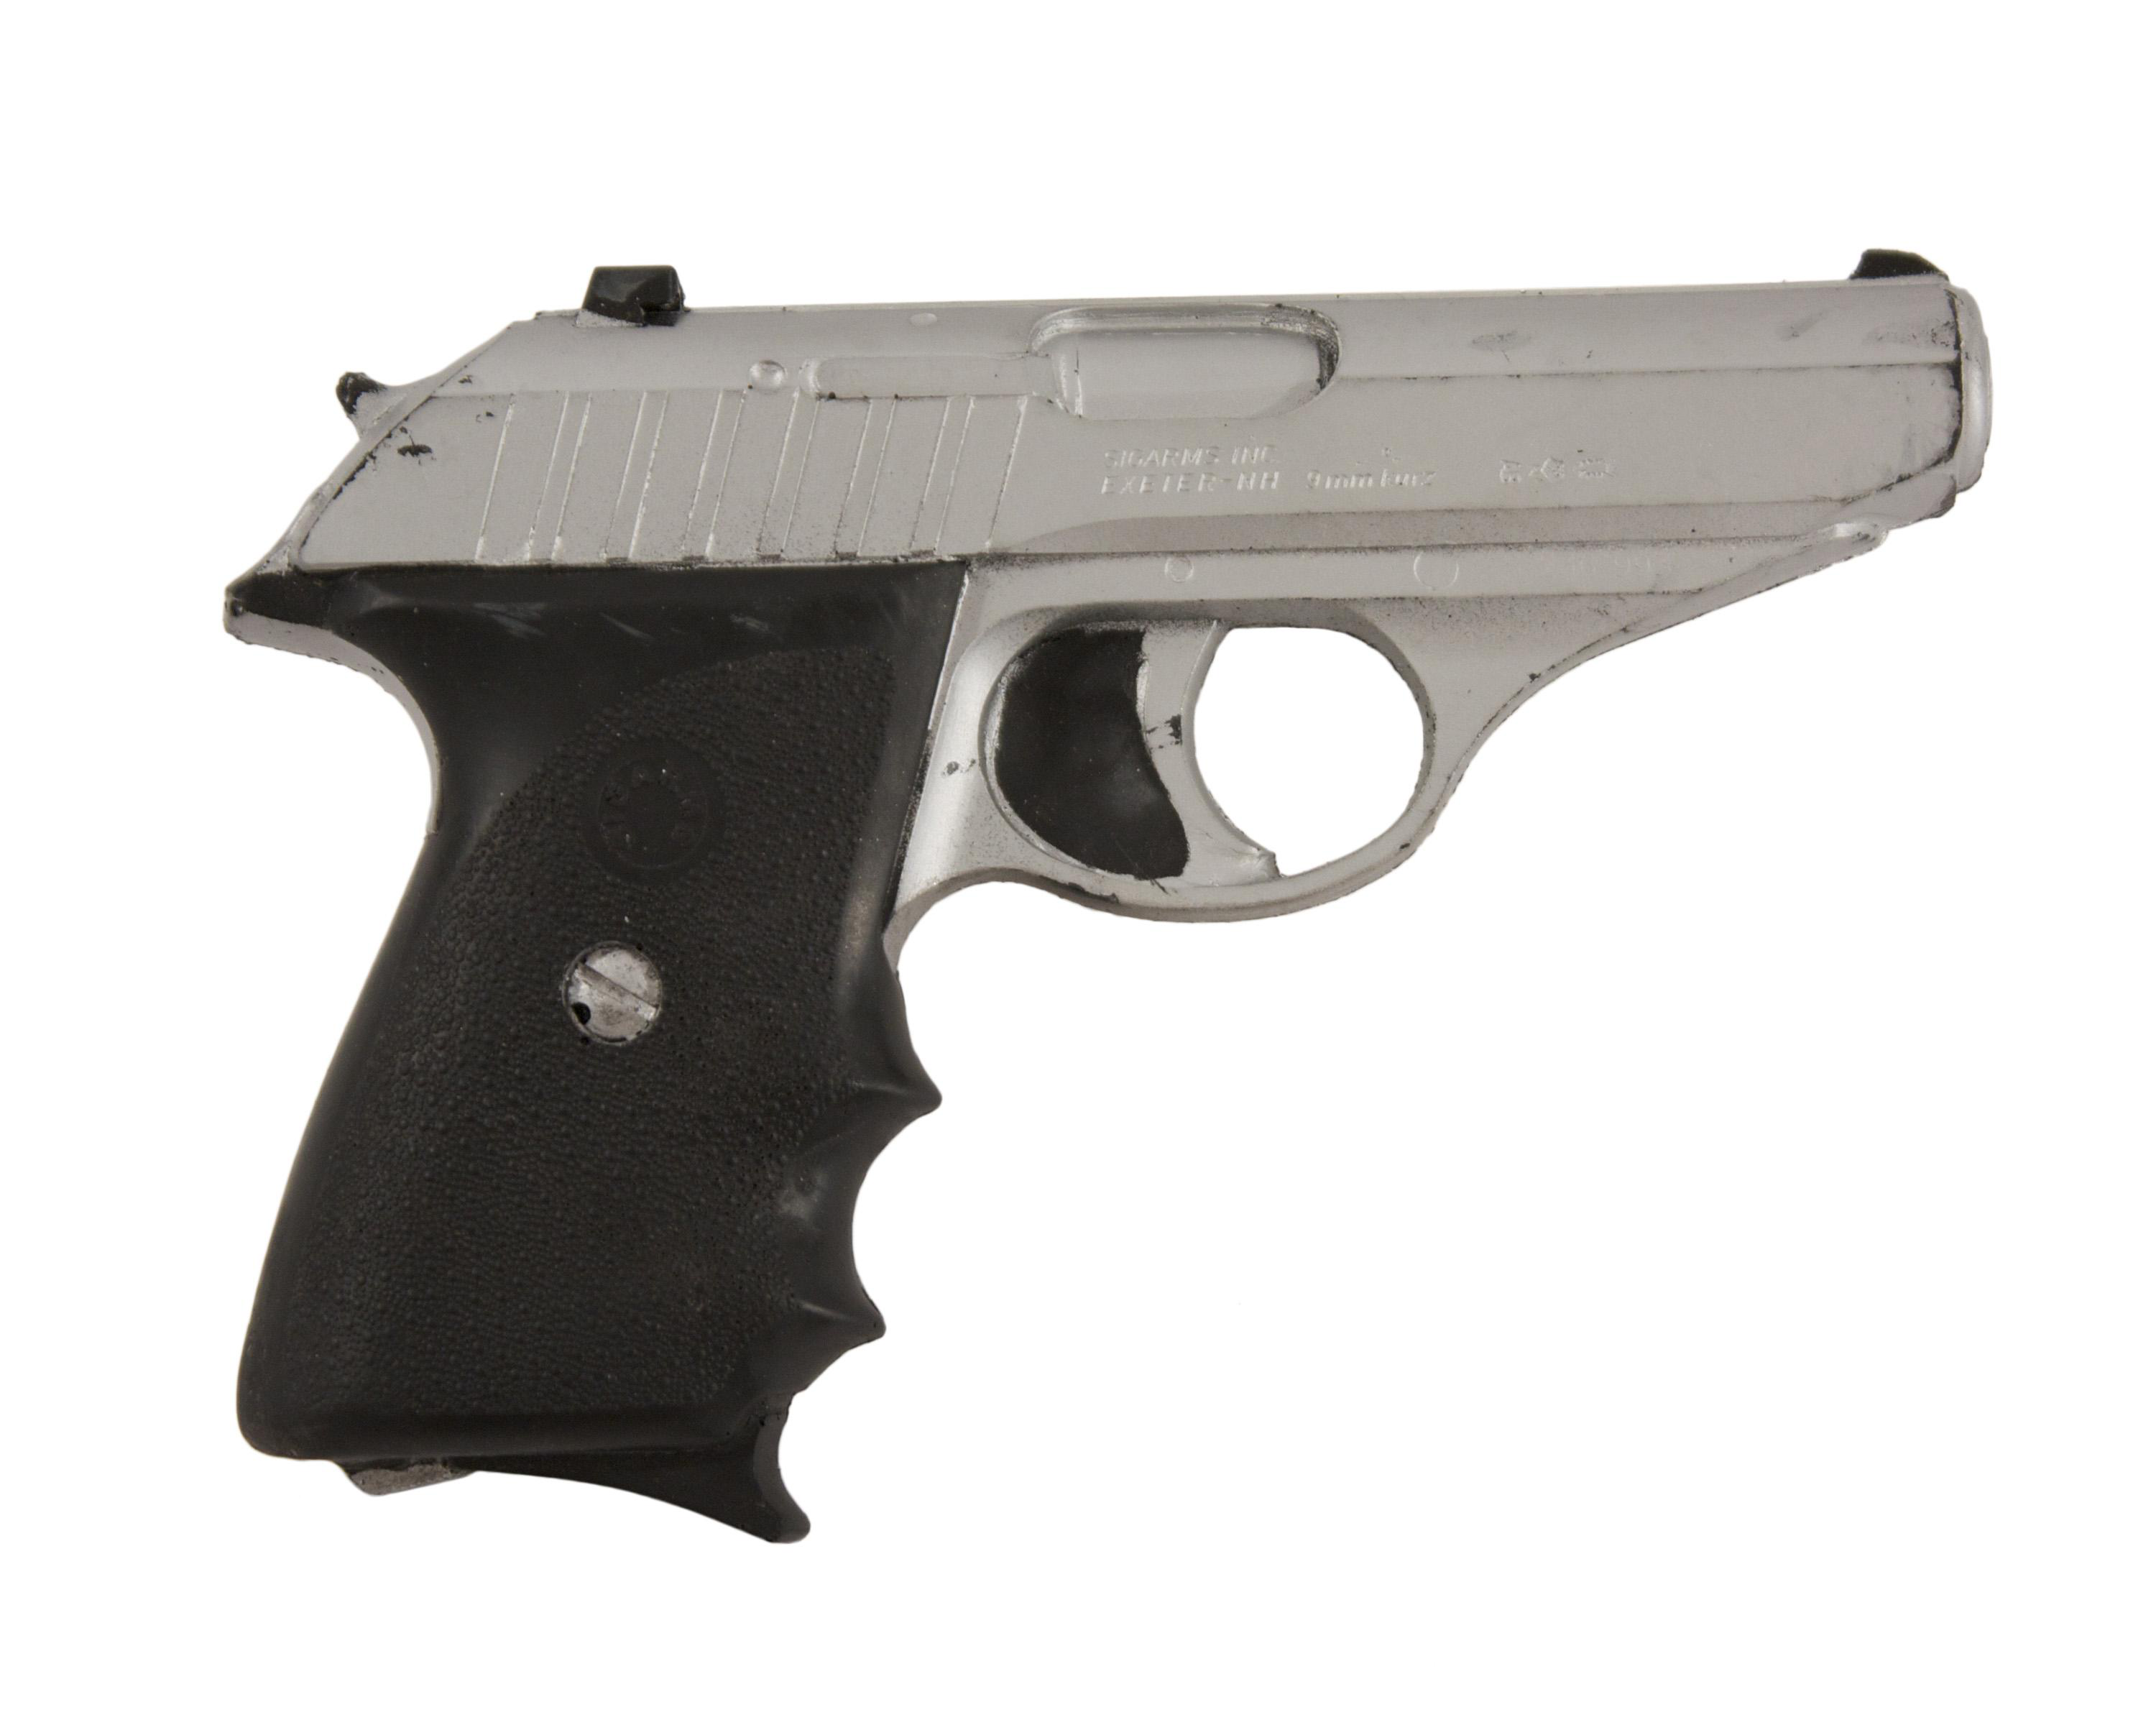

In [ ]:
readb64Recog(base64_string)

In [ ]:
predictImage(base64_string = base64_string , model = model)

{'confidence': 100.0, 'result': 'pistol'}

In [ ]:
#image 7
base64_string = '/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAMCAggICAgICAgICAgICAgICAgICAgICAgIBwYHBwcIBwcHCAcFBwgFCAcHBQoFBQcICQkJBwYLGAoIDQcICQgBAwQEAgICCQICCQgCAgIICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICP/AABEIAOwBXgMBEQACEQEDEQH/xAAdAAACAQUBAQAAAAAAAAAAAAAAAQIDBQYHCAQJ/8QAWBAAAgEDAgIGAwkNBAUJCQEAAQIDAAQREiEFMQYHEyJBUTJhcQgUI0JSU4GRkgkVFlRicoKTobHR0vAXM0OilLLB0+EkJVZjc4PCw+IZNERFVYSVo/EY/8QAFAEBAAAAAAAAAAAAAAAAAAAAAP/EABQRAQAAAAAAAAAAAAAAAAAAAAD/2gAMAwEAAhEDEQA/APqlQGKANAUBQOgVBivWd1gQ8KsLriFxkQ2kLTOQGbZcADSoLnUxA7o2G9Byhw37prYEfCRQn1R3DIfZi5jiB+1ig6B6gvdDWvSGCee2ikiFvKsLiRonBLxLKrI0LyIVYNp7xByOVBtUPQS1UBqoHmgM0BQOgQoDNAGgBQLNAxQFAZoHQFAqB0CoHQKgKB0ESaB4oCgVBKgixoIhqBhqBg0DoHQKgKAoDNAUEXag0R7qLp7YNwbi1mbq3Nw1rKnYlwXMgAKpp+UxAGmg+YElrahHLorMrBBEiqztmMPl1Pojfd2wMY8aDL+rDr1n4JBcGz9+QRSTQvMkRiwC5W2RlQl9RyFZookLd7ODuaDZ493R0pgkljiskuoEciO4maFmkVQNQOn3vjc+XhQe2H3fnS3tNR4TaGMhfg9lIIG5V/fJzqyMq37KDN+A/dEOLBV99dHxqPpGG5RVznbSHeR8Y+VQZbYfdBJGxr4M8fnqu0/ZpjO1Bcrz3eixp2h4dqUMmtUugZQjOquY1aBEd0UtKImdNWnGckCg3+3XXwoEhuIWqsCQymVQQQQCGB3BU93HnQVU65eFHlxC0/XL/GgmOt3hh5X9r+uT+NBf+EcbinQSQyJLGeTxsGUkc8FSR3aC4ZoFmgC9AtdAFqDyX3FY48dpIkeeWtgoOBk4LEZ0jeg869K7X8Zt/wBdH/NQS/Cm2/GIP10f81A/wltvxiH9bH/NQSHSKD56L9Yn81BL7+Q/PRfrF/jQTHF4vnY/tr/GgY4pH84n21/jQS9/p8tPtCgl79T5S/WP40DW5HmPrFBISDz/AHUElNAyaAzQYV1w9ZMXCOG3V/LgiCMlFP8AiSt3YYx65ZCqfTQfL+P3VvSIs0p4rcq0jNIY1MZiTWxIREdCqovohfV66DLujXu4+kcLozXUV0qnLRT28Q1gEZHaQrHKu3dz4Eg0H0W6oOsVOLcNteIRqUFzHqMZ5pIrskiZ8ezdGXV44zQZlQOgVAZoETQItQGqgwTrr6zYuEcNub6Uj4GNjGu3fkKkIoHiWbFB8TeMdPru4uknnndjPdxyTZY4PazhnByfRydOlvKgyzjXRhZ2afse2WNexZY89sVJWVZUZGDsYyxQxR74GcPyoPJ0V6LSPLrjlnghjinMcl2oi03Elu8cAtzMEuHFs8huGZsqNGN6C6v10QaDE1pKcaoyyNFh9J0CTdt2l0iZh4F38qCjwzrYRpI17C8JLoi5lhVfBMuoffnqK/k0G1xOuT30P6S4Pe54J8s938qgwXpd1qJazmA2ssoCq4kjkhCsHztpY6wVIKnV4jPjQWS+68FZHVLK4UsrAM0sBUOEYI7LnWUjcqx7PnjFBiEvTS7dmklmJkc65CCQpdjl9K52GrvafZQTXpbcfOt9dBVHTC45CVvroMf47dNJIZZLu7jbSB8DdPCO5yYIp0Ft/poN78M9x7xJo43TpdfKskccgUniGVEiK4BKzhSVDY1LQexPci8bX0OmV4P+84mP3XVBE+5Z6Rjl02u/Vm54r9H/AMTQI+5l6U+HTa4+m84qP/PNB57r3N3S3/ppKfUeJcVH1jtf9ag1v0z6nuM8KuIeI3XFYb/TrjLC7uJ5gZI3TVouS7cyO8tBSTrIvPnm9tAv7Qbv51qAHWFdfOmgf9oN186aA/tBuvnT9dADrDu/nT9o0Eh1kXnzhH6R/jQVP7Tr351vtH+NAf2p3vzzfab+NBJetq+H+M/2m/jQS/tfv/n2+2381BIdc/EPn3+238aCsnXXxD5+T7b/AM1BP+3TiPz8n6yT+agtfSzrKur63e1uXaWGTBKO8hGVIZWALbMpAYN5ig1MerzyllHqEzbft1UHot+gAGC0s+x8J5Pr5hh7aD6b/cy+tNRZXXCZJAkdm0UloJJCTpuWcyqrOSx1S5l0rsC5oO8VNA6AoAmgwvrY6fR8LsLm+kXUIEJCZxrdiFjTPhrchdXLGfVQcc9G+rrpR0oQ8SbifvK3keT3sglnjTCsyN2MVvgqkXeiE0rlmKk45Ggu1v1B9OOHa5LTiyXOFx2bXDSZGoMdEd1EEVsgL/eclx44oOcOu3rl45xaGThHFCYpLW5DOewELEBBpR41cqe8C3a53Hhig0PxTqdaVDG040tjOEI5HUMFXoLcvUCRst5KP0pBjHIenQea79zwX9O6kfy1NKefM4LHFBlEHVcgFuglcEBTO2dtAUqBGCDpZgM6mz6NBCXqtjcTksxQlRaoW+Np5yto3DNl/g/CggnU3FqgXUTgZujqIJJUlewBTSo1AZ7TwNAoeqhVWYq2l3IFqNZwEKax74Yxli2cv8HgYxQetOrEa4vhG7NU/wCUnUNRdkDYhGjuqp72tvA0FE9Wbdm/wnwzv8CNZ0LHp1ZlOjUzqo9GPAyaD0P1bRiTPaSdhGhEvfHaGVVBxF8HpCLk+lvvQWuTqxvdyrw+JC621ctgSyBAcY+nNBrjilnJEXRwVkGQwbPM58T3sfGzy2oPpX1Qe6A4fJYWSiSRnjs7aN8xSbPHbojjVgqd1PeoM0k68eHKcM7g+uKT+Q0C/tz4XuO139cUn8lBIddHCz/jL9KOP2FaDzT9dfCRzuIx6ypH71oNG+6V6xbC/wCHyWtnNDLcSPEI1GfSEyk5Onu7A7+qg5gj6ub8fFi/Wj+Wgk3V5f8AyIyPPtR/Cgh+AN/82n61f4UAOr7iPhCp9fap/Cgj+AnEPmF/XIP9lAHoLxH5hf1qf8KCf4DcQ2+AXyHwsfPngZcZoEeg3Efxf/8AZH/PQRboRxD8XP24/wCegpnoNxD8Wb7cf89B6Y+gtyIneRWSUMFhhGlu0LZ5tr0oFA1UHrTq+kMqRmQhRGXnk0riFgpZUA15dmwd9sUHi/A+XsjJ3+0aTRDFpX4RNKt2jNr0oGXvaW5UHsfoKRK6dseyjjLSTGMYDhNfZomvUTgjdvOg8v4Fy9nGckSySMoh0juxqy5lZ9enuqw7ir44oPQ/Qplecdr8FApPbGP+9kBwY0TXtpYhNXnQWAcNu+XvaX17Dx+k0G9PcdSTR8SnSZJIle21rk6dTRTIfD5Or0fXQfYDgt+JYYpRykjSQex0Vh+w0HtoA0AaDXfXv1fnifC7u0UAyPGWhzyE0ffj3BGNTKF73nQc7e5f90fDYxLwXiga0ltpGijaVTHo1OW7KdWAaN1LFlZgA6kNuDQdeXvFo0iaZmHZohkL57uhV1E55EaRq50HyI6RdKn4hc3fEXwWvbmWcas7RGQxW6jyEcSJhfWaCiIfMcvDBPLnuBtQLsxQEyd32jA9pOKC1t6Lt4k6V/1FA+ot9NBVig7wXyGfrwqn6izfRQRfdCfGRsD9NgoP6Krr9gNBMxDUfJV/1z+zSi6v0qCn2eVA+cbfzAY6j9lFC/TQTk9Jm8FUfWx1vj81VVf0qCkIdkU83YM/2u1f6O8sX0UF0xvn/wDm9BjPTvoEl4h5LKBhJADuMehJ8pG5eqg6Q6h+vfofaWNpacZL8Mv44VinaVZjbSyRKEaWOWNHXEoAl72MFsUG5E66Or5hkccsf9Ibb6CmoUBN1sdX4I/59sP9JB/aFoPM/WZ1ft/894fv/wBev+1KDx3nT7q/Kknj1hgbZEyn9gQn9lBz/wBa/HejlyYxwKeS7KzZmn7IxwKiK2AjtHGzmViq6lGAPGgxA4xyoEDQNFoKkeaBsgP/AAoIvIijLEKuwyfWR+3+FBic3Fo3kZpcyRgOEVcINJyGK7hpCwYMHbBBAFBeOAXKBnTtCVGkRpI6lg3eL6FUnCYKJqyclTQXwDzoBUH9eregtFwNUyDnoRpNuWWOhAfo14oLTONUTEc7mTA9juI1b9FFZ9NBWYAyknZYowTjlmRjt6tMcZ+1QeAQloo1PpXMmtvDCyOZ3B/NiURerOKD0mYB5ZTyiQKB6yDNJj6OzSgpxWndt4m5u4kk9enVM+fU0jKh/wCFBf0t96DOuobqv++fGFt9WgLY3EpIcrnE0CDdTqI7x+qg+m3QiDRZWi/JtbdfE+jAg5+l4eNBfKANAUEGSg1j1xe574fxlP8AlEei4VSsd1FhZkB8CcaZEz/hSgj2UHEvXFZ9Iej0UvC2vGltL2KSOOZclGhVT2oRXJe3mVO60SkjDZDHwDT9tZhI0QAYCquPLSMY/dQUzanXq8Mttjw088k+Y/bQTifPnt548fYTQUb+XAztkDb85u6n7aCh2O8cfl3j9HcT7RJf6KCIc4kYH0u4h/yIfr1t7MUFUQd5V8EXP0sNC/5NX10FLYqf+sbb2MNA+yi/toJ/HzyCjP292+ygoKWnuAHnI2/sY63/AMiig9NumXJ8EUL+k/fcerSCq0Ht7DP9bUHnn4oiNoYOSF1nSuQqYbDMcjGrS3d35UFo4170uEMU0DyLjWY3h1YTCnXgnuhtQwy789tqDDx1UcEbXi3QaMFv7wd12IBHe3XbfyyPPYGnU9wjbFk5LchofONIbUAXClWDLjfOTyGKCP8AZJwbLgWTMYx38RyHSRk4Pf8AIH6qD1TdU/B4ije885TtcqjMqRqRqZwz90LkZ2POg2B2MVvGoAWNAVVQi4XL8iqrzXHeLMOW9BG44ogznUAuoZ0HBKemEbPe049WaBtfICVyScA4VS2dYJXGOeoKW9QIoEOMRgE97GcaghK506sZ88ft8aD0W96r50tkKdJO+CdIbCnx0gjPkdqCuXoLP0mTVGF55dfDwGTsfPl+2g8EFmFUHZQV0M7DVr1LjTCh74bVhQ3o7eO+A8z2JSWNgpyGGpGxqC68As3okyE6wsewwefOgzYkefif2UDJ548v25oMcaQiOeQc3cxx+vR8En2pGdvooK3vMdrFGD3IYyc+sL2Ee30yH6KDwTR5ifB3uJSB+azCJR+jGjP+l9NBVcAy7ejHHj1Aytj6NMUZ+ug8CRlokB53EmT7HbtG9oWJAtBdbSLVPITyjRI/0nxI4HkdOj6zQXeNfH+vOgynqh61peFcXtmht1ne+jPDwGcp2fvi4hAkBVSzdmQMq2Bg5ztQfVHh1r2caIOSIqD2KoUfuoPTQOgVA6CDUHM/u9ZoxwRVIXtXvbdYCca1LFlkZPjDVGXiZl2w4HiKDhp1O9ABKBRwgbAY+rw9lBZ7y5Bbn8Yt5jud1PtOQ30GgopdDLsD6l+g6UGPzizUHoWP+7XY6QSfLbuoT+dlu76qAYEhyObHSv0t2an/AF39u/qoJ9j3lHgi5PqL4VB9lWb6KCmYiw2G8rbY27jnGR+bEuv9Kgq6MsW+KgI+lxqP2UXT9NB6+HcPbQCRuxLt7XJP1KAF+ig9BtW8jQW3inAGkONRUYOAEXWMqfRk9NA2Tkb5z4UDm6IIwUaNOlCo0qB3m0HWM+KlB6ue1BTm6FBg2ovlnDEgAHBB1Ifi6ZPBcbYFBXt+io19pJiRvDKAL3SoU4ycyYG7sd/IUFA9D2DyOHXMhy2qIORkMCEbWFTZj4HwoJTdF5WXSZsfBNASIV/u3ABC5fSGwBvg+yg9970eMgUEuAoIAG25XRkkg+A06V8zQef8Gz6ySCCdJ+MQfoK406vImglH0cKnK5B5jUCRyIwfjYUEAb8lHryDh6MYIbckEndRuCoGPUVYag3Pc70Fez4QUVV8F9XMkkk+3f8AZQV1sT/RFBb+McAZ8YycZA3KgMfRbIBUld+63gaDwSW8kexjLELpGpWf1EJp9FPyW39dBQfgszkEg+Xeb0dI7pUKCwEYJwjb58TQZEkB5YPhufE4GTz+mghdPoVmIOQrEe0DbAHrxQW+OxKmCIjeMCR/ag1En86Z9PtWgosSEnkHNj2ac+9o7iAD8qRz9dBMWWJYovCFNZ2J3wIUzt8Yl2Dfkmg8FzGWikYZBuZOzjxz0uwt0I9WhWm+k0HuNuDPjklvDz8mmyAPbHHG30NQV+j1qeyDkbys8x2Px2yg/RQKtBdxbHy/fQbS9yOLf8JbaG4gSQyWN08DSD+6kglhfUgPdyy6l1cxgGg+kgoNe9fHWW3COGT8QWMSCDDODnux763wu57MDVjyzQY51Fe6g4Zx0zw20wF5aMEnt3BR2UqHS4t1bHbW86kss0ecEEEDxDciGgeaCEjYBP8AW1B8ruvLrdk41xSe4DSC2ikENlGcjEVszBpinohrmXv8slVHgKDB77pDEjCNpo1kYZCF11454Axpy3pBWIJ8qDA+kPW5BASGuMEZGkAE58sAas0GC3HXVeXB02cVw5+Vsq77ZOpR/loC06HccuN5LoWy5HdXLsMEkZIHNc0EeK9X/HbVe1iu2uUBDFSjKQVyQcldhufroMw6punrXiyLOHSeFgHGogZUHSdufM/XQbFt1XbdsL6PebwBA5+omgn70U5GXGrnh2HxdPl5fvoB+FHJPaS5ww2cjAKaMDu7d3u92g8a2DEAdpNpyT6RHNN8nTvyoPYLyYAfDS/WMYzjbuc96CP3ymBGqWQbZPeG2w2zjSTufqoLhwy4c577kZ56wfEgA7eQU/pUFHpLdyJGCsjr3lGzAbMdwcg0FPTLja4l5AnLgY7urPo6cY72pjgUFr4Z0qW4dooOIrLIu5SOZSwxsSuwVwvj2WrHr50FyaC4/GJftf8ApoItb3H4xN9DkD/VoGtncfjE32v/AE0Elsrj8Ym+1/6aCqthcfjEv2v+FAxYz/Py/a/4UD+9s3z0v2j4+wUAOHzfPzfrG/hQH3tl8Z5z/wB4/wDCgf3pl+fmx/2jftoF95pPn5v1j0AeGyfPz/rXoKM/AGbGqWZtPLMsm2CG5ZwdwPS8qCm3R30j2k2X2Y9rJkgtqxnVqHe73doAdGBle/L3PR+Fk2w2sHGdJOrvd6gj+DQGcPLk8z2sm+M4BJbVjvHu8t6CK9HwNOGfugBfhH2wpUYGdtIJXV66CI6PgArl8Nz+EbJwunck6j3e7QV04a3y5By21tyAAAxnyAoJ/erPNpP1jj9zUG2/cl8BP4SWDqSdEF2XLMzEIY1GBqJwGJGfPFB9LVFBi3Wf0RF/w+7syARcQSR7+bIQv0ZwD6iaD403nApOHXwtLiW54df2bstjxK2OieNFclYXDEC5hzzt5XVhnZsHBDq3q993N0jsVWLiXDrfjcKgBbzh8y2t24AGGls7kqjOw7x7MxjJ8eZDcHCPuglq6u03COJ2aogOq697IruzKiRRaJ5JZHkZttKeHOg0n1/fdAbi4cWfCu0i7vwyQIZbrJ5B5gRDAqjmiZY/LXlQcy2330lPdjitdRyXnJllOSTkQxdxT/2km2eVBrDrr6HSwe93luZ7hJ5W7VgoQRvqRlKKgLEyBjjtDtpxQZjbdRfD7NBPPKZiwBQMFEjlsFFVHKM7se6VyfZQbI4fwWCJQEi07DY4GNs4KoNP6O9BpLrB69LsTywWSwxxwkoZmUku6Z1aEB06dQ7IM2ScZoNX8W6V8UmI13z7+CEoAfkhUAWgtVvZXSszC5cOd2ZXYE45FsY+1QXOy6TcTiPcuZdvBiHG+d8Pn94oMu4B7oW9gOLmFJl8WX4N/LPjETtQbj6I9bdtfALC+iTG8bnS/rKr6L6h8ZaDLpHOQNe3kW8+WdqBozeLeWN+WFwPD42GX20Ff3wctuOe3PbvbAgDbV6OqgI1k2IYadjk53xzAA5eC/QKCPSwHsSfJlPj4EeftoPP0s4JJPZzwRnTJLAURtxuy8mI+LIO57G9VBrbo/0VYzWAj4dcWcttIkl3NJIhhYIpVo7UKS5ScnTpb4pPjQbjQef9b0FRIx9H9cjQWvifTiwgOJrq3Rvk69ZHtVMtmgt/9r/CfxxP1c38lA/7YeE/jqfq5v5KCa9b/CfxxP1c3+7oD+2HhP44v6ub+SgX9sfCvxxf1U5/8FAj1x8L/Gx+pn/koF/bBwv8b+jsZ/5KBN1wcL/Gvqhm/wB3QQPW9wv8aP6mY/8AlUEH63eGfjJ/UXH+7oKf9sHDPxlv1E5/8ugY64OGfjD/AOjz/wC7oGOuLhn4xJ/o9x/sSgpjrg4b8/J/o9x/JQSPW7w756T/AEW4/koJDrb4d87L9FrcfyUDXra4ef8AEl/0Wf8AkoOh/cKcSivePGW3LlLWwnMuuKWLeaWFIwpkAU75bu+VB9FlNAmFBoP3R/uTbLjqmQqkdyBjWRgPj0dRXvAr8v10HA3T73NnSDgTERh5rYHaOTMsJA8I5VOqIY+LrHsoMM4L0l993VvbTwPbSr20jJJgxsyRDs9D7MfSd8SDmBuSKC3dDJfvfNcWl5BPHJJJriuY4JJY7lSzFNMkCOxbDDuyeIxtQZtcXc2Pg7OXHg9yyWsfP0tD67p/1P1UHn7CZ95bkpjbRZqIzg74FzMslwPz4kjNBbb2ziijkaKCNXOC8rL21w6qyu+u4n7S6YsqN3VcZ35UFm6edMJIYGmDh+01osfZt8HqUi3kjm06JVnXDfBucHOwwcBzNCm+SN9yTn0u9qLYPjg/toJ6j5AZwdl56Qcc8qRvvQSikG4BAycZDaTuARgn0hghgGHjQegZViC2+cHcHw5kHx/J9dBBlOBsOZO49XMj8oDl6qDyy8PQkPjQynZ4yQwbOzKwxpGSPUaDp/qrEs1jBJcktIRgOfSZEZgjMPy1PxvKg2DD0WyMsCA2NKjdiBuCF8BknvNgbZoPU/RgopbszjmTrC7AE5Y6SoGAe9mgwdesWN5fe9hbS3rpkSPGwEMeCfTm06W07ZZdv20EeM3l/OnveNeHRyyMqqvvtZpSxYaVWKNw7sx7ulQSfKgqr0V6V8vgcDYY4e3htz070FC76M9KYxqZbbSPB7Iqu2/pABh7VI9ooLWnWVe25/5x4cez8Z7PUcAc2aJ85H/Zvmgp3PuheDsCpe8wwIyLQhseBGWOdP5WaDDH6wrbVmz4nxKMDfH3rhbHtdU1faoPS/Te9O54pxb2/edv39nQUfwxuvHinFf/AMQf5KCB6Z3H/wBV4r9HCiP/AA0FP8Lrg8uKcXJOwH3r5k8hy86Dsz/2cXSIx9ovSfOY9YU2oBOV1AH4oODp1b4NByR76uvfItPvxxTtDOLbfhjaQ5m7LOorp0Kx1Z8RvQdZca+5zdIYYZJR0nMhiQuEFtpLaV1MF3KhmA223O1Byl0Xiu7u7t7OPjHFlkuJ0t1d+GOsatJJo1OxwqrGebN4UHUfTf7nrx+ytJ7s9JpZltonmeOO2IcxxIXfQAcs2lSQnM4x40HNfVtwO84pf2nD4eMcYje8mWFJJeHMkSas952PdVY8bnPiKDoXrR9wTx3hllPfN0luLiO3RpJY4rcmQxqO92aBiztjuhEGSTQaG6n+g9/xniVtwyDjHGYHue00zXHD2jgj7K3eVi7HGnUEKKvynSg3Z1y+4e43waykv5Okd3cww96Vbe3YyjJVVKRKxdyxJ7q4xQak6jerHiHHuIpw6DjPGbdmikl7a6sZIolEShiGYsO9KG0hc53oNndevuNOM8BtDfSdIL67gUqjC2gZ5QzuEUCNWLkMWGW8KDAfc/dTXEukN69nDxjjNqY4Wnaa7s5I4u66ppBZhl5C2oeygzPr59yZxro/CtzLxzid7A0iRZs4JJZNbhzhokYsAoQsXbbwzmg3D9zPsb5rvic878TkgFtDCH4jA0A7Uzs4ECv337quzMuwOB5UH0HWglQRYUHnu7NXUq6qynYqwBBHiCDQaH61/cb8N4iNcSi0nByrIAVyM4Og+jzPo+fKg4t62+p7jPApcPoksySO1JkeI49ElMHQOeWSSMjnpoMVsOMxzuYynZXAGsxEhldBsZIHwO0TfdsBl8sZNBWkswD4j2bj25/8PhQUfvbn0cH/AI8+ePD27ZoOdevCcJOLVGZY0UyPET8Ekz+iEUjUg0nVo3Xvchig13FnGcgAjxGSQxBIycNlhyoBANvALnC7nJ8BpOPtZ+ig2VwngloILZW4fdXst+mEuIWYpFOJBG8bqmdDxlR3pcjDAY0jNBifS/g/vW5ltg2rsu6ThfUSuscmjJ0n10FleUDHpYxn1jSSCdvSLZPd5bCgrcPsTI8cajJkdIwd+bNpBI8vyfDFB2Fw2JbaFVA7sKKij1KoUb+3vUGZ9EbpWAZjlmxknwydgPILQZj0H6mn6UTPD2r2/CLZ8Xk0JxJeSgg+9onB7kcZzqK+kR4Y3Dsvop1B8Js7MWdtw+0W1A/uniV9eBnVIWHfZs/4nnQR4L1N8JS4R4eFcOhe3YSCWKzt0dJB6Gh0jDKVOW1Ljw50Gz1WghJDkYIBB8CM/sNBqzrN9zrYcQRiI1trkAlJ4VC4bwEkY7kqZ5qcHnvmg4P6d9Ebnh11LaXMaCWPcMETTKjZ7OVDoHckAOFbdSHXmMUG+/ce9U6XbS8RuFVkt5BFbRlRoMoUNJM6gDWY9QRFbYHJxyoOyUi25CgfvdfIfUKBG2X5I+oUCa2XyH1D6jtyoJaKCmLUeQ+oeec8vPvUE+z/AK+v1UAsIHID6KCTrQUlg/r6KCQi/r+vlUAyGgDF/X0+ygaw0D0UAUoAp/X9cqBCP+uX7hvQVVoCgKAxQI0Fm6VdFYLyCS3uEDxyKQQd8ZBAZT4Mucg+dB8ruvTqhksL2WxViksTPPw6cZyrKdfZ5POOdTvE22z+VBZeifSP35bpPjS+WjmTl2c8Z0yoR4DOHC+TigOO3whiklbkis5/RHIfnej9NByPxLiDTyyzOWdpGySfDLbKpI27uF9goPNNA2PEYPqOBnAII8McqBKR+/GBj2DfOTzytBduEdJ7m3DJb3FxCsmTIkEskIc4xghCEyqkrrUBjnnQWuMHx1EE572ScHJyWYlgWbvd7JJBPjQRBOTs22DzzjbJwPDnqOnltQZ71H8EE18snNLdTJnl3yulDjx7xL/R66DfXTCcrbs2/dZCfZkg5+sUGDXXWDKI+yhcrLM6wIw5qZDh2U/KjTUwbzxQfXLqQ6vY+F8LsrONQuiFGf1yOquxYnxydOpqC8cV4HxDJFtdRRwuckywNLLCGPfELK6RMOZXtdlOOY2oL/0NswIAQSdRbdjliEJRS7fGZlUMT5k0F/FA6CDig5s92p0ISSyhvgB2ttKsROOcVw2jSQOYjkKOFblv5mgvXuKrbHBi2c9peXLb+QZUA/y0G/DQFAGgKAJoAGgVAA0DoCgWaBmgKAoFQOgKAoAUBQFAUBQIig4Y+6K2CxScPuV9MMufM4l0H/I7LQch9FGMPE+J242SZLe/QeTNqglPtbQrH2Cgxf3Q3SfRClspwZzlt/8ACQamBxy1MNNBoRZjnlqxnkSAAFGCT4FeVB6LadTjOcDnyIwp2BzQTlTkRsuRhV5Dn3sju97UcqtBQeLHlhm3QE4OSMjn8X5XjmgGAOCBg55EjG2Rg0FGWXGW3BB5atseWd/I/soOlOoboqLe1MkjoJLoq+k7dzB7MFmVVBkBzpUnG3soM/vLWGZXhLxtqBRlV1JyR5A6tS+GnPLwoOdeMWUlhxCCKbdYpTKjAHEiKxCkZ8eaFfA0H3W4NxNbi3imiI0zwRyRnmuHjV0OBzC53XyBoLN+GF+7pbjh8kb6gJrmR4PeqoD3nhKyvcyvIvowtAMFhkgDcMo6HPm2i9QK/Srspz68gg7cwaC90BQKg0V7s3jaxcDlQkB557aGMeJYzqxIH5KoTQe73IXDzHwK1Y/4zzzAfkyXDlftKFb6aDdAoCgKAoCgKAoHQKgKB0CoCgRNA6B0CoCgKAoCgKAoExoPnT90O6crcX9rYRnUUkiQgeB19o/2QP2UHOfD8Nxq9YcoLG1t2Ph2js85GfzGTu+ug0D1l9LPfV5M4ZezXMUWcbojYJA8e0bU3sxQYizHkCdgdgMbE75zzoK4Y+vBxtgasZ9LHjqGW7u+1BVhJXGdJyTuQd8+GkctNBKfZvPAGOfmN1PpD1UBIMMANh453GSw5k8zQVeGW+qeFCusGWIFCcZHaLrGfDtBjGrYkY8aDt3MMowjLuNozhWUAbqYm5afROnlig1t1gdIJoJTBaWkMqwxJNdGWO4IEcpOkxvbAJFp0le2k+MfVmgwrrxuVaHh8zEF1llh1Bg4dFBcEOvccrgKW8Wz50H0U9wJ14C64fbcKu2C3UNv2toWIHvixLnSEye/JaA6HXdgjRPyzQb/AOH9ZsMIuFv5I4Jo7mdI4mI7R4VmYWrQooLzGeMI47MMdTaeYoL70O4jgtCymMsPfCI3MJKAzKRnnCx0H10GWCgdBQu7hUUsxCqoJZiQAABkkk8go8aDgLr96yJOk3Frfh3DPhLa2l7OKXfRNdOCkk2R3eysULOTzyPXQd2dEOj0dpawWsX93bxRwpnGdMaKgLY21NjUfWTQXigKAoCgKAoCgDQFA6BUCoCgeKAzQOgjmgdAYoCgRoHQItQYH1p9a1rwu1lmlljDhW7KPUNTyYOkac6tOrGW8BQfJ266Rm8vrzity+qOES6GbO7d5ppN/HSCg9bGgwpuNPacKnvJTi64lK0++xBnASFR5dhEgb1UGhopRnw28eZ3XljxHPveVBUhXbwJzvz3wNQB8gpAWgrKuDzO2+vUDpyM4C+3vUACSdzzyB3Tn5Wcezu+2gAdznBG3gdjjk2eVBF0J0tkENnSN/DGMgd4NnOGbYUGZdUPBRNxGLx7IGaTHIaMBQzeie8V7q+RNB001vqYNjvA5BwNSnOxXHeG/d7u/ntQY11gdMrBNIvpLYyqMBViM93vzVUiLqur0tM4C+OM70GpeIdErji91bIIjZ2ESDskbSDFbk6TI6juiW5C9xOeN+QoOkbKBQY+xcwm3KG2kifTLbmNezR4nXvK6qSp07MpdcFXIoN8cG917xe2hUT8Lt+MyRbR3Ec8dnOw85I5o5IRJtu8DhTzwOQC28R93pxSSWF/wRuo3ikysp4jbsArZWQMqIHZWVj3I6C//wD+/uKf9HJR7bhR/toG/u9+LEYTo/hjyMlygG/I+luKDG+JSdK+lBEE2bazY9+3tMojKTyuLlz2RVcf3Sls45ZxQdSdQ/ueLbg0IwFe5K6WkA7sanGY4dXeCt6Rdu8x325UG3kFBUoFQFAjQOgVA80ARQKglQRoHigBQFAUBQGaBUDNAUBQI0GKdZfTJLCznumIHZqdOTzcqdI/bn6KD4+ccN/e3E7yXB97yzO6ZZnlKO5ODqOlNPohlP0UHk6b2Q0WfCohp99yZmA5pZwYect+VO2iLU3PJFBrjr96SCS5S1T+7tlBIHoa3UbEjvL2SAL3fE0GtGYAup2APxcZxnA9ZDDvaqCTY7oGDzY7+tMkt9qgqrFpDEHff1/F2G/Pagh2urfl4cj4c8H0jqoK7u2nw9HJ8ckNkn6qCirFxnBxufAYz4jy5Du+v10G/wD3OfRvTbzXbgKZToDHAAhhGosfIaics3PFBZulnWxdcRuRwrgytmZ+ya4X+8ky2luyI/uk835ke0UHffuWfubdhw+FLrio9+XkgDsjf3aE74ORqc7/ABqDrOz6ouGRghbC0GefwMbZwMDJZd9gPS5UHrj6suHDlYWg/wDt4R+5KD1DoNZ/itv+pj/loJ/gTZ/itv8AqY/5aAPQmz/Fbf8AUx/y0CXoVaA5FrAD59lH/LQXeGAKAAAAOQAwB7ANh9FBVIoDFAYoDNA6BUBQFAs0DoCgMUBQFAhQOgKAJoCgKAoCgKBE0HKHu8bm/NtbR29pe3Nq8hWc2NtLdSIWU96SKBXmVdIKLLo05c7ig4eu+sXhtnJ2d776spAupYry2mtpNBJUMsc6xuyalZQy5BKkbnagwzov0ijmk4hxls9gqe9rQuCD2EWWdwrbqZ5NHtz6qDn7iV+0skkz51SuXYb4Jds5A8NI7o9lB5kU5G2/iSM5wMkHNB64yGAyQAQccsHIJwR6QG310DMedJ2GRjfBGMadt+eef10FN/DJ8QMcyR4MCO7igkoUFgcKPDPh5kZ50FMxZZceJwARvkYOpQORY6aDMOkvT+6jiPDIZAtvGqxspjVZmYAGQF2MVwU1l+6wOTncjFB1h9ym6ohLxK6vLiDItolMbsrAK7sQqjUmjkC3p52FB9ZgtA8UDoDNAZoDNAUBigM0BmgAaAoEDQFA6BUDoFQAoDVQPNAGgQNACgeqgVA6BCgKCVAiKBGg8t9drGru5CqgLsx8FVSzE+pRmg+Fvuhemj8d45xLiDpr7Sf3vZKTrAiUiG2VFZQselBrZVOdTFtOTmgpdc1ytnYWvDIyOQeUjG4TJIwefayZPsWg0r2xyAcj1bZ9RB8T8bTQTS52Dc3AyeflzPkG3WgqrGSGwBg+iue83MkA740knvNjagrTwkYO257wBBAHIj2sO7qU0EBjGCTjywMHJ2IK59EfGY0FMEDA5jJBz4EZORkb/m0F16KwDtkcghIFe4ckYJjjQsitvqPaSaF8yCRhhkUFHhUJkfJzliSeRGSSzEZeHut6Q2H+wB9jPudvVqLLgCXDKFl4hI1wTgD4Jfg4MjfZgrPzPpUHVK0BQFAzQIUBQSoFQFAjQOgKAoCgM0BQFAUAaBZoHQFAZoCgKAxQKgdAZoCgRoCg5s93x1tnhfAJ1jbFxfn3nCB6WGUtMy7j+7QFc+bIMHNB8teq7gQa5Vm9C1QzPzA7aRSIgfIxp39PJT4Cg1l0+6UG6u5p9jHnTHnwRe4D+llvtUGOx7nkDsDnOCcg7KPA4oKiEhsnfbYYG2ckB8jv/m0Ajk4Gnf2nIHhoAGVGM+kfi0EpCSd9s7HHiCxwd+6NIoJwtscAgA4AG/MYHqIwDQQDEbEjbOMk5zg7EH7NBfYpilm5Gz3MixquSCYLciRyVLDWsj6U+EhkXKjABySGU9U3Qx7y7t7dFbVPNFCMqygmRlUZZFiiOnLZXGcDwwKD7z9EOjkdpa21rEMR20EMCAZI0wxqi7klicLnLEk55mgvNBKgVAGgM0BQFAUBQOgjQOgKAoA0BQKgeaAoCgKANAUBQFAGgKAzQAoA0CoIk0Hyd+6Kdbgv+OC0Vs23C4mQ790yNpe5OPRJYrHDpbc6OTAbBo/i1ybDg5LHTc32pznO3bZKDbvfAQBV9poNCpJuB5DQM4xkDGB9er2CgqzSEHPMbAc87DbceOc96gWeWO8c88HbO51avk+jqWgqNGwwSMF9xgnJAGjcYK6ck0E47YcsqdtxuSD8YZbGR+40DV8DA5AnfbY+W/Ic6Ci82RjO45cufgd+/wB0kN3s8qDJOkalGit/GCJVYbkdrLiWUlG0PnJVdXZnOjmQBQde/c0+rAXPGRdFB2djEZiwUriR8pCuNCjvFnbnnu8vMPrNGf8Ab++gligKAoCgKAoCgKAoCgKBGgKAoHQFAqBigM0CoA0BmgdAGgKAoHQRoGKAoEaDB+ujrCThXC76/cjFtbu6gn0pCNMKfpyMq/SaD4m8MtpOI3w7Qlnu52nuG3z2UbdpKWzy7RzoHnQW3r46VLNemBfQtAF2A3kfdxj0RpXEXtFBrNox6IyDluW4IA0gnPJsfsNBTflkDlgY3xnz3O/r00FQWx3G3PJKnYY5j5IH5NBERDnuTkDfONLDPP5NBUVsAgAjwbONIPhj4wH5xoJNEOeCx9RO4Pysevvd7Y+qguvROzDTxdpgIh7aTOBiKHvuCx+c06Bz3PI8qCnHctLKztgNIzSHVkEM7asEo0KZUEL3YwProPrp9zW6uxbcEe9K4kvpiVI8YIBoTmzt3nMrc8bjbnkOvwKB0BQBoHQFAUCoDFAUDoFQFAqB0BQFAUCzQOgMUBQKgdAtVAUDxQKgZoCgKBO1BwD91B62tMdnwaJu9KwuJwDuBkpAGII0jJd/SGy+PKg4z6u3Wzs7vibjAKmG3P8A1cB09wel8PMynPjooNEXV00heRiWaQlyR8p2LMcHvd449LyoKCjxHIjmfX8bzxtju88jzoHJty2Xmp32zjJAXLANn0WoFGNPqB23zttgEqCcFvSNAQZXI5jA38PDbxzuaCRmON992xyySctj5IHlqyKClETkEZGdjzzgcieXo+HnQZHwrVFaXD5w0xW3TcE99u1mJBbUwZQqHSGUasYBoPd1fcCaaeNEU5dwi47Ze9I4TGtURAMt8YgchnlQffDqt6ILYcOs7NQMW8EcZ5HvKo1kkE5OrPeyc0GVkUBQFAUBigKAoCgMUDoCgKBYoDNAhQFACgdAUBQOgjQOgVA6AoHQIigKAFAUHk4jerEjSOQqIrO7HkqopZyfUoBP0UHxA90B1jS8b41d3Sk6rq4962qfIjduyhGfNI8StpwuS532NBbPdAcQS3gtOGRHCxp2khHyY1CxrgZyZX1zafyaDSayZBySCOXgF0nbVgassfi0EtYGN9OwzjO2DjB1DUQwCt3eRoIoRk4Ox9Z8yd85/N+igIZCx598k+Bxk59Ikd7u/T7aCQyRgAHB5DO/LJ8NtvSoCNQfDJbfGOWG5jceHxW86BuwzknJwMAfGC+Pyf0W5+dBkHSZdCW1vgjRD20gON5bk6+8e4wMcYReTYGN8UHSX3Pjqz9/8etSQDDahruUjDACJT2atmIZ1yMne1g/VQfZCJcf1+ygqZoAGgM0BQFAqCVAUCoCgWaB0AKAoFmgM0DzQFAUAtAYoCgKB0CoHQRNA6BCgeaBMaDmT7oB1tDhvAZYkbE9+TbR49LQRqmYD0sacJqXxcDxoPmH1L8ED3Uly+Ozs0J1HGO3mU6iNguYk1d7bnnY0GqunHSI3d1PPnIeQ6NwMRoNCAfRltP5RoLJFnw21A5OAQCDyIPg3ymzmgScsEA438/ADI8qCCITkZx4acerOcb93HxtqCQI+WeQ3G67jHMZw3xe7yoJPFt+bsBse6fAkDUflc80ApwpHrzvsuwxhWHPT+yg9fR+0Es8UZOcuNgOSoQzkZwoCrz1UHqvbrtbiSUkAPIWGSYxpzpQAfAoNKBe6iDffxzQfUz7l51ednY3fEXHeuHW3ibUW+DhGpyrF3wHdhnSRnSPKg7mAoHQGaB0CzQOgKAoFmgKB0CoHQIUBQANAUBQFACgKAoCgVA6AoHQRoHQOgVBCT+vDlvQfIb7oh1zC/448CNm24ZGYFHg0qkvMQAe8ZHxEORIQeug15d9H5rLgBWNSbi4VJrjAJZEuSGkGB3vgIisJ8tz4UHOpHiMDkq4IOMnOkZ5nA9KgpqTgkgeOT5athgf5vooKljaAsgzjPjsVyWAGQefOg2Ba9WsMvEG4bElyk6prM7E9mVCB2ZkZB3Fzp1qcEfSKDAu12OwHMd0gKSxxkLjYMRqC8sGgpSMRjT5ZGkjYjusSPP8qglbDHdyMAHJO2MDUSPooL3wchI7mYnJEawRHGxkuG0vu7o3djRmyokxkd0jegqdFrJmkRRzJwNJYAkkKoI7JMnkfHlzoPvN1A9AfvZwiws8YeK3QyjJPwsg7SUEnmVZimfVQbEoAUAKB0CAoCgdAqAoCgMUARQFA6CNA9VAUBQFAUBQGKAxQGaAFAUCzQPNAUCzQSoPDxeFmikVG0OyMFY/FYqQrfonBoPhv0o6rr1OP+8OIpiQ3spuHyNMohzOArek5uVKyjxw4X4hoN19L+KPCuIoe3mlLLHCW0h8KWYFtLYCp8RQc5x4UHHvTi0VLl9MBttTsXt2YN2MqEdqEcAK6qXVlbY6XxjagsDADJ58/X6IznPhq/ZQVmk2C7Y2ztt54Hxg22zUGZX3W3xFont/fLJA6mMoEXV2SqAIWuADcaGO+NeTkjNBhYGNlyNOAQfRAwAFx6Q0ctTH6aCCw52GQc6d8YOfEH0iFOSaCWd98EYzkY5asHPnp5YbagvfEh2cFvFy1hrhsgpnWdMeDmNWGgHusZB3gcgmg3p7iXq0HEuO2MTKGjSb3zMCYWBjt8SANpTXpkYIvP43Og+2sVBUxQOgWKAoHQIUBigKAoCgKAoCgMUBQFA6BYoHQRoHQI0BmgdAUBQKgKAoHQFBTf8A2/0KD4n/AHRTjZ/CiSS3doXVoZCycu2hLBJCpypdR3dW2RtjagwbifT/AI1eRg9rZyD01Gl7aQNjBaOSNiqO2+WV1GWNBr/jtvfPg3NsYxHkLozMr621ySO6mTW7FVHeOTt5UFl7YZ2bx2zgNtyBB5FfyqCosIO45ctWnAwQQTkZZjk45UEpDzOCy53zgY25Kc8sAnvUFMyA8gFGMBccweWD6XPvGgqMmTnJzzyBscjSBuNtxQLhXD+0lijXnK+FOBspJBB1Y2XBOlsYG9BduNXSyXD9mNtWhApKd1MIgYMItJwoz32yTzNB9IPuWPQ9AL++Z1Lr2drEmsMVygllIGssDjQp1DxoPoSj/wBe3lQToHQKgM0BQFAZoCgKAxQFAZoHQIUBQKglQKgQoCgKB4oHQKgVAGgDQPFAUBQFBFloOL/dYfc37bj92eJ2d61jfsAJEkTtrOcrjDMoImt3xsXgJB56M5yHK/HPcQdJOHAhrEXUa/4tlIswKjx7N+zuBq+TozQYHd8Cnt5OzuLee2f5M8UkJPrBdUUjl3lzzoLzD0RilHwkMbg/LjDe06iC32SDQUZuoXh0m5ttB8TDJJHz9SMMfpUFmvvc32e4Sa8jB8NaSL7MSRnf84mgx6/6jAuQl0xHLvwrnA8AUdAD8XUooMVuuq54xjtVYAbDSwxjceJY6fbQWyxtGtH7XTHM+iRF1PJHpaRCqOpTvF4idQXkeVBkfU3b2NvcCW+tI+KBopIxYvcNbIjsyaLl7i3j7U9kqsvZMAMtnORQbW6B9afFPf0Vj0W4db2Wu4WXsLaWa/OrWgkklnuV2RlQKWbSAq0H2WsFbSuogtpGrHLVjvEerOcUHrJoEKAzQPNAqAzQOgKAxQFAUBQFAUBQFAUBigMUBigKB0CxQFAUBigKAxQFAUABQFBErQIJQYj1qdWUHF7C54fcFkiuY+zd0CGRRkHKl1dc5A9IeFByrdfc0YY//dOM3sJ8ii4+kI6KfqoLVfe4P45EPgONW0/ktzaAf5xl/wB9BhfGvcq9Loc4teG3g84JljJ9qzNb4oNadIOqjpNBkT9Hbogc2t9c6+0dgsy/toNSdMLe8jGJLC6gbl8NBMAPP4gJ/NoNX3/DmLapmJ32RVOo+pUOHT85wDQbu9zx7kfi3SFwIYW4fw0H4a8lQqX5d2IHE07sM+jhF9VB9Vuon3OnDej9sLexhAcgdtcvhridlAyXkPe05ziJSFHlQbTjjxQSzQGaAoDNAUBQAoGKBZoDFA6BUDzQFAUBQFAYoHQKgdAqAoCgDQOgKAoCgVAUBQFA6BUESKCRFAs0CoKc8IYEMAw5YIBH1Ggs0nQWxLajZWhbnqNvDq+vRmgvUEQUAKAABgADAAHIADYD1UExQSzQFAgaAzQFAs0DzQGaAzQBNAUDoETQOgVAxQOgKAoCgKAoCgKAoFQOgKAoCgKAoP/Z'

In [ ]:
checkDim(base64_string)

{'array': array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255,

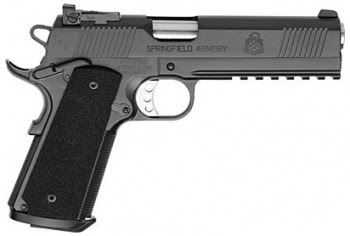

In [ ]:
readb64Recog(base64_string)

In [ ]:
predictImage(base64_string = base64_string , model = model)

{'confidence': 99.99, 'result': 'pistol'}

In [ ]:
#image 8
base64_string = '/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wAARCAEQAWgDASIAAhEBAxEB/8QAHQABAAEFAQEBAAAAAAAAAAAAAAcBBAUGCAMCCf/EAD8QAAEDAwIEBAQEBAQGAgMAAAEAAgMEBREGIQcSMUETIlFhCBRxgSMyQpEVUqGxYnLB0RYkM0OC8Bfhc5Lx/8QAGgEBAQEBAQEBAAAAAAAAAAAAAAECAwQFBv/EACMRAQEAAgICAwACAwAAAAAAAAABAhEDIQQxEkFRIjITQmH/2gAMAwEAAhEDEQA/AOqUREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBMImUBUTKo5waC5xAHqUFcotL1ZxM0vpmOT5+5MknYeXwIAXvJ9NtlHtZxd1Hf43P0hYBSW7ODcLo/wmt+2cn9lDSdh0VAuZ6DXtxr6uoMd4jkuMTQJJKZxMbv8AExrsf2W/6E4iyeI2h1JUeKXuxHVlob9nAdPsuc5ZvVem+NlMfnO4lodEXyx7XMDmEOadwQcgr6G66vMqiBEBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBEPRfKD6yiwV81XZbEHfxSvhhcATy5yf2CjSu4yV12op5+H+nJrvHC4sNTNI2OIH3y4FTc9NfCpnzstV1NxA0xptr/4td6WOVvWJrw5/wD+ucrljiRxC1zVQht2vNNQvkJDrZQPDnxj1LumPuoop6ee7VPK1s1ZUPOMTSAuJ+uVLlprHjt9OqL5x+Ne80+jrY+QZwauqbytbjtyHr+6jq96w1fqmuFJX6pgpYZSR4NGeTfs079PVYWgt18bYpaYW2aSqDCx0wLWMbt16gkrfbHX2au0tS2a8WKKGvpYeWQAbyjH5g5vm36r53J5eWN39PqTxuPDCWTda3b9S3ujpaG0WfT1nobtMGtqpBGHSz8xwH8nUcv5iVaTaPvmpTLU6rvD2/L8zKRtRN5pZA7ry/pZscH6LKCSXQ9qFQy3VclJIQ6OveWvdIScEPOS5ox06b9VnKG80lbTw1VJUUtdJP8A9iNr3Z9WuJHlTk8rP/Wdfrjh42OV3tpuurJNFLDfbeRQijp4oDU1Q5fmpBnmdGD1HTfuvGyXz/iChlp5nuinY3PiHysk/wAvqc9luuv6m3M0zMXVT2sczwxHgOa55/SA7dv1GAoNjppmPY808j3N3BdKAG+mzSu3Df8AJjvKM3kvDlqOh+GPEit07LHbL+JpqHPK2TlJMY9Qe4XQ9BWQV1LHU0krJYHjLXsOQVyJpM3eooGm90BjhcPwqkObyPHvk5ClTQmoK+wAQyRF9u9C4ED3GF2wz71XPm48cv5YpvCqrS31sFfSsnpXh8bhnIPT6q7C7vGIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgJhEQEREBERA7KNuOOoLtpXTNPerT5o6aoYaln8zCdx/dSTla5xAtX8b0Ve7cIxJJPSyMjB/m5Tj+qEcwcRr1bbrqKO8Wiq+Yjr4GyPiLdoTsC3PfdR5f33K30tS+21b4KGqcRUU7H4Zk9dvQrCWKvlttRPbp2tw15Z5v0uacH+y2xtTHMx0U7RyPZynbbC8OXy489z0/Q8OGHPwTH7iulZ9N3+uhp5dPv/iIjHmo5cMe4f4QPRSM3TlAx0LI7TQUbn4GGAOqvtF1z91Bl2opLXUcral8NC4c0b2ZBPtkK9s2qbpaYCYqh3yR3dHOc+If835h9iry8V5MLJXzpbw56vSdapsrKSZldURyUsbQ4ztiz4QJ5eXrvjrlaVqOC7Wa+w3vTDq2SO3RtE072lw5XDI+rSP22WHi4qXV0NExtJTx04JBp2jLqjIxvnsFsLKbWr4YZb5M63WSdwEr2ND3RsP5X4bnIaNvvuvF43iZcOW8vt35fK+eHxjY+Hl0t+pjUupI6WB0gLKtlbWgtYD28Ij8QdSDkbrXZqOo0lrN7dEXakns1aPBlkqfLTB3cF3TPMNvTosrZ9IWnT9ZNS3WipZyWeMblJKWQyxn9OQRknB5cdCd16VOpyYbpZrbbY7hanBrKesrGiJsjeXdr845gw7As3OBuV7sOL4/19X6fP3drR+kY5bsa3Vt0iqrrERFVWub/AJVoZ2LDvzt68vTK+G0+mqW5UdwstPTXuta4g0lNRCNjGgkYkAJ3H/2r2is8tVp2il1JdZK2ipQ5sU1QBDBA1o2Y5rgJX/UZWDqeI1r0/FJHp+Ft4nI2kMRZTxH/AAjAefvldfjfUbx/le24zUlxv0cstyZbrZYmuz8rCwOaz6ybY/ZYO68QrFpukdS2nluE7Rynldljf/LuFEt/1beNUVbX3e4SvZnHhx+VkY+jeo+qx0VE7xmxkhryQ0Ad8q44TbpuY+3XXw53K43yhuFzrHNjpnkCOFn5QppHRaTwesQ0/oG2U2AHvYJXYGPzbrdh0XaPFld20RERBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERARUXy94AQVJABJUW8U+LFLpOCWmtsXzdx5Tj+Rh7ZW16lrpWwPbG4jbcBczcR7cX1rpS/zDJPODnCbEHXmWaqudTWTRiOeeUyvA2AJOVu3D+x3PVNNMLWWVFfDIyMUxdvyuzlx9hha7eqDnL5GOwQM4HRysdPXit05fKe5WqpdDUQuBa5pxkehWOTGZR6/H58sP6t8ulqkl8e110ZZNE/kLHbmN/r/wC9lhLFpCe43qaK711NRU1KWiWeU4YAfy8o7k4W/UFBdNb1EVxoHTVVTUu8eoc3Ac4gbgnoDgbfZed1sT7vRT22NjqSF0oe9h3fI9ucc7httkry45a3H0PIk5pNe2LqtMaasET23+prm3KSqDqOZrP+wMHPJnG++FsNp1Jfo6WW30TvCt75+ekmuA/GZGc5wzfmacjbOBssUKSzaYhbNcahtHIWgNEbvHqnAejhlrc+4WBu3EOQukZpumFtYcZqHnmmf65PTf0AW528k4ddVu1VRN0+Iqm91MbqRr2ljbo7aNmcujZSnLebHbO2QVgr3xJoIp5DYKAVb2v8k9zbzMib6RwHLWdtwVGlXLV1tV4tQ6pqamU8xc/JJPqEfA+N7DM4NbnJB3LfqAusnTn8JPbIXa7XjUUstTcaypry3Lg15JYz2a3o0fRY+MyQNbJJMI2OOS1h8x/+lc1NwlqJTFQxhrh5WtjGTn1HoPqr+1aarKiUPr3OY95xyN3c77LUlrF5NdRZUk76yeOOChPIHBpNOzLsH+5Uh8GeGVw1PqWnqasubR0z/Fe4n0PRblw64QV1yDHy0xoaDOS+UYe77dV0jpfT1Fpy2R0dvj5WNHmcfzPPqVqTThcrWVhjbFEyNgw1gAAXoqKoVZEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBD0ROyDzc482AvN5wDk/ZfUpIB2Xg08xwD2+6DA3yJshcMHJ6AdVGep9N/ONkEjCwZy1z/U9P8A+KantGxONxhave6Br2ud4Zf3OeqqxyZqmxNt87mRnIbkuJG4Kju7ULonGRjGtad9t9105rezskppXcnOR3b1A9vZQbfqBgL4HiUtcM+ZQ9Mjwa4mT6Jr+SaF09E/yuY39Q7D9+6+uIWtq64XaoFBC21wTZlfGw5Pm3OfRR1Mx1FUt9GuG+MLLXWWWuugMeHkxsDe2AB3XLPGR6eHPV2xkkjnSuc+QvcTkueckr7pw5z/ACRhzg7mwew7khVipQ+QsjaZJgcFjR3+qz8VhqI2smuMnyTJRjw2jzEfX0SN5cv0xk11lrJo2UbDyRjlY1ow8juc9gr226ZqZx4txe+KNx2YPzvHupZ4f8MKq8wQTWDyUEzQRWyxloePXB6t9lP2juGVl08I55o/nrgBkzzbgH/COwXSSR5blXOmndAzxUEldPD/AAe1xR80tdUtwXN/w+/spEtV64e6H05BfHCW5TO8rXvYC8nPZpOB6qw+KevrHQClhnLaOENcYWjHM7v9Vo93sp1TpymntxEdNHC3m/DOI5AEtu5InWnVujtT23VllgudomD4JB+U/mb7ELOt6Li3hJqu46H1RBb5onCKd/LJ/K7fqPVdnwPD4WPHRzQ790nZZp6Ig7oqyIqOGWkIgqiIgIiICIiAiIgIiICIiAiIgIiICIiAeioqPe1kbnvcGtaMkk7AKE+I3xA2LTcr6OyxC7Voy0ua/liaf824P0QTcqLhufjjrmaukqRdBD4juYRCEmMD0Aytr038S+ooX+HdrdRXE9B4LhCT9equk266RQ3w/wCPNl1NdKW1XCmfbLhUnlia5/Oxx7Dm23PopkCiiIiCjhkK2kZg4bhXS8ZcAHug8gAPzEZ74VlcIw+AhzS4D06r2dK4SEAANxvvj9lbmXm5w0gj1O+VRomo6N0jXhsIaB1P+n+qiHVNgfNPLIyFocdtuhyp8udO6SMkgDB2x1H+y0q82eSZzhCzme924b3PdSq5zvOk6mpafCiIlG4b6/8AvVfNt0PVTVbH3GpEY5R+HFu4t7Z+q6It3DC4XNzJKx3ycTtzvlxGemOy3+waBsVhjMvy4qZWnnEk3mII7hTS7/EE6U4dTOo5amKmjoKFgLpayqGPIBnmUc8X7hY619th0/WSzimglbPNJ5WvcXDGMevZS7x91TXXGjqLbRSGloWx+cB3LzuB3HuMbj1Kj/4YdM2vVOrbizUMLa9tNEHxxTjId0wSPZXRt0rwJa5nCDSjXtc1wom5BGCNys5rzUDdL6Qut6kYXNo4TJgeucD+6zbBFTQtY0NjiaMNA2ACgL4huI9FU6YuOmrOw1jqvEE1QwZY3fOG+p2RlBWoNZ3zW1dKLteqeKIsEeZosMPXu0bFSpwavtq0HQMtt+oZHw17+V1YZRJHv0OM7D7L74GcMZLxou4VVxgjgfU1DhGyZnMHNGMHHotutnAa2/xSOeuZHHAwgmOl8gfg53Cmq1LG603DyySXCC6Ubg5gcJGMLA5uD6ErfWABoAGABheNHSxUlOyCnYGRsGAAvdVkHdECICIiAiIgIiICIiAiIgIiICIiAiIgIqErF3+8RWi31E/hyVM8UTpW00A5pJAP5W90GVyME52UdcQOLenNIF0DpjcLljIpaUhzvueg/dQJrvjNqPU5mo6NzrJRNJa+KI/jn2Lti36KNCWQh7mjzuOXyE7uJ7k9yqm22a+4pag1k6eGouENHQPOWUDOdrgPdw/3UdzQudKxsolijPYcr8/tkrP11tloaA1F1mhos4cymlP40g9eTsPdYWGQ01Q2poo2RzxuD2SY6H1x3SJtirk5kMvhOY3xhkfh8wLfYgr6hn/C8wIjbu5xaAcr3qY5KyuqKyqf4lTM8ue7H5iUdDzMMb8lrttuq0MdRVkzLhBUMe4SxStdHynBBzthfpbY3ulstBJJnndTxk59eUL83tO20Pv1uhr5Pl6Oapa187vytZnd2fZfolp2+2WuoKaK2XSlqmsia0GOQHIAxlZqxnQioCqqKL4lALT/AKL7RBhp2F3UjA7lfEMEjjlrdh0x2WXMLS8kjK+w0NGAMBUY02xspzKcN64HdXNNQ09O4mKJoJ7kZV2EUFCte1ZWOgpXMZzZxkYWxK3mp2zOzIGuHQghBz9ceHlz1ncH+OXU9E7rI8b47YH1UmcM+Gtm0HSTG1Me+tqMeNUSfmdj+i3lrN9hgL07II/4hyXOqgbSW1zhC/8ADlYBu4nbGeoHuFpuneETv4p8zepzs4OELAMHbofb36qa2U7GzPlxmQ7ZPp6L15RkHG4QW1tooLfSx01JGI4WDAaFdjqiIA6IiICIiAiIgIiICIiAiIgIiICIiAhReNXVQ0cD56qVkULBlz3nAAQeoPsrC9Xm32SikqrrVw0sDAXEyOAJ+g7n6KKtdcaqKhElJpaMV1WNjOdomfQ9z7KCLrcLtq2ulqbrUS1rw8uLXn8KL6DopsSlrzj1JOyaj0dTPaOhrpht/wCDeufcqHKmS9z3Bt8uN0qxXMw75iSTB9gANsfZXIFPQcz4pmVE/LymR3/TZvnAHdYyaqlrHtMpcYnvwXEZx7tHom0XurNR1V+fA+rp6dksQ81Q1mHzH1djZYNs9TSVENTSP8GeE87JGgHlPqQdirq8fIW6aRkVQ6pDfyyA58X3HoOy1i43hrQRGzkZjOAcn7rUTT3fTeJUPqayWWqqXEnL9/uF9OxI9nO8RtJwXPadlSz3qFtRGaktAJzmTZbdVR0lXG98TYpIiAcsweUqXLVNNOmYInB8Z5mu6Eb4Vm9pds0O6/lb/VbBUWcGR3y/NGPzEDclWEbJaepL4XRve0luOudlpFlVva7lDHyOhb+TnxkK6t9VVWieCuopZoKprxJDI15DHAHoR9lZvY0OHPzNOfTC+nt5Xnkc+WEHynOf6dkizqJ/0t8SV55o4r1Zqar7F1K/kdj35jjKknTvxA6KurG/OVMttnc7l8OdhO/1AwuNmhrI3c0DgXnyyOOPrsvGSNxc6JwA7EOOwTRt+jNr1BaLoxjrfc6Oo5/yiOZpJ+2crJ59l+cD7jNBPHPSTvoqmJrWc9G7w+gwDt39VvOmeL+uLTJE2G6mpp2Nxy1LefP1cd1NLt3MDlVXM+n/AIk6zb+N2CN0DB55aOUvfn15cDAUtaD4r6Z1pO6nttRJT1bRn5eqaI3kewycqaVvwRUBVUBMIiAiIgYREQEREBERAREQEREBERAREQEREBEVD06oKlfD3NYwue4Na0ZLicALUtXa/s2m3GCeU1FaelPFu77qENYa/u+oTJHUTOpKPmwIIHY+xcN1m5aEqay4t2izeJTWwG41w2wzZg9+bofoFBWrtWXjV9RisqpJIhuKWI4iB9fb7qzZRkBjqlwhhcf+mB53D/T6r4nnFJE+Glg5C0DEDDl593OPb13U2LX5WCGJzauQSStA/wCWYMBv+Z3QhY+prXTMdT02CxpPLGzaNh9c9yrgGO4kskr6Vwbu2lidgj1y7qd/VXL7e+nonTOdBT00WXPkJBDR6lIjCspPNzSue9+wB/Sz2WKvV2FGXRU7mMfnzTNPQ+3r9Vb6m1fTCB9JYw8lwxJUP6H/ACjv9Vob5HOB8RxcfcreMoyVVcA57zGXb9XErGySc59XFULuY+nZZrSunajUVbLS0k9PBJHGZeaZ2OYDsPdbGCycAu6LJQ1ojdEYHyUz2j8zTnP2Vv8Aw+qNY+lbDI6dpILAMnZZmn0ffnQGeW2zw0uMvnkbhrB6qdVX3U1918KGV0olhdnleD+b6hXWnaihIkkuE5fWg4jjcDge4PQH6rzutwpKGKKlph4rI2eTmG+fUrAMq3yPcJOQ5GcBuCmumUkus8FTQwuina+SRxdK47sY0dgBvn3WInss0eHRR83NnldG4HOPbstcpbm+na3wnyQHqcHI/ZZ6j1NK1sfzDGzMfsXReV37BY7hVpNHOGM8bL2/pB2Oe+AvGLwsy+K15cW7MBwQfcrZ6e7W+ql8piE52xOMYHfC857TC6FzgRHjrnfO/c9vsrv9Rq0EDQA6o2A3BHf2XvyGpY1zS2Omad3joPt3Kycloc0c8L28mC4u6tGPXP8ARWlbb6yiiifPTEU8g54iDs5p7ha2beG55oqUEB2xJP5x7lXEUkNJ+LLJIKhp8jmOwWn1bhWs0jIx4cWCQPyA/wByrN4EWJqtzhk7f7D6K+1dS/DPxSuV8rKywanqxIYIxJS1NQ8B8gyBye5+i6LC/Onh5FUah15YbdTF0IdVDl5Dh225ORv0C/RWJoYxrR0Axus1p9omVTKgqiBEBERARE7oCIiAiIgIiICIiAiIgJ6qhUV8buJU/D/+EPiihmpqmbkqBn8RjcdQOmOyCSa64U1AzNRIG56DuffHooo1/rmvmY+mtcvylKR5pRs8j2P6VaU92ZqamZc7XXRT0s7w0c8mPCcf0H2Vjeoaa0xF7z49c12XSzD8OP6D9Q/dYto0VtuqKiOWolqGU7MFxln3c/6N6nPqrGeamtrXCmhIkPmEko53u/yt6rw1LqSmommorKoPeXENdjzO/wDxt9vQ4WrUNHetRl0n4lstjjzOqJd5ZB/h/lP0wpMd90XVz1Mxkro4mvnnO3gwnMh+/wCn6ELyt2mrheKmlivchhp3uyyiptnOPv7rOWe1UFmh8O2xkyOceeolAL5HdilxrobVB8zc6kwADDWg/iO+ncK7/BirtYLXZKurbWW+P5WlZ4nixRl7ienK4Dp9T3UY3+6xXKpb8nA6momDDIufOPcrY79rKuvYmt1nhkZSzbP25pJR6OPZa5eNN3K1NiNTD5JWB4Lf7fVbxn2jGQwvnkbFDG6WR5w0MGST9F6V9uqqCUMrIXxOIyA4YXnBNJSzMmhc6OWNwc1w6ghbzbL3DqpjaDUm9U8kQVTG4y49nALW6NCDDzcrcn6LabNozVFZ4VZbLPWchwWSNYcfVSLwvt+jdPXKWp1VS1tdUxnETQG+Ft3O/VSHqz4kbZbrZNRaYs7oalreSMytaGs9xgqbGB4KX/TOmW3io1nbvCulL5jNKzO/8n+b/daNxm4yVuuattLbIzR2WL8sQ2Mh/mco+1Bf7lqS4TVFzkdLNO8vLY24DnHvgdSt50jw6prbbmai1/P8hagOeGiziepPbbs3+qutK0KKy3Ca1yXOSN8VEHY8eTYSH0b6/ZW1JJzkRCnErzswtHmytyvFwvHES/09FaqINpYyI6WhpwfDib0H39SV03wb4F0GmqeG4aiYysuZHMI3DyxH/VN9JpyJcLNW0PhurKKogzggysIG/usV4L/Ed4W59G7r9Lbpp203WkNNX26mmhIxyujG33US6u+HTTd2L5bRLLbKj9Jj3GfumxxeyqkaC13K4DbdZClu8kGXU8r48gAAnIUia84Har05UyTGNlwpifK+nbuR9PVRXV0MtNI9lTG+B7erJGkEJqVG12+8x1dXC26RD5Njg+ofEPM9o7fVbJqG522d8Mnzccb65pdyMGWU8I6N/wALjvt2UV08skTiWOOD1B7r6gqeZ5ZK0ODjn6lTRpst3mp6GBr4xGQ//pNBySPV3utWq6mSokL5HZ7e32X1VSRujDACZQd3E/0Ctxsd/wBlZF0y2l75WaavlLdrZKI6yndzRvO4B6brubgZxPbxBszxVxxw3GnAEjQ7/qergPRcEU9NLUytjhjc97jyhrBkkrqX4dOFV8sdazUd6kfQU7I+cQ58zx1wR6JdDI/ELxruWnL6/Tulnsjmhb/zVQ4ZLCejW+hxgrNfDJxMuer4K+1X+b5mspA18dRjeRp65+i5X17cJr7qi9XaeQ81RUuIz3APL/otp4N8TIOG7LrUsoPnK+p5GRNccNAAOc9/RTRt3u3uqrTeFWvaDiDpoXW3sdE5j/Cmhd1Y8AEj+oW5dVFEREBEVCMoKoiICIiAiIgIiICIiAVDfxM6PgveipbzDB4t0tWJIh1D2827XDuMZOFMmF5VMEVTTyQ1DA+KRpa9pGzgdiEH512/Wb6a7moFHHBbp2tE1JT+WPP8zR2Kkavu+odTRU/yLzNDMwuoJag+SKBgyXD1lGHe+AF9ccOD9TpmKprLLaHTW8zvndVxOz4THHIYW5zgdMgKKLVqO42mzSUdJXyxxSSBz4TghuDkFp7bjcK6/ETXpLQ1rL2XCplfe6mRnim4SeeMO/lx/MPTK9KtxlM7n1B+XiJcJHnla0evsoi0hr6qsFxldPGaygqXOdVUznFrZHE55hgjB+mEr63UOta4x01PI2mJPhxR5bGxv17/AHKxcb9jYNQa+pYPEpbBTiqqOhqZBlo+je/1Wt2vT931PcTW3WSWOJ4LnTPBLiPQD0Wy2/Tlj0nC2ov8wmuOMsj7D6Ab5+uyw+odVVFfEYqfNFRdOQfmcOwJ/wBlZ/xGRddbTpiN1PZIWzVWMPeeufc9/otUut9rKlsrZZ/ElfjkGPy/RYqpqQQGx+Ud3H9Ssg/DDyuLSP3K1IsTXwq4B3jVXg192d8la5AHgu3dIM+nZbbxI4CVGkGw6h0NI6pbQnxpaaoPMdu49fosP8PvGapsVTHZNQzvntZwyF56xkn+y67njgutqkj5uanqYyMju0jqm1fm5fb9cLtUTPqZRG1ziTFCOVoPoAvDT+nq+91cUVFFhj38jp5DyxM/zO6BT1r74bLlQ0jZ9MyvuUxe50jHkNwCTsOi1bS3BDXF4kMFXBNb6NjsHmeBn9lUW8Nw0tw4p8WzwtSapGwqnDNPTHtyDcOIPfKv9I8PtZ8Wr027X+ecUZOHTz5G3o1vopu0J8O2nrJJDVXmR1xrIyHAEYY0/Tv91NtNTxU0LYqeNkUbRgNYMAKbVp/DzhzY9D0gZa6cGpc0CSd+7nFboAq4RQEREHy5oc0hwBB7ELUdWcOtM6ojkFztVM6ZzeXxmsAd+63BMbIOUuIHw0z08D6nSFV4zg3Py0pxk+xXPd90nfLBKW3S2VNM4OIDiw4JHoV+mAGFYXWy2+6wuhuNHDURu6h7cqyo/MMsc7J5TkdVmdLaYu+pbgyls9HLPK4gZaPKM+p7Ltu78AtEXCtFS2gNOeYOLY3HB9lvmm9KWXTdP4Nlt8NKzAGWt3OPdXYirg1wModJCO43sNqroWjydWs7re+Ml3Nl4a32qic5kzqd0URb1D3AgYW643WM1HYqDUVnqLZdoRPRzDDm5x91lX5vV55Y8HJc4ZcfcnJWPMLi1jiBv07KW+PPDL/gO7RmhMj7PVHlhc/dwPUtCi+pBHIyPq3+ysqV178HVqlo+H1dWTR8vzdWXRn+ZmBv++VPYOFGXw5V9DV8LbTFbopYm07PDf4nVxz1/qsN8RvFGo0Pa6a3WJ7Beq3LmvOD4UY6ux69MKKmfPqqhcWcL+NeqY9d0QvFfLWW+tnEMlOQMNLiACO+x3XaTSCMg7IKoiICIiAiIgIiICIiAiIgIiIPKeGOeGSKZjZInjlc1wyCPQrlzjj8P3I2ovmiInPacunt43/8mf7LqhUPp2SdD8zrJZ/4jfYrbWVVNayX8kklUeRsZG2Dlb9XXyfh8KjTdsuUFzo5Hc4n8EDwZD1xvuOi6J+I3hlRak0jVXO1W+IXqj/GDo2YdK0Zy3ZcXSSySwmJ7S+VpxnBLh7LXtF9dK6U1T5aqY1FS7q92+yxktSXnzucSNxtkH7Lylkle0RuJIZsARjC8h3yM7K6SPsyNdGQ5uXk55iensnIWu5eTdwGAslp/T9xvlwiorZSS1Mzz+WMZwPUnsup+Ffw6UVCynuWrZDUVQIeKVv5G+gd6lN6VDHB3hletW36jqm0kkNsje2R9RI3yPwegXeFNAyCCOGMAMjaGgDsAvO3UVNb6ZlPQwMggYMNYwYAV0sVVAPVPoqqhQAFVW1VWU1IxzquphgaBkmR4bgfdR9qfjRoywczJLm2qmBxyU4L/wCo2Ut0JKRQBafiIguWrbdQiyz01rqX+EZ5HAuDjsHbdB6qfY3BwDmkFpGQQeo9U2PpERUEREFMqqIgIiodwRuEFVQ9FUdEQRH8QHDu5a5tVHJZp2Nq6JxeIZXcrHjB79iuPGQw2DVdNFqKleYqWozVwNH/AFADuAfRfo/gYWh6y4V6X1Y577lQtErjzGSPYkpE00Dh/wAetEPFNbIqM2eN2Gta1gEbe25XPXHLUsOsOI91uFI8OpYiKeJw6Hl2J+hwpU4kfD7YdM6er73FdahkNK0vDZMbn9Ldh64XOUbfDpuZww9/mIS0bxwD03LqHidaKcYEVM/5mQ9QAzzAH7hfoCFzf8HOmDTWa66inafEqn/LxZH6G75H1yuj2q1Yqh2CIoAREQEREBERAREQEREBERARMhMoKOGQQdx3UM6p+HrS17v7rpBJUW8yFzpoYDhr3HuN/L9lM4OUQch13wyXn/iF0NLXxvtj3c3jP/MG+n1WYo/habHd4XVF6L6AbyYZ5nfRdRoOiu6jV9E6GsWjqJsFmoo434w6YtBe/wCpW04VFUHKimEQEIgKDOPnGZujah9gtbHG6SQ8zpgM+Dnpt3yFOa5y+LPS+n3Wtl+qWVMV5I8KOSFuWv8A8+3skHOl819c788fxaurCwNI8MSFwdnrndYKO48mI6Gka0uVgyGRzneBG5/J+Y4/v6LatLaKrtSXVlvpKuigmcwPPzDxFy+w5jud1bjElYenqrhU1McbKgRyOyxgzygEr9HNIu59M2rMrZSKWNpe3cEhoBXOmj/hhDZ4p9S3HmYDl8MX6h23XSVjtdPZrXBQUbS2CFvKwE9lNRV+iIgIiICIiAiIgIiICYREGN1DZ6O/WeqtlzhbNSVDCx7XDP3+oXF/GfhDVaFnbNbX1Fytr8kOdHgxeg26geq7iXlNDHOwsmjbIzHRwBQcN6E416i0hbqW2U8VO6ipmYZE9vLlvrnHVdK8G+LtDxAjkp3wGkuUYyYzuHD1CyupeEuk9QSvkrLc2ORwwXRANXpoHhdp/RFRJUWiF5nft4jzk4Vo3tFQKqgIiICIiAiIgIiICIiAh6Ih6INC4v8AEOm4d6cFc+nNVVTP8OCHoC71J7BRtpnizq66TNmo2aeudM5pc9kNQ8Oi9GnIG/ZSFx00fBrHQdXTSymCalPzMUobzYc0HbHocrhBj5qSoxA4NlY8jAdjBB6prodzWLi/Zp3x0+oIaiyVTvL/AMy3yOf6NIypFpKuCriEtLNHNG4ZDmOB2XAdr4iXSlhbTXMQXCBv6KlnO8D2d2WWh102zVMtbpCuuNkja1pFF4hkjnlzvuMcrRscLMv1R3cDlFoXBDVdx1lw/obveY42VkjntcY28rXcriMgfZb6FoOyjnibxMptHV1utdLTisutdI2NkRdysZnoXHtnspGXOHxL6f8AltU2LVVVE6stUT2sqqbOzi0+UY753U3oSRoXifR367myXen/AIZeuUvZC5wLZRn9Jz/dSM1cfcXbBzy23iDodnhRFrZJPAOfDe32HbYAroHgvxBg1/pSOrJY2504DKyJu2H/AMwHod8JLL6Egq0uNvpLjA6CvpoaiI/pkYHD+qugcha9ru/N09pyqrA+NtQR4dOJHcodIRsM/YqiAuM9Rp6lu77PY6Kkp4bdietljjH4k2fw4SeueYDb3UDXiorbvqClpaRgdcZJWkeC3B8QnIAI/lG32WQvusI6p88JbLPIZHTOqXHJqZj/ANwjtjAwPZePCuC6VOv7QbYHvrxOJC4N5iB3J9EkR3zpWlrKLTtupbpMJ66KBrJpR0c4DcrKr4hyImB35sDOV9ooiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAh6IqOIDSScAboPKpqYaWIy1U0UMY6ukcGj9yqUlZTVkZko6iGdg2LonhwH7LlrjBXV+rb3/FK6r8PRlBdGUDqNkm9SWOHO/H0IX18OeoGu4vX+hsNPJTafqYudlLnyxlpDefHqcf1QdUg7bqvZUCqg+HMa9jmPaHMIwQe6hHiT8Pdi1LUS19okdbq92XFrB5HH39FOKp0QcD6v4Pat0u95loTWUjcnxWDO3vhaFI2Vs/y08bqYjyua8EYHtlfpo9oc0tcAQeoI6rTNU8MdK6mY/+JWuHxHADxIwGuGPQqwYH4ftU2u96PgoLPRyUrLexsTg8bOdjd2fc7qU27hYPSembXpW1Nt9mpmwU43IA/MfUrNtUFVqfE7SzdYaOrrVkNleOeF/8rxnBW2KnTog430BqibRt3r9O6piLLSeZlXE8Z8M46t/zDH3KwNLeq3hZxAp71Z45IbRXkyto3OBc+mJyOYZ2OMYzupu+I/hwbxSjU1oh5rhSNzKxu3iNByCfXH+i5IqKt1fcDNcaiUvlkAme4ZcB3x9PRZxx1Tb9HdNXmk1DYaK7W54fSVcYkjcP/fVQl8YFHcptHW6opPEdR09SHTNZnY4OHHClfhk20RaEs8OnHl9sjgDYuY5d75985Vzry1VN90jdbbROYKiphLG8/TK1B+bz5HufzZx7j0XWvwm6HFHa5tTV0bhUzjw6fI/R3P7hR1pD4edT1eoo232OKmt7JA6STOS9oPQfVdiWm309qt1NQ0bOSCBgYxvoAtWovQNkQdEWVEREBERAREQEREBERAREQEREBERAREQEREBERAREQFgNeXlth0hdbk8FwghOAOpJ8o/qVnsqI+Pt2c2Kx2WmY+eSqqhNUQMfykwNBySew5sIIO4qym02TT1kl8tTSUTq2rx3mlG338q8PhPfW/8AyW99M0PjfCWzk/pbnOf3WncVdQVl31BcK6aERMqpz4T2O5mljegDu6mf4OtPyhl0vcwxG7EbB6nbdJNRHT7eiKjeiqiiIiAiIgYREQEREHxIxr2OY9ocxwwQe4UJ3f4ddM3LU1RcnSTR00zjI6mZsOYnJKm9EGM07ZaLT1np7bbIvDpYG8rGrJhAiAmEQICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiCi50+J3hpqHUldS3+wOdVMpoXRyUofyOY3OS5p9PZdGL4kYHxuYejhhB+YkzHsf4LmubK12OR56Fd7fD9YRYeGlsiLcSzN8V5x1JKuavhJpCqnE81qjMvOHudj8xW9U0MdNAyGBoZFG0Na0DYAdldj1HRECKAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiAiIgIiIP//Z'

In [ ]:
checkDim(base64_string)

{'array': array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255,

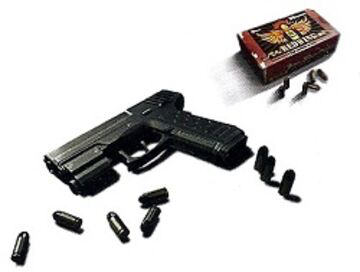

In [ ]:
readb64Recog(base64_string)

In [ ]:
predictImage(base64_string = base64_string , model = model)

{'confidence': 100.0, 'result': 'pistol'}

In [ ]:
#image 9
base64_string = '/9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAQCAwMDAgQDAwMEBAQEBQkGBQUFBQsICAYJDQsNDQ0LDAwOEBQRDg8TDwwMEhgSExUWFxcXDhEZGxkWGhQWFxb/2wBDAQQEBAUFBQoGBgoWDwwPFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhYWFhb/wAARCAGVAtADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD4fxRTqTFcZ9lYbilpcUYoCwmKMUtBpDsNxRilooCwmKKWikFhMUYpaKQ7CYpcUUUgsGKKMGlxSHYSlxS0UikgxRS4paCrDaOadRSHyiYoxS0uKB8o3FLilxS4pD5RtFOoxQPlG4ox7U6jBoHyiYoxTsetLigfKNxRTutGDSuPlGgUuKdilxQUojcUYNOpcUilEbilxTgKMUFco0CjFPxRigrlG4oxT8UYpD5RuPajFPxRii4+UbikxT8UYoHyjMUuKdilwKB8ozFGKfijAoDlGYoxTsUtMOUZijFPxSYpByjcUmDT8UYoFyjKKdg0UC5RuKKdijAoDlG0mKdijFAuUbijFOxRg0BYbijFOxSYpC5RMUlOooCw2inUYoCw2infhSYoFYSkxS4NFArDcUU6incVhtFOoouKw2inUmKYcolGBS4pMUCsJiilxRQKwmKTFOooCwmKMUtFAcpD0op1JXUcVhKPxpaKB2EopaKQWEoxRRikFhMUYpaKQWExRilopBYKKKMUh2Cilx7UtIqw0CnUUYoKSClxS4opFJBiilxSgUiuUTFGKWlxRcrlG4pcU7FFA+UbiinUUiuUTFGKXFLikHKNxS07FGKClEbilxTsUYoK5RuKXFOx7UuKVylEbijFOxS4pFco0ClxTsUoFBSiNx7UYp+KMUF8g3FGKfijHtQPkGYpcU7HtRilcfKNx7UY9qfijFO4+QZtpcU7FKFz2oDlGYp628zbdsMjbvu4Q81e0vRtQ1BXe1tZJEjGXcD5VHqTXolrFrAsVss29m+hrsbywJHZwM5z0HX3rqpYdy+LRHh5lnFPDWVJqUuuu33Hm0mk3aMilUMknSMNlvxFWLzw3rFtbxTyWbFZV3DbyV5Iww7HjpXo3hHT9P1a3a+vlN1eSO2+R2PUVvQ6ZYaVZ3Gs2umW8sunW0txGJQSpdFLKGHccV0fVIW3PD/1jxSfwx/H/M8L+zTBwnlncxwF7mrQ0LWCu8aZdbfXyjXo/wAM7BLm0/4SjUlik1DU83AyoCxBjk7R0GSfwFdXJfQRRkyy/L6k4oWEh3KfEeJ6Qj+P+Z4Z/Yer/wDQMuv+/RpP7F1bdt/s65z6eUa9jOvCaXytNtri8mGRiFCVB9z0Faek+HvEuqN5l9cwaXCRnav7yUj+Qp/U4d2T/rJiVvGP4/5ngF5a3FpKI7mJ4WYZAdSM/TNQ1758YPBdtfv4F0Ky8yZna9mupXYeZKqlM4PsO1cP8V/AGnaDo7a1o1/JLapei1eKYgtkgkMCOo+U/pXPWwrgnKOx6mW53HEzVOqrSe1tjzukxTyKTFch9ByjcUYpcYoxSuTyjaKdRRcOUbRTsUmKLi5RKMUuKMGi4uUbijFLg0U7hyiYpMGnUUBYbRTqTFBNhMUmKdikxQKw3FFOxRQKw2inUYoCw2inYpMUCsJRgUuKTFArBikxS0UBYMUUUUBYixSY9qdQRXWcNhMe9JTsUYoKsNop1GKQWG0U7A9KMCkFhuKMU7FJikHKNxRinYpMGgOUMUUYpQKkdhKXFLRQUkJilpfwpcVJSQgFLRS4oLSEp2KKUCpKSExS4pRS4oLURMCinYFGKCuUbiinUUD5RuKXFLilxSHyiYpcUtKBSLURMUAe1Ox7UuDQVyjcUYp2KXFIrlG4oxTse1LikUoiYoAp2PalxQWoiAUuKUCnAUGiiMxS4FPwaMUD5BmBQFp+DRigfIMxS4p+PajFIrkGYrv/AIXaJp1xpQ1C4t1kl8xhl+VGPauD21o6Pe3YltrDz3+zNOMxZ+U5IzW9CooTu0eXm+CqYnCunTlbq/Q9Vv7yzttD1O3gubYNNBEqRROvzYkGRgVX0sSjxR4lgaMqDcP26ZQcVHJp1tY/aY7SyhiXyCcoBycfnV6EhPFevJ3a46D3RetesfmRW+DiYsbxcDdHP8wxkn/61dV4guIj4T1XcvyjT7lVGe/lEdK8e+KSan4a0XVI7TXrhf8ASBGRbfu1bJ5z3NdN8ObB9Y+F8t/f3lxIYrGfCBuGIiY8n8KE7hJdTktD8U3MHhnT7WBVXy7ZADj/AGa3PhVpN148+IWn6Ne3c0NlNOgu5VPzBCfur/tHpXMeCdAvdT0ezNvEzboV6D2r3X4XeEZfB/inwGlwQLjWrua7lHoqEIg/9CP40Ri+pTktj0n4z6Ho/hzxbBouhWEdlYWllGkUMa4GPUnuT1JPWubtcCMkHj6ciu1/aOGfihKsfJFtH05xxXGW42wkn1rQxtYyfEFzDbfEjwbLcMoQWOpBSzADJCgda4P4qQeX8G7vd8xGrwFDjoNslXv2htYbQdc8E6oIBOIFvMxsfvAsorz3xt8QdR8QaG2jfYra1sWlWUhQWkJXOMsf949q5MRVjGEovdnuZLga9bEwrQXuxepxZFJin4pMV5R+gco3FJin4oxSuHKMx7UU6ii4uUbikxT8UYouLlGYoxTsUmDRcnlG0U7FFMXKNpMU/FJigXKNxSYp2KKBWG0U6jFAuUbRilxSYNO4uUMCkxTsUmKLi5RMUYpaKLhyjaKdj2owPSmTYbRilxSUBYTFH50tFArEdGKWiuw4rCYpMU7FGKB2G4oxTsUYqR2G4oxS4pcUBYbijFOxRipKsNxRg07FJigOUbg0uKXFLipDlG4paXFAFJj5RKMU7FGKRSiAopcUYpF2AClopwFIpIAKXFAFOxSNYxExRTsUYoL5RuDRg07GKMUByjcGlxTsUuKQ+UaBTgKKcBQXGImKMU7FLipNFEaBS4p2KMUFcozBpQKdilAoKURMUYp4FLigtRGgU4ClApyikaRiNxRipMUYoNOQj20uKftpcUAoDMe1GPan4pQuaRXIR49q7D4d+G7K/t11G7klJSQ7EQ4AIwQSa5Pbiuh8LeI7mws49Mtoo1Mkv+tbnG4gdK2w7gp+8eTnVLFSwjWF+Ly7dTtdbt4lsriZDM0saKEcyH5cuoPH0JH41FpLPJ441zLFv9MH44UUyewvUt5xeazNcBYyxAjVVfGCBwM9QK0rW3WHxTrsiDD/AGvnvj5V717B+VHD/tHJF5eqbV2lbxMHGM5xXW/CNFHwSujnB+wXJJ6Z/dN/jXPftLRIumX0x4kluo9y++BzXQfCggfBG9JP3NNuce/7o0o7sctiP4RajcaX8PtNjtkizNbJIZWXLD5RwPyr0nwzqUur+MfhXezOXLRXYD/3sXJGf0rxzwH5t54TtNMlkls2gsYt/wDfdWXIKnoAR3r17wHLFN4j+FPkRLFDDb3UUar0IW5IBHrnFWiWXP2kP7Ptvjp4hL6Rd38jXCMbjTmkWSE+UnyHoMjrwT1rE0ya6SzW9s9S1F4VuY4pbbUbcbsMQDhiAe/Xmuo+PGp3dp8cfEVtpltcXUMrGW4U4QxssKBzG4zjjbgMvJ6GuA0G4vL4pejV9Q1DTvtcavFORFJbsSNoYbcOuccgigRi/tb/ADQ+EunEV1/6MWvIWHNeu/tYOGj8Jrn7sFz/AOjRXkzLXmY340fd8KRvhqnr+hFikx7VJikxXEfT8gzbSYqTFIRQHIMxSYNSbaTFBPKMwaMU/FIRQTyjMUYp+BSYoFyjMUU6j8KBco3FJinEUmDQTyjcUU6jFO5PKNxTcU/FJignlG0U6imLlG0U7FNxQKwYpMUtFArCYpKdRQKw2inYFNxQKwmKMUtFMViOinY9qMV2HJYTFFOxRigdhmKWlxRigLDaKdRSHYbRg06ikOw2inUYNIOUbRinUVJXKJijFOxRipHyiYopQKWkOwlGKWikVYKUCjFLQWkApwopyikaRQAUYp2KXFI1URmDS49qdilxQPlGYpcU7FGPagfKNA9qcBS4pyikXGImKXFOApcUjZQG7falxT8UY9qC+QZijFPx7UAUg5BMUuKcBTsUGigMxTlFOxSikaRiJilxSgU7FBoojNtKBT8U4LQWqZHijbUm32o20FezI8VseFdC1DULmK6t418mOQEuzYHBBIrLxXonwzXHhhW/6auD+ldGGpqdSzPC4hxlXBYF1KVrtpa+Za1SS9W0uJDBCIVULJl8sd7BRjj1Iq1YXH2jxV4iz0W8PTv8g6U7WsDSp027tzQD/wAirVbwzEz+M9fgfd82plGz6HAIP4V6x+SnFeOnt9b1C6s9e1aC0tlk811tImllfHRQP4fxrpvhrrmh3/w917S9BjvBb2GmXBD3eN0gMbc8fyrD1yK3s9Y16zsreOOCOSZECrj5QT1rM/Z/O3wd4pYD/mD3H/oDVMWVJaHXzW7yeAvCiQHybm702OH7QMEhAikjHrgnB7V6V4BkgfxZ8K4bVPLihtLiJVP+zcEZz6nFeb+FUm8T6RoWjaE+F0nTYxdXsi/u4JHjXhf7zAZ49a9R8LWFtpvxI+HOl2oZorO0mVS55OZyST7k81oiCj+0/c2dt8cPE73FxMv76N/sttlDM6om0Mw5wclj/uiuS0g3sl9b3EOnrb2txcRec0cJSPaWBz94hjuGB3657V7B+1NJYHx5fM0ts0tv5Muz5TINjKzY75C5/CvObHTP7PtXmR0+xz3sJtESVmVi0u4HB4Xg4wvpmi2pNzk/2qhtk8KjPWCfj0/e15YVNep/tVEfavCo/wCnef8A9GmvMWFeZjv4iP0Pg+N8HUf979EQkUmKlIppWuE+rcCPFGKkxSYoJ5CPFJipNvtRt9qCeQjxSYqTFBFIXIRYoxUmKTFBLgR4pMVJikxTJcCPFGKfikxQRyjCKMU/FJimRyjMUYp2KMUC5RlJin0YoJ5RmKMU7FJTJ5RtFOpMUXFyjcUYpSMUUyeUbRTqMUCsNpMU7FJQTYbRS4pa7jksNopaKRVhKKdSYoCwlFLijFIdhKTHNLijFIdgoopcVNx2EopcUtSOwmDRiloxSK5RMUYp2KMVJXKJgUU7FGKB8o2nCjFApDSHKKctNp60jaKFWlAoWloNYxCjFOoxQXyjeaXFOxS4pFco3FOUUAU5RSLjEAKdilApcUjdRGgUuKfijb7UFcgzbShfan4pQKRagN20uKfigigvkGYpce1LinAUFKIgFOUUqinAUjWMRMUoWnAU7FFzVQGY9qNtSbaNtBXsyLFekfDdMeDkb/ps9edla9F+G7j/AIRFY/SV66sF/E+R8lxnG2Wr/EvyZryRLLDM0h+WPypG+itn+lc98NdT83Ury4uHJmmm+1nIyWG7J47nGK6PXB5XhXVplO3bZrhvdn2gfrXnGkXEun3UN7b/AHoW6f3h3H5V6p+VIseIG/tfxFqP9hWd7e3F1NKdqRlVQMTjJbGBzV3wD4O1Xwl8P/ET6rJCJLjSpwsSNkr8p5Jrb8A6par4o1O7Zv3ckStHk9P/ANVXvGuu2dx4b1WKI/f06cAN6+Wf60JJA22ZHwl1mDSfhvpdrbIFeWASSBRy7Eda9J8J/bE+MXgeO+jaKZtOFwI34YLJMxXP1AFcv+z9ZWkPwt0y6e2jaWaEEyFQSBgDg9q7G3ma5/aO8LyM27y9GtlyfZmqhdTb+PnhrR3+NV3rAikW5+SVgsnyPJjG8r64A+uK5nT9E0m1uftVvaKkisWQB22Rk9SqZwp+gruPjkT/AMLHvBnH7tP5VycZITA+aqMzzD9qgf6b4TGQf9Em/D98a80YV6d+1QjLqHhLcPvWcpH/AH+NeaMteTjv4iP03guN8FU/xfoiLFNxUpWk21wn1zgR7aTFSbaNtBPIRkUmPapcUhWgXIREUm2pdtIRQTyEeKQipMUmPaghwI8UhFSYpNtBDgRYpCKlxSYoIcCPFJipMUmKZLgMxSYp+KTFBDiMxSY9qkxSYpkOJHijFPxSYoJ5RmKTFPx7UYoJcSPFGPan4pKCeUbgUmKdikoJ5RtFOpMUyeUZRTqK7jjsNop1GKB2EpKdRSHYbRS4oxQOwlFOo5qR2G0U7FFIdhMUCloqWNIMCiilxUlJBijFLRg0i0gxRilxRikPlG4paXFLikPlEWnrSAU5RQaRQop1IBTlpG8ULxRRg06kaJCYpaUClxQXyjQKcopcU5RSLjEUCnYoUU4CkdEYjce1LinYpwFBagNApQtPxS7aDVQIyKKfijFK4cozFOApwFLigqMBAKcopcU4CkbRiIop6oTwB16AUKK9b/Y/8IWviX4kPfahEslrosH2go4yrSE4TP0OT+FC1JxNaOGoSrS2RS8H/BLxNqulpqWpsul28i7kSRC0rL67f4fxqp4r+F76XEzW+peay9pI8Z/EV9ZeNtX0nS9Pbz5FBC9zXzj8R/HGkPdSxQzecxY4jhG8/pVRi5OyPh63EGMT9o5qK7WVvxPHbq3kt52hmXa6nBFbHhTxHHYTW+lEZ8yQ7jn7uelSX2k674gke5tNMe1t0UlpZPvBfWqfhPwyl5qawRMGYNlnJ5Jr0MNh5wlzSPLz/iajmGBhh4R9695PordvX8PM6vx9cFrOG3SViGTMqqflPcZ9cVyMC7lZR9DXV6pax7pbUEHyQB+VYOj24mvJIh2b0ruPibkEULw3BMWVEi7GK9xVqPTbiXS7pGJ+a1lwOufkP6V0NrpQIBwOfU/pmtLTbVFa4BXOLSbG3t+7amK5b+BLhvg5o5B/5d8c+ua6fRSR+0J4dJHI0m3/AJtXH/AFiPg3pP8AuuP/AB811+isP+GgNB2jppVt/NqQdTr/AI1sG+I12TwQi/yrmoyojyBk9q3vjISfiDeZ/urWDa42jAJzV3IR5h+1Md2reEweq2Mn/o1q84Za9E/akJHiTwshGP8AQX/9GtXn7LXkY7+Ij9U4HjfAVP8AF+iIStJt9qmIpu2uE+y9mR4pMVLijFBPsyLFJt9qk20baZPIRYpMVJikxQS4ERFGKkK0m00GbgRYpMVLimkUXM3AjxSEVJikxQS4Ee2kxUu2kxQRyEWKMVJtpMUyHAjxSEVIRTaCXEZikxUmKaRQZuIzFIRT8UmKZDiMxSYp+KTFBHKMxSYqQimkUyXEbikxTsUhFBHKMoxS0da7zhSCkxS0UirDaKdRigdhtFOxRSCw2inUYpDsNop1FSOw2nCiikOwUUYpakoBmlopwpFpCUYNLRUl2ExS4opcUDsIKetIKctI0ihQKcBQKWkbRQUuKWlxQaKIgFOxRg04CkaKIgFOUUAUopGkYjlHanKKFFOUUHRGIKKcBSgUtBtGIUuKWlxSNFEZj2oAp+2l20iuQZilA9qdilxQUoiYpyilRCxwBVvw34fvvEWqG3R/JtY/9Y56fjW1GhKq9Njx85zzDZVTTqaze0V+vZFFZYy21CZG9EGa9L+Cvifxx4TsdRg8OaNao+qbA13eAkxKucbV4B5NYkmsaH4cZrLQdMhv7iH5WupR8isOuD3/AArpfh/pd/438O6rqer67dw/YZEjjtLLEaMGBPLfe7dq6vZ4el8Tuz4nG5rn2ZYVzjS5KOmtt9dNXvr2Kni6e7vrlrrx14y81s5Nukm1fwA/wqlpHinwBptwi2boCmP3jREnP1rn/F/ga6tp5JIrdmjyfmJLH8Sa4y/0R052lT6itIYiK0jGyPm62X1Guac7s9+k1C01fQLifTbqG4RkLyGOQbu/GK5b4WOLbxCHfJKlsgYz06V5NpN/e6PqCr5jR7j8siHbn2NetfDiAyWMuoHDAoW3npn/ABrqjJS1PMnTcHZlq4kil1y96deBiszw1Cqa1O7I20AngdfpUulmSa7vLgg9evtU3gsfaNZlAbACE59TnpVIhm6qk26l8AgZ6d6q27un2olWXFnNux/1zatOTCxtGw+bPzDj8qo3cLPY3kiAuGspzhf+ubdaoki+AZA+D+kZJ+43/oRrs/DmD+0Z4fX/AKhdt/7NXG/AnA+EGjf9cm/9CNdf4ZJP7R2gj00u2x/49UldTrfjb8vxIvgemFzx7VgaeQikjpjvW/8AGvH/AAsm+78L/KuehJC9eg9KohHlv7Upz4u8JgnP/Esc/wDkZ64NhXc/tPHPjTwpnr/Zbf8Ao564thXkY7+Ij9b4CjfLqn+N/kiEim7amK03bXAfbOBGRSYqXFJimS4ERFJipcU3bRchwI9tIVqXbTSPanchwI9tJj2qXFIRQQ6ZERSYqXbTSvtQQ6ZEVpNtTbfak20EumQ4pCtTYprCgzcCLFIRUpFNK0EOBHikI9qkIo20GbgRYpMVJt9qNtUQ4EJFGKkxSMPagzcCLHtSYqTFIRQZuJHikIqTFJighxIsUYp+KTFFyHEgopaK9A85BRS/WigqwmKKWigLDcUYNOoqR2G4NLilopDsJijFLRSHYMUUUuKkdhKKXFLikNIKMUUq0jRIXFFFFIoKMUYpQKRSQoFOUUi04Cg0ihadRiipNooVaUdaBTloNIhSgUClpGiCnKKRRT1FI0jEVRT1FCinUHTGIq0tApwpG6QAU5RQop4FI2jEbijFPxS4oNOUjxTsU7FKBUjUTb8P6Xu0WW+dc7jtT6DvW34ml/sDwXaaZa/urjUAWkdeDs/i/Pp+BrQ0OBF8C2hx1XJ98tWV8YovK1rT0ycf2cjAHtlmJr1m/ZYb3f6ufkcKazbil06+sVJ6eUL2Xztr6s45FCrgDAHQCvYP2ZmWTRfEdp/FiGUD8WFeRKK9P/Zcn2+MNQsj0utOc9O6sD/jXlx3P0vPKKeWVUuiT+5o9Js9Pt7ixl8+IMrZzkV478QtEtrfVpFgUbSc49K9e1jUYrC1k+fC5Oa8w8QXUd7dSS7s5PWt4tn5bUs0eS+NNOEdqxA+ZeRXefDO9gbwXIvnHgK4U+45rnfHSK1vJj0NS/DJSfDcmDj5Rmu/DtnhY6K0Ov03yxpszhCd54UdSewrn9Lm8VaTDN4ht7CB9Oic+fE/+skXdjMeOSQfzro/D6k/YwDjdcqBj8as6tpOkaL9q114WH2VHuXAkbaWAJJCZ2g+n1rqPOIbvxz4baxLG9+ZwMRCFi5b2GOtcHrnxZt7GC7tNKhkmaeKSFnm4A3KR0Hfk06xjuNV16HUdWij+0TBWSBeEtkIyFUeuDyeuTX3H+y78LvhNrnwtubrxB4B0q9vPLJeaW0VmPB6H1ob0D0PmP4Jr5Xwm0ZM5/cA/mSf611fhM/8ZH6EB/0DLf8ArWB8O0gj8HRxW0YjhjuLhYkHRUEzgAfQAVu+FSB+0doRB6aZbf1o7B1Ow+NRI+JN9x/d/lXOwseCT+FbvxobPxI1Akj+HP5Vzlux7CqJR5r+0nBPL4y8MSJE7RxaWd7hflXM0mMntXGMPSvXPjoQPDdod5y8MIZQeDh5iM/nXkxFeLjn+9+R+z8AUUspcl1m/wAkiMrTdtSkU3FcZ9o4EeKTFSYoxQRyEWKTbUuDSY9qCeQj203bU2KbtoJcCPbSFal20m2glwIttIVqXbQRQQ6ZDtpCKlYU0igzlAjIpuKkIpuKZm4keKTFSlfam7aDNwI8e1G2pNtGKZDpkOKQipSKawpkSgREUhFSEU0imYuJGRSYqTFIRQZuJHim4qXFIRSIcSIikIqQikIpmbiVKKKMV6B44ClxRS9qC0JijFLRSKExRiloxSHYTFGKWipCwUUUUirBRQBmlxSCwlLilFFIqwUUuKXFIpIaKXFLR1qShBS4opwoKSACnrSCnCg2igpQMUClpGiCnUgFLSLQq04UlOFBrEVRUiimqKkUVJ0QiKBiiigCg2sOWpFFMWpFpG8EKoqQCmrT1pHTFBil207FLikbKIzbS7afijFIvkPRdJbZ4BtT6Rj/ANCrG+MLF9esMnppcPHpy1bWmAjwNaALnKL/AOhVjfF7B8SWqBt23TYR/wChV6uI/wB2XyPyHh+N+Lan+Kp+pySivQ/2Y5DF8VrdP+e1rOn/AI5n+ledJcW7XrWiyqZlXcyDsK9E/ZoQH4wacD/zzmP/AJDavMV01c/TsylSq5biOSSdoyTs72aW3qdn8So4kWfjac9K82uIYznDY+hr0L4uSbZ5Fz3NeZ3M4DdeldUGfjU5Puc/41t1+xvh26HjNWfhauPD8g9gKreLHV7OQjk44FWvhnhtBlCq6mNgrB1wc12ULnk417HX6H8tzYqB/wAvS9/Y1a+LLFvAmtYGwG1ZTwfm5FQaCM3tl14uB29j3rV8fW0N74R1KCeXasls+5jxtwNwOfwFdXQ8/qcDbx58Vkf3XA6+gFfe37KAdPg7qU6IcR2zZIHP3T0r4Q8F6ZqV/pen63OzRzXECvKDHnc2SN3tkAH8a+tvgd8Zbjwl8ObrQ5vCs16zRsBOjhR91hyPwqZbFLc+ffhvIG8G27DOWmnPP/XV66HwsSP2jND5/wCYXbfyNct8LpvO8CW0gH3pJsg9j5rcV1Phlg37R2iAdtKtR+hquxKOl+MjY+I2oe5X+VYEDYUA/nW58YSR8RNQ4HVf5Vz8WdoJ/SmSjE+N23/hF7HI+YrFz6cy15Wwr1P41D/imdP90i/9Clry/FeNjv43yP3Dw/jfJv8At+X6ERWm4qbb7U3bXEfauBHtpMVLtpNtMh0yLbSYqXbRtoJdMixSbam2+1JtoF7Mi20mKkIpCKCHEjIprCpCKaRQZuJHTSKkIpMUGTiR4pNtS4pNtBHsyPbSbal20mKZPsyPFIRUhFNIpkOBGRTGFTEU1hQZSgQkU0ipitNIqjGUCIim4qXFIRQZOBHimkVLim4pEOJGRTSKlxTSKDNxM+iiivRPBF4pabTqCkFLikpQKktC0UUUirBijFFFIdgxRiiipCwUUUUh2ClxS4opFWCiiigqwUUUVI7AKcKKcooKigWnrSKKcBSN4xCjFLilpGlgooooGh1OWm09aDWI+OpVpkdSLSOynsFAFKBTsUjVREWnCkpaRpHQkWpFqNakSkdVMkFKBSLTwKDqihAKcBSqKcBUm0YnoOnkr4Js8DrGn/oVYnxX2jxZD/dXT7fg9hgmt3SyH8D2rddqD9G/+tWT8YIgfEVnIB8s2lQH6/eB/lXq4jXDL5H43w6muLai681X79TifBGnWWvalr1zYSs95ZR/aIIwOZlU/OB/wHJ/CvTf2WoxL8XLRxysdrO+fbYf8a8v8Nwnwh4kTX9LkkVF4miJzgHuPavXvh3q2i+DPGX/AAmVvaTXGg6lZSLttRvk053xklOrR9enIzUVKarRjUh0Hh8dXyFYvK8dG3tE3FrVXat9z79Gtepb+Mh/06Vc9Ca8nvrgrKwJ4r0D4geINH1l5LrTNSt7mJsklX5H1B5H415D4k1SETNHat50nbZyPzqKcXex89VqRSvcNW1FY7yNAdzBsgV0Pw8v/wC0LG/uBICBOFQ+wGP55rm7bQXt9Dn17XWkhjdCLdQPmkYg4wPQdzTvg60kPhrU95K+XMuR6V3048qseNWn7SVz1HQd/wBpsypH/Hxkc+xo+NEko+HGo7Q26Qxq+PQuP0pvg8mRtOkYcNMR/wCOmj42ytF8Ppijf6y5gQMO/wC8H61p0MOp0tudjR4AC7ThVHbn/CvQ/CsSvo92xJCbeO2T8xOfXFcH5QVhI5xgMWB6AZf866/S9e0TSPCtyl3eKHYMVTG7+9zxUFHzz8E9YvINav8AS5JPMspLyRkQ/wDLMljyPr6V614VbP7SGjE/9A226fQ1558E9Bsk8Op4hbdLeX8kkgZm+VF3HGF/rXoHhltv7Ruje2mWv8jVLoI6j4wN/wAXG1HB6lf5Vg25yuemBW18XGB+I2on/aXj8Kw4TkZyMYqiFsYvxoBOhafk9Ioh+steaEV6V8YWH9h2MZbkxwnH4y15ztrxcd/G+R+8eHcb5J/2/L9CLbSbal20m2uI+5cCLHtRt9qk2+1IRQTyEe2kIqQikaghxIyKQintTG60GckNIpuKeaTFMycSMj1pu2pttG2gj2bIdtG2pttJtoF7Mi20bakIpCKZLgREUmKkIprCmZyiRkUhFPYUlBk4kZFNIqQimkUzKUSNhTWFSkU0imYyiREU0ipSKaRmmZOJHikIqQim4NBm4kZHtTSKkxTcUjKUTLooor0T5pCrS0CikWFOpBS0ikFLikFOpGiCiiipKsFFFFIYUUYoqR2CilApaBpBijFFFIqwYoooApBYVaetIKctBrFCqKdQopcUjeKEop1Jg0h2EpVpKcKBpCrT1pqinrQbRQ9akWo1qRak6oD1FOxSJT8UHVFDMUU4igCkPlFWpUqNRUi0jeCJVp61JpNldajqUFhZQtNcXUixRRqOWYnAFfVnw3+FHhrwto8UV5ZQalq7KDc3Uq7lVj1WMHoB0z3pqLZx5pnVDLYRc1zSeyX5+SPlu30++nXdDZ3Dj1WIkUyaGaFtssTxt6MpFfYureABd2rPayiBv4V2Db+VeM/FLwpqOlSOl9ZiRO0gXKn8e1V7NnztPjlqfvUfd8nr+RxvhO9SXQBp5OWAfA/UVJ8Uk8/SdA1FSGDW8tuxA7q+4D8mrkZ79NK163dWKIsoV1J6ZrttaQXvw7uo1+ZtNuluEOP4D8jfoVP4V6CTnhnHqv0PlIYyhQ4sp4yk/wB3OSf/AIGrO/o2/uOGKhlKkAg9Qe9afgvQ/Ftjpt1rmh2Muo6PaTBZoY2zLbswPzKh++o7is7GK9h+EF19g+EN46na018xz9FArhw9SUJ6H6Bx5g8NVyv2lSF5ppJ9Vd6/8Mef6po/gzxLo6zWssY1++lYlIyY3gSNCWR06As2OTVrwt4L0fTdIFybSM34Vj+/+faR0GB8vpnGaw/Ft6Y9dkvYCEuGBRpkGHKk8jI7VyPiLxDrWlzw6zBq15I9rOrm3knJikGeQVr1KdZSex+I1sHKCundGg11rmqeHPEX9uwytBDAWjLoY1WQN91enGM8D0rB+Fs6r4V1Pe3zPMnOevFdz8TfGek618HJbiwYkXWFCOfnhbOWUkcnHPPoBXmHgvzRZrbx52yPvYEd616nKtj17R7uax0O2vbZY2ltzu2SdGBGKj8car/wkfg97WSzuLW486KaOYqZYCyNnBKjKg+4rPa4MOlRw5zuXkZrofC93Bpnh+S6nkeNdwxjqx9AO9UQZmseNry7fy0uPOkPPkaZbNIQTyQZHwo59j1qpdW3i/U9EvZJ1h022WzmY+e5kmkXYx9gp+gro9P8SW7astnOmlw3UuNtq12ouSD0BGMbj6ZzWh4oi26DfsD8sljOUJGDjYwwR2OQePaiyDmZQ+Dhz8L9I2/L/ow6fjXUeFj/AMZFaTzyNMtv/QTXKfB1gPhfpAzz9mH8zXT+FW/4yK0sntpttz/wE0dg7mr8aNZtrH4p3VrdR3CG4kVYZBGWR2x0BHcVTiYDGeKr/Gy3834ualOqx3EqzwvBEJtkkOAATjIyp5z/AFqRGyvsKBLYxfi+8e3Tow3z/ZI2Kn0zJXDYrR+Mk8g+J2hKGID6OquP+BvVHFeNjv4vyP3zw1lGWSNLpOX6MjIpuKkIppGK4j75xGYpCKeaaRQZSQwimkU8ikIoM2iMim4qbbRtoM+Qh20bfapttGPagPZkO2jbUuKTHtQLkI8U0ipKQimQ4kZFNYVIRTSKDKUSMimkVJikIpmTiRYpMVJikIoMnEjI9qaRUhFNYU0ZSiRsKawzUpFNIpmMokTCkx7VIRTaZk4kZHtTSKkxSMKDJxIyKaRTzxTSKRlKJj0UYp1ekfKoKKKBQWGKdRRUlIVaWminUi0FLigUopFhgelNxTqKkoSloxRUgFFFO/Cky0huKKdRSHYQCloxSgUFJCgU9aatOWkaxQ4UtApVpGyEop1FMdhtLilpcUhqIAU5aRadSNYoctSJUa1LHQdFMlUU6mrT1pHbHYTFdN8N/AfiTxxqD2+h2e6OHHn3Mp2xRZ9W9fYc1l+FdGu/EHiKx0WwG66v7hYYxjoSep9hyfwr7f8AA/h3TPCHhm28O6YqpBarh5cfNK/8Tk9yT/SqUbo8TO83+owUKes5fgu/+R4foH7NTvt/tbxEwYnlbWAY/At/hVjxN+y9fpZvN4c8QpcTKMi3vIwm/wBg68D8RX0TazWUPBXLdixqx56TMBCfmzTUF1Pj/wDWLMoz5lU/BW/I+Rv2d/Dl1onxsltvENi9re6PA7rDKORIcKrD14JIIr6Pt7sJISUyx9q89/aASTTfi1oGoqoV7iRIHcDBdCehPfmvQ7WIFlPtTjtYwzTHSx1eNeSteK09C1JfzGPq3PT2pWt7a+t2j1CJZon+8jjINSRwfL0U896yvGdw9pp5aPIwO1Uebyp6Hg/7T3wTB0m+8Q+DXErW6GaSxz84A5Oz16dK4b4S6zbX+mxLdvmO7tTBcD2I2kn6Ag/hXoviHxJqcV000N3IuCeAeMehr56k1b/hGviJfwDCW7TGSNR90K/OB+tdWFlq0zzcwpWSknqdNfWktlezWc3+st3KMf73ow9iMH8a+hfgp8Obq/8AAdnZ6zFLDHK7TtCpwxDdNx7cdq8y+BL6D8QfiFp9jIsss+mJ9plmVfkeJTxHJ6/MRg/hX2B4ftjHBuAUFjx9a5KtL2dS0WfdYniaWb5XSo1IWlH4m9m1omvXd+Z4z8Zvgn8PrbwReXgH9i3cERaK9ErMu/HAZf4s+3NfGPiJ3trqazuArGMlGBXhvwNfaP7ZesJcagnhpJnVbOFZpgvR2PTNfK3xqsZJbzTryCKLy76LzXk2fP5gG1gW9OOlXRbVXl6GGbcOqhw/HM/tNq66cr0XzvZ+h5s1v8wijYrC5BaEdCema63wxbC3iEkibcDgVX0zS1jHmz/M1aEkjY2pxXqRVj84k7svG4MtwoLdD2rotSuPs2k2LSkpEs252PYKM5rlNJLfaVB9fyrqNUEbrpUbgMr3QV1JyMbehqiGdT8P9H8M3/wzurxtJguFuLO5naWdd0m8Rl1kDdQwYA1JJdxaj4Cmu4ZvOjuNPkkWQjBYNCDk/U5p3wr2f8K8uI0x5H2a8VQOQVCMP5VzvirxRomi+HobJddsbe3awx9ljTzZTmPaEAHQdOTQiWW/hA2Phno/H/LuP5muo8MH/jIbS/8AsG23/oJrkvhI4Hw30kHp5HT2ya7HwZEJP2gtEJOPtGnW5B+mR/Sl2H1Za+M2lQ3fxJv5xK8MpkQyFUU7sYxyRlT2yO1VN+F+vHFb/wAabcWnxIvo2Oc7SPyrl5LlFTgj6VRHQ4P4tMzfFHQs540sdf8AeemYpPik+74taPHnJTSIc49WDN/UU4142P8A4vyP3zwwX/CNU/6+P/0mIxqY1PakxXCfockMpMU/FG2gjlI9tG2pNtGPagnkI9oo21JikxQHIMx7UmKkxSYoFykeKRhUjCmsKCHEjYU0ipGFNIoMZRI2FNIqRhTSKDKUSMikqQ02mZOJGRSEVJimkUzNxGEU0ipCKawpoxlEjIppFSEU0imYyiRkU0ipMU3FBk4kZFIRUhFNYUGUokZFNIqRqawoMpRMPFLRRXpHyKClFJTqkpBRRRQNBTqbS5qShaWkooLTHUU2nCpLCiiipGhcUtIDS0i0Ap1Np1ItBSgZpBTqC7BThSDFLUloUUoNIDS0GiHfhRSDpS0FIBTqbinUFocKVaQdKctBpEVavaHp1/q2pRafptpLdXUxxHFEuWaqa19gfs1/DSLwz8OrPWZoFOra1CtxNKVyY4m5SNT2GME+pNOKucmY5hHA0VO15PZHkvhP9nvxRqGxtVv7TT1bGUXMrge+OM0vxI+BOpeG7MXFjqq3o7q8ew/nX0m1reCYospjX2HNF3pcV1atDeqZo2GCGpaHyT4izL2ikp6drK3+f4nyb+zvcpoPx20OTVIjH5VwUIcfdZlIB/M19ga0oLCSE/f5zXzv+0P4Cu9CNt4m0yGSS3tZ1JmVfmiG7o3t717n4B1JNb8Gabco+9jCu8++KcXeLROcYv65Klidm1ytea1/G5Zt7a4lnA3HHrW/plpIGG45IqxY28SQgkDkd6t2hCcmnY8fmvoeaftUaE8nhHTvEcSZk0W+iklx/wA8ywB/Lirfhu9S7s4Zg2SyDpXd+OLCPW/A+qaUy7hdWjoB7kcfrXhXwV1OS70eOxmY+dbEwuCe6nBz+VTdc3qdFKLnTt2PVbe5JX5MEr2xRqWnNqlk8TgAsvHTNS6Tp2VIc7twyQOBXRadp6BFIQdOc1pYSSiz5I+JmmT6PrlzZzAjBJXjqK+c/i/Hu8b26npcIobPfBxzX3f+014NN3p/9s2qbpIR8+B1FfDnxwsX/wCEghdQQ3lHafcGtMO/fsc2YRTo86Po39g/QYrWPXtUWJPlmjskfHLYG5ufqRX1fpcQZYY2HBYZrwf9jfSX0z4J6JJOu241BDeTZ6lnPGf+Aha96sWH7sscdOnapm71WzbCx9nh4o+X/wBsBZYvjXdo5IE1mp/3uv8AhXjfjBPtPg/T327mt7l0H0PNfT37aHgm91ZNN8UaRZz3M8KG3ukhXcdnJDEDnrxXhmn+CdfufCV9f3WkXUdnayK5eVCueuSoPJx3rKnCaxEX0uz9QzLFYfF8Du0lzRilbrdO3/B9Dy0WzlsFT7juKjkhAbBXB64zXVarYqsjD7j5HPr9BWBfIwbcBznp1I/CvZPwUrWSFZ8479qutdPJq07bGkWwtJJ44ycbmVCeapW7E3GNvAwM+/tU0LFdT1Ziq/Lpc/Tv8h5piLPhvUdfh8A2c8F/JY21xEUWKADDhzhsk57HFUfix4f0Oy+FOmX1ppUEV9MrSTXYz5kp83bzzgAAdMVr6Yob4J6C+fuhgQfqKp/Glli+GOmoveMAj/toadtBbnS/CdyfhvpQ/wCmA/ma7Xw3KLf4keENU6Ab7V2Pqr7gPyeuG+FJ/wCLc6Uf+mH9TXYacr3NusUPzXFlcJe247ttGHUfVTn/AIDQLqdN+09eJF8SpJEfiaBWry+TUWlZY1bczsFUDuScD+dbH7Qeti+8QWt0HzugHIPtXOfDG2k1HXptVmQtY6HCb25b+HI/1afVnI/WhiS0MbxxcJcfHG4SNg0dqRbKR0/dxhT+oNaVcjpryTfEHzpW3SSvI7n1JyT/ADrsMV4uO/ir0P37wvj/AMItT/r4/wD0mIzFJj2p+33oxXEfo3KM2+1G2n4pKA5RuKTFPppoJcRuKTFPNNoIaG0YpxpuKCLDaQ0/FNoIaGEU0inmkYUjJxIyKbipCKaRTuZuIwimkVJim4pmMokZpCKkIpuKDOURhFNYVJTapGUokbCmsKkIptO5jKJGRTTUjCm0zFxIyKaRUhFNNBlKJGaaakYU00GMkYNFFFeifFoKctNpRQUhaKKKRQUq0lFAx1FNp1SWgp1NozUlIdRQKKktBTqbThSKQU6m04Ui0KtLSLTloNUKBRRRUloUdaWiigtAtOoFKtBaFAxS4oApRQaRQAU9aQCnCkbRQ5fu1+k3w1ktNW+GPh/ULba0MulQFMdsRgY/Ag1+ba195/sc6mk37OXh9mZituZrd93YrIf05rWm9Gj5bi6l/s9Kp2bX3r/gHeR6THJeAuv1Facul2vlqAq4+lWIkVpN6Hh14ok+Veew7VPKfHQblazMPW9Fs7vTZrOeJJLeZCkiMMhgexFeSfBe2TQfEOseEQ5aOxl8y03H/lkT0/A8V6rqHiTRotS/s+bV7GO4ztEL3Kh8+mM9a8n8TLN4d+OGn6qf+PW8m+zyt22vwPybFZS92SaPUjQnyNTW6uj1W1gmZemFPc1Yit5s8pu+taOkxh4dw+X1OKnSIBup/OtEnY4rpMppEfJ+YDI6+1fPOsWI8IfHbULNBttdSZb6Be3z8OP++gfzr6TmC+XtA2t6eteG/tUWJtda8M+JUG0Q3LWVwf8AZcZX/wAeX9aiUbNHbhmm2u56LpVwBaJJu6qO9XbfUWHy4ytcJq/ii18M/DO61+ePzjDEBDDu/wBZIRwPYV86X3xM8ba7PJevrlzblHzHDat5ccY9AB1/GtHJJpHvZLw7WzNSmmoxWl338j7H1hoL3S5LS4XKyrtwR618Eftb+HZvD/iIxvHtVZm2HH8LDiva/gj8YNbm1yLRfE919sgmIWO4kA3o2eMkdRUn/BQPwt/aPwrbxNbRBpNOZGlKjrGT1/DNVCS54yR5+e5LXy7nw9Zbq6a2djvPgLPFN8KvDLxkbf7Mh5H+6K9RsWd4QUOQO9fOX7FXiKLVvg3pdo0u6Sw3W7jPIwxwPyIr6I0P/VYBoek2jy4NOjF+SN0wteaesZba69COK5XxFYrI7QXOZY5AVZW5BB4PFdXYzbQExncMAGqmsRIzEkDK+tabozhUs7PY+Ifil4futF8TXukzJtWGUtFu53RscqR+H8q891ZBExONzt8pYCvqr9pfwm2r6Aut2oUzacHeTAwZYvTPsefzr5f1mPbIxIPfhq7qNTnhfqfOYvDuhVcenQwYiRJhV+61SQlzqGrhT839kz4x/uUbcN79TjrU0P2qz1iPU7a1FzHJEYriE/xAjBrQ5iXQ72CX4S6PZxyqzRg7gD0zisb4sa1Y6j4LgsbKV7ma1AE/lxMVhw5+83QVrWuio7KbLRJFTqhum2opPoq4zSeLdLnHhe4W4uVSPMa/Z4ECIcuByB160yToPhawX4c6WM4/c/1Nbp1aCxukzOy3C/MqwqXkHocLyKw/DQSw8BwR2Db/ACUMdu8nBJ3bQT+JqtHqf2DzIlSOW0lV1mbgyOckb3IOcnBwPSgR0GtDQ/E19FLdK63IBLQjdFv99pH8uK3QYbH4Tatp1lBHDEbmJmCLgthWxk964bR7qO8kIv3SOPakVvIrf6hh9xxkk55wf1rrknaf4W6lNIR5nnIsgUcbgGB/UGmB43oLh/HEWP8Aa/lXa4rhPCuT46jH+/8Ayrva8XHfxV6H9BeF6/4Ran/Xx/8ApMRpptONNrhP0ZoKbTqTFBAlBoooExtJinEUlBDQ2mt1pxptBmwNNozRQZsQ0lFFBLG4pCKdikoM2hmKQinkUhoM2iMjFIR3p5FNagykhjU1qfTTVGUkMamtT6bTMZIY1I3SnGm0amMkNamkU4imtTMZIYwppFPNNIoMZI5/FFFH4V6h8OFH40UUFC0uabRSC46im0uaQ7i0CiikyrjqKTNLUs0THCikFLUlhQKKB1pFDqVaSlHWky0OWnA0ynUjWLHUopuaXNI0THUUgNLQUhwp1NFOFI1iOFKtJSrQaxHLTlpq05aRtEsafa3F7ceRbRmSTazBR1IAycfgK9z+BH7Qmi+B/gzH4ZfQ7m+vILqWXd5yxpsc5+vFeGaZcyWd9FcxMVaNgQRR4kskS4fULVAkMzncg6I/Uj6HOR7GurDwjJPufD8Z4jE0/ZRX8N/fzLz9Hp8z9AP2YfiPF8R/h6dVMKWtzZ3cltPbq+7ywOUOT6qR+tb/AMVdavNI8C6xfWTlbmK0fyHA+65HB/Cvif8AY3+Jg+H/AMSvsmp3Pl6Lr+2C4ZzxDKD+7k9hk4Psa+2vGVums+Ebu2QhhLCcY78cUYiDgm0fN5VWg6sHUV0mr+lz4RW5mvVlupp3kujIZHkZssxPOSfrXqnw88T3Xinw2+jajO0t5YqHt3Y5Yge/c8VwFz4W1XTtaeF7G5abe6mCOIsxXJAxj8K9H+B/wm8eL4osdcfS2sbFJR5n2ptjuh6/J1/OuCPM48p+8Z99SxOXSlVqRVleDbS17L120PpD4b60NU8LW92rZZ4xvHo3f9c1rSXojk3Fu/HFcZ4Bj/svxFrejxf6mG48xFH8IYZx+ZrzH9pHx9qcN5daLpF1NaQ2kypdXEZwzEgZUHsORXRGV4ps/J8tymePxnsKbtfW76I+hRf2znc8qx4Hr1ryn9sx1h+CWoXqctbvFcREeqMD/LNfNmkeMfEmlXP2iy1m8BVslXmZ0b6g19A/EK+/4WD+zDd3SAGb7NiZF5wdv8qKjXKz2M64Wr5POnNzU4SdrrSz9DifFV2NZ+C1veW7eZb3MUcwP1H/ANevFtDt5YJpI5VIWZdyH1wa9N/ZCuB4q/Z/uNCmbfdaTNJZyIRkqM5Q4+h/StDQfhPrer+F4kdXtdRhuHXMiDYqZ4bOecjtU1YfvGj1eFM1oU8I1Vkoq6381+jR5Lpsps9Yhn5xHKCcema+sPiVaQ6r+zfrsV+mY30eYtv9o8g/oKxvh78CPDmlyrda9LJq1wPmww2RKfoOv41kftzePrHwr8FLrw/aypHf68v2O1hQ4Ij48x8dgF4+pFOMdfU5uMc8wWNUFQu+S93svl1Pnv8AYZ8Vtp2uXehTSfu5ws8YJ79G/pX294eu99ujJ/EARzX5ieA9an8N+KrLWICR9nlG8dih4I/L+Vffvwx8Ti90m1miLSLKgZGHfIrorwtPm7n5/l9b2lH2fVHrtnP+8R+9TawfMULj764bHYdzntWJpNxPLtkkGEx90nJzWxDteEqxPPUg9PpSWxrKNpXOb8RwwXtnJayRrL5imOXPKBCMY9K+OPjP4ZPhbxpdaYrM8HEtux6mNvu5+mCPwr7hvLQrCxhlVlAwVZMH614V+1b4Nk1bwi2u28Gb7Scs4Qcvbn7wPrtPP51pRlyy16nJj6aq0rrdHyvMoBdi33u4rW0BwpXBIzjkVmXIxb59R3qzoLZuFI4zx9DXcfPs7B90karjp2z1rI8b6ekvh3UIrh3GbVpU8ttrKUG4HP1FbFoymBARubuccis3xmQmh6hhsr9hnyQc/wAB79qozM74fKbn4bWMZZS8kG4Mx/jB3An8QKkhs5rht9nNHH9nzvtZIt00ffay/wARB+6e4xXL/DzxjpltoNjpLxXBlgiAlcKNqg85967G6vdBmhjurmSGTcPkYZ8zH1GDSKIIrd7HULRmjWUyJ5ggUfNM/wDCu0/dIJye3FdWIvsvwt1KCRtzLKm9vViGJP5muPXX7KyYnStNRWPHnSE5I/U/rS2Xia+uLa80u8lUw3cZKIFACuOR/UUBqcN4V/5HyP8A4H/Ku+PSuB8K/wDI+R/R/wCVd6TXjY3+J8j+hPC7/kST/wCvj/8ASYjWpKdRiuKx+i2GYpMU/FJRYVhtJinNSGkQxp6Uxqc1MNBlJjWNNNK1NagwkwJpKKKCLhRRRQSFI1LTTTBhTTTqQmmZsa1MNPamtQZSGHrSNTmprUGUhrU1qc1MaqMJDaaacaRqDGQ00jUppDQZMY1NanNTW6UGUjnqKKK9Q+ECjNJRQAuaKbxR9KQDqKbml/GkO47PrRkUmaM0ikx1KKYKcDUsuLHU5aaDSrUs1iLS80lOpFoKX6CkpaRaFHtS5ptLSLTHUuaZRmgpSJM04VGKcDSNIyJBThTFpymkbRHrSikFKtBshacKbTqRqh1dT4Z0m51PwreXbxA2UcsdnPNn/UyPkwufQZDKT71yq19E/sNaLYeK/Cvj/wAKakFMOo2MABI5Rsvtce4ODWtGbjO54XE9CNbLJprVNNeTvb9T5p1Ozntb+SzlRlL5Vcjo47H9RXuv7O/7Sk3hSzg8PeLxNeaTEoW2ux809sucbXH8Sjt3FcT4y0Sex1y603U48XlnM0FyCOsi8Bv+BDBrDl0bS5WLy2w/eDD7egb+gwfz+tem4qcfI/JKdSdKemjR9z+F/iB4D1qH+0dGvtMneYAtJHIofp/EDyD9apfEb47eD/A2hz3eqatDuVSUtrdw80p9FUfzPFfD32SG2jY2yQqzf8tDHtIAB5I68iuF1BN0c6sDuCsuScmuT6pZ/Foeqs1bjZwu/Nn35+xr4wu/HieKPEepRiK4l1NtsOc+VEUUxrnv8p/OuQ+I2nPqXifxdYPG28s06ORkdu9cP/wT/wDHtroPxEbw9qEyx23iOwhMDOcD7Qi42/Vhn8QK918fWUmleMr28msribTdSTEssEZkaNtpAO0djnmsMTTUJKK2PqOE8xkq7m37zX5NM+VYS33D1HBr3/8AZCv01HQ9X8M3Bys0LDaT1yvH8jXlcfw/8U33iKaLS9Cvp4TMSkhiMalSfVsV7X8I/A1x8MtJ1HxV4lvLeORbX5IUfPkquSSxHBJzgCuSkpNK5+q8W4/ATymVN1Fzuzir639PQ+XPh14z174Q/tEa/b6dYvf2Dag8F9ZocbwGyGU9Ay5/KvqfR/jn4NnslM941qzDPlTIVZT6ECvlHxJrttN4gvdQZR9q1G6knZIupLtnlvxrFbVb6XiMrHu4VUX5h7kn8a9Z4dSirvU/ntZlUpzlypNNt6n1T49/aD0jS9LmOiW1xqM+0lECmOPPqzHt9K+O/iZ4t17xz4un17xFdNLcv8scajEdug6Ig7D+fetTUZria1/f3M7M3CJuyGyeM88cd65TXLSe3mDkMoY5PPaqp0IU9tzPEY+tiNJaLsiDYSuDz+Nfav7LN8dV+F+kX+dzxxeTL/vIdv8AICviVZZEPDbvYjNfTv7APiEzQa14ac4eFlvYVLcbT8rgfQgH8amsrw9DXL6vJWt3Pq3TbhfJUBSp9fWtyxkDY2Hmud0fcyhXAGeldBptuY0wCM4yDXNE9eWiNqEebYtHKu/j7w7VyviSyRkeORBJC6lHU4IZSMEH8K6jTyyt2Bx+dVfEVskkLOo+Ur69avlujCM+WR8AfGLww/hLxtqOiFP3Mche2PrE3Kn8M4/Cue8P8TLkfLuwfY+9fRP7ZXhb7T4ds/ElvGPOsJPs9w2P+WTH5Sfo3H4187WLCFxgEZauylLmijw8VS9nUa6HW2SALnnJbGc/yrlvjXqs1h4VlEDhHuv3JI7qfvfpXUaad0ChTkKPxrzX9oa8X7VZaep+aOMySDPc9K16HKldlL4H2Vvd6xPPdQrJCkWwq2cHjHatXxJcafa61NBa7lhgPloPvHgev1p3whgTT/Dv2iZWAnDMWxwAO/6VVm1tGLL5427i+0KMZJ60uhXUtaPILxXeZ3tol4QmMs0h9h2HvWv4ZGnwzXj3ZkuLl7V1s2KhY4n9SOpOMgemaxdJmk1HfKZ1tYQcI8iFmkPsB2962vCsNhDNeSX073F0bZ1sgqbY0fuxzyTjOPegGct4V/5HuP6N/Ku8rgfCef8AhO4/o/8AKu+rx8b/ABPkf0D4X/8AIkn/ANfH/wCkxCig0ZrjP0cKRqCabmglsGprdaGNNY0jOUhGpjUrGmmkYSYjU1qWm0GLCk96XNNzQQL+FGaTNFArgaKKM0CYhpKKRqZDBqa1LTSaZm2I1NanNTWoMpDWpjdae1MNMwkNNI1LTTTMGI1I1K1NamZsQ9Ka1ONMagxkc8aQ0tJXpnwYc0lKaSgYUUZooGFFFFIVwooozSFcXNKDTaAalmkZEgNOFMWnKag2ix9OFMBpR1pGyY6lH1pKKk0Q7FFJ+JpKAFozSUZoC44U9ajBpwNIuLJVpy1Gpp6mkdEWSLTlpi05aDoixwp1Np1SbIK+pP8AgmzArXHi6coMiK2Xd7Zc4r5br6X/AOCbt+48V+JtKx+7nsYp857q5GP/AB79K0p/EePxBf8As2pby/NGj+254PFtrtr41s4tsN9ttNQIHCyD/VyH+RrwFXYSGH7pk4I6Y57+nNfcXx40m31nwTfaTdqHiuYiuD2PYj3Br4d1W3msr6SKfcs1vKYpf9ph0P4rz9c134Wd04Pofk2OpWaqLZ/mVdcEm/ysxrJIp3yEbsMGOc/XjGa5PxDo8q3UsttGZI5GxgDvXYazMzWsc0ZAO1hIgx8xPAPI59fY1Ws5i0fmSEttZSuevGP6Cumxw3scJob3LWqiFpIbzTW2rtO10KnIIPUEGvpP4R/tRa3ZafDp3jrSJrtYkCjUoMK7DoC6Hr9R19K8W1iBLX4169BEiiOSVJlAHZ1Df1rq7dVGnjKqVXIG4DpUypqa1NqWInRleDPoWT9oXwhJaiWCLUHZh8sf2cqT+deJ/Hb406z43ZtFtybDTIjl7dDukmPbcR/KuL8QXRS1aJWKzTLknP3UHb2zXOxQrI2/c3IGUDBePXFYww1ODujqrZliK0ORuy8hzW8nEKbvmb/XEkDHXGO/PenMjPNkMv7sFTwTjHfA7UCREkhEk3zY+Yo3Qds96sW5eNJCsucsASOWXPpjoTW9jhG2KpHveQtv+8C7/f8AbH/6sVW1+0aZpcoqkjpg546c9O/6VPIqnygzBl3ZypI47nj3qYuJkCgny8ELJ3J9zQBw7xsuVBK7SQQfSvQP2ZfEj+E/jLot8Mi3upvsU4LYUpJxnP1wfwrjtch8jUnCldr/AHgaq2U8lrcx3MJIaGRZEI7EHI/lUNJqxtCTjJSXQ/T/AE/LNsxjFb2nyjbiThsY4rh/Ausxav4Z0vVLaZZY7u0ilVh3yoJ/XNdFDeGOY4IIb9K89H0vxHWaOA7YzyO9WNZtlltt+RuXjgfzrN0O8QfexyOK1reQSRHOWHatYnFUup3PN/iFoEGs6Df6PdqPJvoGic/3cjhvwODXwzqtpPpXiC40y8QpcWdw0MqkdWU/161+iXiK1UxsQvGPSvkP9sfwm2m+KrPxbax4g1H/AEe7IHCzKPlY/wC8v/oNa0pcsrHPi4e0p863R53fazb6ZoZvZYyyAqiKvV3JwBXlfxE3ap4ukuZpPnmVdsa9EHQDPeup8VXLTXOmacwIG5p2OeHK8KPwyTXILIT4gnu5FDeVLwD0JHQV1M8mKPQtUs10/wACpZiRo2lgSIsO27k/jgVzv9o29vZrZK0Kwp0QICT7k9Sak8TXV9rEFqvmLbRhNzrnLc9/y6VE0un21otuYbURx9N0YZifUk0MSJ9JmfUFcxSwwxR8ebLnDN6KB1rY8K29os13NqV35lwts/2KKJTs8z+8xPoM4HrWHpckt+H+ztDDHFwJJjtUn0UDrWt4TtoGuLuXVbtTNHbsbOCEEq7+rN7DOB60hmX4V0nUk8UQ6k1q32N0dlmDAg9uR1HNdlR4HDf8K38QeTKwKacspwf7s6E/hQx7ivKx0Gpp9z948LcZCpltbDqNnCV2778y9NPh8xGNNzQxphNcJ+mSkOJppNITTM0GLkOY00mkzTSaDOUhWNNzQTTaRk5BmkzQTSUjNsKKQmkoJuOzSZpKM0CuLSUmaM0yeYWm0E0maCWwJpM0E01jTM5SAmmmgmmk0GMmBppoJpCaoykxDTT9aCaQmgxkxKQ0E01qDJsGphpWNIaZjJnPZpM0E0V6Z8GLSUUUDuFFFJQFxc0UhpKAuFFFFSMVaWkFLUspDhThmmClBqTSLJAacDUYpwNSbRkPWlpoNOpGyYvFJRRSGI1JRRQSKDTlNMpc0hpkimnqaiBp6mkbxkTKakWoVNSKaR1wkSrS01TTqR1RCvcP+Cf+pmy+PQtC21dQ02eL6kAOP/QTXiDV6P8Asi3f2P8AaK8MPnAkumiPvuRh/Wrp/Gjz83p8+ArL+6/w1PtT4lIJdPkLEYwR9K+Rfjdoog8QNeW4wt0NkmB/EPut+f8AM19h+OLYSWLF1Bx27V8z/HJWRjMiZ8lw2PXHb8qunNwrKR+Z1KKrYZwW54hv32skUm7cGwTkfLUdrHtyqsdxBz+VaniyO3h1BrqzI+zXSCSM+mRyPrWbanK5BOO1eufNDNXtmvfic93Gu0Pp1sWPphME/pXQXHlxwpECNnc+gHJrEWXyvFVoxP8ArdNUHPqrsP61c1KXfJECvBLAgHHan0A5TWLk3epSuyvGsnyq+wruHb8KrQqka7V+fgnGNv4/5NPk8yORjt3B+GHZVz0z/hT5pF8w4bsQre/sMVJQ1ZEQLNIvmLtIAbvnt74/nSwsZJjvXG/njBK89/QYxTf3IRonw3upzz2wfrShJlXaDlVI3dM89KAJgoCupLeWf4On4n1qRZAsYVFZtq/Lg4x3z71Xjc+YoZQy5OMcEDNKSjZaUhmUnvjI/wDrfrSGZPiZW3K+Vbnjb82KyVACbQPl7jOD3xVnXrgPNtVuehx3P0rtvg38IPEHjycTyS/2Xp6/8tXUmST/AHFPb3NZznGKuzelTlN2ij60/ZgnW++A/hmdW3GOxEbN6FWII/SvR4RGSfmAZR09a8w+AngLWPAulnQbfXmuNNVmkSO4jBZWbkhSOxPNen6fpsyS/v7ghj3C8V5jqXk7LQ+jpXjBRlujX0eYMikLt7A+tdFpUh3AdR0OKwrfTzb7Whkd89cjg1uaOPl+YFWHOK2jLUzrcso3Q7W1yrDrx1rzL4u+FLfxX4Sv9CuAFW8iPkuR/qpRyrD6HH516pqSF4ySAc9xXN6lbs20haqTMKWt0z87fH1hLF4Z1G0u4HF/prlVA+9HIpwcd88H8K8+hfOwvIr7vmkfPB7nmvpj9pjSYdN+OmqxQKI1vreK5YAfxMuCce5FeOa9o1lb6bq12tsiztaSfMBjt6dBXbF80UzxKi5Jyj2OfiS4vbWO4hnihhmGQufmUfStQGxisRb/AGW1ZVH35F3OfcmsWzhvJdGtRbvGkbRKAxbtjnitQGxjsxbtawsV6yyMSxPvziqIH6e0l6zR2giWOHgtI4RB7CtPw7bobi6mvryJHt7dmt4Iju85/c9AAMn3rJsQ93ujsootsPUs4RB9M960PDdvHJNdz39wkcltbs9vbq24zP05I4AAJPvQB33wNsE1TQ9U0uWX7OuoaW8HnMuQuWGDjuAcVna3pPiDw7rMek+IdPjhkkg822urecSwXSA4LIw/UHkZry+w1HUbXxhpc0OoXUbQ3KxxbJCBGpYZAA7V738aG8y18PzZzslniz9UB/pWGKpxnScuqPr+B83xWAzilQpytTqySktNd0vS1+hxbGmk0MaaTXhn9GykDGm5oJptBk5ATSE0E0maRm5ATSZpM0maDNsWmmigmglsKaTRmkJoM2xaTNJRmgnmFzSZpM0maZPMOzTSaTNITQS5Ck0hNJmm5oM3IXNJmkpCaZm2BNIaDTSaZnJgaaTQTTTQYykBpppTTSaZjJiU1qVjTGpmMmYFFHTvSV6R8LccKKbRQAuaSikzQFxaKTJpKAuOopM0tSUmKDS02nCpZaClFJRUlodmnA02lU1JpFj6cppgNLmg1jIfmg0maM0F3CgmkJpKkVxc0tNoHWgEx4NPU1HThQaRZKpqRDUKmnoak6aciwhqQGoENSqaLHbTkSda6z4C3f2H40+Fro/8s9Wgz+LAf1rkga3PhnJ5PxH0CX+7qlueP+ui06fxIjGJSw1ReT/I/RnxdCTayL1OSBXzv8ZdKaSOQbfWvpXXU3iTPqeK8e+JmnGWOT5eTTrR1ufluFqe7Y+TrqzKPd2M0ioVBe2R/wCPByQPoM1jQukBfcVVByWY4A+tdt8VtHjkuJI3IhbYxinxzE3HzDH415P4l8Ka3Bq1xZ6jrC+S2Adp3GReoOO1elh5Xpq54mNpqNZ2NOa/tb3V7a4sLpJ0s4XjuGU/cywKj371O2qRyzxxq3zbup+hrBbS7HSNLklsFk85CrSOzZ3qDyCOmOasWZRryORAOuSo/nW1zm5SGSUtI0bbh82Dls5/wpmVeRiW3eTx5W7gD2/OppMSTMTgLngAH5uec0xicfMyg42BgSNwHt3oELH5YwUQlvRui/5zUu8+WFAYcckrncOAMelRx2zPyiEZGfTd+daFnpN1LCJBBJ5e0/NjaPbBNTKSW5cYOTsilG/lsSGJZexHT3zVa1Gq65qkej6DZyXVzM2FVeTyeST0A9zXpnw1+GB8TpDLfPIsZJLRxDauM4x6n/69fQXw5+Gnh/wxCrabp0UMmOXAyx/GuWpiktIo9DD4Bz1k7HnXwH+COn6Ei6l4htY9Q1Z+S0g3R2/sgPU+5r27RPDWnecE8tYJB0K8flW9oum7SA6/LxWvHpiiZWCYx0NcD5pvmkezGMKUOWOhjXWg32nKt1byGWNTllb0+tdbpcEVxZpN5W4Moz6/nU9jCo+VgMEcqehqWztFs5mWL5IpDwo+6D9O1aqFvQ5ZVG/UkiCqoVh9CRVy3Vc56ehpix7GyQCtLI4T7vT0oYua5ZuJF8rDd+KzJo4xlj91adfXKLDkn8D2rg/it40t/DXhDUtYnkCw2Ns8rHPUgcL+JwPxqXIfL7rsfJ/7XPis3X7RGptp9sbxbSGK0wrhVyi5Ylj0wWArgdZ1CHU/BuoXcaNG32eWOSNuqOByp/xrAfVbrWdYuLy9mf7Re3DztMrYdXc5bnuD6H0q5rSR6b4Pv7W33GMQOSzH5mZupNerSVoJHg1nebZgWaXjaLaeSqiNoVCvu9vTrVyQWK2YgktI3bq0zu28n6Diq+mQarNplpDY2rOrRKFk/gAx1Jro08L6ebFVu3maQcvIr7R+A9KYjC0+Oa9ZoNNtTMYhkqo4Fbnh3QNUOm3Wt38P2W1sxsRSfnmkYHCgeg5JNPj1HQNAs/s8VxFGucsqNvdz6n1qpN4+iuNPm021065mWZgwcDnI46UbbsIpydoq5y6g/wDCVaaPW8T/ANCFfQXxYXPhPT5f+eWpqP8AvpGFeEQ6Nrs99DqMGnshhlEiLKwGSORkHtXpmseL/EOv6BHpWp6Bp1mFuI5mnt5z1U5+77/WsZ1qXs5R5kfUZNkWcRzDDYhYafLGcXflaVrp31KjGmE0MaYTXhn9GSkOJppNITTSaDJyHZpM03NITQQ5Ck0maTPvSZpGbkKTSZpKTNBLkLmkzSUmaZm5C5pM03NITQQ5Ds0mabmkzQTzD80mabmkzQQ5Ds0mabn3pCaZDkLmkJpCfWkJoIchSaaxpCaQmmZykBNNJoJppNBi5C5ppNGaaTTM5SAmkajNNY0zGUjBopKM16R8NcWijpSGgLhmkNHWigLhSZ9KSigVxQaWm5NLmkUmPopuaMmoZopD80tMzSg1JomPU0tNBp1ItMdSqaYKdSNEOzRTaDQXzDs0maSkzUi5h2aWm5ooBMeDTgaZTs0GkWPU09TUYpymkbxkTKakU1Cpp6mkdcJE6mrmi3JtNYs7sHHkXEcgP+6wP9KoKaeDkUJ2Oj4otM/UKacXelw3MZyJ4UkB9cqD/WuI8YWXmQvlOg9K2Pg7qX9s/B3w1qIO7z9Kh3H3ChT/ACqzrlkZ42CjqO9dNVas/Iqa5Jcr6Hyt+0Bod1D4Xv8AUrUYktYzJnH8IPP6V4r46n87xNNJHnEkcbD8VFfceseCzqVvJDcW6SQyqVeNxkOpHINeY337Mthf67PfT6zPb28jDy7eGIfu1AwFDGijW5E4tE4rDe1kpxZ8nyJJJG0TAkOpU/iKbZ2ky6dDMFOWA5xmvs3Sf2avAtqFa4GoXTKQfnuMBvwArubHwH4c0mMCy0Oxh2cgiBTggYzk1o8R5HP9T7s+B7HQ9WvIRPFYXUiOSVkEeI+O278vpWhY+Gb1m8wokag46bjj6/XHNfUnxd0hDG/lQqgQYREUAAfQeteZ6fpmIyQAdx4B71P1lvYtYKKV3qedaZ4bVZVBTezOuS3PevXB4NW50uJWTG7CkY6VSstFI1e1UR/emX+dewaXpX+lQxhPlQZrCpUbWp006Ki1ZEPgHw9baZElvBFhVAUV31pYDglOAKh0zThGiuF+btW1Z9kI61EYnQ5cuwWNsDgnhR2rThUSLt2/Q4pbeFSpXH3amEXlFXzwa1UTOU7hbqVUpJyRyD61YUqy7WXjvTZF3Y5xTofcflVIxb6kMxkibY5JVvusP5GoJpyFOTz296t3MybSrEMCKw9QlbJH3lHTNRLQ0p6lPXLwhSCSB9a+V/29PFkkPh3TfCVrKQ+pTfaLoA/8sYzwD9WP6V9J69Ouw5P4V8a/HvULbxZ4+vpJgZLe2kMFuQcFVXgkH3OTWUZRjNNns5fk+IzVTo0Gk0r67enzPH4bpbWUOx+6c1P4g1+51LTJrK0tXk85QvyoWNdFa+HdIhk8w25mb1lYt+lasCRxLtijWNfRVAroljklaKPVwfhviKjviq6j5RTf4u36nN6K/iuLR4bGzsooY4kADzHBP4VMPDerXzb9W1tyD1ji/wA4rpFNOBrCWNrS62PrsF4e5HRalUUqj/vPT7lYybDwtolrhvsvnN/embd+lasEMEAxDDHH/uIBTs+9Ga5pSlLdn2GFy/BYONsPSjD0SQrGmk0jGmk1J0SkDGmsaRjTCaDGUxxNITTSaQmgycxc0mfemk0hNBm5js0maZmkJoI5x+aTdTSaTJoJ5x2aQmm596QmghzHZpCaaTSE0EOY7NITTSaTNBDkOzSE03NITTIch2aQmm596TJoIch2aQmm596bn3pkOY4mkJppNITQZOYpNJmmk00mgzcxxNITTc00mgychxNNJpCaaTTMpSMWikBpa9Q+KuFFFIaB3AmkoooEJmj6UHFJSFcXJpQabRSGmOpQaZmnA1DLTHUoNMpwNSzSLHg0opoNLmkapj6XNMBpc0jRMdmjNJmkzQVcWjNJmkpE8w7NKDTKcDQCkOBp2aYDSg0jVSJAacDUYNOU0jWMiZTTlNRA05TSOiMidDUimoENSKaDrhI++P2I9V/tP9nfSYy2X0+aa1YemHJH6MK9XkVT1xk18xf8E4fEIfR/EXhd5PnhljvoVJ/hI2Nj8Qv519Nox3KOua6t0j8yzOl7LH1Y+bf36/qRzIAwX1qNkXFWZl9+gqBwd3IrNmEFcrSYXnv7imXAV4yAKmkjweOlRSK23Gcc4qLluKPOPiJpzOHPXdxXmy6WkUjIR8oPHFe5+MLBbizZum0celeaa5prQT/d4z1rN6M2ilJGNoth5urW7bc7ZF6fWvWNHsFHz7cEmuN8KWifbkYL90qf1r0yxiCRrx9aS1CfuoktIBszirVvbqzLjj1qSFQq8dMVNaklunHtXQonLKQ9Q0bbQM+tObPllTzjvUrHHzZx/SoZH+bj860tYz5rjIZG2/N+dSzXAReB97jHrUCHarY6/wAqrXj4Xk55pbBuxl3NnPNZWpzFIzz1qa8uM856dxXP65efLt3YrCozppROR+MfiL+wvBOoajv2yJEVh56u3C/qa+Q97MxZjlmOST3NewftXeIxNcWXh6KTOz/SZwD68KD+prxtTXO2fqnCeF9hg/avebv8lt+rJlNOU1EDTs1J9dGRMp96cpqFWpytSNo1CbNJmo91Gfeg09oPY0xjSE01jQRKYrGmE0jGms1BzymKTSE00mkzRYycx2aTNMY0mfegzcxxNJupuaQmkQ5Dt1GaZmkzQS5js0ZpmaTNBDmPzSEim5pM0yXMdmkzTSaTNFiHMdmkz703NJmghzHE0maYTSZpkOY4mkzTc0jGgzcxxNNY00n1pM0zJyFzSZpN1NJpmbkOzTWNITTc0jNyHE00mkJpuaDOUjJozSUV6p8dcWim0Uh3HZppoJpKAuLmm0UUhXClyaSikx3FBpabRmoZaZJQDTQaUGpNEx+aUGmA0uaRaY/NKDTM0uaRakPoptFBXMKTRmkzSZ9qA5hc04Gm0UAmPzTgajzS5pGikSA05TUamnA0jSMiQGnqaiU07NBvGRMpqRTUKmpFNSdMJHqX7IniseFPjppFxNJttdQY2Nzzxtk4BP0bbX38xxIAP4evtX5a2s0kFxHPC5SSJw6MOoYHINfo98GfFcPjP4Y6N4ijbc93aqLgZ5WZflcf99A/nXRB3jbsfJ8S4e1aFdddH6r/AIH5HXR5bcSfpUcysHz19KdCwAz2pzY2571EjwYFX5vXrUMjZba3QVPMfm47egqPaN3qe9QbFa8hWSEox+RvWuO8Sad12ruwa7tkDLyAPrWfqFnG8L8dRxUyVxwkkzjPDNkvmyOAV+ZeP1ru4UAiwOnrXP6PabLx9x27gQffFdBpuRE0TdYzxn0p0xV3qSKMphe1T2bkL8wwPWoN+Nx9DUjSxpFjpkcGumJwybHT3DK2Pvc1C0qu+R8p9DVWW5X5sj8R2qk12284NDYJM07iZl+7+NVZLk7SWHX0qrNdELuJ69RVO9usDKv16jNZykXGLYajcqFZgRXJa9exx28s0j4jjUu7HsAMmtPVLpSpQdT3NeS/tJeJP7H8CyWcL4udTPkLg8hOrn8uPxrmnK56mCw0q9aFKO8meC+NNZk1/wAVX2rSEn7RMSmeydFH5AVmKaiBp2azP2Oio04RhHZaEymlzUStTg1I6YzJFanbqh3Uu6g0UycNRu96h3Uu6gv2hIWprNTN1IWoIdQVjTWNNLUhNBlKYpNJmm5pCaDNzHE0maaTSE0GbkOJpM03NJn3osQ5jiaTNNJpM+9BHMOz70mabmkzQQ5jt1JmmZozQS5jt1Jmm5pM0EOY7PvSZpuaTNBDmOJpM03NJmmZuY4mm7qTNNzQQ5js0hNNY03NMzcxzGkJppNITQQ5Ds+9NzSE0maDNyFJppNITTSaDKUjNzSZpCaM16h8pcWikzRQFwzRSZozQFw5oopOaQXCjNFJmpYXFzTs0zNLUlpjgadTM0tSWmOpc03Jpc0i1IdmlBplOzQWpDs0U2ikVzDs0ZpuaMikLmHUU2jNA1IfmlBpmaUGgtSJM04Go1NOzSNIyJAacDUWadmkbRkSqakU1CrU9TSOiEyXJ7Gvqr/gnb4wDw6v4Hu5uVP2+yUntwsij/x018pqa6n4NeLZ/BPxK0nxJCTts7geev8Afib5XH/fJNaU3aRzZlh/rOFlBb7r1X9WP0ntxvPX5fap9v7vGelVtHuYLqzhurZxJDPEskbg8MrDIP5GrUP3umabVj4SLIgq7unTvVaXb97HSrkybVJP6VWZQ3B/Cs2jeIxGyvrTZo1bBxT1AXgjj2pQFPXpTEZ8dsDdNnHyuenvU94jW7rc/wAAwsg9vWpWUBmYDnjdU8hDwbXAP170JaEzeqKl4SPnQZ4/Oqsk8bL/ALJ70km+1/dyNmE/cbuvsazL0mN2IbcjdR6e9XzGLgSXkyo2Sfx9aoSTqJN4br71BfTEKV3ZxyKyWu3EmGP0Hak2CRtTTgR5zuzWZe3JGVH51B9rPk/3SDVOSYu2Se/WsZO5tHQdM7EZZia+Wfj54l/4SDx9OsMm600/NvDg8Eg/M34n+Ve5/G7xUvhbwLc3ETgXl1+4thnncR1/AZNfKjMWYsxyScknvWW59pwvg/eliZLbRfqPBpc1GrUuaD7aMyUGlDVFmlzSNFMl3Ubqj3GjdSK9oTbvel3VDupd1BaqEmfemsabuppNMlzHM1ITTC1NLUjJ1CTdSZpham7hQQ6hJmm5pu6m5oIcyTNNzTc0hamRzj80maZuo3UE847NJmmlqTNBDmOzSZppakLUEuY7NJmm5pN1BDkOz70maTdTSaZDkOzSE03IpM0EOQ4mm5ppNGaDNyFJpM01iKbmghyHZpM03NITTM3IdmkJpuaQmgzch2aaxpCabmmZuRnUUlFekfL8w7NFNpaA5gozR702gOYdRSZpKQ7hRSE0ZpMdxaKbmjNSO4/NLmmZpaktMfmlpmaWkUpDwaXNMzS5pGikOozTaM0D5h1FNzRQLmHUZptGaRSkPBpQabmlBpFKQ+lzTKUGg0Uh+acDUeadmlY0UiRTUimoVNPU0jaEiVTT1NRA09TQdMZH3d+w74xbxH8F7XT55DJd6HI1lISednWM/wDfJx+Fe0RsQ2Dx9a+MP+CduuG0+JOraG8nyajYeaik9XjbP54Y19jTTHeAp7VrN6JnxWNoKli5wW2/36mhMR5eMdqpSNhiM9O9MmuGWPB5HrVSS5DrnP3aybMIpk/mqXx+dO8zHI6VSWXJ4oluQv3qaB6suSMShfHI6VC0rKuf0J6VVa6zCdpzjrTJJwy/McGgLXJ7qQup47cg1kXERaRvK49VPT8KvNKrL5YaoJY1V8tkejCixGxhajaXQQvHEzADkDtWVJHuYM273ArtFAVOoPHO3rWBrDL9oYrH83qOM0mrInmRkXARFO4FvTNV9pOSf51ZeN3bJH4HtVbxFOmmaDdXrAAW8Lyk/QE1jLQ1pxuz5m/aW8Rtq/j5tOhl3WulDygAeDIeWP8AIfhXne6najdyXuoT3szFpLiVpHJ9Sc1DuosfqODprD0IUl0RIDTlNQg09WpHZGZJmlzUefejPvSL5x+aA1R5pN1Fhe0Jt1ODVDuo3e9BSqE26mlqZupN1A3UHMaaWprGmk0jKUx5ak3UzNJmgzcx+6k3UzNJmgl1B+6kz70wmkz70Ec5Jmk3VHmkzQS6hLupM+9R7qM0yfaDt1BNR5oz70Ec4/dSZpmaTNBLmSZpM0zIpM0E84/JpM0xjSZoJcx5NNJppakzTsZuY7NITTSaTNBDkOJpuabmjNMzcxSaTNNzSZoIchxNNJpM0hNMzcijRRRXonzYUmaKKYB2pKKKQwzRRRSGBooopDAUUUVLKQUUUVIxy0UUVJQq0tFFBQUUUUFBmiiigYUq0UUDFpwoopFIKUGiikWhaUGiig0Q5TT1NFFBrEepNPU0UVJ0wPQ/2WdUuNK+P3hme35869Fu656o4Kn+dfoOyDzOfpRRWv2UfN5xpik/JfmytfOyKcGsaa4dJOnWiisVucMPhJrWViufQetF1cPtyRniiiqMuoyzkLlqs5A529KKKYSIPOxcfdHNMvp2XgAemaKKmW5PQrSXb+WRgfKCM1hTXLtdFfU9TRRUtkLcsx26jDs27PauM+O07QfDHXnQYIsnHBx14oorCW524P8Aiw9V+Z8bZoyaKKtn6YgBp6k0UUFRFzRmiipNBM0UUUEhk5oziiigBc0haiigdxpNNzRRQZtgxppNFFBDEzSZNFFHUlhSZoooIEJoJoooIYmaTNFFMkQmkzRRSJuBNJmiigkTJozRRVEiZpMmiigkCabk0UUEMDTaKKCGGabk0UUEMQmkoopkMCabmiimQz//2Q=='

In [ ]:
checkDim(base64_string)

{'array': array([[[49,  0,  4],
         [49,  0,  4],
         [49,  0,  4],
         ...,
         [64,  0,  0],
         [64,  0,  0],
         [64,  0,  0]],
 
        [[50,  1,  5],
         [50,  1,  5],
         [50,  1,  5],
         ...,
         [64,  0,  0],
         [64,  0,  0],
         [64,  0,  0]],
 
        [[50,  1,  5],
         [50,  1,  5],
         [50,  1,  5],
         ...,
         [64,  0,  0],
         [64,  0,  0],
         [64,  0,  0]],
 
        ...,
 
        [[59,  2,  9],
         [59,  2,  9],
         [59,  2,  9],
         ...,
         [86,  0,  1],
         [86,  0,  1],
         [86,  0,  1]],
 
        [[59,  2,  9],
         [59,  2,  9],
         [59,  2,  9],
         ...,
         [86,  0,  1],
         [86,  0,  1],
         [86,  0,  1]],
 
        [[59,  2,  9],
         [59,  2,  9],
         [59,  2,  9],
         ...,
         [86,  0,  1],
         [86,  0,  1],
         [86,  0,  1]]], dtype=uint8), 'dimension': 3}

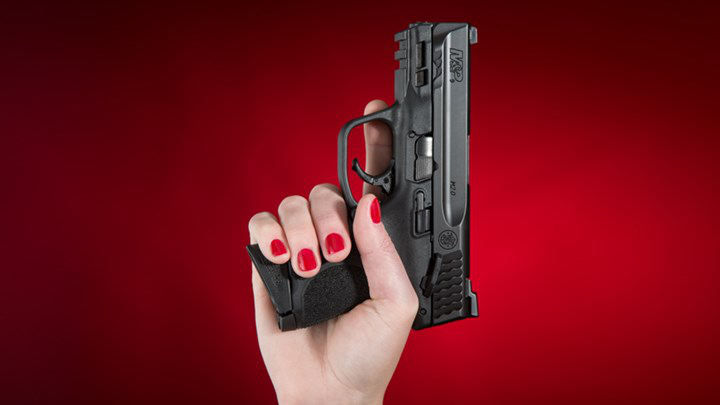

In [ ]:
readb64Recog(base64_string)

In [ ]:
predictImage(base64_string = base64_string , model = model)

{'confidence': 99.84, 'result': 'pistol'}

In [ ]:
#image 10
base64_string = '/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMSEhUTExMWFhUXFxYYGRUXGBYYGBcXFxoaGBYVGx0YHSggGBonHBgbITEhJSkrLi4uGB80ODMsNygtLisBCgoKDg0OGxAQGzIlHyUvLTUtNS0tLS0tLS0uLS0vLi0tLS83LS0tLS0tLS0tLS0tNS0tLS01LS0tLS0tLS0tLf/AABEIALQBGQMBIgACEQEDEQH/xAAcAAEAAgMBAQEAAAAAAAAAAAAABQYCBAcBAwj/xABFEAABAwIEAwQEDAMHBAMAAAABAAIRAyEEEjFBBVFhEyJxoQYygZEHFSNCUlNikrHB0fAUctIzY6KywuHxRIKT4iRDs//EABkBAQADAQEAAAAAAAAAAAAAAAABAgQDBf/EACgRAAICAQMFAAICAwEAAAAAAAABAhEDBBIhExQxQVEi8DJhcYHBBf/aAAwDAQACEQMRAD8A7ivCYuV6oXi+PmWMgjQnqDp5LnkyKCtloQcnSNh3HKIdGYm8TBgKRBm4VObS6ea3MNjalMZW6cjePBY8Wsk296NE9Oq/EsyKvfGtXp7gvBxWt09wXfuoHPoSLEirZ4pX5t+6P1XvxpWjUT1ATuoDoSLGirnxrX+yvBxSvzaPAAp3UB0JFkRVscTr8x7gvPjav9n2R+anuoDoSLKiqreNYm/dA+joZ6mwjzXrONYg6BliQbjUJ3MB0JFpRVSnxnFEmWNA2JLfOCd198NxivPfa2OU3mdQRsncwI6MiyIoT46f9W37x/RefHVT6tv3j+inucf0dGfwnEUH8dVPq2/fP9KfHVT6tv3z/SncY/o6M/hOIq9iOL1iO41jTOpJd7IharuMYoQMrT1BEb8x+5UdzAdGRa0VTPGsVcBrCfaPZdkeazPGcSNWt8Ln8GJ3MCejItKKqfG+KOmT2gjx1FvP2r6DiuJ+x7//AFTuoDoSLOtfH4g02FwEm1lA/GuJ5M9//qsa2KqVB3zodBp46X1XPJrIqLryWjglfJZ2mRK9VcdxGq0ANINt9o6wvphOLVcw7QNy7wbjrorR1cGVeCSJ9ERajiEREAREQGnxeq9tCoafr5HZejiIB9huqRXxjRUcztqgcIlraeYCRIGbIZMXiZV44qT2NQjUNJ91z5LlnG8KKleq14DmhzHBsZjLWMkgRJsRYXssGs5kl/T/AOGrT+GS78cACTXqwP7tnXbJO3sWJ4i23/yKtyBanTMF1gDDO7JteLqALhTc27DSe9uciBpodBoQAbnqVu8UoGXgiGvzDtmzmbOU5TBECxAfmGWOcE46o0knU4hlsamIJIBgUWkwd4FP38pExIWJ4m2JNesBzLKQ/Fl1EvqBjZzVXiCYcW5YALjla0CQYiDr5rXw2Y9plc+mAQcrnkvGYi1RkggEkmWkE8ym3gE9R4k1xyitXzciymCRzEsuOui9fxFoaHGvWAJgdykZOkQGTNlA1KcCQ0tIMhzJMugXEXmCNWbxmgrzBVxmOZ7ibAdrLokS4huvIRf2wp2gm2cWpn/qK3tpsF+V6evRfZ2Mifla9hJ+Tp6f+NQrqrntAPaOBeSe1a2m3LJAtlztlo1Ai50XtSkCPlcsERENa0OEjK4fOnQgyDMwIUNAm+3MZu0rkRNm0dPDJPsXxdiQ4f2tYwdCKLb+4EewhaWFpsac1NrWxmMwKUjRrXQBqDmuDcLYGILjdkO0kSfZMtO6pbLUjNuOcAS+tUA5AUZE6fNMjkQfNY4PEjQVqkug90U7uIEnvN13ta6j/wCBFSoX1HRlc5o0BO2nnJnVZ4/hrHwRUcHth2XOO8ALDqIgR0CunH2yGvhLB75M1amUchS18co/TxXrcUDIFerYSbUTA5mGWUXScW02lwzicoADgbGBLgCXG2sgLcpuzNHcytmCA5t5tqw84kW1VG2iaR9/4tsEmvXAF70mgxzjspI8F5Xx9NnrYisBIE9mCJOgkUtei0nsMvNOo5o1LpdUaYA0zTB2hpHOOcXXc7NNRwgd0PkllyRlDmNtfXNlk6zAi0VZV8E58bUvr8R/4SPxorw8XpzHb4iYm1GbHTSkvhh6TQ4NqU6UHRzQ0iQM0EwC0wCbiIGuyyr4ZoZna4htnNMkFoMbzP8AxBTi6Jo2m45pBPbYkARM0YiRN/krW926yGNZY9vXEiZNKBHP+x/cqJ7Rz2kOzlmU5n5x2UciSMxGxAJOxkL3Bl1WHtBIaR3yYzw0sEHKLgOLpjYbnuqIJVuMYf8AqK/tp5em9IWuPepb4vP11T/B0+z1VZr0A1vqho7VgEGTllsgn51z7MxG0m5xf9/ZUWKNL4v/AL2p72dfs9F6eHf3tX3s/p6Ld29n5Fen9f8AUlijRHD/AO+qf4On2eqDAf3tT3t/pW9+/MLED8v9KhsELXqNa4g1a1iRZsj3hhG6wZWYdK9X7o/OmvjVwxfUqGwAdckT80aDQm+/5ryjUIPqhzA6HPLQ0tdMEAQCRcTax3O1b4LUWTCcSe0C+ZvI/uy++I4w4iGjL1mT7FD4S73UxcyCB/NaFaMDw9tMSbu58vDktOnefJcVLg4ZenHlrkj8DhaxcHEkCQTJMkb2/VTiIvSxYljVJ3/kyTnuYREXUoeOE2XPcXwYPrGqKjmnu2AYRLRAIzNMGNwuhqo8Up5KhAJ/d/zWDX2kpL9/aNWl8tEI7gRy5e2fAEerSmNAPUvA5r4s9HSNK9XSJGQG2nqtFumilC7xWJJ6+8rzt7NlES/0YJj5V5IuCWsJnYzEr4Yjgddo7jmEgQCc7XDkA6XQJ2iIsIU4SevvK8FRw3d7b/ip6rG0rlV1Sk6X0zaO84AA7GXU5EQdw0QNNlnTxDmlrgwFo3DmubcCHSLt9UmY+crGMVzZPhK0cZgcOQXCmWuJAMZgCXENJhsSeqnen6IpkViMU8+sWtAcQQJcQCQZDgBGxmDAN9wtaiyXEGSYLs5+jJBuA0AQM3q7xFpOzRwTRI2aYglxEQSCDUMZYvHX2r7OwLHd12aNRLtZtOhMwIvyhX3JEUatOoKbgGjMdmiXuJIkhx0babGLi3NbVTOG945ZAIbYkQQ1rnHQG4n1hZBh2NDSDUbYkAOFhrADQdcugWBcAZD7iY7xM5ouSWgEG2vI8iq3fok3cMwWzHNnBuY70GQbc239i+ZoQw92HZmho0mMoAgW206dF8wCfk4Y6CBee6btDjmH2TcTojnvD4OTMNLvJuLQSyByUEmNCs6C0OZDXHKHCARAewzy742uWlfMvsASQTlALrW2uLONvV6SRK8FKLljTBsC6wcIECWRIkX8yvpjhUEad6Qe8Pm6uINMiAfxKm+SDJlJ4aHuMt1Dp74GwIykPPgRfZYHEdm2S3N3R3mkDuyS4AawQHElsneLLGjTqZZD2h2mRzzAe0wWjuxYjXwMBY0cJUzHN2bQAbteHEB3JvZS2Y9Wdt4S17BjXo0XNc3K0ajK9hYM+rZBDZMHxk9V62lRa3u5LGRDS8NMvmIBI+aZ8eoWRxTfnveRpJpEgzF7U4LjYpQDHm9UuNvWY9oteHF4ghTu45sij7VeIiC0AAG/aPAeBpEtBvFtSCIFiVrNbV1LHHPexb80SDlAAMgzGUmPBbVDh4c4BtUh0Zu52bszZiTLIN7dPavvi8BXAc8PqPe1pyNytbJFw0d2BJAufwkKnUiuC21mGHp5mZ3H1TAb3oBmSZd3i4zMkb6bq4DX9/ZVR4vhnsouq1H+oGve1pABymYnLoJN42CszcaDcfvT9FXqRq2RTNoaez8l479f9S1/4wfsr04ocvPx/VV6kRtZsfvzWIP5f6F8f4ocvPqeiDEjl5+H6KepD6NrKzxBjTUfnLXd8BrDcAODQXloIJvNhcxC+VMGMrBJa6Gtaw90901D3oDG3kTElpgiymWcOBc59rmYAGpESTuYt0ErzFcNY8QRBGhBgj9RfRUWZKkW2nno7Xa3FspgzAfJOpc6DMTMWPlMzJvqovCsF2L6bu73DPdEE68yb3V5Y4EAjQ3XraDJGUWkYdTFppnqIi3mYIiIAobjeCcXB7Gkk2dHTQqZRUyY1ONMtCTi7RU/4Sr9W73J/C1fq3e4q2Is/Zx+nbuJFT/hqv1b/un9E7Cp9W/7rv0VsRO0j9HcSKn2NT6t/wBx36L447BuezK5r2iQZAc2IMi8WvCuSxq0w4FrhINiFD0a+krUP4c9PA6cRmqRyzW90Qsm8GYNKlXWfWGvPTVXP4nofQ83fqnxNR+h/id+q5dnP6i/cx+FMbwVosKlT3tH4NXvxM02zvPiWn8lcviaj9A/ef8AqvPiaj9E/ff/AFJ2c/qHcxKf8UD6x/l+nVYu4MDrUcfGD4q5fEtH6J+/U/qT4lo/RP36n9Sjs5/UT3MSi4jgJIs8aRGXWNBMnSOS0alE0jDg4HNmEGMwiCA4RffrvErodbgbCO45zT1OYe2b+ar/ABCnl+TqtBPK5BGzh0/3XLLhljX5eC8MsZvgrVMUwIyOI2PfaQCSSC4w6JJNydStii9rczchjk0XMxeTdzhGp5+wblHB0CQCxoPTOL9LqZpejQcP7JsfbJPhYyuMYub/ABTZ0lJR8lZ/imNFs5PfIOQuguMu9QEm5mOfgI8fxAGe5VaL95zNSdDcEBvsnTqrj8QP+x7z/SoziuFZRgVSwE6S6J8JAkq8sco8uJVTi+EyvYR/ytOqX02hpfmJc0PDYBAI1v3pU+OL0frW+wzPuWpQZQdoSBf5xymF938MFsriI0m48OYtaxXJuzpRqcdxVOtQfQDiDWaaYOWYzWJIi0CTB5LPiXHaGGEVq7WkCcolzojXK2TsdtlrYpru+0iHmGNHQjnaBrfW2kwFyz0lw5bialjD++Bc3fnzjWBFQlvSPFXw4uo6borJ0X+v8ImHBhraruuVjRuNHPn5p2Sh6esd/wDVU97Jt0lctw/rgaS7Sw1I2F99DsPsqy4ThtV+Y06bnNAJJAgCIkSbE6WF1remxR8k47km2W2l8ImHJgtqtPVrb7W70/8ACleGeleGrvFOnU77tGua4TadcsadVyXj+BfSe6Wlr23ew2MSCTa5EAG3QjedXhWPNOox7fWaQ4CIuCRYDfqT+KS0cGricuo06Z3PhFFtJr5zBz6tSoXWjvOsLWAAgXiYndSzbjYqtOis2nVaXw9uYFroMEAiOsWgiJWLOIuYQ1s1HQ5zrZHNaIlxLJBiQMuUuOYdV56ju8nZ8Fl7AbWWxQx1SnbUcjdRGC4rnIAMzoHWPOxbINiD4Fb+eJtqrwTxu4uikkpcPkk6fGgdW+4rYo8UputJHj+qq1LDkOLi68k2ESCTAcd19i++q69/li+eTn20GXFFo8Hc40+9ztPKB+creXrQluipfTDJU6CIiuQEREAREQBERAEREAREQBERAFA+mWGDsOX6Fm/IH/eFPKO9IGTh3jw/zBc8yvGy+N1JEV6IcIaxvauu46TeBsB4fqrMtLgx+Rb0n8VuqMMUoKhkbcmFpcX4cyvTcxwB5dDt4LdRdJRUlTKp07RyLiWFdlMSKtNwaKm7xqGu+lDTqd/apb0Z4karMrz322P78/BOJPAxVSXgDUDmZcW+4HQa25QdXhLHNrOgROSfG5gjnlgH/ZeDJ0mj1FySvFR6rwLiRrGtxJ5SP+VzX064eWdm90EhwFho2qQWCXHUOZVudc20ro3GK8ZWjLMzJvE2FpEkydx7dFW/Szhrn0aozNcXMJjKGnOBnY43IM9mW6TfU2i+Ke3IiJK0cuw/rAExI5/ZbsB9nfl0K6FwTjlNlAMeSxwLodlLwZEmzQbiIkh20dOeOJcLE78z9YNoHLyO5UlgMUIDHazI26xE21/Ear08kdyKYmv4v2S3pHie2c6qM0NplrcwAeQA45nwTLiXETOwVSwlIgRG+kG/ejTU67+GoCnsXiu64TqCPI+9RDSBO2vMT6p0HeOm/Q7FWj/GiMqSnwdH9BOI58K6i916Wht3WOnKTtAIPvE2lT1QvMB1Nrye61xjfaZnKeUm0ySud+iHEOxxAkwHdw9CXHLIFg3MQT+hXRiCSCHNpkuIGQ+u8kXI3A3sTY3C8/PDZNteGWi7RL4XCNpSbZnes78h0spTh/DTU7xJDeVr+FlpUGZntb4X8Yv5q2saAABoFOlwrK3KXhHPPkcFSPhTwFMaMHiRJ8192sA0AHgFki9RRUfCMTbfkIiKxAREQBERAEREAREQBERAEREAREQBYV6Qe0tOhBB9qzRAQHDMSaLjSqbfsOHQhTzXA3FwtbH4BlUd6xGjhqP9uijBwzEM9SoCPEtPlZZlvxcVa9fTs9s+bpk6tHi/EG0aZJNzYDeStEUsX0+//stPH8EqV/7VjHaG7puNDdqjJmm41GLsmOON8tFSxmJ3dlJzzkkEkgw0QAZgRy6hSOHqdmDAlxlzo56G/Rv4Lcd6JVQ4ua1gsROcgi21ob7BPVfWhwPENMljYjRrgfHUD9+K856edLhmvqw+ny4HhqdSmKpAc50yTr4KO4pg2U63yVMnu5i1rgGhxlrTkJAvliR9Hqtupw6tRJ7Koac37N7ZbO5bOnmFoNbUYTmIDnETUcZJ8BABtpcActlznFxLxdnJOLYXs69RgEtD5bqe44sc3Uxo/wA+qj2P7uo00n7IPzf5fKdirV6cYEMex4bAh1MiAYygPYJJuMhaBzykWOlYyXIufaT9MbW5X8DuV62KW6CZnkqZk+q4mD1F975Zgb62F1rNNo5jnHzeQufE9OZW9hMG+q4MptzPJsBbdk2bpY7nbmLyGM9EMVRZncxpaInKRYd7UN11589ja+6K4bKytkbTqQQQN5AjcEH1R7dfDkuqej+N7ZlJ5HhBEZzn7R3Uy2Z5O8VyYA3HTT/tB0HhqT11BV09BcfkL6bjMHtGt5AOl4EWGxj7PVcNTDdC/h0g+TqHD6mWpTJ0t+X5K4qkuECBtcezT3g+atXCsT2lMHcW/TyXH/z58OBTVR8SNxERemYwiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIDCrSDhDhI5FVnimADXFhu03B3jx5j9FaVG8dozTzbtM+w2P5H2LPqcanBv2dcM9sjk/pxwj5GoACYAeCSTJb3Trf1HPn+UQubkgkHqDudXA7wPn+fJy7zxTCipTg7fgRBHuK4TjsMab3sOrC5un0bD1jvk8yNws2klw4mvIvZ0D4OsGwUHVhBeXZZt3QGMkCP+VbWwfwOxk/iIXLfRf0kfhSWxnpuNwDcGXAOaYgG41sZB6ix1/TqgIc1lVzonKQ0bAwS1x58timTHLd4KrwV/wBO8KyniiGAAFjXZRsTmBsPAG+k9So3hWM7Kq18SGmSIE5TlzAbNtI8JC+XEMe/EVnVKhlziLDYAloAaNgIFz+IWs24Ght7pbraw011tzC0qP40yDu+ErAta5twQIPORLT++iluAYjLULDYO0HLl5yPaqN6D8RNXD5XGXMJaTvzbPUC1rWV34G9pe3Pd18p6jYrzMSePOl/Z1yU8bLMiIvbPNCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCwrUw5padwR71miAqIbq09QfwK498IXDzTxRdAAqNB2HeaHNd+I/5hdr4rSy1TyPe9+vnKonwmcMz0G1gL03tJ19VxAdpeLD3LyYPp5q/0ej/KFnKA6TPUGdfnMPzob87wvycstW87c5junlAHqeXMFYuaRc8twPoj6XVp/ZC+rJPW8cxdztzbcX6g816LOS+GG9uemo9Zp0Fue/Tkvo397/S9g28jzXyeJB8ORMd0Hw+b5cwFmHT1gzz0eP8AtBv58ihLLH6C8R7LEgOdaoMnTNALZ2GkDxIXVaT4NvEdCP37lwqi8iCDcReZ2cInQW5XtzC7JwbHdvQp1YjMJIvY6OF9R1Xna2FNTR2xu+DoXD8UKjA7fQ9CNVsqs+j+KyPyE2fp47H2hWZb9Pl6kE/Zhyw2SoIiLucgiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiICK49Ss13IwfA/8ear/EMIK1GpSPz2Ob4SLH3q3Y6jnpubvFvEXHmq0wrzdXCp7jZp5XGj89YinlcWmxBLYsNDUbG56e8cljNwfbP3Hautvy35OVj9O8F2ONqRADyKo2s4szaCfWze7oq4RY2gxuB9Fw3knT9yFsjLdFMVTBG3s3P0hqR0G23MFeNuDvE9Ro3nAGh/DkvcVoTvJg3+lOp1128ea+bBmJG8GNN9vPyUpEs2GO5c7bx3jubDXXwPNXz4McYXNqUCZIAqNBnQjK5oJ1FtNoKoJO/U+y7TEutryGvQqQ9HeIfw2JpVrkNcJjXKZa651sdBr7Fzyw3waJTpna8OMzYHrNNvDUeatvDsT2lNrt9D0I1VVc4B7Xj1XjXx0P4FS3Ba2Wo5mzxmH8w9YfmsWjnsntfv9ROojujZOoiL1jAEREAREQBERAEREAREQBERAEREAREQBERAEREAREQBERAFWMXSyVHN628DcfirOobjtKHNdzEH2XH4n3LNqo3C/h2wSqVHL/hYwE06VcD1czHa+qQXtmOrT4SFzVljGl4jT5zhECTvH7C7p6UcP/iMLVpblhI/mb3h5hcLa+DvtYeLDozx57RqAuellcK+GifDsxeJA6z/AJWne5vf2zuvjnIII1lbYZcDT3Ak3G2uh/ZCu/we8GoOZUqvYx7mvIdnAcGtABENIjvd6Tf2b95ZFCNsbWypvw+dudusH226/srSzXnSCb76gzJvvy681bfSN1KniXNpNawBjS5jbBtS+YRAy2gx1VRba+kjw+aNJknTz5FRF2rLTXtHYvQnGnEYFrXevS7nKQyzTGota/Iqw06/dZUGrSD7rO8lz34KadUVazsp7MthztBmDiWgTdxgnwGq6BTbDnM2cJH5/vovNzrbktF48qi4tM3Xq1+Hn5Jk/Rb+C2F7EXaTPNap0ERFJAREQBERAEREAREQBERAEREAREQBERAEREAREQBERAFp8WpZqZ5jve7Xylbiq/pxwfF4ljBhqjBE5mPLmh0xBls3F7ERdVlHcmiU6dmAXDfTHA9jiqzNpLgO96rmkt5DRg906hdp9F+B46nSyYp1N7gTlqB0kt2Du4Li9/BRfpX8GTsbWbVFdlOGBrpY58wTB9ZuzvILFgxThNprg1yyRa8nFQfIn3ZjszxO/Posg6pByktJABgxmtBmD4+K7Hhfgdogd/E1D/IxrP8AMXKVwvwWYBvrdtU/mqAf/m1q27SvVjRwaixzSb6yPevW0+cbaW0BHjv+9v0ZhvQLhzNMK0/zl7/87ipTDcCwtP8As8NRZ/LTYPwCUV6y+FS9GOG9hh6TBqGgkDTM4Znk7kyYvsAphvDn1HNIBbB9YiBH5qygIsi0Su5OyXqX6RhSZlaGjYAe5Zoi2mYIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiAIiIAiIgCIiA//Z'

In [ ]:
checkDim(base64_string)

{'array': array([[[248, 255, 255],
         [249, 255, 255],
         [249, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[249, 255, 255],
         [249, 255, 255],
         [251, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[249, 255, 255],
         [251, 255, 255],
         [251, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255,

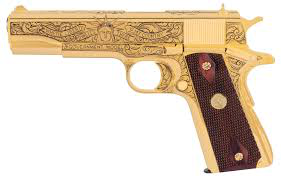

In [ ]:
readb64Recog(base64_string)

In [ ]:
predictImage(base64_string = base64_string , model = model)

{'confidence': 99.88, 'result': 'pistol'}